In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from model import ShallowNet, MiniVGGNet

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype(np.float) / 255.0
testX = testX.astype(np.float) / 255.0

# One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Training data shape: {}'.format(trainX.shape))
print('Training labels shape: {}'.format(trainY.shape))
print('Test data shape: {}'.format(testX.shape))
print('Test labels shape: {}'.format(testY.shape))

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("[INFO] compiling model...")
opt = SGD(
    lr=0.01,
    decay=0.01/40,
    momentum=0.9,
    nesterov=True
)
parameters = {
    'width':    32,
    'height':   32,
    'channels': 3,
    'classes':  10
}
#model = ShallowNet.build(parameters)
model = MiniVGGNet.build(parameters)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)
# Print model summary
model.summary()

[INFO] loading CIFAR-10 data...


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
[INFO] compiling model...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [6]:
print("[INFO] training network...")
N_EPOCHS = 60
H = model.fit(
    trainX, trainY, 
    validation_data=(testX, testY),
    batch_size=32,
    epochs=N_EPOCHS,
    verbose=1
)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/60
   32/50000 [..............................] - ETA: 20s - loss: 0.3836 - acc: 0.8125

  288/50000 [..............................] - ETA: 11s - loss: 0.4333 - acc: 0.8299

  544/50000 [..............................] - ETA: 10s - loss: 0.4476 - acc: 0.8217

  864/50000 [..............................] - ETA: 9s - loss: 0.4298 - acc: 0.8414 

 1184/50000 [..............................] - ETA: 9s - loss: 0.4297 - acc: 0.8505

 1472/50000 [..............................] - ETA: 9s - loss: 0.4536 - acc: 0.8383

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4376 - acc: 0.8409

 1984/50000 [>.............................] - ETA: 9s - loss: 0.4338 - acc: 0.8453

 2208/50000 [>.............................] - ETA: 9s - loss: 0.4226 - acc: 0.8514

 2528/50000 [>.............................] - ETA: 9s - loss: 0.4291 - acc: 0.8501

 2848/50000 [>.............................] - ETA: 8s - loss: 0.4387 - acc: 0.8473

 3168/50000 [>.............................] - ETA: 8s - loss: 0.4528 - acc: 0.8450

 3488/50000 [=>............................] - ETA: 8s - loss: 0.4549 - acc: 0.8446

 3808/50000 [=>............................] - ETA: 8s - loss: 0.4505 - acc: 0.8453

 4128/50000 [=>............................] - ETA: 8s - loss: 0.4579 - acc: 0.8430

 4416/50000 [=>............................] - ETA: 8s - loss: 0.4621 - acc: 0.8419

 4736/50000 [=>............................] - ETA: 8s - loss: 0.4699 - acc: 0.8391

 5056/50000 [==>...........................] - ETA: 8s - loss: 0.4709 - acc: 0.8386

 5376/50000 [==>...........................] - ETA: 7s - loss: 0.4749 - acc: 0.8384

 5664/50000 [==>...........................] - ETA: 7s - loss: 0.4731 - acc: 0.8392

 5984/50000 [==>...........................] - ETA: 7s - loss: 0.4712 - acc: 0.8389

 6304/50000 [==>...........................] - ETA: 7s - loss: 0.4765 - acc: 0.8374

 6624/50000 [==>...........................] - ETA: 7s - loss: 0.4767 - acc: 0.8374

 6912/50000 [===>..........................] - ETA: 7s - loss: 0.4791 - acc: 0.8365

 7232/50000 [===>..........................] - ETA: 7s - loss: 0.4778 - acc: 0.8368

 7552/50000 [===>..........................] - ETA: 7s - loss: 0.4814 - acc: 0.8346

 7872/50000 [===>..........................] - ETA: 7s - loss: 0.4806 - acc: 0.8351

 8160/50000 [===>..........................] - ETA: 7s - loss: 0.4795 - acc: 0.8359

 8480/50000 [====>.........................] - ETA: 7s - loss: 0.4784 - acc: 0.8360

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.4765 - acc: 0.8369

 9120/50000 [====>.........................] - ETA: 7s - loss: 0.4762 - acc: 0.8364

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.4737 - acc: 0.8371

 9760/50000 [====>.........................] - ETA: 6s - loss: 0.4738 - acc: 0.8369

10080/50000 [=====>........................] - ETA: 6s - loss: 0.4728 - acc: 0.8369

10368/50000 [=====>........................] - ETA: 6s - loss: 0.4729 - acc: 0.8366

10656/50000 [=====>........................] - ETA: 6s - loss: 0.4743 - acc: 0.8357

10912/50000 [=====>........................] - ETA: 6s - loss: 0.4759 - acc: 0.8351

11232/50000 [=====>........................] - ETA: 6s - loss: 0.4759 - acc: 0.8350

11520/50000 [=====>........................] - ETA: 6s - loss: 0.4755 - acc: 0.8350

11840/50000 [======>.......................] - ETA: 6s - loss: 0.4758 - acc: 0.8349

12160/50000 [======>.......................] - ETA: 6s - loss: 0.4775 - acc: 0.8340

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4785 - acc: 0.8335

12768/50000 [======>.......................] - ETA: 6s - loss: 0.4777 - acc: 0.8331

13088/50000 [======>.......................] - ETA: 6s - loss: 0.4773 - acc: 0.8332

13408/50000 [=======>......................] - ETA: 6s - loss: 0.4760 - acc: 0.8333

13728/50000 [=======>......................] - ETA: 6s - loss: 0.4753 - acc: 0.8338

14048/50000 [=======>......................] - ETA: 6s - loss: 0.4750 - acc: 0.8341

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4751 - acc: 0.8341

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4742 - acc: 0.8343

15008/50000 [========>.....................] - ETA: 6s - loss: 0.4751 - acc: 0.8337

15328/50000 [========>.....................] - ETA: 5s - loss: 0.4728 - acc: 0.8347

15648/50000 [========>.....................] - ETA: 5s - loss: 0.4743 - acc: 0.8339

15968/50000 [========>.....................] - ETA: 5s - loss: 0.4744 - acc: 0.8342

16288/50000 [========>.....................] - ETA: 5s - loss: 0.4749 - acc: 0.8342

16608/50000 [========>.....................] - ETA: 5s - loss: 0.4729 - acc: 0.8350

16928/50000 [=========>....................] - ETA: 5s - loss: 0.4722 - acc: 0.8351

17248/50000 [=========>....................] - ETA: 5s - loss: 0.4709 - acc: 0.8358

17568/50000 [=========>....................] - ETA: 5s - loss: 0.4689 - acc: 0.8364

17888/50000 [=========>....................] - ETA: 5s - loss: 0.4684 - acc: 0.8364

18208/50000 [=========>....................] - ETA: 5s - loss: 0.4678 - acc: 0.8364

18528/50000 [==========>...................] - ETA: 5s - loss: 0.4690 - acc: 0.8358

18848/50000 [==========>...................] - ETA: 5s - loss: 0.4681 - acc: 0.8362

19168/50000 [==========>...................] - ETA: 5s - loss: 0.4674 - acc: 0.8364

19488/50000 [==========>...................] - ETA: 5s - loss: 0.4672 - acc: 0.8362

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4655 - acc: 0.8369

20128/50000 [===========>..................] - ETA: 5s - loss: 0.4648 - acc: 0.8368

20448/50000 [===========>..................] - ETA: 5s - loss: 0.4653 - acc: 0.8363

20768/50000 [===========>..................] - ETA: 4s - loss: 0.4655 - acc: 0.8366

21088/50000 [===========>..................] - ETA: 4s - loss: 0.4657 - acc: 0.8362

21408/50000 [===========>..................] - ETA: 4s - loss: 0.4644 - acc: 0.8366

21728/50000 [============>.................] - ETA: 4s - loss: 0.4654 - acc: 0.8362

22048/50000 [============>.................] - ETA: 4s - loss: 0.4664 - acc: 0.8359

22368/50000 [============>.................] - ETA: 4s - loss: 0.4678 - acc: 0.8356

22688/50000 [============>.................] - ETA: 4s - loss: 0.4674 - acc: 0.8358

23008/50000 [============>.................] - ETA: 4s - loss: 0.4681 - acc: 0.8355

23328/50000 [============>.................] - ETA: 4s - loss: 0.4685 - acc: 0.8355

23648/50000 [=============>................] - ETA: 4s - loss: 0.4685 - acc: 0.8357

23968/50000 [=============>................] - ETA: 4s - loss: 0.4686 - acc: 0.8356

24288/50000 [=============>................] - ETA: 4s - loss: 0.4688 - acc: 0.8357

24608/50000 [=============>................] - ETA: 4s - loss: 0.4686 - acc: 0.8357

24928/50000 [=============>................] - ETA: 4s - loss: 0.4688 - acc: 0.8354

25248/50000 [==============>...............] - ETA: 4s - loss: 0.4688 - acc: 0.8354

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4687 - acc: 0.8355

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4686 - acc: 0.8356

26208/50000 [==============>...............] - ETA: 4s - loss: 0.4680 - acc: 0.8359

26528/50000 [==============>...............] - ETA: 3s - loss: 0.4700 - acc: 0.8350

26816/50000 [===============>..............] - ETA: 3s - loss: 0.4697 - acc: 0.8350

27136/50000 [===============>..............] - ETA: 3s - loss: 0.4702 - acc: 0.8349

27456/50000 [===============>..............] - ETA: 3s - loss: 0.4693 - acc: 0.8354

27776/50000 [===============>..............] - ETA: 3s - loss: 0.4692 - acc: 0.8354

28096/50000 [===============>..............] - ETA: 3s - loss: 0.4701 - acc: 0.8351

28416/50000 [================>.............] - ETA: 3s - loss: 0.4698 - acc: 0.8352

28736/50000 [================>.............] - ETA: 3s - loss: 0.4688 - acc: 0.8355

29056/50000 [================>.............] - ETA: 3s - loss: 0.4690 - acc: 0.8352

29376/50000 [================>.............] - ETA: 3s - loss: 0.4693 - acc: 0.8353

29696/50000 [================>.............] - ETA: 3s - loss: 0.4693 - acc: 0.8354

30016/50000 [=================>............] - ETA: 3s - loss: 0.4692 - acc: 0.8352

30336/50000 [=================>............] - ETA: 3s - loss: 0.4687 - acc: 0.8353

30656/50000 [=================>............] - ETA: 3s - loss: 0.4692 - acc: 0.8352

30976/50000 [=================>............] - ETA: 3s - loss: 0.4690 - acc: 0.8354

31296/50000 [=================>............] - ETA: 3s - loss: 0.4699 - acc: 0.8351

31616/50000 [=================>............] - ETA: 3s - loss: 0.4709 - acc: 0.8347

31936/50000 [==================>...........] - ETA: 3s - loss: 0.4708 - acc: 0.8347

32256/50000 [==================>...........] - ETA: 2s - loss: 0.4700 - acc: 0.8350

32576/50000 [==================>...........] - ETA: 2s - loss: 0.4702 - acc: 0.8350

32896/50000 [==================>...........] - ETA: 2s - loss: 0.4708 - acc: 0.8347

33216/50000 [==================>...........] - ETA: 2s - loss: 0.4714 - acc: 0.8343

33536/50000 [===================>..........] - ETA: 2s - loss: 0.4711 - acc: 0.8344

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4713 - acc: 0.8344

34176/50000 [===================>..........] - ETA: 2s - loss: 0.4719 - acc: 0.8341

34496/50000 [===================>..........] - ETA: 2s - loss: 0.4723 - acc: 0.8340

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4717 - acc: 0.8341

35136/50000 [====================>.........] - ETA: 2s - loss: 0.4714 - acc: 0.8342

35456/50000 [====================>.........] - ETA: 2s - loss: 0.4706 - acc: 0.8345

35776/50000 [====================>.........] - ETA: 2s - loss: 0.4704 - acc: 0.8344

36096/50000 [====================>.........] - ETA: 2s - loss: 0.4700 - acc: 0.8346

36416/50000 [====================>.........] - ETA: 2s - loss: 0.4702 - acc: 0.8344

36736/50000 [=====================>........] - ETA: 2s - loss: 0.4702 - acc: 0.8344

37056/50000 [=====================>........] - ETA: 2s - loss: 0.4702 - acc: 0.8344

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4699 - acc: 0.8346

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4707 - acc: 0.8341

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4708 - acc: 0.8340

38336/50000 [======================>.......] - ETA: 1s - loss: 0.4708 - acc: 0.8340

38624/50000 [======================>.......] - ETA: 1s - loss: 0.4703 - acc: 0.8342

38944/50000 [======================>.......] - ETA: 1s - loss: 0.4706 - acc: 0.8339

39264/50000 [======================>.......] - ETA: 1s - loss: 0.4703 - acc: 0.8340

39552/50000 [======================>.......] - ETA: 1s - loss: 0.4705 - acc: 0.8341

39872/50000 [======================>.......] - ETA: 1s - loss: 0.4700 - acc: 0.8344

40192/50000 [=======================>......] - ETA: 1s - loss: 0.4700 - acc: 0.8344

40480/50000 [=======================>......] - ETA: 1s - loss: 0.4703 - acc: 0.8343

40800/50000 [=======================>......] - ETA: 1s - loss: 0.4701 - acc: 0.8343

41120/50000 [=======================>......] - ETA: 1s - loss: 0.4706 - acc: 0.8342

41440/50000 [=======================>......] - ETA: 1s - loss: 0.4709 - acc: 0.8340

41760/50000 [========================>.....] - ETA: 1s - loss: 0.4705 - acc: 0.8341

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4704 - acc: 0.8340

42400/50000 [========================>.....] - ETA: 1s - loss: 0.4702 - acc: 0.8340

42720/50000 [========================>.....] - ETA: 1s - loss: 0.4698 - acc: 0.8339

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4701 - acc: 0.8339

43360/50000 [=========================>....] - ETA: 1s - loss: 0.4699 - acc: 0.8337

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4693 - acc: 0.8340

44000/50000 [=========================>....] - ETA: 1s - loss: 0.4697 - acc: 0.8339

44320/50000 [=========================>....] - ETA: 0s - loss: 0.4697 - acc: 0.8339

44640/50000 [=========================>....] - ETA: 0s - loss: 0.4703 - acc: 0.8338

44960/50000 [=========================>....] - ETA: 0s - loss: 0.4700 - acc: 0.8336

45280/50000 [==========================>...] - ETA: 0s - loss: 0.4698 - acc: 0.8336

45600/50000 [==========================>...] - ETA: 0s - loss: 0.4696 - acc: 0.8338

45920/50000 [==========================>...] - ETA: 0s - loss: 0.4693 - acc: 0.8341

46240/50000 [==========================>...] - ETA: 0s - loss: 0.4689 - acc: 0.8342

46560/50000 [==========================>...] - ETA: 0s - loss: 0.4693 - acc: 0.8341

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4693 - acc: 0.8342

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4697 - acc: 0.8342

47520/50000 [===========================>..] - ETA: 0s - loss: 0.4701 - acc: 0.8339

47840/50000 [===========================>..] - ETA: 0s - loss: 0.4704 - acc: 0.8336

48160/50000 [===========================>..] - ETA: 0s - loss: 0.4697 - acc: 0.8337

48480/50000 [============================>.] - ETA: 0s - loss: 0.4698 - acc: 0.8337

48800/50000 [============================>.] - ETA: 0s - loss: 0.4699 - acc: 0.8337

49120/50000 [============================>.] - ETA: 0s - loss: 0.4703 - acc: 0.8335

49440/50000 [============================>.] - ETA: 0s - loss: 0.4699 - acc: 0.8337

49760/50000 [============================>.] - ETA: 0s - loss: 0.4697 - acc: 0.8337

50000/50000 [==============================] - 9s 176us/step - loss: 0.4693 - acc: 0.8338 - val_loss: 0.5594 - val_acc: 0.8108


Epoch 2/60
   32/50000 [..............................] - ETA: 14s - loss: 0.3746 - acc: 0.8750

  320/50000 [..............................] - ETA: 9s - loss: 0.5185 - acc: 0.8250 

  640/50000 [..............................] - ETA: 8s - loss: 0.4999 - acc: 0.8234

  928/50000 [..............................] - ETA: 8s - loss: 0.4851 - acc: 0.8265

 1216/50000 [..............................] - ETA: 8s - loss: 0.4776 - acc: 0.8331

 1504/50000 [..............................] - ETA: 8s - loss: 0.4824 - acc: 0.8305

 1824/50000 [>.............................] - ETA: 8s - loss: 0.4896 - acc: 0.8279

 2144/50000 [>.............................] - ETA: 8s - loss: 0.4898 - acc: 0.8293

 2464/50000 [>.............................] - ETA: 8s - loss: 0.5000 - acc: 0.8255

 2784/50000 [>.............................] - ETA: 8s - loss: 0.4951 - acc: 0.8283

 3104/50000 [>.............................] - ETA: 8s - loss: 0.4986 - acc: 0.8280

 3424/50000 [=>............................] - ETA: 7s - loss: 0.4989 - acc: 0.8268

 3744/50000 [=>............................] - ETA: 7s - loss: 0.5017 - acc: 0.8261

 4064/50000 [=>............................] - ETA: 7s - loss: 0.4934 - acc: 0.8285

 4384/50000 [=>............................] - ETA: 7s - loss: 0.4916 - acc: 0.8292

 4704/50000 [=>............................] - ETA: 7s - loss: 0.4891 - acc: 0.8312

 5024/50000 [==>...........................] - ETA: 7s - loss: 0.4883 - acc: 0.8318

 5344/50000 [==>...........................] - ETA: 7s - loss: 0.4883 - acc: 0.8318

 5632/50000 [==>...........................] - ETA: 7s - loss: 0.4863 - acc: 0.8320

 5952/50000 [==>...........................] - ETA: 7s - loss: 0.4831 - acc: 0.8333

 6272/50000 [==>...........................] - ETA: 7s - loss: 0.4790 - acc: 0.8340

 6592/50000 [==>...........................] - ETA: 7s - loss: 0.4762 - acc: 0.8359

 6912/50000 [===>..........................] - ETA: 7s - loss: 0.4747 - acc: 0.8364

 7232/50000 [===>..........................] - ETA: 7s - loss: 0.4749 - acc: 0.8361

 7552/50000 [===>..........................] - ETA: 7s - loss: 0.4743 - acc: 0.8369

 7872/50000 [===>..........................] - ETA: 7s - loss: 0.4713 - acc: 0.8379

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.4719 - acc: 0.8379

 8512/50000 [====>.........................] - ETA: 6s - loss: 0.4726 - acc: 0.8372

 8832/50000 [====>.........................] - ETA: 6s - loss: 0.4751 - acc: 0.8361

 9152/50000 [====>.........................] - ETA: 6s - loss: 0.4746 - acc: 0.8365

 9472/50000 [====>.........................] - ETA: 6s - loss: 0.4737 - acc: 0.8371

 9792/50000 [====>.........................] - ETA: 6s - loss: 0.4725 - acc: 0.8364

10112/50000 [=====>........................] - ETA: 6s - loss: 0.4741 - acc: 0.8361

10432/50000 [=====>........................] - ETA: 6s - loss: 0.4762 - acc: 0.8353

10752/50000 [=====>........................] - ETA: 6s - loss: 0.4786 - acc: 0.8348

11040/50000 [=====>........................] - ETA: 6s - loss: 0.4777 - acc: 0.8355

11328/50000 [=====>........................] - ETA: 6s - loss: 0.4778 - acc: 0.8348

11648/50000 [=====>........................] - ETA: 6s - loss: 0.4752 - acc: 0.8353

11936/50000 [======>.......................] - ETA: 6s - loss: 0.4784 - acc: 0.8347

12224/50000 [======>.......................] - ETA: 6s - loss: 0.4783 - acc: 0.8343

12512/50000 [======>.......................] - ETA: 6s - loss: 0.4785 - acc: 0.8338

12800/50000 [======>.......................] - ETA: 6s - loss: 0.4773 - acc: 0.8340

13088/50000 [======>.......................] - ETA: 6s - loss: 0.4767 - acc: 0.8347

13376/50000 [=======>......................] - ETA: 6s - loss: 0.4755 - acc: 0.8352

13664/50000 [=======>......................] - ETA: 6s - loss: 0.4773 - acc: 0.8345

13952/50000 [=======>......................] - ETA: 6s - loss: 0.4779 - acc: 0.8344

14272/50000 [=======>......................] - ETA: 6s - loss: 0.4768 - acc: 0.8348

14560/50000 [=======>......................] - ETA: 5s - loss: 0.4768 - acc: 0.8346

14880/50000 [=======>......................] - ETA: 5s - loss: 0.4762 - acc: 0.8346

15200/50000 [========>.....................] - ETA: 5s - loss: 0.4754 - acc: 0.8345

15520/50000 [========>.....................] - ETA: 5s - loss: 0.4737 - acc: 0.8352

15840/50000 [========>.....................] - ETA: 5s - loss: 0.4755 - acc: 0.8343

16160/50000 [========>.....................] - ETA: 5s - loss: 0.4759 - acc: 0.8342

16480/50000 [========>.....................] - ETA: 5s - loss: 0.4767 - acc: 0.8338

16800/50000 [=========>....................] - ETA: 5s - loss: 0.4769 - acc: 0.8337

17120/50000 [=========>....................] - ETA: 5s - loss: 0.4781 - acc: 0.8335

17440/50000 [=========>....................] - ETA: 5s - loss: 0.4781 - acc: 0.8331

17760/50000 [=========>....................] - ETA: 5s - loss: 0.4786 - acc: 0.8330

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4789 - acc: 0.8325

18400/50000 [==========>...................] - ETA: 5s - loss: 0.4796 - acc: 0.8323

18720/50000 [==========>...................] - ETA: 5s - loss: 0.4809 - acc: 0.8316

19040/50000 [==========>...................] - ETA: 5s - loss: 0.4807 - acc: 0.8314

19360/50000 [==========>...................] - ETA: 5s - loss: 0.4793 - acc: 0.8321

19680/50000 [==========>...................] - ETA: 5s - loss: 0.4799 - acc: 0.8317

20000/50000 [===========>..................] - ETA: 5s - loss: 0.4800 - acc: 0.8318

20320/50000 [===========>..................] - ETA: 4s - loss: 0.4791 - acc: 0.8321

20640/50000 [===========>..................] - ETA: 4s - loss: 0.4798 - acc: 0.8318

20960/50000 [===========>..................] - ETA: 4s - loss: 0.4795 - acc: 0.8319

21280/50000 [===========>..................] - ETA: 4s - loss: 0.4794 - acc: 0.8318

21600/50000 [===========>..................] - ETA: 4s - loss: 0.4787 - acc: 0.8322

21920/50000 [============>.................] - ETA: 4s - loss: 0.4779 - acc: 0.8324

22240/50000 [============>.................] - ETA: 4s - loss: 0.4770 - acc: 0.8326

22560/50000 [============>.................] - ETA: 4s - loss: 0.4785 - acc: 0.8321

22880/50000 [============>.................] - ETA: 4s - loss: 0.4773 - acc: 0.8324

23200/50000 [============>.................] - ETA: 4s - loss: 0.4773 - acc: 0.8324

23520/50000 [=============>................] - ETA: 4s - loss: 0.4769 - acc: 0.8326

23840/50000 [=============>................] - ETA: 4s - loss: 0.4764 - acc: 0.8327

24160/50000 [=============>................] - ETA: 4s - loss: 0.4761 - acc: 0.8331

24448/50000 [=============>................] - ETA: 4s - loss: 0.4759 - acc: 0.8331

24736/50000 [=============>................] - ETA: 4s - loss: 0.4764 - acc: 0.8330

25056/50000 [==============>...............] - ETA: 4s - loss: 0.4762 - acc: 0.8327

25344/50000 [==============>...............] - ETA: 4s - loss: 0.4767 - acc: 0.8325

25632/50000 [==============>...............] - ETA: 4s - loss: 0.4775 - acc: 0.8322

25920/50000 [==============>...............] - ETA: 4s - loss: 0.4768 - acc: 0.8324

26240/50000 [==============>...............] - ETA: 3s - loss: 0.4773 - acc: 0.8324

26528/50000 [==============>...............] - ETA: 3s - loss: 0.4772 - acc: 0.8328

26816/50000 [===============>..............] - ETA: 3s - loss: 0.4769 - acc: 0.8328

27104/50000 [===============>..............] - ETA: 3s - loss: 0.4761 - acc: 0.8329

27392/50000 [===============>..............] - ETA: 3s - loss: 0.4767 - acc: 0.8327

27680/50000 [===============>..............] - ETA: 3s - loss: 0.4767 - acc: 0.8326

27968/50000 [===============>..............] - ETA: 3s - loss: 0.4759 - acc: 0.8330

28288/50000 [===============>..............] - ETA: 3s - loss: 0.4744 - acc: 0.8336

28608/50000 [================>.............] - ETA: 3s - loss: 0.4743 - acc: 0.8341

28928/50000 [================>.............] - ETA: 3s - loss: 0.4739 - acc: 0.8341

29248/50000 [================>.............] - ETA: 3s - loss: 0.4730 - acc: 0.8345

29568/50000 [================>.............] - ETA: 3s - loss: 0.4739 - acc: 0.8344

29888/50000 [================>.............] - ETA: 3s - loss: 0.4737 - acc: 0.8345

30208/50000 [=================>............] - ETA: 3s - loss: 0.4735 - acc: 0.8346

30528/50000 [=================>............] - ETA: 3s - loss: 0.4735 - acc: 0.8346

30848/50000 [=================>............] - ETA: 3s - loss: 0.4727 - acc: 0.8349

31168/50000 [=================>............] - ETA: 3s - loss: 0.4733 - acc: 0.8345

31488/50000 [=================>............] - ETA: 3s - loss: 0.4736 - acc: 0.8342

31808/50000 [==================>...........] - ETA: 3s - loss: 0.4742 - acc: 0.8339

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4744 - acc: 0.8339

32448/50000 [==================>...........] - ETA: 2s - loss: 0.4736 - acc: 0.8343

32768/50000 [==================>...........] - ETA: 2s - loss: 0.4732 - acc: 0.8344

33088/50000 [==================>...........] - ETA: 2s - loss: 0.4730 - acc: 0.8344

33408/50000 [===================>..........] - ETA: 2s - loss: 0.4734 - acc: 0.8342

33728/50000 [===================>..........] - ETA: 2s - loss: 0.4731 - acc: 0.8343

34048/50000 [===================>..........] - ETA: 2s - loss: 0.4725 - acc: 0.8345

34368/50000 [===================>..........] - ETA: 2s - loss: 0.4720 - acc: 0.8345

34688/50000 [===================>..........] - ETA: 2s - loss: 0.4717 - acc: 0.8347

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4724 - acc: 0.8345

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4722 - acc: 0.8346

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4726 - acc: 0.8344

35968/50000 [====================>.........] - ETA: 2s - loss: 0.4729 - acc: 0.8342

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4726 - acc: 0.8343

36608/50000 [====================>.........] - ETA: 2s - loss: 0.4727 - acc: 0.8343

36928/50000 [=====================>........] - ETA: 2s - loss: 0.4727 - acc: 0.8343

37248/50000 [=====================>........] - ETA: 2s - loss: 0.4722 - acc: 0.8342

37568/50000 [=====================>........] - ETA: 2s - loss: 0.4714 - acc: 0.8346

37856/50000 [=====================>........] - ETA: 2s - loss: 0.4709 - acc: 0.8349

38176/50000 [=====================>........] - ETA: 1s - loss: 0.4713 - acc: 0.8347

38496/50000 [======================>.......] - ETA: 1s - loss: 0.4710 - acc: 0.8346

38784/50000 [======================>.......] - ETA: 1s - loss: 0.4708 - acc: 0.8346

39104/50000 [======================>.......] - ETA: 1s - loss: 0.4706 - acc: 0.8346

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4705 - acc: 0.8347

39712/50000 [======================>.......] - ETA: 1s - loss: 0.4707 - acc: 0.8347

40000/50000 [=======================>......] - ETA: 1s - loss: 0.4712 - acc: 0.8346

40288/50000 [=======================>......] - ETA: 1s - loss: 0.4706 - acc: 0.8349

40576/50000 [=======================>......] - ETA: 1s - loss: 0.4704 - acc: 0.8350

40864/50000 [=======================>......] - ETA: 1s - loss: 0.4704 - acc: 0.8350

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4706 - acc: 0.8348

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4703 - acc: 0.8348

41824/50000 [========================>.....] - ETA: 1s - loss: 0.4708 - acc: 0.8347

42144/50000 [========================>.....] - ETA: 1s - loss: 0.4706 - acc: 0.8347

42464/50000 [========================>.....] - ETA: 1s - loss: 0.4702 - acc: 0.8346

42784/50000 [========================>.....] - ETA: 1s - loss: 0.4707 - acc: 0.8345

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4702 - acc: 0.8346

43424/50000 [=========================>....] - ETA: 1s - loss: 0.4703 - acc: 0.8346

43744/50000 [=========================>....] - ETA: 1s - loss: 0.4704 - acc: 0.8345

44064/50000 [=========================>....] - ETA: 0s - loss: 0.4699 - acc: 0.8347

44384/50000 [=========================>....] - ETA: 0s - loss: 0.4699 - acc: 0.8349

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4693 - acc: 0.8350

45024/50000 [==========================>...] - ETA: 0s - loss: 0.4688 - acc: 0.8352

45344/50000 [==========================>...] - ETA: 0s - loss: 0.4690 - acc: 0.8351

45664/50000 [==========================>...] - ETA: 0s - loss: 0.4697 - acc: 0.8349

45984/50000 [==========================>...] - ETA: 0s - loss: 0.4694 - acc: 0.8350

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4691 - acc: 0.8352

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4686 - acc: 0.8354

46944/50000 [===========================>..] - ETA: 0s - loss: 0.4689 - acc: 0.8351

47264/50000 [===========================>..] - ETA: 0s - loss: 0.4691 - acc: 0.8351

47584/50000 [===========================>..] - ETA: 0s - loss: 0.4692 - acc: 0.8351

47904/50000 [===========================>..] - ETA: 0s - loss: 0.4691 - acc: 0.8351

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4687 - acc: 0.8352

48544/50000 [============================>.] - ETA: 0s - loss: 0.4683 - acc: 0.8353

48864/50000 [============================>.] - ETA: 0s - loss: 0.4685 - acc: 0.8352

49184/50000 [============================>.] - ETA: 0s - loss: 0.4688 - acc: 0.8350

49504/50000 [============================>.] - ETA: 0s - loss: 0.4686 - acc: 0.8350

49824/50000 [============================>.] - ETA: 0s - loss: 0.4685 - acc: 0.8349

50000/50000 [==============================] - 9s 177us/step - loss: 0.4684 - acc: 0.8349 - val_loss: 0.5564 - val_acc: 0.8100


Epoch 3/60
   32/50000 [..............................] - ETA: 16s - loss: 0.5159 - acc: 0.8125

  320/50000 [..............................] - ETA: 9s - loss: 0.5053 - acc: 0.8094 

  608/50000 [..............................] - ETA: 9s - loss: 0.4780 - acc: 0.8158

  896/50000 [..............................] - ETA: 9s - loss: 0.4738 - acc: 0.8192

 1184/50000 [..............................] - ETA: 9s - loss: 0.4712 - acc: 0.8226

 1472/50000 [..............................] - ETA: 8s - loss: 0.4872 - acc: 0.8247

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4761 - acc: 0.8256

 2048/50000 [>.............................] - ETA: 8s - loss: 0.4737 - acc: 0.8271

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4854 - acc: 0.8231

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4837 - acc: 0.8245

 2976/50000 [>.............................] - ETA: 8s - loss: 0.4766 - acc: 0.8273

 3296/50000 [>.............................] - ETA: 8s - loss: 0.4774 - acc: 0.8271

 3616/50000 [=>............................] - ETA: 8s - loss: 0.4730 - acc: 0.8302

 3936/50000 [=>............................] - ETA: 8s - loss: 0.4724 - acc: 0.8305

 4256/50000 [=>............................] - ETA: 8s - loss: 0.4705 - acc: 0.8318

 4576/50000 [=>............................] - ETA: 7s - loss: 0.4709 - acc: 0.8311

 4896/50000 [=>............................] - ETA: 7s - loss: 0.4726 - acc: 0.8299

 5216/50000 [==>...........................] - ETA: 7s - loss: 0.4763 - acc: 0.8288

 5504/50000 [==>...........................] - ETA: 7s - loss: 0.4753 - acc: 0.8290

 5824/50000 [==>...........................] - ETA: 7s - loss: 0.4764 - acc: 0.8290

 6144/50000 [==>...........................] - ETA: 7s - loss: 0.4800 - acc: 0.8286

 6432/50000 [==>...........................] - ETA: 7s - loss: 0.4788 - acc: 0.8291

 6752/50000 [===>..........................] - ETA: 7s - loss: 0.4817 - acc: 0.8282

 7040/50000 [===>..........................] - ETA: 7s - loss: 0.4851 - acc: 0.8274

 7328/50000 [===>..........................] - ETA: 7s - loss: 0.4808 - acc: 0.8289

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4799 - acc: 0.8285

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.4848 - acc: 0.8283

 8256/50000 [===>..........................] - ETA: 7s - loss: 0.4843 - acc: 0.8287

 8544/50000 [====>.........................] - ETA: 7s - loss: 0.4832 - acc: 0.8301

 8832/50000 [====>.........................] - ETA: 7s - loss: 0.4813 - acc: 0.8303

 9120/50000 [====>.........................] - ETA: 7s - loss: 0.4806 - acc: 0.8304

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.4784 - acc: 0.8314

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.4796 - acc: 0.8309

10080/50000 [=====>........................] - ETA: 6s - loss: 0.4814 - acc: 0.8310

10400/50000 [=====>........................] - ETA: 6s - loss: 0.4819 - acc: 0.8314

10656/50000 [=====>........................] - ETA: 6s - loss: 0.4810 - acc: 0.8317

10976/50000 [=====>........................] - ETA: 6s - loss: 0.4797 - acc: 0.8325

11264/50000 [=====>........................] - ETA: 6s - loss: 0.4782 - acc: 0.8330

11552/50000 [=====>........................] - ETA: 6s - loss: 0.4772 - acc: 0.8338

11840/50000 [======>.......................] - ETA: 6s - loss: 0.4776 - acc: 0.8336

12128/50000 [======>.......................] - ETA: 6s - loss: 0.4769 - acc: 0.8339

12416/50000 [======>.......................] - ETA: 6s - loss: 0.4767 - acc: 0.8337

12672/50000 [======>.......................] - ETA: 6s - loss: 0.4768 - acc: 0.8336

12960/50000 [======>.......................] - ETA: 6s - loss: 0.4789 - acc: 0.8332

13248/50000 [======>.......................] - ETA: 6s - loss: 0.4766 - acc: 0.8341

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4767 - acc: 0.8336

13824/50000 [=======>......................] - ETA: 6s - loss: 0.4764 - acc: 0.8334

14112/50000 [=======>......................] - ETA: 6s - loss: 0.4761 - acc: 0.8334

14400/50000 [=======>......................] - ETA: 6s - loss: 0.4744 - acc: 0.8342

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4740 - acc: 0.8340

14976/50000 [=======>......................] - ETA: 6s - loss: 0.4740 - acc: 0.8338

15296/50000 [========>.....................] - ETA: 6s - loss: 0.4729 - acc: 0.8343

15584/50000 [========>.....................] - ETA: 6s - loss: 0.4720 - acc: 0.8348

15904/50000 [========>.....................] - ETA: 6s - loss: 0.4705 - acc: 0.8350

16224/50000 [========>.....................] - ETA: 5s - loss: 0.4719 - acc: 0.8346

16512/50000 [========>.....................] - ETA: 5s - loss: 0.4714 - acc: 0.8348

16800/50000 [=========>....................] - ETA: 5s - loss: 0.4705 - acc: 0.8350

17120/50000 [=========>....................] - ETA: 5s - loss: 0.4696 - acc: 0.8353

17440/50000 [=========>....................] - ETA: 5s - loss: 0.4691 - acc: 0.8354

17760/50000 [=========>....................] - ETA: 5s - loss: 0.4678 - acc: 0.8360

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4674 - acc: 0.8358

18400/50000 [==========>...................] - ETA: 5s - loss: 0.4666 - acc: 0.8362

18720/50000 [==========>...................] - ETA: 5s - loss: 0.4673 - acc: 0.8361

19008/50000 [==========>...................] - ETA: 5s - loss: 0.4678 - acc: 0.8355

19328/50000 [==========>...................] - ETA: 5s - loss: 0.4658 - acc: 0.8364

19648/50000 [==========>...................] - ETA: 5s - loss: 0.4660 - acc: 0.8362

19968/50000 [==========>...................] - ETA: 5s - loss: 0.4660 - acc: 0.8364

20256/50000 [===========>..................] - ETA: 5s - loss: 0.4671 - acc: 0.8358

20576/50000 [===========>..................] - ETA: 5s - loss: 0.4671 - acc: 0.8360

20832/50000 [===========>..................] - ETA: 5s - loss: 0.4670 - acc: 0.8362

21152/50000 [===========>..................] - ETA: 5s - loss: 0.4684 - acc: 0.8355

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4674 - acc: 0.8359

21760/50000 [============>.................] - ETA: 4s - loss: 0.4673 - acc: 0.8359

22080/50000 [============>.................] - ETA: 4s - loss: 0.4661 - acc: 0.8365

22368/50000 [============>.................] - ETA: 4s - loss: 0.4667 - acc: 0.8363

22656/50000 [============>.................] - ETA: 4s - loss: 0.4659 - acc: 0.8363

22976/50000 [============>.................] - ETA: 4s - loss: 0.4666 - acc: 0.8362

23296/50000 [============>.................] - ETA: 4s - loss: 0.4673 - acc: 0.8361

23584/50000 [=============>................] - ETA: 4s - loss: 0.4672 - acc: 0.8362

23872/50000 [=============>................] - ETA: 4s - loss: 0.4663 - acc: 0.8366

24160/50000 [=============>................] - ETA: 4s - loss: 0.4667 - acc: 0.8364

24448/50000 [=============>................] - ETA: 4s - loss: 0.4667 - acc: 0.8365

24736/50000 [=============>................] - ETA: 4s - loss: 0.4668 - acc: 0.8364

25024/50000 [==============>...............] - ETA: 4s - loss: 0.4666 - acc: 0.8366

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4657 - acc: 0.8370

25600/50000 [==============>...............] - ETA: 4s - loss: 0.4662 - acc: 0.8368

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4664 - acc: 0.8366

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4650 - acc: 0.8372

26464/50000 [==============>...............] - ETA: 4s - loss: 0.4657 - acc: 0.8368

26752/50000 [===============>..............] - ETA: 4s - loss: 0.4653 - acc: 0.8367

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4655 - acc: 0.8368

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4651 - acc: 0.8369

27648/50000 [===============>..............] - ETA: 3s - loss: 0.4667 - acc: 0.8365

27968/50000 [===============>..............] - ETA: 3s - loss: 0.4667 - acc: 0.8362

28256/50000 [===============>..............] - ETA: 3s - loss: 0.4667 - acc: 0.8364

28576/50000 [================>.............] - ETA: 3s - loss: 0.4673 - acc: 0.8361

28896/50000 [================>.............] - ETA: 3s - loss: 0.4659 - acc: 0.8366

29216/50000 [================>.............] - ETA: 3s - loss: 0.4659 - acc: 0.8366

29536/50000 [================>.............] - ETA: 3s - loss: 0.4660 - acc: 0.8367

29856/50000 [================>.............] - ETA: 3s - loss: 0.4657 - acc: 0.8370

30144/50000 [=================>............] - ETA: 3s - loss: 0.4651 - acc: 0.8371

30464/50000 [=================>............] - ETA: 3s - loss: 0.4648 - acc: 0.8371

30784/50000 [=================>............] - ETA: 3s - loss: 0.4652 - acc: 0.8367

31072/50000 [=================>............] - ETA: 3s - loss: 0.4654 - acc: 0.8368

31392/50000 [=================>............] - ETA: 3s - loss: 0.4651 - acc: 0.8369

31712/50000 [==================>...........] - ETA: 3s - loss: 0.4655 - acc: 0.8368

32032/50000 [==================>...........] - ETA: 3s - loss: 0.4660 - acc: 0.8368

32352/50000 [==================>...........] - ETA: 3s - loss: 0.4658 - acc: 0.8367

32672/50000 [==================>...........] - ETA: 3s - loss: 0.4650 - acc: 0.8368

32992/50000 [==================>...........] - ETA: 2s - loss: 0.4656 - acc: 0.8364

33312/50000 [==================>...........] - ETA: 2s - loss: 0.4660 - acc: 0.8364

33536/50000 [===================>..........] - ETA: 2s - loss: 0.4660 - acc: 0.8362

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4658 - acc: 0.8363

34176/50000 [===================>..........] - ETA: 2s - loss: 0.4662 - acc: 0.8361

34496/50000 [===================>..........] - ETA: 2s - loss: 0.4655 - acc: 0.8365

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4663 - acc: 0.8363

35136/50000 [====================>.........] - ETA: 2s - loss: 0.4663 - acc: 0.8364

35424/50000 [====================>.........] - ETA: 2s - loss: 0.4663 - acc: 0.8362

35712/50000 [====================>.........] - ETA: 2s - loss: 0.4664 - acc: 0.8362

36000/50000 [====================>.........] - ETA: 2s - loss: 0.4658 - acc: 0.8364

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4660 - acc: 0.8363

36608/50000 [====================>.........] - ETA: 2s - loss: 0.4666 - acc: 0.8361

36928/50000 [=====================>........] - ETA: 2s - loss: 0.4667 - acc: 0.8360

37248/50000 [=====================>........] - ETA: 2s - loss: 0.4662 - acc: 0.8362

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4662 - acc: 0.8362

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4660 - acc: 0.8362

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4661 - acc: 0.8362

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4665 - acc: 0.8359

38592/50000 [======================>.......] - ETA: 2s - loss: 0.4664 - acc: 0.8358

38880/50000 [======================>.......] - ETA: 1s - loss: 0.4666 - acc: 0.8357

39168/50000 [======================>.......] - ETA: 1s - loss: 0.4669 - acc: 0.8358

39456/50000 [======================>.......] - ETA: 1s - loss: 0.4668 - acc: 0.8359

39744/50000 [======================>.......] - ETA: 1s - loss: 0.4671 - acc: 0.8357

40032/50000 [=======================>......] - ETA: 1s - loss: 0.4674 - acc: 0.8356

40352/50000 [=======================>......] - ETA: 1s - loss: 0.4674 - acc: 0.8354

40672/50000 [=======================>......] - ETA: 1s - loss: 0.4675 - acc: 0.8353

40992/50000 [=======================>......] - ETA: 1s - loss: 0.4681 - acc: 0.8353

41312/50000 [=======================>......] - ETA: 1s - loss: 0.4685 - acc: 0.8352

41632/50000 [=======================>......] - ETA: 1s - loss: 0.4690 - acc: 0.8351

41952/50000 [========================>.....] - ETA: 1s - loss: 0.4693 - acc: 0.8350

42272/50000 [========================>.....] - ETA: 1s - loss: 0.4696 - acc: 0.8349

42592/50000 [========================>.....] - ETA: 1s - loss: 0.4692 - acc: 0.8349

42912/50000 [========================>.....] - ETA: 1s - loss: 0.4694 - acc: 0.8347

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4692 - acc: 0.8347

43552/50000 [=========================>....] - ETA: 1s - loss: 0.4694 - acc: 0.8347

43872/50000 [=========================>....] - ETA: 1s - loss: 0.4693 - acc: 0.8346

44192/50000 [=========================>....] - ETA: 1s - loss: 0.4696 - acc: 0.8344

44512/50000 [=========================>....] - ETA: 0s - loss: 0.4692 - acc: 0.8346

44832/50000 [=========================>....] - ETA: 0s - loss: 0.4695 - acc: 0.8344

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4690 - acc: 0.8345

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4684 - acc: 0.8346

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4685 - acc: 0.8346

46112/50000 [==========================>...] - ETA: 0s - loss: 0.4687 - acc: 0.8346

46432/50000 [==========================>...] - ETA: 0s - loss: 0.4688 - acc: 0.8344

46752/50000 [===========================>..] - ETA: 0s - loss: 0.4686 - acc: 0.8345

47072/50000 [===========================>..] - ETA: 0s - loss: 0.4686 - acc: 0.8346

47392/50000 [===========================>..] - ETA: 0s - loss: 0.4685 - acc: 0.8346

47712/50000 [===========================>..] - ETA: 0s - loss: 0.4687 - acc: 0.8345

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4688 - acc: 0.8345

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4682 - acc: 0.8347

48640/50000 [============================>.] - ETA: 0s - loss: 0.4686 - acc: 0.8347

48960/50000 [============================>.] - ETA: 0s - loss: 0.4684 - acc: 0.8348

49280/50000 [============================>.] - ETA: 0s - loss: 0.4688 - acc: 0.8347

49600/50000 [============================>.] - ETA: 0s - loss: 0.4685 - acc: 0.8347

49920/50000 [============================>.] - ETA: 0s - loss: 0.4682 - acc: 0.8348

50000/50000 [==============================] - 9s 184us/step - loss: 0.4679 - acc: 0.8349 - val_loss: 0.5596 - val_acc: 0.8116


Epoch 4/60
   32/50000 [..............................] - ETA: 16s - loss: 0.6831 - acc: 0.7812

  320/50000 [..............................] - ETA: 9s - loss: 0.4065 - acc: 0.8594 

  608/50000 [..............................] - ETA: 9s - loss: 0.4111 - acc: 0.8569

  928/50000 [..............................] - ETA: 8s - loss: 0.4391 - acc: 0.8351

 1216/50000 [..............................] - ETA: 8s - loss: 0.4329 - acc: 0.8405

 1536/50000 [..............................] - ETA: 8s - loss: 0.4430 - acc: 0.8385

 1856/50000 [>.............................] - ETA: 8s - loss: 0.4560 - acc: 0.8346

 2176/50000 [>.............................] - ETA: 8s - loss: 0.4539 - acc: 0.8373

 2496/50000 [>.............................] - ETA: 8s - loss: 0.4492 - acc: 0.8401

 2816/50000 [>.............................] - ETA: 8s - loss: 0.4554 - acc: 0.8381

 3136/50000 [>.............................] - ETA: 7s - loss: 0.4460 - acc: 0.8409

 3456/50000 [=>............................] - ETA: 7s - loss: 0.4459 - acc: 0.8417

 3776/50000 [=>............................] - ETA: 7s - loss: 0.4460 - acc: 0.8406

 4096/50000 [=>............................] - ETA: 7s - loss: 0.4459 - acc: 0.8413

 4416/50000 [=>............................] - ETA: 7s - loss: 0.4457 - acc: 0.8406

 4736/50000 [=>............................] - ETA: 7s - loss: 0.4480 - acc: 0.8374

 5056/50000 [==>...........................] - ETA: 7s - loss: 0.4496 - acc: 0.8368

 5376/50000 [==>...........................] - ETA: 7s - loss: 0.4562 - acc: 0.8344

 5696/50000 [==>...........................] - ETA: 7s - loss: 0.4531 - acc: 0.8358

 6016/50000 [==>...........................] - ETA: 7s - loss: 0.4568 - acc: 0.8348

 6336/50000 [==>...........................] - ETA: 7s - loss: 0.4573 - acc: 0.8354

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.4582 - acc: 0.8349

 6976/50000 [===>..........................] - ETA: 7s - loss: 0.4573 - acc: 0.8347

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4567 - acc: 0.8348

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4589 - acc: 0.8343

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.4622 - acc: 0.8325

 8256/50000 [===>..........................] - ETA: 6s - loss: 0.4638 - acc: 0.8325

 8576/50000 [====>.........................] - ETA: 6s - loss: 0.4646 - acc: 0.8320

 8896/50000 [====>.........................] - ETA: 6s - loss: 0.4625 - acc: 0.8327

 9184/50000 [====>.........................] - ETA: 6s - loss: 0.4628 - acc: 0.8330

 9504/50000 [====>.........................] - ETA: 6s - loss: 0.4636 - acc: 0.8322

 9824/50000 [====>.........................] - ETA: 6s - loss: 0.4627 - acc: 0.8329

10144/50000 [=====>........................] - ETA: 6s - loss: 0.4630 - acc: 0.8326

10432/50000 [=====>........................] - ETA: 6s - loss: 0.4611 - acc: 0.8336

10752/50000 [=====>........................] - ETA: 6s - loss: 0.4605 - acc: 0.8343

11040/50000 [=====>........................] - ETA: 6s - loss: 0.4593 - acc: 0.8343

11328/50000 [=====>........................] - ETA: 6s - loss: 0.4616 - acc: 0.8339

11616/50000 [=====>........................] - ETA: 6s - loss: 0.4624 - acc: 0.8334

11904/50000 [======>.......................] - ETA: 6s - loss: 0.4635 - acc: 0.8332

12192/50000 [======>.......................] - ETA: 6s - loss: 0.4641 - acc: 0.8332

12480/50000 [======>.......................] - ETA: 6s - loss: 0.4642 - acc: 0.8328

12800/50000 [======>.......................] - ETA: 6s - loss: 0.4634 - acc: 0.8328

13088/50000 [======>.......................] - ETA: 6s - loss: 0.4635 - acc: 0.8327

13408/50000 [=======>......................] - ETA: 6s - loss: 0.4642 - acc: 0.8328

13696/50000 [=======>......................] - ETA: 6s - loss: 0.4648 - acc: 0.8327

14016/50000 [=======>......................] - ETA: 6s - loss: 0.4657 - acc: 0.8320

14336/50000 [=======>......................] - ETA: 6s - loss: 0.4664 - acc: 0.8318

14656/50000 [=======>......................] - ETA: 5s - loss: 0.4675 - acc: 0.8316

14976/50000 [=======>......................] - ETA: 5s - loss: 0.4687 - acc: 0.8313

15296/50000 [========>.....................] - ETA: 5s - loss: 0.4700 - acc: 0.8310

15616/50000 [========>.....................] - ETA: 5s - loss: 0.4692 - acc: 0.8313

15936/50000 [========>.....................] - ETA: 5s - loss: 0.4688 - acc: 0.8316

16256/50000 [========>.....................] - ETA: 5s - loss: 0.4672 - acc: 0.8323

16576/50000 [========>.....................] - ETA: 5s - loss: 0.4683 - acc: 0.8320

16896/50000 [=========>....................] - ETA: 5s - loss: 0.4680 - acc: 0.8327

17184/50000 [=========>....................] - ETA: 5s - loss: 0.4678 - acc: 0.8330

17504/50000 [=========>....................] - ETA: 5s - loss: 0.4673 - acc: 0.8334

17824/50000 [=========>....................] - ETA: 5s - loss: 0.4675 - acc: 0.8334

18144/50000 [=========>....................] - ETA: 5s - loss: 0.4667 - acc: 0.8338

18464/50000 [==========>...................] - ETA: 5s - loss: 0.4672 - acc: 0.8338

18784/50000 [==========>...................] - ETA: 5s - loss: 0.4667 - acc: 0.8342

19104/50000 [==========>...................] - ETA: 5s - loss: 0.4683 - acc: 0.8339

19424/50000 [==========>...................] - ETA: 5s - loss: 0.4679 - acc: 0.8339

19744/50000 [==========>...................] - ETA: 5s - loss: 0.4682 - acc: 0.8340

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4678 - acc: 0.8337

20384/50000 [===========>..................] - ETA: 4s - loss: 0.4673 - acc: 0.8333

20704/50000 [===========>..................] - ETA: 4s - loss: 0.4670 - acc: 0.8333

21024/50000 [===========>..................] - ETA: 4s - loss: 0.4667 - acc: 0.8335

21344/50000 [===========>..................] - ETA: 4s - loss: 0.4671 - acc: 0.8333

21664/50000 [===========>..................] - ETA: 4s - loss: 0.4669 - acc: 0.8335

21984/50000 [============>.................] - ETA: 4s - loss: 0.4669 - acc: 0.8335

22304/50000 [============>.................] - ETA: 4s - loss: 0.4685 - acc: 0.8333

22624/50000 [============>.................] - ETA: 4s - loss: 0.4683 - acc: 0.8332

22944/50000 [============>.................] - ETA: 4s - loss: 0.4684 - acc: 0.8332

23264/50000 [============>.................] - ETA: 4s - loss: 0.4697 - acc: 0.8325

23552/50000 [=============>................] - ETA: 4s - loss: 0.4707 - acc: 0.8321

23840/50000 [=============>................] - ETA: 4s - loss: 0.4697 - acc: 0.8325

24160/50000 [=============>................] - ETA: 4s - loss: 0.4703 - acc: 0.8321

24448/50000 [=============>................] - ETA: 4s - loss: 0.4694 - acc: 0.8327

24736/50000 [=============>................] - ETA: 4s - loss: 0.4698 - acc: 0.8323

25024/50000 [==============>...............] - ETA: 4s - loss: 0.4700 - acc: 0.8320

25344/50000 [==============>...............] - ETA: 4s - loss: 0.4689 - acc: 0.8323

25632/50000 [==============>...............] - ETA: 4s - loss: 0.4695 - acc: 0.8320

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4705 - acc: 0.8321

26240/50000 [==============>...............] - ETA: 4s - loss: 0.4700 - acc: 0.8323

26560/50000 [==============>...............] - ETA: 3s - loss: 0.4699 - acc: 0.8322

26848/50000 [===============>..............] - ETA: 3s - loss: 0.4692 - acc: 0.8323

27168/50000 [===============>..............] - ETA: 3s - loss: 0.4687 - acc: 0.8324

27488/50000 [===============>..............] - ETA: 3s - loss: 0.4675 - acc: 0.8330

27808/50000 [===============>..............] - ETA: 3s - loss: 0.4686 - acc: 0.8327

28128/50000 [===============>..............] - ETA: 3s - loss: 0.4682 - acc: 0.8328

28448/50000 [================>.............] - ETA: 3s - loss: 0.4685 - acc: 0.8328

28768/50000 [================>.............] - ETA: 3s - loss: 0.4685 - acc: 0.8328

29088/50000 [================>.............] - ETA: 3s - loss: 0.4689 - acc: 0.8325

29408/50000 [================>.............] - ETA: 3s - loss: 0.4683 - acc: 0.8329

29696/50000 [================>.............] - ETA: 3s - loss: 0.4690 - acc: 0.8326

30016/50000 [=================>............] - ETA: 3s - loss: 0.4688 - acc: 0.8326

30336/50000 [=================>............] - ETA: 3s - loss: 0.4693 - acc: 0.8324

30656/50000 [=================>............] - ETA: 3s - loss: 0.4689 - acc: 0.8326

30976/50000 [=================>............] - ETA: 3s - loss: 0.4686 - acc: 0.8327

31296/50000 [=================>............] - ETA: 3s - loss: 0.4685 - acc: 0.8329

31616/50000 [=================>............] - ETA: 3s - loss: 0.4696 - acc: 0.8327

31936/50000 [==================>...........] - ETA: 3s - loss: 0.4685 - acc: 0.8333

32256/50000 [==================>...........] - ETA: 2s - loss: 0.4680 - acc: 0.8335

32576/50000 [==================>...........] - ETA: 2s - loss: 0.4685 - acc: 0.8335

32896/50000 [==================>...........] - ETA: 2s - loss: 0.4685 - acc: 0.8333

33216/50000 [==================>...........] - ETA: 2s - loss: 0.4689 - acc: 0.8332

33536/50000 [===================>..........] - ETA: 2s - loss: 0.4691 - acc: 0.8331

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4686 - acc: 0.8334

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4684 - acc: 0.8336

34464/50000 [===================>..........] - ETA: 2s - loss: 0.4683 - acc: 0.8337

34784/50000 [===================>..........] - ETA: 2s - loss: 0.4680 - acc: 0.8339

35104/50000 [====================>.........] - ETA: 2s - loss: 0.4673 - acc: 0.8340

35424/50000 [====================>.........] - ETA: 2s - loss: 0.4673 - acc: 0.8338

35744/50000 [====================>.........] - ETA: 2s - loss: 0.4666 - acc: 0.8342

36064/50000 [====================>.........] - ETA: 2s - loss: 0.4662 - acc: 0.8344

36384/50000 [====================>.........] - ETA: 2s - loss: 0.4657 - acc: 0.8346

36704/50000 [=====================>........] - ETA: 2s - loss: 0.4656 - acc: 0.8344

36992/50000 [=====================>........] - ETA: 2s - loss: 0.4653 - acc: 0.8344

37312/50000 [=====================>........] - ETA: 2s - loss: 0.4652 - acc: 0.8345

37600/50000 [=====================>........] - ETA: 2s - loss: 0.4652 - acc: 0.8345

37920/50000 [=====================>........] - ETA: 2s - loss: 0.4646 - acc: 0.8348

38208/50000 [=====================>........] - ETA: 1s - loss: 0.4647 - acc: 0.8348

38496/50000 [======================>.......] - ETA: 1s - loss: 0.4650 - acc: 0.8347

38784/50000 [======================>.......] - ETA: 1s - loss: 0.4649 - acc: 0.8347

39072/50000 [======================>.......] - ETA: 1s - loss: 0.4646 - acc: 0.8350

39360/50000 [======================>.......] - ETA: 1s - loss: 0.4643 - acc: 0.8351

39648/50000 [======================>.......] - ETA: 1s - loss: 0.4647 - acc: 0.8351

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4648 - acc: 0.8351

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4644 - acc: 0.8354

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4638 - acc: 0.8357

40864/50000 [=======================>......] - ETA: 1s - loss: 0.4642 - acc: 0.8355

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4648 - acc: 0.8353

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4649 - acc: 0.8353

41824/50000 [========================>.....] - ETA: 1s - loss: 0.4651 - acc: 0.8353

42144/50000 [========================>.....] - ETA: 1s - loss: 0.4653 - acc: 0.8354

42464/50000 [========================>.....] - ETA: 1s - loss: 0.4647 - acc: 0.8356

42784/50000 [========================>.....] - ETA: 1s - loss: 0.4654 - acc: 0.8354

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4658 - acc: 0.8353

43424/50000 [=========================>....] - ETA: 1s - loss: 0.4654 - acc: 0.8356

43744/50000 [=========================>....] - ETA: 1s - loss: 0.4658 - acc: 0.8354

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4654 - acc: 0.8356

44384/50000 [=========================>....] - ETA: 0s - loss: 0.4649 - acc: 0.8355

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4647 - acc: 0.8355

45024/50000 [==========================>...] - ETA: 0s - loss: 0.4646 - acc: 0.8356

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4648 - acc: 0.8355

45504/50000 [==========================>...] - ETA: 0s - loss: 0.4648 - acc: 0.8355

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4644 - acc: 0.8357

46112/50000 [==========================>...] - ETA: 0s - loss: 0.4641 - acc: 0.8360

46400/50000 [==========================>...] - ETA: 0s - loss: 0.4647 - acc: 0.8359

46720/50000 [===========================>..] - ETA: 0s - loss: 0.4646 - acc: 0.8359

46976/50000 [===========================>..] - ETA: 0s - loss: 0.4644 - acc: 0.8359

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4641 - acc: 0.8361

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4641 - acc: 0.8361

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4645 - acc: 0.8360

48064/50000 [===========================>..] - ETA: 0s - loss: 0.4649 - acc: 0.8359

48352/50000 [============================>.] - ETA: 0s - loss: 0.4648 - acc: 0.8360

48672/50000 [============================>.] - ETA: 0s - loss: 0.4646 - acc: 0.8362

48992/50000 [============================>.] - ETA: 0s - loss: 0.4648 - acc: 0.8362

49312/50000 [============================>.] - ETA: 0s - loss: 0.4644 - acc: 0.8364

49600/50000 [============================>.] - ETA: 0s - loss: 0.4644 - acc: 0.8364

49888/50000 [============================>.] - ETA: 0s - loss: 0.4642 - acc: 0.8367

50000/50000 [==============================] - 9s 180us/step - loss: 0.4642 - acc: 0.8367 - val_loss: 0.5557 - val_acc: 0.8102


Epoch 5/60
   32/50000 [..............................] - ETA: 14s - loss: 0.3502 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.4625 - acc: 0.8187 

  640/50000 [..............................] - ETA: 8s - loss: 0.4922 - acc: 0.8078

  960/50000 [..............................] - ETA: 8s - loss: 0.4602 - acc: 0.8187

 1280/50000 [..............................] - ETA: 8s - loss: 0.4497 - acc: 0.8242

 1600/50000 [..............................] - ETA: 8s - loss: 0.4558 - acc: 0.8244

 1920/50000 [>.............................] - ETA: 8s - loss: 0.4705 - acc: 0.8271

 2240/50000 [>.............................] - ETA: 8s - loss: 0.4615 - acc: 0.8304

 2560/50000 [>.............................] - ETA: 8s - loss: 0.4416 - acc: 0.8402

 2880/50000 [>.............................] - ETA: 7s - loss: 0.4480 - acc: 0.8396

 3200/50000 [>.............................] - ETA: 7s - loss: 0.4463 - acc: 0.8391

 3520/50000 [=>............................] - ETA: 7s - loss: 0.4490 - acc: 0.8381

 3840/50000 [=>............................] - ETA: 7s - loss: 0.4481 - acc: 0.8401

 4160/50000 [=>............................] - ETA: 7s - loss: 0.4487 - acc: 0.8389

 4480/50000 [=>............................] - ETA: 7s - loss: 0.4514 - acc: 0.8386

 4800/50000 [=>............................] - ETA: 7s - loss: 0.4544 - acc: 0.8373

 5120/50000 [==>...........................] - ETA: 7s - loss: 0.4523 - acc: 0.8377

 5440/50000 [==>...........................] - ETA: 7s - loss: 0.4526 - acc: 0.8360

 5760/50000 [==>...........................] - ETA: 7s - loss: 0.4500 - acc: 0.8377

 6080/50000 [==>...........................] - ETA: 7s - loss: 0.4517 - acc: 0.8372

 6400/50000 [==>...........................] - ETA: 7s - loss: 0.4516 - acc: 0.8367

 6720/50000 [===>..........................] - ETA: 7s - loss: 0.4526 - acc: 0.8360

 7040/50000 [===>..........................] - ETA: 7s - loss: 0.4473 - acc: 0.8385

 7328/50000 [===>..........................] - ETA: 7s - loss: 0.4473 - acc: 0.8383

 7648/50000 [===>..........................] - ETA: 7s - loss: 0.4487 - acc: 0.8380

 7968/50000 [===>..........................] - ETA: 6s - loss: 0.4507 - acc: 0.8375

 8288/50000 [===>..........................] - ETA: 6s - loss: 0.4491 - acc: 0.8381

 8608/50000 [====>.........................] - ETA: 6s - loss: 0.4510 - acc: 0.8378

 8928/50000 [====>.........................] - ETA: 6s - loss: 0.4530 - acc: 0.8374

 9248/50000 [====>.........................] - ETA: 6s - loss: 0.4519 - acc: 0.8376

 9568/50000 [====>.........................] - ETA: 6s - loss: 0.4509 - acc: 0.8381

 9888/50000 [====>.........................] - ETA: 6s - loss: 0.4532 - acc: 0.8375

10176/50000 [=====>........................] - ETA: 6s - loss: 0.4504 - acc: 0.8390

10464/50000 [=====>........................] - ETA: 6s - loss: 0.4510 - acc: 0.8386

10752/50000 [=====>........................] - ETA: 6s - loss: 0.4514 - acc: 0.8384

11072/50000 [=====>........................] - ETA: 6s - loss: 0.4517 - acc: 0.8384

11360/50000 [=====>........................] - ETA: 6s - loss: 0.4508 - acc: 0.8386

11680/50000 [======>.......................] - ETA: 6s - loss: 0.4507 - acc: 0.8384

11968/50000 [======>.......................] - ETA: 6s - loss: 0.4531 - acc: 0.8377

12256/50000 [======>.......................] - ETA: 6s - loss: 0.4546 - acc: 0.8371

12544/50000 [======>.......................] - ETA: 6s - loss: 0.4563 - acc: 0.8364

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4575 - acc: 0.8361

13152/50000 [======>.......................] - ETA: 6s - loss: 0.4586 - acc: 0.8364

13440/50000 [=======>......................] - ETA: 6s - loss: 0.4582 - acc: 0.8366

13728/50000 [=======>......................] - ETA: 6s - loss: 0.4586 - acc: 0.8366

14048/50000 [=======>......................] - ETA: 6s - loss: 0.4594 - acc: 0.8365

14336/50000 [=======>......................] - ETA: 6s - loss: 0.4587 - acc: 0.8368

14656/50000 [=======>......................] - ETA: 5s - loss: 0.4590 - acc: 0.8376

14976/50000 [=======>......................] - ETA: 5s - loss: 0.4608 - acc: 0.8365

15296/50000 [========>.....................] - ETA: 5s - loss: 0.4603 - acc: 0.8369

15616/50000 [========>.....................] - ETA: 5s - loss: 0.4595 - acc: 0.8366

15936/50000 [========>.....................] - ETA: 5s - loss: 0.4598 - acc: 0.8365

16256/50000 [========>.....................] - ETA: 5s - loss: 0.4597 - acc: 0.8363

16576/50000 [========>.....................] - ETA: 5s - loss: 0.4582 - acc: 0.8363

16864/50000 [=========>....................] - ETA: 5s - loss: 0.4575 - acc: 0.8367

17152/50000 [=========>....................] - ETA: 5s - loss: 0.4576 - acc: 0.8365

17440/50000 [=========>....................] - ETA: 5s - loss: 0.4569 - acc: 0.8370

17728/50000 [=========>....................] - ETA: 5s - loss: 0.4563 - acc: 0.8370

18016/50000 [=========>....................] - ETA: 5s - loss: 0.4570 - acc: 0.8366

18336/50000 [==========>...................] - ETA: 5s - loss: 0.4561 - acc: 0.8372

18560/50000 [==========>...................] - ETA: 5s - loss: 0.4560 - acc: 0.8370

18816/50000 [==========>...................] - ETA: 5s - loss: 0.4567 - acc: 0.8368

19104/50000 [==========>...................] - ETA: 5s - loss: 0.4564 - acc: 0.8373

19360/50000 [==========>...................] - ETA: 5s - loss: 0.4561 - acc: 0.8373

19616/50000 [==========>...................] - ETA: 5s - loss: 0.4556 - acc: 0.8376

19872/50000 [==========>...................] - ETA: 5s - loss: 0.4558 - acc: 0.8378

20128/50000 [===========>..................] - ETA: 5s - loss: 0.4564 - acc: 0.8374

20384/50000 [===========>..................] - ETA: 5s - loss: 0.4557 - acc: 0.8376

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4543 - acc: 0.8383

20896/50000 [===========>..................] - ETA: 5s - loss: 0.4544 - acc: 0.8382

21152/50000 [===========>..................] - ETA: 5s - loss: 0.4544 - acc: 0.8381

21408/50000 [===========>..................] - ETA: 5s - loss: 0.4543 - acc: 0.8385

21664/50000 [===========>..................] - ETA: 4s - loss: 0.4543 - acc: 0.8387

21920/50000 [============>.................] - ETA: 4s - loss: 0.4536 - acc: 0.8390

22144/50000 [============>.................] - ETA: 4s - loss: 0.4536 - acc: 0.8390

22400/50000 [============>.................] - ETA: 4s - loss: 0.4531 - acc: 0.8390

22624/50000 [============>.................] - ETA: 4s - loss: 0.4530 - acc: 0.8391

22880/50000 [============>.................] - ETA: 4s - loss: 0.4539 - acc: 0.8389

23168/50000 [============>.................] - ETA: 4s - loss: 0.4542 - acc: 0.8388

23424/50000 [=============>................] - ETA: 4s - loss: 0.4546 - acc: 0.8390

23680/50000 [=============>................] - ETA: 4s - loss: 0.4546 - acc: 0.8390

23968/50000 [=============>................] - ETA: 4s - loss: 0.4552 - acc: 0.8390

24224/50000 [=============>................] - ETA: 4s - loss: 0.4562 - acc: 0.8393

24480/50000 [=============>................] - ETA: 4s - loss: 0.4553 - acc: 0.8395

24736/50000 [=============>................] - ETA: 4s - loss: 0.4558 - acc: 0.8393

25024/50000 [==============>...............] - ETA: 4s - loss: 0.4555 - acc: 0.8394

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4552 - acc: 0.8396

25600/50000 [==============>...............] - ETA: 4s - loss: 0.4551 - acc: 0.8399

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4555 - acc: 0.8398

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4560 - acc: 0.8396

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4560 - acc: 0.8399

26784/50000 [===============>..............] - ETA: 4s - loss: 0.4551 - acc: 0.8401

27104/50000 [===============>..............] - ETA: 4s - loss: 0.4563 - acc: 0.8398

27424/50000 [===============>..............] - ETA: 4s - loss: 0.4561 - acc: 0.8397

27744/50000 [===============>..............] - ETA: 4s - loss: 0.4572 - acc: 0.8397

28032/50000 [===============>..............] - ETA: 3s - loss: 0.4574 - acc: 0.8395

28352/50000 [================>.............] - ETA: 3s - loss: 0.4577 - acc: 0.8392

28640/50000 [================>.............] - ETA: 3s - loss: 0.4574 - acc: 0.8391

28928/50000 [================>.............] - ETA: 3s - loss: 0.4579 - acc: 0.8387

29216/50000 [================>.............] - ETA: 3s - loss: 0.4578 - acc: 0.8388

29504/50000 [================>.............] - ETA: 3s - loss: 0.4569 - acc: 0.8388

29792/50000 [================>.............] - ETA: 3s - loss: 0.4583 - acc: 0.8382

30080/50000 [=================>............] - ETA: 3s - loss: 0.4581 - acc: 0.8384

30368/50000 [=================>............] - ETA: 3s - loss: 0.4576 - acc: 0.8385

30688/50000 [=================>............] - ETA: 3s - loss: 0.4568 - acc: 0.8389

30976/50000 [=================>............] - ETA: 3s - loss: 0.4569 - acc: 0.8387

31264/50000 [=================>............] - ETA: 3s - loss: 0.4571 - acc: 0.8384

31584/50000 [=================>............] - ETA: 3s - loss: 0.4571 - acc: 0.8387

31872/50000 [==================>...........] - ETA: 3s - loss: 0.4569 - acc: 0.8389

32160/50000 [==================>...........] - ETA: 3s - loss: 0.4565 - acc: 0.8390

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4561 - acc: 0.8392

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4559 - acc: 0.8393

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4568 - acc: 0.8390

33344/50000 [===================>..........] - ETA: 2s - loss: 0.4569 - acc: 0.8388

33632/50000 [===================>..........] - ETA: 2s - loss: 0.4569 - acc: 0.8391

33952/50000 [===================>..........] - ETA: 2s - loss: 0.4567 - acc: 0.8394

34240/50000 [===================>..........] - ETA: 2s - loss: 0.4563 - acc: 0.8395

34528/50000 [===================>..........] - ETA: 2s - loss: 0.4567 - acc: 0.8396

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4565 - acc: 0.8396

35136/50000 [====================>.........] - ETA: 2s - loss: 0.4561 - acc: 0.8395

35424/50000 [====================>.........] - ETA: 2s - loss: 0.4561 - acc: 0.8396

35744/50000 [====================>.........] - ETA: 2s - loss: 0.4561 - acc: 0.8396

36032/50000 [====================>.........] - ETA: 2s - loss: 0.4562 - acc: 0.8396

36320/50000 [====================>.........] - ETA: 2s - loss: 0.4568 - acc: 0.8395

36640/50000 [====================>.........] - ETA: 2s - loss: 0.4569 - acc: 0.8395

36928/50000 [=====================>........] - ETA: 2s - loss: 0.4566 - acc: 0.8397

37248/50000 [=====================>........] - ETA: 2s - loss: 0.4574 - acc: 0.8393

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4570 - acc: 0.8395

37856/50000 [=====================>........] - ETA: 2s - loss: 0.4573 - acc: 0.8393

38176/50000 [=====================>........] - ETA: 2s - loss: 0.4570 - acc: 0.8394

38496/50000 [======================>.......] - ETA: 2s - loss: 0.4572 - acc: 0.8392

38816/50000 [======================>.......] - ETA: 1s - loss: 0.4576 - acc: 0.8392

39136/50000 [======================>.......] - ETA: 1s - loss: 0.4573 - acc: 0.8392

39456/50000 [======================>.......] - ETA: 1s - loss: 0.4571 - acc: 0.8391

39776/50000 [======================>.......] - ETA: 1s - loss: 0.4571 - acc: 0.8391

40096/50000 [=======================>......] - ETA: 1s - loss: 0.4576 - acc: 0.8389

40416/50000 [=======================>......] - ETA: 1s - loss: 0.4575 - acc: 0.8389

40736/50000 [=======================>......] - ETA: 1s - loss: 0.4570 - acc: 0.8391

41056/50000 [=======================>......] - ETA: 1s - loss: 0.4572 - acc: 0.8392

41376/50000 [=======================>......] - ETA: 1s - loss: 0.4570 - acc: 0.8393

41696/50000 [========================>.....] - ETA: 1s - loss: 0.4574 - acc: 0.8393

42016/50000 [========================>.....] - ETA: 1s - loss: 0.4576 - acc: 0.8390

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4583 - acc: 0.8387

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4580 - acc: 0.8388

42944/50000 [========================>.....] - ETA: 1s - loss: 0.4584 - acc: 0.8386

43264/50000 [========================>.....] - ETA: 1s - loss: 0.4585 - acc: 0.8385

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4587 - acc: 0.8384

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4593 - acc: 0.8381

44224/50000 [=========================>....] - ETA: 1s - loss: 0.4589 - acc: 0.8383

44544/50000 [=========================>....] - ETA: 0s - loss: 0.4590 - acc: 0.8382

44832/50000 [=========================>....] - ETA: 0s - loss: 0.4594 - acc: 0.8382

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4595 - acc: 0.8381

45440/50000 [==========================>...] - ETA: 0s - loss: 0.4593 - acc: 0.8381

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4594 - acc: 0.8381

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4599 - acc: 0.8380

46400/50000 [==========================>...] - ETA: 0s - loss: 0.4606 - acc: 0.8378

46720/50000 [===========================>..] - ETA: 0s - loss: 0.4609 - acc: 0.8377

47040/50000 [===========================>..] - ETA: 0s - loss: 0.4605 - acc: 0.8378

47328/50000 [===========================>..] - ETA: 0s - loss: 0.4605 - acc: 0.8379

47648/50000 [===========================>..] - ETA: 0s - loss: 0.4597 - acc: 0.8383

47936/50000 [===========================>..] - ETA: 0s - loss: 0.4594 - acc: 0.8383

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4591 - acc: 0.8385

48512/50000 [============================>.] - ETA: 0s - loss: 0.4594 - acc: 0.8384

48800/50000 [============================>.] - ETA: 0s - loss: 0.4591 - acc: 0.8384

49120/50000 [============================>.] - ETA: 0s - loss: 0.4586 - acc: 0.8386

49408/50000 [============================>.] - ETA: 0s - loss: 0.4583 - acc: 0.8387

49728/50000 [============================>.] - ETA: 0s - loss: 0.4583 - acc: 0.8387

50000/50000 [==============================] - 9s 186us/step - loss: 0.4587 - acc: 0.8386 - val_loss: 0.5570 - val_acc: 0.8111


Epoch 6/60
   32/50000 [..............................] - ETA: 15s - loss: 0.4337 - acc: 0.8438

  288/50000 [..............................] - ETA: 10s - loss: 0.4892 - acc: 0.8229

  608/50000 [..............................] - ETA: 9s - loss: 0.5057 - acc: 0.8207 

  928/50000 [..............................] - ETA: 8s - loss: 0.4819 - acc: 0.8276

 1216/50000 [..............................] - ETA: 8s - loss: 0.4664 - acc: 0.8339

 1504/50000 [..............................] - ETA: 8s - loss: 0.4726 - acc: 0.8358

 1824/50000 [>.............................] - ETA: 8s - loss: 0.4858 - acc: 0.8328

 2144/50000 [>.............................] - ETA: 8s - loss: 0.4760 - acc: 0.8349

 2464/50000 [>.............................] - ETA: 8s - loss: 0.4807 - acc: 0.8332

 2784/50000 [>.............................] - ETA: 8s - loss: 0.4698 - acc: 0.8380

 3072/50000 [>.............................] - ETA: 8s - loss: 0.4663 - acc: 0.8405

 3392/50000 [=>............................] - ETA: 8s - loss: 0.4651 - acc: 0.8393

 3680/50000 [=>............................] - ETA: 8s - loss: 0.4619 - acc: 0.8397

 4000/50000 [=>............................] - ETA: 7s - loss: 0.4609 - acc: 0.8390

 4320/50000 [=>............................] - ETA: 7s - loss: 0.4634 - acc: 0.8382

 4640/50000 [=>............................] - ETA: 7s - loss: 0.4632 - acc: 0.8379

 4960/50000 [=>............................] - ETA: 7s - loss: 0.4626 - acc: 0.8387

 5280/50000 [==>...........................] - ETA: 7s - loss: 0.4604 - acc: 0.8390

 5600/50000 [==>...........................] - ETA: 7s - loss: 0.4561 - acc: 0.8404

 5888/50000 [==>...........................] - ETA: 7s - loss: 0.4547 - acc: 0.8412

 6208/50000 [==>...........................] - ETA: 7s - loss: 0.4509 - acc: 0.8423

 6528/50000 [==>...........................] - ETA: 7s - loss: 0.4517 - acc: 0.8424

 6848/50000 [===>..........................] - ETA: 7s - loss: 0.4507 - acc: 0.8421

 7136/50000 [===>..........................] - ETA: 7s - loss: 0.4473 - acc: 0.8435

 7456/50000 [===>..........................] - ETA: 7s - loss: 0.4507 - acc: 0.8424

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.4495 - acc: 0.8430

 8032/50000 [===>..........................] - ETA: 7s - loss: 0.4483 - acc: 0.8430

 8320/50000 [===>..........................] - ETA: 7s - loss: 0.4514 - acc: 0.8430

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.4511 - acc: 0.8422

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.4491 - acc: 0.8432

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.4514 - acc: 0.8419

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.4507 - acc: 0.8424

 9792/50000 [====>.........................] - ETA: 7s - loss: 0.4524 - acc: 0.8411

10080/50000 [=====>........................] - ETA: 6s - loss: 0.4536 - acc: 0.8409

10368/50000 [=====>........................] - ETA: 6s - loss: 0.4563 - acc: 0.8393

10656/50000 [=====>........................] - ETA: 6s - loss: 0.4552 - acc: 0.8400

10944/50000 [=====>........................] - ETA: 6s - loss: 0.4554 - acc: 0.8401

11264/50000 [=====>........................] - ETA: 6s - loss: 0.4550 - acc: 0.8407

11552/50000 [=====>........................] - ETA: 6s - loss: 0.4543 - acc: 0.8410

11872/50000 [======>.......................] - ETA: 6s - loss: 0.4548 - acc: 0.8407

12192/50000 [======>.......................] - ETA: 6s - loss: 0.4540 - acc: 0.8406

12512/50000 [======>.......................] - ETA: 6s - loss: 0.4524 - acc: 0.8413

12800/50000 [======>.......................] - ETA: 6s - loss: 0.4553 - acc: 0.8397

13120/50000 [======>.......................] - ETA: 6s - loss: 0.4556 - acc: 0.8397

13440/50000 [=======>......................] - ETA: 6s - loss: 0.4536 - acc: 0.8403

13760/50000 [=======>......................] - ETA: 6s - loss: 0.4528 - acc: 0.8406

14048/50000 [=======>......................] - ETA: 6s - loss: 0.4512 - acc: 0.8411

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4506 - acc: 0.8414

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4512 - acc: 0.8411

15008/50000 [========>.....................] - ETA: 6s - loss: 0.4501 - acc: 0.8416

15328/50000 [========>.....................] - ETA: 6s - loss: 0.4487 - acc: 0.8418

15648/50000 [========>.....................] - ETA: 5s - loss: 0.4495 - acc: 0.8417

15968/50000 [========>.....................] - ETA: 5s - loss: 0.4503 - acc: 0.8414

16256/50000 [========>.....................] - ETA: 5s - loss: 0.4519 - acc: 0.8407

16576/50000 [========>.....................] - ETA: 5s - loss: 0.4512 - acc: 0.8413

16864/50000 [=========>....................] - ETA: 5s - loss: 0.4506 - acc: 0.8414

17184/50000 [=========>....................] - ETA: 5s - loss: 0.4508 - acc: 0.8419

17472/50000 [=========>....................] - ETA: 5s - loss: 0.4515 - acc: 0.8412

17760/50000 [=========>....................] - ETA: 5s - loss: 0.4516 - acc: 0.8412

18048/50000 [=========>....................] - ETA: 5s - loss: 0.4516 - acc: 0.8408

18368/50000 [==========>...................] - ETA: 5s - loss: 0.4512 - acc: 0.8411

18656/50000 [==========>...................] - ETA: 5s - loss: 0.4508 - acc: 0.8412

18976/50000 [==========>...................] - ETA: 5s - loss: 0.4496 - acc: 0.8417

19296/50000 [==========>...................] - ETA: 5s - loss: 0.4499 - acc: 0.8419

19616/50000 [==========>...................] - ETA: 5s - loss: 0.4494 - acc: 0.8419

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4499 - acc: 0.8419

20224/50000 [===========>..................] - ETA: 5s - loss: 0.4501 - acc: 0.8420

20512/50000 [===========>..................] - ETA: 5s - loss: 0.4509 - acc: 0.8416

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4512 - acc: 0.8414

21088/50000 [===========>..................] - ETA: 4s - loss: 0.4515 - acc: 0.8410

21408/50000 [===========>..................] - ETA: 4s - loss: 0.4519 - acc: 0.8409

21696/50000 [============>.................] - ETA: 4s - loss: 0.4512 - acc: 0.8408

21984/50000 [============>.................] - ETA: 4s - loss: 0.4518 - acc: 0.8407

22304/50000 [============>.................] - ETA: 4s - loss: 0.4522 - acc: 0.8407

22592/50000 [============>.................] - ETA: 4s - loss: 0.4521 - acc: 0.8405

22912/50000 [============>.................] - ETA: 4s - loss: 0.4531 - acc: 0.8398

23200/50000 [============>.................] - ETA: 4s - loss: 0.4531 - acc: 0.8400

23456/50000 [=============>................] - ETA: 4s - loss: 0.4531 - acc: 0.8400

23744/50000 [=============>................] - ETA: 4s - loss: 0.4520 - acc: 0.8403

24032/50000 [=============>................] - ETA: 4s - loss: 0.4523 - acc: 0.8403

24320/50000 [=============>................] - ETA: 4s - loss: 0.4520 - acc: 0.8403

24640/50000 [=============>................] - ETA: 4s - loss: 0.4527 - acc: 0.8403

24928/50000 [=============>................] - ETA: 4s - loss: 0.4533 - acc: 0.8399

25248/50000 [==============>...............] - ETA: 4s - loss: 0.4535 - acc: 0.8399

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4540 - acc: 0.8398

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4532 - acc: 0.8400

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4528 - acc: 0.8402

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4529 - acc: 0.8404

26816/50000 [===============>..............] - ETA: 4s - loss: 0.4522 - acc: 0.8405

27136/50000 [===============>..............] - ETA: 3s - loss: 0.4517 - acc: 0.8407

27456/50000 [===============>..............] - ETA: 3s - loss: 0.4520 - acc: 0.8406

27776/50000 [===============>..............] - ETA: 3s - loss: 0.4518 - acc: 0.8406

28096/50000 [===============>..............] - ETA: 3s - loss: 0.4525 - acc: 0.8402

28416/50000 [================>.............] - ETA: 3s - loss: 0.4530 - acc: 0.8401

28736/50000 [================>.............] - ETA: 3s - loss: 0.4530 - acc: 0.8402

29056/50000 [================>.............] - ETA: 3s - loss: 0.4535 - acc: 0.8400

29376/50000 [================>.............] - ETA: 3s - loss: 0.4535 - acc: 0.8401

29696/50000 [================>.............] - ETA: 3s - loss: 0.4539 - acc: 0.8399

30016/50000 [=================>............] - ETA: 3s - loss: 0.4542 - acc: 0.8398

30304/50000 [=================>............] - ETA: 3s - loss: 0.4562 - acc: 0.8392

30624/50000 [=================>............] - ETA: 3s - loss: 0.4565 - acc: 0.8390

30944/50000 [=================>............] - ETA: 3s - loss: 0.4569 - acc: 0.8387

31264/50000 [=================>............] - ETA: 3s - loss: 0.4577 - acc: 0.8383

31584/50000 [=================>............] - ETA: 3s - loss: 0.4578 - acc: 0.8382

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4583 - acc: 0.8380

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4585 - acc: 0.8379

32512/50000 [==================>...........] - ETA: 3s - loss: 0.4585 - acc: 0.8378

32832/50000 [==================>...........] - ETA: 2s - loss: 0.4580 - acc: 0.8379

33152/50000 [==================>...........] - ETA: 2s - loss: 0.4579 - acc: 0.8379

33472/50000 [===================>..........] - ETA: 2s - loss: 0.4575 - acc: 0.8381

33760/50000 [===================>..........] - ETA: 2s - loss: 0.4576 - acc: 0.8380

34048/50000 [===================>..........] - ETA: 2s - loss: 0.4573 - acc: 0.8381

34336/50000 [===================>..........] - ETA: 2s - loss: 0.4579 - acc: 0.8378

34624/50000 [===================>..........] - ETA: 2s - loss: 0.4577 - acc: 0.8379

34912/50000 [===================>..........] - ETA: 2s - loss: 0.4574 - acc: 0.8377

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4568 - acc: 0.8381

35520/50000 [====================>.........] - ETA: 2s - loss: 0.4570 - acc: 0.8381

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4573 - acc: 0.8379

36128/50000 [====================>.........] - ETA: 2s - loss: 0.4579 - acc: 0.8379

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4578 - acc: 0.8378

36736/50000 [=====================>........] - ETA: 2s - loss: 0.4579 - acc: 0.8380

37024/50000 [=====================>........] - ETA: 2s - loss: 0.4579 - acc: 0.8381

37312/50000 [=====================>........] - ETA: 2s - loss: 0.4582 - acc: 0.8381

37632/50000 [=====================>........] - ETA: 2s - loss: 0.4582 - acc: 0.8382

37952/50000 [=====================>........] - ETA: 2s - loss: 0.4586 - acc: 0.8380

38240/50000 [=====================>........] - ETA: 2s - loss: 0.4591 - acc: 0.8378

38560/50000 [======================>.......] - ETA: 1s - loss: 0.4583 - acc: 0.8381

38880/50000 [======================>.......] - ETA: 1s - loss: 0.4587 - acc: 0.8377

39200/50000 [======================>.......] - ETA: 1s - loss: 0.4586 - acc: 0.8377

39520/50000 [======================>.......] - ETA: 1s - loss: 0.4585 - acc: 0.8377

39840/50000 [======================>.......] - ETA: 1s - loss: 0.4587 - acc: 0.8375

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4582 - acc: 0.8377

40480/50000 [=======================>......] - ETA: 1s - loss: 0.4578 - acc: 0.8377

40768/50000 [=======================>......] - ETA: 1s - loss: 0.4574 - acc: 0.8378

41088/50000 [=======================>......] - ETA: 1s - loss: 0.4576 - acc: 0.8376

41376/50000 [=======================>......] - ETA: 1s - loss: 0.4574 - acc: 0.8378

41696/50000 [========================>.....] - ETA: 1s - loss: 0.4573 - acc: 0.8378

41984/50000 [========================>.....] - ETA: 1s - loss: 0.4569 - acc: 0.8379

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4567 - acc: 0.8380

42592/50000 [========================>.....] - ETA: 1s - loss: 0.4569 - acc: 0.8379

42912/50000 [========================>.....] - ETA: 1s - loss: 0.4569 - acc: 0.8379

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4570 - acc: 0.8377

43552/50000 [=========================>....] - ETA: 1s - loss: 0.4567 - acc: 0.8379

43872/50000 [=========================>....] - ETA: 1s - loss: 0.4572 - acc: 0.8378

44192/50000 [=========================>....] - ETA: 0s - loss: 0.4575 - acc: 0.8378

44512/50000 [=========================>....] - ETA: 0s - loss: 0.4573 - acc: 0.8379

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4569 - acc: 0.8381

45120/50000 [==========================>...] - ETA: 0s - loss: 0.4571 - acc: 0.8380

45440/50000 [==========================>...] - ETA: 0s - loss: 0.4569 - acc: 0.8382

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4565 - acc: 0.8384

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4561 - acc: 0.8384

46400/50000 [==========================>...] - ETA: 0s - loss: 0.4560 - acc: 0.8386

46720/50000 [===========================>..] - ETA: 0s - loss: 0.4563 - acc: 0.8384

47008/50000 [===========================>..] - ETA: 0s - loss: 0.4560 - acc: 0.8384

47296/50000 [===========================>..] - ETA: 0s - loss: 0.4561 - acc: 0.8384

47584/50000 [===========================>..] - ETA: 0s - loss: 0.4565 - acc: 0.8383

47872/50000 [===========================>..] - ETA: 0s - loss: 0.4565 - acc: 0.8384

48160/50000 [===========================>..] - ETA: 0s - loss: 0.4563 - acc: 0.8385

48448/50000 [============================>.] - ETA: 0s - loss: 0.4567 - acc: 0.8383

48736/50000 [============================>.] - ETA: 0s - loss: 0.4564 - acc: 0.8383

49024/50000 [============================>.] - ETA: 0s - loss: 0.4565 - acc: 0.8383

49344/50000 [============================>.] - ETA: 0s - loss: 0.4569 - acc: 0.8382

49632/50000 [============================>.] - ETA: 0s - loss: 0.4571 - acc: 0.8380

49920/50000 [============================>.] - ETA: 0s - loss: 0.4572 - acc: 0.8381

50000/50000 [==============================] - 9s 181us/step - loss: 0.4575 - acc: 0.8381 - val_loss: 0.5560 - val_acc: 0.8134


Epoch 7/60
   32/50000 [..............................] - ETA: 13s - loss: 0.2683 - acc: 0.9375

  320/50000 [..............................] - ETA: 9s - loss: 0.4398 - acc: 0.8469 

  608/50000 [..............................] - ETA: 9s - loss: 0.4158 - acc: 0.8586

  928/50000 [..............................] - ETA: 8s - loss: 0.4363 - acc: 0.8491

 1216/50000 [..............................] - ETA: 8s - loss: 0.4316 - acc: 0.8487

 1536/50000 [..............................] - ETA: 8s - loss: 0.4275 - acc: 0.8529

 1824/50000 [>.............................] - ETA: 8s - loss: 0.4218 - acc: 0.8514

 2144/50000 [>.............................] - ETA: 8s - loss: 0.4233 - acc: 0.8493

 2432/50000 [>.............................] - ETA: 8s - loss: 0.4286 - acc: 0.8475

 2752/50000 [>.............................] - ETA: 8s - loss: 0.4370 - acc: 0.8416

 3040/50000 [>.............................] - ETA: 8s - loss: 0.4386 - acc: 0.8405

 3296/50000 [>.............................] - ETA: 8s - loss: 0.4312 - acc: 0.8444

 3584/50000 [=>............................] - ETA: 8s - loss: 0.4355 - acc: 0.8438

 3872/50000 [=>............................] - ETA: 8s - loss: 0.4356 - acc: 0.8456

 4160/50000 [=>............................] - ETA: 8s - loss: 0.4338 - acc: 0.8474

 4448/50000 [=>............................] - ETA: 8s - loss: 0.4291 - acc: 0.8487

 4736/50000 [=>............................] - ETA: 8s - loss: 0.4305 - acc: 0.8484

 5024/50000 [==>...........................] - ETA: 8s - loss: 0.4308 - acc: 0.8469

 5312/50000 [==>...........................] - ETA: 8s - loss: 0.4291 - acc: 0.8477

 5600/50000 [==>...........................] - ETA: 7s - loss: 0.4290 - acc: 0.8471

 5920/50000 [==>...........................] - ETA: 7s - loss: 0.4344 - acc: 0.8461

 6176/50000 [==>...........................] - ETA: 7s - loss: 0.4349 - acc: 0.8457

 6496/50000 [==>...........................] - ETA: 7s - loss: 0.4369 - acc: 0.8454

 6752/50000 [===>..........................] - ETA: 7s - loss: 0.4384 - acc: 0.8454

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.4382 - acc: 0.8455

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4345 - acc: 0.8465

 7584/50000 [===>..........................] - ETA: 7s - loss: 0.4324 - acc: 0.8472

 7840/50000 [===>..........................] - ETA: 7s - loss: 0.4341 - acc: 0.8468

 8128/50000 [===>..........................] - ETA: 7s - loss: 0.4336 - acc: 0.8465

 8416/50000 [====>.........................] - ETA: 7s - loss: 0.4355 - acc: 0.8462

 8704/50000 [====>.........................] - ETA: 7s - loss: 0.4360 - acc: 0.8472

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.4390 - acc: 0.8464

 9280/50000 [====>.........................] - ETA: 7s - loss: 0.4417 - acc: 0.8447

 9536/50000 [====>.........................] - ETA: 7s - loss: 0.4414 - acc: 0.8450

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.4412 - acc: 0.8451

10112/50000 [=====>........................] - ETA: 7s - loss: 0.4409 - acc: 0.8452

10400/50000 [=====>........................] - ETA: 7s - loss: 0.4413 - acc: 0.8452

10720/50000 [=====>........................] - ETA: 7s - loss: 0.4428 - acc: 0.8453

11008/50000 [=====>........................] - ETA: 7s - loss: 0.4431 - acc: 0.8451

11328/50000 [=====>........................] - ETA: 7s - loss: 0.4422 - acc: 0.8450

11616/50000 [=====>........................] - ETA: 7s - loss: 0.4404 - acc: 0.8453

11936/50000 [======>.......................] - ETA: 6s - loss: 0.4403 - acc: 0.8461

12224/50000 [======>.......................] - ETA: 6s - loss: 0.4393 - acc: 0.8462

12480/50000 [======>.......................] - ETA: 6s - loss: 0.4407 - acc: 0.8459

12736/50000 [======>.......................] - ETA: 6s - loss: 0.4401 - acc: 0.8459

13024/50000 [======>.......................] - ETA: 6s - loss: 0.4405 - acc: 0.8465

13312/50000 [======>.......................] - ETA: 6s - loss: 0.4405 - acc: 0.8462

13600/50000 [=======>......................] - ETA: 6s - loss: 0.4404 - acc: 0.8468

13856/50000 [=======>......................] - ETA: 6s - loss: 0.4417 - acc: 0.8463

14144/50000 [=======>......................] - ETA: 6s - loss: 0.4398 - acc: 0.8471

14400/50000 [=======>......................] - ETA: 6s - loss: 0.4399 - acc: 0.8470

14656/50000 [=======>......................] - ETA: 6s - loss: 0.4407 - acc: 0.8470

14880/50000 [=======>......................] - ETA: 6s - loss: 0.4403 - acc: 0.8471

15168/50000 [========>.....................] - ETA: 6s - loss: 0.4402 - acc: 0.8467

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4392 - acc: 0.8469

15712/50000 [========>.....................] - ETA: 6s - loss: 0.4412 - acc: 0.8468

15968/50000 [========>.....................] - ETA: 6s - loss: 0.4410 - acc: 0.8468

16224/50000 [========>.....................] - ETA: 6s - loss: 0.4411 - acc: 0.8466

16480/50000 [========>.....................] - ETA: 6s - loss: 0.4412 - acc: 0.8461

16736/50000 [=========>....................] - ETA: 6s - loss: 0.4409 - acc: 0.8460

16992/50000 [=========>....................] - ETA: 6s - loss: 0.4402 - acc: 0.8460

17248/50000 [=========>....................] - ETA: 6s - loss: 0.4401 - acc: 0.8458

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4398 - acc: 0.8457

17760/50000 [=========>....................] - ETA: 6s - loss: 0.4402 - acc: 0.8453

18016/50000 [=========>....................] - ETA: 6s - loss: 0.4421 - acc: 0.8447

18272/50000 [=========>....................] - ETA: 6s - loss: 0.4427 - acc: 0.8452

18528/50000 [==========>...................] - ETA: 5s - loss: 0.4436 - acc: 0.8449

18816/50000 [==========>...................] - ETA: 5s - loss: 0.4433 - acc: 0.8447

19072/50000 [==========>...................] - ETA: 5s - loss: 0.4456 - acc: 0.8442

19296/50000 [==========>...................] - ETA: 5s - loss: 0.4451 - acc: 0.8444

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4466 - acc: 0.8439

19776/50000 [==========>...................] - ETA: 5s - loss: 0.4471 - acc: 0.8438

20000/50000 [===========>..................] - ETA: 5s - loss: 0.4465 - acc: 0.8442

20224/50000 [===========>..................] - ETA: 5s - loss: 0.4463 - acc: 0.8443

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4462 - acc: 0.8439

20768/50000 [===========>..................] - ETA: 5s - loss: 0.4464 - acc: 0.8438

20992/50000 [===========>..................] - ETA: 5s - loss: 0.4459 - acc: 0.8440

21280/50000 [===========>..................] - ETA: 5s - loss: 0.4464 - acc: 0.8437

21568/50000 [===========>..................] - ETA: 5s - loss: 0.4465 - acc: 0.8436

21856/50000 [============>.................] - ETA: 5s - loss: 0.4467 - acc: 0.8435

22112/50000 [============>.................] - ETA: 5s - loss: 0.4472 - acc: 0.8433

22368/50000 [============>.................] - ETA: 5s - loss: 0.4473 - acc: 0.8431

22656/50000 [============>.................] - ETA: 5s - loss: 0.4493 - acc: 0.8429

22944/50000 [============>.................] - ETA: 5s - loss: 0.4488 - acc: 0.8431

23264/50000 [============>.................] - ETA: 5s - loss: 0.4480 - acc: 0.8432

23552/50000 [=============>................] - ETA: 5s - loss: 0.4469 - acc: 0.8435

23872/50000 [=============>................] - ETA: 5s - loss: 0.4470 - acc: 0.8433

24160/50000 [=============>................] - ETA: 4s - loss: 0.4479 - acc: 0.8431

24480/50000 [=============>................] - ETA: 4s - loss: 0.4464 - acc: 0.8437

24768/50000 [=============>................] - ETA: 4s - loss: 0.4464 - acc: 0.8435

25056/50000 [==============>...............] - ETA: 4s - loss: 0.4466 - acc: 0.8433

25376/50000 [==============>...............] - ETA: 4s - loss: 0.4471 - acc: 0.8432

25664/50000 [==============>...............] - ETA: 4s - loss: 0.4471 - acc: 0.8430

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4474 - acc: 0.8430

26240/50000 [==============>...............] - ETA: 4s - loss: 0.4478 - acc: 0.8429

26528/50000 [==============>...............] - ETA: 4s - loss: 0.4474 - acc: 0.8431

26816/50000 [===============>..............] - ETA: 4s - loss: 0.4482 - acc: 0.8426

27136/50000 [===============>..............] - ETA: 4s - loss: 0.4483 - acc: 0.8426

27424/50000 [===============>..............] - ETA: 4s - loss: 0.4477 - acc: 0.8429

27744/50000 [===============>..............] - ETA: 4s - loss: 0.4485 - acc: 0.8427

28032/50000 [===============>..............] - ETA: 4s - loss: 0.4492 - acc: 0.8427

28320/50000 [===============>..............] - ETA: 4s - loss: 0.4498 - acc: 0.8427

28608/50000 [================>.............] - ETA: 4s - loss: 0.4495 - acc: 0.8431

28928/50000 [================>.............] - ETA: 4s - loss: 0.4495 - acc: 0.8429

29248/50000 [================>.............] - ETA: 3s - loss: 0.4497 - acc: 0.8425

29568/50000 [================>.............] - ETA: 3s - loss: 0.4504 - acc: 0.8423

29888/50000 [================>.............] - ETA: 3s - loss: 0.4501 - acc: 0.8423

30176/50000 [=================>............] - ETA: 3s - loss: 0.4508 - acc: 0.8420

30464/50000 [=================>............] - ETA: 3s - loss: 0.4513 - acc: 0.8418

30752/50000 [=================>............] - ETA: 3s - loss: 0.4510 - acc: 0.8419

31040/50000 [=================>............] - ETA: 3s - loss: 0.4510 - acc: 0.8417

31328/50000 [=================>............] - ETA: 3s - loss: 0.4510 - acc: 0.8416

31616/50000 [=================>............] - ETA: 3s - loss: 0.4504 - acc: 0.8419

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4505 - acc: 0.8417

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4500 - acc: 0.8419

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4502 - acc: 0.8418

32800/50000 [==================>...........] - ETA: 3s - loss: 0.4498 - acc: 0.8421

33088/50000 [==================>...........] - ETA: 3s - loss: 0.4503 - acc: 0.8420

33408/50000 [===================>..........] - ETA: 3s - loss: 0.4496 - acc: 0.8423

33696/50000 [===================>..........] - ETA: 3s - loss: 0.4492 - acc: 0.8423

34016/50000 [===================>..........] - ETA: 3s - loss: 0.4490 - acc: 0.8424

34336/50000 [===================>..........] - ETA: 2s - loss: 0.4495 - acc: 0.8424

34656/50000 [===================>..........] - ETA: 2s - loss: 0.4494 - acc: 0.8425

34912/50000 [===================>..........] - ETA: 2s - loss: 0.4497 - acc: 0.8424

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4499 - acc: 0.8423

35456/50000 [====================>.........] - ETA: 2s - loss: 0.4496 - acc: 0.8424

35744/50000 [====================>.........] - ETA: 2s - loss: 0.4500 - acc: 0.8423

36000/50000 [====================>.........] - ETA: 2s - loss: 0.4502 - acc: 0.8420

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4503 - acc: 0.8420

36576/50000 [====================>.........] - ETA: 2s - loss: 0.4501 - acc: 0.8422

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4506 - acc: 0.8420

37184/50000 [=====================>........] - ETA: 2s - loss: 0.4512 - acc: 0.8419

37472/50000 [=====================>........] - ETA: 2s - loss: 0.4514 - acc: 0.8417

37792/50000 [=====================>........] - ETA: 2s - loss: 0.4521 - acc: 0.8413

38112/50000 [=====================>........] - ETA: 2s - loss: 0.4521 - acc: 0.8415

38432/50000 [======================>.......] - ETA: 2s - loss: 0.4521 - acc: 0.8416

38720/50000 [======================>.......] - ETA: 2s - loss: 0.4521 - acc: 0.8416

39040/50000 [======================>.......] - ETA: 2s - loss: 0.4521 - acc: 0.8415

39328/50000 [======================>.......] - ETA: 1s - loss: 0.4526 - acc: 0.8413

39648/50000 [======================>.......] - ETA: 1s - loss: 0.4530 - acc: 0.8413

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4532 - acc: 0.8410

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4533 - acc: 0.8408

40576/50000 [=======================>......] - ETA: 1s - loss: 0.4527 - acc: 0.8409

40864/50000 [=======================>......] - ETA: 1s - loss: 0.4531 - acc: 0.8407

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4532 - acc: 0.8406

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4530 - acc: 0.8407

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4524 - acc: 0.8409

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4524 - acc: 0.8409

42400/50000 [========================>.....] - ETA: 1s - loss: 0.4525 - acc: 0.8409

42688/50000 [========================>.....] - ETA: 1s - loss: 0.4523 - acc: 0.8410

43008/50000 [========================>.....] - ETA: 1s - loss: 0.4529 - acc: 0.8408

43296/50000 [========================>.....] - ETA: 1s - loss: 0.4536 - acc: 0.8406

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4541 - acc: 0.8403

43840/50000 [=========================>....] - ETA: 1s - loss: 0.4543 - acc: 0.8403

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4543 - acc: 0.8403

44320/50000 [=========================>....] - ETA: 1s - loss: 0.4543 - acc: 0.8402

44640/50000 [=========================>....] - ETA: 0s - loss: 0.4544 - acc: 0.8402

44832/50000 [=========================>....] - ETA: 0s - loss: 0.4546 - acc: 0.8400

45120/50000 [==========================>...] - ETA: 0s - loss: 0.4551 - acc: 0.8398

45408/50000 [==========================>...] - ETA: 0s - loss: 0.4549 - acc: 0.8398

45728/50000 [==========================>...] - ETA: 0s - loss: 0.4553 - acc: 0.8398

46016/50000 [==========================>...] - ETA: 0s - loss: 0.4552 - acc: 0.8397

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4552 - acc: 0.8398

46656/50000 [==========================>...] - ETA: 0s - loss: 0.4555 - acc: 0.8396

46944/50000 [===========================>..] - ETA: 0s - loss: 0.4553 - acc: 0.8397

47264/50000 [===========================>..] - ETA: 0s - loss: 0.4553 - acc: 0.8398

47552/50000 [===========================>..] - ETA: 0s - loss: 0.4551 - acc: 0.8398

47872/50000 [===========================>..] - ETA: 0s - loss: 0.4549 - acc: 0.8398

48160/50000 [===========================>..] - ETA: 0s - loss: 0.4553 - acc: 0.8398

48480/50000 [============================>.] - ETA: 0s - loss: 0.4551 - acc: 0.8399

48768/50000 [============================>.] - ETA: 0s - loss: 0.4546 - acc: 0.8401

49088/50000 [============================>.] - ETA: 0s - loss: 0.4544 - acc: 0.8402

49376/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8400

49696/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8398

49984/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8399

50000/50000 [==============================] - 10s 194us/step - loss: 0.4548 - acc: 0.8399 - val_loss: 0.5591 - val_acc: 0.8128


Epoch 8/60
   32/50000 [..............................] - ETA: 15s - loss: 0.2911 - acc: 0.9062

  320/50000 [..............................] - ETA: 9s - loss: 0.4296 - acc: 0.8500 

  608/50000 [..............................] - ETA: 9s - loss: 0.4145 - acc: 0.8503

  928/50000 [..............................] - ETA: 8s - loss: 0.4283 - acc: 0.8416

 1216/50000 [..............................] - ETA: 8s - loss: 0.4286 - acc: 0.8479

 1536/50000 [..............................] - ETA: 8s - loss: 0.4312 - acc: 0.8424

 1824/50000 [>.............................] - ETA: 8s - loss: 0.4382 - acc: 0.8410

 2144/50000 [>.............................] - ETA: 8s - loss: 0.4355 - acc: 0.8447

 2464/50000 [>.............................] - ETA: 8s - loss: 0.4437 - acc: 0.8429

 2784/50000 [>.............................] - ETA: 8s - loss: 0.4374 - acc: 0.8445

 3072/50000 [>.............................] - ETA: 8s - loss: 0.4429 - acc: 0.8434

 3360/50000 [=>............................] - ETA: 8s - loss: 0.4480 - acc: 0.8429

 3648/50000 [=>............................] - ETA: 8s - loss: 0.4447 - acc: 0.8440

 3968/50000 [=>............................] - ETA: 8s - loss: 0.4484 - acc: 0.8432

 4256/50000 [=>............................] - ETA: 8s - loss: 0.4440 - acc: 0.8454

 4544/50000 [=>............................] - ETA: 8s - loss: 0.4468 - acc: 0.8457

 4832/50000 [=>............................] - ETA: 7s - loss: 0.4495 - acc: 0.8442

 5120/50000 [==>...........................] - ETA: 7s - loss: 0.4450 - acc: 0.8461

 5440/50000 [==>...........................] - ETA: 7s - loss: 0.4479 - acc: 0.8454

 5728/50000 [==>...........................] - ETA: 7s - loss: 0.4471 - acc: 0.8460

 6016/50000 [==>...........................] - ETA: 7s - loss: 0.4500 - acc: 0.8454

 6304/50000 [==>...........................] - ETA: 7s - loss: 0.4496 - acc: 0.8445

 6592/50000 [==>...........................] - ETA: 7s - loss: 0.4463 - acc: 0.8451

 6880/50000 [===>..........................] - ETA: 7s - loss: 0.4479 - acc: 0.8435

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4498 - acc: 0.8429

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.4487 - acc: 0.8431

 7808/50000 [===>..........................] - ETA: 7s - loss: 0.4495 - acc: 0.8432

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.4476 - acc: 0.8440

 8416/50000 [====>.........................] - ETA: 7s - loss: 0.4498 - acc: 0.8433

 8704/50000 [====>.........................] - ETA: 7s - loss: 0.4487 - acc: 0.8435

 9024/50000 [====>.........................] - ETA: 7s - loss: 0.4489 - acc: 0.8429

 9312/50000 [====>.........................] - ETA: 7s - loss: 0.4486 - acc: 0.8428

 9600/50000 [====>.........................] - ETA: 7s - loss: 0.4487 - acc: 0.8429

 9888/50000 [====>.........................] - ETA: 7s - loss: 0.4481 - acc: 0.8434

10176/50000 [=====>........................] - ETA: 7s - loss: 0.4488 - acc: 0.8431

10464/50000 [=====>........................] - ETA: 7s - loss: 0.4508 - acc: 0.8426

10752/50000 [=====>........................] - ETA: 6s - loss: 0.4510 - acc: 0.8424

11072/50000 [=====>........................] - ETA: 6s - loss: 0.4485 - acc: 0.8436

11360/50000 [=====>........................] - ETA: 6s - loss: 0.4482 - acc: 0.8433

11584/50000 [=====>........................] - ETA: 6s - loss: 0.4482 - acc: 0.8429

11872/50000 [======>.......................] - ETA: 6s - loss: 0.4461 - acc: 0.8436

12160/50000 [======>.......................] - ETA: 6s - loss: 0.4443 - acc: 0.8443

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4452 - acc: 0.8440

12768/50000 [======>.......................] - ETA: 6s - loss: 0.4455 - acc: 0.8436

13056/50000 [======>.......................] - ETA: 6s - loss: 0.4458 - acc: 0.8435

13344/50000 [=======>......................] - ETA: 6s - loss: 0.4464 - acc: 0.8436

13600/50000 [=======>......................] - ETA: 6s - loss: 0.4463 - acc: 0.8435

13888/50000 [=======>......................] - ETA: 6s - loss: 0.4470 - acc: 0.8434

14176/50000 [=======>......................] - ETA: 6s - loss: 0.4494 - acc: 0.8424

14496/50000 [=======>......................] - ETA: 6s - loss: 0.4490 - acc: 0.8426

14784/50000 [=======>......................] - ETA: 6s - loss: 0.4496 - acc: 0.8425

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4506 - acc: 0.8421

15392/50000 [========>.....................] - ETA: 6s - loss: 0.4500 - acc: 0.8426

15680/50000 [========>.....................] - ETA: 6s - loss: 0.4494 - acc: 0.8427

15968/50000 [========>.....................] - ETA: 6s - loss: 0.4509 - acc: 0.8421

16256/50000 [========>.....................] - ETA: 6s - loss: 0.4506 - acc: 0.8423

16544/50000 [========>.....................] - ETA: 6s - loss: 0.4510 - acc: 0.8422

16832/50000 [=========>....................] - ETA: 5s - loss: 0.4513 - acc: 0.8418

17152/50000 [=========>....................] - ETA: 5s - loss: 0.4528 - acc: 0.8413

17440/50000 [=========>....................] - ETA: 5s - loss: 0.4518 - acc: 0.8419

17728/50000 [=========>....................] - ETA: 5s - loss: 0.4523 - acc: 0.8419

18016/50000 [=========>....................] - ETA: 5s - loss: 0.4524 - acc: 0.8417

18336/50000 [==========>...................] - ETA: 5s - loss: 0.4515 - acc: 0.8419

18624/50000 [==========>...................] - ETA: 5s - loss: 0.4507 - acc: 0.8421

18880/50000 [==========>...................] - ETA: 5s - loss: 0.4508 - acc: 0.8420

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4502 - acc: 0.8419

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4506 - acc: 0.8416

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4506 - acc: 0.8417

20096/50000 [===========>..................] - ETA: 5s - loss: 0.4498 - acc: 0.8423

20416/50000 [===========>..................] - ETA: 5s - loss: 0.4501 - acc: 0.8417

20704/50000 [===========>..................] - ETA: 5s - loss: 0.4503 - acc: 0.8416

21024/50000 [===========>..................] - ETA: 5s - loss: 0.4514 - acc: 0.8411

21344/50000 [===========>..................] - ETA: 5s - loss: 0.4504 - acc: 0.8415

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4498 - acc: 0.8419

21952/50000 [============>.................] - ETA: 5s - loss: 0.4497 - acc: 0.8417

22208/50000 [============>.................] - ETA: 4s - loss: 0.4492 - acc: 0.8418

22464/50000 [============>.................] - ETA: 4s - loss: 0.4495 - acc: 0.8419

22752/50000 [============>.................] - ETA: 4s - loss: 0.4493 - acc: 0.8416

23008/50000 [============>.................] - ETA: 4s - loss: 0.4491 - acc: 0.8414

23328/50000 [============>.................] - ETA: 4s - loss: 0.4497 - acc: 0.8414

23616/50000 [=============>................] - ETA: 4s - loss: 0.4497 - acc: 0.8413

23904/50000 [=============>................] - ETA: 4s - loss: 0.4498 - acc: 0.8412

24128/50000 [=============>................] - ETA: 4s - loss: 0.4498 - acc: 0.8415

24448/50000 [=============>................] - ETA: 4s - loss: 0.4498 - acc: 0.8413

24704/50000 [=============>................] - ETA: 4s - loss: 0.4502 - acc: 0.8412

25024/50000 [==============>...............] - ETA: 4s - loss: 0.4501 - acc: 0.8409

25344/50000 [==============>...............] - ETA: 4s - loss: 0.4494 - acc: 0.8413

25600/50000 [==============>...............] - ETA: 4s - loss: 0.4487 - acc: 0.8416

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4491 - acc: 0.8419

26144/50000 [==============>...............] - ETA: 4s - loss: 0.4490 - acc: 0.8421

26464/50000 [==============>...............] - ETA: 4s - loss: 0.4489 - acc: 0.8420

26784/50000 [===============>..............] - ETA: 4s - loss: 0.4490 - acc: 0.8418

27104/50000 [===============>..............] - ETA: 4s - loss: 0.4498 - acc: 0.8414

27392/50000 [===============>..............] - ETA: 4s - loss: 0.4500 - acc: 0.8414

27680/50000 [===============>..............] - ETA: 4s - loss: 0.4504 - acc: 0.8413

27968/50000 [===============>..............] - ETA: 3s - loss: 0.4503 - acc: 0.8414

28256/50000 [===============>..............] - ETA: 3s - loss: 0.4509 - acc: 0.8410

28512/50000 [================>.............] - ETA: 3s - loss: 0.4508 - acc: 0.8410

28800/50000 [================>.............] - ETA: 3s - loss: 0.4511 - acc: 0.8408

29088/50000 [================>.............] - ETA: 3s - loss: 0.4514 - acc: 0.8404

29376/50000 [================>.............] - ETA: 3s - loss: 0.4517 - acc: 0.8403

29632/50000 [================>.............] - ETA: 3s - loss: 0.4520 - acc: 0.8402

29920/50000 [================>.............] - ETA: 3s - loss: 0.4518 - acc: 0.8402

30208/50000 [=================>............] - ETA: 3s - loss: 0.4532 - acc: 0.8398

30496/50000 [=================>............] - ETA: 3s - loss: 0.4531 - acc: 0.8398

30784/50000 [=================>............] - ETA: 3s - loss: 0.4537 - acc: 0.8395

31072/50000 [=================>............] - ETA: 3s - loss: 0.4537 - acc: 0.8394

31392/50000 [=================>............] - ETA: 3s - loss: 0.4536 - acc: 0.8394

31680/50000 [==================>...........] - ETA: 3s - loss: 0.4533 - acc: 0.8396

32000/50000 [==================>...........] - ETA: 3s - loss: 0.4527 - acc: 0.8398

32288/50000 [==================>...........] - ETA: 3s - loss: 0.4524 - acc: 0.8397

32608/50000 [==================>...........] - ETA: 3s - loss: 0.4524 - acc: 0.8397

32896/50000 [==================>...........] - ETA: 3s - loss: 0.4525 - acc: 0.8398

33216/50000 [==================>...........] - ETA: 3s - loss: 0.4530 - acc: 0.8396

33504/50000 [===================>..........] - ETA: 2s - loss: 0.4540 - acc: 0.8392

33824/50000 [===================>..........] - ETA: 2s - loss: 0.4545 - acc: 0.8392

34112/50000 [===================>..........] - ETA: 2s - loss: 0.4542 - acc: 0.8394

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4543 - acc: 0.8391

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4543 - acc: 0.8393

35040/50000 [====================>.........] - ETA: 2s - loss: 0.4544 - acc: 0.8391

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4550 - acc: 0.8389

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4543 - acc: 0.8392

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4543 - acc: 0.8391

36256/50000 [====================>.........] - ETA: 2s - loss: 0.4536 - acc: 0.8394

36544/50000 [====================>.........] - ETA: 2s - loss: 0.4540 - acc: 0.8390

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4541 - acc: 0.8392

37184/50000 [=====================>........] - ETA: 2s - loss: 0.4541 - acc: 0.8393

37504/50000 [=====================>........] - ETA: 2s - loss: 0.4541 - acc: 0.8393

37824/50000 [=====================>........] - ETA: 2s - loss: 0.4536 - acc: 0.8397

38048/50000 [=====================>........] - ETA: 2s - loss: 0.4539 - acc: 0.8396

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4539 - acc: 0.8397

38656/50000 [======================>.......] - ETA: 2s - loss: 0.4542 - acc: 0.8399

38976/50000 [======================>.......] - ETA: 1s - loss: 0.4549 - acc: 0.8395

39232/50000 [======================>.......] - ETA: 1s - loss: 0.4544 - acc: 0.8396

39552/50000 [======================>.......] - ETA: 1s - loss: 0.4544 - acc: 0.8397

39840/50000 [======================>.......] - ETA: 1s - loss: 0.4542 - acc: 0.8398

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4541 - acc: 0.8398

40448/50000 [=======================>......] - ETA: 1s - loss: 0.4540 - acc: 0.8399

40736/50000 [=======================>......] - ETA: 1s - loss: 0.4538 - acc: 0.8398

41024/50000 [=======================>......] - ETA: 1s - loss: 0.4536 - acc: 0.8398

41344/50000 [=======================>......] - ETA: 1s - loss: 0.4539 - acc: 0.8395

41536/50000 [=======================>......] - ETA: 1s - loss: 0.4541 - acc: 0.8396

41856/50000 [========================>.....] - ETA: 1s - loss: 0.4536 - acc: 0.8399

42144/50000 [========================>.....] - ETA: 1s - loss: 0.4535 - acc: 0.8400

42432/50000 [========================>.....] - ETA: 1s - loss: 0.4538 - acc: 0.8400

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4542 - acc: 0.8400

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4546 - acc: 0.8398

43328/50000 [========================>.....] - ETA: 1s - loss: 0.4547 - acc: 0.8399

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4547 - acc: 0.8399

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4549 - acc: 0.8399

44192/50000 [=========================>....] - ETA: 1s - loss: 0.4548 - acc: 0.8399

44512/50000 [=========================>....] - ETA: 0s - loss: 0.4548 - acc: 0.8400

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4546 - acc: 0.8400

45088/50000 [==========================>...] - ETA: 0s - loss: 0.4544 - acc: 0.8402

45376/50000 [==========================>...] - ETA: 0s - loss: 0.4541 - acc: 0.8403

45664/50000 [==========================>...] - ETA: 0s - loss: 0.4545 - acc: 0.8401

45952/50000 [==========================>...] - ETA: 0s - loss: 0.4542 - acc: 0.8401

46272/50000 [==========================>...] - ETA: 0s - loss: 0.4541 - acc: 0.8402

46560/50000 [==========================>...] - ETA: 0s - loss: 0.4536 - acc: 0.8404

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4537 - acc: 0.8404

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4546 - acc: 0.8401

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4545 - acc: 0.8403

47808/50000 [===========================>..] - ETA: 0s - loss: 0.4543 - acc: 0.8402

48096/50000 [===========================>..] - ETA: 0s - loss: 0.4544 - acc: 0.8402

48416/50000 [============================>.] - ETA: 0s - loss: 0.4542 - acc: 0.8403

48704/50000 [============================>.] - ETA: 0s - loss: 0.4544 - acc: 0.8402

49024/50000 [============================>.] - ETA: 0s - loss: 0.4545 - acc: 0.8401

49312/50000 [============================>.] - ETA: 0s - loss: 0.4542 - acc: 0.8402

49600/50000 [============================>.] - ETA: 0s - loss: 0.4546 - acc: 0.8400

49888/50000 [============================>.] - ETA: 0s - loss: 0.4549 - acc: 0.8399

50000/50000 [==============================] - 9s 188us/step - loss: 0.4551 - acc: 0.8398 - val_loss: 0.5579 - val_acc: 0.8126


Epoch 9/60
   32/50000 [..............................] - ETA: 12s - loss: 0.5017 - acc: 0.8125

  288/50000 [..............................] - ETA: 10s - loss: 0.4371 - acc: 0.8368

  576/50000 [..............................] - ETA: 9s - loss: 0.4457 - acc: 0.8351 

  864/50000 [..............................] - ETA: 9s - loss: 0.4472 - acc: 0.8438

 1152/50000 [..............................] - ETA: 9s - loss: 0.4479 - acc: 0.8429

 1440/50000 [..............................] - ETA: 9s - loss: 0.4573 - acc: 0.8382

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4699 - acc: 0.8299

 1952/50000 [>.............................] - ETA: 9s - loss: 0.4763 - acc: 0.8289

 2208/50000 [>.............................] - ETA: 9s - loss: 0.4787 - acc: 0.8265

 2464/50000 [>.............................] - ETA: 9s - loss: 0.4821 - acc: 0.8271

 2720/50000 [>.............................] - ETA: 9s - loss: 0.4729 - acc: 0.8313

 3008/50000 [>.............................] - ETA: 9s - loss: 0.4715 - acc: 0.8311

 3264/50000 [>.............................] - ETA: 9s - loss: 0.4708 - acc: 0.8318

 3552/50000 [=>............................] - ETA: 9s - loss: 0.4682 - acc: 0.8305

 3840/50000 [=>............................] - ETA: 8s - loss: 0.4688 - acc: 0.8310

 4160/50000 [=>............................] - ETA: 8s - loss: 0.4630 - acc: 0.8339

 4448/50000 [=>............................] - ETA: 8s - loss: 0.4618 - acc: 0.8339

 4768/50000 [=>............................] - ETA: 8s - loss: 0.4606 - acc: 0.8349

 4960/50000 [=>............................] - ETA: 8s - loss: 0.4597 - acc: 0.8347

 5248/50000 [==>...........................] - ETA: 8s - loss: 0.4594 - acc: 0.8352

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4546 - acc: 0.8358

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.4529 - acc: 0.8366

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.4501 - acc: 0.8378

 6368/50000 [==>...........................] - ETA: 8s - loss: 0.4548 - acc: 0.8367

 6688/50000 [===>..........................] - ETA: 8s - loss: 0.4555 - acc: 0.8348

 6944/50000 [===>..........................] - ETA: 8s - loss: 0.4538 - acc: 0.8348

 7200/50000 [===>..........................] - ETA: 8s - loss: 0.4584 - acc: 0.8340

 7456/50000 [===>..........................] - ETA: 8s - loss: 0.4561 - acc: 0.8354

 7744/50000 [===>..........................] - ETA: 8s - loss: 0.4542 - acc: 0.8360

 8000/50000 [===>..........................] - ETA: 8s - loss: 0.4512 - acc: 0.8371

 8288/50000 [===>..........................] - ETA: 8s - loss: 0.4533 - acc: 0.8364

 8544/50000 [====>.........................] - ETA: 8s - loss: 0.4548 - acc: 0.8361

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.4543 - acc: 0.8363

 9088/50000 [====>.........................] - ETA: 7s - loss: 0.4530 - acc: 0.8368

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.4526 - acc: 0.8378

 9664/50000 [====>.........................] - ETA: 7s - loss: 0.4551 - acc: 0.8372

 9920/50000 [====>.........................] - ETA: 7s - loss: 0.4543 - acc: 0.8375

10208/50000 [=====>........................] - ETA: 7s - loss: 0.4542 - acc: 0.8375

10496/50000 [=====>........................] - ETA: 7s - loss: 0.4553 - acc: 0.8374

10816/50000 [=====>........................] - ETA: 7s - loss: 0.4553 - acc: 0.8372

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4564 - acc: 0.8371

11424/50000 [=====>........................] - ETA: 7s - loss: 0.4559 - acc: 0.8374

11744/50000 [======>.......................] - ETA: 7s - loss: 0.4555 - acc: 0.8374

12064/50000 [======>.......................] - ETA: 7s - loss: 0.4551 - acc: 0.8375

12352/50000 [======>.......................] - ETA: 7s - loss: 0.4550 - acc: 0.8372

12640/50000 [======>.......................] - ETA: 7s - loss: 0.4538 - acc: 0.8375

12928/50000 [======>.......................] - ETA: 7s - loss: 0.4554 - acc: 0.8370

13216/50000 [======>.......................] - ETA: 6s - loss: 0.4547 - acc: 0.8369

13504/50000 [=======>......................] - ETA: 6s - loss: 0.4565 - acc: 0.8362

13792/50000 [=======>......................] - ETA: 6s - loss: 0.4571 - acc: 0.8354

14112/50000 [=======>......................] - ETA: 6s - loss: 0.4551 - acc: 0.8362

14400/50000 [=======>......................] - ETA: 6s - loss: 0.4548 - acc: 0.8365

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4545 - acc: 0.8367

14976/50000 [=======>......................] - ETA: 6s - loss: 0.4540 - acc: 0.8371

15264/50000 [========>.....................] - ETA: 6s - loss: 0.4541 - acc: 0.8377

15552/50000 [========>.....................] - ETA: 6s - loss: 0.4532 - acc: 0.8380

15872/50000 [========>.....................] - ETA: 6s - loss: 0.4532 - acc: 0.8381

16160/50000 [========>.....................] - ETA: 6s - loss: 0.4539 - acc: 0.8381

16480/50000 [========>.....................] - ETA: 6s - loss: 0.4524 - acc: 0.8389

16768/50000 [=========>....................] - ETA: 6s - loss: 0.4531 - acc: 0.8390

17088/50000 [=========>....................] - ETA: 6s - loss: 0.4541 - acc: 0.8390

17376/50000 [=========>....................] - ETA: 6s - loss: 0.4543 - acc: 0.8387

17696/50000 [=========>....................] - ETA: 5s - loss: 0.4528 - acc: 0.8390

17984/50000 [=========>....................] - ETA: 5s - loss: 0.4528 - acc: 0.8389

18304/50000 [=========>....................] - ETA: 5s - loss: 0.4530 - acc: 0.8388

18592/50000 [==========>...................] - ETA: 5s - loss: 0.4520 - acc: 0.8390

18912/50000 [==========>...................] - ETA: 5s - loss: 0.4518 - acc: 0.8391

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4523 - acc: 0.8393

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4524 - acc: 0.8396

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4535 - acc: 0.8390

20128/50000 [===========>..................] - ETA: 5s - loss: 0.4538 - acc: 0.8388

20416/50000 [===========>..................] - ETA: 5s - loss: 0.4535 - acc: 0.8389

20704/50000 [===========>..................] - ETA: 5s - loss: 0.4535 - acc: 0.8388

20992/50000 [===========>..................] - ETA: 5s - loss: 0.4538 - acc: 0.8386

21312/50000 [===========>..................] - ETA: 5s - loss: 0.4538 - acc: 0.8385

21600/50000 [===========>..................] - ETA: 5s - loss: 0.4537 - acc: 0.8387

21920/50000 [============>.................] - ETA: 5s - loss: 0.4539 - acc: 0.8387

22240/50000 [============>.................] - ETA: 5s - loss: 0.4536 - acc: 0.8391

22528/50000 [============>.................] - ETA: 5s - loss: 0.4533 - acc: 0.8390

22848/50000 [============>.................] - ETA: 4s - loss: 0.4543 - acc: 0.8388

23168/50000 [============>.................] - ETA: 4s - loss: 0.4545 - acc: 0.8387

23488/50000 [=============>................] - ETA: 4s - loss: 0.4547 - acc: 0.8387

23776/50000 [=============>................] - ETA: 4s - loss: 0.4558 - acc: 0.8385

24096/50000 [=============>................] - ETA: 4s - loss: 0.4559 - acc: 0.8385

24384/50000 [=============>................] - ETA: 4s - loss: 0.4566 - acc: 0.8383

24704/50000 [=============>................] - ETA: 4s - loss: 0.4567 - acc: 0.8382

24960/50000 [=============>................] - ETA: 4s - loss: 0.4576 - acc: 0.8381

25280/50000 [==============>...............] - ETA: 4s - loss: 0.4580 - acc: 0.8378

25536/50000 [==============>...............] - ETA: 4s - loss: 0.4576 - acc: 0.8378

25856/50000 [==============>...............] - ETA: 4s - loss: 0.4581 - acc: 0.8375

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4574 - acc: 0.8378

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4576 - acc: 0.8378

26688/50000 [===============>..............] - ETA: 4s - loss: 0.4577 - acc: 0.8377

27008/50000 [===============>..............] - ETA: 4s - loss: 0.4574 - acc: 0.8376

27296/50000 [===============>..............] - ETA: 4s - loss: 0.4572 - acc: 0.8376

27584/50000 [===============>..............] - ETA: 4s - loss: 0.4568 - acc: 0.8376

27904/50000 [===============>..............] - ETA: 4s - loss: 0.4563 - acc: 0.8376

28160/50000 [===============>..............] - ETA: 3s - loss: 0.4566 - acc: 0.8374

28480/50000 [================>.............] - ETA: 3s - loss: 0.4567 - acc: 0.8374

28768/50000 [================>.............] - ETA: 3s - loss: 0.4572 - acc: 0.8374

29088/50000 [================>.............] - ETA: 3s - loss: 0.4573 - acc: 0.8371

29408/50000 [================>.............] - ETA: 3s - loss: 0.4568 - acc: 0.8375

29696/50000 [================>.............] - ETA: 3s - loss: 0.4567 - acc: 0.8376

29984/50000 [================>.............] - ETA: 3s - loss: 0.4567 - acc: 0.8375

30304/50000 [=================>............] - ETA: 3s - loss: 0.4565 - acc: 0.8375

30624/50000 [=================>............] - ETA: 3s - loss: 0.4560 - acc: 0.8376

30944/50000 [=================>............] - ETA: 3s - loss: 0.4557 - acc: 0.8375

31232/50000 [=================>............] - ETA: 3s - loss: 0.4566 - acc: 0.8374

31552/50000 [=================>............] - ETA: 3s - loss: 0.4564 - acc: 0.8377

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4562 - acc: 0.8377

32160/50000 [==================>...........] - ETA: 3s - loss: 0.4563 - acc: 0.8377

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4557 - acc: 0.8380

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4555 - acc: 0.8379

33088/50000 [==================>...........] - ETA: 3s - loss: 0.4553 - acc: 0.8381

33376/50000 [===================>..........] - ETA: 2s - loss: 0.4550 - acc: 0.8381

33696/50000 [===================>..........] - ETA: 2s - loss: 0.4558 - acc: 0.8380

34016/50000 [===================>..........] - ETA: 2s - loss: 0.4566 - acc: 0.8378

34336/50000 [===================>..........] - ETA: 2s - loss: 0.4567 - acc: 0.8379

34624/50000 [===================>..........] - ETA: 2s - loss: 0.4567 - acc: 0.8379

34944/50000 [===================>..........] - ETA: 2s - loss: 0.4561 - acc: 0.8382

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4562 - acc: 0.8383

35552/50000 [====================>.........] - ETA: 2s - loss: 0.4567 - acc: 0.8381

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4566 - acc: 0.8383

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4567 - acc: 0.8384

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4563 - acc: 0.8386

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4560 - acc: 0.8386

36992/50000 [=====================>........] - ETA: 2s - loss: 0.4553 - acc: 0.8389

37280/50000 [=====================>........] - ETA: 2s - loss: 0.4547 - acc: 0.8392

37504/50000 [=====================>........] - ETA: 2s - loss: 0.4547 - acc: 0.8391

37792/50000 [=====================>........] - ETA: 2s - loss: 0.4543 - acc: 0.8391

38080/50000 [=====================>........] - ETA: 2s - loss: 0.4545 - acc: 0.8392

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4544 - acc: 0.8394

38624/50000 [======================>.......] - ETA: 2s - loss: 0.4540 - acc: 0.8395

38912/50000 [======================>.......] - ETA: 1s - loss: 0.4537 - acc: 0.8395

39200/50000 [======================>.......] - ETA: 1s - loss: 0.4539 - acc: 0.8394

39488/50000 [======================>.......] - ETA: 1s - loss: 0.4546 - acc: 0.8392

39776/50000 [======================>.......] - ETA: 1s - loss: 0.4544 - acc: 0.8393

40032/50000 [=======================>......] - ETA: 1s - loss: 0.4557 - acc: 0.8390

40352/50000 [=======================>......] - ETA: 1s - loss: 0.4558 - acc: 0.8390

40640/50000 [=======================>......] - ETA: 1s - loss: 0.4562 - acc: 0.8388

40960/50000 [=======================>......] - ETA: 1s - loss: 0.4559 - acc: 0.8390

41248/50000 [=======================>......] - ETA: 1s - loss: 0.4562 - acc: 0.8389

41568/50000 [=======================>......] - ETA: 1s - loss: 0.4565 - acc: 0.8387

41856/50000 [========================>.....] - ETA: 1s - loss: 0.4563 - acc: 0.8388

42176/50000 [========================>.....] - ETA: 1s - loss: 0.4560 - acc: 0.8389

42464/50000 [========================>.....] - ETA: 1s - loss: 0.4559 - acc: 0.8390

42784/50000 [========================>.....] - ETA: 1s - loss: 0.4555 - acc: 0.8392

43072/50000 [========================>.....] - ETA: 1s - loss: 0.4553 - acc: 0.8392

43392/50000 [=========================>....] - ETA: 1s - loss: 0.4552 - acc: 0.8392

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4553 - acc: 0.8391

44000/50000 [=========================>....] - ETA: 1s - loss: 0.4547 - acc: 0.8392

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4550 - acc: 0.8392

44608/50000 [=========================>....] - ETA: 0s - loss: 0.4554 - acc: 0.8390

44928/50000 [=========================>....] - ETA: 0s - loss: 0.4561 - acc: 0.8388

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4563 - acc: 0.8388

45536/50000 [==========================>...] - ETA: 0s - loss: 0.4562 - acc: 0.8387

45824/50000 [==========================>...] - ETA: 0s - loss: 0.4565 - acc: 0.8385

46144/50000 [==========================>...] - ETA: 0s - loss: 0.4564 - acc: 0.8384

46432/50000 [==========================>...] - ETA: 0s - loss: 0.4563 - acc: 0.8384

46752/50000 [===========================>..] - ETA: 0s - loss: 0.4559 - acc: 0.8386

47008/50000 [===========================>..] - ETA: 0s - loss: 0.4557 - acc: 0.8386

47328/50000 [===========================>..] - ETA: 0s - loss: 0.4560 - acc: 0.8384

47616/50000 [===========================>..] - ETA: 0s - loss: 0.4557 - acc: 0.8385

47936/50000 [===========================>..] - ETA: 0s - loss: 0.4555 - acc: 0.8386

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4557 - acc: 0.8386

48544/50000 [============================>.] - ETA: 0s - loss: 0.4557 - acc: 0.8383

48832/50000 [============================>.] - ETA: 0s - loss: 0.4555 - acc: 0.8385

49152/50000 [============================>.] - ETA: 0s - loss: 0.4557 - acc: 0.8385

49440/50000 [============================>.] - ETA: 0s - loss: 0.4559 - acc: 0.8385

49760/50000 [============================>.] - ETA: 0s - loss: 0.4560 - acc: 0.8385

50000/50000 [==============================] - 9s 188us/step - loss: 0.4556 - acc: 0.8386 - val_loss: 0.5582 - val_acc: 0.8107


Epoch 10/60
   32/50000 [..............................] - ETA: 14s - loss: 0.3137 - acc: 0.9375

  288/50000 [..............................] - ETA: 10s - loss: 0.4922 - acc: 0.8333

  544/50000 [..............................] - ETA: 10s - loss: 0.4614 - acc: 0.8290

  864/50000 [..............................] - ETA: 9s - loss: 0.4845 - acc: 0.8218 

 1120/50000 [..............................] - ETA: 9s - loss: 0.4638 - acc: 0.8313

 1440/50000 [..............................] - ETA: 9s - loss: 0.4553 - acc: 0.8313

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4539 - acc: 0.8333

 1984/50000 [>.............................] - ETA: 9s - loss: 0.4667 - acc: 0.8332

 2240/50000 [>.............................] - ETA: 9s - loss: 0.4626 - acc: 0.8371

 2464/50000 [>.............................] - ETA: 9s - loss: 0.4636 - acc: 0.8373

 2720/50000 [>.............................] - ETA: 9s - loss: 0.4623 - acc: 0.8371

 2944/50000 [>.............................] - ETA: 9s - loss: 0.4641 - acc: 0.8383

 3232/50000 [>.............................] - ETA: 9s - loss: 0.4700 - acc: 0.8342

 3456/50000 [=>............................] - ETA: 9s - loss: 0.4680 - acc: 0.8351

 3744/50000 [=>............................] - ETA: 9s - loss: 0.4606 - acc: 0.8384

 4032/50000 [=>............................] - ETA: 9s - loss: 0.4578 - acc: 0.8398

 4256/50000 [=>............................] - ETA: 9s - loss: 0.4551 - acc: 0.8419

 4544/50000 [=>............................] - ETA: 9s - loss: 0.4546 - acc: 0.8422

 4864/50000 [=>............................] - ETA: 8s - loss: 0.4526 - acc: 0.8440

 5152/50000 [==>...........................] - ETA: 8s - loss: 0.4586 - acc: 0.8426

 5440/50000 [==>...........................] - ETA: 8s - loss: 0.4582 - acc: 0.8434

 5728/50000 [==>...........................] - ETA: 8s - loss: 0.4571 - acc: 0.8443

 6048/50000 [==>...........................] - ETA: 8s - loss: 0.4586 - acc: 0.8433

 6336/50000 [==>...........................] - ETA: 8s - loss: 0.4589 - acc: 0.8431

 6656/50000 [==>...........................] - ETA: 8s - loss: 0.4547 - acc: 0.8445

 6976/50000 [===>..........................] - ETA: 8s - loss: 0.4573 - acc: 0.8438

 7296/50000 [===>..........................] - ETA: 8s - loss: 0.4553 - acc: 0.8442

 7584/50000 [===>..........................] - ETA: 8s - loss: 0.4544 - acc: 0.8451

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.4524 - acc: 0.8454

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.4516 - acc: 0.8462

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.4506 - acc: 0.8465

 8768/50000 [====>.........................] - ETA: 7s - loss: 0.4524 - acc: 0.8457

 9088/50000 [====>.........................] - ETA: 7s - loss: 0.4528 - acc: 0.8447

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.4508 - acc: 0.8447

 9696/50000 [====>.........................] - ETA: 7s - loss: 0.4507 - acc: 0.8439

 9984/50000 [====>.........................] - ETA: 7s - loss: 0.4512 - acc: 0.8434

10304/50000 [=====>........................] - ETA: 7s - loss: 0.4512 - acc: 0.8438

10592/50000 [=====>........................] - ETA: 7s - loss: 0.4505 - acc: 0.8440

10848/50000 [=====>........................] - ETA: 7s - loss: 0.4498 - acc: 0.8441

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4502 - acc: 0.8438

11360/50000 [=====>........................] - ETA: 7s - loss: 0.4502 - acc: 0.8439

11648/50000 [=====>........................] - ETA: 7s - loss: 0.4497 - acc: 0.8438

11904/50000 [======>.......................] - ETA: 7s - loss: 0.4477 - acc: 0.8445

12192/50000 [======>.......................] - ETA: 7s - loss: 0.4499 - acc: 0.8438

12480/50000 [======>.......................] - ETA: 7s - loss: 0.4489 - acc: 0.8440

12768/50000 [======>.......................] - ETA: 6s - loss: 0.4503 - acc: 0.8432

13024/50000 [======>.......................] - ETA: 6s - loss: 0.4495 - acc: 0.8430

13312/50000 [======>.......................] - ETA: 6s - loss: 0.4498 - acc: 0.8428

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4496 - acc: 0.8430

13824/50000 [=======>......................] - ETA: 6s - loss: 0.4489 - acc: 0.8433

14112/50000 [=======>......................] - ETA: 6s - loss: 0.4489 - acc: 0.8436

14432/50000 [=======>......................] - ETA: 6s - loss: 0.4479 - acc: 0.8442

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4486 - acc: 0.8439

14944/50000 [=======>......................] - ETA: 6s - loss: 0.4490 - acc: 0.8440

15200/50000 [========>.....................] - ETA: 6s - loss: 0.4492 - acc: 0.8438

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4490 - acc: 0.8437

15680/50000 [========>.....................] - ETA: 6s - loss: 0.4478 - acc: 0.8440

15936/50000 [========>.....................] - ETA: 6s - loss: 0.4480 - acc: 0.8437

16224/50000 [========>.....................] - ETA: 6s - loss: 0.4468 - acc: 0.8441

16480/50000 [========>.....................] - ETA: 6s - loss: 0.4479 - acc: 0.8435

16736/50000 [=========>....................] - ETA: 6s - loss: 0.4476 - acc: 0.8440

16960/50000 [=========>....................] - ETA: 6s - loss: 0.4469 - acc: 0.8441

17248/50000 [=========>....................] - ETA: 6s - loss: 0.4465 - acc: 0.8442

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4463 - acc: 0.8445

17728/50000 [=========>....................] - ETA: 6s - loss: 0.4465 - acc: 0.8448

18016/50000 [=========>....................] - ETA: 6s - loss: 0.4464 - acc: 0.8445

18272/50000 [=========>....................] - ETA: 6s - loss: 0.4472 - acc: 0.8438

18528/50000 [==========>...................] - ETA: 6s - loss: 0.4485 - acc: 0.8432

18784/50000 [==========>...................] - ETA: 5s - loss: 0.4492 - acc: 0.8428

19040/50000 [==========>...................] - ETA: 5s - loss: 0.4513 - acc: 0.8423

19328/50000 [==========>...................] - ETA: 5s - loss: 0.4517 - acc: 0.8421

19616/50000 [==========>...................] - ETA: 5s - loss: 0.4524 - acc: 0.8418

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4528 - acc: 0.8416

20192/50000 [===========>..................] - ETA: 5s - loss: 0.4521 - acc: 0.8422

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4519 - acc: 0.8417

20768/50000 [===========>..................] - ETA: 5s - loss: 0.4511 - acc: 0.8420

21056/50000 [===========>..................] - ETA: 5s - loss: 0.4512 - acc: 0.8419

21344/50000 [===========>..................] - ETA: 5s - loss: 0.4507 - acc: 0.8422

21632/50000 [===========>..................] - ETA: 5s - loss: 0.4504 - acc: 0.8424

21920/50000 [============>.................] - ETA: 5s - loss: 0.4505 - acc: 0.8424

22208/50000 [============>.................] - ETA: 5s - loss: 0.4507 - acc: 0.8421

22496/50000 [============>.................] - ETA: 5s - loss: 0.4502 - acc: 0.8422

22784/50000 [============>.................] - ETA: 5s - loss: 0.4507 - acc: 0.8420

23008/50000 [============>.................] - ETA: 5s - loss: 0.4501 - acc: 0.8423

23264/50000 [============>.................] - ETA: 5s - loss: 0.4492 - acc: 0.8425

23488/50000 [=============>................] - ETA: 5s - loss: 0.4493 - acc: 0.8426

23712/50000 [=============>................] - ETA: 5s - loss: 0.4490 - acc: 0.8426

23936/50000 [=============>................] - ETA: 5s - loss: 0.4486 - acc: 0.8425

24160/50000 [=============>................] - ETA: 5s - loss: 0.4487 - acc: 0.8424

24352/50000 [=============>................] - ETA: 4s - loss: 0.4488 - acc: 0.8422

24608/50000 [=============>................] - ETA: 4s - loss: 0.4493 - acc: 0.8422

24832/50000 [=============>................] - ETA: 4s - loss: 0.4488 - acc: 0.8422

25120/50000 [==============>...............] - ETA: 4s - loss: 0.4495 - acc: 0.8422

25376/50000 [==============>...............] - ETA: 4s - loss: 0.4502 - acc: 0.8421

25664/50000 [==============>...............] - ETA: 4s - loss: 0.4508 - acc: 0.8420

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4510 - acc: 0.8418

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4520 - acc: 0.8414

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4519 - acc: 0.8414

26720/50000 [===============>..............] - ETA: 4s - loss: 0.4519 - acc: 0.8414

26976/50000 [===============>..............] - ETA: 4s - loss: 0.4515 - acc: 0.8415

27264/50000 [===============>..............] - ETA: 4s - loss: 0.4521 - acc: 0.8413

27552/50000 [===============>..............] - ETA: 4s - loss: 0.4523 - acc: 0.8410

27808/50000 [===============>..............] - ETA: 4s - loss: 0.4518 - acc: 0.8413

28064/50000 [===============>..............] - ETA: 4s - loss: 0.4513 - acc: 0.8416

28320/50000 [===============>..............] - ETA: 4s - loss: 0.4507 - acc: 0.8417

28608/50000 [================>.............] - ETA: 4s - loss: 0.4500 - acc: 0.8420

28864/50000 [================>.............] - ETA: 4s - loss: 0.4495 - acc: 0.8423

29152/50000 [================>.............] - ETA: 4s - loss: 0.4494 - acc: 0.8424

29408/50000 [================>.............] - ETA: 4s - loss: 0.4488 - acc: 0.8425

29696/50000 [================>.............] - ETA: 3s - loss: 0.4490 - acc: 0.8425

29952/50000 [================>.............] - ETA: 3s - loss: 0.4489 - acc: 0.8427

30208/50000 [=================>............] - ETA: 3s - loss: 0.4486 - acc: 0.8427

30496/50000 [=================>............] - ETA: 3s - loss: 0.4493 - acc: 0.8425

30752/50000 [=================>............] - ETA: 3s - loss: 0.4489 - acc: 0.8425

31008/50000 [=================>............] - ETA: 3s - loss: 0.4488 - acc: 0.8425

31296/50000 [=================>............] - ETA: 3s - loss: 0.4494 - acc: 0.8422

31584/50000 [=================>............] - ETA: 3s - loss: 0.4499 - acc: 0.8420

31872/50000 [==================>...........] - ETA: 3s - loss: 0.4493 - acc: 0.8421

32160/50000 [==================>...........] - ETA: 3s - loss: 0.4503 - acc: 0.8416

32416/50000 [==================>...........] - ETA: 3s - loss: 0.4506 - acc: 0.8416

32704/50000 [==================>...........] - ETA: 3s - loss: 0.4506 - acc: 0.8414

32928/50000 [==================>...........] - ETA: 3s - loss: 0.4500 - acc: 0.8417

33184/50000 [==================>...........] - ETA: 3s - loss: 0.4506 - acc: 0.8415

33440/50000 [===================>..........] - ETA: 3s - loss: 0.4503 - acc: 0.8416

33696/50000 [===================>..........] - ETA: 3s - loss: 0.4500 - acc: 0.8415

33952/50000 [===================>..........] - ETA: 3s - loss: 0.4502 - acc: 0.8414

34176/50000 [===================>..........] - ETA: 3s - loss: 0.4499 - acc: 0.8414

34432/50000 [===================>..........] - ETA: 3s - loss: 0.4505 - acc: 0.8412

34688/50000 [===================>..........] - ETA: 2s - loss: 0.4507 - acc: 0.8410

34944/50000 [===================>..........] - ETA: 2s - loss: 0.4505 - acc: 0.8410

35200/50000 [====================>.........] - ETA: 2s - loss: 0.4505 - acc: 0.8410

35456/50000 [====================>.........] - ETA: 2s - loss: 0.4501 - acc: 0.8413

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4498 - acc: 0.8413

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4498 - acc: 0.8413

36224/50000 [====================>.........] - ETA: 2s - loss: 0.4493 - acc: 0.8415

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4495 - acc: 0.8416

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4496 - acc: 0.8414

37056/50000 [=====================>........] - ETA: 2s - loss: 0.4500 - acc: 0.8413

37312/50000 [=====================>........] - ETA: 2s - loss: 0.4505 - acc: 0.8412

37600/50000 [=====================>........] - ETA: 2s - loss: 0.4504 - acc: 0.8413

37856/50000 [=====================>........] - ETA: 2s - loss: 0.4497 - acc: 0.8415

38144/50000 [=====================>........] - ETA: 2s - loss: 0.4494 - acc: 0.8417

38400/50000 [======================>.......] - ETA: 2s - loss: 0.4489 - acc: 0.8419

38688/50000 [======================>.......] - ETA: 2s - loss: 0.4490 - acc: 0.8419

38944/50000 [======================>.......] - ETA: 2s - loss: 0.4491 - acc: 0.8418

39232/50000 [======================>.......] - ETA: 2s - loss: 0.4496 - acc: 0.8417

39488/50000 [======================>.......] - ETA: 2s - loss: 0.4498 - acc: 0.8415

39776/50000 [======================>.......] - ETA: 2s - loss: 0.4504 - acc: 0.8413

40064/50000 [=======================>......] - ETA: 1s - loss: 0.4506 - acc: 0.8412

40320/50000 [=======================>......] - ETA: 1s - loss: 0.4511 - acc: 0.8411

40608/50000 [=======================>......] - ETA: 1s - loss: 0.4511 - acc: 0.8410

40864/50000 [=======================>......] - ETA: 1s - loss: 0.4509 - acc: 0.8411

41152/50000 [=======================>......] - ETA: 1s - loss: 0.4508 - acc: 0.8412

41408/50000 [=======================>......] - ETA: 1s - loss: 0.4508 - acc: 0.8413

41696/50000 [========================>.....] - ETA: 1s - loss: 0.4513 - acc: 0.8411

41952/50000 [========================>.....] - ETA: 1s - loss: 0.4511 - acc: 0.8411

42208/50000 [========================>.....] - ETA: 1s - loss: 0.4512 - acc: 0.8410

42464/50000 [========================>.....] - ETA: 1s - loss: 0.4516 - acc: 0.8409

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4516 - acc: 0.8411

42976/50000 [========================>.....] - ETA: 1s - loss: 0.4519 - acc: 0.8408

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4514 - acc: 0.8410

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4516 - acc: 0.8410

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4520 - acc: 0.8410

44032/50000 [=========================>....] - ETA: 1s - loss: 0.4519 - acc: 0.8411

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4518 - acc: 0.8411

44576/50000 [=========================>....] - ETA: 1s - loss: 0.4519 - acc: 0.8411

44832/50000 [=========================>....] - ETA: 1s - loss: 0.4521 - acc: 0.8412

45088/50000 [==========================>...] - ETA: 0s - loss: 0.4520 - acc: 0.8412

45344/50000 [==========================>...] - ETA: 0s - loss: 0.4516 - acc: 0.8413

45600/50000 [==========================>...] - ETA: 0s - loss: 0.4513 - acc: 0.8416

45856/50000 [==========================>...] - ETA: 0s - loss: 0.4508 - acc: 0.8416

46112/50000 [==========================>...] - ETA: 0s - loss: 0.4512 - acc: 0.8415

46368/50000 [==========================>...] - ETA: 0s - loss: 0.4511 - acc: 0.8414

46656/50000 [==========================>...] - ETA: 0s - loss: 0.4513 - acc: 0.8415

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4513 - acc: 0.8414

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4510 - acc: 0.8415

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4506 - acc: 0.8416

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4507 - acc: 0.8415

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4507 - acc: 0.8415

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4506 - acc: 0.8415

48544/50000 [============================>.] - ETA: 0s - loss: 0.4506 - acc: 0.8416

48832/50000 [============================>.] - ETA: 0s - loss: 0.4512 - acc: 0.8414

49120/50000 [============================>.] - ETA: 0s - loss: 0.4507 - acc: 0.8416

49376/50000 [============================>.] - ETA: 0s - loss: 0.4508 - acc: 0.8415

49664/50000 [============================>.] - ETA: 0s - loss: 0.4511 - acc: 0.8413

49920/50000 [============================>.] - ETA: 0s - loss: 0.4515 - acc: 0.8412

50000/50000 [==============================] - 10s 207us/step - loss: 0.4512 - acc: 0.8413 - val_loss: 0.5541 - val_acc: 0.8120


Epoch 11/60
   32/50000 [..............................] - ETA: 13s - loss: 0.7173 - acc: 0.7812

  320/50000 [..............................] - ETA: 9s - loss: 0.5228 - acc: 0.8156 

  608/50000 [..............................] - ETA: 9s - loss: 0.4723 - acc: 0.8289

  928/50000 [..............................] - ETA: 8s - loss: 0.4911 - acc: 0.8254

 1216/50000 [..............................] - ETA: 8s - loss: 0.4954 - acc: 0.8273

 1536/50000 [..............................] - ETA: 8s - loss: 0.4785 - acc: 0.8314

 1824/50000 [>.............................] - ETA: 8s - loss: 0.4731 - acc: 0.8317

 2144/50000 [>.............................] - ETA: 8s - loss: 0.4704 - acc: 0.8344

 2432/50000 [>.............................] - ETA: 8s - loss: 0.4823 - acc: 0.8314

 2720/50000 [>.............................] - ETA: 8s - loss: 0.4816 - acc: 0.8320

 2976/50000 [>.............................] - ETA: 8s - loss: 0.4770 - acc: 0.8333

 3264/50000 [>.............................] - ETA: 8s - loss: 0.4742 - acc: 0.8361

 3552/50000 [=>............................] - ETA: 8s - loss: 0.4696 - acc: 0.8359

 3840/50000 [=>............................] - ETA: 8s - loss: 0.4616 - acc: 0.8370

 4096/50000 [=>............................] - ETA: 8s - loss: 0.4558 - acc: 0.8386

 4384/50000 [=>............................] - ETA: 8s - loss: 0.4535 - acc: 0.8410

 4672/50000 [=>............................] - ETA: 8s - loss: 0.4491 - acc: 0.8433

 4960/50000 [=>............................] - ETA: 8s - loss: 0.4479 - acc: 0.8429

 5248/50000 [==>...........................] - ETA: 8s - loss: 0.4514 - acc: 0.8418

 5536/50000 [==>...........................] - ETA: 8s - loss: 0.4559 - acc: 0.8416

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.4560 - acc: 0.8415

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.4551 - acc: 0.8410

 6400/50000 [==>...........................] - ETA: 8s - loss: 0.4527 - acc: 0.8420

 6688/50000 [===>..........................] - ETA: 7s - loss: 0.4513 - acc: 0.8427

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.4550 - acc: 0.8416

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4562 - acc: 0.8413

 7584/50000 [===>..........................] - ETA: 7s - loss: 0.4567 - acc: 0.8414

 7872/50000 [===>..........................] - ETA: 7s - loss: 0.4569 - acc: 0.8415

 8160/50000 [===>..........................] - ETA: 7s - loss: 0.4554 - acc: 0.8419

 8448/50000 [====>.........................] - ETA: 7s - loss: 0.4527 - acc: 0.8426

 8768/50000 [====>.........................] - ETA: 7s - loss: 0.4517 - acc: 0.8428

 9056/50000 [====>.........................] - ETA: 7s - loss: 0.4535 - acc: 0.8431

 9344/50000 [====>.........................] - ETA: 7s - loss: 0.4544 - acc: 0.8429

 9632/50000 [====>.........................] - ETA: 7s - loss: 0.4537 - acc: 0.8426

 9920/50000 [====>.........................] - ETA: 7s - loss: 0.4545 - acc: 0.8425

10208/50000 [=====>........................] - ETA: 7s - loss: 0.4530 - acc: 0.8434

10528/50000 [=====>........................] - ETA: 7s - loss: 0.4542 - acc: 0.8424

10848/50000 [=====>........................] - ETA: 7s - loss: 0.4540 - acc: 0.8426

11136/50000 [=====>........................] - ETA: 7s - loss: 0.4536 - acc: 0.8430

11424/50000 [=====>........................] - ETA: 6s - loss: 0.4519 - acc: 0.8440

11712/50000 [======>.......................] - ETA: 6s - loss: 0.4521 - acc: 0.8436

12032/50000 [======>.......................] - ETA: 6s - loss: 0.4520 - acc: 0.8438

12320/50000 [======>.......................] - ETA: 6s - loss: 0.4523 - acc: 0.8435

12640/50000 [======>.......................] - ETA: 6s - loss: 0.4526 - acc: 0.8433

12928/50000 [======>.......................] - ETA: 6s - loss: 0.4519 - acc: 0.8439

13248/50000 [======>.......................] - ETA: 6s - loss: 0.4529 - acc: 0.8433

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4532 - acc: 0.8431

13856/50000 [=======>......................] - ETA: 6s - loss: 0.4536 - acc: 0.8429

14144/50000 [=======>......................] - ETA: 6s - loss: 0.4546 - acc: 0.8421

14464/50000 [=======>......................] - ETA: 6s - loss: 0.4527 - acc: 0.8427

14752/50000 [=======>......................] - ETA: 6s - loss: 0.4537 - acc: 0.8423

15040/50000 [========>.....................] - ETA: 6s - loss: 0.4541 - acc: 0.8422

15328/50000 [========>.....................] - ETA: 6s - loss: 0.4535 - acc: 0.8430

15616/50000 [========>.....................] - ETA: 6s - loss: 0.4541 - acc: 0.8427

15904/50000 [========>.....................] - ETA: 6s - loss: 0.4538 - acc: 0.8427

16192/50000 [========>.....................] - ETA: 6s - loss: 0.4552 - acc: 0.8418

16480/50000 [========>.....................] - ETA: 6s - loss: 0.4542 - acc: 0.8422

16768/50000 [=========>....................] - ETA: 5s - loss: 0.4545 - acc: 0.8418

17088/50000 [=========>....................] - ETA: 5s - loss: 0.4547 - acc: 0.8416

17344/50000 [=========>....................] - ETA: 5s - loss: 0.4549 - acc: 0.8414

17632/50000 [=========>....................] - ETA: 5s - loss: 0.4551 - acc: 0.8411

17920/50000 [=========>....................] - ETA: 5s - loss: 0.4556 - acc: 0.8403

18208/50000 [=========>....................] - ETA: 5s - loss: 0.4545 - acc: 0.8409

18496/50000 [==========>...................] - ETA: 5s - loss: 0.4554 - acc: 0.8408

18816/50000 [==========>...................] - ETA: 5s - loss: 0.4553 - acc: 0.8408

19104/50000 [==========>...................] - ETA: 5s - loss: 0.4548 - acc: 0.8409

19424/50000 [==========>...................] - ETA: 5s - loss: 0.4558 - acc: 0.8408

19712/50000 [==========>...................] - ETA: 5s - loss: 0.4559 - acc: 0.8406

20032/50000 [===========>..................] - ETA: 5s - loss: 0.4554 - acc: 0.8407

20352/50000 [===========>..................] - ETA: 5s - loss: 0.4537 - acc: 0.8411

20640/50000 [===========>..................] - ETA: 5s - loss: 0.4541 - acc: 0.8406

20960/50000 [===========>..................] - ETA: 5s - loss: 0.4545 - acc: 0.8405

21248/50000 [===========>..................] - ETA: 5s - loss: 0.4545 - acc: 0.8403

21568/50000 [===========>..................] - ETA: 5s - loss: 0.4538 - acc: 0.8407

21856/50000 [============>.................] - ETA: 5s - loss: 0.4542 - acc: 0.8405

22176/50000 [============>.................] - ETA: 4s - loss: 0.4545 - acc: 0.8404

22464/50000 [============>.................] - ETA: 4s - loss: 0.4537 - acc: 0.8406

22752/50000 [============>.................] - ETA: 4s - loss: 0.4536 - acc: 0.8406

23040/50000 [============>.................] - ETA: 4s - loss: 0.4533 - acc: 0.8409

23328/50000 [============>.................] - ETA: 4s - loss: 0.4526 - acc: 0.8409

23616/50000 [=============>................] - ETA: 4s - loss: 0.4521 - acc: 0.8410

23904/50000 [=============>................] - ETA: 4s - loss: 0.4525 - acc: 0.8409

24192/50000 [=============>................] - ETA: 4s - loss: 0.4525 - acc: 0.8409

24448/50000 [=============>................] - ETA: 4s - loss: 0.4525 - acc: 0.8408

24736/50000 [=============>................] - ETA: 4s - loss: 0.4515 - acc: 0.8411

24992/50000 [=============>................] - ETA: 4s - loss: 0.4519 - acc: 0.8412

25280/50000 [==============>...............] - ETA: 4s - loss: 0.4520 - acc: 0.8411

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4526 - acc: 0.8411

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4522 - acc: 0.8412

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4516 - acc: 0.8413

26336/50000 [==============>...............] - ETA: 4s - loss: 0.4519 - acc: 0.8411

26624/50000 [==============>...............] - ETA: 4s - loss: 0.4521 - acc: 0.8410

26880/50000 [===============>..............] - ETA: 4s - loss: 0.4514 - acc: 0.8413

27136/50000 [===============>..............] - ETA: 4s - loss: 0.4517 - acc: 0.8411

27392/50000 [===============>..............] - ETA: 4s - loss: 0.4523 - acc: 0.8408

27648/50000 [===============>..............] - ETA: 4s - loss: 0.4522 - acc: 0.8411

27904/50000 [===============>..............] - ETA: 4s - loss: 0.4522 - acc: 0.8410

28192/50000 [===============>..............] - ETA: 3s - loss: 0.4526 - acc: 0.8408

28448/50000 [================>.............] - ETA: 3s - loss: 0.4529 - acc: 0.8409

28736/50000 [================>.............] - ETA: 3s - loss: 0.4525 - acc: 0.8410

28960/50000 [================>.............] - ETA: 3s - loss: 0.4528 - acc: 0.8407

29248/50000 [================>.............] - ETA: 3s - loss: 0.4520 - acc: 0.8410

29472/50000 [================>.............] - ETA: 3s - loss: 0.4519 - acc: 0.8412

29728/50000 [================>.............] - ETA: 3s - loss: 0.4519 - acc: 0.8411

29984/50000 [================>.............] - ETA: 3s - loss: 0.4521 - acc: 0.8411

30272/50000 [=================>............] - ETA: 3s - loss: 0.4520 - acc: 0.8411

30528/50000 [=================>............] - ETA: 3s - loss: 0.4521 - acc: 0.8412

30784/50000 [=================>............] - ETA: 3s - loss: 0.4523 - acc: 0.8412

31040/50000 [=================>............] - ETA: 3s - loss: 0.4524 - acc: 0.8411

31328/50000 [=================>............] - ETA: 3s - loss: 0.4525 - acc: 0.8409

31584/50000 [=================>............] - ETA: 3s - loss: 0.4519 - acc: 0.8411

31872/50000 [==================>...........] - ETA: 3s - loss: 0.4521 - acc: 0.8410

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4516 - acc: 0.8413

32384/50000 [==================>...........] - ETA: 3s - loss: 0.4522 - acc: 0.8412

32608/50000 [==================>...........] - ETA: 3s - loss: 0.4518 - acc: 0.8413

32896/50000 [==================>...........] - ETA: 3s - loss: 0.4516 - acc: 0.8414

33152/50000 [==================>...........] - ETA: 3s - loss: 0.4513 - acc: 0.8414

33440/50000 [===================>..........] - ETA: 3s - loss: 0.4518 - acc: 0.8411

33728/50000 [===================>..........] - ETA: 3s - loss: 0.4516 - acc: 0.8413

33984/50000 [===================>..........] - ETA: 2s - loss: 0.4507 - acc: 0.8415

34272/50000 [===================>..........] - ETA: 2s - loss: 0.4502 - acc: 0.8417

34528/50000 [===================>..........] - ETA: 2s - loss: 0.4494 - acc: 0.8421

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4502 - acc: 0.8419

35072/50000 [====================>.........] - ETA: 2s - loss: 0.4511 - acc: 0.8416

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4509 - acc: 0.8418

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4504 - acc: 0.8419

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4506 - acc: 0.8417

36096/50000 [====================>.........] - ETA: 2s - loss: 0.4504 - acc: 0.8416

36384/50000 [====================>.........] - ETA: 2s - loss: 0.4499 - acc: 0.8417

36640/50000 [====================>.........] - ETA: 2s - loss: 0.4501 - acc: 0.8416

36928/50000 [=====================>........] - ETA: 2s - loss: 0.4496 - acc: 0.8417

37184/50000 [=====================>........] - ETA: 2s - loss: 0.4502 - acc: 0.8414

37472/50000 [=====================>........] - ETA: 2s - loss: 0.4506 - acc: 0.8412

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4502 - acc: 0.8413

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4505 - acc: 0.8411

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4511 - acc: 0.8410

38560/50000 [======================>.......] - ETA: 2s - loss: 0.4508 - acc: 0.8412

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4510 - acc: 0.8411

39104/50000 [======================>.......] - ETA: 2s - loss: 0.4510 - acc: 0.8410

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4510 - acc: 0.8410

39648/50000 [======================>.......] - ETA: 1s - loss: 0.4507 - acc: 0.8410

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4505 - acc: 0.8411

40192/50000 [=======================>......] - ETA: 1s - loss: 0.4505 - acc: 0.8410

40480/50000 [=======================>......] - ETA: 1s - loss: 0.4500 - acc: 0.8412

40736/50000 [=======================>......] - ETA: 1s - loss: 0.4501 - acc: 0.8412

41024/50000 [=======================>......] - ETA: 1s - loss: 0.4499 - acc: 0.8412

41280/50000 [=======================>......] - ETA: 1s - loss: 0.4495 - acc: 0.8414

41536/50000 [=======================>......] - ETA: 1s - loss: 0.4497 - acc: 0.8415

41824/50000 [========================>.....] - ETA: 1s - loss: 0.4496 - acc: 0.8416

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4500 - acc: 0.8415

42368/50000 [========================>.....] - ETA: 1s - loss: 0.4501 - acc: 0.8412

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4498 - acc: 0.8414

42880/50000 [========================>.....] - ETA: 1s - loss: 0.4503 - acc: 0.8414

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4503 - acc: 0.8413

43392/50000 [=========================>....] - ETA: 1s - loss: 0.4505 - acc: 0.8415

43616/50000 [=========================>....] - ETA: 1s - loss: 0.4503 - acc: 0.8416

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4504 - acc: 0.8414

44160/50000 [=========================>....] - ETA: 1s - loss: 0.4507 - acc: 0.8414

44448/50000 [=========================>....] - ETA: 1s - loss: 0.4515 - acc: 0.8411

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4516 - acc: 0.8408

44992/50000 [=========================>....] - ETA: 0s - loss: 0.4510 - acc: 0.8410

45248/50000 [==========================>...] - ETA: 0s - loss: 0.4507 - acc: 0.8412

45536/50000 [==========================>...] - ETA: 0s - loss: 0.4503 - acc: 0.8412

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4503 - acc: 0.8411

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4500 - acc: 0.8412

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4500 - acc: 0.8411

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4508 - acc: 0.8408

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4506 - acc: 0.8409

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4503 - acc: 0.8411

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4506 - acc: 0.8410

47712/50000 [===========================>..] - ETA: 0s - loss: 0.4507 - acc: 0.8410

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4507 - acc: 0.8411

48256/50000 [===========================>..] - ETA: 0s - loss: 0.4508 - acc: 0.8411

48544/50000 [============================>.] - ETA: 0s - loss: 0.4509 - acc: 0.8410

48800/50000 [============================>.] - ETA: 0s - loss: 0.4511 - acc: 0.8410

49088/50000 [============================>.] - ETA: 0s - loss: 0.4511 - acc: 0.8410

49344/50000 [============================>.] - ETA: 0s - loss: 0.4514 - acc: 0.8410

49632/50000 [============================>.] - ETA: 0s - loss: 0.4515 - acc: 0.8409

49920/50000 [============================>.] - ETA: 0s - loss: 0.4512 - acc: 0.8410

50000/50000 [==============================] - 10s 200us/step - loss: 0.4512 - acc: 0.8410 - val_loss: 0.5543 - val_acc: 0.8151


Epoch 12/60
   32/50000 [..............................] - ETA: 16s - loss: 0.5521 - acc: 0.8125

  288/50000 [..............................] - ETA: 10s - loss: 0.4268 - acc: 0.8368

  544/50000 [..............................] - ETA: 10s - loss: 0.4262 - acc: 0.8327

  832/50000 [..............................] - ETA: 9s - loss: 0.4263 - acc: 0.8317 

 1088/50000 [..............................] - ETA: 9s - loss: 0.4503 - acc: 0.8235

 1376/50000 [..............................] - ETA: 9s - loss: 0.4544 - acc: 0.8241

 1632/50000 [..............................] - ETA: 9s - loss: 0.4538 - acc: 0.8278

 1920/50000 [>.............................] - ETA: 9s - loss: 0.4547 - acc: 0.8250

 2176/50000 [>.............................] - ETA: 9s - loss: 0.4562 - acc: 0.8240

 2464/50000 [>.............................] - ETA: 9s - loss: 0.4554 - acc: 0.8231

 2720/50000 [>.............................] - ETA: 9s - loss: 0.4523 - acc: 0.8257

 3008/50000 [>.............................] - ETA: 9s - loss: 0.4529 - acc: 0.8255

 3264/50000 [>.............................] - ETA: 9s - loss: 0.4508 - acc: 0.8278

 3552/50000 [=>............................] - ETA: 9s - loss: 0.4489 - acc: 0.8308

 3840/50000 [=>............................] - ETA: 9s - loss: 0.4437 - acc: 0.8320

 4096/50000 [=>............................] - ETA: 9s - loss: 0.4442 - acc: 0.8313

 4384/50000 [=>............................] - ETA: 9s - loss: 0.4382 - acc: 0.8337

 4640/50000 [=>............................] - ETA: 8s - loss: 0.4359 - acc: 0.8347

 4928/50000 [=>............................] - ETA: 8s - loss: 0.4373 - acc: 0.8362

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.4340 - acc: 0.8376

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4336 - acc: 0.8383

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.4391 - acc: 0.8368

 6048/50000 [==>...........................] - ETA: 8s - loss: 0.4408 - acc: 0.8368

 6304/50000 [==>...........................] - ETA: 8s - loss: 0.4376 - acc: 0.8385

 6592/50000 [==>...........................] - ETA: 8s - loss: 0.4351 - acc: 0.8394

 6848/50000 [===>..........................] - ETA: 8s - loss: 0.4367 - acc: 0.8392

 7104/50000 [===>..........................] - ETA: 8s - loss: 0.4353 - acc: 0.8399

 7360/50000 [===>..........................] - ETA: 8s - loss: 0.4346 - acc: 0.8401

 7648/50000 [===>..........................] - ETA: 8s - loss: 0.4355 - acc: 0.8402

 7936/50000 [===>..........................] - ETA: 8s - loss: 0.4372 - acc: 0.8406

 8192/50000 [===>..........................] - ETA: 8s - loss: 0.4360 - acc: 0.8413

 8480/50000 [====>.........................] - ETA: 8s - loss: 0.4352 - acc: 0.8412

 8736/50000 [====>.........................] - ETA: 8s - loss: 0.4362 - acc: 0.8402

 9024/50000 [====>.........................] - ETA: 8s - loss: 0.4348 - acc: 0.8403

 9280/50000 [====>.........................] - ETA: 8s - loss: 0.4355 - acc: 0.8399

 9536/50000 [====>.........................] - ETA: 7s - loss: 0.4350 - acc: 0.8405

 9792/50000 [====>.........................] - ETA: 7s - loss: 0.4342 - acc: 0.8410

10048/50000 [=====>........................] - ETA: 7s - loss: 0.4379 - acc: 0.8400

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4396 - acc: 0.8400

10560/50000 [=====>........................] - ETA: 7s - loss: 0.4388 - acc: 0.8406

10816/50000 [=====>........................] - ETA: 7s - loss: 0.4397 - acc: 0.8403

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4403 - acc: 0.8407

11360/50000 [=====>........................] - ETA: 7s - loss: 0.4417 - acc: 0.8397

11616/50000 [=====>........................] - ETA: 7s - loss: 0.4414 - acc: 0.8399

11904/50000 [======>.......................] - ETA: 7s - loss: 0.4430 - acc: 0.8390

12192/50000 [======>.......................] - ETA: 7s - loss: 0.4434 - acc: 0.8392

12480/50000 [======>.......................] - ETA: 7s - loss: 0.4448 - acc: 0.8384

12736/50000 [======>.......................] - ETA: 7s - loss: 0.4438 - acc: 0.8392

12960/50000 [======>.......................] - ETA: 7s - loss: 0.4459 - acc: 0.8389

13248/50000 [======>.......................] - ETA: 7s - loss: 0.4462 - acc: 0.8388

13536/50000 [=======>......................] - ETA: 7s - loss: 0.4462 - acc: 0.8387

13792/50000 [=======>......................] - ETA: 7s - loss: 0.4470 - acc: 0.8385

14080/50000 [=======>......................] - ETA: 7s - loss: 0.4493 - acc: 0.8376

14336/50000 [=======>......................] - ETA: 7s - loss: 0.4515 - acc: 0.8368

14624/50000 [=======>......................] - ETA: 7s - loss: 0.4524 - acc: 0.8367

14880/50000 [=======>......................] - ETA: 6s - loss: 0.4525 - acc: 0.8368

15168/50000 [========>.....................] - ETA: 6s - loss: 0.4511 - acc: 0.8375

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4506 - acc: 0.8377

15744/50000 [========>.....................] - ETA: 6s - loss: 0.4500 - acc: 0.8381

16032/50000 [========>.....................] - ETA: 6s - loss: 0.4496 - acc: 0.8384

16288/50000 [========>.....................] - ETA: 6s - loss: 0.4488 - acc: 0.8390

16544/50000 [========>.....................] - ETA: 6s - loss: 0.4484 - acc: 0.8396

16800/50000 [=========>....................] - ETA: 6s - loss: 0.4482 - acc: 0.8396

17088/50000 [=========>....................] - ETA: 6s - loss: 0.4498 - acc: 0.8395

17344/50000 [=========>....................] - ETA: 6s - loss: 0.4501 - acc: 0.8395

17632/50000 [=========>....................] - ETA: 6s - loss: 0.4487 - acc: 0.8402

17920/50000 [=========>....................] - ETA: 6s - loss: 0.4478 - acc: 0.8407

18208/50000 [=========>....................] - ETA: 6s - loss: 0.4469 - acc: 0.8411

18464/50000 [==========>...................] - ETA: 6s - loss: 0.4466 - acc: 0.8412

18720/50000 [==========>...................] - ETA: 6s - loss: 0.4460 - acc: 0.8416

19008/50000 [==========>...................] - ETA: 6s - loss: 0.4456 - acc: 0.8417

19264/50000 [==========>...................] - ETA: 6s - loss: 0.4458 - acc: 0.8414

19552/50000 [==========>...................] - ETA: 6s - loss: 0.4458 - acc: 0.8411

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4446 - acc: 0.8418

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4447 - acc: 0.8417

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4444 - acc: 0.8418

20576/50000 [===========>..................] - ETA: 5s - loss: 0.4445 - acc: 0.8422

20832/50000 [===========>..................] - ETA: 5s - loss: 0.4443 - acc: 0.8422

21120/50000 [===========>..................] - ETA: 5s - loss: 0.4440 - acc: 0.8423

21376/50000 [===========>..................] - ETA: 5s - loss: 0.4439 - acc: 0.8424

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4426 - acc: 0.8429

21920/50000 [============>.................] - ETA: 5s - loss: 0.4438 - acc: 0.8427

22208/50000 [============>.................] - ETA: 5s - loss: 0.4445 - acc: 0.8427

22464/50000 [============>.................] - ETA: 5s - loss: 0.4446 - acc: 0.8425

22720/50000 [============>.................] - ETA: 5s - loss: 0.4445 - acc: 0.8424

23008/50000 [============>.................] - ETA: 5s - loss: 0.4438 - acc: 0.8427

23264/50000 [============>.................] - ETA: 5s - loss: 0.4442 - acc: 0.8425

23520/50000 [=============>................] - ETA: 5s - loss: 0.4434 - acc: 0.8427

23744/50000 [=============>................] - ETA: 5s - loss: 0.4428 - acc: 0.8430

24032/50000 [=============>................] - ETA: 5s - loss: 0.4420 - acc: 0.8433

24320/50000 [=============>................] - ETA: 5s - loss: 0.4419 - acc: 0.8435

24608/50000 [=============>................] - ETA: 5s - loss: 0.4425 - acc: 0.8435

24864/50000 [=============>................] - ETA: 4s - loss: 0.4425 - acc: 0.8436

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4426 - acc: 0.8434

25440/50000 [==============>...............] - ETA: 4s - loss: 0.4431 - acc: 0.8431

25728/50000 [==============>...............] - ETA: 4s - loss: 0.4429 - acc: 0.8433

25984/50000 [==============>...............] - ETA: 4s - loss: 0.4428 - acc: 0.8436

26240/50000 [==============>...............] - ETA: 4s - loss: 0.4430 - acc: 0.8436

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4438 - acc: 0.8434

26784/50000 [===============>..............] - ETA: 4s - loss: 0.4430 - acc: 0.8437

27072/50000 [===============>..............] - ETA: 4s - loss: 0.4431 - acc: 0.8437

27360/50000 [===============>..............] - ETA: 4s - loss: 0.4438 - acc: 0.8435

27616/50000 [===============>..............] - ETA: 4s - loss: 0.4435 - acc: 0.8438

27872/50000 [===============>..............] - ETA: 4s - loss: 0.4436 - acc: 0.8433

28160/50000 [===============>..............] - ETA: 4s - loss: 0.4444 - acc: 0.8429

28448/50000 [================>.............] - ETA: 4s - loss: 0.4455 - acc: 0.8425

28736/50000 [================>.............] - ETA: 4s - loss: 0.4457 - acc: 0.8425

28960/50000 [================>.............] - ETA: 4s - loss: 0.4456 - acc: 0.8424

29248/50000 [================>.............] - ETA: 4s - loss: 0.4462 - acc: 0.8423

29504/50000 [================>.............] - ETA: 4s - loss: 0.4471 - acc: 0.8423

29792/50000 [================>.............] - ETA: 3s - loss: 0.4468 - acc: 0.8425

30016/50000 [=================>............] - ETA: 3s - loss: 0.4465 - acc: 0.8427

30272/50000 [=================>............] - ETA: 3s - loss: 0.4467 - acc: 0.8428

30560/50000 [=================>............] - ETA: 3s - loss: 0.4471 - acc: 0.8429

30848/50000 [=================>............] - ETA: 3s - loss: 0.4467 - acc: 0.8431

31104/50000 [=================>............] - ETA: 3s - loss: 0.4469 - acc: 0.8432

31360/50000 [=================>............] - ETA: 3s - loss: 0.4467 - acc: 0.8430

31616/50000 [=================>............] - ETA: 3s - loss: 0.4469 - acc: 0.8429

31872/50000 [==================>...........] - ETA: 3s - loss: 0.4474 - acc: 0.8425

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4477 - acc: 0.8425

32384/50000 [==================>...........] - ETA: 3s - loss: 0.4475 - acc: 0.8426

32640/50000 [==================>...........] - ETA: 3s - loss: 0.4476 - acc: 0.8426

32896/50000 [==================>...........] - ETA: 3s - loss: 0.4474 - acc: 0.8428

33152/50000 [==================>...........] - ETA: 3s - loss: 0.4480 - acc: 0.8426

33408/50000 [===================>..........] - ETA: 3s - loss: 0.4478 - acc: 0.8427

33696/50000 [===================>..........] - ETA: 3s - loss: 0.4471 - acc: 0.8430

33952/50000 [===================>..........] - ETA: 3s - loss: 0.4469 - acc: 0.8430

34208/50000 [===================>..........] - ETA: 3s - loss: 0.4469 - acc: 0.8429

34464/50000 [===================>..........] - ETA: 3s - loss: 0.4467 - acc: 0.8429

34752/50000 [===================>..........] - ETA: 3s - loss: 0.4464 - acc: 0.8428

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4467 - acc: 0.8427

35296/50000 [====================>.........] - ETA: 2s - loss: 0.4464 - acc: 0.8428

35552/50000 [====================>.........] - ETA: 2s - loss: 0.4460 - acc: 0.8429

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4463 - acc: 0.8429

36096/50000 [====================>.........] - ETA: 2s - loss: 0.4465 - acc: 0.8429

36384/50000 [====================>.........] - ETA: 2s - loss: 0.4463 - acc: 0.8430

36672/50000 [=====================>........] - ETA: 2s - loss: 0.4467 - acc: 0.8429

36928/50000 [=====================>........] - ETA: 2s - loss: 0.4469 - acc: 0.8429

37184/50000 [=====================>........] - ETA: 2s - loss: 0.4467 - acc: 0.8431

37440/50000 [=====================>........] - ETA: 2s - loss: 0.4469 - acc: 0.8430

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4480 - acc: 0.8427

37984/50000 [=====================>........] - ETA: 2s - loss: 0.4479 - acc: 0.8428

38240/50000 [=====================>........] - ETA: 2s - loss: 0.4476 - acc: 0.8430

38496/50000 [======================>.......] - ETA: 2s - loss: 0.4477 - acc: 0.8428

38752/50000 [======================>.......] - ETA: 2s - loss: 0.4475 - acc: 0.8428

39008/50000 [======================>.......] - ETA: 2s - loss: 0.4472 - acc: 0.8428

39296/50000 [======================>.......] - ETA: 2s - loss: 0.4468 - acc: 0.8431

39552/50000 [======================>.......] - ETA: 2s - loss: 0.4462 - acc: 0.8435

39840/50000 [======================>.......] - ETA: 2s - loss: 0.4461 - acc: 0.8436

40096/50000 [=======================>......] - ETA: 1s - loss: 0.4468 - acc: 0.8434

40352/50000 [=======================>......] - ETA: 1s - loss: 0.4470 - acc: 0.8433

40640/50000 [=======================>......] - ETA: 1s - loss: 0.4474 - acc: 0.8431

40896/50000 [=======================>......] - ETA: 1s - loss: 0.4470 - acc: 0.8432

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4469 - acc: 0.8432

41440/50000 [=======================>......] - ETA: 1s - loss: 0.4473 - acc: 0.8429

41728/50000 [========================>.....] - ETA: 1s - loss: 0.4478 - acc: 0.8428

41984/50000 [========================>.....] - ETA: 1s - loss: 0.4475 - acc: 0.8430

42272/50000 [========================>.....] - ETA: 1s - loss: 0.4474 - acc: 0.8430

42528/50000 [========================>.....] - ETA: 1s - loss: 0.4475 - acc: 0.8429

42816/50000 [========================>.....] - ETA: 1s - loss: 0.4474 - acc: 0.8428

43072/50000 [========================>.....] - ETA: 1s - loss: 0.4472 - acc: 0.8428

43328/50000 [========================>.....] - ETA: 1s - loss: 0.4476 - acc: 0.8427

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4476 - acc: 0.8425

43872/50000 [=========================>....] - ETA: 1s - loss: 0.4480 - acc: 0.8423

44128/50000 [=========================>....] - ETA: 1s - loss: 0.4478 - acc: 0.8423

44416/50000 [=========================>....] - ETA: 1s - loss: 0.4475 - acc: 0.8425

44672/50000 [=========================>....] - ETA: 1s - loss: 0.4475 - acc: 0.8424

44960/50000 [=========================>....] - ETA: 0s - loss: 0.4471 - acc: 0.8425

45248/50000 [==========================>...] - ETA: 0s - loss: 0.4470 - acc: 0.8425

45504/50000 [==========================>...] - ETA: 0s - loss: 0.4467 - acc: 0.8427

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4470 - acc: 0.8425

46048/50000 [==========================>...] - ETA: 0s - loss: 0.4472 - acc: 0.8424

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4472 - acc: 0.8424

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4474 - acc: 0.8422

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4478 - acc: 0.8420

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4480 - acc: 0.8419

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4481 - acc: 0.8418

47712/50000 [===========================>..] - ETA: 0s - loss: 0.4477 - acc: 0.8420

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4478 - acc: 0.8420

48256/50000 [===========================>..] - ETA: 0s - loss: 0.4475 - acc: 0.8421

48544/50000 [============================>.] - ETA: 0s - loss: 0.4473 - acc: 0.8423

48832/50000 [============================>.] - ETA: 0s - loss: 0.4472 - acc: 0.8424

49120/50000 [============================>.] - ETA: 0s - loss: 0.4474 - acc: 0.8424

49408/50000 [============================>.] - ETA: 0s - loss: 0.4478 - acc: 0.8422

49664/50000 [============================>.] - ETA: 0s - loss: 0.4479 - acc: 0.8422

49952/50000 [============================>.] - ETA: 0s - loss: 0.4478 - acc: 0.8423

50000/50000 [==============================] - 10s 208us/step - loss: 0.4478 - acc: 0.8423 - val_loss: 0.5505 - val_acc: 0.8142


Epoch 13/60
   32/50000 [..............................] - ETA: 17s - loss: 0.3363 - acc: 0.8438

  288/50000 [..............................] - ETA: 10s - loss: 0.4324 - acc: 0.8438

  544/50000 [..............................] - ETA: 10s - loss: 0.4123 - acc: 0.8456

  832/50000 [..............................] - ETA: 9s - loss: 0.4245 - acc: 0.8450 

 1088/50000 [..............................] - ETA: 9s - loss: 0.4263 - acc: 0.8465

 1344/50000 [..............................] - ETA: 9s - loss: 0.4268 - acc: 0.8490

 1600/50000 [..............................] - ETA: 9s - loss: 0.4237 - acc: 0.8475

 1888/50000 [>.............................] - ETA: 9s - loss: 0.4142 - acc: 0.8522

 2112/50000 [>.............................] - ETA: 9s - loss: 0.4305 - acc: 0.8471

 2400/50000 [>.............................] - ETA: 9s - loss: 0.4245 - acc: 0.8508

 2656/50000 [>.............................] - ETA: 9s - loss: 0.4349 - acc: 0.8498

 2944/50000 [>.............................] - ETA: 9s - loss: 0.4369 - acc: 0.8485

 3200/50000 [>.............................] - ETA: 9s - loss: 0.4304 - acc: 0.8509

 3456/50000 [=>............................] - ETA: 9s - loss: 0.4324 - acc: 0.8498

 3712/50000 [=>............................] - ETA: 9s - loss: 0.4321 - acc: 0.8491

 4000/50000 [=>............................] - ETA: 9s - loss: 0.4305 - acc: 0.8490

 4288/50000 [=>............................] - ETA: 9s - loss: 0.4315 - acc: 0.8491

 4544/50000 [=>............................] - ETA: 9s - loss: 0.4302 - acc: 0.8501

 4832/50000 [=>............................] - ETA: 9s - loss: 0.4311 - acc: 0.8493

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.4340 - acc: 0.8488

 5408/50000 [==>...........................] - ETA: 8s - loss: 0.4356 - acc: 0.8500

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4371 - acc: 0.8501

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.4368 - acc: 0.8503

 6208/50000 [==>...........................] - ETA: 8s - loss: 0.4364 - acc: 0.8497

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4381 - acc: 0.8491

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.4350 - acc: 0.8507

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.4360 - acc: 0.8498

 7328/50000 [===>..........................] - ETA: 8s - loss: 0.4362 - acc: 0.8491

 7616/50000 [===>..........................] - ETA: 8s - loss: 0.4351 - acc: 0.8494

 7904/50000 [===>..........................] - ETA: 8s - loss: 0.4370 - acc: 0.8484

 8160/50000 [===>..........................] - ETA: 8s - loss: 0.4349 - acc: 0.8488

 8448/50000 [====>.........................] - ETA: 8s - loss: 0.4367 - acc: 0.8487

 8704/50000 [====>.........................] - ETA: 8s - loss: 0.4339 - acc: 0.8496

 8992/50000 [====>.........................] - ETA: 8s - loss: 0.4345 - acc: 0.8498

 9280/50000 [====>.........................] - ETA: 8s - loss: 0.4334 - acc: 0.8501

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.4332 - acc: 0.8497

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.4322 - acc: 0.8502

10112/50000 [=====>........................] - ETA: 7s - loss: 0.4311 - acc: 0.8508

10368/50000 [=====>........................] - ETA: 7s - loss: 0.4321 - acc: 0.8510

10656/50000 [=====>........................] - ETA: 7s - loss: 0.4315 - acc: 0.8510

10912/50000 [=====>........................] - ETA: 7s - loss: 0.4331 - acc: 0.8497

11200/50000 [=====>........................] - ETA: 7s - loss: 0.4346 - acc: 0.8498

11456/50000 [=====>........................] - ETA: 7s - loss: 0.4354 - acc: 0.8492

11744/50000 [======>.......................] - ETA: 7s - loss: 0.4361 - acc: 0.8489

12032/50000 [======>.......................] - ETA: 7s - loss: 0.4352 - acc: 0.8491

12288/50000 [======>.......................] - ETA: 7s - loss: 0.4334 - acc: 0.8497

12576/50000 [======>.......................] - ETA: 7s - loss: 0.4332 - acc: 0.8495

12800/50000 [======>.......................] - ETA: 7s - loss: 0.4326 - acc: 0.8498

13088/50000 [======>.......................] - ETA: 7s - loss: 0.4320 - acc: 0.8496

13344/50000 [=======>......................] - ETA: 7s - loss: 0.4317 - acc: 0.8495

13600/50000 [=======>......................] - ETA: 7s - loss: 0.4293 - acc: 0.8503

13856/50000 [=======>......................] - ETA: 7s - loss: 0.4310 - acc: 0.8497

14144/50000 [=======>......................] - ETA: 7s - loss: 0.4314 - acc: 0.8493

14400/50000 [=======>......................] - ETA: 6s - loss: 0.4314 - acc: 0.8492

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4313 - acc: 0.8492

14944/50000 [=======>......................] - ETA: 6s - loss: 0.4321 - acc: 0.8488

15200/50000 [========>.....................] - ETA: 6s - loss: 0.4319 - acc: 0.8486

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4328 - acc: 0.8485

15744/50000 [========>.....................] - ETA: 6s - loss: 0.4333 - acc: 0.8486

16000/50000 [========>.....................] - ETA: 6s - loss: 0.4319 - acc: 0.8494

16288/50000 [========>.....................] - ETA: 6s - loss: 0.4320 - acc: 0.8494

16576/50000 [========>.....................] - ETA: 6s - loss: 0.4323 - acc: 0.8494

16864/50000 [=========>....................] - ETA: 6s - loss: 0.4314 - acc: 0.8495

17152/50000 [=========>....................] - ETA: 6s - loss: 0.4326 - acc: 0.8491

17408/50000 [=========>....................] - ETA: 6s - loss: 0.4334 - acc: 0.8486

17696/50000 [=========>....................] - ETA: 6s - loss: 0.4335 - acc: 0.8484

17952/50000 [=========>....................] - ETA: 6s - loss: 0.4341 - acc: 0.8477

18240/50000 [=========>....................] - ETA: 6s - loss: 0.4355 - acc: 0.8474

18496/50000 [==========>...................] - ETA: 6s - loss: 0.4355 - acc: 0.8470

18784/50000 [==========>...................] - ETA: 6s - loss: 0.4362 - acc: 0.8466

19008/50000 [==========>...................] - ETA: 6s - loss: 0.4365 - acc: 0.8467

19264/50000 [==========>...................] - ETA: 6s - loss: 0.4385 - acc: 0.8460

19520/50000 [==========>...................] - ETA: 6s - loss: 0.4380 - acc: 0.8464

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4373 - acc: 0.8467

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4372 - acc: 0.8468

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4364 - acc: 0.8470

20576/50000 [===========>..................] - ETA: 5s - loss: 0.4374 - acc: 0.8469

20832/50000 [===========>..................] - ETA: 5s - loss: 0.4379 - acc: 0.8466

21120/50000 [===========>..................] - ETA: 5s - loss: 0.4388 - acc: 0.8460

21376/50000 [===========>..................] - ETA: 5s - loss: 0.4382 - acc: 0.8465

21600/50000 [===========>..................] - ETA: 5s - loss: 0.4375 - acc: 0.8469

21856/50000 [============>.................] - ETA: 5s - loss: 0.4378 - acc: 0.8468

22144/50000 [============>.................] - ETA: 5s - loss: 0.4374 - acc: 0.8468

22400/50000 [============>.................] - ETA: 5s - loss: 0.4379 - acc: 0.8465

22688/50000 [============>.................] - ETA: 5s - loss: 0.4379 - acc: 0.8463

22944/50000 [============>.................] - ETA: 5s - loss: 0.4374 - acc: 0.8465

23232/50000 [============>.................] - ETA: 5s - loss: 0.4372 - acc: 0.8468

23488/50000 [=============>................] - ETA: 5s - loss: 0.4370 - acc: 0.8469

23744/50000 [=============>................] - ETA: 5s - loss: 0.4371 - acc: 0.8469

24000/50000 [=============>................] - ETA: 5s - loss: 0.4370 - acc: 0.8468

24288/50000 [=============>................] - ETA: 5s - loss: 0.4369 - acc: 0.8466

24576/50000 [=============>................] - ETA: 5s - loss: 0.4378 - acc: 0.8462

24800/50000 [=============>................] - ETA: 4s - loss: 0.4374 - acc: 0.8465

25056/50000 [==============>...............] - ETA: 4s - loss: 0.4380 - acc: 0.8460

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4387 - acc: 0.8459

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4395 - acc: 0.8455

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4398 - acc: 0.8451

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4395 - acc: 0.8450

26368/50000 [==============>...............] - ETA: 4s - loss: 0.4398 - acc: 0.8448

26656/50000 [==============>...............] - ETA: 4s - loss: 0.4405 - acc: 0.8446

26912/50000 [===============>..............] - ETA: 4s - loss: 0.4401 - acc: 0.8446

27200/50000 [===============>..............] - ETA: 4s - loss: 0.4408 - acc: 0.8443

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4421 - acc: 0.8439

27744/50000 [===============>..............] - ETA: 4s - loss: 0.4420 - acc: 0.8439

27968/50000 [===============>..............] - ETA: 4s - loss: 0.4413 - acc: 0.8443

28256/50000 [===============>..............] - ETA: 4s - loss: 0.4415 - acc: 0.8442

28512/50000 [================>.............] - ETA: 4s - loss: 0.4407 - acc: 0.8445

28800/50000 [================>.............] - ETA: 4s - loss: 0.4403 - acc: 0.8445

29088/50000 [================>.............] - ETA: 4s - loss: 0.4395 - acc: 0.8447

29344/50000 [================>.............] - ETA: 4s - loss: 0.4397 - acc: 0.8449

29632/50000 [================>.............] - ETA: 4s - loss: 0.4402 - acc: 0.8448

29920/50000 [================>.............] - ETA: 3s - loss: 0.4405 - acc: 0.8446

30208/50000 [=================>............] - ETA: 3s - loss: 0.4400 - acc: 0.8448

30464/50000 [=================>............] - ETA: 3s - loss: 0.4402 - acc: 0.8446

30752/50000 [=================>............] - ETA: 3s - loss: 0.4412 - acc: 0.8440

31008/50000 [=================>............] - ETA: 3s - loss: 0.4411 - acc: 0.8441

31296/50000 [=================>............] - ETA: 3s - loss: 0.4410 - acc: 0.8441

31552/50000 [=================>............] - ETA: 3s - loss: 0.4407 - acc: 0.8443

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4408 - acc: 0.8442

32096/50000 [==================>...........] - ETA: 3s - loss: 0.4408 - acc: 0.8441

32384/50000 [==================>...........] - ETA: 3s - loss: 0.4409 - acc: 0.8441

32640/50000 [==================>...........] - ETA: 3s - loss: 0.4406 - acc: 0.8442

32928/50000 [==================>...........] - ETA: 3s - loss: 0.4408 - acc: 0.8442

33216/50000 [==================>...........] - ETA: 3s - loss: 0.4414 - acc: 0.8439

33472/50000 [===================>..........] - ETA: 3s - loss: 0.4422 - acc: 0.8437

33760/50000 [===================>..........] - ETA: 3s - loss: 0.4427 - acc: 0.8433

34016/50000 [===================>..........] - ETA: 3s - loss: 0.4439 - acc: 0.8431

34304/50000 [===================>..........] - ETA: 3s - loss: 0.4438 - acc: 0.8429

34560/50000 [===================>..........] - ETA: 3s - loss: 0.4438 - acc: 0.8429

34848/50000 [===================>..........] - ETA: 2s - loss: 0.4434 - acc: 0.8431

35104/50000 [====================>.........] - ETA: 2s - loss: 0.4431 - acc: 0.8432

35392/50000 [====================>.........] - ETA: 2s - loss: 0.4428 - acc: 0.8434

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4433 - acc: 0.8432

35904/50000 [====================>.........] - ETA: 2s - loss: 0.4431 - acc: 0.8432

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4436 - acc: 0.8429

36416/50000 [====================>.........] - ETA: 2s - loss: 0.4435 - acc: 0.8428

36704/50000 [=====================>........] - ETA: 2s - loss: 0.4432 - acc: 0.8430

36992/50000 [=====================>........] - ETA: 2s - loss: 0.4439 - acc: 0.8428

37280/50000 [=====================>........] - ETA: 2s - loss: 0.4437 - acc: 0.8429

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4439 - acc: 0.8428

37824/50000 [=====================>........] - ETA: 2s - loss: 0.4442 - acc: 0.8429

38112/50000 [=====================>........] - ETA: 2s - loss: 0.4442 - acc: 0.8429

38400/50000 [======================>.......] - ETA: 2s - loss: 0.4433 - acc: 0.8431

38656/50000 [======================>.......] - ETA: 2s - loss: 0.4427 - acc: 0.8433

38944/50000 [======================>.......] - ETA: 2s - loss: 0.4432 - acc: 0.8431

39200/50000 [======================>.......] - ETA: 2s - loss: 0.4436 - acc: 0.8431

39488/50000 [======================>.......] - ETA: 2s - loss: 0.4434 - acc: 0.8431

39744/50000 [======================>.......] - ETA: 2s - loss: 0.4432 - acc: 0.8430

40032/50000 [=======================>......] - ETA: 1s - loss: 0.4426 - acc: 0.8432

40288/50000 [=======================>......] - ETA: 1s - loss: 0.4431 - acc: 0.8432

40576/50000 [=======================>......] - ETA: 1s - loss: 0.4434 - acc: 0.8431

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4435 - acc: 0.8430

41120/50000 [=======================>......] - ETA: 1s - loss: 0.4431 - acc: 0.8431

41376/50000 [=======================>......] - ETA: 1s - loss: 0.4436 - acc: 0.8430

41632/50000 [=======================>......] - ETA: 1s - loss: 0.4432 - acc: 0.8433

41920/50000 [========================>.....] - ETA: 1s - loss: 0.4434 - acc: 0.8432

42176/50000 [========================>.....] - ETA: 1s - loss: 0.4432 - acc: 0.8433

42464/50000 [========================>.....] - ETA: 1s - loss: 0.4432 - acc: 0.8433

42720/50000 [========================>.....] - ETA: 1s - loss: 0.4429 - acc: 0.8434

43008/50000 [========================>.....] - ETA: 1s - loss: 0.4428 - acc: 0.8434

43264/50000 [========================>.....] - ETA: 1s - loss: 0.4427 - acc: 0.8435

43552/50000 [=========================>....] - ETA: 1s - loss: 0.4424 - acc: 0.8435

43808/50000 [=========================>....] - ETA: 1s - loss: 0.4424 - acc: 0.8435

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4419 - acc: 0.8435

44320/50000 [=========================>....] - ETA: 1s - loss: 0.4416 - acc: 0.8438

44608/50000 [=========================>....] - ETA: 1s - loss: 0.4416 - acc: 0.8438

44864/50000 [=========================>....] - ETA: 1s - loss: 0.4415 - acc: 0.8439

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4418 - acc: 0.8438

45408/50000 [==========================>...] - ETA: 0s - loss: 0.4417 - acc: 0.8438

45696/50000 [==========================>...] - ETA: 0s - loss: 0.4419 - acc: 0.8436

45984/50000 [==========================>...] - ETA: 0s - loss: 0.4420 - acc: 0.8435

46272/50000 [==========================>...] - ETA: 0s - loss: 0.4423 - acc: 0.8435

46496/50000 [==========================>...] - ETA: 0s - loss: 0.4422 - acc: 0.8436

46752/50000 [===========================>..] - ETA: 0s - loss: 0.4423 - acc: 0.8436

47008/50000 [===========================>..] - ETA: 0s - loss: 0.4420 - acc: 0.8437

47264/50000 [===========================>..] - ETA: 0s - loss: 0.4418 - acc: 0.8437

47552/50000 [===========================>..] - ETA: 0s - loss: 0.4423 - acc: 0.8434

47776/50000 [===========================>..] - ETA: 0s - loss: 0.4425 - acc: 0.8434

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4430 - acc: 0.8433

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4431 - acc: 0.8432

48544/50000 [============================>.] - ETA: 0s - loss: 0.4433 - acc: 0.8431

48832/50000 [============================>.] - ETA: 0s - loss: 0.4435 - acc: 0.8430

49088/50000 [============================>.] - ETA: 0s - loss: 0.4436 - acc: 0.8429

49344/50000 [============================>.] - ETA: 0s - loss: 0.4439 - acc: 0.8428

49632/50000 [============================>.] - ETA: 0s - loss: 0.4438 - acc: 0.8428

49856/50000 [============================>.] - ETA: 0s - loss: 0.4439 - acc: 0.8428

50000/50000 [==============================] - 10s 208us/step - loss: 0.4437 - acc: 0.8429 - val_loss: 0.5603 - val_acc: 0.8102


Epoch 14/60
   32/50000 [..............................] - ETA: 13s - loss: 0.3090 - acc: 0.8438

  288/50000 [..............................] - ETA: 10s - loss: 0.4185 - acc: 0.8299

  512/50000 [..............................] - ETA: 10s - loss: 0.4161 - acc: 0.8379

  800/50000 [..............................] - ETA: 10s - loss: 0.4262 - acc: 0.8400

 1088/50000 [..............................] - ETA: 9s - loss: 0.3953 - acc: 0.8594 

 1376/50000 [..............................] - ETA: 9s - loss: 0.4068 - acc: 0.8517

 1632/50000 [..............................] - ETA: 9s - loss: 0.4216 - acc: 0.8499

 1888/50000 [>.............................] - ETA: 9s - loss: 0.4213 - acc: 0.8538

 2144/50000 [>.............................] - ETA: 9s - loss: 0.4337 - acc: 0.8484

 2432/50000 [>.............................] - ETA: 9s - loss: 0.4345 - acc: 0.8479

 2688/50000 [>.............................] - ETA: 9s - loss: 0.4282 - acc: 0.8482

 2976/50000 [>.............................] - ETA: 9s - loss: 0.4238 - acc: 0.8501

 3232/50000 [>.............................] - ETA: 9s - loss: 0.4213 - acc: 0.8515

 3520/50000 [=>............................] - ETA: 9s - loss: 0.4258 - acc: 0.8500

 3776/50000 [=>............................] - ETA: 9s - loss: 0.4228 - acc: 0.8504

 4032/50000 [=>............................] - ETA: 9s - loss: 0.4263 - acc: 0.8472

 4320/50000 [=>............................] - ETA: 9s - loss: 0.4267 - acc: 0.8481

 4608/50000 [=>............................] - ETA: 9s - loss: 0.4294 - acc: 0.8466

 4864/50000 [=>............................] - ETA: 8s - loss: 0.4286 - acc: 0.8477

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.4351 - acc: 0.8453

 5408/50000 [==>...........................] - ETA: 8s - loss: 0.4324 - acc: 0.8463

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4313 - acc: 0.8459

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.4327 - acc: 0.8451

 6208/50000 [==>...........................] - ETA: 8s - loss: 0.4313 - acc: 0.8462

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4295 - acc: 0.8462

 6720/50000 [===>..........................] - ETA: 8s - loss: 0.4287 - acc: 0.8467

 7008/50000 [===>..........................] - ETA: 8s - loss: 0.4301 - acc: 0.8466

 7264/50000 [===>..........................] - ETA: 8s - loss: 0.4318 - acc: 0.8465

 7520/50000 [===>..........................] - ETA: 8s - loss: 0.4327 - acc: 0.8457

 7776/50000 [===>..........................] - ETA: 8s - loss: 0.4347 - acc: 0.8452

 8064/50000 [===>..........................] - ETA: 8s - loss: 0.4370 - acc: 0.8442

 8320/50000 [===>..........................] - ETA: 8s - loss: 0.4375 - acc: 0.8439

 8576/50000 [====>.........................] - ETA: 8s - loss: 0.4399 - acc: 0.8435

 8864/50000 [====>.........................] - ETA: 8s - loss: 0.4376 - acc: 0.8451

 9120/50000 [====>.........................] - ETA: 8s - loss: 0.4408 - acc: 0.8441

 9408/50000 [====>.........................] - ETA: 8s - loss: 0.4422 - acc: 0.8441

 9664/50000 [====>.........................] - ETA: 8s - loss: 0.4453 - acc: 0.8432

 9952/50000 [====>.........................] - ETA: 7s - loss: 0.4443 - acc: 0.8439

10208/50000 [=====>........................] - ETA: 7s - loss: 0.4467 - acc: 0.8429

10496/50000 [=====>........................] - ETA: 7s - loss: 0.4487 - acc: 0.8421

10752/50000 [=====>........................] - ETA: 7s - loss: 0.4490 - acc: 0.8423

11040/50000 [=====>........................] - ETA: 7s - loss: 0.4491 - acc: 0.8424

11296/50000 [=====>........................] - ETA: 7s - loss: 0.4488 - acc: 0.8427

11584/50000 [=====>........................] - ETA: 7s - loss: 0.4481 - acc: 0.8427

11840/50000 [======>.......................] - ETA: 7s - loss: 0.4481 - acc: 0.8426

12128/50000 [======>.......................] - ETA: 7s - loss: 0.4468 - acc: 0.8428

12384/50000 [======>.......................] - ETA: 7s - loss: 0.4453 - acc: 0.8433

12640/50000 [======>.......................] - ETA: 7s - loss: 0.4457 - acc: 0.8436

12928/50000 [======>.......................] - ETA: 7s - loss: 0.4445 - acc: 0.8439

13184/50000 [======>.......................] - ETA: 7s - loss: 0.4448 - acc: 0.8435

13472/50000 [=======>......................] - ETA: 7s - loss: 0.4437 - acc: 0.8438

13760/50000 [=======>......................] - ETA: 7s - loss: 0.4434 - acc: 0.8437

14016/50000 [=======>......................] - ETA: 7s - loss: 0.4426 - acc: 0.8438

14272/50000 [=======>......................] - ETA: 7s - loss: 0.4425 - acc: 0.8438

14560/50000 [=======>......................] - ETA: 7s - loss: 0.4431 - acc: 0.8431

14816/50000 [=======>......................] - ETA: 6s - loss: 0.4426 - acc: 0.8434

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4431 - acc: 0.8428

15360/50000 [========>.....................] - ETA: 6s - loss: 0.4422 - acc: 0.8426

15648/50000 [========>.....................] - ETA: 6s - loss: 0.4416 - acc: 0.8430

15936/50000 [========>.....................] - ETA: 6s - loss: 0.4405 - acc: 0.8432

16224/50000 [========>.....................] - ETA: 6s - loss: 0.4412 - acc: 0.8434

16512/50000 [========>.....................] - ETA: 6s - loss: 0.4402 - acc: 0.8442

16768/50000 [=========>....................] - ETA: 6s - loss: 0.4400 - acc: 0.8444

17056/50000 [=========>....................] - ETA: 6s - loss: 0.4402 - acc: 0.8442

17312/50000 [=========>....................] - ETA: 6s - loss: 0.4411 - acc: 0.8438

17568/50000 [=========>....................] - ETA: 6s - loss: 0.4407 - acc: 0.8437

17792/50000 [=========>....................] - ETA: 6s - loss: 0.4428 - acc: 0.8429

18048/50000 [=========>....................] - ETA: 6s - loss: 0.4439 - acc: 0.8428

18304/50000 [=========>....................] - ETA: 6s - loss: 0.4446 - acc: 0.8421

18592/50000 [==========>...................] - ETA: 6s - loss: 0.4454 - acc: 0.8419

18848/50000 [==========>...................] - ETA: 6s - loss: 0.4457 - acc: 0.8418

19104/50000 [==========>...................] - ETA: 6s - loss: 0.4454 - acc: 0.8420

19360/50000 [==========>...................] - ETA: 6s - loss: 0.4462 - acc: 0.8416

19616/50000 [==========>...................] - ETA: 6s - loss: 0.4465 - acc: 0.8415

19872/50000 [==========>...................] - ETA: 5s - loss: 0.4462 - acc: 0.8415

20160/50000 [===========>..................] - ETA: 5s - loss: 0.4458 - acc: 0.8419

20416/50000 [===========>..................] - ETA: 5s - loss: 0.4455 - acc: 0.8416

20672/50000 [===========>..................] - ETA: 5s - loss: 0.4454 - acc: 0.8419

20960/50000 [===========>..................] - ETA: 5s - loss: 0.4455 - acc: 0.8419

21248/50000 [===========>..................] - ETA: 5s - loss: 0.4457 - acc: 0.8417

21536/50000 [===========>..................] - ETA: 5s - loss: 0.4456 - acc: 0.8418

21824/50000 [============>.................] - ETA: 5s - loss: 0.4457 - acc: 0.8420

22080/50000 [============>.................] - ETA: 5s - loss: 0.4460 - acc: 0.8420

22336/50000 [============>.................] - ETA: 5s - loss: 0.4455 - acc: 0.8423

22624/50000 [============>.................] - ETA: 5s - loss: 0.4454 - acc: 0.8422

22848/50000 [============>.................] - ETA: 5s - loss: 0.4462 - acc: 0.8416

23104/50000 [============>.................] - ETA: 5s - loss: 0.4457 - acc: 0.8416

23328/50000 [============>.................] - ETA: 5s - loss: 0.4460 - acc: 0.8414

23616/50000 [=============>................] - ETA: 5s - loss: 0.4464 - acc: 0.8411

23872/50000 [=============>................] - ETA: 5s - loss: 0.4461 - acc: 0.8412

24160/50000 [=============>................] - ETA: 5s - loss: 0.4458 - acc: 0.8413

24448/50000 [=============>................] - ETA: 5s - loss: 0.4453 - acc: 0.8415

24736/50000 [=============>................] - ETA: 5s - loss: 0.4446 - acc: 0.8417

25024/50000 [==============>...............] - ETA: 4s - loss: 0.4449 - acc: 0.8417

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4448 - acc: 0.8416

25600/50000 [==============>...............] - ETA: 4s - loss: 0.4445 - acc: 0.8420

25856/50000 [==============>...............] - ETA: 4s - loss: 0.4440 - acc: 0.8423

26144/50000 [==============>...............] - ETA: 4s - loss: 0.4440 - acc: 0.8425

26400/50000 [==============>...............] - ETA: 4s - loss: 0.4438 - acc: 0.8423

26688/50000 [===============>..............] - ETA: 4s - loss: 0.4446 - acc: 0.8419

26944/50000 [===============>..............] - ETA: 4s - loss: 0.4453 - acc: 0.8417

27232/50000 [===============>..............] - ETA: 4s - loss: 0.4460 - acc: 0.8413

27520/50000 [===============>..............] - ETA: 4s - loss: 0.4462 - acc: 0.8413

27808/50000 [===============>..............] - ETA: 4s - loss: 0.4462 - acc: 0.8412

28064/50000 [===============>..............] - ETA: 4s - loss: 0.4466 - acc: 0.8412

28320/50000 [===============>..............] - ETA: 4s - loss: 0.4461 - acc: 0.8414

28576/50000 [================>.............] - ETA: 4s - loss: 0.4469 - acc: 0.8412

28832/50000 [================>.............] - ETA: 4s - loss: 0.4464 - acc: 0.8414

29088/50000 [================>.............] - ETA: 4s - loss: 0.4474 - acc: 0.8410

29312/50000 [================>.............] - ETA: 4s - loss: 0.4473 - acc: 0.8411

29600/50000 [================>.............] - ETA: 4s - loss: 0.4474 - acc: 0.8411

29856/50000 [================>.............] - ETA: 3s - loss: 0.4469 - acc: 0.8413

30144/50000 [=================>............] - ETA: 3s - loss: 0.4464 - acc: 0.8414

30400/50000 [=================>............] - ETA: 3s - loss: 0.4461 - acc: 0.8418

30656/50000 [=================>............] - ETA: 3s - loss: 0.4458 - acc: 0.8421

30912/50000 [=================>............] - ETA: 3s - loss: 0.4457 - acc: 0.8421

31168/50000 [=================>............] - ETA: 3s - loss: 0.4455 - acc: 0.8422

31424/50000 [=================>............] - ETA: 3s - loss: 0.4456 - acc: 0.8423

31712/50000 [==================>...........] - ETA: 3s - loss: 0.4454 - acc: 0.8425

31968/50000 [==================>...........] - ETA: 3s - loss: 0.4457 - acc: 0.8422

32224/50000 [==================>...........] - ETA: 3s - loss: 0.4458 - acc: 0.8422

32512/50000 [==================>...........] - ETA: 3s - loss: 0.4457 - acc: 0.8422

32800/50000 [==================>...........] - ETA: 3s - loss: 0.4460 - acc: 0.8421

33088/50000 [==================>...........] - ETA: 3s - loss: 0.4450 - acc: 0.8425

33376/50000 [===================>..........] - ETA: 3s - loss: 0.4457 - acc: 0.8423

33632/50000 [===================>..........] - ETA: 3s - loss: 0.4461 - acc: 0.8422

33888/50000 [===================>..........] - ETA: 3s - loss: 0.4464 - acc: 0.8421

34176/50000 [===================>..........] - ETA: 3s - loss: 0.4459 - acc: 0.8424

34432/50000 [===================>..........] - ETA: 3s - loss: 0.4454 - acc: 0.8426

34720/50000 [===================>..........] - ETA: 3s - loss: 0.4453 - acc: 0.8427

34976/50000 [===================>..........] - ETA: 2s - loss: 0.4453 - acc: 0.8428

35264/50000 [====================>.........] - ETA: 2s - loss: 0.4455 - acc: 0.8426

35520/50000 [====================>.........] - ETA: 2s - loss: 0.4450 - acc: 0.8428

35808/50000 [====================>.........] - ETA: 2s - loss: 0.4452 - acc: 0.8429

36064/50000 [====================>.........] - ETA: 2s - loss: 0.4449 - acc: 0.8432

36352/50000 [====================>.........] - ETA: 2s - loss: 0.4452 - acc: 0.8431

36608/50000 [====================>.........] - ETA: 2s - loss: 0.4453 - acc: 0.8432

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4452 - acc: 0.8432

37120/50000 [=====================>........] - ETA: 2s - loss: 0.4450 - acc: 0.8431

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4448 - acc: 0.8432

37632/50000 [=====================>........] - ETA: 2s - loss: 0.4452 - acc: 0.8431

37920/50000 [=====================>........] - ETA: 2s - loss: 0.4450 - acc: 0.8432

38208/50000 [=====================>........] - ETA: 2s - loss: 0.4460 - acc: 0.8428

38464/50000 [======================>.......] - ETA: 2s - loss: 0.4455 - acc: 0.8430

38752/50000 [======================>.......] - ETA: 2s - loss: 0.4453 - acc: 0.8432

39008/50000 [======================>.......] - ETA: 2s - loss: 0.4452 - acc: 0.8432

39296/50000 [======================>.......] - ETA: 2s - loss: 0.4455 - acc: 0.8432

39552/50000 [======================>.......] - ETA: 2s - loss: 0.4450 - acc: 0.8434

39840/50000 [======================>.......] - ETA: 2s - loss: 0.4456 - acc: 0.8432

40096/50000 [=======================>......] - ETA: 1s - loss: 0.4455 - acc: 0.8432

40384/50000 [=======================>......] - ETA: 1s - loss: 0.4463 - acc: 0.8431

40640/50000 [=======================>......] - ETA: 1s - loss: 0.4460 - acc: 0.8432

40928/50000 [=======================>......] - ETA: 1s - loss: 0.4459 - acc: 0.8432

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4462 - acc: 0.8431

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4462 - acc: 0.8432

41728/50000 [========================>.....] - ETA: 1s - loss: 0.4461 - acc: 0.8432

41984/50000 [========================>.....] - ETA: 1s - loss: 0.4460 - acc: 0.8432

42240/50000 [========================>.....] - ETA: 1s - loss: 0.4457 - acc: 0.8431

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4453 - acc: 0.8432

42784/50000 [========================>.....] - ETA: 1s - loss: 0.4455 - acc: 0.8430

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4457 - acc: 0.8431

43296/50000 [========================>.....] - ETA: 1s - loss: 0.4460 - acc: 0.8429

43552/50000 [=========================>....] - ETA: 1s - loss: 0.4463 - acc: 0.8427

43840/50000 [=========================>....] - ETA: 1s - loss: 0.4463 - acc: 0.8427

44128/50000 [=========================>....] - ETA: 1s - loss: 0.4462 - acc: 0.8429

44384/50000 [=========================>....] - ETA: 1s - loss: 0.4462 - acc: 0.8428

44608/50000 [=========================>....] - ETA: 1s - loss: 0.4461 - acc: 0.8428

44896/50000 [=========================>....] - ETA: 1s - loss: 0.4464 - acc: 0.8429

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4466 - acc: 0.8427

45408/50000 [==========================>...] - ETA: 0s - loss: 0.4470 - acc: 0.8427

45696/50000 [==========================>...] - ETA: 0s - loss: 0.4468 - acc: 0.8428

45984/50000 [==========================>...] - ETA: 0s - loss: 0.4469 - acc: 0.8429

46240/50000 [==========================>...] - ETA: 0s - loss: 0.4467 - acc: 0.8431

46528/50000 [==========================>...] - ETA: 0s - loss: 0.4466 - acc: 0.8432

46816/50000 [===========================>..] - ETA: 0s - loss: 0.4469 - acc: 0.8432

47072/50000 [===========================>..] - ETA: 0s - loss: 0.4469 - acc: 0.8431

47360/50000 [===========================>..] - ETA: 0s - loss: 0.4465 - acc: 0.8433

47616/50000 [===========================>..] - ETA: 0s - loss: 0.4467 - acc: 0.8431

47904/50000 [===========================>..] - ETA: 0s - loss: 0.4467 - acc: 0.8431

48160/50000 [===========================>..] - ETA: 0s - loss: 0.4468 - acc: 0.8431

48448/50000 [============================>.] - ETA: 0s - loss: 0.4469 - acc: 0.8430

48704/50000 [============================>.] - ETA: 0s - loss: 0.4467 - acc: 0.8430

48992/50000 [============================>.] - ETA: 0s - loss: 0.4469 - acc: 0.8429

49248/50000 [============================>.] - ETA: 0s - loss: 0.4464 - acc: 0.8430

49504/50000 [============================>.] - ETA: 0s - loss: 0.4465 - acc: 0.8430

49760/50000 [============================>.] - ETA: 0s - loss: 0.4468 - acc: 0.8428

50000/50000 [==============================] - 10s 208us/step - loss: 0.4468 - acc: 0.8429 - val_loss: 0.5602 - val_acc: 0.8104


Epoch 15/60
   32/50000 [..............................] - ETA: 14s - loss: 0.2972 - acc: 0.9375

  288/50000 [..............................] - ETA: 10s - loss: 0.4438 - acc: 0.8576

  544/50000 [..............................] - ETA: 10s - loss: 0.4289 - acc: 0.8603

  800/50000 [..............................] - ETA: 10s - loss: 0.4327 - acc: 0.8425

 1056/50000 [..............................] - ETA: 10s - loss: 0.4258 - acc: 0.8466

 1312/50000 [..............................] - ETA: 10s - loss: 0.4470 - acc: 0.8399

 1600/50000 [..............................] - ETA: 9s - loss: 0.4466 - acc: 0.8375 

 1888/50000 [>.............................] - ETA: 9s - loss: 0.4415 - acc: 0.8422

 2144/50000 [>.............................] - ETA: 9s - loss: 0.4413 - acc: 0.8447

 2400/50000 [>.............................] - ETA: 9s - loss: 0.4311 - acc: 0.8483

 2656/50000 [>.............................] - ETA: 9s - loss: 0.4323 - acc: 0.8464

 2912/50000 [>.............................] - ETA: 9s - loss: 0.4319 - acc: 0.8458

 3168/50000 [>.............................] - ETA: 9s - loss: 0.4275 - acc: 0.8479

 3456/50000 [=>............................] - ETA: 9s - loss: 0.4241 - acc: 0.8487

 3712/50000 [=>............................] - ETA: 9s - loss: 0.4172 - acc: 0.8518

 4000/50000 [=>............................] - ETA: 9s - loss: 0.4184 - acc: 0.8498

 4288/50000 [=>............................] - ETA: 9s - loss: 0.4165 - acc: 0.8505

 4576/50000 [=>............................] - ETA: 8s - loss: 0.4119 - acc: 0.8525

 4864/50000 [=>............................] - ETA: 8s - loss: 0.4128 - acc: 0.8526

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.4148 - acc: 0.8514

 5408/50000 [==>...........................] - ETA: 8s - loss: 0.4138 - acc: 0.8521

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4185 - acc: 0.8499

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.4148 - acc: 0.8510

 6240/50000 [==>...........................] - ETA: 8s - loss: 0.4151 - acc: 0.8518

 6528/50000 [==>...........................] - ETA: 8s - loss: 0.4183 - acc: 0.8508

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.4214 - acc: 0.8501

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.4194 - acc: 0.8518

 7328/50000 [===>..........................] - ETA: 8s - loss: 0.4187 - acc: 0.8521

 7616/50000 [===>..........................] - ETA: 8s - loss: 0.4212 - acc: 0.8514

 7872/50000 [===>..........................] - ETA: 8s - loss: 0.4226 - acc: 0.8507

 8128/50000 [===>..........................] - ETA: 8s - loss: 0.4259 - acc: 0.8497

 8416/50000 [====>.........................] - ETA: 8s - loss: 0.4254 - acc: 0.8499

 8672/50000 [====>.........................] - ETA: 8s - loss: 0.4269 - acc: 0.8493

 8928/50000 [====>.........................] - ETA: 8s - loss: 0.4280 - acc: 0.8494

 9184/50000 [====>.........................] - ETA: 8s - loss: 0.4293 - acc: 0.8484

 9472/50000 [====>.........................] - ETA: 7s - loss: 0.4283 - acc: 0.8492

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.4283 - acc: 0.8491

10016/50000 [=====>........................] - ETA: 7s - loss: 0.4303 - acc: 0.8485

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4325 - acc: 0.8474

10560/50000 [=====>........................] - ETA: 7s - loss: 0.4293 - acc: 0.8490

10816/50000 [=====>........................] - ETA: 7s - loss: 0.4278 - acc: 0.8487

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4286 - acc: 0.8483

11360/50000 [=====>........................] - ETA: 7s - loss: 0.4290 - acc: 0.8484

11648/50000 [=====>........................] - ETA: 7s - loss: 0.4288 - acc: 0.8486

11904/50000 [======>.......................] - ETA: 7s - loss: 0.4283 - acc: 0.8486

12160/50000 [======>.......................] - ETA: 7s - loss: 0.4299 - acc: 0.8475

12448/50000 [======>.......................] - ETA: 7s - loss: 0.4303 - acc: 0.8471

12704/50000 [======>.......................] - ETA: 7s - loss: 0.4295 - acc: 0.8476

12992/50000 [======>.......................] - ETA: 7s - loss: 0.4277 - acc: 0.8484

13248/50000 [======>.......................] - ETA: 7s - loss: 0.4271 - acc: 0.8484

13504/50000 [=======>......................] - ETA: 7s - loss: 0.4292 - acc: 0.8472

13792/50000 [=======>......................] - ETA: 7s - loss: 0.4286 - acc: 0.8470

14080/50000 [=======>......................] - ETA: 7s - loss: 0.4289 - acc: 0.8465

14336/50000 [=======>......................] - ETA: 7s - loss: 0.4279 - acc: 0.8471

14592/50000 [=======>......................] - ETA: 7s - loss: 0.4290 - acc: 0.8466

14848/50000 [=======>......................] - ETA: 6s - loss: 0.4288 - acc: 0.8468

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4286 - acc: 0.8469

15360/50000 [========>.....................] - ETA: 6s - loss: 0.4289 - acc: 0.8468

15616/50000 [========>.....................] - ETA: 6s - loss: 0.4301 - acc: 0.8461

15872/50000 [========>.....................] - ETA: 6s - loss: 0.4297 - acc: 0.8460

16160/50000 [========>.....................] - ETA: 6s - loss: 0.4298 - acc: 0.8463

16416/50000 [========>.....................] - ETA: 6s - loss: 0.4296 - acc: 0.8466

16704/50000 [=========>....................] - ETA: 6s - loss: 0.4307 - acc: 0.8460

16992/50000 [=========>....................] - ETA: 6s - loss: 0.4299 - acc: 0.8460

17248/50000 [=========>....................] - ETA: 6s - loss: 0.4298 - acc: 0.8462

17536/50000 [=========>....................] - ETA: 6s - loss: 0.4313 - acc: 0.8457

17824/50000 [=========>....................] - ETA: 6s - loss: 0.4317 - acc: 0.8457

18112/50000 [=========>....................] - ETA: 6s - loss: 0.4316 - acc: 0.8460

18368/50000 [==========>...................] - ETA: 6s - loss: 0.4319 - acc: 0.8457

18624/50000 [==========>...................] - ETA: 6s - loss: 0.4309 - acc: 0.8462

18880/50000 [==========>...................] - ETA: 6s - loss: 0.4307 - acc: 0.8465

19168/50000 [==========>...................] - ETA: 6s - loss: 0.4310 - acc: 0.8466

19424/50000 [==========>...................] - ETA: 6s - loss: 0.4302 - acc: 0.8470

19712/50000 [==========>...................] - ETA: 5s - loss: 0.4302 - acc: 0.8470

19968/50000 [==========>...................] - ETA: 5s - loss: 0.4303 - acc: 0.8470

20256/50000 [===========>..................] - ETA: 5s - loss: 0.4303 - acc: 0.8470

20544/50000 [===========>..................] - ETA: 5s - loss: 0.4296 - acc: 0.8473

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4289 - acc: 0.8477

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4292 - acc: 0.8475

21344/50000 [===========>..................] - ETA: 5s - loss: 0.4295 - acc: 0.8474

21632/50000 [===========>..................] - ETA: 5s - loss: 0.4306 - acc: 0.8467

21888/50000 [============>.................] - ETA: 5s - loss: 0.4301 - acc: 0.8470

22176/50000 [============>.................] - ETA: 5s - loss: 0.4305 - acc: 0.8470

22432/50000 [============>.................] - ETA: 5s - loss: 0.4299 - acc: 0.8473

22720/50000 [============>.................] - ETA: 5s - loss: 0.4297 - acc: 0.8471

22976/50000 [============>.................] - ETA: 5s - loss: 0.4304 - acc: 0.8468

23232/50000 [============>.................] - ETA: 5s - loss: 0.4310 - acc: 0.8462

23488/50000 [=============>................] - ETA: 5s - loss: 0.4315 - acc: 0.8460

23744/50000 [=============>................] - ETA: 5s - loss: 0.4310 - acc: 0.8462

24032/50000 [=============>................] - ETA: 5s - loss: 0.4315 - acc: 0.8460

24320/50000 [=============>................] - ETA: 5s - loss: 0.4321 - acc: 0.8456

24608/50000 [=============>................] - ETA: 5s - loss: 0.4334 - acc: 0.8451

24864/50000 [=============>................] - ETA: 4s - loss: 0.4337 - acc: 0.8451

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4340 - acc: 0.8452

25408/50000 [==============>...............] - ETA: 4s - loss: 0.4341 - acc: 0.8451

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4342 - acc: 0.8451

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4340 - acc: 0.8451

26240/50000 [==============>...............] - ETA: 4s - loss: 0.4350 - acc: 0.8449

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4345 - acc: 0.8451

26784/50000 [===============>..............] - ETA: 4s - loss: 0.4344 - acc: 0.8449

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4353 - acc: 0.8447

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4351 - acc: 0.8449

27584/50000 [===============>..............] - ETA: 4s - loss: 0.4342 - acc: 0.8451

27872/50000 [===============>..............] - ETA: 4s - loss: 0.4345 - acc: 0.8449

28160/50000 [===============>..............] - ETA: 4s - loss: 0.4348 - acc: 0.8447

28416/50000 [================>.............] - ETA: 4s - loss: 0.4344 - acc: 0.8447

28704/50000 [================>.............] - ETA: 4s - loss: 0.4339 - acc: 0.8450

28960/50000 [================>.............] - ETA: 4s - loss: 0.4343 - acc: 0.8450

29248/50000 [================>.............] - ETA: 4s - loss: 0.4350 - acc: 0.8447

29504/50000 [================>.............] - ETA: 4s - loss: 0.4340 - acc: 0.8451

29792/50000 [================>.............] - ETA: 3s - loss: 0.4342 - acc: 0.8448

30048/50000 [=================>............] - ETA: 3s - loss: 0.4338 - acc: 0.8450

30336/50000 [=================>............] - ETA: 3s - loss: 0.4332 - acc: 0.8451

30624/50000 [=================>............] - ETA: 3s - loss: 0.4325 - acc: 0.8454

30912/50000 [=================>............] - ETA: 3s - loss: 0.4323 - acc: 0.8456

31168/50000 [=================>............] - ETA: 3s - loss: 0.4318 - acc: 0.8457

31456/50000 [=================>............] - ETA: 3s - loss: 0.4318 - acc: 0.8456

31744/50000 [==================>...........] - ETA: 3s - loss: 0.4318 - acc: 0.8458

32032/50000 [==================>...........] - ETA: 3s - loss: 0.4317 - acc: 0.8458

32256/50000 [==================>...........] - ETA: 3s - loss: 0.4313 - acc: 0.8459

32512/50000 [==================>...........] - ETA: 3s - loss: 0.4315 - acc: 0.8460

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4327 - acc: 0.8454

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4323 - acc: 0.8455

33280/50000 [==================>...........] - ETA: 3s - loss: 0.4326 - acc: 0.8453

33504/50000 [===================>..........] - ETA: 3s - loss: 0.4325 - acc: 0.8455

33792/50000 [===================>..........] - ETA: 3s - loss: 0.4324 - acc: 0.8455

34016/50000 [===================>..........] - ETA: 3s - loss: 0.4332 - acc: 0.8452

34240/50000 [===================>..........] - ETA: 3s - loss: 0.4330 - acc: 0.8453

34496/50000 [===================>..........] - ETA: 3s - loss: 0.4329 - acc: 0.8453

34784/50000 [===================>..........] - ETA: 3s - loss: 0.4329 - acc: 0.8452

35040/50000 [====================>.........] - ETA: 2s - loss: 0.4332 - acc: 0.8452

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4325 - acc: 0.8456

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4322 - acc: 0.8455

35872/50000 [====================>.........] - ETA: 2s - loss: 0.4324 - acc: 0.8455

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4324 - acc: 0.8455

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4322 - acc: 0.8456

36736/50000 [=====================>........] - ETA: 2s - loss: 0.4327 - acc: 0.8452

36992/50000 [=====================>........] - ETA: 2s - loss: 0.4331 - acc: 0.8450

37280/50000 [=====================>........] - ETA: 2s - loss: 0.4335 - acc: 0.8448

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4341 - acc: 0.8445

37824/50000 [=====================>........] - ETA: 2s - loss: 0.4346 - acc: 0.8446

38080/50000 [=====================>........] - ETA: 2s - loss: 0.4342 - acc: 0.8448

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4346 - acc: 0.8447

38624/50000 [======================>.......] - ETA: 2s - loss: 0.4342 - acc: 0.8450

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4344 - acc: 0.8449

39104/50000 [======================>.......] - ETA: 2s - loss: 0.4344 - acc: 0.8448

39392/50000 [======================>.......] - ETA: 2s - loss: 0.4346 - acc: 0.8447

39648/50000 [======================>.......] - ETA: 2s - loss: 0.4352 - acc: 0.8445

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4353 - acc: 0.8444

40192/50000 [=======================>......] - ETA: 1s - loss: 0.4354 - acc: 0.8444

40480/50000 [=======================>......] - ETA: 1s - loss: 0.4350 - acc: 0.8445

40736/50000 [=======================>......] - ETA: 1s - loss: 0.4355 - acc: 0.8442

40960/50000 [=======================>......] - ETA: 1s - loss: 0.4355 - acc: 0.8443

41248/50000 [=======================>......] - ETA: 1s - loss: 0.4359 - acc: 0.8441

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4356 - acc: 0.8445

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4357 - acc: 0.8444

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4353 - acc: 0.8446

42368/50000 [========================>.....] - ETA: 1s - loss: 0.4353 - acc: 0.8446

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4353 - acc: 0.8445

42880/50000 [========================>.....] - ETA: 1s - loss: 0.4357 - acc: 0.8444

43168/50000 [========================>.....] - ETA: 1s - loss: 0.4357 - acc: 0.8442

43424/50000 [=========================>....] - ETA: 1s - loss: 0.4354 - acc: 0.8443

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4360 - acc: 0.8440

43968/50000 [=========================>....] - ETA: 1s - loss: 0.4357 - acc: 0.8441

44224/50000 [=========================>....] - ETA: 1s - loss: 0.4360 - acc: 0.8440

44512/50000 [=========================>....] - ETA: 1s - loss: 0.4367 - acc: 0.8440

44736/50000 [=========================>....] - ETA: 1s - loss: 0.4368 - acc: 0.8439

44960/50000 [=========================>....] - ETA: 0s - loss: 0.4372 - acc: 0.8437

45248/50000 [==========================>...] - ETA: 0s - loss: 0.4374 - acc: 0.8437

45504/50000 [==========================>...] - ETA: 0s - loss: 0.4375 - acc: 0.8436

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4377 - acc: 0.8436

46048/50000 [==========================>...] - ETA: 0s - loss: 0.4377 - acc: 0.8435

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4379 - acc: 0.8434

46592/50000 [==========================>...] - ETA: 0s - loss: 0.4380 - acc: 0.8433

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4380 - acc: 0.8434

47136/50000 [===========================>..] - ETA: 0s - loss: 0.4379 - acc: 0.8435

47424/50000 [===========================>..] - ETA: 0s - loss: 0.4374 - acc: 0.8437

47680/50000 [===========================>..] - ETA: 0s - loss: 0.4372 - acc: 0.8438

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4371 - acc: 0.8438

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4375 - acc: 0.8438

48608/50000 [============================>.] - ETA: 0s - loss: 0.4375 - acc: 0.8437

48928/50000 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.8439

49184/50000 [============================>.] - ETA: 0s - loss: 0.4376 - acc: 0.8437

49440/50000 [============================>.] - ETA: 0s - loss: 0.4376 - acc: 0.8436

49664/50000 [============================>.] - ETA: 0s - loss: 0.4382 - acc: 0.8433

49920/50000 [============================>.] - ETA: 0s - loss: 0.4378 - acc: 0.8435

50000/50000 [==============================] - 10s 209us/step - loss: 0.4381 - acc: 0.8434 - val_loss: 0.5511 - val_acc: 0.8173


Epoch 16/60
   32/50000 [..............................] - ETA: 14s - loss: 0.7121 - acc: 0.6875

  320/50000 [..............................] - ETA: 10s - loss: 0.4643 - acc: 0.8219

  576/50000 [..............................] - ETA: 10s - loss: 0.4344 - acc: 0.8333

  864/50000 [..............................] - ETA: 9s - loss: 0.4308 - acc: 0.8391 

 1152/50000 [..............................] - ETA: 9s - loss: 0.4094 - acc: 0.8507

 1440/50000 [..............................] - ETA: 9s - loss: 0.4183 - acc: 0.8493

 1696/50000 [>.............................] - ETA: 9s - loss: 0.4185 - acc: 0.8514

 1984/50000 [>.............................] - ETA: 9s - loss: 0.4162 - acc: 0.8513

 2240/50000 [>.............................] - ETA: 9s - loss: 0.4168 - acc: 0.8522

 2528/50000 [>.............................] - ETA: 9s - loss: 0.4227 - acc: 0.8489

 2784/50000 [>.............................] - ETA: 9s - loss: 0.4304 - acc: 0.8481

 3072/50000 [>.............................] - ETA: 9s - loss: 0.4313 - acc: 0.8477

 3328/50000 [>.............................] - ETA: 9s - loss: 0.4292 - acc: 0.8480

 3616/50000 [=>............................] - ETA: 9s - loss: 0.4306 - acc: 0.8468

 3904/50000 [=>............................] - ETA: 9s - loss: 0.4233 - acc: 0.8484

 4160/50000 [=>............................] - ETA: 8s - loss: 0.4258 - acc: 0.8478

 4448/50000 [=>............................] - ETA: 8s - loss: 0.4254 - acc: 0.8471

 4704/50000 [=>............................] - ETA: 8s - loss: 0.4290 - acc: 0.8457

 4992/50000 [=>............................] - ETA: 8s - loss: 0.4253 - acc: 0.8476

 5280/50000 [==>...........................] - ETA: 8s - loss: 0.4205 - acc: 0.8491

 5568/50000 [==>...........................] - ETA: 8s - loss: 0.4204 - acc: 0.8488

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.4218 - acc: 0.8484

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.4209 - acc: 0.8492

 6336/50000 [==>...........................] - ETA: 8s - loss: 0.4184 - acc: 0.8504

 6624/50000 [==>...........................] - ETA: 8s - loss: 0.4188 - acc: 0.8510

 6848/50000 [===>..........................] - ETA: 8s - loss: 0.4220 - acc: 0.8503

 7104/50000 [===>..........................] - ETA: 8s - loss: 0.4239 - acc: 0.8502

 7360/50000 [===>..........................] - ETA: 8s - loss: 0.4249 - acc: 0.8503

 7584/50000 [===>..........................] - ETA: 8s - loss: 0.4273 - acc: 0.8492

 7872/50000 [===>..........................] - ETA: 8s - loss: 0.4284 - acc: 0.8486

 8160/50000 [===>..........................] - ETA: 8s - loss: 0.4314 - acc: 0.8489

 8448/50000 [====>.........................] - ETA: 8s - loss: 0.4335 - acc: 0.8485

 8736/50000 [====>.........................] - ETA: 8s - loss: 0.4345 - acc: 0.8479

 9024/50000 [====>.........................] - ETA: 8s - loss: 0.4353 - acc: 0.8479

 9280/50000 [====>.........................] - ETA: 8s - loss: 0.4339 - acc: 0.8485

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.4332 - acc: 0.8488

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.4326 - acc: 0.8483

10048/50000 [=====>........................] - ETA: 7s - loss: 0.4310 - acc: 0.8491

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4297 - acc: 0.8495

10560/50000 [=====>........................] - ETA: 7s - loss: 0.4306 - acc: 0.8488

10848/50000 [=====>........................] - ETA: 7s - loss: 0.4274 - acc: 0.8501

11168/50000 [=====>........................] - ETA: 7s - loss: 0.4268 - acc: 0.8498

11456/50000 [=====>........................] - ETA: 7s - loss: 0.4269 - acc: 0.8499

11744/50000 [======>.......................] - ETA: 7s - loss: 0.4256 - acc: 0.8504

12064/50000 [======>.......................] - ETA: 7s - loss: 0.4252 - acc: 0.8502

12352/50000 [======>.......................] - ETA: 7s - loss: 0.4246 - acc: 0.8506

12672/50000 [======>.......................] - ETA: 7s - loss: 0.4248 - acc: 0.8507

12960/50000 [======>.......................] - ETA: 7s - loss: 0.4245 - acc: 0.8506

13280/50000 [======>.......................] - ETA: 7s - loss: 0.4263 - acc: 0.8498

13568/50000 [=======>......................] - ETA: 7s - loss: 0.4249 - acc: 0.8508

13856/50000 [=======>......................] - ETA: 7s - loss: 0.4242 - acc: 0.8509

14080/50000 [=======>......................] - ETA: 6s - loss: 0.4252 - acc: 0.8505

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4255 - acc: 0.8506

14624/50000 [=======>......................] - ETA: 6s - loss: 0.4253 - acc: 0.8503

14912/50000 [=======>......................] - ETA: 6s - loss: 0.4248 - acc: 0.8506

15200/50000 [========>.....................] - ETA: 6s - loss: 0.4247 - acc: 0.8509

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4232 - acc: 0.8514

15744/50000 [========>.....................] - ETA: 6s - loss: 0.4230 - acc: 0.8519

16032/50000 [========>.....................] - ETA: 6s - loss: 0.4237 - acc: 0.8515

16320/50000 [========>.....................] - ETA: 6s - loss: 0.4232 - acc: 0.8516

16608/50000 [========>.....................] - ETA: 6s - loss: 0.4220 - acc: 0.8521

16896/50000 [=========>....................] - ETA: 6s - loss: 0.4242 - acc: 0.8516

17184/50000 [=========>....................] - ETA: 6s - loss: 0.4247 - acc: 0.8513

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4243 - acc: 0.8515

17792/50000 [=========>....................] - ETA: 6s - loss: 0.4245 - acc: 0.8512

18080/50000 [=========>....................] - ETA: 6s - loss: 0.4246 - acc: 0.8511

18336/50000 [==========>...................] - ETA: 6s - loss: 0.4238 - acc: 0.8513

18656/50000 [==========>...................] - ETA: 6s - loss: 0.4234 - acc: 0.8516

18912/50000 [==========>...................] - ETA: 5s - loss: 0.4250 - acc: 0.8511

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4242 - acc: 0.8511

19456/50000 [==========>...................] - ETA: 5s - loss: 0.4241 - acc: 0.8510

19744/50000 [==========>...................] - ETA: 5s - loss: 0.4240 - acc: 0.8511

20032/50000 [===========>..................] - ETA: 5s - loss: 0.4237 - acc: 0.8511

20288/50000 [===========>..................] - ETA: 5s - loss: 0.4232 - acc: 0.8515

20576/50000 [===========>..................] - ETA: 5s - loss: 0.4232 - acc: 0.8513

20832/50000 [===========>..................] - ETA: 5s - loss: 0.4232 - acc: 0.8515

21120/50000 [===========>..................] - ETA: 5s - loss: 0.4232 - acc: 0.8513

21376/50000 [===========>..................] - ETA: 5s - loss: 0.4240 - acc: 0.8508

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4238 - acc: 0.8507

21952/50000 [============>.................] - ETA: 5s - loss: 0.4236 - acc: 0.8510

22240/50000 [============>.................] - ETA: 5s - loss: 0.4233 - acc: 0.8510

22496/50000 [============>.................] - ETA: 5s - loss: 0.4237 - acc: 0.8507

22816/50000 [============>.................] - ETA: 5s - loss: 0.4235 - acc: 0.8507

23104/50000 [============>.................] - ETA: 5s - loss: 0.4237 - acc: 0.8508

23392/50000 [=============>................] - ETA: 5s - loss: 0.4250 - acc: 0.8505

23680/50000 [=============>................] - ETA: 5s - loss: 0.4254 - acc: 0.8503

23968/50000 [=============>................] - ETA: 5s - loss: 0.4247 - acc: 0.8505

24256/50000 [=============>................] - ETA: 4s - loss: 0.4249 - acc: 0.8505

24480/50000 [=============>................] - ETA: 4s - loss: 0.4258 - acc: 0.8503

24736/50000 [=============>................] - ETA: 4s - loss: 0.4256 - acc: 0.8501

25024/50000 [==============>...............] - ETA: 4s - loss: 0.4266 - acc: 0.8497

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4269 - acc: 0.8496

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4269 - acc: 0.8497

25856/50000 [==============>...............] - ETA: 4s - loss: 0.4266 - acc: 0.8497

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4271 - acc: 0.8496

26368/50000 [==============>...............] - ETA: 4s - loss: 0.4283 - acc: 0.8494

26624/50000 [==============>...............] - ETA: 4s - loss: 0.4294 - acc: 0.8489

26912/50000 [===============>..............] - ETA: 4s - loss: 0.4296 - acc: 0.8489

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4295 - acc: 0.8489

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4290 - acc: 0.8492

27712/50000 [===============>..............] - ETA: 4s - loss: 0.4300 - acc: 0.8489

28000/50000 [===============>..............] - ETA: 4s - loss: 0.4295 - acc: 0.8492

28256/50000 [===============>..............] - ETA: 4s - loss: 0.4296 - acc: 0.8490

28544/50000 [================>.............] - ETA: 4s - loss: 0.4299 - acc: 0.8489

28800/50000 [================>.............] - ETA: 4s - loss: 0.4307 - acc: 0.8487

29120/50000 [================>.............] - ETA: 4s - loss: 0.4304 - acc: 0.8488

29408/50000 [================>.............] - ETA: 3s - loss: 0.4301 - acc: 0.8489

29696/50000 [================>.............] - ETA: 3s - loss: 0.4306 - acc: 0.8490

29984/50000 [================>.............] - ETA: 3s - loss: 0.4305 - acc: 0.8490

30240/50000 [=================>............] - ETA: 3s - loss: 0.4307 - acc: 0.8488

30528/50000 [=================>............] - ETA: 3s - loss: 0.4320 - acc: 0.8483

30816/50000 [=================>............] - ETA: 3s - loss: 0.4316 - acc: 0.8486

31136/50000 [=================>............] - ETA: 3s - loss: 0.4322 - acc: 0.8485

31392/50000 [=================>............] - ETA: 3s - loss: 0.4315 - acc: 0.8488

31680/50000 [==================>...........] - ETA: 3s - loss: 0.4321 - acc: 0.8486

31968/50000 [==================>...........] - ETA: 3s - loss: 0.4320 - acc: 0.8487

32256/50000 [==================>...........] - ETA: 3s - loss: 0.4324 - acc: 0.8484

32544/50000 [==================>...........] - ETA: 3s - loss: 0.4323 - acc: 0.8483

32832/50000 [==================>...........] - ETA: 3s - loss: 0.4323 - acc: 0.8482

33120/50000 [==================>...........] - ETA: 3s - loss: 0.4327 - acc: 0.8480

33408/50000 [===================>..........] - ETA: 3s - loss: 0.4331 - acc: 0.8479

33696/50000 [===================>..........] - ETA: 3s - loss: 0.4333 - acc: 0.8477

34016/50000 [===================>..........] - ETA: 3s - loss: 0.4325 - acc: 0.8480

34304/50000 [===================>..........] - ETA: 2s - loss: 0.4328 - acc: 0.8477

34592/50000 [===================>..........] - ETA: 2s - loss: 0.4334 - acc: 0.8473

34880/50000 [===================>..........] - ETA: 2s - loss: 0.4336 - acc: 0.8472

35136/50000 [====================>.........] - ETA: 2s - loss: 0.4339 - acc: 0.8473

35360/50000 [====================>.........] - ETA: 2s - loss: 0.4337 - acc: 0.8473

35616/50000 [====================>.........] - ETA: 2s - loss: 0.4333 - acc: 0.8474

35904/50000 [====================>.........] - ETA: 2s - loss: 0.4333 - acc: 0.8474

36192/50000 [====================>.........] - ETA: 2s - loss: 0.4333 - acc: 0.8474

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4339 - acc: 0.8472

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4335 - acc: 0.8473

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4335 - acc: 0.8473

37344/50000 [=====================>........] - ETA: 2s - loss: 0.4337 - acc: 0.8472

37632/50000 [=====================>........] - ETA: 2s - loss: 0.4337 - acc: 0.8473

37888/50000 [=====================>........] - ETA: 2s - loss: 0.4339 - acc: 0.8472

38176/50000 [=====================>........] - ETA: 2s - loss: 0.4344 - acc: 0.8468

38432/50000 [======================>.......] - ETA: 2s - loss: 0.4347 - acc: 0.8469

38720/50000 [======================>.......] - ETA: 2s - loss: 0.4352 - acc: 0.8468

39008/50000 [======================>.......] - ETA: 2s - loss: 0.4359 - acc: 0.8465

39296/50000 [======================>.......] - ETA: 2s - loss: 0.4360 - acc: 0.8462

39584/50000 [======================>.......] - ETA: 1s - loss: 0.4363 - acc: 0.8460

39872/50000 [======================>.......] - ETA: 1s - loss: 0.4360 - acc: 0.8461

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4361 - acc: 0.8459

40448/50000 [=======================>......] - ETA: 1s - loss: 0.4360 - acc: 0.8460

40768/50000 [=======================>......] - ETA: 1s - loss: 0.4364 - acc: 0.8458

41056/50000 [=======================>......] - ETA: 1s - loss: 0.4367 - acc: 0.8457

41376/50000 [=======================>......] - ETA: 1s - loss: 0.4368 - acc: 0.8456

41664/50000 [=======================>......] - ETA: 1s - loss: 0.4372 - acc: 0.8454

41984/50000 [========================>.....] - ETA: 1s - loss: 0.4374 - acc: 0.8454

42272/50000 [========================>.....] - ETA: 1s - loss: 0.4374 - acc: 0.8454

42592/50000 [========================>.....] - ETA: 1s - loss: 0.4372 - acc: 0.8454

42880/50000 [========================>.....] - ETA: 1s - loss: 0.4373 - acc: 0.8455

43200/50000 [========================>.....] - ETA: 1s - loss: 0.4371 - acc: 0.8455

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4369 - acc: 0.8457

43808/50000 [=========================>....] - ETA: 1s - loss: 0.4370 - acc: 0.8453

44096/50000 [=========================>....] - ETA: 1s - loss: 0.4369 - acc: 0.8453

44416/50000 [=========================>....] - ETA: 1s - loss: 0.4364 - acc: 0.8454

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4367 - acc: 0.8453

45024/50000 [==========================>...] - ETA: 0s - loss: 0.4364 - acc: 0.8453

45312/50000 [==========================>...] - ETA: 0s - loss: 0.4367 - acc: 0.8453

45632/50000 [==========================>...] - ETA: 0s - loss: 0.4368 - acc: 0.8452

45920/50000 [==========================>...] - ETA: 0s - loss: 0.4367 - acc: 0.8452

46240/50000 [==========================>...] - ETA: 0s - loss: 0.4368 - acc: 0.8452

46528/50000 [==========================>...] - ETA: 0s - loss: 0.4367 - acc: 0.8453

46848/50000 [===========================>..] - ETA: 0s - loss: 0.4372 - acc: 0.8452

47104/50000 [===========================>..] - ETA: 0s - loss: 0.4372 - acc: 0.8454

47360/50000 [===========================>..] - ETA: 0s - loss: 0.4374 - acc: 0.8453

47680/50000 [===========================>..] - ETA: 0s - loss: 0.4381 - acc: 0.8449

47968/50000 [===========================>..] - ETA: 0s - loss: 0.4377 - acc: 0.8451

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4375 - acc: 0.8453

48512/50000 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.8454

48800/50000 [============================>.] - ETA: 0s - loss: 0.4369 - acc: 0.8453

49088/50000 [============================>.] - ETA: 0s - loss: 0.4369 - acc: 0.8454

49408/50000 [============================>.] - ETA: 0s - loss: 0.4377 - acc: 0.8454

49664/50000 [============================>.] - ETA: 0s - loss: 0.4378 - acc: 0.8455

49952/50000 [============================>.] - ETA: 0s - loss: 0.4376 - acc: 0.8455

50000/50000 [==============================] - 10s 200us/step - loss: 0.4375 - acc: 0.8455 - val_loss: 0.5504 - val_acc: 0.8150


Epoch 17/60
   32/50000 [..............................] - ETA: 17s - loss: 0.2762 - acc: 0.9375

  320/50000 [..............................] - ETA: 10s - loss: 0.5185 - acc: 0.8187

  608/50000 [..............................] - ETA: 9s - loss: 0.4772 - acc: 0.8339 

  864/50000 [..............................] - ETA: 9s - loss: 0.4466 - acc: 0.8449

 1120/50000 [..............................] - ETA: 9s - loss: 0.4399 - acc: 0.8455

 1408/50000 [..............................] - ETA: 9s - loss: 0.4306 - acc: 0.8487

 1664/50000 [..............................] - ETA: 9s - loss: 0.4313 - acc: 0.8468

 1952/50000 [>.............................] - ETA: 9s - loss: 0.4415 - acc: 0.8453

 2208/50000 [>.............................] - ETA: 9s - loss: 0.4381 - acc: 0.8469

 2464/50000 [>.............................] - ETA: 9s - loss: 0.4413 - acc: 0.8478

 2720/50000 [>.............................] - ETA: 9s - loss: 0.4344 - acc: 0.8511

 2976/50000 [>.............................] - ETA: 9s - loss: 0.4338 - acc: 0.8505

 3232/50000 [>.............................] - ETA: 9s - loss: 0.4354 - acc: 0.8487

 3424/50000 [=>............................] - ETA: 9s - loss: 0.4313 - acc: 0.8502

 3680/50000 [=>............................] - ETA: 9s - loss: 0.4313 - acc: 0.8497

 3936/50000 [=>............................] - ETA: 9s - loss: 0.4284 - acc: 0.8506

 4192/50000 [=>............................] - ETA: 9s - loss: 0.4257 - acc: 0.8516

 4416/50000 [=>............................] - ETA: 9s - loss: 0.4256 - acc: 0.8508

 4704/50000 [=>............................] - ETA: 9s - loss: 0.4261 - acc: 0.8512

 4960/50000 [=>............................] - ETA: 9s - loss: 0.4313 - acc: 0.8502

 5216/50000 [==>...........................] - ETA: 9s - loss: 0.4326 - acc: 0.8501

 5472/50000 [==>...........................] - ETA: 9s - loss: 0.4353 - acc: 0.8480

 5760/50000 [==>...........................] - ETA: 9s - loss: 0.4333 - acc: 0.8481

 6016/50000 [==>...........................] - ETA: 9s - loss: 0.4319 - acc: 0.8472

 6272/50000 [==>...........................] - ETA: 9s - loss: 0.4342 - acc: 0.8473

 6528/50000 [==>...........................] - ETA: 8s - loss: 0.4357 - acc: 0.8465

 6816/50000 [===>..........................] - ETA: 8s - loss: 0.4378 - acc: 0.8461

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.4407 - acc: 0.8459

 7328/50000 [===>..........................] - ETA: 8s - loss: 0.4402 - acc: 0.8457

 7584/50000 [===>..........................] - ETA: 8s - loss: 0.4413 - acc: 0.8456

 7840/50000 [===>..........................] - ETA: 8s - loss: 0.4433 - acc: 0.8457

 8128/50000 [===>..........................] - ETA: 8s - loss: 0.4422 - acc: 0.8455

 8352/50000 [====>.........................] - ETA: 8s - loss: 0.4448 - acc: 0.8454

 8640/50000 [====>.........................] - ETA: 8s - loss: 0.4490 - acc: 0.8442

 8896/50000 [====>.........................] - ETA: 8s - loss: 0.4477 - acc: 0.8444

 9184/50000 [====>.........................] - ETA: 8s - loss: 0.4432 - acc: 0.8458

 9408/50000 [====>.........................] - ETA: 8s - loss: 0.4430 - acc: 0.8459

 9664/50000 [====>.........................] - ETA: 8s - loss: 0.4433 - acc: 0.8453

 9920/50000 [====>.........................] - ETA: 8s - loss: 0.4451 - acc: 0.8452

10176/50000 [=====>........................] - ETA: 8s - loss: 0.4454 - acc: 0.8453

10432/50000 [=====>........................] - ETA: 8s - loss: 0.4460 - acc: 0.8447

10720/50000 [=====>........................] - ETA: 8s - loss: 0.4468 - acc: 0.8445

10976/50000 [=====>........................] - ETA: 8s - loss: 0.4459 - acc: 0.8447

11232/50000 [=====>........................] - ETA: 7s - loss: 0.4443 - acc: 0.8450

11488/50000 [=====>........................] - ETA: 7s - loss: 0.4441 - acc: 0.8453

11744/50000 [======>.......................] - ETA: 7s - loss: 0.4423 - acc: 0.8460

12000/50000 [======>.......................] - ETA: 7s - loss: 0.4413 - acc: 0.8462

12256/50000 [======>.......................] - ETA: 7s - loss: 0.4403 - acc: 0.8465

12544/50000 [======>.......................] - ETA: 7s - loss: 0.4418 - acc: 0.8465

12800/50000 [======>.......................] - ETA: 7s - loss: 0.4415 - acc: 0.8462

13056/50000 [======>.......................] - ETA: 7s - loss: 0.4410 - acc: 0.8464

13312/50000 [======>.......................] - ETA: 7s - loss: 0.4388 - acc: 0.8471

13568/50000 [=======>......................] - ETA: 7s - loss: 0.4407 - acc: 0.8463

13824/50000 [=======>......................] - ETA: 7s - loss: 0.4411 - acc: 0.8460

14080/50000 [=======>......................] - ETA: 7s - loss: 0.4414 - acc: 0.8458

14336/50000 [=======>......................] - ETA: 7s - loss: 0.4399 - acc: 0.8462

14592/50000 [=======>......................] - ETA: 7s - loss: 0.4387 - acc: 0.8468

14880/50000 [=======>......................] - ETA: 7s - loss: 0.4365 - acc: 0.8475

15136/50000 [========>.....................] - ETA: 7s - loss: 0.4376 - acc: 0.8474

15424/50000 [========>.....................] - ETA: 7s - loss: 0.4362 - acc: 0.8480

15712/50000 [========>.....................] - ETA: 7s - loss: 0.4373 - acc: 0.8473

16000/50000 [========>.....................] - ETA: 6s - loss: 0.4362 - acc: 0.8478

16288/50000 [========>.....................] - ETA: 6s - loss: 0.4358 - acc: 0.8479

16608/50000 [========>.....................] - ETA: 6s - loss: 0.4355 - acc: 0.8476

16896/50000 [=========>....................] - ETA: 6s - loss: 0.4351 - acc: 0.8476

17216/50000 [=========>....................] - ETA: 6s - loss: 0.4348 - acc: 0.8476

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4350 - acc: 0.8473

17824/50000 [=========>....................] - ETA: 6s - loss: 0.4355 - acc: 0.8469

18112/50000 [=========>....................] - ETA: 6s - loss: 0.4359 - acc: 0.8466

18432/50000 [==========>...................] - ETA: 6s - loss: 0.4364 - acc: 0.8462

18752/50000 [==========>...................] - ETA: 6s - loss: 0.4373 - acc: 0.8458

19040/50000 [==========>...................] - ETA: 6s - loss: 0.4365 - acc: 0.8462

19328/50000 [==========>...................] - ETA: 6s - loss: 0.4370 - acc: 0.8460

19616/50000 [==========>...................] - ETA: 6s - loss: 0.4358 - acc: 0.8464

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4361 - acc: 0.8462

20160/50000 [===========>..................] - ETA: 5s - loss: 0.4366 - acc: 0.8460

20448/50000 [===========>..................] - ETA: 5s - loss: 0.4381 - acc: 0.8454

20704/50000 [===========>..................] - ETA: 5s - loss: 0.4377 - acc: 0.8454

20992/50000 [===========>..................] - ETA: 5s - loss: 0.4380 - acc: 0.8453

21248/50000 [===========>..................] - ETA: 5s - loss: 0.4388 - acc: 0.8448

21536/50000 [===========>..................] - ETA: 5s - loss: 0.4384 - acc: 0.8449

21792/50000 [============>.................] - ETA: 5s - loss: 0.4388 - acc: 0.8447

22080/50000 [============>.................] - ETA: 5s - loss: 0.4389 - acc: 0.8446

22368/50000 [============>.................] - ETA: 5s - loss: 0.4394 - acc: 0.8444

22656/50000 [============>.................] - ETA: 5s - loss: 0.4399 - acc: 0.8445

22944/50000 [============>.................] - ETA: 5s - loss: 0.4400 - acc: 0.8446

23200/50000 [============>.................] - ETA: 5s - loss: 0.4393 - acc: 0.8450

23456/50000 [=============>................] - ETA: 5s - loss: 0.4398 - acc: 0.8448

23712/50000 [=============>................] - ETA: 5s - loss: 0.4403 - acc: 0.8446

24000/50000 [=============>................] - ETA: 5s - loss: 0.4402 - acc: 0.8446

24288/50000 [=============>................] - ETA: 5s - loss: 0.4408 - acc: 0.8442

24608/50000 [=============>................] - ETA: 5s - loss: 0.4404 - acc: 0.8445

24896/50000 [=============>................] - ETA: 4s - loss: 0.4399 - acc: 0.8446

25216/50000 [==============>...............] - ETA: 4s - loss: 0.4397 - acc: 0.8445

25504/50000 [==============>...............] - ETA: 4s - loss: 0.4391 - acc: 0.8448

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4386 - acc: 0.8448

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4384 - acc: 0.8450

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4382 - acc: 0.8450

26720/50000 [===============>..............] - ETA: 4s - loss: 0.4383 - acc: 0.8452

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4383 - acc: 0.8452

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4381 - acc: 0.8450

27648/50000 [===============>..............] - ETA: 4s - loss: 0.4388 - acc: 0.8448

27936/50000 [===============>..............] - ETA: 4s - loss: 0.4391 - acc: 0.8447

28224/50000 [===============>..............] - ETA: 4s - loss: 0.4383 - acc: 0.8451

28512/50000 [================>.............] - ETA: 4s - loss: 0.4382 - acc: 0.8452

28832/50000 [================>.............] - ETA: 4s - loss: 0.4381 - acc: 0.8452

29152/50000 [================>.............] - ETA: 4s - loss: 0.4376 - acc: 0.8455

29440/50000 [================>.............] - ETA: 3s - loss: 0.4380 - acc: 0.8454

29760/50000 [================>.............] - ETA: 3s - loss: 0.4381 - acc: 0.8453

30048/50000 [=================>............] - ETA: 3s - loss: 0.4380 - acc: 0.8452

30368/50000 [=================>............] - ETA: 3s - loss: 0.4374 - acc: 0.8453

30656/50000 [=================>............] - ETA: 3s - loss: 0.4375 - acc: 0.8453

30976/50000 [=================>............] - ETA: 3s - loss: 0.4376 - acc: 0.8452

31232/50000 [=================>............] - ETA: 3s - loss: 0.4384 - acc: 0.8450

31520/50000 [=================>............] - ETA: 3s - loss: 0.4379 - acc: 0.8451

31808/50000 [==================>...........] - ETA: 3s - loss: 0.4377 - acc: 0.8452

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4378 - acc: 0.8450

32416/50000 [==================>...........] - ETA: 3s - loss: 0.4386 - acc: 0.8447

32736/50000 [==================>...........] - ETA: 3s - loss: 0.4384 - acc: 0.8447

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4381 - acc: 0.8449

33280/50000 [==================>...........] - ETA: 3s - loss: 0.4380 - acc: 0.8448

33568/50000 [===================>..........] - ETA: 3s - loss: 0.4379 - acc: 0.8449

33888/50000 [===================>..........] - ETA: 3s - loss: 0.4382 - acc: 0.8449

34176/50000 [===================>..........] - ETA: 3s - loss: 0.4386 - acc: 0.8449

34464/50000 [===================>..........] - ETA: 2s - loss: 0.4384 - acc: 0.8450

34784/50000 [===================>..........] - ETA: 2s - loss: 0.4382 - acc: 0.8451

35072/50000 [====================>.........] - ETA: 2s - loss: 0.4380 - acc: 0.8449

35392/50000 [====================>.........] - ETA: 2s - loss: 0.4389 - acc: 0.8446

35680/50000 [====================>.........] - ETA: 2s - loss: 0.4390 - acc: 0.8445

36000/50000 [====================>.........] - ETA: 2s - loss: 0.4385 - acc: 0.8447

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4390 - acc: 0.8445

36608/50000 [====================>.........] - ETA: 2s - loss: 0.4381 - acc: 0.8450

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4380 - acc: 0.8452

37184/50000 [=====================>........] - ETA: 2s - loss: 0.4377 - acc: 0.8452

37472/50000 [=====================>........] - ETA: 2s - loss: 0.4376 - acc: 0.8453

37792/50000 [=====================>........] - ETA: 2s - loss: 0.4375 - acc: 0.8453

38080/50000 [=====================>........] - ETA: 2s - loss: 0.4376 - acc: 0.8454

38400/50000 [======================>.......] - ETA: 2s - loss: 0.4378 - acc: 0.8454

38688/50000 [======================>.......] - ETA: 2s - loss: 0.4375 - acc: 0.8455

38976/50000 [======================>.......] - ETA: 2s - loss: 0.4373 - acc: 0.8455

39264/50000 [======================>.......] - ETA: 2s - loss: 0.4377 - acc: 0.8454

39552/50000 [======================>.......] - ETA: 1s - loss: 0.4377 - acc: 0.8453

39840/50000 [======================>.......] - ETA: 1s - loss: 0.4377 - acc: 0.8454

40128/50000 [=======================>......] - ETA: 1s - loss: 0.4377 - acc: 0.8455

40416/50000 [=======================>......] - ETA: 1s - loss: 0.4379 - acc: 0.8453

40736/50000 [=======================>......] - ETA: 1s - loss: 0.4370 - acc: 0.8456

41024/50000 [=======================>......] - ETA: 1s - loss: 0.4371 - acc: 0.8456

41312/50000 [=======================>......] - ETA: 1s - loss: 0.4377 - acc: 0.8454

41632/50000 [=======================>......] - ETA: 1s - loss: 0.4380 - acc: 0.8452

41920/50000 [========================>.....] - ETA: 1s - loss: 0.4384 - acc: 0.8448

42240/50000 [========================>.....] - ETA: 1s - loss: 0.4378 - acc: 0.8450

42528/50000 [========================>.....] - ETA: 1s - loss: 0.4383 - acc: 0.8449

42848/50000 [========================>.....] - ETA: 1s - loss: 0.4380 - acc: 0.8451

43168/50000 [========================>.....] - ETA: 1s - loss: 0.4379 - acc: 0.8450

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4379 - acc: 0.8451

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4374 - acc: 0.8454

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4374 - acc: 0.8456

44352/50000 [=========================>....] - ETA: 1s - loss: 0.4378 - acc: 0.8454

44640/50000 [=========================>....] - ETA: 1s - loss: 0.4378 - acc: 0.8455

44928/50000 [=========================>....] - ETA: 0s - loss: 0.4371 - acc: 0.8456

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4368 - acc: 0.8458

45504/50000 [==========================>...] - ETA: 0s - loss: 0.4364 - acc: 0.8460

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4360 - acc: 0.8461

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4362 - acc: 0.8459

46368/50000 [==========================>...] - ETA: 0s - loss: 0.4359 - acc: 0.8461

46688/50000 [===========================>..] - ETA: 0s - loss: 0.4361 - acc: 0.8462

46976/50000 [===========================>..] - ETA: 0s - loss: 0.4360 - acc: 0.8462

47296/50000 [===========================>..] - ETA: 0s - loss: 0.4361 - acc: 0.8461

47584/50000 [===========================>..] - ETA: 0s - loss: 0.4360 - acc: 0.8461

47904/50000 [===========================>..] - ETA: 0s - loss: 0.4360 - acc: 0.8463

48192/50000 [===========================>..] - ETA: 0s - loss: 0.4363 - acc: 0.8461

48512/50000 [============================>.] - ETA: 0s - loss: 0.4358 - acc: 0.8463

48800/50000 [============================>.] - ETA: 0s - loss: 0.4362 - acc: 0.8462

49120/50000 [============================>.] - ETA: 0s - loss: 0.4369 - acc: 0.8460

49408/50000 [============================>.] - ETA: 0s - loss: 0.4368 - acc: 0.8461

49728/50000 [============================>.] - ETA: 0s - loss: 0.4369 - acc: 0.8460

50000/50000 [==============================] - 10s 196us/step - loss: 0.4370 - acc: 0.8461 - val_loss: 0.5513 - val_acc: 0.8161


Epoch 18/60
   32/50000 [..............................] - ETA: 13s - loss: 0.7071 - acc: 0.8125

  320/50000 [..............................] - ETA: 9s - loss: 0.4951 - acc: 0.8375 

  576/50000 [..............................] - ETA: 9s - loss: 0.4835 - acc: 0.8403

  896/50000 [..............................] - ETA: 9s - loss: 0.4940 - acc: 0.8348

 1184/50000 [..............................] - ETA: 8s - loss: 0.4963 - acc: 0.8277

 1504/50000 [..............................] - ETA: 8s - loss: 0.4799 - acc: 0.8278

 1792/50000 [>.............................] - ETA: 8s - loss: 0.4705 - acc: 0.8315

 2112/50000 [>.............................] - ETA: 8s - loss: 0.4670 - acc: 0.8371

 2400/50000 [>.............................] - ETA: 8s - loss: 0.4672 - acc: 0.8350

 2720/50000 [>.............................] - ETA: 8s - loss: 0.4559 - acc: 0.8382

 3008/50000 [>.............................] - ETA: 8s - loss: 0.4545 - acc: 0.8381

 3328/50000 [>.............................] - ETA: 8s - loss: 0.4450 - acc: 0.8422

 3616/50000 [=>............................] - ETA: 8s - loss: 0.4452 - acc: 0.8410

 3904/50000 [=>............................] - ETA: 8s - loss: 0.4471 - acc: 0.8412

 4160/50000 [=>............................] - ETA: 8s - loss: 0.4500 - acc: 0.8394

 4448/50000 [=>............................] - ETA: 8s - loss: 0.4509 - acc: 0.8386

 4736/50000 [=>............................] - ETA: 8s - loss: 0.4477 - acc: 0.8399

 4928/50000 [=>............................] - ETA: 8s - loss: 0.4478 - acc: 0.8401

 5184/50000 [==>...........................] - ETA: 8s - loss: 0.4464 - acc: 0.8410

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.4449 - acc: 0.8414

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.4436 - acc: 0.8418

 5984/50000 [==>...........................] - ETA: 8s - loss: 0.4421 - acc: 0.8421

 6240/50000 [==>...........................] - ETA: 8s - loss: 0.4375 - acc: 0.8439

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4353 - acc: 0.8445

 6752/50000 [===>..........................] - ETA: 8s - loss: 0.4343 - acc: 0.8443

 6976/50000 [===>..........................] - ETA: 8s - loss: 0.4275 - acc: 0.8468

 7264/50000 [===>..........................] - ETA: 8s - loss: 0.4302 - acc: 0.8466

 7520/50000 [===>..........................] - ETA: 8s - loss: 0.4279 - acc: 0.8479

 7808/50000 [===>..........................] - ETA: 7s - loss: 0.4255 - acc: 0.8489

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.4269 - acc: 0.8484

 8384/50000 [====>.........................] - ETA: 7s - loss: 0.4253 - acc: 0.8489

 8672/50000 [====>.........................] - ETA: 7s - loss: 0.4258 - acc: 0.8491

 8960/50000 [====>.........................] - ETA: 7s - loss: 0.4246 - acc: 0.8499

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.4281 - acc: 0.8480

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.4290 - acc: 0.8481

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.4285 - acc: 0.8477

10080/50000 [=====>........................] - ETA: 7s - loss: 0.4265 - acc: 0.8482

10368/50000 [=====>........................] - ETA: 7s - loss: 0.4287 - acc: 0.8478

10688/50000 [=====>........................] - ETA: 7s - loss: 0.4272 - acc: 0.8481

11008/50000 [=====>........................] - ETA: 7s - loss: 0.4257 - acc: 0.8487

11296/50000 [=====>........................] - ETA: 7s - loss: 0.4282 - acc: 0.8476

11616/50000 [=====>........................] - ETA: 7s - loss: 0.4301 - acc: 0.8471

11904/50000 [======>.......................] - ETA: 7s - loss: 0.4288 - acc: 0.8469

12160/50000 [======>.......................] - ETA: 7s - loss: 0.4303 - acc: 0.8465

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4307 - acc: 0.8465

12736/50000 [======>.......................] - ETA: 6s - loss: 0.4285 - acc: 0.8474

12960/50000 [======>.......................] - ETA: 6s - loss: 0.4293 - acc: 0.8472

13280/50000 [======>.......................] - ETA: 6s - loss: 0.4302 - acc: 0.8470

13504/50000 [=======>......................] - ETA: 6s - loss: 0.4306 - acc: 0.8468

13792/50000 [=======>......................] - ETA: 6s - loss: 0.4307 - acc: 0.8464

14080/50000 [=======>......................] - ETA: 6s - loss: 0.4309 - acc: 0.8460

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4302 - acc: 0.8467

14624/50000 [=======>......................] - ETA: 6s - loss: 0.4309 - acc: 0.8463

14912/50000 [=======>......................] - ETA: 6s - loss: 0.4305 - acc: 0.8466

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4301 - acc: 0.8468

15360/50000 [========>.....................] - ETA: 6s - loss: 0.4289 - acc: 0.8472

15584/50000 [========>.....................] - ETA: 6s - loss: 0.4281 - acc: 0.8475

15808/50000 [========>.....................] - ETA: 6s - loss: 0.4280 - acc: 0.8474

16064/50000 [========>.....................] - ETA: 6s - loss: 0.4293 - acc: 0.8471

16288/50000 [========>.....................] - ETA: 6s - loss: 0.4280 - acc: 0.8477

16576/50000 [========>.....................] - ETA: 6s - loss: 0.4293 - acc: 0.8475

16832/50000 [=========>....................] - ETA: 6s - loss: 0.4283 - acc: 0.8480

17120/50000 [=========>....................] - ETA: 6s - loss: 0.4279 - acc: 0.8481

17376/50000 [=========>....................] - ETA: 6s - loss: 0.4282 - acc: 0.8482

17664/50000 [=========>....................] - ETA: 6s - loss: 0.4291 - acc: 0.8480

17952/50000 [=========>....................] - ETA: 6s - loss: 0.4283 - acc: 0.8482

18176/50000 [=========>....................] - ETA: 6s - loss: 0.4278 - acc: 0.8485

18400/50000 [==========>...................] - ETA: 6s - loss: 0.4271 - acc: 0.8489

18688/50000 [==========>...................] - ETA: 6s - loss: 0.4262 - acc: 0.8491

18944/50000 [==========>...................] - ETA: 5s - loss: 0.4260 - acc: 0.8489

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4268 - acc: 0.8487

19456/50000 [==========>...................] - ETA: 5s - loss: 0.4267 - acc: 0.8488

19744/50000 [==========>...................] - ETA: 5s - loss: 0.4263 - acc: 0.8488

20000/50000 [===========>..................] - ETA: 5s - loss: 0.4255 - acc: 0.8491

20256/50000 [===========>..................] - ETA: 5s - loss: 0.4251 - acc: 0.8493

20544/50000 [===========>..................] - ETA: 5s - loss: 0.4253 - acc: 0.8492

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4264 - acc: 0.8487

21056/50000 [===========>..................] - ETA: 5s - loss: 0.4267 - acc: 0.8486

21312/50000 [===========>..................] - ETA: 5s - loss: 0.4279 - acc: 0.8483

21568/50000 [===========>..................] - ETA: 5s - loss: 0.4270 - acc: 0.8485

21792/50000 [============>.................] - ETA: 5s - loss: 0.4264 - acc: 0.8486

22048/50000 [============>.................] - ETA: 5s - loss: 0.4270 - acc: 0.8481

22304/50000 [============>.................] - ETA: 5s - loss: 0.4293 - acc: 0.8476

22560/50000 [============>.................] - ETA: 5s - loss: 0.4295 - acc: 0.8473

22816/50000 [============>.................] - ETA: 5s - loss: 0.4303 - acc: 0.8472

23104/50000 [============>.................] - ETA: 5s - loss: 0.4310 - acc: 0.8468

23360/50000 [=============>................] - ETA: 5s - loss: 0.4308 - acc: 0.8468

23616/50000 [=============>................] - ETA: 5s - loss: 0.4309 - acc: 0.8468

23872/50000 [=============>................] - ETA: 5s - loss: 0.4305 - acc: 0.8468

24096/50000 [=============>................] - ETA: 5s - loss: 0.4309 - acc: 0.8470

24352/50000 [=============>................] - ETA: 5s - loss: 0.4312 - acc: 0.8470

24608/50000 [=============>................] - ETA: 4s - loss: 0.4312 - acc: 0.8471

24896/50000 [=============>................] - ETA: 4s - loss: 0.4309 - acc: 0.8471

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4317 - acc: 0.8470

25440/50000 [==============>...............] - ETA: 4s - loss: 0.4323 - acc: 0.8468

25728/50000 [==============>...............] - ETA: 4s - loss: 0.4326 - acc: 0.8467

26048/50000 [==============>...............] - ETA: 4s - loss: 0.4326 - acc: 0.8466

26336/50000 [==============>...............] - ETA: 4s - loss: 0.4327 - acc: 0.8465

26624/50000 [==============>...............] - ETA: 4s - loss: 0.4319 - acc: 0.8466

26848/50000 [===============>..............] - ETA: 4s - loss: 0.4318 - acc: 0.8467

27104/50000 [===============>..............] - ETA: 4s - loss: 0.4319 - acc: 0.8464

27360/50000 [===============>..............] - ETA: 4s - loss: 0.4318 - acc: 0.8466

27648/50000 [===============>..............] - ETA: 4s - loss: 0.4319 - acc: 0.8465

27904/50000 [===============>..............] - ETA: 4s - loss: 0.4321 - acc: 0.8466

28192/50000 [===============>..............] - ETA: 4s - loss: 0.4324 - acc: 0.8466

28480/50000 [================>.............] - ETA: 4s - loss: 0.4318 - acc: 0.8469

28736/50000 [================>.............] - ETA: 4s - loss: 0.4323 - acc: 0.8470

29024/50000 [================>.............] - ETA: 4s - loss: 0.4325 - acc: 0.8469

29280/50000 [================>.............] - ETA: 4s - loss: 0.4322 - acc: 0.8471

29568/50000 [================>.............] - ETA: 3s - loss: 0.4319 - acc: 0.8474

29856/50000 [================>.............] - ETA: 3s - loss: 0.4316 - acc: 0.8472

30176/50000 [=================>............] - ETA: 3s - loss: 0.4315 - acc: 0.8474

30432/50000 [=================>............] - ETA: 3s - loss: 0.4314 - acc: 0.8476

30720/50000 [=================>............] - ETA: 3s - loss: 0.4313 - acc: 0.8476

30944/50000 [=================>............] - ETA: 3s - loss: 0.4316 - acc: 0.8476

31232/50000 [=================>............] - ETA: 3s - loss: 0.4317 - acc: 0.8474

31520/50000 [=================>............] - ETA: 3s - loss: 0.4318 - acc: 0.8474

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4318 - acc: 0.8474

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4318 - acc: 0.8473

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4328 - acc: 0.8471

32736/50000 [==================>...........] - ETA: 3s - loss: 0.4323 - acc: 0.8471

33024/50000 [==================>...........] - ETA: 3s - loss: 0.4319 - acc: 0.8474

33312/50000 [==================>...........] - ETA: 3s - loss: 0.4324 - acc: 0.8473

33600/50000 [===================>..........] - ETA: 3s - loss: 0.4329 - acc: 0.8470

33920/50000 [===================>..........] - ETA: 3s - loss: 0.4332 - acc: 0.8471

34176/50000 [===================>..........] - ETA: 3s - loss: 0.4323 - acc: 0.8475

34464/50000 [===================>..........] - ETA: 3s - loss: 0.4334 - acc: 0.8472

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4330 - acc: 0.8473

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4333 - acc: 0.8471

35264/50000 [====================>.........] - ETA: 2s - loss: 0.4329 - acc: 0.8472

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4326 - acc: 0.8472

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4328 - acc: 0.8472

36128/50000 [====================>.........] - ETA: 2s - loss: 0.4329 - acc: 0.8472

36416/50000 [====================>.........] - ETA: 2s - loss: 0.4332 - acc: 0.8471

36704/50000 [=====================>........] - ETA: 2s - loss: 0.4328 - acc: 0.8472

36992/50000 [=====================>........] - ETA: 2s - loss: 0.4330 - acc: 0.8473

37248/50000 [=====================>........] - ETA: 2s - loss: 0.4331 - acc: 0.8473

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4336 - acc: 0.8471

37824/50000 [=====================>........] - ETA: 2s - loss: 0.4341 - acc: 0.8471

38112/50000 [=====================>........] - ETA: 2s - loss: 0.4337 - acc: 0.8470

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4336 - acc: 0.8471

38656/50000 [======================>.......] - ETA: 2s - loss: 0.4342 - acc: 0.8470

38912/50000 [======================>.......] - ETA: 2s - loss: 0.4341 - acc: 0.8470

39200/50000 [======================>.......] - ETA: 2s - loss: 0.4338 - acc: 0.8471

39488/50000 [======================>.......] - ETA: 2s - loss: 0.4343 - acc: 0.8470

39776/50000 [======================>.......] - ETA: 1s - loss: 0.4344 - acc: 0.8471

40064/50000 [=======================>......] - ETA: 1s - loss: 0.4351 - acc: 0.8469

40352/50000 [=======================>......] - ETA: 1s - loss: 0.4350 - acc: 0.8468

40608/50000 [=======================>......] - ETA: 1s - loss: 0.4352 - acc: 0.8468

40896/50000 [=======================>......] - ETA: 1s - loss: 0.4349 - acc: 0.8467

41152/50000 [=======================>......] - ETA: 1s - loss: 0.4355 - acc: 0.8464

41440/50000 [=======================>......] - ETA: 1s - loss: 0.4352 - acc: 0.8465

41728/50000 [========================>.....] - ETA: 1s - loss: 0.4354 - acc: 0.8466

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4353 - acc: 0.8466

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4351 - acc: 0.8467

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4353 - acc: 0.8467

42944/50000 [========================>.....] - ETA: 1s - loss: 0.4363 - acc: 0.8464

43200/50000 [========================>.....] - ETA: 1s - loss: 0.4365 - acc: 0.8464

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4369 - acc: 0.8463

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4372 - acc: 0.8460

44096/50000 [=========================>....] - ETA: 1s - loss: 0.4374 - acc: 0.8459

44384/50000 [=========================>....] - ETA: 1s - loss: 0.4369 - acc: 0.8462

44704/50000 [=========================>....] - ETA: 1s - loss: 0.4370 - acc: 0.8462

44992/50000 [=========================>....] - ETA: 0s - loss: 0.4367 - acc: 0.8463

45280/50000 [==========================>...] - ETA: 0s - loss: 0.4364 - acc: 0.8464

45568/50000 [==========================>...] - ETA: 0s - loss: 0.4367 - acc: 0.8462

45856/50000 [==========================>...] - ETA: 0s - loss: 0.4371 - acc: 0.8460

46144/50000 [==========================>...] - ETA: 0s - loss: 0.4369 - acc: 0.8460

46464/50000 [==========================>...] - ETA: 0s - loss: 0.4370 - acc: 0.8460

46752/50000 [===========================>..] - ETA: 0s - loss: 0.4373 - acc: 0.8459

46976/50000 [===========================>..] - ETA: 0s - loss: 0.4374 - acc: 0.8458

47264/50000 [===========================>..] - ETA: 0s - loss: 0.4374 - acc: 0.8459

47552/50000 [===========================>..] - ETA: 0s - loss: 0.4374 - acc: 0.8458

47840/50000 [===========================>..] - ETA: 0s - loss: 0.4378 - acc: 0.8457

48096/50000 [===========================>..] - ETA: 0s - loss: 0.4377 - acc: 0.8458

48416/50000 [============================>.] - ETA: 0s - loss: 0.4381 - acc: 0.8456

48704/50000 [============================>.] - ETA: 0s - loss: 0.4376 - acc: 0.8458

48992/50000 [============================>.] - ETA: 0s - loss: 0.4379 - acc: 0.8459

49280/50000 [============================>.] - ETA: 0s - loss: 0.4379 - acc: 0.8458

49568/50000 [============================>.] - ETA: 0s - loss: 0.4379 - acc: 0.8458

49824/50000 [============================>.] - ETA: 0s - loss: 0.4380 - acc: 0.8457

50000/50000 [==============================] - 10s 201us/step - loss: 0.4381 - acc: 0.8458 - val_loss: 0.5571 - val_acc: 0.8135


Epoch 19/60
   32/50000 [..............................] - ETA: 13s - loss: 0.3534 - acc: 0.9062

  320/50000 [..............................] - ETA: 9s - loss: 0.5702 - acc: 0.7937 

  576/50000 [..............................] - ETA: 9s - loss: 0.5394 - acc: 0.7899

  896/50000 [..............................] - ETA: 9s - loss: 0.4859 - acc: 0.8170

 1184/50000 [..............................] - ETA: 9s - loss: 0.4815 - acc: 0.8218

 1504/50000 [..............................] - ETA: 8s - loss: 0.4736 - acc: 0.8278

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4683 - acc: 0.8284

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4563 - acc: 0.8346

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4612 - acc: 0.8328

 2688/50000 [>.............................] - ETA: 8s - loss: 0.4567 - acc: 0.8352

 2976/50000 [>.............................] - ETA: 8s - loss: 0.4674 - acc: 0.8310

 3264/50000 [>.............................] - ETA: 8s - loss: 0.4633 - acc: 0.8324

 3520/50000 [=>............................] - ETA: 8s - loss: 0.4638 - acc: 0.8341

 3808/50000 [=>............................] - ETA: 8s - loss: 0.4577 - acc: 0.8374

 4096/50000 [=>............................] - ETA: 8s - loss: 0.4515 - acc: 0.8413

 4416/50000 [=>............................] - ETA: 8s - loss: 0.4483 - acc: 0.8426

 4736/50000 [=>............................] - ETA: 8s - loss: 0.4430 - acc: 0.8450

 5024/50000 [==>...........................] - ETA: 8s - loss: 0.4447 - acc: 0.8438

 5344/50000 [==>...........................] - ETA: 8s - loss: 0.4421 - acc: 0.8430

 5632/50000 [==>...........................] - ETA: 8s - loss: 0.4447 - acc: 0.8427

 5952/50000 [==>...........................] - ETA: 7s - loss: 0.4446 - acc: 0.8439

 6240/50000 [==>...........................] - ETA: 7s - loss: 0.4420 - acc: 0.8452

 6560/50000 [==>...........................] - ETA: 7s - loss: 0.4394 - acc: 0.8468

 6848/50000 [===>..........................] - ETA: 7s - loss: 0.4397 - acc: 0.8468

 7168/50000 [===>..........................] - ETA: 7s - loss: 0.4444 - acc: 0.8453

 7456/50000 [===>..........................] - ETA: 7s - loss: 0.4468 - acc: 0.8447

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.4486 - acc: 0.8444

 8064/50000 [===>..........................] - ETA: 7s - loss: 0.4448 - acc: 0.8451

 8384/50000 [====>.........................] - ETA: 7s - loss: 0.4413 - acc: 0.8464

 8672/50000 [====>.........................] - ETA: 7s - loss: 0.4408 - acc: 0.8465

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.4440 - acc: 0.8461

 9248/50000 [====>.........................] - ETA: 7s - loss: 0.4439 - acc: 0.8460

 9536/50000 [====>.........................] - ETA: 7s - loss: 0.4453 - acc: 0.8449

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.4452 - acc: 0.8449

10080/50000 [=====>........................] - ETA: 7s - loss: 0.4444 - acc: 0.8448

10368/50000 [=====>........................] - ETA: 7s - loss: 0.4421 - acc: 0.8454

10624/50000 [=====>........................] - ETA: 7s - loss: 0.4421 - acc: 0.8455

10912/50000 [=====>........................] - ETA: 7s - loss: 0.4427 - acc: 0.8448

11168/50000 [=====>........................] - ETA: 7s - loss: 0.4436 - acc: 0.8444

11456/50000 [=====>........................] - ETA: 7s - loss: 0.4406 - acc: 0.8456

11744/50000 [======>.......................] - ETA: 6s - loss: 0.4413 - acc: 0.8453

12032/50000 [======>.......................] - ETA: 6s - loss: 0.4399 - acc: 0.8457

12288/50000 [======>.......................] - ETA: 6s - loss: 0.4374 - acc: 0.8469

12576/50000 [======>.......................] - ETA: 6s - loss: 0.4363 - acc: 0.8475

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4375 - acc: 0.8472

13184/50000 [======>.......................] - ETA: 6s - loss: 0.4380 - acc: 0.8470

13504/50000 [=======>......................] - ETA: 6s - loss: 0.4369 - acc: 0.8471

13792/50000 [=======>......................] - ETA: 6s - loss: 0.4380 - acc: 0.8464

14112/50000 [=======>......................] - ETA: 6s - loss: 0.4376 - acc: 0.8467

14400/50000 [=======>......................] - ETA: 6s - loss: 0.4366 - acc: 0.8467

14688/50000 [=======>......................] - ETA: 6s - loss: 0.4360 - acc: 0.8465

14976/50000 [=======>......................] - ETA: 6s - loss: 0.4356 - acc: 0.8466

15296/50000 [========>.....................] - ETA: 6s - loss: 0.4345 - acc: 0.8468

15584/50000 [========>.....................] - ETA: 6s - loss: 0.4348 - acc: 0.8470

15904/50000 [========>.....................] - ETA: 6s - loss: 0.4344 - acc: 0.8471

16192/50000 [========>.....................] - ETA: 6s - loss: 0.4348 - acc: 0.8470

16512/50000 [========>.....................] - ETA: 6s - loss: 0.4350 - acc: 0.8468

16800/50000 [=========>....................] - ETA: 6s - loss: 0.4365 - acc: 0.8460

17120/50000 [=========>....................] - ETA: 5s - loss: 0.4356 - acc: 0.8460

17440/50000 [=========>....................] - ETA: 5s - loss: 0.4355 - acc: 0.8460

17728/50000 [=========>....................] - ETA: 5s - loss: 0.4370 - acc: 0.8456

18016/50000 [=========>....................] - ETA: 5s - loss: 0.4381 - acc: 0.8449

18304/50000 [=========>....................] - ETA: 5s - loss: 0.4380 - acc: 0.8451

18624/50000 [==========>...................] - ETA: 5s - loss: 0.4382 - acc: 0.8454

18912/50000 [==========>...................] - ETA: 5s - loss: 0.4375 - acc: 0.8457

19232/50000 [==========>...................] - ETA: 5s - loss: 0.4366 - acc: 0.8459

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4376 - acc: 0.8455

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4370 - acc: 0.8455

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4359 - acc: 0.8460

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4371 - acc: 0.8453

20576/50000 [===========>..................] - ETA: 5s - loss: 0.4374 - acc: 0.8451

20832/50000 [===========>..................] - ETA: 5s - loss: 0.4389 - acc: 0.8445

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4383 - acc: 0.8447

21376/50000 [===========>..................] - ETA: 5s - loss: 0.4379 - acc: 0.8447

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4388 - acc: 0.8440

21952/50000 [============>.................] - ETA: 5s - loss: 0.4392 - acc: 0.8438

22240/50000 [============>.................] - ETA: 5s - loss: 0.4385 - acc: 0.8441

22528/50000 [============>.................] - ETA: 5s - loss: 0.4381 - acc: 0.8441

22816/50000 [============>.................] - ETA: 4s - loss: 0.4370 - acc: 0.8446

23072/50000 [============>.................] - ETA: 4s - loss: 0.4360 - acc: 0.8450

23360/50000 [=============>................] - ETA: 4s - loss: 0.4354 - acc: 0.8455

23584/50000 [=============>................] - ETA: 4s - loss: 0.4351 - acc: 0.8456

23872/50000 [=============>................] - ETA: 4s - loss: 0.4368 - acc: 0.8450

24128/50000 [=============>................] - ETA: 4s - loss: 0.4366 - acc: 0.8450

24384/50000 [=============>................] - ETA: 4s - loss: 0.4370 - acc: 0.8447

24640/50000 [=============>................] - ETA: 4s - loss: 0.4365 - acc: 0.8448

24928/50000 [=============>................] - ETA: 4s - loss: 0.4367 - acc: 0.8447

25184/50000 [==============>...............] - ETA: 4s - loss: 0.4371 - acc: 0.8445

25472/50000 [==============>...............] - ETA: 4s - loss: 0.4373 - acc: 0.8445

25760/50000 [==============>...............] - ETA: 4s - loss: 0.4368 - acc: 0.8448

26048/50000 [==============>...............] - ETA: 4s - loss: 0.4376 - acc: 0.8444

26336/50000 [==============>...............] - ETA: 4s - loss: 0.4367 - acc: 0.8448

26592/50000 [==============>...............] - ETA: 4s - loss: 0.4365 - acc: 0.8450

26912/50000 [===============>..............] - ETA: 4s - loss: 0.4367 - acc: 0.8449

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4357 - acc: 0.8454

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4356 - acc: 0.8454

27712/50000 [===============>..............] - ETA: 4s - loss: 0.4365 - acc: 0.8449

28000/50000 [===============>..............] - ETA: 4s - loss: 0.4364 - acc: 0.8449

28288/50000 [===============>..............] - ETA: 4s - loss: 0.4363 - acc: 0.8450

28608/50000 [================>.............] - ETA: 3s - loss: 0.4365 - acc: 0.8447

28896/50000 [================>.............] - ETA: 3s - loss: 0.4361 - acc: 0.8448

29184/50000 [================>.............] - ETA: 3s - loss: 0.4369 - acc: 0.8444

29472/50000 [================>.............] - ETA: 3s - loss: 0.4378 - acc: 0.8442

29792/50000 [================>.............] - ETA: 3s - loss: 0.4378 - acc: 0.8442

30080/50000 [=================>............] - ETA: 3s - loss: 0.4370 - acc: 0.8444

30400/50000 [=================>............] - ETA: 3s - loss: 0.4370 - acc: 0.8444

30688/50000 [=================>............] - ETA: 3s - loss: 0.4373 - acc: 0.8443

31008/50000 [=================>............] - ETA: 3s - loss: 0.4369 - acc: 0.8445

31328/50000 [=================>............] - ETA: 3s - loss: 0.4373 - acc: 0.8445

31616/50000 [=================>............] - ETA: 3s - loss: 0.4375 - acc: 0.8444

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4372 - acc: 0.8447

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4369 - acc: 0.8447

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4372 - acc: 0.8445

32736/50000 [==================>...........] - ETA: 3s - loss: 0.4372 - acc: 0.8444

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4372 - acc: 0.8440

33344/50000 [===================>..........] - ETA: 3s - loss: 0.4367 - acc: 0.8442

33664/50000 [===================>..........] - ETA: 3s - loss: 0.4370 - acc: 0.8444

33920/50000 [===================>..........] - ETA: 2s - loss: 0.4367 - acc: 0.8445

34208/50000 [===================>..........] - ETA: 2s - loss: 0.4364 - acc: 0.8445

34464/50000 [===================>..........] - ETA: 2s - loss: 0.4358 - acc: 0.8446

34752/50000 [===================>..........] - ETA: 2s - loss: 0.4355 - acc: 0.8448

35040/50000 [====================>.........] - ETA: 2s - loss: 0.4361 - acc: 0.8448

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4362 - acc: 0.8448

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4354 - acc: 0.8451

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4355 - acc: 0.8451

36224/50000 [====================>.........] - ETA: 2s - loss: 0.4370 - acc: 0.8447

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4366 - acc: 0.8449

36800/50000 [=====================>........] - ETA: 2s - loss: 0.4363 - acc: 0.8451

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4360 - acc: 0.8452

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4361 - acc: 0.8451

37632/50000 [=====================>........] - ETA: 2s - loss: 0.4368 - acc: 0.8449

37952/50000 [=====================>........] - ETA: 2s - loss: 0.4365 - acc: 0.8451

38240/50000 [=====================>........] - ETA: 2s - loss: 0.4368 - acc: 0.8450

38560/50000 [======================>.......] - ETA: 2s - loss: 0.4359 - acc: 0.8454

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4363 - acc: 0.8454

39168/50000 [======================>.......] - ETA: 1s - loss: 0.4357 - acc: 0.8456

39456/50000 [======================>.......] - ETA: 1s - loss: 0.4359 - acc: 0.8455

39744/50000 [======================>.......] - ETA: 1s - loss: 0.4362 - acc: 0.8453

40064/50000 [=======================>......] - ETA: 1s - loss: 0.4360 - acc: 0.8454

40352/50000 [=======================>......] - ETA: 1s - loss: 0.4361 - acc: 0.8454

40672/50000 [=======================>......] - ETA: 1s - loss: 0.4360 - acc: 0.8454

40960/50000 [=======================>......] - ETA: 1s - loss: 0.4361 - acc: 0.8453

41280/50000 [=======================>......] - ETA: 1s - loss: 0.4358 - acc: 0.8455

41568/50000 [=======================>......] - ETA: 1s - loss: 0.4357 - acc: 0.8456

41888/50000 [========================>.....] - ETA: 1s - loss: 0.4360 - acc: 0.8456

42176/50000 [========================>.....] - ETA: 1s - loss: 0.4361 - acc: 0.8457

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4364 - acc: 0.8457

42784/50000 [========================>.....] - ETA: 1s - loss: 0.4366 - acc: 0.8455

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4361 - acc: 0.8457

43392/50000 [=========================>....] - ETA: 1s - loss: 0.4368 - acc: 0.8456

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4372 - acc: 0.8454

43968/50000 [=========================>....] - ETA: 1s - loss: 0.4369 - acc: 0.8457

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4371 - acc: 0.8455

44608/50000 [=========================>....] - ETA: 0s - loss: 0.4370 - acc: 0.8455

44896/50000 [=========================>....] - ETA: 0s - loss: 0.4372 - acc: 0.8455

45184/50000 [==========================>...] - ETA: 0s - loss: 0.4377 - acc: 0.8453

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4374 - acc: 0.8454

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4368 - acc: 0.8456

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4364 - acc: 0.8457

46368/50000 [==========================>...] - ETA: 0s - loss: 0.4364 - acc: 0.8457

46656/50000 [==========================>...] - ETA: 0s - loss: 0.4360 - acc: 0.8459

46944/50000 [===========================>..] - ETA: 0s - loss: 0.4357 - acc: 0.8459

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4356 - acc: 0.8460

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4357 - acc: 0.8460

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4354 - acc: 0.8461

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4351 - acc: 0.8462

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4352 - acc: 0.8462

48576/50000 [============================>.] - ETA: 0s - loss: 0.4350 - acc: 0.8462

48864/50000 [============================>.] - ETA: 0s - loss: 0.4354 - acc: 0.8462

49152/50000 [============================>.] - ETA: 0s - loss: 0.4356 - acc: 0.8462

49440/50000 [============================>.] - ETA: 0s - loss: 0.4351 - acc: 0.8465

49696/50000 [============================>.] - ETA: 0s - loss: 0.4352 - acc: 0.8464

49952/50000 [============================>.] - ETA: 0s - loss: 0.4354 - acc: 0.8464

50000/50000 [==============================] - 10s 194us/step - loss: 0.4357 - acc: 0.8463 - val_loss: 0.5516 - val_acc: 0.8156


Epoch 20/60
   32/50000 [..............................] - ETA: 17s - loss: 0.2668 - acc: 0.9375

  320/50000 [..............................] - ETA: 9s - loss: 0.3626 - acc: 0.8938 

  576/50000 [..............................] - ETA: 10s - loss: 0.3987 - acc: 0.8715

  864/50000 [..............................] - ETA: 10s - loss: 0.4065 - acc: 0.8669

 1152/50000 [..............................] - ETA: 9s - loss: 0.4040 - acc: 0.8663 

 1472/50000 [..............................] - ETA: 9s - loss: 0.3996 - acc: 0.8641

 1760/50000 [>.............................] - ETA: 9s - loss: 0.3961 - acc: 0.8642

 2080/50000 [>.............................] - ETA: 9s - loss: 0.4011 - acc: 0.8630

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4077 - acc: 0.8581

 2688/50000 [>.............................] - ETA: 8s - loss: 0.4108 - acc: 0.8575

 2976/50000 [>.............................] - ETA: 8s - loss: 0.4108 - acc: 0.8569

 3264/50000 [>.............................] - ETA: 8s - loss: 0.4142 - acc: 0.8536

 3584/50000 [=>............................] - ETA: 8s - loss: 0.4087 - acc: 0.8546

 3872/50000 [=>............................] - ETA: 8s - loss: 0.4096 - acc: 0.8533

 4192/50000 [=>............................] - ETA: 8s - loss: 0.4051 - acc: 0.8559

 4448/50000 [=>............................] - ETA: 8s - loss: 0.4077 - acc: 0.8543

 4768/50000 [=>............................] - ETA: 8s - loss: 0.4066 - acc: 0.8563

 5056/50000 [==>...........................] - ETA: 8s - loss: 0.4066 - acc: 0.8566

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.4072 - acc: 0.8568

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4060 - acc: 0.8572

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.4096 - acc: 0.8560

 6208/50000 [==>...........................] - ETA: 8s - loss: 0.4094 - acc: 0.8555

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4082 - acc: 0.8562

 6784/50000 [===>..........................] - ETA: 7s - loss: 0.4091 - acc: 0.8558

 7072/50000 [===>..........................] - ETA: 7s - loss: 0.4102 - acc: 0.8555

 7360/50000 [===>..........................] - ETA: 7s - loss: 0.4113 - acc: 0.8550

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4114 - acc: 0.8553

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.4136 - acc: 0.8539

 8160/50000 [===>..........................] - ETA: 7s - loss: 0.4143 - acc: 0.8536

 8384/50000 [====>.........................] - ETA: 7s - loss: 0.4135 - acc: 0.8532

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.4112 - acc: 0.8546

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.4109 - acc: 0.8545

 9184/50000 [====>.........................] - ETA: 7s - loss: 0.4108 - acc: 0.8554

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.4130 - acc: 0.8551

 9792/50000 [====>.........................] - ETA: 7s - loss: 0.4150 - acc: 0.8544

10112/50000 [=====>........................] - ETA: 7s - loss: 0.4136 - acc: 0.8550

10400/50000 [=====>........................] - ETA: 7s - loss: 0.4125 - acc: 0.8553

10688/50000 [=====>........................] - ETA: 7s - loss: 0.4137 - acc: 0.8554

10944/50000 [=====>........................] - ETA: 7s - loss: 0.4134 - acc: 0.8557

11264/50000 [=====>........................] - ETA: 7s - loss: 0.4126 - acc: 0.8563

11552/50000 [=====>........................] - ETA: 7s - loss: 0.4114 - acc: 0.8568

11872/50000 [======>.......................] - ETA: 7s - loss: 0.4119 - acc: 0.8566

12160/50000 [======>.......................] - ETA: 6s - loss: 0.4118 - acc: 0.8564

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4110 - acc: 0.8566

12736/50000 [======>.......................] - ETA: 6s - loss: 0.4111 - acc: 0.8571

13056/50000 [======>.......................] - ETA: 6s - loss: 0.4111 - acc: 0.8567

13376/50000 [=======>......................] - ETA: 6s - loss: 0.4125 - acc: 0.8564

13664/50000 [=======>......................] - ETA: 6s - loss: 0.4127 - acc: 0.8560

13984/50000 [=======>......................] - ETA: 6s - loss: 0.4140 - acc: 0.8552

14272/50000 [=======>......................] - ETA: 6s - loss: 0.4157 - acc: 0.8545

14560/50000 [=======>......................] - ETA: 6s - loss: 0.4169 - acc: 0.8539

14848/50000 [=======>......................] - ETA: 6s - loss: 0.4178 - acc: 0.8535

15168/50000 [========>.....................] - ETA: 6s - loss: 0.4195 - acc: 0.8530

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4196 - acc: 0.8525

15776/50000 [========>.....................] - ETA: 6s - loss: 0.4222 - acc: 0.8519

16064/50000 [========>.....................] - ETA: 6s - loss: 0.4219 - acc: 0.8520

16352/50000 [========>.....................] - ETA: 6s - loss: 0.4238 - acc: 0.8511

16640/50000 [========>.....................] - ETA: 6s - loss: 0.4244 - acc: 0.8509

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4243 - acc: 0.8508

17184/50000 [=========>....................] - ETA: 6s - loss: 0.4250 - acc: 0.8508

17504/50000 [=========>....................] - ETA: 5s - loss: 0.4245 - acc: 0.8510

17792/50000 [=========>....................] - ETA: 5s - loss: 0.4246 - acc: 0.8509

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4262 - acc: 0.8503

18368/50000 [==========>...................] - ETA: 5s - loss: 0.4266 - acc: 0.8503

18656/50000 [==========>...................] - ETA: 5s - loss: 0.4265 - acc: 0.8502

18944/50000 [==========>...................] - ETA: 5s - loss: 0.4275 - acc: 0.8499

19232/50000 [==========>...................] - ETA: 5s - loss: 0.4267 - acc: 0.8501

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4270 - acc: 0.8501

19776/50000 [==========>...................] - ETA: 5s - loss: 0.4280 - acc: 0.8499

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4272 - acc: 0.8505

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4280 - acc: 0.8500

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4273 - acc: 0.8501

20864/50000 [===========>..................] - ETA: 5s - loss: 0.4273 - acc: 0.8499

21152/50000 [===========>..................] - ETA: 5s - loss: 0.4272 - acc: 0.8501

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4275 - acc: 0.8497

21728/50000 [============>.................] - ETA: 5s - loss: 0.4263 - acc: 0.8501

22016/50000 [============>.................] - ETA: 5s - loss: 0.4265 - acc: 0.8498

22336/50000 [============>.................] - ETA: 5s - loss: 0.4259 - acc: 0.8501

22624/50000 [============>.................] - ETA: 5s - loss: 0.4259 - acc: 0.8499

22912/50000 [============>.................] - ETA: 4s - loss: 0.4259 - acc: 0.8496

23232/50000 [============>.................] - ETA: 4s - loss: 0.4260 - acc: 0.8495

23520/50000 [=============>................] - ETA: 4s - loss: 0.4264 - acc: 0.8494

23840/50000 [=============>................] - ETA: 4s - loss: 0.4263 - acc: 0.8492

24128/50000 [=============>................] - ETA: 4s - loss: 0.4252 - acc: 0.8496

24416/50000 [=============>................] - ETA: 4s - loss: 0.4249 - acc: 0.8497

24704/50000 [=============>................] - ETA: 4s - loss: 0.4239 - acc: 0.8499

24992/50000 [=============>................] - ETA: 4s - loss: 0.4244 - acc: 0.8500

25248/50000 [==============>...............] - ETA: 4s - loss: 0.4248 - acc: 0.8500

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4253 - acc: 0.8497

25856/50000 [==============>...............] - ETA: 4s - loss: 0.4256 - acc: 0.8495

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4252 - acc: 0.8497

26464/50000 [==============>...............] - ETA: 4s - loss: 0.4253 - acc: 0.8498

26752/50000 [===============>..............] - ETA: 4s - loss: 0.4251 - acc: 0.8498

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4254 - acc: 0.8498

27360/50000 [===============>..............] - ETA: 4s - loss: 0.4268 - acc: 0.8488

27648/50000 [===============>..............] - ETA: 4s - loss: 0.4262 - acc: 0.8492

27936/50000 [===============>..............] - ETA: 4s - loss: 0.4260 - acc: 0.8494

28192/50000 [===============>..............] - ETA: 3s - loss: 0.4265 - acc: 0.8491

28480/50000 [================>.............] - ETA: 3s - loss: 0.4269 - acc: 0.8491

28800/50000 [================>.............] - ETA: 3s - loss: 0.4270 - acc: 0.8491

29056/50000 [================>.............] - ETA: 3s - loss: 0.4270 - acc: 0.8491

29376/50000 [================>.............] - ETA: 3s - loss: 0.4270 - acc: 0.8490

29664/50000 [================>.............] - ETA: 3s - loss: 0.4273 - acc: 0.8488

29952/50000 [================>.............] - ETA: 3s - loss: 0.4286 - acc: 0.8485

30208/50000 [=================>............] - ETA: 3s - loss: 0.4292 - acc: 0.8483

30496/50000 [=================>............] - ETA: 3s - loss: 0.4301 - acc: 0.8479

30752/50000 [=================>............] - ETA: 3s - loss: 0.4303 - acc: 0.8479

31040/50000 [=================>............] - ETA: 3s - loss: 0.4300 - acc: 0.8478

31296/50000 [=================>............] - ETA: 3s - loss: 0.4295 - acc: 0.8480

31584/50000 [=================>............] - ETA: 3s - loss: 0.4289 - acc: 0.8482

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4289 - acc: 0.8480

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4287 - acc: 0.8483

32416/50000 [==================>...........] - ETA: 3s - loss: 0.4296 - acc: 0.8480

32704/50000 [==================>...........] - ETA: 3s - loss: 0.4290 - acc: 0.8484

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4289 - acc: 0.8484

33280/50000 [==================>...........] - ETA: 3s - loss: 0.4290 - acc: 0.8484

33536/50000 [===================>..........] - ETA: 3s - loss: 0.4293 - acc: 0.8482

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4287 - acc: 0.8486

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4284 - acc: 0.8485

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4287 - acc: 0.8484

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4284 - acc: 0.8486

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4292 - acc: 0.8482

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4292 - acc: 0.8480

35616/50000 [====================>.........] - ETA: 2s - loss: 0.4300 - acc: 0.8478

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4297 - acc: 0.8479

36224/50000 [====================>.........] - ETA: 2s - loss: 0.4298 - acc: 0.8478

36544/50000 [====================>.........] - ETA: 2s - loss: 0.4297 - acc: 0.8477

36832/50000 [=====================>........] - ETA: 2s - loss: 0.4293 - acc: 0.8479

37152/50000 [=====================>........] - ETA: 2s - loss: 0.4292 - acc: 0.8479

37440/50000 [=====================>........] - ETA: 2s - loss: 0.4292 - acc: 0.8480

37760/50000 [=====================>........] - ETA: 2s - loss: 0.4295 - acc: 0.8480

38048/50000 [=====================>........] - ETA: 2s - loss: 0.4296 - acc: 0.8479

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4292 - acc: 0.8481

38688/50000 [======================>.......] - ETA: 2s - loss: 0.4289 - acc: 0.8481

38976/50000 [======================>.......] - ETA: 2s - loss: 0.4288 - acc: 0.8480

39296/50000 [======================>.......] - ETA: 1s - loss: 0.4284 - acc: 0.8483

39552/50000 [======================>.......] - ETA: 1s - loss: 0.4281 - acc: 0.8483

39872/50000 [======================>.......] - ETA: 1s - loss: 0.4277 - acc: 0.8484

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4280 - acc: 0.8484

40480/50000 [=======================>......] - ETA: 1s - loss: 0.4277 - acc: 0.8485

40768/50000 [=======================>......] - ETA: 1s - loss: 0.4281 - acc: 0.8481

41056/50000 [=======================>......] - ETA: 1s - loss: 0.4281 - acc: 0.8482

41344/50000 [=======================>......] - ETA: 1s - loss: 0.4280 - acc: 0.8482

41664/50000 [=======================>......] - ETA: 1s - loss: 0.4281 - acc: 0.8481

41952/50000 [========================>.....] - ETA: 1s - loss: 0.4281 - acc: 0.8482

42240/50000 [========================>.....] - ETA: 1s - loss: 0.4285 - acc: 0.8481

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4285 - acc: 0.8480

42784/50000 [========================>.....] - ETA: 1s - loss: 0.4284 - acc: 0.8480

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4284 - acc: 0.8480

43328/50000 [========================>.....] - ETA: 1s - loss: 0.4285 - acc: 0.8481

43616/50000 [=========================>....] - ETA: 1s - loss: 0.4284 - acc: 0.8480

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4280 - acc: 0.8483

44192/50000 [=========================>....] - ETA: 1s - loss: 0.4283 - acc: 0.8483

44480/50000 [=========================>....] - ETA: 1s - loss: 0.4284 - acc: 0.8482

44768/50000 [=========================>....] - ETA: 0s - loss: 0.4284 - acc: 0.8484

45056/50000 [==========================>...] - ETA: 0s - loss: 0.4284 - acc: 0.8484

45344/50000 [==========================>...] - ETA: 0s - loss: 0.4284 - acc: 0.8484

45632/50000 [==========================>...] - ETA: 0s - loss: 0.4287 - acc: 0.8484

45920/50000 [==========================>...] - ETA: 0s - loss: 0.4287 - acc: 0.8485

46208/50000 [==========================>...] - ETA: 0s - loss: 0.4285 - acc: 0.8485

46528/50000 [==========================>...] - ETA: 0s - loss: 0.4285 - acc: 0.8487

46816/50000 [===========================>..] - ETA: 0s - loss: 0.4282 - acc: 0.8489

47136/50000 [===========================>..] - ETA: 0s - loss: 0.4282 - acc: 0.8488

47424/50000 [===========================>..] - ETA: 0s - loss: 0.4280 - acc: 0.8489

47712/50000 [===========================>..] - ETA: 0s - loss: 0.4281 - acc: 0.8489

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4285 - acc: 0.8488

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4284 - acc: 0.8490

48640/50000 [============================>.] - ETA: 0s - loss: 0.4280 - acc: 0.8492

48928/50000 [============================>.] - ETA: 0s - loss: 0.4279 - acc: 0.8493

49216/50000 [============================>.] - ETA: 0s - loss: 0.4279 - acc: 0.8494

49504/50000 [============================>.] - ETA: 0s - loss: 0.4281 - acc: 0.8495

49792/50000 [============================>.] - ETA: 0s - loss: 0.4281 - acc: 0.8495

50000/50000 [==============================] - 10s 192us/step - loss: 0.4280 - acc: 0.8495 - val_loss: 0.5650 - val_acc: 0.8097


Epoch 21/60
   32/50000 [..............................] - ETA: 13s - loss: 0.2997 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.4423 - acc: 0.8313 

  576/50000 [..............................] - ETA: 9s - loss: 0.4496 - acc: 0.8264

  832/50000 [..............................] - ETA: 10s - loss: 0.4398 - acc: 0.8305

 1088/50000 [..............................] - ETA: 10s - loss: 0.4547 - acc: 0.8355

 1376/50000 [..............................] - ETA: 9s - loss: 0.4492 - acc: 0.8401 

 1664/50000 [..............................] - ETA: 9s - loss: 0.4651 - acc: 0.8341

 1920/50000 [>.............................] - ETA: 9s - loss: 0.4689 - acc: 0.8323

 2176/50000 [>.............................] - ETA: 9s - loss: 0.4514 - acc: 0.8392

 2464/50000 [>.............................] - ETA: 9s - loss: 0.4479 - acc: 0.8433

 2720/50000 [>.............................] - ETA: 9s - loss: 0.4414 - acc: 0.8452

 3008/50000 [>.............................] - ETA: 9s - loss: 0.4445 - acc: 0.8454

 3264/50000 [>.............................] - ETA: 9s - loss: 0.4400 - acc: 0.8480

 3552/50000 [=>............................] - ETA: 9s - loss: 0.4441 - acc: 0.8449

 3808/50000 [=>............................] - ETA: 9s - loss: 0.4413 - acc: 0.8451

 4064/50000 [=>............................] - ETA: 9s - loss: 0.4415 - acc: 0.8452

 4320/50000 [=>............................] - ETA: 9s - loss: 0.4462 - acc: 0.8442

 4608/50000 [=>............................] - ETA: 8s - loss: 0.4472 - acc: 0.8451

 4896/50000 [=>............................] - ETA: 8s - loss: 0.4446 - acc: 0.8456

 5152/50000 [==>...........................] - ETA: 8s - loss: 0.4403 - acc: 0.8465

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.4435 - acc: 0.8443

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.4429 - acc: 0.8450

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.4415 - acc: 0.8461

 6368/50000 [==>...........................] - ETA: 8s - loss: 0.4428 - acc: 0.8458

 6688/50000 [===>..........................] - ETA: 8s - loss: 0.4439 - acc: 0.8448

 6976/50000 [===>..........................] - ETA: 8s - loss: 0.4478 - acc: 0.8432

 7264/50000 [===>..........................] - ETA: 8s - loss: 0.4505 - acc: 0.8432

 7552/50000 [===>..........................] - ETA: 8s - loss: 0.4489 - acc: 0.8441

 7840/50000 [===>..........................] - ETA: 7s - loss: 0.4468 - acc: 0.8443

 8128/50000 [===>..........................] - ETA: 7s - loss: 0.4516 - acc: 0.8418

 8448/50000 [====>.........................] - ETA: 7s - loss: 0.4533 - acc: 0.8406

 8704/50000 [====>.........................] - ETA: 7s - loss: 0.4513 - acc: 0.8410

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.4514 - acc: 0.8419

 9280/50000 [====>.........................] - ETA: 7s - loss: 0.4483 - acc: 0.8428

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.4490 - acc: 0.8425

 9856/50000 [====>.........................] - ETA: 7s - loss: 0.4454 - acc: 0.8442

10176/50000 [=====>........................] - ETA: 7s - loss: 0.4433 - acc: 0.8444

10496/50000 [=====>........................] - ETA: 7s - loss: 0.4408 - acc: 0.8451

10784/50000 [=====>........................] - ETA: 7s - loss: 0.4420 - acc: 0.8444

11072/50000 [=====>........................] - ETA: 7s - loss: 0.4410 - acc: 0.8452

11360/50000 [=====>........................] - ETA: 7s - loss: 0.4424 - acc: 0.8444

11648/50000 [=====>........................] - ETA: 7s - loss: 0.4405 - acc: 0.8453

11872/50000 [======>.......................] - ETA: 7s - loss: 0.4395 - acc: 0.8458

12192/50000 [======>.......................] - ETA: 7s - loss: 0.4387 - acc: 0.8461

12480/50000 [======>.......................] - ETA: 7s - loss: 0.4387 - acc: 0.8458

12768/50000 [======>.......................] - ETA: 6s - loss: 0.4382 - acc: 0.8460

13056/50000 [======>.......................] - ETA: 6s - loss: 0.4371 - acc: 0.8460

13344/50000 [=======>......................] - ETA: 6s - loss: 0.4372 - acc: 0.8462

13632/50000 [=======>......................] - ETA: 6s - loss: 0.4376 - acc: 0.8460

13920/50000 [=======>......................] - ETA: 6s - loss: 0.4371 - acc: 0.8461

14176/50000 [=======>......................] - ETA: 6s - loss: 0.4381 - acc: 0.8459

14464/50000 [=======>......................] - ETA: 6s - loss: 0.4388 - acc: 0.8454

14752/50000 [=======>......................] - ETA: 6s - loss: 0.4388 - acc: 0.8456

15040/50000 [========>.....................] - ETA: 6s - loss: 0.4389 - acc: 0.8459

15328/50000 [========>.....................] - ETA: 6s - loss: 0.4378 - acc: 0.8460

15616/50000 [========>.....................] - ETA: 6s - loss: 0.4388 - acc: 0.8455

15904/50000 [========>.....................] - ETA: 6s - loss: 0.4381 - acc: 0.8451

16160/50000 [========>.....................] - ETA: 6s - loss: 0.4391 - acc: 0.8448

16448/50000 [========>.....................] - ETA: 6s - loss: 0.4387 - acc: 0.8449

16736/50000 [=========>....................] - ETA: 6s - loss: 0.4377 - acc: 0.8454

17056/50000 [=========>....................] - ETA: 6s - loss: 0.4370 - acc: 0.8458

17344/50000 [=========>....................] - ETA: 6s - loss: 0.4360 - acc: 0.8458

17632/50000 [=========>....................] - ETA: 6s - loss: 0.4373 - acc: 0.8455

17920/50000 [=========>....................] - ETA: 5s - loss: 0.4368 - acc: 0.8455

18240/50000 [=========>....................] - ETA: 5s - loss: 0.4363 - acc: 0.8459

18528/50000 [==========>...................] - ETA: 5s - loss: 0.4363 - acc: 0.8461

18816/50000 [==========>...................] - ETA: 5s - loss: 0.4349 - acc: 0.8468

19104/50000 [==========>...................] - ETA: 5s - loss: 0.4347 - acc: 0.8467

19424/50000 [==========>...................] - ETA: 5s - loss: 0.4333 - acc: 0.8474

19712/50000 [==========>...................] - ETA: 5s - loss: 0.4346 - acc: 0.8474

20000/50000 [===========>..................] - ETA: 5s - loss: 0.4346 - acc: 0.8472

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4349 - acc: 0.8472

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4345 - acc: 0.8471

20928/50000 [===========>..................] - ETA: 5s - loss: 0.4351 - acc: 0.8467

21216/50000 [===========>..................] - ETA: 5s - loss: 0.4352 - acc: 0.8465

21536/50000 [===========>..................] - ETA: 5s - loss: 0.4345 - acc: 0.8467

21824/50000 [============>.................] - ETA: 5s - loss: 0.4353 - acc: 0.8465

22144/50000 [============>.................] - ETA: 5s - loss: 0.4347 - acc: 0.8465

22336/50000 [============>.................] - ETA: 5s - loss: 0.4357 - acc: 0.8461

22656/50000 [============>.................] - ETA: 5s - loss: 0.4368 - acc: 0.8458

22944/50000 [============>.................] - ETA: 5s - loss: 0.4364 - acc: 0.8459

23264/50000 [============>.................] - ETA: 4s - loss: 0.4363 - acc: 0.8462

23584/50000 [=============>................] - ETA: 4s - loss: 0.4370 - acc: 0.8460

23872/50000 [=============>................] - ETA: 4s - loss: 0.4372 - acc: 0.8456

24192/50000 [=============>................] - ETA: 4s - loss: 0.4378 - acc: 0.8452

24480/50000 [=============>................] - ETA: 4s - loss: 0.4382 - acc: 0.8451

24768/50000 [=============>................] - ETA: 4s - loss: 0.4382 - acc: 0.8450

25056/50000 [==============>...............] - ETA: 4s - loss: 0.4380 - acc: 0.8448

25376/50000 [==============>...............] - ETA: 4s - loss: 0.4372 - acc: 0.8452

25664/50000 [==============>...............] - ETA: 4s - loss: 0.4365 - acc: 0.8453

25984/50000 [==============>...............] - ETA: 4s - loss: 0.4368 - acc: 0.8454

26272/50000 [==============>...............] - ETA: 4s - loss: 0.4365 - acc: 0.8455

26560/50000 [==============>...............] - ETA: 4s - loss: 0.4373 - acc: 0.8451

26848/50000 [===============>..............] - ETA: 4s - loss: 0.4372 - acc: 0.8450

27136/50000 [===============>..............] - ETA: 4s - loss: 0.4368 - acc: 0.8452

27392/50000 [===============>..............] - ETA: 4s - loss: 0.4371 - acc: 0.8447

27680/50000 [===============>..............] - ETA: 4s - loss: 0.4362 - acc: 0.8452

27968/50000 [===============>..............] - ETA: 4s - loss: 0.4363 - acc: 0.8451

28256/50000 [===============>..............] - ETA: 3s - loss: 0.4365 - acc: 0.8451

28544/50000 [================>.............] - ETA: 3s - loss: 0.4357 - acc: 0.8455

28832/50000 [================>.............] - ETA: 3s - loss: 0.4360 - acc: 0.8456

29120/50000 [================>.............] - ETA: 3s - loss: 0.4365 - acc: 0.8453

29408/50000 [================>.............] - ETA: 3s - loss: 0.4364 - acc: 0.8452

29696/50000 [================>.............] - ETA: 3s - loss: 0.4360 - acc: 0.8454

29984/50000 [================>.............] - ETA: 3s - loss: 0.4354 - acc: 0.8456

30304/50000 [=================>............] - ETA: 3s - loss: 0.4354 - acc: 0.8456

30592/50000 [=================>............] - ETA: 3s - loss: 0.4345 - acc: 0.8458

30880/50000 [=================>............] - ETA: 3s - loss: 0.4340 - acc: 0.8461

31168/50000 [=================>............] - ETA: 3s - loss: 0.4343 - acc: 0.8461

31488/50000 [=================>............] - ETA: 3s - loss: 0.4337 - acc: 0.8464

31776/50000 [==================>...........] - ETA: 3s - loss: 0.4341 - acc: 0.8462

32096/50000 [==================>...........] - ETA: 3s - loss: 0.4335 - acc: 0.8464

32384/50000 [==================>...........] - ETA: 3s - loss: 0.4338 - acc: 0.8463

32704/50000 [==================>...........] - ETA: 3s - loss: 0.4339 - acc: 0.8463

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4341 - acc: 0.8461

33312/50000 [==================>...........] - ETA: 3s - loss: 0.4340 - acc: 0.8461

33600/50000 [===================>..........] - ETA: 3s - loss: 0.4348 - acc: 0.8461

33888/50000 [===================>..........] - ETA: 2s - loss: 0.4351 - acc: 0.8456

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4348 - acc: 0.8457

34400/50000 [===================>..........] - ETA: 2s - loss: 0.4347 - acc: 0.8457

34688/50000 [===================>..........] - ETA: 2s - loss: 0.4349 - acc: 0.8457

34976/50000 [===================>..........] - ETA: 2s - loss: 0.4353 - acc: 0.8455

35296/50000 [====================>.........] - ETA: 2s - loss: 0.4350 - acc: 0.8456

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4345 - acc: 0.8458

35872/50000 [====================>.........] - ETA: 2s - loss: 0.4345 - acc: 0.8458

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4349 - acc: 0.8457

36480/50000 [====================>.........] - ETA: 2s - loss: 0.4340 - acc: 0.8461

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4340 - acc: 0.8461

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4341 - acc: 0.8459

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4344 - acc: 0.8458

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4333 - acc: 0.8462

37984/50000 [=====================>........] - ETA: 2s - loss: 0.4336 - acc: 0.8462

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4336 - acc: 0.8462

38592/50000 [======================>.......] - ETA: 2s - loss: 0.4336 - acc: 0.8463

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4338 - acc: 0.8463

39136/50000 [======================>.......] - ETA: 1s - loss: 0.4339 - acc: 0.8465

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4337 - acc: 0.8466

39680/50000 [======================>.......] - ETA: 1s - loss: 0.4338 - acc: 0.8465

39968/50000 [======================>.......] - ETA: 1s - loss: 0.4334 - acc: 0.8465

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4337 - acc: 0.8462

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4335 - acc: 0.8464

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4340 - acc: 0.8461

41120/50000 [=======================>......] - ETA: 1s - loss: 0.4342 - acc: 0.8459

41408/50000 [=======================>......] - ETA: 1s - loss: 0.4343 - acc: 0.8460

41664/50000 [=======================>......] - ETA: 1s - loss: 0.4337 - acc: 0.8462

41952/50000 [========================>.....] - ETA: 1s - loss: 0.4337 - acc: 0.8462

42208/50000 [========================>.....] - ETA: 1s - loss: 0.4341 - acc: 0.8461

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4339 - acc: 0.8462

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4339 - acc: 0.8462

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4334 - acc: 0.8464

43296/50000 [========================>.....] - ETA: 1s - loss: 0.4339 - acc: 0.8462

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4336 - acc: 0.8464

43872/50000 [=========================>....] - ETA: 1s - loss: 0.4335 - acc: 0.8465

44160/50000 [=========================>....] - ETA: 1s - loss: 0.4337 - acc: 0.8465

44448/50000 [=========================>....] - ETA: 1s - loss: 0.4339 - acc: 0.8464

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4335 - acc: 0.8465

44992/50000 [=========================>....] - ETA: 0s - loss: 0.4334 - acc: 0.8466

45248/50000 [==========================>...] - ETA: 0s - loss: 0.4332 - acc: 0.8466

45536/50000 [==========================>...] - ETA: 0s - loss: 0.4333 - acc: 0.8465

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4336 - acc: 0.8466

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4339 - acc: 0.8466

46368/50000 [==========================>...] - ETA: 0s - loss: 0.4340 - acc: 0.8466

46656/50000 [==========================>...] - ETA: 0s - loss: 0.4340 - acc: 0.8466

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4340 - acc: 0.8466

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4337 - acc: 0.8467

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4333 - acc: 0.8470

47808/50000 [===========================>..] - ETA: 0s - loss: 0.4330 - acc: 0.8471

48096/50000 [===========================>..] - ETA: 0s - loss: 0.4333 - acc: 0.8470

48416/50000 [============================>.] - ETA: 0s - loss: 0.4336 - acc: 0.8470

48704/50000 [============================>.] - ETA: 0s - loss: 0.4336 - acc: 0.8469

48992/50000 [============================>.] - ETA: 0s - loss: 0.4334 - acc: 0.8470

49280/50000 [============================>.] - ETA: 0s - loss: 0.4337 - acc: 0.8470

49568/50000 [============================>.] - ETA: 0s - loss: 0.4339 - acc: 0.8469

49856/50000 [============================>.] - ETA: 0s - loss: 0.4337 - acc: 0.8470

50000/50000 [==============================] - 10s 193us/step - loss: 0.4335 - acc: 0.8471 - val_loss: 0.5540 - val_acc: 0.8139


Epoch 22/60
   32/50000 [..............................] - ETA: 14s - loss: 0.6877 - acc: 0.8125

  320/50000 [..............................] - ETA: 9s - loss: 0.3888 - acc: 0.8688 

  608/50000 [..............................] - ETA: 9s - loss: 0.4360 - acc: 0.8405

  896/50000 [..............................] - ETA: 9s - loss: 0.4448 - acc: 0.8281

 1152/50000 [..............................] - ETA: 9s - loss: 0.4305 - acc: 0.8377

 1440/50000 [..............................] - ETA: 9s - loss: 0.4312 - acc: 0.8375

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4245 - acc: 0.8420

 2048/50000 [>.............................] - ETA: 8s - loss: 0.4253 - acc: 0.8428

 2336/50000 [>.............................] - ETA: 8s - loss: 0.4259 - acc: 0.8420

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4240 - acc: 0.8445

 2912/50000 [>.............................] - ETA: 8s - loss: 0.4226 - acc: 0.8458

 3200/50000 [>.............................] - ETA: 8s - loss: 0.4209 - acc: 0.8462

 3488/50000 [=>............................] - ETA: 8s - loss: 0.4232 - acc: 0.8460

 3776/50000 [=>............................] - ETA: 8s - loss: 0.4236 - acc: 0.8440

 4064/50000 [=>............................] - ETA: 8s - loss: 0.4172 - acc: 0.8465

 4352/50000 [=>............................] - ETA: 8s - loss: 0.4105 - acc: 0.8490

 4672/50000 [=>............................] - ETA: 8s - loss: 0.4121 - acc: 0.8500

 4960/50000 [=>............................] - ETA: 8s - loss: 0.4110 - acc: 0.8496

 5248/50000 [==>...........................] - ETA: 8s - loss: 0.4135 - acc: 0.8493

 5536/50000 [==>...........................] - ETA: 8s - loss: 0.4158 - acc: 0.8483

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.4161 - acc: 0.8479

 6112/50000 [==>...........................] - ETA: 7s - loss: 0.4142 - acc: 0.8487

 6432/50000 [==>...........................] - ETA: 7s - loss: 0.4133 - acc: 0.8495

 6688/50000 [===>..........................] - ETA: 7s - loss: 0.4134 - acc: 0.8505

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.4135 - acc: 0.8503

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4140 - acc: 0.8507

 7584/50000 [===>..........................] - ETA: 7s - loss: 0.4159 - acc: 0.8509

 7872/50000 [===>..........................] - ETA: 7s - loss: 0.4180 - acc: 0.8498

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.4176 - acc: 0.8496

 8480/50000 [====>.........................] - ETA: 7s - loss: 0.4184 - acc: 0.8488

 8768/50000 [====>.........................] - ETA: 7s - loss: 0.4182 - acc: 0.8495

 9056/50000 [====>.........................] - ETA: 7s - loss: 0.4177 - acc: 0.8498

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.4153 - acc: 0.8501

 9664/50000 [====>.........................] - ETA: 7s - loss: 0.4179 - acc: 0.8499

 9984/50000 [====>.........................] - ETA: 7s - loss: 0.4231 - acc: 0.8477

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4227 - acc: 0.8475

10560/50000 [=====>........................] - ETA: 7s - loss: 0.4219 - acc: 0.8485

10816/50000 [=====>........................] - ETA: 7s - loss: 0.4228 - acc: 0.8488

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4238 - acc: 0.8488

11392/50000 [=====>........................] - ETA: 6s - loss: 0.4249 - acc: 0.8480

11680/50000 [======>.......................] - ETA: 6s - loss: 0.4263 - acc: 0.8476

11968/50000 [======>.......................] - ETA: 6s - loss: 0.4251 - acc: 0.8484

12224/50000 [======>.......................] - ETA: 6s - loss: 0.4244 - acc: 0.8486

12512/50000 [======>.......................] - ETA: 6s - loss: 0.4258 - acc: 0.8477

12800/50000 [======>.......................] - ETA: 6s - loss: 0.4251 - acc: 0.8483

13088/50000 [======>.......................] - ETA: 6s - loss: 0.4255 - acc: 0.8482

13344/50000 [=======>......................] - ETA: 6s - loss: 0.4251 - acc: 0.8486

13600/50000 [=======>......................] - ETA: 6s - loss: 0.4265 - acc: 0.8481

13888/50000 [=======>......................] - ETA: 6s - loss: 0.4256 - acc: 0.8484

14176/50000 [=======>......................] - ETA: 6s - loss: 0.4262 - acc: 0.8483

14432/50000 [=======>......................] - ETA: 6s - loss: 0.4269 - acc: 0.8480

14720/50000 [=======>......................] - ETA: 6s - loss: 0.4265 - acc: 0.8486

15008/50000 [========>.....................] - ETA: 6s - loss: 0.4266 - acc: 0.8487

15296/50000 [========>.....................] - ETA: 6s - loss: 0.4264 - acc: 0.8487

15552/50000 [========>.....................] - ETA: 6s - loss: 0.4270 - acc: 0.8484

15840/50000 [========>.....................] - ETA: 6s - loss: 0.4266 - acc: 0.8487

16128/50000 [========>.....................] - ETA: 6s - loss: 0.4261 - acc: 0.8490

16416/50000 [========>.....................] - ETA: 6s - loss: 0.4260 - acc: 0.8494

16704/50000 [=========>....................] - ETA: 6s - loss: 0.4271 - acc: 0.8489

16992/50000 [=========>....................] - ETA: 6s - loss: 0.4264 - acc: 0.8493

17312/50000 [=========>....................] - ETA: 5s - loss: 0.4280 - acc: 0.8489

17600/50000 [=========>....................] - ETA: 5s - loss: 0.4279 - acc: 0.8486

17888/50000 [=========>....................] - ETA: 5s - loss: 0.4269 - acc: 0.8488

18144/50000 [=========>....................] - ETA: 5s - loss: 0.4272 - acc: 0.8486

18464/50000 [==========>...................] - ETA: 5s - loss: 0.4280 - acc: 0.8484

18752/50000 [==========>...................] - ETA: 5s - loss: 0.4291 - acc: 0.8479

19040/50000 [==========>...................] - ETA: 5s - loss: 0.4300 - acc: 0.8475

19328/50000 [==========>...................] - ETA: 5s - loss: 0.4327 - acc: 0.8465

19616/50000 [==========>...................] - ETA: 5s - loss: 0.4348 - acc: 0.8458

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4331 - acc: 0.8465

20192/50000 [===========>..................] - ETA: 5s - loss: 0.4332 - acc: 0.8468

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4336 - acc: 0.8467

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4335 - acc: 0.8467

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4333 - acc: 0.8466

21408/50000 [===========>..................] - ETA: 5s - loss: 0.4333 - acc: 0.8462

21696/50000 [============>.................] - ETA: 5s - loss: 0.4332 - acc: 0.8461

22016/50000 [============>.................] - ETA: 5s - loss: 0.4325 - acc: 0.8465

22304/50000 [============>.................] - ETA: 5s - loss: 0.4322 - acc: 0.8468

22592/50000 [============>.................] - ETA: 4s - loss: 0.4330 - acc: 0.8465

22880/50000 [============>.................] - ETA: 4s - loss: 0.4337 - acc: 0.8462

23168/50000 [============>.................] - ETA: 4s - loss: 0.4338 - acc: 0.8465

23456/50000 [=============>................] - ETA: 4s - loss: 0.4322 - acc: 0.8470

23744/50000 [=============>................] - ETA: 4s - loss: 0.4322 - acc: 0.8470

24032/50000 [=============>................] - ETA: 4s - loss: 0.4324 - acc: 0.8470

24288/50000 [=============>................] - ETA: 4s - loss: 0.4333 - acc: 0.8469

24576/50000 [=============>................] - ETA: 4s - loss: 0.4328 - acc: 0.8470

24864/50000 [=============>................] - ETA: 4s - loss: 0.4332 - acc: 0.8469

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4328 - acc: 0.8472

25408/50000 [==============>...............] - ETA: 4s - loss: 0.4327 - acc: 0.8472

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4327 - acc: 0.8472

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4322 - acc: 0.8475

26240/50000 [==============>...............] - ETA: 4s - loss: 0.4316 - acc: 0.8477

26528/50000 [==============>...............] - ETA: 4s - loss: 0.4323 - acc: 0.8473

26816/50000 [===============>..............] - ETA: 4s - loss: 0.4318 - acc: 0.8475

27104/50000 [===============>..............] - ETA: 4s - loss: 0.4327 - acc: 0.8471

27424/50000 [===============>..............] - ETA: 4s - loss: 0.4339 - acc: 0.8469

27712/50000 [===============>..............] - ETA: 4s - loss: 0.4338 - acc: 0.8470

28032/50000 [===============>..............] - ETA: 4s - loss: 0.4335 - acc: 0.8472

28320/50000 [===============>..............] - ETA: 3s - loss: 0.4339 - acc: 0.8471

28608/50000 [================>.............] - ETA: 3s - loss: 0.4335 - acc: 0.8472

28928/50000 [================>.............] - ETA: 3s - loss: 0.4331 - acc: 0.8473

29216/50000 [================>.............] - ETA: 3s - loss: 0.4327 - acc: 0.8475

29536/50000 [================>.............] - ETA: 3s - loss: 0.4319 - acc: 0.8478

29792/50000 [================>.............] - ETA: 3s - loss: 0.4316 - acc: 0.8480

30080/50000 [=================>............] - ETA: 3s - loss: 0.4312 - acc: 0.8481

30368/50000 [=================>............] - ETA: 3s - loss: 0.4308 - acc: 0.8482

30688/50000 [=================>............] - ETA: 3s - loss: 0.4304 - acc: 0.8481

30976/50000 [=================>............] - ETA: 3s - loss: 0.4309 - acc: 0.8478

31296/50000 [=================>............] - ETA: 3s - loss: 0.4312 - acc: 0.8477

31584/50000 [=================>............] - ETA: 3s - loss: 0.4314 - acc: 0.8477

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4310 - acc: 0.8478

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4305 - acc: 0.8480

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4303 - acc: 0.8482

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4302 - acc: 0.8483

33088/50000 [==================>...........] - ETA: 3s - loss: 0.4294 - acc: 0.8485

33408/50000 [===================>..........] - ETA: 3s - loss: 0.4291 - acc: 0.8485

33696/50000 [===================>..........] - ETA: 2s - loss: 0.4287 - acc: 0.8489

34016/50000 [===================>..........] - ETA: 2s - loss: 0.4281 - acc: 0.8491

34304/50000 [===================>..........] - ETA: 2s - loss: 0.4280 - acc: 0.8491

34624/50000 [===================>..........] - ETA: 2s - loss: 0.4292 - acc: 0.8488

34912/50000 [===================>..........] - ETA: 2s - loss: 0.4288 - acc: 0.8490

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4287 - acc: 0.8492

35520/50000 [====================>.........] - ETA: 2s - loss: 0.4286 - acc: 0.8493

35808/50000 [====================>.........] - ETA: 2s - loss: 0.4285 - acc: 0.8492

36064/50000 [====================>.........] - ETA: 2s - loss: 0.4281 - acc: 0.8495

36352/50000 [====================>.........] - ETA: 2s - loss: 0.4281 - acc: 0.8494

36640/50000 [====================>.........] - ETA: 2s - loss: 0.4284 - acc: 0.8493

36928/50000 [=====================>........] - ETA: 2s - loss: 0.4280 - acc: 0.8493

37216/50000 [=====================>........] - ETA: 2s - loss: 0.4283 - acc: 0.8492

37504/50000 [=====================>........] - ETA: 2s - loss: 0.4285 - acc: 0.8489

37792/50000 [=====================>........] - ETA: 2s - loss: 0.4289 - acc: 0.8489

38080/50000 [=====================>........] - ETA: 2s - loss: 0.4295 - acc: 0.8487

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4298 - acc: 0.8485

38656/50000 [======================>.......] - ETA: 2s - loss: 0.4301 - acc: 0.8483

38944/50000 [======================>.......] - ETA: 2s - loss: 0.4305 - acc: 0.8482

39200/50000 [======================>.......] - ETA: 1s - loss: 0.4309 - acc: 0.8481

39520/50000 [======================>.......] - ETA: 1s - loss: 0.4304 - acc: 0.8481

39808/50000 [======================>.......] - ETA: 1s - loss: 0.4311 - acc: 0.8480

40096/50000 [=======================>......] - ETA: 1s - loss: 0.4304 - acc: 0.8482

40384/50000 [=======================>......] - ETA: 1s - loss: 0.4307 - acc: 0.8483

40704/50000 [=======================>......] - ETA: 1s - loss: 0.4309 - acc: 0.8483

40992/50000 [=======================>......] - ETA: 1s - loss: 0.4308 - acc: 0.8484

41312/50000 [=======================>......] - ETA: 1s - loss: 0.4309 - acc: 0.8482

41568/50000 [=======================>......] - ETA: 1s - loss: 0.4315 - acc: 0.8481

41856/50000 [========================>.....] - ETA: 1s - loss: 0.4314 - acc: 0.8481

42144/50000 [========================>.....] - ETA: 1s - loss: 0.4308 - acc: 0.8482

42432/50000 [========================>.....] - ETA: 1s - loss: 0.4306 - acc: 0.8482

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4305 - acc: 0.8484

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4307 - acc: 0.8483

43328/50000 [========================>.....] - ETA: 1s - loss: 0.4313 - acc: 0.8481

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4313 - acc: 0.8482

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4314 - acc: 0.8481

44192/50000 [=========================>....] - ETA: 1s - loss: 0.4310 - acc: 0.8482

44512/50000 [=========================>....] - ETA: 0s - loss: 0.4308 - acc: 0.8484

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4305 - acc: 0.8484

45088/50000 [==========================>...] - ETA: 0s - loss: 0.4306 - acc: 0.8484

45376/50000 [==========================>...] - ETA: 0s - loss: 0.4310 - acc: 0.8484

45696/50000 [==========================>...] - ETA: 0s - loss: 0.4304 - acc: 0.8487

45984/50000 [==========================>...] - ETA: 0s - loss: 0.4303 - acc: 0.8487

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4303 - acc: 0.8486

46592/50000 [==========================>...] - ETA: 0s - loss: 0.4305 - acc: 0.8487

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4308 - acc: 0.8487

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4306 - acc: 0.8488

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4303 - acc: 0.8488

47776/50000 [===========================>..] - ETA: 0s - loss: 0.4300 - acc: 0.8488

48064/50000 [===========================>..] - ETA: 0s - loss: 0.4307 - acc: 0.8486

48352/50000 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.8484

48608/50000 [============================>.] - ETA: 0s - loss: 0.4307 - acc: 0.8485

48928/50000 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.8485

49184/50000 [============================>.] - ETA: 0s - loss: 0.4312 - acc: 0.8484

49440/50000 [============================>.] - ETA: 0s - loss: 0.4304 - acc: 0.8487

49696/50000 [============================>.] - ETA: 0s - loss: 0.4302 - acc: 0.8488

49984/50000 [============================>.] - ETA: 0s - loss: 0.4300 - acc: 0.8489

50000/50000 [==============================] - 10s 191us/step - loss: 0.4300 - acc: 0.8489 - val_loss: 0.5550 - val_acc: 0.8138


Epoch 23/60
   32/50000 [..............................] - ETA: 15s - loss: 0.3486 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.3974 - acc: 0.8469 

  608/50000 [..............................] - ETA: 9s - loss: 0.4115 - acc: 0.8421

  928/50000 [..............................] - ETA: 9s - loss: 0.4140 - acc: 0.8438

 1216/50000 [..............................] - ETA: 9s - loss: 0.4032 - acc: 0.8503

 1504/50000 [..............................] - ETA: 9s - loss: 0.3995 - acc: 0.8524

 1792/50000 [>.............................] - ETA: 9s - loss: 0.4000 - acc: 0.8555

 2080/50000 [>.............................] - ETA: 8s - loss: 0.3979 - acc: 0.8548

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4015 - acc: 0.8556

 2688/50000 [>.............................] - ETA: 8s - loss: 0.4044 - acc: 0.8553

 2976/50000 [>.............................] - ETA: 8s - loss: 0.4122 - acc: 0.8525

 3296/50000 [>.............................] - ETA: 8s - loss: 0.4139 - acc: 0.8529

 3584/50000 [=>............................] - ETA: 8s - loss: 0.4194 - acc: 0.8491

 3904/50000 [=>............................] - ETA: 8s - loss: 0.4188 - acc: 0.8494

 4224/50000 [=>............................] - ETA: 8s - loss: 0.4141 - acc: 0.8525

 4512/50000 [=>............................] - ETA: 8s - loss: 0.4119 - acc: 0.8524

 4832/50000 [=>............................] - ETA: 8s - loss: 0.4135 - acc: 0.8514

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.4071 - acc: 0.8543

 5408/50000 [==>...........................] - ETA: 8s - loss: 0.4084 - acc: 0.8543

 5696/50000 [==>...........................] - ETA: 7s - loss: 0.4188 - acc: 0.8518

 6016/50000 [==>...........................] - ETA: 7s - loss: 0.4198 - acc: 0.8517

 6304/50000 [==>...........................] - ETA: 7s - loss: 0.4192 - acc: 0.8522

 6624/50000 [==>...........................] - ETA: 7s - loss: 0.4213 - acc: 0.8519

 6912/50000 [===>..........................] - ETA: 7s - loss: 0.4223 - acc: 0.8511

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4232 - acc: 0.8504

 7456/50000 [===>..........................] - ETA: 7s - loss: 0.4226 - acc: 0.8509

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.4229 - acc: 0.8510

 8032/50000 [===>..........................] - ETA: 7s - loss: 0.4227 - acc: 0.8500

 8320/50000 [===>..........................] - ETA: 7s - loss: 0.4215 - acc: 0.8502

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.4230 - acc: 0.8503

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.4216 - acc: 0.8514

 9184/50000 [====>.........................] - ETA: 7s - loss: 0.4219 - acc: 0.8509

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.4217 - acc: 0.8513

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.4224 - acc: 0.8506

 9984/50000 [====>.........................] - ETA: 7s - loss: 0.4237 - acc: 0.8501

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4242 - acc: 0.8500

10528/50000 [=====>........................] - ETA: 7s - loss: 0.4261 - acc: 0.8494

10848/50000 [=====>........................] - ETA: 7s - loss: 0.4246 - acc: 0.8493

11136/50000 [=====>........................] - ETA: 7s - loss: 0.4255 - acc: 0.8489

11456/50000 [=====>........................] - ETA: 7s - loss: 0.4265 - acc: 0.8485

11744/50000 [======>.......................] - ETA: 6s - loss: 0.4246 - acc: 0.8495

12064/50000 [======>.......................] - ETA: 6s - loss: 0.4248 - acc: 0.8496

12352/50000 [======>.......................] - ETA: 6s - loss: 0.4270 - acc: 0.8493

12640/50000 [======>.......................] - ETA: 6s - loss: 0.4280 - acc: 0.8486

12928/50000 [======>.......................] - ETA: 6s - loss: 0.4282 - acc: 0.8488

13216/50000 [======>.......................] - ETA: 6s - loss: 0.4283 - acc: 0.8485

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4278 - acc: 0.8488

13824/50000 [=======>......................] - ETA: 6s - loss: 0.4277 - acc: 0.8487

14112/50000 [=======>......................] - ETA: 6s - loss: 0.4295 - acc: 0.8481

14400/50000 [=======>......................] - ETA: 6s - loss: 0.4298 - acc: 0.8484

14720/50000 [=======>......................] - ETA: 6s - loss: 0.4294 - acc: 0.8483

14976/50000 [=======>......................] - ETA: 6s - loss: 0.4288 - acc: 0.8486

15264/50000 [========>.....................] - ETA: 6s - loss: 0.4288 - acc: 0.8486

15552/50000 [========>.....................] - ETA: 6s - loss: 0.4279 - acc: 0.8486

15840/50000 [========>.....................] - ETA: 6s - loss: 0.4269 - acc: 0.8488

16096/50000 [========>.....................] - ETA: 6s - loss: 0.4270 - acc: 0.8488

16416/50000 [========>.....................] - ETA: 6s - loss: 0.4276 - acc: 0.8487

16704/50000 [=========>....................] - ETA: 6s - loss: 0.4277 - acc: 0.8488

17024/50000 [=========>....................] - ETA: 6s - loss: 0.4278 - acc: 0.8485

17312/50000 [=========>....................] - ETA: 5s - loss: 0.4284 - acc: 0.8485

17600/50000 [=========>....................] - ETA: 5s - loss: 0.4281 - acc: 0.8483

17888/50000 [=========>....................] - ETA: 5s - loss: 0.4281 - acc: 0.8481

18176/50000 [=========>....................] - ETA: 5s - loss: 0.4286 - acc: 0.8481

18496/50000 [==========>...................] - ETA: 5s - loss: 0.4289 - acc: 0.8479

18784/50000 [==========>...................] - ETA: 5s - loss: 0.4296 - acc: 0.8478

19104/50000 [==========>...................] - ETA: 5s - loss: 0.4297 - acc: 0.8479

19392/50000 [==========>...................] - ETA: 5s - loss: 0.4291 - acc: 0.8478

19680/50000 [==========>...................] - ETA: 5s - loss: 0.4283 - acc: 0.8482

19968/50000 [==========>...................] - ETA: 5s - loss: 0.4296 - acc: 0.8474

20256/50000 [===========>..................] - ETA: 5s - loss: 0.4292 - acc: 0.8476

20544/50000 [===========>..................] - ETA: 5s - loss: 0.4298 - acc: 0.8474

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4295 - acc: 0.8473

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4298 - acc: 0.8476

21376/50000 [===========>..................] - ETA: 5s - loss: 0.4300 - acc: 0.8474

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4306 - acc: 0.8473

21952/50000 [============>.................] - ETA: 5s - loss: 0.4303 - acc: 0.8475

22240/50000 [============>.................] - ETA: 5s - loss: 0.4324 - acc: 0.8470

22528/50000 [============>.................] - ETA: 5s - loss: 0.4324 - acc: 0.8470

22816/50000 [============>.................] - ETA: 4s - loss: 0.4321 - acc: 0.8472

23072/50000 [============>.................] - ETA: 4s - loss: 0.4320 - acc: 0.8471

23360/50000 [=============>................] - ETA: 4s - loss: 0.4313 - acc: 0.8475

23648/50000 [=============>................] - ETA: 4s - loss: 0.4319 - acc: 0.8472

23968/50000 [=============>................] - ETA: 4s - loss: 0.4318 - acc: 0.8471

24256/50000 [=============>................] - ETA: 4s - loss: 0.4315 - acc: 0.8472

24576/50000 [=============>................] - ETA: 4s - loss: 0.4316 - acc: 0.8472

24864/50000 [=============>................] - ETA: 4s - loss: 0.4308 - acc: 0.8476

25088/50000 [==============>...............] - ETA: 4s - loss: 0.4295 - acc: 0.8481

25376/50000 [==============>...............] - ETA: 4s - loss: 0.4295 - acc: 0.8480

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4280 - acc: 0.8485

25984/50000 [==============>...............] - ETA: 4s - loss: 0.4277 - acc: 0.8486

26272/50000 [==============>...............] - ETA: 4s - loss: 0.4267 - acc: 0.8490

26560/50000 [==============>...............] - ETA: 4s - loss: 0.4259 - acc: 0.8493

26848/50000 [===============>..............] - ETA: 4s - loss: 0.4266 - acc: 0.8489

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4261 - acc: 0.8491

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4270 - acc: 0.8489

27744/50000 [===============>..............] - ETA: 4s - loss: 0.4269 - acc: 0.8489

28032/50000 [===============>..............] - ETA: 4s - loss: 0.4270 - acc: 0.8491

28352/50000 [================>.............] - ETA: 3s - loss: 0.4264 - acc: 0.8494

28608/50000 [================>.............] - ETA: 3s - loss: 0.4265 - acc: 0.8495

28928/50000 [================>.............] - ETA: 3s - loss: 0.4271 - acc: 0.8492

29216/50000 [================>.............] - ETA: 3s - loss: 0.4275 - acc: 0.8489

29536/50000 [================>.............] - ETA: 3s - loss: 0.4273 - acc: 0.8490

29824/50000 [================>.............] - ETA: 3s - loss: 0.4268 - acc: 0.8491

30144/50000 [=================>............] - ETA: 3s - loss: 0.4262 - acc: 0.8491

30432/50000 [=================>............] - ETA: 3s - loss: 0.4261 - acc: 0.8491

30752/50000 [=================>............] - ETA: 3s - loss: 0.4271 - acc: 0.8486

31040/50000 [=================>............] - ETA: 3s - loss: 0.4270 - acc: 0.8487

31328/50000 [=================>............] - ETA: 3s - loss: 0.4270 - acc: 0.8488

31616/50000 [=================>............] - ETA: 3s - loss: 0.4269 - acc: 0.8488

31872/50000 [==================>...........] - ETA: 3s - loss: 0.4280 - acc: 0.8485

32160/50000 [==================>...........] - ETA: 3s - loss: 0.4287 - acc: 0.8483

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4296 - acc: 0.8481

32736/50000 [==================>...........] - ETA: 3s - loss: 0.4294 - acc: 0.8480

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4287 - acc: 0.8481

33280/50000 [==================>...........] - ETA: 3s - loss: 0.4288 - acc: 0.8481

33536/50000 [===================>..........] - ETA: 3s - loss: 0.4286 - acc: 0.8482

33824/50000 [===================>..........] - ETA: 2s - loss: 0.4296 - acc: 0.8480

34080/50000 [===================>..........] - ETA: 2s - loss: 0.4303 - acc: 0.8479

34400/50000 [===================>..........] - ETA: 2s - loss: 0.4301 - acc: 0.8480

34656/50000 [===================>..........] - ETA: 2s - loss: 0.4302 - acc: 0.8481

34944/50000 [===================>..........] - ETA: 2s - loss: 0.4308 - acc: 0.8478

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4307 - acc: 0.8476

35552/50000 [====================>.........] - ETA: 2s - loss: 0.4306 - acc: 0.8477

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4313 - acc: 0.8476

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4312 - acc: 0.8477

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4313 - acc: 0.8476

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4309 - acc: 0.8478

37056/50000 [=====================>........] - ETA: 2s - loss: 0.4308 - acc: 0.8479

37344/50000 [=====================>........] - ETA: 2s - loss: 0.4306 - acc: 0.8481

37632/50000 [=====================>........] - ETA: 2s - loss: 0.4312 - acc: 0.8480

37920/50000 [=====================>........] - ETA: 2s - loss: 0.4309 - acc: 0.8481

38240/50000 [=====================>........] - ETA: 2s - loss: 0.4314 - acc: 0.8480

38528/50000 [======================>.......] - ETA: 2s - loss: 0.4320 - acc: 0.8479

38816/50000 [======================>.......] - ETA: 2s - loss: 0.4314 - acc: 0.8481

39104/50000 [======================>.......] - ETA: 1s - loss: 0.4313 - acc: 0.8480

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4319 - acc: 0.8476

39680/50000 [======================>.......] - ETA: 1s - loss: 0.4317 - acc: 0.8477

40000/50000 [=======================>......] - ETA: 1s - loss: 0.4312 - acc: 0.8478

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4314 - acc: 0.8476

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4311 - acc: 0.8475

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4311 - acc: 0.8474

41120/50000 [=======================>......] - ETA: 1s - loss: 0.4307 - acc: 0.8476

41408/50000 [=======================>......] - ETA: 1s - loss: 0.4311 - acc: 0.8476

41728/50000 [========================>.....] - ETA: 1s - loss: 0.4311 - acc: 0.8476

42016/50000 [========================>.....] - ETA: 1s - loss: 0.4310 - acc: 0.8476

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4305 - acc: 0.8478

42592/50000 [========================>.....] - ETA: 1s - loss: 0.4304 - acc: 0.8477

42880/50000 [========================>.....] - ETA: 1s - loss: 0.4301 - acc: 0.8479

43168/50000 [========================>.....] - ETA: 1s - loss: 0.4306 - acc: 0.8477

43456/50000 [=========================>....] - ETA: 1s - loss: 0.4306 - acc: 0.8477

43744/50000 [=========================>....] - ETA: 1s - loss: 0.4310 - acc: 0.8475

44032/50000 [=========================>....] - ETA: 1s - loss: 0.4309 - acc: 0.8477

44320/50000 [=========================>....] - ETA: 1s - loss: 0.4311 - acc: 0.8476

44608/50000 [=========================>....] - ETA: 0s - loss: 0.4316 - acc: 0.8474

44896/50000 [=========================>....] - ETA: 0s - loss: 0.4312 - acc: 0.8475

45184/50000 [==========================>...] - ETA: 0s - loss: 0.4316 - acc: 0.8475

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4314 - acc: 0.8476

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4312 - acc: 0.8476

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4310 - acc: 0.8477

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4311 - acc: 0.8477

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4310 - acc: 0.8477

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4310 - acc: 0.8477

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4306 - acc: 0.8478

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4304 - acc: 0.8478

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4304 - acc: 0.8479

48064/50000 [===========================>..] - ETA: 0s - loss: 0.4302 - acc: 0.8478

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4304 - acc: 0.8478

48608/50000 [============================>.] - ETA: 0s - loss: 0.4305 - acc: 0.8479

48896/50000 [============================>.] - ETA: 0s - loss: 0.4306 - acc: 0.8478

49216/50000 [============================>.] - ETA: 0s - loss: 0.4302 - acc: 0.8480

49472/50000 [============================>.] - ETA: 0s - loss: 0.4297 - acc: 0.8481

49792/50000 [============================>.] - ETA: 0s - loss: 0.4299 - acc: 0.8480

50000/50000 [==============================] - 10s 193us/step - loss: 0.4300 - acc: 0.8480 - val_loss: 0.5476 - val_acc: 0.8167


Epoch 24/60
   32/50000 [..............................] - ETA: 16s - loss: 0.4323 - acc: 0.8750

  320/50000 [..............................] - ETA: 9s - loss: 0.4501 - acc: 0.8531 

  576/50000 [..............................] - ETA: 9s - loss: 0.4372 - acc: 0.8559

  896/50000 [..............................] - ETA: 9s - loss: 0.3957 - acc: 0.8717

 1184/50000 [..............................] - ETA: 9s - loss: 0.3946 - acc: 0.8708

 1472/50000 [..............................] - ETA: 9s - loss: 0.4047 - acc: 0.8655

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4109 - acc: 0.8642

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4046 - acc: 0.8644

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4035 - acc: 0.8657

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4032 - acc: 0.8656

 2944/50000 [>.............................] - ETA: 8s - loss: 0.4004 - acc: 0.8655

 3232/50000 [>.............................] - ETA: 8s - loss: 0.4034 - acc: 0.8660

 3488/50000 [=>............................] - ETA: 8s - loss: 0.4008 - acc: 0.8658

 3776/50000 [=>............................] - ETA: 8s - loss: 0.4011 - acc: 0.8657

 4032/50000 [=>............................] - ETA: 8s - loss: 0.4036 - acc: 0.8641

 4320/50000 [=>............................] - ETA: 8s - loss: 0.3988 - acc: 0.8657

 4576/50000 [=>............................] - ETA: 8s - loss: 0.4046 - acc: 0.8630

 4832/50000 [=>............................] - ETA: 8s - loss: 0.4040 - acc: 0.8628

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.4029 - acc: 0.8629

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.4052 - acc: 0.8612

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4087 - acc: 0.8596

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.4077 - acc: 0.8604

 6240/50000 [==>...........................] - ETA: 8s - loss: 0.4078 - acc: 0.8593

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4046 - acc: 0.8604

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.4086 - acc: 0.8585

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.4078 - acc: 0.8586

 7392/50000 [===>..........................] - ETA: 8s - loss: 0.4091 - acc: 0.8582

 7680/50000 [===>..........................] - ETA: 7s - loss: 0.4078 - acc: 0.8586

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.4071 - acc: 0.8589

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.4070 - acc: 0.8592

 8576/50000 [====>.........................] - ETA: 7s - loss: 0.4082 - acc: 0.8582

 8864/50000 [====>.........................] - ETA: 7s - loss: 0.4080 - acc: 0.8584

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.4075 - acc: 0.8585

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.4093 - acc: 0.8577

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.4105 - acc: 0.8576

10016/50000 [=====>........................] - ETA: 7s - loss: 0.4099 - acc: 0.8587

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4109 - acc: 0.8579

10560/50000 [=====>........................] - ETA: 7s - loss: 0.4106 - acc: 0.8575

10848/50000 [=====>........................] - ETA: 7s - loss: 0.4117 - acc: 0.8569

11136/50000 [=====>........................] - ETA: 7s - loss: 0.4116 - acc: 0.8571

11424/50000 [=====>........................] - ETA: 7s - loss: 0.4126 - acc: 0.8569

11712/50000 [======>.......................] - ETA: 7s - loss: 0.4109 - acc: 0.8578

12000/50000 [======>.......................] - ETA: 7s - loss: 0.4094 - acc: 0.8582

12288/50000 [======>.......................] - ETA: 7s - loss: 0.4114 - acc: 0.8572

12576/50000 [======>.......................] - ETA: 6s - loss: 0.4125 - acc: 0.8566

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4118 - acc: 0.8569

13152/50000 [======>.......................] - ETA: 6s - loss: 0.4118 - acc: 0.8568

13440/50000 [=======>......................] - ETA: 6s - loss: 0.4113 - acc: 0.8571

13696/50000 [=======>......................] - ETA: 6s - loss: 0.4118 - acc: 0.8567

13984/50000 [=======>......................] - ETA: 6s - loss: 0.4121 - acc: 0.8567

14272/50000 [=======>......................] - ETA: 6s - loss: 0.4135 - acc: 0.8561

14528/50000 [=======>......................] - ETA: 6s - loss: 0.4135 - acc: 0.8563

14816/50000 [=======>......................] - ETA: 6s - loss: 0.4131 - acc: 0.8564

15072/50000 [========>.....................] - ETA: 6s - loss: 0.4126 - acc: 0.8566

15360/50000 [========>.....................] - ETA: 6s - loss: 0.4120 - acc: 0.8566

15616/50000 [========>.....................] - ETA: 6s - loss: 0.4126 - acc: 0.8561

15904/50000 [========>.....................] - ETA: 6s - loss: 0.4134 - acc: 0.8550

16160/50000 [========>.....................] - ETA: 6s - loss: 0.4124 - acc: 0.8554

16448/50000 [========>.....................] - ETA: 6s - loss: 0.4129 - acc: 0.8552

16704/50000 [=========>....................] - ETA: 6s - loss: 0.4136 - acc: 0.8543

16960/50000 [=========>....................] - ETA: 6s - loss: 0.4132 - acc: 0.8546

17216/50000 [=========>....................] - ETA: 6s - loss: 0.4129 - acc: 0.8547

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4125 - acc: 0.8548

17760/50000 [=========>....................] - ETA: 6s - loss: 0.4134 - acc: 0.8544

18048/50000 [=========>....................] - ETA: 6s - loss: 0.4130 - acc: 0.8546

18336/50000 [==========>...................] - ETA: 5s - loss: 0.4139 - acc: 0.8539

18592/50000 [==========>...................] - ETA: 5s - loss: 0.4131 - acc: 0.8542

18880/50000 [==========>...................] - ETA: 5s - loss: 0.4135 - acc: 0.8541

19168/50000 [==========>...................] - ETA: 5s - loss: 0.4131 - acc: 0.8539

19488/50000 [==========>...................] - ETA: 5s - loss: 0.4120 - acc: 0.8545

19744/50000 [==========>...................] - ETA: 5s - loss: 0.4119 - acc: 0.8544

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4121 - acc: 0.8546

20352/50000 [===========>..................] - ETA: 5s - loss: 0.4114 - acc: 0.8546

20640/50000 [===========>..................] - ETA: 5s - loss: 0.4111 - acc: 0.8546

20928/50000 [===========>..................] - ETA: 5s - loss: 0.4120 - acc: 0.8541

21248/50000 [===========>..................] - ETA: 5s - loss: 0.4124 - acc: 0.8536

21536/50000 [===========>..................] - ETA: 5s - loss: 0.4136 - acc: 0.8536

21824/50000 [============>.................] - ETA: 5s - loss: 0.4140 - acc: 0.8532

22112/50000 [============>.................] - ETA: 5s - loss: 0.4136 - acc: 0.8531

22432/50000 [============>.................] - ETA: 5s - loss: 0.4152 - acc: 0.8527

22720/50000 [============>.................] - ETA: 5s - loss: 0.4166 - acc: 0.8521

23040/50000 [============>.................] - ETA: 5s - loss: 0.4162 - acc: 0.8524

23360/50000 [=============>................] - ETA: 4s - loss: 0.4169 - acc: 0.8524

23648/50000 [=============>................] - ETA: 4s - loss: 0.4173 - acc: 0.8524

23968/50000 [=============>................] - ETA: 4s - loss: 0.4176 - acc: 0.8522

24256/50000 [=============>................] - ETA: 4s - loss: 0.4178 - acc: 0.8522

24544/50000 [=============>................] - ETA: 4s - loss: 0.4178 - acc: 0.8523

24832/50000 [=============>................] - ETA: 4s - loss: 0.4178 - acc: 0.8523

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4187 - acc: 0.8522

25440/50000 [==============>...............] - ETA: 4s - loss: 0.4193 - acc: 0.8518

25760/50000 [==============>...............] - ETA: 4s - loss: 0.4201 - acc: 0.8516

26016/50000 [==============>...............] - ETA: 4s - loss: 0.4204 - acc: 0.8514

26304/50000 [==============>...............] - ETA: 4s - loss: 0.4206 - acc: 0.8513

26592/50000 [==============>...............] - ETA: 4s - loss: 0.4201 - acc: 0.8515

26912/50000 [===============>..............] - ETA: 4s - loss: 0.4204 - acc: 0.8515

27200/50000 [===============>..............] - ETA: 4s - loss: 0.4207 - acc: 0.8514

27520/50000 [===============>..............] - ETA: 4s - loss: 0.4217 - acc: 0.8513

27808/50000 [===============>..............] - ETA: 4s - loss: 0.4221 - acc: 0.8513

28064/50000 [===============>..............] - ETA: 4s - loss: 0.4222 - acc: 0.8513

28352/50000 [================>.............] - ETA: 4s - loss: 0.4224 - acc: 0.8513

28640/50000 [================>.............] - ETA: 3s - loss: 0.4229 - acc: 0.8509

28928/50000 [================>.............] - ETA: 3s - loss: 0.4229 - acc: 0.8508

29184/50000 [================>.............] - ETA: 3s - loss: 0.4230 - acc: 0.8508

29472/50000 [================>.............] - ETA: 3s - loss: 0.4228 - acc: 0.8508

29760/50000 [================>.............] - ETA: 3s - loss: 0.4230 - acc: 0.8508

30048/50000 [=================>............] - ETA: 3s - loss: 0.4233 - acc: 0.8508

30304/50000 [=================>............] - ETA: 3s - loss: 0.4233 - acc: 0.8508

30592/50000 [=================>............] - ETA: 3s - loss: 0.4234 - acc: 0.8506

30848/50000 [=================>............] - ETA: 3s - loss: 0.4233 - acc: 0.8507

31136/50000 [=================>............] - ETA: 3s - loss: 0.4236 - acc: 0.8505

31424/50000 [=================>............] - ETA: 3s - loss: 0.4231 - acc: 0.8505

31712/50000 [==================>...........] - ETA: 3s - loss: 0.4233 - acc: 0.8505

32000/50000 [==================>...........] - ETA: 3s - loss: 0.4226 - acc: 0.8507

32320/50000 [==================>...........] - ETA: 3s - loss: 0.4225 - acc: 0.8506

32608/50000 [==================>...........] - ETA: 3s - loss: 0.4224 - acc: 0.8506

32928/50000 [==================>...........] - ETA: 3s - loss: 0.4218 - acc: 0.8509

33248/50000 [==================>...........] - ETA: 3s - loss: 0.4220 - acc: 0.8506

33536/50000 [===================>..........] - ETA: 3s - loss: 0.4224 - acc: 0.8503

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4227 - acc: 0.8502

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4231 - acc: 0.8499

34464/50000 [===================>..........] - ETA: 2s - loss: 0.4238 - acc: 0.8498

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4243 - acc: 0.8497

35040/50000 [====================>.........] - ETA: 2s - loss: 0.4248 - acc: 0.8493

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4247 - acc: 0.8493

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4243 - acc: 0.8495

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4239 - acc: 0.8497

36256/50000 [====================>.........] - ETA: 2s - loss: 0.4238 - acc: 0.8497

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4239 - acc: 0.8496

36832/50000 [=====================>........] - ETA: 2s - loss: 0.4234 - acc: 0.8497

37120/50000 [=====================>........] - ETA: 2s - loss: 0.4239 - acc: 0.8495

37408/50000 [=====================>........] - ETA: 2s - loss: 0.4237 - acc: 0.8496

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4228 - acc: 0.8500

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4224 - acc: 0.8501

38336/50000 [======================>.......] - ETA: 2s - loss: 0.4221 - acc: 0.8503

38624/50000 [======================>.......] - ETA: 2s - loss: 0.4223 - acc: 0.8501

38944/50000 [======================>.......] - ETA: 2s - loss: 0.4215 - acc: 0.8505

39232/50000 [======================>.......] - ETA: 1s - loss: 0.4210 - acc: 0.8508

39520/50000 [======================>.......] - ETA: 1s - loss: 0.4214 - acc: 0.8506

39808/50000 [======================>.......] - ETA: 1s - loss: 0.4213 - acc: 0.8508

40128/50000 [=======================>......] - ETA: 1s - loss: 0.4224 - acc: 0.8505

40384/50000 [=======================>......] - ETA: 1s - loss: 0.4224 - acc: 0.8507

40672/50000 [=======================>......] - ETA: 1s - loss: 0.4226 - acc: 0.8507

40928/50000 [=======================>......] - ETA: 1s - loss: 0.4229 - acc: 0.8506

41216/50000 [=======================>......] - ETA: 1s - loss: 0.4224 - acc: 0.8509

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4219 - acc: 0.8511

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4216 - acc: 0.8510

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4215 - acc: 0.8511

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4211 - acc: 0.8513

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4202 - acc: 0.8516

42912/50000 [========================>.....] - ETA: 1s - loss: 0.4199 - acc: 0.8517

43200/50000 [========================>.....] - ETA: 1s - loss: 0.4198 - acc: 0.8517

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4198 - acc: 0.8516

43808/50000 [=========================>....] - ETA: 1s - loss: 0.4207 - acc: 0.8514

44096/50000 [=========================>....] - ETA: 1s - loss: 0.4209 - acc: 0.8514

44416/50000 [=========================>....] - ETA: 1s - loss: 0.4207 - acc: 0.8514

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4208 - acc: 0.8512

44928/50000 [=========================>....] - ETA: 0s - loss: 0.4207 - acc: 0.8511

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4206 - acc: 0.8511

45536/50000 [==========================>...] - ETA: 0s - loss: 0.4205 - acc: 0.8513

45824/50000 [==========================>...] - ETA: 0s - loss: 0.4202 - acc: 0.8512

46112/50000 [==========================>...] - ETA: 0s - loss: 0.4204 - acc: 0.8513

46400/50000 [==========================>...] - ETA: 0s - loss: 0.4200 - acc: 0.8513

46688/50000 [===========================>..] - ETA: 0s - loss: 0.4206 - acc: 0.8511

46976/50000 [===========================>..] - ETA: 0s - loss: 0.4204 - acc: 0.8510

47264/50000 [===========================>..] - ETA: 0s - loss: 0.4202 - acc: 0.8510

47584/50000 [===========================>..] - ETA: 0s - loss: 0.4199 - acc: 0.8511

47872/50000 [===========================>..] - ETA: 0s - loss: 0.4200 - acc: 0.8512

48192/50000 [===========================>..] - ETA: 0s - loss: 0.4204 - acc: 0.8511

48480/50000 [============================>.] - ETA: 0s - loss: 0.4206 - acc: 0.8510

48800/50000 [============================>.] - ETA: 0s - loss: 0.4206 - acc: 0.8509

49088/50000 [============================>.] - ETA: 0s - loss: 0.4210 - acc: 0.8508

49376/50000 [============================>.] - ETA: 0s - loss: 0.4205 - acc: 0.8510

49664/50000 [============================>.] - ETA: 0s - loss: 0.4204 - acc: 0.8511

49984/50000 [============================>.] - ETA: 0s - loss: 0.4204 - acc: 0.8511

50000/50000 [==============================] - 10s 194us/step - loss: 0.4205 - acc: 0.8511 - val_loss: 0.5472 - val_acc: 0.8147


Epoch 25/60
   32/50000 [..............................] - ETA: 14s - loss: 0.2946 - acc: 0.9062

  320/50000 [..............................] - ETA: 10s - loss: 0.3174 - acc: 0.8938

  608/50000 [..............................] - ETA: 9s - loss: 0.3526 - acc: 0.8684 

  896/50000 [..............................] - ETA: 9s - loss: 0.3691 - acc: 0.8627

 1184/50000 [..............................] - ETA: 9s - loss: 0.3681 - acc: 0.8649

 1472/50000 [..............................] - ETA: 9s - loss: 0.3726 - acc: 0.8641

 1728/50000 [>.............................] - ETA: 9s - loss: 0.3774 - acc: 0.8623

 2016/50000 [>.............................] - ETA: 9s - loss: 0.3870 - acc: 0.8576

 2272/50000 [>.............................] - ETA: 9s - loss: 0.3959 - acc: 0.8556

 2592/50000 [>.............................] - ETA: 9s - loss: 0.3943 - acc: 0.8576

 2848/50000 [>.............................] - ETA: 9s - loss: 0.4071 - acc: 0.8525

 3136/50000 [>.............................] - ETA: 8s - loss: 0.4126 - acc: 0.8514

 3424/50000 [=>............................] - ETA: 8s - loss: 0.4086 - acc: 0.8531

 3712/50000 [=>............................] - ETA: 8s - loss: 0.4024 - acc: 0.8548

 4032/50000 [=>............................] - ETA: 8s - loss: 0.4010 - acc: 0.8559

 4288/50000 [=>............................] - ETA: 8s - loss: 0.4000 - acc: 0.8561

 4608/50000 [=>............................] - ETA: 8s - loss: 0.4015 - acc: 0.8557

 4896/50000 [=>............................] - ETA: 8s - loss: 0.4048 - acc: 0.8542

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.4076 - acc: 0.8526

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4106 - acc: 0.8521

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.4119 - acc: 0.8520

 6112/50000 [==>...........................] - ETA: 8s - loss: 0.4061 - acc: 0.8545

 6400/50000 [==>...........................] - ETA: 8s - loss: 0.4055 - acc: 0.8545

 6688/50000 [===>..........................] - ETA: 8s - loss: 0.4089 - acc: 0.8530

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.4084 - acc: 0.8530

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4138 - acc: 0.8513

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4142 - acc: 0.8508

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.4142 - acc: 0.8507

 8224/50000 [===>..........................] - ETA: 7s - loss: 0.4122 - acc: 0.8518

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.4122 - acc: 0.8517

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.4127 - acc: 0.8516

 9120/50000 [====>.........................] - ETA: 7s - loss: 0.4130 - acc: 0.8516

 9408/50000 [====>.........................] - ETA: 7s - loss: 0.4108 - acc: 0.8526

 9696/50000 [====>.........................] - ETA: 7s - loss: 0.4113 - acc: 0.8523

 9984/50000 [====>.........................] - ETA: 7s - loss: 0.4095 - acc: 0.8531

10304/50000 [=====>........................] - ETA: 7s - loss: 0.4102 - acc: 0.8519

10592/50000 [=====>........................] - ETA: 7s - loss: 0.4101 - acc: 0.8526

10880/50000 [=====>........................] - ETA: 7s - loss: 0.4136 - acc: 0.8514

11168/50000 [=====>........................] - ETA: 7s - loss: 0.4133 - acc: 0.8515

11488/50000 [=====>........................] - ETA: 7s - loss: 0.4146 - acc: 0.8509

11776/50000 [======>.......................] - ETA: 6s - loss: 0.4143 - acc: 0.8512

12096/50000 [======>.......................] - ETA: 6s - loss: 0.4136 - acc: 0.8515

12352/50000 [======>.......................] - ETA: 6s - loss: 0.4140 - acc: 0.8514

12640/50000 [======>.......................] - ETA: 6s - loss: 0.4146 - acc: 0.8510

12928/50000 [======>.......................] - ETA: 6s - loss: 0.4137 - acc: 0.8511

13216/50000 [======>.......................] - ETA: 6s - loss: 0.4149 - acc: 0.8506

13504/50000 [=======>......................] - ETA: 6s - loss: 0.4152 - acc: 0.8503

13760/50000 [=======>......................] - ETA: 6s - loss: 0.4164 - acc: 0.8501

14048/50000 [=======>......................] - ETA: 6s - loss: 0.4184 - acc: 0.8494

14336/50000 [=======>......................] - ETA: 6s - loss: 0.4182 - acc: 0.8495

14624/50000 [=======>......................] - ETA: 6s - loss: 0.4171 - acc: 0.8499

14880/50000 [=======>......................] - ETA: 6s - loss: 0.4182 - acc: 0.8494

15168/50000 [========>.....................] - ETA: 6s - loss: 0.4178 - acc: 0.8497

15424/50000 [========>.....................] - ETA: 6s - loss: 0.4189 - acc: 0.8495

15712/50000 [========>.....................] - ETA: 6s - loss: 0.4193 - acc: 0.8494

16000/50000 [========>.....................] - ETA: 6s - loss: 0.4209 - acc: 0.8488

16320/50000 [========>.....................] - ETA: 6s - loss: 0.4206 - acc: 0.8485

16608/50000 [========>.....................] - ETA: 6s - loss: 0.4203 - acc: 0.8488

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4210 - acc: 0.8487

17216/50000 [=========>....................] - ETA: 5s - loss: 0.4205 - acc: 0.8485

17536/50000 [=========>....................] - ETA: 5s - loss: 0.4215 - acc: 0.8483

17824/50000 [=========>....................] - ETA: 5s - loss: 0.4201 - acc: 0.8490

18144/50000 [=========>....................] - ETA: 5s - loss: 0.4205 - acc: 0.8489

18464/50000 [==========>...................] - ETA: 5s - loss: 0.4201 - acc: 0.8491

18752/50000 [==========>...................] - ETA: 5s - loss: 0.4212 - acc: 0.8488

19040/50000 [==========>...................] - ETA: 5s - loss: 0.4220 - acc: 0.8487

19328/50000 [==========>...................] - ETA: 5s - loss: 0.4214 - acc: 0.8488

19648/50000 [==========>...................] - ETA: 5s - loss: 0.4203 - acc: 0.8490

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4206 - acc: 0.8489

20224/50000 [===========>..................] - ETA: 5s - loss: 0.4196 - acc: 0.8492

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4203 - acc: 0.8490

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4215 - acc: 0.8487

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4202 - acc: 0.8493

21408/50000 [===========>..................] - ETA: 5s - loss: 0.4197 - acc: 0.8494

21696/50000 [============>.................] - ETA: 5s - loss: 0.4194 - acc: 0.8496

22016/50000 [============>.................] - ETA: 5s - loss: 0.4188 - acc: 0.8501

22304/50000 [============>.................] - ETA: 5s - loss: 0.4195 - acc: 0.8498

22592/50000 [============>.................] - ETA: 4s - loss: 0.4193 - acc: 0.8499

22880/50000 [============>.................] - ETA: 4s - loss: 0.4192 - acc: 0.8500

23136/50000 [============>.................] - ETA: 4s - loss: 0.4196 - acc: 0.8499

23424/50000 [=============>................] - ETA: 4s - loss: 0.4199 - acc: 0.8497

23680/50000 [=============>................] - ETA: 4s - loss: 0.4199 - acc: 0.8497

23968/50000 [=============>................] - ETA: 4s - loss: 0.4195 - acc: 0.8498

24256/50000 [=============>................] - ETA: 4s - loss: 0.4200 - acc: 0.8496

24544/50000 [=============>................] - ETA: 4s - loss: 0.4204 - acc: 0.8495

24800/50000 [=============>................] - ETA: 4s - loss: 0.4204 - acc: 0.8495

25088/50000 [==============>...............] - ETA: 4s - loss: 0.4204 - acc: 0.8492

25344/50000 [==============>...............] - ETA: 4s - loss: 0.4198 - acc: 0.8496

25632/50000 [==============>...............] - ETA: 4s - loss: 0.4204 - acc: 0.8494

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4205 - acc: 0.8491

26208/50000 [==============>...............] - ETA: 4s - loss: 0.4202 - acc: 0.8494

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4196 - acc: 0.8497

26784/50000 [===============>..............] - ETA: 4s - loss: 0.4192 - acc: 0.8498

27072/50000 [===============>..............] - ETA: 4s - loss: 0.4187 - acc: 0.8502

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4190 - acc: 0.8500

27616/50000 [===============>..............] - ETA: 4s - loss: 0.4192 - acc: 0.8499

27872/50000 [===============>..............] - ETA: 4s - loss: 0.4187 - acc: 0.8503

28128/50000 [===============>..............] - ETA: 4s - loss: 0.4190 - acc: 0.8505

28384/50000 [================>.............] - ETA: 3s - loss: 0.4187 - acc: 0.8507

28672/50000 [================>.............] - ETA: 3s - loss: 0.4186 - acc: 0.8509

28928/50000 [================>.............] - ETA: 3s - loss: 0.4189 - acc: 0.8507

29216/50000 [================>.............] - ETA: 3s - loss: 0.4194 - acc: 0.8504

29504/50000 [================>.............] - ETA: 3s - loss: 0.4187 - acc: 0.8508

29824/50000 [================>.............] - ETA: 3s - loss: 0.4195 - acc: 0.8507

30112/50000 [=================>............] - ETA: 3s - loss: 0.4198 - acc: 0.8505

30432/50000 [=================>............] - ETA: 3s - loss: 0.4194 - acc: 0.8507

30688/50000 [=================>............] - ETA: 3s - loss: 0.4194 - acc: 0.8508

31008/50000 [=================>............] - ETA: 3s - loss: 0.4204 - acc: 0.8503

31296/50000 [=================>............] - ETA: 3s - loss: 0.4211 - acc: 0.8501

31616/50000 [=================>............] - ETA: 3s - loss: 0.4213 - acc: 0.8500

31936/50000 [==================>...........] - ETA: 3s - loss: 0.4208 - acc: 0.8501

32224/50000 [==================>...........] - ETA: 3s - loss: 0.4209 - acc: 0.8501

32544/50000 [==================>...........] - ETA: 3s - loss: 0.4199 - acc: 0.8504

32800/50000 [==================>...........] - ETA: 3s - loss: 0.4195 - acc: 0.8508

33088/50000 [==================>...........] - ETA: 3s - loss: 0.4197 - acc: 0.8507

33376/50000 [===================>..........] - ETA: 3s - loss: 0.4197 - acc: 0.8507

33664/50000 [===================>..........] - ETA: 3s - loss: 0.4197 - acc: 0.8508

33952/50000 [===================>..........] - ETA: 2s - loss: 0.4189 - acc: 0.8511

34240/50000 [===================>..........] - ETA: 2s - loss: 0.4197 - acc: 0.8510

34496/50000 [===================>..........] - ETA: 2s - loss: 0.4203 - acc: 0.8507

34784/50000 [===================>..........] - ETA: 2s - loss: 0.4198 - acc: 0.8507

35072/50000 [====================>.........] - ETA: 2s - loss: 0.4195 - acc: 0.8510

35392/50000 [====================>.........] - ETA: 2s - loss: 0.4195 - acc: 0.8511

35712/50000 [====================>.........] - ETA: 2s - loss: 0.4190 - acc: 0.8512

36000/50000 [====================>.........] - ETA: 2s - loss: 0.4190 - acc: 0.8514

36320/50000 [====================>.........] - ETA: 2s - loss: 0.4198 - acc: 0.8511

36576/50000 [====================>.........] - ETA: 2s - loss: 0.4202 - acc: 0.8510

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4201 - acc: 0.8511

37120/50000 [=====================>........] - ETA: 2s - loss: 0.4200 - acc: 0.8513

37408/50000 [=====================>........] - ETA: 2s - loss: 0.4201 - acc: 0.8512

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4196 - acc: 0.8516

37984/50000 [=====================>........] - ETA: 2s - loss: 0.4196 - acc: 0.8517

38240/50000 [=====================>........] - ETA: 2s - loss: 0.4201 - acc: 0.8517

38528/50000 [======================>.......] - ETA: 2s - loss: 0.4196 - acc: 0.8518

38816/50000 [======================>.......] - ETA: 2s - loss: 0.4201 - acc: 0.8516

39104/50000 [======================>.......] - ETA: 2s - loss: 0.4195 - acc: 0.8520

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4192 - acc: 0.8521

39680/50000 [======================>.......] - ETA: 1s - loss: 0.4196 - acc: 0.8518

39968/50000 [======================>.......] - ETA: 1s - loss: 0.4201 - acc: 0.8518

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4202 - acc: 0.8518

40576/50000 [=======================>......] - ETA: 1s - loss: 0.4206 - acc: 0.8516

40864/50000 [=======================>......] - ETA: 1s - loss: 0.4204 - acc: 0.8517

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4202 - acc: 0.8518

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4200 - acc: 0.8520

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4207 - acc: 0.8519

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4208 - acc: 0.8519

42400/50000 [========================>.....] - ETA: 1s - loss: 0.4206 - acc: 0.8520

42688/50000 [========================>.....] - ETA: 1s - loss: 0.4204 - acc: 0.8521

43008/50000 [========================>.....] - ETA: 1s - loss: 0.4201 - acc: 0.8522

43296/50000 [========================>.....] - ETA: 1s - loss: 0.4205 - acc: 0.8521

43616/50000 [=========================>....] - ETA: 1s - loss: 0.4206 - acc: 0.8521

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4206 - acc: 0.8521

44224/50000 [=========================>....] - ETA: 1s - loss: 0.4206 - acc: 0.8520

44544/50000 [=========================>....] - ETA: 0s - loss: 0.4210 - acc: 0.8519

44832/50000 [=========================>....] - ETA: 0s - loss: 0.4206 - acc: 0.8520

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4204 - acc: 0.8522

45440/50000 [==========================>...] - ETA: 0s - loss: 0.4200 - acc: 0.8525

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4206 - acc: 0.8522

46016/50000 [==========================>...] - ETA: 0s - loss: 0.4207 - acc: 0.8522

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4204 - acc: 0.8522

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4208 - acc: 0.8520

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4211 - acc: 0.8521

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4213 - acc: 0.8521

47520/50000 [===========================>..] - ETA: 0s - loss: 0.4212 - acc: 0.8520

47808/50000 [===========================>..] - ETA: 0s - loss: 0.4209 - acc: 0.8521

48128/50000 [===========================>..] - ETA: 0s - loss: 0.4218 - acc: 0.8517

48416/50000 [============================>.] - ETA: 0s - loss: 0.4218 - acc: 0.8517

48736/50000 [============================>.] - ETA: 0s - loss: 0.4225 - acc: 0.8514

49024/50000 [============================>.] - ETA: 0s - loss: 0.4220 - acc: 0.8516

49312/50000 [============================>.] - ETA: 0s - loss: 0.4213 - acc: 0.8518

49600/50000 [============================>.] - ETA: 0s - loss: 0.4205 - acc: 0.8521

49888/50000 [============================>.] - ETA: 0s - loss: 0.4212 - acc: 0.8519

50000/50000 [==============================] - 10s 193us/step - loss: 0.4215 - acc: 0.8519 - val_loss: 0.5445 - val_acc: 0.8153


Epoch 26/60
   32/50000 [..............................] - ETA: 13s - loss: 0.4931 - acc: 0.7812

  288/50000 [..............................] - ETA: 10s - loss: 0.4576 - acc: 0.8368

  544/50000 [..............................] - ETA: 10s - loss: 0.4680 - acc: 0.8364

  800/50000 [..............................] - ETA: 10s - loss: 0.4381 - acc: 0.8462

 1056/50000 [..............................] - ETA: 10s - loss: 0.4533 - acc: 0.8381

 1344/50000 [..............................] - ETA: 9s - loss: 0.4480 - acc: 0.8378 

 1632/50000 [..............................] - ETA: 9s - loss: 0.4470 - acc: 0.8346

 1952/50000 [>.............................] - ETA: 9s - loss: 0.4383 - acc: 0.8407

 2240/50000 [>.............................] - ETA: 9s - loss: 0.4415 - acc: 0.8415

 2528/50000 [>.............................] - ETA: 9s - loss: 0.4337 - acc: 0.8445

 2784/50000 [>.............................] - ETA: 8s - loss: 0.4296 - acc: 0.8459

 3104/50000 [>.............................] - ETA: 8s - loss: 0.4234 - acc: 0.8479

 3392/50000 [=>............................] - ETA: 8s - loss: 0.4231 - acc: 0.8485

 3712/50000 [=>............................] - ETA: 8s - loss: 0.4141 - acc: 0.8521

 4000/50000 [=>............................] - ETA: 8s - loss: 0.4115 - acc: 0.8540

 4288/50000 [=>............................] - ETA: 8s - loss: 0.4133 - acc: 0.8538

 4576/50000 [=>............................] - ETA: 8s - loss: 0.4163 - acc: 0.8525

 4896/50000 [=>............................] - ETA: 8s - loss: 0.4163 - acc: 0.8525

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.4199 - acc: 0.8510

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4231 - acc: 0.8508

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.4219 - acc: 0.8504

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.4202 - acc: 0.8516

 6368/50000 [==>...........................] - ETA: 7s - loss: 0.4246 - acc: 0.8503

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.4263 - acc: 0.8486

 6944/50000 [===>..........................] - ETA: 7s - loss: 0.4297 - acc: 0.8469

 7232/50000 [===>..........................] - ETA: 7s - loss: 0.4282 - acc: 0.8476

 7520/50000 [===>..........................] - ETA: 7s - loss: 0.4269 - acc: 0.8481

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.4271 - acc: 0.8484

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.4257 - acc: 0.8488

 8384/50000 [====>.........................] - ETA: 7s - loss: 0.4264 - acc: 0.8486

 8672/50000 [====>.........................] - ETA: 7s - loss: 0.4264 - acc: 0.8486

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.4242 - acc: 0.8496

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.4243 - acc: 0.8491

 9408/50000 [====>.........................] - ETA: 7s - loss: 0.4238 - acc: 0.8497

 9664/50000 [====>.........................] - ETA: 7s - loss: 0.4231 - acc: 0.8499

 9952/50000 [====>.........................] - ETA: 7s - loss: 0.4229 - acc: 0.8494

10208/50000 [=====>........................] - ETA: 7s - loss: 0.4246 - acc: 0.8492

10496/50000 [=====>........................] - ETA: 7s - loss: 0.4257 - acc: 0.8489

10752/50000 [=====>........................] - ETA: 7s - loss: 0.4247 - acc: 0.8487

11040/50000 [=====>........................] - ETA: 7s - loss: 0.4254 - acc: 0.8489

11328/50000 [=====>........................] - ETA: 7s - loss: 0.4246 - acc: 0.8494

11616/50000 [=====>........................] - ETA: 7s - loss: 0.4239 - acc: 0.8495

11904/50000 [======>.......................] - ETA: 7s - loss: 0.4238 - acc: 0.8491

12224/50000 [======>.......................] - ETA: 7s - loss: 0.4250 - acc: 0.8488

12480/50000 [======>.......................] - ETA: 7s - loss: 0.4233 - acc: 0.8492

12736/50000 [======>.......................] - ETA: 6s - loss: 0.4207 - acc: 0.8502

12992/50000 [======>.......................] - ETA: 6s - loss: 0.4208 - acc: 0.8503

13280/50000 [======>.......................] - ETA: 6s - loss: 0.4193 - acc: 0.8510

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4184 - acc: 0.8513

13824/50000 [=======>......................] - ETA: 6s - loss: 0.4189 - acc: 0.8515

14080/50000 [=======>......................] - ETA: 6s - loss: 0.4187 - acc: 0.8516

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4182 - acc: 0.8516

14656/50000 [=======>......................] - ETA: 6s - loss: 0.4185 - acc: 0.8513

14944/50000 [=======>......................] - ETA: 6s - loss: 0.4186 - acc: 0.8517

15232/50000 [========>.....................] - ETA: 6s - loss: 0.4182 - acc: 0.8520

15488/50000 [========>.....................] - ETA: 6s - loss: 0.4183 - acc: 0.8519

15776/50000 [========>.....................] - ETA: 6s - loss: 0.4192 - acc: 0.8513

16032/50000 [========>.....................] - ETA: 6s - loss: 0.4180 - acc: 0.8516

16320/50000 [========>.....................] - ETA: 6s - loss: 0.4176 - acc: 0.8517

16608/50000 [========>.....................] - ETA: 6s - loss: 0.4173 - acc: 0.8515

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4165 - acc: 0.8513

17184/50000 [=========>....................] - ETA: 6s - loss: 0.4168 - acc: 0.8511

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4172 - acc: 0.8509

17792/50000 [=========>....................] - ETA: 6s - loss: 0.4191 - acc: 0.8504

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4193 - acc: 0.8501

18368/50000 [==========>...................] - ETA: 5s - loss: 0.4198 - acc: 0.8498

18688/50000 [==========>...................] - ETA: 5s - loss: 0.4183 - acc: 0.8504

18976/50000 [==========>...................] - ETA: 5s - loss: 0.4191 - acc: 0.8498

19264/50000 [==========>...................] - ETA: 5s - loss: 0.4184 - acc: 0.8499

19552/50000 [==========>...................] - ETA: 5s - loss: 0.4172 - acc: 0.8502

19872/50000 [==========>...................] - ETA: 5s - loss: 0.4174 - acc: 0.8499

20160/50000 [===========>..................] - ETA: 5s - loss: 0.4178 - acc: 0.8499

20416/50000 [===========>..................] - ETA: 5s - loss: 0.4170 - acc: 0.8502

20704/50000 [===========>..................] - ETA: 5s - loss: 0.4166 - acc: 0.8505

20960/50000 [===========>..................] - ETA: 5s - loss: 0.4164 - acc: 0.8510

21248/50000 [===========>..................] - ETA: 5s - loss: 0.4166 - acc: 0.8510

21504/50000 [===========>..................] - ETA: 5s - loss: 0.4167 - acc: 0.8508

21792/50000 [============>.................] - ETA: 5s - loss: 0.4171 - acc: 0.8508

22048/50000 [============>.................] - ETA: 5s - loss: 0.4165 - acc: 0.8510

22336/50000 [============>.................] - ETA: 5s - loss: 0.4157 - acc: 0.8514

22624/50000 [============>.................] - ETA: 5s - loss: 0.4154 - acc: 0.8515

22912/50000 [============>.................] - ETA: 5s - loss: 0.4169 - acc: 0.8511

23168/50000 [============>.................] - ETA: 5s - loss: 0.4172 - acc: 0.8511

23456/50000 [=============>................] - ETA: 4s - loss: 0.4164 - acc: 0.8516

23744/50000 [=============>................] - ETA: 4s - loss: 0.4166 - acc: 0.8516

24064/50000 [=============>................] - ETA: 4s - loss: 0.4170 - acc: 0.8515

24352/50000 [=============>................] - ETA: 4s - loss: 0.4178 - acc: 0.8513

24640/50000 [=============>................] - ETA: 4s - loss: 0.4193 - acc: 0.8511

24928/50000 [=============>................] - ETA: 4s - loss: 0.4189 - acc: 0.8512

25216/50000 [==============>...............] - ETA: 4s - loss: 0.4191 - acc: 0.8512

25536/50000 [==============>...............] - ETA: 4s - loss: 0.4185 - acc: 0.8513

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4174 - acc: 0.8517

26144/50000 [==============>...............] - ETA: 4s - loss: 0.4173 - acc: 0.8516

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4174 - acc: 0.8517

26720/50000 [===============>..............] - ETA: 4s - loss: 0.4174 - acc: 0.8519

26976/50000 [===============>..............] - ETA: 4s - loss: 0.4168 - acc: 0.8520

27296/50000 [===============>..............] - ETA: 4s - loss: 0.4161 - acc: 0.8522

27584/50000 [===============>..............] - ETA: 4s - loss: 0.4171 - acc: 0.8515

27872/50000 [===============>..............] - ETA: 4s - loss: 0.4164 - acc: 0.8516

28128/50000 [===============>..............] - ETA: 4s - loss: 0.4160 - acc: 0.8517

28416/50000 [================>.............] - ETA: 4s - loss: 0.4162 - acc: 0.8515

28672/50000 [================>.............] - ETA: 3s - loss: 0.4155 - acc: 0.8517

28960/50000 [================>.............] - ETA: 3s - loss: 0.4152 - acc: 0.8519

29216/50000 [================>.............] - ETA: 3s - loss: 0.4154 - acc: 0.8520

29536/50000 [================>.............] - ETA: 3s - loss: 0.4157 - acc: 0.8519

29824/50000 [================>.............] - ETA: 3s - loss: 0.4158 - acc: 0.8518

30112/50000 [=================>............] - ETA: 3s - loss: 0.4156 - acc: 0.8519

30400/50000 [=================>............] - ETA: 3s - loss: 0.4162 - acc: 0.8519

30720/50000 [=================>............] - ETA: 3s - loss: 0.4164 - acc: 0.8518

31040/50000 [=================>............] - ETA: 3s - loss: 0.4163 - acc: 0.8520

31328/50000 [=================>............] - ETA: 3s - loss: 0.4157 - acc: 0.8522

31616/50000 [=================>............] - ETA: 3s - loss: 0.4161 - acc: 0.8521

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4157 - acc: 0.8524

32224/50000 [==================>...........] - ETA: 3s - loss: 0.4156 - acc: 0.8525

32512/50000 [==================>...........] - ETA: 3s - loss: 0.4150 - acc: 0.8528

32800/50000 [==================>...........] - ETA: 3s - loss: 0.4153 - acc: 0.8527

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4151 - acc: 0.8527

33344/50000 [===================>..........] - ETA: 3s - loss: 0.4156 - acc: 0.8527

33600/50000 [===================>..........] - ETA: 3s - loss: 0.4158 - acc: 0.8524

33888/50000 [===================>..........] - ETA: 2s - loss: 0.4164 - acc: 0.8521

34176/50000 [===================>..........] - ETA: 2s - loss: 0.4167 - acc: 0.8519

34464/50000 [===================>..........] - ETA: 2s - loss: 0.4165 - acc: 0.8518

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4165 - acc: 0.8518

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4170 - acc: 0.8517

35296/50000 [====================>.........] - ETA: 2s - loss: 0.4171 - acc: 0.8516

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4171 - acc: 0.8515

35872/50000 [====================>.........] - ETA: 2s - loss: 0.4164 - acc: 0.8517

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4160 - acc: 0.8520

36480/50000 [====================>.........] - ETA: 2s - loss: 0.4163 - acc: 0.8521

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4165 - acc: 0.8520

37056/50000 [=====================>........] - ETA: 2s - loss: 0.4163 - acc: 0.8522

37344/50000 [=====================>........] - ETA: 2s - loss: 0.4160 - acc: 0.8522

37664/50000 [=====================>........] - ETA: 2s - loss: 0.4167 - acc: 0.8518

37952/50000 [=====================>........] - ETA: 2s - loss: 0.4161 - acc: 0.8521

38272/50000 [=====================>........] - ETA: 2s - loss: 0.4160 - acc: 0.8521

38560/50000 [======================>.......] - ETA: 2s - loss: 0.4164 - acc: 0.8518

38880/50000 [======================>.......] - ETA: 2s - loss: 0.4166 - acc: 0.8518

39136/50000 [======================>.......] - ETA: 2s - loss: 0.4161 - acc: 0.8520

39456/50000 [======================>.......] - ETA: 1s - loss: 0.4164 - acc: 0.8518

39712/50000 [======================>.......] - ETA: 1s - loss: 0.4164 - acc: 0.8518

40032/50000 [=======================>......] - ETA: 1s - loss: 0.4172 - acc: 0.8515

40320/50000 [=======================>......] - ETA: 1s - loss: 0.4162 - acc: 0.8519

40608/50000 [=======================>......] - ETA: 1s - loss: 0.4164 - acc: 0.8519

40896/50000 [=======================>......] - ETA: 1s - loss: 0.4170 - acc: 0.8516

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4173 - acc: 0.8513

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4176 - acc: 0.8512

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4178 - acc: 0.8513

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4180 - acc: 0.8514

42368/50000 [========================>.....] - ETA: 1s - loss: 0.4176 - acc: 0.8517

42688/50000 [========================>.....] - ETA: 1s - loss: 0.4173 - acc: 0.8518

42976/50000 [========================>.....] - ETA: 1s - loss: 0.4178 - acc: 0.8515

43264/50000 [========================>.....] - ETA: 1s - loss: 0.4180 - acc: 0.8514

43552/50000 [=========================>....] - ETA: 1s - loss: 0.4178 - acc: 0.8514

43872/50000 [=========================>....] - ETA: 1s - loss: 0.4186 - acc: 0.8513

44128/50000 [=========================>....] - ETA: 1s - loss: 0.4189 - acc: 0.8513

44448/50000 [=========================>....] - ETA: 1s - loss: 0.4185 - acc: 0.8515

44736/50000 [=========================>....] - ETA: 0s - loss: 0.4189 - acc: 0.8511

45024/50000 [==========================>...] - ETA: 0s - loss: 0.4195 - acc: 0.8508

45280/50000 [==========================>...] - ETA: 0s - loss: 0.4199 - acc: 0.8507

45568/50000 [==========================>...] - ETA: 0s - loss: 0.4204 - acc: 0.8504

45824/50000 [==========================>...] - ETA: 0s - loss: 0.4202 - acc: 0.8505

46112/50000 [==========================>...] - ETA: 0s - loss: 0.4201 - acc: 0.8505

46368/50000 [==========================>...] - ETA: 0s - loss: 0.4203 - acc: 0.8503

46656/50000 [==========================>...] - ETA: 0s - loss: 0.4203 - acc: 0.8503

46944/50000 [===========================>..] - ETA: 0s - loss: 0.4202 - acc: 0.8505

47232/50000 [===========================>..] - ETA: 0s - loss: 0.4208 - acc: 0.8503

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4210 - acc: 0.8503

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4207 - acc: 0.8503

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4212 - acc: 0.8502

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4210 - acc: 0.8503

48608/50000 [============================>.] - ETA: 0s - loss: 0.4215 - acc: 0.8501

48896/50000 [============================>.] - ETA: 0s - loss: 0.4212 - acc: 0.8503

49184/50000 [============================>.] - ETA: 0s - loss: 0.4208 - acc: 0.8503

49472/50000 [============================>.] - ETA: 0s - loss: 0.4206 - acc: 0.8503

49792/50000 [============================>.] - ETA: 0s - loss: 0.4210 - acc: 0.8504

50000/50000 [==============================] - 10s 194us/step - loss: 0.4211 - acc: 0.8503 - val_loss: 0.5524 - val_acc: 0.8133


Epoch 27/60
   32/50000 [..............................] - ETA: 18s - loss: 0.5967 - acc: 0.7500

  320/50000 [..............................] - ETA: 9s - loss: 0.4589 - acc: 0.8250 

  608/50000 [..............................] - ETA: 9s - loss: 0.4492 - acc: 0.8388

  896/50000 [..............................] - ETA: 9s - loss: 0.4432 - acc: 0.8348

 1184/50000 [..............................] - ETA: 9s - loss: 0.4279 - acc: 0.8412

 1504/50000 [..............................] - ETA: 8s - loss: 0.4373 - acc: 0.8398

 1792/50000 [>.............................] - ETA: 8s - loss: 0.4240 - acc: 0.8432

 2112/50000 [>.............................] - ETA: 8s - loss: 0.4156 - acc: 0.8494

 2400/50000 [>.............................] - ETA: 8s - loss: 0.4142 - acc: 0.8504

 2720/50000 [>.............................] - ETA: 8s - loss: 0.4123 - acc: 0.8537

 3008/50000 [>.............................] - ETA: 8s - loss: 0.4109 - acc: 0.8551

 3328/50000 [>.............................] - ETA: 8s - loss: 0.4124 - acc: 0.8564

 3616/50000 [=>............................] - ETA: 8s - loss: 0.4137 - acc: 0.8554

 3904/50000 [=>............................] - ETA: 8s - loss: 0.4145 - acc: 0.8560

 4224/50000 [=>............................] - ETA: 8s - loss: 0.4127 - acc: 0.8570

 4512/50000 [=>............................] - ETA: 8s - loss: 0.4156 - acc: 0.8548

 4800/50000 [=>............................] - ETA: 8s - loss: 0.4176 - acc: 0.8548

 5088/50000 [==>...........................] - ETA: 8s - loss: 0.4198 - acc: 0.8542

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.4207 - acc: 0.8536

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4252 - acc: 0.8524

 5952/50000 [==>...........................] - ETA: 7s - loss: 0.4222 - acc: 0.8530

 6208/50000 [==>...........................] - ETA: 7s - loss: 0.4264 - acc: 0.8518

 6496/50000 [==>...........................] - ETA: 7s - loss: 0.4271 - acc: 0.8507

 6784/50000 [===>..........................] - ETA: 7s - loss: 0.4306 - acc: 0.8501

 7072/50000 [===>..........................] - ETA: 7s - loss: 0.4276 - acc: 0.8508

 7328/50000 [===>..........................] - ETA: 7s - loss: 0.4276 - acc: 0.8507

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4284 - acc: 0.8504

 7872/50000 [===>..........................] - ETA: 7s - loss: 0.4278 - acc: 0.8506

 8160/50000 [===>..........................] - ETA: 7s - loss: 0.4277 - acc: 0.8505

 8352/50000 [====>.........................] - ETA: 7s - loss: 0.4260 - acc: 0.8508

 8672/50000 [====>.........................] - ETA: 7s - loss: 0.4231 - acc: 0.8510

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.4205 - acc: 0.8516

 9280/50000 [====>.........................] - ETA: 7s - loss: 0.4252 - acc: 0.8492

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.4251 - acc: 0.8490

 9856/50000 [====>.........................] - ETA: 7s - loss: 0.4262 - acc: 0.8487

10176/50000 [=====>........................] - ETA: 7s - loss: 0.4283 - acc: 0.8471

10464/50000 [=====>........................] - ETA: 7s - loss: 0.4307 - acc: 0.8466

10784/50000 [=====>........................] - ETA: 7s - loss: 0.4305 - acc: 0.8468

11072/50000 [=====>........................] - ETA: 7s - loss: 0.4294 - acc: 0.8475

11360/50000 [=====>........................] - ETA: 7s - loss: 0.4290 - acc: 0.8473

11648/50000 [=====>........................] - ETA: 6s - loss: 0.4285 - acc: 0.8473

11968/50000 [======>.......................] - ETA: 6s - loss: 0.4267 - acc: 0.8485

12256/50000 [======>.......................] - ETA: 6s - loss: 0.4295 - acc: 0.8473

12576/50000 [======>.......................] - ETA: 6s - loss: 0.4276 - acc: 0.8477

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4270 - acc: 0.8483

13152/50000 [======>.......................] - ETA: 6s - loss: 0.4264 - acc: 0.8483

13408/50000 [=======>......................] - ETA: 6s - loss: 0.4269 - acc: 0.8483

13728/50000 [=======>......................] - ETA: 6s - loss: 0.4267 - acc: 0.8485

14016/50000 [=======>......................] - ETA: 6s - loss: 0.4267 - acc: 0.8487

14336/50000 [=======>......................] - ETA: 6s - loss: 0.4269 - acc: 0.8483

14624/50000 [=======>......................] - ETA: 6s - loss: 0.4277 - acc: 0.8476

14912/50000 [=======>......................] - ETA: 6s - loss: 0.4275 - acc: 0.8476

15232/50000 [========>.....................] - ETA: 6s - loss: 0.4274 - acc: 0.8478

15520/50000 [========>.....................] - ETA: 6s - loss: 0.4265 - acc: 0.8480

15808/50000 [========>.....................] - ETA: 6s - loss: 0.4261 - acc: 0.8482

16096/50000 [========>.....................] - ETA: 6s - loss: 0.4275 - acc: 0.8475

16384/50000 [========>.....................] - ETA: 6s - loss: 0.4278 - acc: 0.8474

16672/50000 [=========>....................] - ETA: 6s - loss: 0.4278 - acc: 0.8476

16960/50000 [=========>....................] - ETA: 5s - loss: 0.4294 - acc: 0.8473

17248/50000 [=========>....................] - ETA: 5s - loss: 0.4285 - acc: 0.8476

17536/50000 [=========>....................] - ETA: 5s - loss: 0.4279 - acc: 0.8479

17792/50000 [=========>....................] - ETA: 5s - loss: 0.4269 - acc: 0.8481

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4274 - acc: 0.8478

18336/50000 [==========>...................] - ETA: 5s - loss: 0.4282 - acc: 0.8474

18624/50000 [==========>...................] - ETA: 5s - loss: 0.4282 - acc: 0.8473

18912/50000 [==========>...................] - ETA: 5s - loss: 0.4282 - acc: 0.8475

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4282 - acc: 0.8477

19456/50000 [==========>...................] - ETA: 5s - loss: 0.4281 - acc: 0.8481

19744/50000 [==========>...................] - ETA: 5s - loss: 0.4287 - acc: 0.8479

20032/50000 [===========>..................] - ETA: 5s - loss: 0.4291 - acc: 0.8478

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4293 - acc: 0.8481

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4287 - acc: 0.8484

20896/50000 [===========>..................] - ETA: 5s - loss: 0.4286 - acc: 0.8483

21184/50000 [===========>..................] - ETA: 5s - loss: 0.4286 - acc: 0.8485

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4287 - acc: 0.8485

21728/50000 [============>.................] - ETA: 5s - loss: 0.4286 - acc: 0.8484

21984/50000 [============>.................] - ETA: 5s - loss: 0.4273 - acc: 0.8488

22272/50000 [============>.................] - ETA: 5s - loss: 0.4262 - acc: 0.8493

22528/50000 [============>.................] - ETA: 5s - loss: 0.4254 - acc: 0.8494

22848/50000 [============>.................] - ETA: 4s - loss: 0.4248 - acc: 0.8497

23136/50000 [============>.................] - ETA: 4s - loss: 0.4250 - acc: 0.8494

23424/50000 [=============>................] - ETA: 4s - loss: 0.4250 - acc: 0.8496

23712/50000 [=============>................] - ETA: 4s - loss: 0.4255 - acc: 0.8495

24032/50000 [=============>................] - ETA: 4s - loss: 0.4257 - acc: 0.8495

24320/50000 [=============>................] - ETA: 4s - loss: 0.4255 - acc: 0.8494

24640/50000 [=============>................] - ETA: 4s - loss: 0.4255 - acc: 0.8494

24928/50000 [=============>................] - ETA: 4s - loss: 0.4255 - acc: 0.8494

25248/50000 [==============>...............] - ETA: 4s - loss: 0.4263 - acc: 0.8490

25536/50000 [==============>...............] - ETA: 4s - loss: 0.4253 - acc: 0.8493

25856/50000 [==============>...............] - ETA: 4s - loss: 0.4250 - acc: 0.8495

26144/50000 [==============>...............] - ETA: 4s - loss: 0.4252 - acc: 0.8495

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4248 - acc: 0.8495

26720/50000 [===============>..............] - ETA: 4s - loss: 0.4245 - acc: 0.8496

27008/50000 [===============>..............] - ETA: 4s - loss: 0.4246 - acc: 0.8496

27296/50000 [===============>..............] - ETA: 4s - loss: 0.4246 - acc: 0.8498

27552/50000 [===============>..............] - ETA: 4s - loss: 0.4247 - acc: 0.8498

27840/50000 [===============>..............] - ETA: 4s - loss: 0.4251 - acc: 0.8495

28096/50000 [===============>..............] - ETA: 3s - loss: 0.4249 - acc: 0.8497

28384/50000 [================>.............] - ETA: 3s - loss: 0.4244 - acc: 0.8499

28672/50000 [================>.............] - ETA: 3s - loss: 0.4239 - acc: 0.8502

28992/50000 [================>.............] - ETA: 3s - loss: 0.4240 - acc: 0.8501

29280/50000 [================>.............] - ETA: 3s - loss: 0.4242 - acc: 0.8500

29568/50000 [================>.............] - ETA: 3s - loss: 0.4242 - acc: 0.8501

29856/50000 [================>.............] - ETA: 3s - loss: 0.4239 - acc: 0.8500

30144/50000 [=================>............] - ETA: 3s - loss: 0.4239 - acc: 0.8502

30432/50000 [=================>............] - ETA: 3s - loss: 0.4237 - acc: 0.8503

30720/50000 [=================>............] - ETA: 3s - loss: 0.4231 - acc: 0.8506

31008/50000 [=================>............] - ETA: 3s - loss: 0.4229 - acc: 0.8506

31264/50000 [=================>............] - ETA: 3s - loss: 0.4223 - acc: 0.8508

31552/50000 [=================>............] - ETA: 3s - loss: 0.4223 - acc: 0.8509

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4221 - acc: 0.8510

32096/50000 [==================>...........] - ETA: 3s - loss: 0.4218 - acc: 0.8511

32352/50000 [==================>...........] - ETA: 3s - loss: 0.4225 - acc: 0.8510

32640/50000 [==================>...........] - ETA: 3s - loss: 0.4228 - acc: 0.8507

32896/50000 [==================>...........] - ETA: 3s - loss: 0.4233 - acc: 0.8506

33216/50000 [==================>...........] - ETA: 3s - loss: 0.4233 - acc: 0.8509

33504/50000 [===================>..........] - ETA: 3s - loss: 0.4227 - acc: 0.8512

33824/50000 [===================>..........] - ETA: 2s - loss: 0.4223 - acc: 0.8513

34112/50000 [===================>..........] - ETA: 2s - loss: 0.4216 - acc: 0.8515

34400/50000 [===================>..........] - ETA: 2s - loss: 0.4217 - acc: 0.8514

34656/50000 [===================>..........] - ETA: 2s - loss: 0.4219 - acc: 0.8514

34944/50000 [===================>..........] - ETA: 2s - loss: 0.4222 - acc: 0.8513

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4227 - acc: 0.8513

35552/50000 [====================>.........] - ETA: 2s - loss: 0.4225 - acc: 0.8514

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4226 - acc: 0.8514

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4226 - acc: 0.8515

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4224 - acc: 0.8516

36736/50000 [=====================>........] - ETA: 2s - loss: 0.4223 - acc: 0.8515

37024/50000 [=====================>........] - ETA: 2s - loss: 0.4230 - acc: 0.8510

37312/50000 [=====================>........] - ETA: 2s - loss: 0.4231 - acc: 0.8508

37600/50000 [=====================>........] - ETA: 2s - loss: 0.4222 - acc: 0.8511

37920/50000 [=====================>........] - ETA: 2s - loss: 0.4219 - acc: 0.8513

38208/50000 [=====================>........] - ETA: 2s - loss: 0.4216 - acc: 0.8512

38496/50000 [======================>.......] - ETA: 2s - loss: 0.4214 - acc: 0.8515

38816/50000 [======================>.......] - ETA: 2s - loss: 0.4211 - acc: 0.8514

39072/50000 [======================>.......] - ETA: 1s - loss: 0.4217 - acc: 0.8512

39360/50000 [======================>.......] - ETA: 1s - loss: 0.4220 - acc: 0.8511

39616/50000 [======================>.......] - ETA: 1s - loss: 0.4222 - acc: 0.8508

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4226 - acc: 0.8510

40192/50000 [=======================>......] - ETA: 1s - loss: 0.4229 - acc: 0.8509

40512/50000 [=======================>......] - ETA: 1s - loss: 0.4237 - acc: 0.8507

40800/50000 [=======================>......] - ETA: 1s - loss: 0.4232 - acc: 0.8509

41056/50000 [=======================>......] - ETA: 1s - loss: 0.4231 - acc: 0.8507

41312/50000 [=======================>......] - ETA: 1s - loss: 0.4222 - acc: 0.8512

41568/50000 [=======================>......] - ETA: 1s - loss: 0.4231 - acc: 0.8508

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4233 - acc: 0.8507

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4230 - acc: 0.8510

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4232 - acc: 0.8507

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4230 - acc: 0.8510

42880/50000 [========================>.....] - ETA: 1s - loss: 0.4225 - acc: 0.8511

43136/50000 [========================>.....] - ETA: 1s - loss: 0.4225 - acc: 0.8511

43424/50000 [=========================>....] - ETA: 1s - loss: 0.4223 - acc: 0.8512

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4224 - acc: 0.8510

43968/50000 [=========================>....] - ETA: 1s - loss: 0.4225 - acc: 0.8511

44256/50000 [=========================>....] - ETA: 1s - loss: 0.4227 - acc: 0.8511

44544/50000 [=========================>....] - ETA: 1s - loss: 0.4227 - acc: 0.8511

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4227 - acc: 0.8511

45120/50000 [==========================>...] - ETA: 0s - loss: 0.4223 - acc: 0.8514

45408/50000 [==========================>...] - ETA: 0s - loss: 0.4216 - acc: 0.8516

45728/50000 [==========================>...] - ETA: 0s - loss: 0.4209 - acc: 0.8519

45984/50000 [==========================>...] - ETA: 0s - loss: 0.4207 - acc: 0.8521

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4200 - acc: 0.8524

46560/50000 [==========================>...] - ETA: 0s - loss: 0.4196 - acc: 0.8526

46848/50000 [===========================>..] - ETA: 0s - loss: 0.4192 - acc: 0.8527

47104/50000 [===========================>..] - ETA: 0s - loss: 0.4194 - acc: 0.8525

47392/50000 [===========================>..] - ETA: 0s - loss: 0.4194 - acc: 0.8525

47648/50000 [===========================>..] - ETA: 0s - loss: 0.4192 - acc: 0.8525

47936/50000 [===========================>..] - ETA: 0s - loss: 0.4190 - acc: 0.8527

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4189 - acc: 0.8526

48512/50000 [============================>.] - ETA: 0s - loss: 0.4190 - acc: 0.8524

48800/50000 [============================>.] - ETA: 0s - loss: 0.4191 - acc: 0.8524

49120/50000 [============================>.] - ETA: 0s - loss: 0.4187 - acc: 0.8527

49408/50000 [============================>.] - ETA: 0s - loss: 0.4184 - acc: 0.8529

49696/50000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8528

49984/50000 [============================>.] - ETA: 0s - loss: 0.4183 - acc: 0.8530

50000/50000 [==============================] - 10s 193us/step - loss: 0.4185 - acc: 0.8529 - val_loss: 0.5517 - val_acc: 0.8154


Epoch 28/60
   32/50000 [..............................] - ETA: 18s - loss: 0.4569 - acc: 0.8125

  320/50000 [..............................] - ETA: 10s - loss: 0.3967 - acc: 0.8625

  608/50000 [..............................] - ETA: 9s - loss: 0.4571 - acc: 0.8454 

  896/50000 [..............................] - ETA: 9s - loss: 0.4724 - acc: 0.8404

 1152/50000 [..............................] - ETA: 9s - loss: 0.4566 - acc: 0.8403

 1440/50000 [..............................] - ETA: 9s - loss: 0.4386 - acc: 0.8507

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4391 - acc: 0.8478

 2016/50000 [>.............................] - ETA: 8s - loss: 0.4404 - acc: 0.8433

 2272/50000 [>.............................] - ETA: 9s - loss: 0.4324 - acc: 0.8468

 2528/50000 [>.............................] - ETA: 9s - loss: 0.4238 - acc: 0.8505

 2784/50000 [>.............................] - ETA: 9s - loss: 0.4283 - acc: 0.8491

 3040/50000 [>.............................] - ETA: 9s - loss: 0.4271 - acc: 0.8464

 3296/50000 [>.............................] - ETA: 9s - loss: 0.4298 - acc: 0.8456

 3584/50000 [=>............................] - ETA: 9s - loss: 0.4298 - acc: 0.8454

 3840/50000 [=>............................] - ETA: 8s - loss: 0.4298 - acc: 0.8458

 4128/50000 [=>............................] - ETA: 8s - loss: 0.4301 - acc: 0.8462

 4416/50000 [=>............................] - ETA: 8s - loss: 0.4306 - acc: 0.8467

 4704/50000 [=>............................] - ETA: 8s - loss: 0.4276 - acc: 0.8474

 5024/50000 [==>...........................] - ETA: 8s - loss: 0.4299 - acc: 0.8467

 5312/50000 [==>...........................] - ETA: 8s - loss: 0.4269 - acc: 0.8473

 5632/50000 [==>...........................] - ETA: 8s - loss: 0.4263 - acc: 0.8475

 5920/50000 [==>...........................] - ETA: 8s - loss: 0.4262 - acc: 0.8478

 6208/50000 [==>...........................] - ETA: 8s - loss: 0.4238 - acc: 0.8489

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4225 - acc: 0.8491

 6816/50000 [===>..........................] - ETA: 8s - loss: 0.4183 - acc: 0.8511

 7104/50000 [===>..........................] - ETA: 8s - loss: 0.4217 - acc: 0.8505

 7392/50000 [===>..........................] - ETA: 7s - loss: 0.4233 - acc: 0.8508

 7648/50000 [===>..........................] - ETA: 7s - loss: 0.4237 - acc: 0.8508

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.4228 - acc: 0.8508

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.4225 - acc: 0.8508

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.4242 - acc: 0.8497

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.4255 - acc: 0.8502

 9088/50000 [====>.........................] - ETA: 7s - loss: 0.4245 - acc: 0.8506

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.4236 - acc: 0.8506

 9664/50000 [====>.........................] - ETA: 7s - loss: 0.4262 - acc: 0.8495

 9952/50000 [====>.........................] - ETA: 7s - loss: 0.4257 - acc: 0.8497

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4246 - acc: 0.8497

10592/50000 [=====>........................] - ETA: 7s - loss: 0.4223 - acc: 0.8504

10880/50000 [=====>........................] - ETA: 7s - loss: 0.4217 - acc: 0.8508

11200/50000 [=====>........................] - ETA: 7s - loss: 0.4224 - acc: 0.8510

11456/50000 [=====>........................] - ETA: 7s - loss: 0.4229 - acc: 0.8505

11776/50000 [======>.......................] - ETA: 7s - loss: 0.4237 - acc: 0.8504

12064/50000 [======>.......................] - ETA: 6s - loss: 0.4219 - acc: 0.8514

12384/50000 [======>.......................] - ETA: 6s - loss: 0.4216 - acc: 0.8517

12640/50000 [======>.......................] - ETA: 6s - loss: 0.4206 - acc: 0.8521

12960/50000 [======>.......................] - ETA: 6s - loss: 0.4196 - acc: 0.8527

13216/50000 [======>.......................] - ETA: 6s - loss: 0.4204 - acc: 0.8526

13504/50000 [=======>......................] - ETA: 6s - loss: 0.4202 - acc: 0.8527

13760/50000 [=======>......................] - ETA: 6s - loss: 0.4209 - acc: 0.8522

14048/50000 [=======>......................] - ETA: 6s - loss: 0.4219 - acc: 0.8515

14336/50000 [=======>......................] - ETA: 6s - loss: 0.4224 - acc: 0.8510

14624/50000 [=======>......................] - ETA: 6s - loss: 0.4209 - acc: 0.8515

14880/50000 [=======>......................] - ETA: 6s - loss: 0.4204 - acc: 0.8517

15136/50000 [========>.....................] - ETA: 6s - loss: 0.4191 - acc: 0.8521

15424/50000 [========>.....................] - ETA: 6s - loss: 0.4189 - acc: 0.8519

15680/50000 [========>.....................] - ETA: 6s - loss: 0.4196 - acc: 0.8515

15968/50000 [========>.....................] - ETA: 6s - loss: 0.4191 - acc: 0.8518

16256/50000 [========>.....................] - ETA: 6s - loss: 0.4203 - acc: 0.8509

16544/50000 [========>.....................] - ETA: 6s - loss: 0.4212 - acc: 0.8507

16832/50000 [=========>....................] - ETA: 6s - loss: 0.4199 - acc: 0.8509

17120/50000 [=========>....................] - ETA: 6s - loss: 0.4188 - acc: 0.8516

17408/50000 [=========>....................] - ETA: 6s - loss: 0.4179 - acc: 0.8518

17728/50000 [=========>....................] - ETA: 5s - loss: 0.4172 - acc: 0.8517

18016/50000 [=========>....................] - ETA: 5s - loss: 0.4185 - acc: 0.8512

18304/50000 [=========>....................] - ETA: 5s - loss: 0.4194 - acc: 0.8509

18592/50000 [==========>...................] - ETA: 5s - loss: 0.4201 - acc: 0.8503

18912/50000 [==========>...................] - ETA: 5s - loss: 0.4212 - acc: 0.8501

19168/50000 [==========>...................] - ETA: 5s - loss: 0.4205 - acc: 0.8504

19488/50000 [==========>...................] - ETA: 5s - loss: 0.4209 - acc: 0.8501

19744/50000 [==========>...................] - ETA: 5s - loss: 0.4207 - acc: 0.8501

20032/50000 [===========>..................] - ETA: 5s - loss: 0.4204 - acc: 0.8501

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4191 - acc: 0.8505

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4193 - acc: 0.8504

20896/50000 [===========>..................] - ETA: 5s - loss: 0.4197 - acc: 0.8505

21152/50000 [===========>..................] - ETA: 5s - loss: 0.4207 - acc: 0.8502

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4209 - acc: 0.8501

21696/50000 [============>.................] - ETA: 5s - loss: 0.4222 - acc: 0.8496

21984/50000 [============>.................] - ETA: 5s - loss: 0.4217 - acc: 0.8497

22240/50000 [============>.................] - ETA: 5s - loss: 0.4208 - acc: 0.8500

22528/50000 [============>.................] - ETA: 5s - loss: 0.4210 - acc: 0.8499

22784/50000 [============>.................] - ETA: 5s - loss: 0.4202 - acc: 0.8501

23072/50000 [============>.................] - ETA: 5s - loss: 0.4195 - acc: 0.8504

23328/50000 [============>.................] - ETA: 4s - loss: 0.4189 - acc: 0.8506

23584/50000 [=============>................] - ETA: 4s - loss: 0.4189 - acc: 0.8507

23872/50000 [=============>................] - ETA: 4s - loss: 0.4187 - acc: 0.8510

24128/50000 [=============>................] - ETA: 4s - loss: 0.4188 - acc: 0.8510

24416/50000 [=============>................] - ETA: 4s - loss: 0.4184 - acc: 0.8511

24704/50000 [=============>................] - ETA: 4s - loss: 0.4178 - acc: 0.8514

24960/50000 [=============>................] - ETA: 4s - loss: 0.4181 - acc: 0.8514

25184/50000 [==============>...............] - ETA: 4s - loss: 0.4173 - acc: 0.8515

25440/50000 [==============>...............] - ETA: 4s - loss: 0.4173 - acc: 0.8513

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4174 - acc: 0.8514

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4172 - acc: 0.8516

26208/50000 [==============>...............] - ETA: 4s - loss: 0.4172 - acc: 0.8516

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4184 - acc: 0.8511

26752/50000 [===============>..............] - ETA: 4s - loss: 0.4193 - acc: 0.8510

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4194 - acc: 0.8509

27296/50000 [===============>..............] - ETA: 4s - loss: 0.4199 - acc: 0.8507

27584/50000 [===============>..............] - ETA: 4s - loss: 0.4200 - acc: 0.8506

27808/50000 [===============>..............] - ETA: 4s - loss: 0.4198 - acc: 0.8508

28096/50000 [===============>..............] - ETA: 4s - loss: 0.4206 - acc: 0.8507

28384/50000 [================>.............] - ETA: 4s - loss: 0.4204 - acc: 0.8508

28704/50000 [================>.............] - ETA: 3s - loss: 0.4207 - acc: 0.8510

28992/50000 [================>.............] - ETA: 3s - loss: 0.4206 - acc: 0.8510

29312/50000 [================>.............] - ETA: 3s - loss: 0.4205 - acc: 0.8512

29600/50000 [================>.............] - ETA: 3s - loss: 0.4202 - acc: 0.8513

29888/50000 [================>.............] - ETA: 3s - loss: 0.4211 - acc: 0.8511

30176/50000 [=================>............] - ETA: 3s - loss: 0.4212 - acc: 0.8509

30464/50000 [=================>............] - ETA: 3s - loss: 0.4212 - acc: 0.8509

30752/50000 [=================>............] - ETA: 3s - loss: 0.4218 - acc: 0.8508

31008/50000 [=================>............] - ETA: 3s - loss: 0.4217 - acc: 0.8508

31296/50000 [=================>............] - ETA: 3s - loss: 0.4214 - acc: 0.8509

31552/50000 [=================>............] - ETA: 3s - loss: 0.4220 - acc: 0.8507

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4214 - acc: 0.8508

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4217 - acc: 0.8507

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4210 - acc: 0.8507

32736/50000 [==================>...........] - ETA: 3s - loss: 0.4205 - acc: 0.8508

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4205 - acc: 0.8509

33344/50000 [===================>..........] - ETA: 3s - loss: 0.4203 - acc: 0.8511

33632/50000 [===================>..........] - ETA: 3s - loss: 0.4199 - acc: 0.8513

33888/50000 [===================>..........] - ETA: 3s - loss: 0.4208 - acc: 0.8511

34208/50000 [===================>..........] - ETA: 2s - loss: 0.4205 - acc: 0.8510

34496/50000 [===================>..........] - ETA: 2s - loss: 0.4206 - acc: 0.8512

34784/50000 [===================>..........] - ETA: 2s - loss: 0.4207 - acc: 0.8511

35072/50000 [====================>.........] - ETA: 2s - loss: 0.4210 - acc: 0.8509

35360/50000 [====================>.........] - ETA: 2s - loss: 0.4213 - acc: 0.8507

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4206 - acc: 0.8511

35968/50000 [====================>.........] - ETA: 2s - loss: 0.4214 - acc: 0.8509

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4212 - acc: 0.8509

36576/50000 [====================>.........] - ETA: 2s - loss: 0.4210 - acc: 0.8510

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4207 - acc: 0.8513

37120/50000 [=====================>........] - ETA: 2s - loss: 0.4206 - acc: 0.8513

37408/50000 [=====================>........] - ETA: 2s - loss: 0.4206 - acc: 0.8513

37664/50000 [=====================>........] - ETA: 2s - loss: 0.4208 - acc: 0.8511

37952/50000 [=====================>........] - ETA: 2s - loss: 0.4207 - acc: 0.8510

38208/50000 [=====================>........] - ETA: 2s - loss: 0.4206 - acc: 0.8511

38496/50000 [======================>.......] - ETA: 2s - loss: 0.4209 - acc: 0.8510

38752/50000 [======================>.......] - ETA: 2s - loss: 0.4209 - acc: 0.8510

39040/50000 [======================>.......] - ETA: 2s - loss: 0.4204 - acc: 0.8511

39296/50000 [======================>.......] - ETA: 2s - loss: 0.4204 - acc: 0.8512

39584/50000 [======================>.......] - ETA: 1s - loss: 0.4206 - acc: 0.8512

39872/50000 [======================>.......] - ETA: 1s - loss: 0.4203 - acc: 0.8512

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4201 - acc: 0.8512

40448/50000 [=======================>......] - ETA: 1s - loss: 0.4198 - acc: 0.8513

40736/50000 [=======================>......] - ETA: 1s - loss: 0.4196 - acc: 0.8514

41024/50000 [=======================>......] - ETA: 1s - loss: 0.4189 - acc: 0.8515

41312/50000 [=======================>......] - ETA: 1s - loss: 0.4194 - acc: 0.8515

41600/50000 [=======================>......] - ETA: 1s - loss: 0.4194 - acc: 0.8516

41888/50000 [========================>.....] - ETA: 1s - loss: 0.4196 - acc: 0.8515

42176/50000 [========================>.....] - ETA: 1s - loss: 0.4203 - acc: 0.8514

42432/50000 [========================>.....] - ETA: 1s - loss: 0.4211 - acc: 0.8513

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4205 - acc: 0.8514

43008/50000 [========================>.....] - ETA: 1s - loss: 0.4208 - acc: 0.8512

43296/50000 [========================>.....] - ETA: 1s - loss: 0.4207 - acc: 0.8512

43584/50000 [=========================>....] - ETA: 1s - loss: 0.4208 - acc: 0.8512

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4207 - acc: 0.8511

44160/50000 [=========================>....] - ETA: 1s - loss: 0.4209 - acc: 0.8509

44480/50000 [=========================>....] - ETA: 1s - loss: 0.4208 - acc: 0.8510

44736/50000 [=========================>....] - ETA: 0s - loss: 0.4209 - acc: 0.8510

45024/50000 [==========================>...] - ETA: 0s - loss: 0.4203 - acc: 0.8512

45312/50000 [==========================>...] - ETA: 0s - loss: 0.4201 - acc: 0.8513

45600/50000 [==========================>...] - ETA: 0s - loss: 0.4199 - acc: 0.8514

45888/50000 [==========================>...] - ETA: 0s - loss: 0.4195 - acc: 0.8516

46176/50000 [==========================>...] - ETA: 0s - loss: 0.4195 - acc: 0.8517

46496/50000 [==========================>...] - ETA: 0s - loss: 0.4190 - acc: 0.8518

46784/50000 [===========================>..] - ETA: 0s - loss: 0.4188 - acc: 0.8519

47072/50000 [===========================>..] - ETA: 0s - loss: 0.4192 - acc: 0.8518

47328/50000 [===========================>..] - ETA: 0s - loss: 0.4197 - acc: 0.8517

47648/50000 [===========================>..] - ETA: 0s - loss: 0.4195 - acc: 0.8518

47936/50000 [===========================>..] - ETA: 0s - loss: 0.4198 - acc: 0.8518

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4198 - acc: 0.8518

48480/50000 [============================>.] - ETA: 0s - loss: 0.4194 - acc: 0.8520

48768/50000 [============================>.] - ETA: 0s - loss: 0.4194 - acc: 0.8519

49024/50000 [============================>.] - ETA: 0s - loss: 0.4193 - acc: 0.8519

49312/50000 [============================>.] - ETA: 0s - loss: 0.4193 - acc: 0.8518

49600/50000 [============================>.] - ETA: 0s - loss: 0.4191 - acc: 0.8518

49888/50000 [============================>.] - ETA: 0s - loss: 0.4191 - acc: 0.8519

50000/50000 [==============================] - 10s 196us/step - loss: 0.4191 - acc: 0.8519 - val_loss: 0.5513 - val_acc: 0.8167


Epoch 29/60
   32/50000 [..............................] - ETA: 9s - loss: 0.1949 - acc: 0.9375

  320/50000 [..............................] - ETA: 9s - loss: 0.4582 - acc: 0.8375

  608/50000 [..............................] - ETA: 9s - loss: 0.4403 - acc: 0.8487

  928/50000 [..............................] - ETA: 8s - loss: 0.4417 - acc: 0.8481

 1184/50000 [..............................] - ETA: 8s - loss: 0.4304 - acc: 0.8547

 1472/50000 [..............................] - ETA: 8s - loss: 0.4194 - acc: 0.8567

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4306 - acc: 0.8472

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4235 - acc: 0.8490

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4220 - acc: 0.8492

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4196 - acc: 0.8502

 2944/50000 [>.............................] - ETA: 8s - loss: 0.4199 - acc: 0.8509

 3264/50000 [>.............................] - ETA: 8s - loss: 0.4169 - acc: 0.8536

 3520/50000 [=>............................] - ETA: 8s - loss: 0.4162 - acc: 0.8537

 3744/50000 [=>............................] - ETA: 8s - loss: 0.4152 - acc: 0.8544

 4032/50000 [=>............................] - ETA: 8s - loss: 0.4113 - acc: 0.8544

 4320/50000 [=>............................] - ETA: 8s - loss: 0.4059 - acc: 0.8565

 4608/50000 [=>............................] - ETA: 8s - loss: 0.4090 - acc: 0.8544

 4928/50000 [=>............................] - ETA: 8s - loss: 0.4108 - acc: 0.8531

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.4109 - acc: 0.8530

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4119 - acc: 0.8528

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.4141 - acc: 0.8510

 6112/50000 [==>...........................] - ETA: 8s - loss: 0.4120 - acc: 0.8519

 6432/50000 [==>...........................] - ETA: 7s - loss: 0.4127 - acc: 0.8514

 6720/50000 [===>..........................] - ETA: 7s - loss: 0.4179 - acc: 0.8499

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.4138 - acc: 0.8509

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4141 - acc: 0.8518

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4148 - acc: 0.8524

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.4140 - acc: 0.8525

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.4171 - acc: 0.8524

 8448/50000 [====>.........................] - ETA: 7s - loss: 0.4157 - acc: 0.8529

 8736/50000 [====>.........................] - ETA: 7s - loss: 0.4152 - acc: 0.8529

 9024/50000 [====>.........................] - ETA: 7s - loss: 0.4128 - acc: 0.8538

 9312/50000 [====>.........................] - ETA: 7s - loss: 0.4127 - acc: 0.8534

 9600/50000 [====>.........................] - ETA: 7s - loss: 0.4143 - acc: 0.8532

 9888/50000 [====>.........................] - ETA: 7s - loss: 0.4174 - acc: 0.8528

10176/50000 [=====>........................] - ETA: 7s - loss: 0.4161 - acc: 0.8537

10432/50000 [=====>........................] - ETA: 7s - loss: 0.4146 - acc: 0.8539

10720/50000 [=====>........................] - ETA: 7s - loss: 0.4125 - acc: 0.8549

10976/50000 [=====>........................] - ETA: 7s - loss: 0.4143 - acc: 0.8541

11264/50000 [=====>........................] - ETA: 7s - loss: 0.4128 - acc: 0.8552

11552/50000 [=====>........................] - ETA: 7s - loss: 0.4121 - acc: 0.8551

11840/50000 [======>.......................] - ETA: 7s - loss: 0.4108 - acc: 0.8557

12128/50000 [======>.......................] - ETA: 6s - loss: 0.4110 - acc: 0.8554

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4106 - acc: 0.8552

12704/50000 [======>.......................] - ETA: 6s - loss: 0.4108 - acc: 0.8548

12992/50000 [======>.......................] - ETA: 6s - loss: 0.4110 - acc: 0.8547

13280/50000 [======>.......................] - ETA: 6s - loss: 0.4119 - acc: 0.8543

13600/50000 [=======>......................] - ETA: 6s - loss: 0.4121 - acc: 0.8543

13888/50000 [=======>......................] - ETA: 6s - loss: 0.4118 - acc: 0.8548

14208/50000 [=======>......................] - ETA: 6s - loss: 0.4126 - acc: 0.8543

14496/50000 [=======>......................] - ETA: 6s - loss: 0.4119 - acc: 0.8546

14784/50000 [=======>......................] - ETA: 6s - loss: 0.4130 - acc: 0.8542

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4122 - acc: 0.8551

15392/50000 [========>.....................] - ETA: 6s - loss: 0.4121 - acc: 0.8549

15712/50000 [========>.....................] - ETA: 6s - loss: 0.4120 - acc: 0.8546

16000/50000 [========>.....................] - ETA: 6s - loss: 0.4115 - acc: 0.8548

16320/50000 [========>.....................] - ETA: 6s - loss: 0.4113 - acc: 0.8547

16608/50000 [========>.....................] - ETA: 6s - loss: 0.4102 - acc: 0.8551

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4118 - acc: 0.8546

17184/50000 [=========>....................] - ETA: 5s - loss: 0.4125 - acc: 0.8544

17472/50000 [=========>....................] - ETA: 5s - loss: 0.4120 - acc: 0.8548

17760/50000 [=========>....................] - ETA: 5s - loss: 0.4114 - acc: 0.8547

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4113 - acc: 0.8545

18336/50000 [==========>...................] - ETA: 5s - loss: 0.4112 - acc: 0.8547

18624/50000 [==========>...................] - ETA: 5s - loss: 0.4117 - acc: 0.8545

18912/50000 [==========>...................] - ETA: 5s - loss: 0.4118 - acc: 0.8546

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4126 - acc: 0.8546

19488/50000 [==========>...................] - ETA: 5s - loss: 0.4128 - acc: 0.8541

19776/50000 [==========>...................] - ETA: 5s - loss: 0.4129 - acc: 0.8542

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4140 - acc: 0.8538

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4140 - acc: 0.8536

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4140 - acc: 0.8535

20896/50000 [===========>..................] - ETA: 5s - loss: 0.4139 - acc: 0.8535

21184/50000 [===========>..................] - ETA: 5s - loss: 0.4144 - acc: 0.8536

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4135 - acc: 0.8541

21728/50000 [============>.................] - ETA: 5s - loss: 0.4133 - acc: 0.8543

22016/50000 [============>.................] - ETA: 5s - loss: 0.4129 - acc: 0.8545

22336/50000 [============>.................] - ETA: 5s - loss: 0.4129 - acc: 0.8544

22592/50000 [============>.................] - ETA: 5s - loss: 0.4131 - acc: 0.8544

22880/50000 [============>.................] - ETA: 4s - loss: 0.4133 - acc: 0.8545

23136/50000 [============>.................] - ETA: 4s - loss: 0.4135 - acc: 0.8543

23424/50000 [=============>................] - ETA: 4s - loss: 0.4126 - acc: 0.8546

23712/50000 [=============>................] - ETA: 4s - loss: 0.4122 - acc: 0.8547

24000/50000 [=============>................] - ETA: 4s - loss: 0.4116 - acc: 0.8549

24288/50000 [=============>................] - ETA: 4s - loss: 0.4114 - acc: 0.8550

24576/50000 [=============>................] - ETA: 4s - loss: 0.4124 - acc: 0.8546

24864/50000 [=============>................] - ETA: 4s - loss: 0.4137 - acc: 0.8540

25120/50000 [==============>...............] - ETA: 4s - loss: 0.4131 - acc: 0.8541

25440/50000 [==============>...............] - ETA: 4s - loss: 0.4131 - acc: 0.8539

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4125 - acc: 0.8541

26016/50000 [==============>...............] - ETA: 4s - loss: 0.4130 - acc: 0.8538

26304/50000 [==============>...............] - ETA: 4s - loss: 0.4134 - acc: 0.8538

26624/50000 [==============>...............] - ETA: 4s - loss: 0.4138 - acc: 0.8537

26880/50000 [===============>..............] - ETA: 4s - loss: 0.4135 - acc: 0.8537

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4138 - acc: 0.8537

27424/50000 [===============>..............] - ETA: 4s - loss: 0.4140 - acc: 0.8536

27744/50000 [===============>..............] - ETA: 4s - loss: 0.4149 - acc: 0.8533

28032/50000 [===============>..............] - ETA: 4s - loss: 0.4150 - acc: 0.8531

28320/50000 [===============>..............] - ETA: 3s - loss: 0.4153 - acc: 0.8530

28576/50000 [================>.............] - ETA: 3s - loss: 0.4150 - acc: 0.8533

28864/50000 [================>.............] - ETA: 3s - loss: 0.4150 - acc: 0.8533

29152/50000 [================>.............] - ETA: 3s - loss: 0.4153 - acc: 0.8535

29472/50000 [================>.............] - ETA: 3s - loss: 0.4161 - acc: 0.8533

29760/50000 [================>.............] - ETA: 3s - loss: 0.4164 - acc: 0.8531

30048/50000 [=================>............] - ETA: 3s - loss: 0.4161 - acc: 0.8534

30336/50000 [=================>............] - ETA: 3s - loss: 0.4168 - acc: 0.8533

30624/50000 [=================>............] - ETA: 3s - loss: 0.4176 - acc: 0.8531

30944/50000 [=================>............] - ETA: 3s - loss: 0.4169 - acc: 0.8532

31200/50000 [=================>............] - ETA: 3s - loss: 0.4170 - acc: 0.8531

31488/50000 [=================>............] - ETA: 3s - loss: 0.4164 - acc: 0.8533

31776/50000 [==================>...........] - ETA: 3s - loss: 0.4163 - acc: 0.8534

32096/50000 [==================>...........] - ETA: 3s - loss: 0.4164 - acc: 0.8534

32384/50000 [==================>...........] - ETA: 3s - loss: 0.4167 - acc: 0.8531

32672/50000 [==================>...........] - ETA: 3s - loss: 0.4172 - acc: 0.8527

32928/50000 [==================>...........] - ETA: 3s - loss: 0.4176 - acc: 0.8525

33216/50000 [==================>...........] - ETA: 3s - loss: 0.4176 - acc: 0.8524

33472/50000 [===================>..........] - ETA: 3s - loss: 0.4173 - acc: 0.8524

33760/50000 [===================>..........] - ETA: 2s - loss: 0.4169 - acc: 0.8525

34048/50000 [===================>..........] - ETA: 2s - loss: 0.4172 - acc: 0.8524

34304/50000 [===================>..........] - ETA: 2s - loss: 0.4171 - acc: 0.8523

34592/50000 [===================>..........] - ETA: 2s - loss: 0.4170 - acc: 0.8524

34848/50000 [===================>..........] - ETA: 2s - loss: 0.4167 - acc: 0.8524

35136/50000 [====================>.........] - ETA: 2s - loss: 0.4164 - acc: 0.8525

35392/50000 [====================>.........] - ETA: 2s - loss: 0.4168 - acc: 0.8523

35680/50000 [====================>.........] - ETA: 2s - loss: 0.4173 - acc: 0.8520

35968/50000 [====================>.........] - ETA: 2s - loss: 0.4167 - acc: 0.8522

36256/50000 [====================>.........] - ETA: 2s - loss: 0.4168 - acc: 0.8522

36544/50000 [====================>.........] - ETA: 2s - loss: 0.4166 - acc: 0.8523

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4158 - acc: 0.8527

37120/50000 [=====================>........] - ETA: 2s - loss: 0.4154 - acc: 0.8529

37440/50000 [=====================>........] - ETA: 2s - loss: 0.4149 - acc: 0.8531

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4148 - acc: 0.8533

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4141 - acc: 0.8536

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4144 - acc: 0.8536

38624/50000 [======================>.......] - ETA: 2s - loss: 0.4143 - acc: 0.8537

38912/50000 [======================>.......] - ETA: 2s - loss: 0.4139 - acc: 0.8538

39200/50000 [======================>.......] - ETA: 1s - loss: 0.4138 - acc: 0.8539

39520/50000 [======================>.......] - ETA: 1s - loss: 0.4139 - acc: 0.8539

39808/50000 [======================>.......] - ETA: 1s - loss: 0.4139 - acc: 0.8540

40096/50000 [=======================>......] - ETA: 1s - loss: 0.4141 - acc: 0.8540

40384/50000 [=======================>......] - ETA: 1s - loss: 0.4145 - acc: 0.8538

40672/50000 [=======================>......] - ETA: 1s - loss: 0.4147 - acc: 0.8537

40960/50000 [=======================>......] - ETA: 1s - loss: 0.4150 - acc: 0.8533

41248/50000 [=======================>......] - ETA: 1s - loss: 0.4149 - acc: 0.8534

41536/50000 [=======================>......] - ETA: 1s - loss: 0.4143 - acc: 0.8537

41856/50000 [========================>.....] - ETA: 1s - loss: 0.4142 - acc: 0.8536

42144/50000 [========================>.....] - ETA: 1s - loss: 0.4142 - acc: 0.8537

42464/50000 [========================>.....] - ETA: 1s - loss: 0.4150 - acc: 0.8535

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4145 - acc: 0.8536

43072/50000 [========================>.....] - ETA: 1s - loss: 0.4147 - acc: 0.8536

43360/50000 [=========================>....] - ETA: 1s - loss: 0.4140 - acc: 0.8538

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4144 - acc: 0.8536

43968/50000 [=========================>....] - ETA: 1s - loss: 0.4155 - acc: 0.8532

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4154 - acc: 0.8531

44608/50000 [=========================>....] - ETA: 0s - loss: 0.4154 - acc: 0.8532

44896/50000 [=========================>....] - ETA: 0s - loss: 0.4151 - acc: 0.8533

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4158 - acc: 0.8534

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4163 - acc: 0.8534

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4165 - acc: 0.8533

46016/50000 [==========================>...] - ETA: 0s - loss: 0.4168 - acc: 0.8532

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4168 - acc: 0.8533

46592/50000 [==========================>...] - ETA: 0s - loss: 0.4171 - acc: 0.8532

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4175 - acc: 0.8532

47136/50000 [===========================>..] - ETA: 0s - loss: 0.4176 - acc: 0.8532

47424/50000 [===========================>..] - ETA: 0s - loss: 0.4176 - acc: 0.8531

47712/50000 [===========================>..] - ETA: 0s - loss: 0.4185 - acc: 0.8530

47968/50000 [===========================>..] - ETA: 0s - loss: 0.4186 - acc: 0.8529

48256/50000 [===========================>..] - ETA: 0s - loss: 0.4180 - acc: 0.8532

48512/50000 [============================>.] - ETA: 0s - loss: 0.4179 - acc: 0.8532

48768/50000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8530

49056/50000 [============================>.] - ETA: 0s - loss: 0.4188 - acc: 0.8529

49344/50000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8528

49632/50000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8530

49920/50000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8529

50000/50000 [==============================] - 10s 193us/step - loss: 0.4190 - acc: 0.8527 - val_loss: 0.5482 - val_acc: 0.8161


Epoch 30/60
   32/50000 [..............................] - ETA: 14s - loss: 0.5469 - acc: 0.8125

  320/50000 [..............................] - ETA: 10s - loss: 0.4377 - acc: 0.8313

  608/50000 [..............................] - ETA: 9s - loss: 0.4435 - acc: 0.8355 

  928/50000 [..............................] - ETA: 9s - loss: 0.4183 - acc: 0.8427

 1216/50000 [..............................] - ETA: 8s - loss: 0.4265 - acc: 0.8405

 1536/50000 [..............................] - ETA: 8s - loss: 0.4248 - acc: 0.8431

 1792/50000 [>.............................] - ETA: 8s - loss: 0.4233 - acc: 0.8465

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4177 - acc: 0.8476

 2336/50000 [>.............................] - ETA: 8s - loss: 0.4058 - acc: 0.8515

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4147 - acc: 0.8498

 2944/50000 [>.............................] - ETA: 8s - loss: 0.4099 - acc: 0.8519

 3232/50000 [>.............................] - ETA: 8s - loss: 0.4117 - acc: 0.8515

 3520/50000 [=>............................] - ETA: 8s - loss: 0.4064 - acc: 0.8526

 3840/50000 [=>............................] - ETA: 8s - loss: 0.4012 - acc: 0.8544

 4128/50000 [=>............................] - ETA: 8s - loss: 0.3999 - acc: 0.8561

 4416/50000 [=>............................] - ETA: 8s - loss: 0.3981 - acc: 0.8564

 4704/50000 [=>............................] - ETA: 8s - loss: 0.3994 - acc: 0.8565

 4992/50000 [=>............................] - ETA: 8s - loss: 0.3969 - acc: 0.8574

 5280/50000 [==>...........................] - ETA: 8s - loss: 0.4015 - acc: 0.8561

 5568/50000 [==>...........................] - ETA: 8s - loss: 0.4063 - acc: 0.8552

 5856/50000 [==>...........................] - ETA: 8s - loss: 0.4041 - acc: 0.8564

 6112/50000 [==>...........................] - ETA: 8s - loss: 0.4050 - acc: 0.8560

 6400/50000 [==>...........................] - ETA: 7s - loss: 0.4058 - acc: 0.8558

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.4046 - acc: 0.8565

 6944/50000 [===>..........................] - ETA: 7s - loss: 0.4047 - acc: 0.8567

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4072 - acc: 0.8558

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.4089 - acc: 0.8544

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.4114 - acc: 0.8533

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.4124 - acc: 0.8538

 8352/50000 [====>.........................] - ETA: 7s - loss: 0.4158 - acc: 0.8533

 8672/50000 [====>.........................] - ETA: 7s - loss: 0.4135 - acc: 0.8539

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.4151 - acc: 0.8535

 9248/50000 [====>.........................] - ETA: 7s - loss: 0.4151 - acc: 0.8536

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.4149 - acc: 0.8537

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.4150 - acc: 0.8543

10112/50000 [=====>........................] - ETA: 7s - loss: 0.4155 - acc: 0.8544

10400/50000 [=====>........................] - ETA: 7s - loss: 0.4146 - acc: 0.8548

10688/50000 [=====>........................] - ETA: 7s - loss: 0.4121 - acc: 0.8558

10976/50000 [=====>........................] - ETA: 7s - loss: 0.4123 - acc: 0.8556

11232/50000 [=====>........................] - ETA: 7s - loss: 0.4136 - acc: 0.8546

11488/50000 [=====>........................] - ETA: 7s - loss: 0.4154 - acc: 0.8539

11744/50000 [======>.......................] - ETA: 7s - loss: 0.4177 - acc: 0.8533

12000/50000 [======>.......................] - ETA: 7s - loss: 0.4173 - acc: 0.8533

12288/50000 [======>.......................] - ETA: 6s - loss: 0.4175 - acc: 0.8529

12544/50000 [======>.......................] - ETA: 6s - loss: 0.4172 - acc: 0.8529

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4170 - acc: 0.8532

13152/50000 [======>.......................] - ETA: 6s - loss: 0.4171 - acc: 0.8533

13440/50000 [=======>......................] - ETA: 6s - loss: 0.4185 - acc: 0.8529

13728/50000 [=======>......................] - ETA: 6s - loss: 0.4160 - acc: 0.8537

14016/50000 [=======>......................] - ETA: 6s - loss: 0.4178 - acc: 0.8530

14304/50000 [=======>......................] - ETA: 6s - loss: 0.4177 - acc: 0.8533

14592/50000 [=======>......................] - ETA: 6s - loss: 0.4185 - acc: 0.8531

14880/50000 [=======>......................] - ETA: 6s - loss: 0.4189 - acc: 0.8526

15168/50000 [========>.....................] - ETA: 6s - loss: 0.4194 - acc: 0.8526

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4186 - acc: 0.8529

15744/50000 [========>.....................] - ETA: 6s - loss: 0.4188 - acc: 0.8526

16064/50000 [========>.....................] - ETA: 6s - loss: 0.4192 - acc: 0.8523

16352/50000 [========>.....................] - ETA: 6s - loss: 0.4183 - acc: 0.8527

16640/50000 [========>.....................] - ETA: 6s - loss: 0.4179 - acc: 0.8529

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4178 - acc: 0.8527

17216/50000 [=========>....................] - ETA: 6s - loss: 0.4180 - acc: 0.8533

17472/50000 [=========>....................] - ETA: 6s - loss: 0.4172 - acc: 0.8538

17760/50000 [=========>....................] - ETA: 5s - loss: 0.4161 - acc: 0.8540

18048/50000 [=========>....................] - ETA: 5s - loss: 0.4169 - acc: 0.8537

18336/50000 [==========>...................] - ETA: 5s - loss: 0.4175 - acc: 0.8534

18592/50000 [==========>...................] - ETA: 5s - loss: 0.4174 - acc: 0.8533

18880/50000 [==========>...................] - ETA: 5s - loss: 0.4183 - acc: 0.8529

19136/50000 [==========>...................] - ETA: 5s - loss: 0.4178 - acc: 0.8531

19424/50000 [==========>...................] - ETA: 5s - loss: 0.4183 - acc: 0.8529

19680/50000 [==========>...................] - ETA: 5s - loss: 0.4199 - acc: 0.8522

19968/50000 [==========>...................] - ETA: 5s - loss: 0.4202 - acc: 0.8520

20256/50000 [===========>..................] - ETA: 5s - loss: 0.4211 - acc: 0.8517

20544/50000 [===========>..................] - ETA: 5s - loss: 0.4214 - acc: 0.8515

20832/50000 [===========>..................] - ETA: 5s - loss: 0.4207 - acc: 0.8517

21120/50000 [===========>..................] - ETA: 5s - loss: 0.4199 - acc: 0.8520

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4206 - acc: 0.8517

21696/50000 [============>.................] - ETA: 5s - loss: 0.4205 - acc: 0.8517

21984/50000 [============>.................] - ETA: 5s - loss: 0.4204 - acc: 0.8519

22272/50000 [============>.................] - ETA: 5s - loss: 0.4193 - acc: 0.8524

22560/50000 [============>.................] - ETA: 5s - loss: 0.4196 - acc: 0.8526

22816/50000 [============>.................] - ETA: 5s - loss: 0.4206 - acc: 0.8523

23136/50000 [============>.................] - ETA: 4s - loss: 0.4196 - acc: 0.8527

23392/50000 [=============>................] - ETA: 4s - loss: 0.4195 - acc: 0.8526

23680/50000 [=============>................] - ETA: 4s - loss: 0.4191 - acc: 0.8527

23936/50000 [=============>................] - ETA: 4s - loss: 0.4191 - acc: 0.8525

24256/50000 [=============>................] - ETA: 4s - loss: 0.4188 - acc: 0.8525

24544/50000 [=============>................] - ETA: 4s - loss: 0.4174 - acc: 0.8530

24864/50000 [=============>................] - ETA: 4s - loss: 0.4179 - acc: 0.8527

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4183 - acc: 0.8525

25472/50000 [==============>...............] - ETA: 4s - loss: 0.4183 - acc: 0.8522

25760/50000 [==============>...............] - ETA: 4s - loss: 0.4177 - acc: 0.8529

26016/50000 [==============>...............] - ETA: 4s - loss: 0.4180 - acc: 0.8526

26304/50000 [==============>...............] - ETA: 4s - loss: 0.4182 - acc: 0.8526

26592/50000 [==============>...............] - ETA: 4s - loss: 0.4181 - acc: 0.8525

26880/50000 [===============>..............] - ETA: 4s - loss: 0.4177 - acc: 0.8529

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4181 - acc: 0.8528

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4184 - acc: 0.8529

27712/50000 [===============>..............] - ETA: 4s - loss: 0.4186 - acc: 0.8527

28000/50000 [===============>..............] - ETA: 4s - loss: 0.4185 - acc: 0.8528

28288/50000 [===============>..............] - ETA: 4s - loss: 0.4186 - acc: 0.8527

28576/50000 [================>.............] - ETA: 3s - loss: 0.4187 - acc: 0.8525

28832/50000 [================>.............] - ETA: 3s - loss: 0.4183 - acc: 0.8527

29120/50000 [================>.............] - ETA: 3s - loss: 0.4177 - acc: 0.8527

29408/50000 [================>.............] - ETA: 3s - loss: 0.4184 - acc: 0.8524

29696/50000 [================>.............] - ETA: 3s - loss: 0.4183 - acc: 0.8525

29984/50000 [================>.............] - ETA: 3s - loss: 0.4182 - acc: 0.8526

30272/50000 [=================>............] - ETA: 3s - loss: 0.4192 - acc: 0.8521

30560/50000 [=================>............] - ETA: 3s - loss: 0.4193 - acc: 0.8522

30816/50000 [=================>............] - ETA: 3s - loss: 0.4199 - acc: 0.8520

31104/50000 [=================>............] - ETA: 3s - loss: 0.4203 - acc: 0.8519

31360/50000 [=================>............] - ETA: 3s - loss: 0.4200 - acc: 0.8519

31648/50000 [=================>............] - ETA: 3s - loss: 0.4197 - acc: 0.8522

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4197 - acc: 0.8523

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4195 - acc: 0.8523

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4191 - acc: 0.8524

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4187 - acc: 0.8527

33024/50000 [==================>...........] - ETA: 3s - loss: 0.4189 - acc: 0.8527

33344/50000 [===================>..........] - ETA: 3s - loss: 0.4189 - acc: 0.8527

33632/50000 [===================>..........] - ETA: 3s - loss: 0.4185 - acc: 0.8528

33952/50000 [===================>..........] - ETA: 2s - loss: 0.4181 - acc: 0.8530

34240/50000 [===================>..........] - ETA: 2s - loss: 0.4177 - acc: 0.8531

34560/50000 [===================>..........] - ETA: 2s - loss: 0.4178 - acc: 0.8530

34848/50000 [===================>..........] - ETA: 2s - loss: 0.4179 - acc: 0.8529

35136/50000 [====================>.........] - ETA: 2s - loss: 0.4178 - acc: 0.8532

35424/50000 [====================>.........] - ETA: 2s - loss: 0.4183 - acc: 0.8529

35712/50000 [====================>.........] - ETA: 2s - loss: 0.4174 - acc: 0.8534

36000/50000 [====================>.........] - ETA: 2s - loss: 0.4180 - acc: 0.8532

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4182 - acc: 0.8530

36576/50000 [====================>.........] - ETA: 2s - loss: 0.4193 - acc: 0.8527

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4190 - acc: 0.8529

37152/50000 [=====================>........] - ETA: 2s - loss: 0.4196 - acc: 0.8527

37440/50000 [=====================>........] - ETA: 2s - loss: 0.4198 - acc: 0.8525

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4190 - acc: 0.8527

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4189 - acc: 0.8528

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4191 - acc: 0.8528

38592/50000 [======================>.......] - ETA: 2s - loss: 0.4197 - acc: 0.8527

38880/50000 [======================>.......] - ETA: 2s - loss: 0.4210 - acc: 0.8522

39136/50000 [======================>.......] - ETA: 2s - loss: 0.4210 - acc: 0.8522

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4211 - acc: 0.8521

39648/50000 [======================>.......] - ETA: 1s - loss: 0.4208 - acc: 0.8520

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4202 - acc: 0.8522

40224/50000 [=======================>......] - ETA: 1s - loss: 0.4196 - acc: 0.8524

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4204 - acc: 0.8520

40800/50000 [=======================>......] - ETA: 1s - loss: 0.4211 - acc: 0.8518

41088/50000 [=======================>......] - ETA: 1s - loss: 0.4212 - acc: 0.8518

41376/50000 [=======================>......] - ETA: 1s - loss: 0.4211 - acc: 0.8518

41632/50000 [=======================>......] - ETA: 1s - loss: 0.4211 - acc: 0.8519

41920/50000 [========================>.....] - ETA: 1s - loss: 0.4214 - acc: 0.8518

42176/50000 [========================>.....] - ETA: 1s - loss: 0.4216 - acc: 0.8517

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4215 - acc: 0.8518

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4217 - acc: 0.8518

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4219 - acc: 0.8517

43328/50000 [========================>.....] - ETA: 1s - loss: 0.4218 - acc: 0.8517

43616/50000 [=========================>....] - ETA: 1s - loss: 0.4220 - acc: 0.8517

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4222 - acc: 0.8515

44192/50000 [=========================>....] - ETA: 1s - loss: 0.4222 - acc: 0.8516

44480/50000 [=========================>....] - ETA: 1s - loss: 0.4224 - acc: 0.8516

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4220 - acc: 0.8517

45088/50000 [==========================>...] - ETA: 0s - loss: 0.4218 - acc: 0.8516

45376/50000 [==========================>...] - ETA: 0s - loss: 0.4217 - acc: 0.8516

45664/50000 [==========================>...] - ETA: 0s - loss: 0.4214 - acc: 0.8517

45952/50000 [==========================>...] - ETA: 0s - loss: 0.4214 - acc: 0.8516

46240/50000 [==========================>...] - ETA: 0s - loss: 0.4221 - acc: 0.8514

46528/50000 [==========================>...] - ETA: 0s - loss: 0.4220 - acc: 0.8514

46848/50000 [===========================>..] - ETA: 0s - loss: 0.4220 - acc: 0.8514

47136/50000 [===========================>..] - ETA: 0s - loss: 0.4221 - acc: 0.8513

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4221 - acc: 0.8514

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4217 - acc: 0.8515

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4212 - acc: 0.8516

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4215 - acc: 0.8514

48608/50000 [============================>.] - ETA: 0s - loss: 0.4213 - acc: 0.8514

48896/50000 [============================>.] - ETA: 0s - loss: 0.4210 - acc: 0.8515

49184/50000 [============================>.] - ETA: 0s - loss: 0.4209 - acc: 0.8516

49472/50000 [============================>.] - ETA: 0s - loss: 0.4209 - acc: 0.8517

49792/50000 [============================>.] - ETA: 0s - loss: 0.4204 - acc: 0.8519

50000/50000 [==============================] - 10s 194us/step - loss: 0.4206 - acc: 0.8518 - val_loss: 0.5533 - val_acc: 0.8164


Epoch 31/60
   32/50000 [..............................] - ETA: 17s - loss: 0.3902 - acc: 0.8438

  320/50000 [..............................] - ETA: 10s - loss: 0.4396 - acc: 0.8500

  608/50000 [..............................] - ETA: 9s - loss: 0.4371 - acc: 0.8487 

  896/50000 [..............................] - ETA: 9s - loss: 0.4396 - acc: 0.8415

 1184/50000 [..............................] - ETA: 9s - loss: 0.4301 - acc: 0.8463

 1472/50000 [..............................] - ETA: 9s - loss: 0.4282 - acc: 0.8471

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4362 - acc: 0.8449

 2016/50000 [>.............................] - ETA: 9s - loss: 0.4158 - acc: 0.8537

 2272/50000 [>.............................] - ETA: 9s - loss: 0.4194 - acc: 0.8495

 2560/50000 [>.............................] - ETA: 9s - loss: 0.4307 - acc: 0.8434

 2848/50000 [>.............................] - ETA: 8s - loss: 0.4313 - acc: 0.8430

 3136/50000 [>.............................] - ETA: 8s - loss: 0.4324 - acc: 0.8428

 3424/50000 [=>............................] - ETA: 8s - loss: 0.4283 - acc: 0.8455

 3680/50000 [=>............................] - ETA: 8s - loss: 0.4273 - acc: 0.8473

 3968/50000 [=>............................] - ETA: 8s - loss: 0.4295 - acc: 0.8485

 4256/50000 [=>............................] - ETA: 8s - loss: 0.4259 - acc: 0.8489

 4544/50000 [=>............................] - ETA: 8s - loss: 0.4241 - acc: 0.8493

 4832/50000 [=>............................] - ETA: 8s - loss: 0.4263 - acc: 0.8485

 5152/50000 [==>...........................] - ETA: 8s - loss: 0.4247 - acc: 0.8482

 5440/50000 [==>...........................] - ETA: 8s - loss: 0.4213 - acc: 0.8502

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.4252 - acc: 0.8486

 6016/50000 [==>...........................] - ETA: 8s - loss: 0.4268 - acc: 0.8476

 6336/50000 [==>...........................] - ETA: 8s - loss: 0.4258 - acc: 0.8477

 6592/50000 [==>...........................] - ETA: 8s - loss: 0.4237 - acc: 0.8481

 6912/50000 [===>..........................] - ETA: 8s - loss: 0.4251 - acc: 0.8485

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4253 - acc: 0.8482

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.4267 - acc: 0.8479

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.4273 - acc: 0.8479

 8064/50000 [===>..........................] - ETA: 7s - loss: 0.4275 - acc: 0.8481

 8352/50000 [====>.........................] - ETA: 7s - loss: 0.4263 - acc: 0.8487

 8640/50000 [====>.........................] - ETA: 7s - loss: 0.4301 - acc: 0.8480

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.4281 - acc: 0.8486

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.4269 - acc: 0.8490

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.4301 - acc: 0.8481

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.4282 - acc: 0.8486

10048/50000 [=====>........................] - ETA: 7s - loss: 0.4267 - acc: 0.8486

10304/50000 [=====>........................] - ETA: 7s - loss: 0.4248 - acc: 0.8495

10592/50000 [=====>........................] - ETA: 7s - loss: 0.4233 - acc: 0.8507

10880/50000 [=====>........................] - ETA: 7s - loss: 0.4232 - acc: 0.8505

11200/50000 [=====>........................] - ETA: 7s - loss: 0.4220 - acc: 0.8506

11488/50000 [=====>........................] - ETA: 7s - loss: 0.4222 - acc: 0.8506

11808/50000 [======>.......................] - ETA: 7s - loss: 0.4220 - acc: 0.8499

12064/50000 [======>.......................] - ETA: 7s - loss: 0.4215 - acc: 0.8500

12384/50000 [======>.......................] - ETA: 6s - loss: 0.4197 - acc: 0.8502

12640/50000 [======>.......................] - ETA: 6s - loss: 0.4196 - acc: 0.8503

12928/50000 [======>.......................] - ETA: 6s - loss: 0.4192 - acc: 0.8502

13184/50000 [======>.......................] - ETA: 6s - loss: 0.4197 - acc: 0.8502

13472/50000 [=======>......................] - ETA: 6s - loss: 0.4196 - acc: 0.8507

13760/50000 [=======>......................] - ETA: 6s - loss: 0.4202 - acc: 0.8501

14048/50000 [=======>......................] - ETA: 6s - loss: 0.4210 - acc: 0.8496

14336/50000 [=======>......................] - ETA: 6s - loss: 0.4218 - acc: 0.8491

14624/50000 [=======>......................] - ETA: 6s - loss: 0.4231 - acc: 0.8487

14912/50000 [=======>......................] - ETA: 6s - loss: 0.4247 - acc: 0.8478

15200/50000 [========>.....................] - ETA: 6s - loss: 0.4252 - acc: 0.8473

15488/50000 [========>.....................] - ETA: 6s - loss: 0.4246 - acc: 0.8474

15776/50000 [========>.....................] - ETA: 6s - loss: 0.4241 - acc: 0.8481

16064/50000 [========>.....................] - ETA: 6s - loss: 0.4240 - acc: 0.8484

16320/50000 [========>.....................] - ETA: 6s - loss: 0.4229 - acc: 0.8488

16640/50000 [========>.....................] - ETA: 6s - loss: 0.4246 - acc: 0.8481

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4238 - acc: 0.8485

17216/50000 [=========>....................] - ETA: 6s - loss: 0.4235 - acc: 0.8488

17504/50000 [=========>....................] - ETA: 6s - loss: 0.4238 - acc: 0.8487

17824/50000 [=========>....................] - ETA: 5s - loss: 0.4233 - acc: 0.8485

18112/50000 [=========>....................] - ETA: 5s - loss: 0.4238 - acc: 0.8484

18432/50000 [==========>...................] - ETA: 5s - loss: 0.4237 - acc: 0.8487

18752/50000 [==========>...................] - ETA: 5s - loss: 0.4250 - acc: 0.8482

19008/50000 [==========>...................] - ETA: 5s - loss: 0.4254 - acc: 0.8480

19296/50000 [==========>...................] - ETA: 5s - loss: 0.4268 - acc: 0.8476

19584/50000 [==========>...................] - ETA: 5s - loss: 0.4256 - acc: 0.8479

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4252 - acc: 0.8482

20192/50000 [===========>..................] - ETA: 5s - loss: 0.4252 - acc: 0.8479

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4254 - acc: 0.8478

20768/50000 [===========>..................] - ETA: 5s - loss: 0.4242 - acc: 0.8482

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4234 - acc: 0.8484

21344/50000 [===========>..................] - ETA: 5s - loss: 0.4231 - acc: 0.8488

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4239 - acc: 0.8485

21952/50000 [============>.................] - ETA: 5s - loss: 0.4231 - acc: 0.8488

22240/50000 [============>.................] - ETA: 5s - loss: 0.4231 - acc: 0.8491

22528/50000 [============>.................] - ETA: 5s - loss: 0.4235 - acc: 0.8489

22816/50000 [============>.................] - ETA: 5s - loss: 0.4228 - acc: 0.8491

23104/50000 [============>.................] - ETA: 4s - loss: 0.4224 - acc: 0.8493

23392/50000 [=============>................] - ETA: 4s - loss: 0.4220 - acc: 0.8495

23712/50000 [=============>................] - ETA: 4s - loss: 0.4226 - acc: 0.8494

24000/50000 [=============>................] - ETA: 4s - loss: 0.4232 - acc: 0.8494

24320/50000 [=============>................] - ETA: 4s - loss: 0.4232 - acc: 0.8492

24576/50000 [=============>................] - ETA: 4s - loss: 0.4235 - acc: 0.8491

24896/50000 [=============>................] - ETA: 4s - loss: 0.4247 - acc: 0.8487

25184/50000 [==============>...............] - ETA: 4s - loss: 0.4242 - acc: 0.8488

25504/50000 [==============>...............] - ETA: 4s - loss: 0.4241 - acc: 0.8488

25760/50000 [==============>...............] - ETA: 4s - loss: 0.4246 - acc: 0.8486

26048/50000 [==============>...............] - ETA: 4s - loss: 0.4247 - acc: 0.8488

26304/50000 [==============>...............] - ETA: 4s - loss: 0.4239 - acc: 0.8491

26624/50000 [==============>...............] - ETA: 4s - loss: 0.4233 - acc: 0.8491

26880/50000 [===============>..............] - ETA: 4s - loss: 0.4235 - acc: 0.8491

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4236 - acc: 0.8492

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4230 - acc: 0.8494

27744/50000 [===============>..............] - ETA: 4s - loss: 0.4226 - acc: 0.8494

28032/50000 [===============>..............] - ETA: 4s - loss: 0.4222 - acc: 0.8496

28320/50000 [===============>..............] - ETA: 3s - loss: 0.4231 - acc: 0.8492

28640/50000 [================>.............] - ETA: 3s - loss: 0.4233 - acc: 0.8491

28928/50000 [================>.............] - ETA: 3s - loss: 0.4233 - acc: 0.8490

29248/50000 [================>.............] - ETA: 3s - loss: 0.4224 - acc: 0.8495

29536/50000 [================>.............] - ETA: 3s - loss: 0.4220 - acc: 0.8496

29856/50000 [================>.............] - ETA: 3s - loss: 0.4214 - acc: 0.8499

30144/50000 [=================>............] - ETA: 3s - loss: 0.4207 - acc: 0.8502

30432/50000 [=================>............] - ETA: 3s - loss: 0.4208 - acc: 0.8501

30720/50000 [=================>............] - ETA: 3s - loss: 0.4207 - acc: 0.8500

31008/50000 [=================>............] - ETA: 3s - loss: 0.4222 - acc: 0.8496

31296/50000 [=================>............] - ETA: 3s - loss: 0.4220 - acc: 0.8496

31616/50000 [=================>............] - ETA: 3s - loss: 0.4218 - acc: 0.8494

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4215 - acc: 0.8496

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4213 - acc: 0.8498

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4209 - acc: 0.8500

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4212 - acc: 0.8499

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4208 - acc: 0.8502

33344/50000 [===================>..........] - ETA: 3s - loss: 0.4213 - acc: 0.8500

33632/50000 [===================>..........] - ETA: 2s - loss: 0.4206 - acc: 0.8502

33952/50000 [===================>..........] - ETA: 2s - loss: 0.4205 - acc: 0.8501

34240/50000 [===================>..........] - ETA: 2s - loss: 0.4204 - acc: 0.8503

34528/50000 [===================>..........] - ETA: 2s - loss: 0.4202 - acc: 0.8504

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4206 - acc: 0.8503

35104/50000 [====================>.........] - ETA: 2s - loss: 0.4201 - acc: 0.8504

35424/50000 [====================>.........] - ETA: 2s - loss: 0.4200 - acc: 0.8504

35680/50000 [====================>.........] - ETA: 2s - loss: 0.4197 - acc: 0.8505

36000/50000 [====================>.........] - ETA: 2s - loss: 0.4193 - acc: 0.8508

36256/50000 [====================>.........] - ETA: 2s - loss: 0.4190 - acc: 0.8509

36544/50000 [====================>.........] - ETA: 2s - loss: 0.4188 - acc: 0.8510

36832/50000 [=====================>........] - ETA: 2s - loss: 0.4188 - acc: 0.8510

37120/50000 [=====================>........] - ETA: 2s - loss: 0.4191 - acc: 0.8509

37408/50000 [=====================>........] - ETA: 2s - loss: 0.4194 - acc: 0.8509

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4194 - acc: 0.8509

37984/50000 [=====================>........] - ETA: 2s - loss: 0.4191 - acc: 0.8511

38272/50000 [=====================>........] - ETA: 2s - loss: 0.4185 - acc: 0.8515

38560/50000 [======================>.......] - ETA: 2s - loss: 0.4177 - acc: 0.8517

38816/50000 [======================>.......] - ETA: 2s - loss: 0.4172 - acc: 0.8520

39072/50000 [======================>.......] - ETA: 2s - loss: 0.4167 - acc: 0.8521

39360/50000 [======================>.......] - ETA: 1s - loss: 0.4165 - acc: 0.8522

39648/50000 [======================>.......] - ETA: 1s - loss: 0.4166 - acc: 0.8521

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4170 - acc: 0.8519

40224/50000 [=======================>......] - ETA: 1s - loss: 0.4166 - acc: 0.8520

40512/50000 [=======================>......] - ETA: 1s - loss: 0.4165 - acc: 0.8521

40768/50000 [=======================>......] - ETA: 1s - loss: 0.4166 - acc: 0.8519

41024/50000 [=======================>......] - ETA: 1s - loss: 0.4167 - acc: 0.8518

41344/50000 [=======================>......] - ETA: 1s - loss: 0.4165 - acc: 0.8519

41632/50000 [=======================>......] - ETA: 1s - loss: 0.4165 - acc: 0.8518

41920/50000 [========================>.....] - ETA: 1s - loss: 0.4163 - acc: 0.8518

42208/50000 [========================>.....] - ETA: 1s - loss: 0.4165 - acc: 0.8517

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4159 - acc: 0.8520

42752/50000 [========================>.....] - ETA: 1s - loss: 0.4153 - acc: 0.8523

43040/50000 [========================>.....] - ETA: 1s - loss: 0.4158 - acc: 0.8522

43328/50000 [========================>.....] - ETA: 1s - loss: 0.4156 - acc: 0.8522

43616/50000 [=========================>....] - ETA: 1s - loss: 0.4156 - acc: 0.8521

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4160 - acc: 0.8519

44192/50000 [=========================>....] - ETA: 1s - loss: 0.4162 - acc: 0.8519

44512/50000 [=========================>....] - ETA: 1s - loss: 0.4164 - acc: 0.8519

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4163 - acc: 0.8519

45120/50000 [==========================>...] - ETA: 0s - loss: 0.4163 - acc: 0.8518

45376/50000 [==========================>...] - ETA: 0s - loss: 0.4169 - acc: 0.8515

45696/50000 [==========================>...] - ETA: 0s - loss: 0.4172 - acc: 0.8515

45984/50000 [==========================>...] - ETA: 0s - loss: 0.4171 - acc: 0.8515

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4168 - acc: 0.8516

46592/50000 [==========================>...] - ETA: 0s - loss: 0.4168 - acc: 0.8517

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4173 - acc: 0.8514

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4178 - acc: 0.8513

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4178 - acc: 0.8512

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4177 - acc: 0.8513

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4177 - acc: 0.8513

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4181 - acc: 0.8512

48608/50000 [============================>.] - ETA: 0s - loss: 0.4184 - acc: 0.8511

48896/50000 [============================>.] - ETA: 0s - loss: 0.4184 - acc: 0.8514

49216/50000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8515

49504/50000 [============================>.] - ETA: 0s - loss: 0.4188 - acc: 0.8514

49792/50000 [============================>.] - ETA: 0s - loss: 0.4190 - acc: 0.8513

50000/50000 [==============================] - 10s 193us/step - loss: 0.4193 - acc: 0.8512 - val_loss: 0.5564 - val_acc: 0.8160


Epoch 32/60
   32/50000 [..............................] - ETA: 14s - loss: 0.4856 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.3650 - acc: 0.8719 

  608/50000 [..............................] - ETA: 9s - loss: 0.3981 - acc: 0.8651

  928/50000 [..............................] - ETA: 9s - loss: 0.4101 - acc: 0.8599

 1216/50000 [..............................] - ETA: 9s - loss: 0.4066 - acc: 0.8569

 1536/50000 [..............................] - ETA: 8s - loss: 0.3990 - acc: 0.8581

 1792/50000 [>.............................] - ETA: 8s - loss: 0.3895 - acc: 0.8605

 2112/50000 [>.............................] - ETA: 8s - loss: 0.3990 - acc: 0.8608

 2368/50000 [>.............................] - ETA: 8s - loss: 0.3955 - acc: 0.8602

 2656/50000 [>.............................] - ETA: 8s - loss: 0.3944 - acc: 0.8618

 2944/50000 [>.............................] - ETA: 8s - loss: 0.3929 - acc: 0.8628

 3232/50000 [>.............................] - ETA: 8s - loss: 0.3958 - acc: 0.8626

 3520/50000 [=>............................] - ETA: 8s - loss: 0.3923 - acc: 0.8639

 3840/50000 [=>............................] - ETA: 8s - loss: 0.3972 - acc: 0.8612

 4128/50000 [=>............................] - ETA: 8s - loss: 0.4007 - acc: 0.8595

 4416/50000 [=>............................] - ETA: 8s - loss: 0.4026 - acc: 0.8580

 4736/50000 [=>............................] - ETA: 8s - loss: 0.3965 - acc: 0.8598

 5024/50000 [==>...........................] - ETA: 8s - loss: 0.3978 - acc: 0.8591

 5312/50000 [==>...........................] - ETA: 8s - loss: 0.3972 - acc: 0.8598

 5568/50000 [==>...........................] - ETA: 8s - loss: 0.4017 - acc: 0.8583

 5888/50000 [==>...........................] - ETA: 7s - loss: 0.4011 - acc: 0.8592

 6176/50000 [==>...........................] - ETA: 7s - loss: 0.3990 - acc: 0.8601

 6496/50000 [==>...........................] - ETA: 7s - loss: 0.4036 - acc: 0.8588

 6784/50000 [===>..........................] - ETA: 7s - loss: 0.4074 - acc: 0.8579

 7072/50000 [===>..........................] - ETA: 7s - loss: 0.4082 - acc: 0.8565

 7360/50000 [===>..........................] - ETA: 7s - loss: 0.4096 - acc: 0.8565

 7648/50000 [===>..........................] - ETA: 7s - loss: 0.4125 - acc: 0.8556

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.4148 - acc: 0.8553

 8256/50000 [===>..........................] - ETA: 7s - loss: 0.4130 - acc: 0.8559

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.4111 - acc: 0.8564

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.4123 - acc: 0.8561

 9056/50000 [====>.........................] - ETA: 7s - loss: 0.4111 - acc: 0.8568

 9344/50000 [====>.........................] - ETA: 7s - loss: 0.4113 - acc: 0.8564

 9632/50000 [====>.........................] - ETA: 7s - loss: 0.4117 - acc: 0.8554

 9920/50000 [====>.........................] - ETA: 7s - loss: 0.4118 - acc: 0.8558

10208/50000 [=====>........................] - ETA: 7s - loss: 0.4133 - acc: 0.8552

10464/50000 [=====>........................] - ETA: 7s - loss: 0.4141 - acc: 0.8546

10752/50000 [=====>........................] - ETA: 7s - loss: 0.4129 - acc: 0.8546

11040/50000 [=====>........................] - ETA: 7s - loss: 0.4139 - acc: 0.8546

11328/50000 [=====>........................] - ETA: 7s - loss: 0.4147 - acc: 0.8543

11584/50000 [=====>........................] - ETA: 7s - loss: 0.4152 - acc: 0.8541

11872/50000 [======>.......................] - ETA: 7s - loss: 0.4153 - acc: 0.8540

12160/50000 [======>.......................] - ETA: 6s - loss: 0.4145 - acc: 0.8544

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4154 - acc: 0.8540

12704/50000 [======>.......................] - ETA: 6s - loss: 0.4143 - acc: 0.8542

12992/50000 [======>.......................] - ETA: 6s - loss: 0.4123 - acc: 0.8548

13280/50000 [======>.......................] - ETA: 6s - loss: 0.4122 - acc: 0.8550

13568/50000 [=======>......................] - ETA: 6s - loss: 0.4113 - acc: 0.8555

13888/50000 [=======>......................] - ETA: 6s - loss: 0.4100 - acc: 0.8556

14144/50000 [=======>......................] - ETA: 6s - loss: 0.4111 - acc: 0.8553

14464/50000 [=======>......................] - ETA: 6s - loss: 0.4113 - acc: 0.8552

14720/50000 [=======>......................] - ETA: 6s - loss: 0.4122 - acc: 0.8550

15008/50000 [========>.....................] - ETA: 6s - loss: 0.4140 - acc: 0.8546

15296/50000 [========>.....................] - ETA: 6s - loss: 0.4146 - acc: 0.8545

15616/50000 [========>.....................] - ETA: 6s - loss: 0.4153 - acc: 0.8545

15872/50000 [========>.....................] - ETA: 6s - loss: 0.4166 - acc: 0.8546

16192/50000 [========>.....................] - ETA: 6s - loss: 0.4157 - acc: 0.8543

16448/50000 [========>.....................] - ETA: 6s - loss: 0.4152 - acc: 0.8546

16768/50000 [=========>....................] - ETA: 6s - loss: 0.4151 - acc: 0.8548

17056/50000 [=========>....................] - ETA: 6s - loss: 0.4132 - acc: 0.8555

17376/50000 [=========>....................] - ETA: 5s - loss: 0.4132 - acc: 0.8557

17632/50000 [=========>....................] - ETA: 5s - loss: 0.4145 - acc: 0.8552

17952/50000 [=========>....................] - ETA: 5s - loss: 0.4141 - acc: 0.8549

18240/50000 [=========>....................] - ETA: 5s - loss: 0.4147 - acc: 0.8547

18528/50000 [==========>...................] - ETA: 5s - loss: 0.4146 - acc: 0.8545

18816/50000 [==========>...................] - ETA: 5s - loss: 0.4147 - acc: 0.8545

19104/50000 [==========>...................] - ETA: 5s - loss: 0.4142 - acc: 0.8547

19392/50000 [==========>...................] - ETA: 5s - loss: 0.4148 - acc: 0.8546

19680/50000 [==========>...................] - ETA: 5s - loss: 0.4144 - acc: 0.8545

20000/50000 [===========>..................] - ETA: 5s - loss: 0.4145 - acc: 0.8544

20288/50000 [===========>..................] - ETA: 5s - loss: 0.4136 - acc: 0.8543

20576/50000 [===========>..................] - ETA: 5s - loss: 0.4141 - acc: 0.8542

20864/50000 [===========>..................] - ETA: 5s - loss: 0.4134 - acc: 0.8543

21184/50000 [===========>..................] - ETA: 5s - loss: 0.4143 - acc: 0.8541

21472/50000 [===========>..................] - ETA: 5s - loss: 0.4143 - acc: 0.8540

21760/50000 [============>.................] - ETA: 5s - loss: 0.4157 - acc: 0.8539

22016/50000 [============>.................] - ETA: 5s - loss: 0.4158 - acc: 0.8537

22304/50000 [============>.................] - ETA: 5s - loss: 0.4146 - acc: 0.8540

22560/50000 [============>.................] - ETA: 5s - loss: 0.4163 - acc: 0.8532

22848/50000 [============>.................] - ETA: 4s - loss: 0.4157 - acc: 0.8534

23104/50000 [============>.................] - ETA: 4s - loss: 0.4161 - acc: 0.8533

23360/50000 [=============>................] - ETA: 4s - loss: 0.4158 - acc: 0.8532

23648/50000 [=============>................] - ETA: 4s - loss: 0.4165 - acc: 0.8527

23904/50000 [=============>................] - ETA: 4s - loss: 0.4167 - acc: 0.8526

24192/50000 [=============>................] - ETA: 4s - loss: 0.4169 - acc: 0.8527

24448/50000 [=============>................] - ETA: 4s - loss: 0.4173 - acc: 0.8525

24736/50000 [=============>................] - ETA: 4s - loss: 0.4166 - acc: 0.8527

24992/50000 [=============>................] - ETA: 4s - loss: 0.4163 - acc: 0.8527

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4153 - acc: 0.8532

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4154 - acc: 0.8533

25888/50000 [==============>...............] - ETA: 4s - loss: 0.4142 - acc: 0.8537

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4153 - acc: 0.8535

26496/50000 [==============>...............] - ETA: 4s - loss: 0.4144 - acc: 0.8539

26752/50000 [===============>..............] - ETA: 4s - loss: 0.4149 - acc: 0.8537

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4151 - acc: 0.8534

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4154 - acc: 0.8535

27616/50000 [===============>..............] - ETA: 4s - loss: 0.4155 - acc: 0.8533

27872/50000 [===============>..............] - ETA: 4s - loss: 0.4150 - acc: 0.8535

28192/50000 [===============>..............] - ETA: 4s - loss: 0.4156 - acc: 0.8533

28480/50000 [================>.............] - ETA: 3s - loss: 0.4156 - acc: 0.8533

28768/50000 [================>.............] - ETA: 3s - loss: 0.4153 - acc: 0.8534

29056/50000 [================>.............] - ETA: 3s - loss: 0.4150 - acc: 0.8535

29376/50000 [================>.............] - ETA: 3s - loss: 0.4139 - acc: 0.8538

29696/50000 [================>.............] - ETA: 3s - loss: 0.4143 - acc: 0.8535

29984/50000 [================>.............] - ETA: 3s - loss: 0.4137 - acc: 0.8539

30272/50000 [=================>............] - ETA: 3s - loss: 0.4132 - acc: 0.8542

30560/50000 [=================>............] - ETA: 3s - loss: 0.4133 - acc: 0.8540

30880/50000 [=================>............] - ETA: 3s - loss: 0.4141 - acc: 0.8538

31136/50000 [=================>............] - ETA: 3s - loss: 0.4146 - acc: 0.8534

31456/50000 [=================>............] - ETA: 3s - loss: 0.4153 - acc: 0.8532

31712/50000 [==================>...........] - ETA: 3s - loss: 0.4146 - acc: 0.8533

32000/50000 [==================>...........] - ETA: 3s - loss: 0.4144 - acc: 0.8532

32288/50000 [==================>...........] - ETA: 3s - loss: 0.4145 - acc: 0.8531

32608/50000 [==================>...........] - ETA: 3s - loss: 0.4150 - acc: 0.8529

32896/50000 [==================>...........] - ETA: 3s - loss: 0.4151 - acc: 0.8529

33184/50000 [==================>...........] - ETA: 3s - loss: 0.4152 - acc: 0.8526

33472/50000 [===================>..........] - ETA: 3s - loss: 0.4153 - acc: 0.8526

33760/50000 [===================>..........] - ETA: 2s - loss: 0.4162 - acc: 0.8521

34048/50000 [===================>..........] - ETA: 2s - loss: 0.4164 - acc: 0.8522

34304/50000 [===================>..........] - ETA: 2s - loss: 0.4162 - acc: 0.8523

34592/50000 [===================>..........] - ETA: 2s - loss: 0.4171 - acc: 0.8523

34848/50000 [===================>..........] - ETA: 2s - loss: 0.4175 - acc: 0.8521

35168/50000 [====================>.........] - ETA: 2s - loss: 0.4179 - acc: 0.8521

35424/50000 [====================>.........] - ETA: 2s - loss: 0.4177 - acc: 0.8523

35712/50000 [====================>.........] - ETA: 2s - loss: 0.4172 - acc: 0.8524

35968/50000 [====================>.........] - ETA: 2s - loss: 0.4171 - acc: 0.8524

36256/50000 [====================>.........] - ETA: 2s - loss: 0.4170 - acc: 0.8525

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4166 - acc: 0.8527

36800/50000 [=====================>........] - ETA: 2s - loss: 0.4165 - acc: 0.8528

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4164 - acc: 0.8527

37408/50000 [=====================>........] - ETA: 2s - loss: 0.4165 - acc: 0.8527

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4164 - acc: 0.8527

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4156 - acc: 0.8531

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4157 - acc: 0.8531

38592/50000 [======================>.......] - ETA: 2s - loss: 0.4156 - acc: 0.8532

38880/50000 [======================>.......] - ETA: 2s - loss: 0.4150 - acc: 0.8534

39168/50000 [======================>.......] - ETA: 1s - loss: 0.4149 - acc: 0.8534

39488/50000 [======================>.......] - ETA: 1s - loss: 0.4152 - acc: 0.8534

39776/50000 [======================>.......] - ETA: 1s - loss: 0.4146 - acc: 0.8535

40064/50000 [=======================>......] - ETA: 1s - loss: 0.4142 - acc: 0.8536

40352/50000 [=======================>......] - ETA: 1s - loss: 0.4136 - acc: 0.8539

40640/50000 [=======================>......] - ETA: 1s - loss: 0.4135 - acc: 0.8539

40896/50000 [=======================>......] - ETA: 1s - loss: 0.4139 - acc: 0.8536

41216/50000 [=======================>......] - ETA: 1s - loss: 0.4139 - acc: 0.8538

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4135 - acc: 0.8538

41760/50000 [========================>.....] - ETA: 1s - loss: 0.4138 - acc: 0.8538

42016/50000 [========================>.....] - ETA: 1s - loss: 0.4139 - acc: 0.8538

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4135 - acc: 0.8539

42592/50000 [========================>.....] - ETA: 1s - loss: 0.4138 - acc: 0.8538

42880/50000 [========================>.....] - ETA: 1s - loss: 0.4135 - acc: 0.8539

43168/50000 [========================>.....] - ETA: 1s - loss: 0.4142 - acc: 0.8536

43456/50000 [=========================>....] - ETA: 1s - loss: 0.4148 - acc: 0.8534

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4146 - acc: 0.8533

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4145 - acc: 0.8533

44352/50000 [=========================>....] - ETA: 1s - loss: 0.4151 - acc: 0.8531

44640/50000 [=========================>....] - ETA: 0s - loss: 0.4149 - acc: 0.8532

44960/50000 [=========================>....] - ETA: 0s - loss: 0.4150 - acc: 0.8531

45248/50000 [==========================>...] - ETA: 0s - loss: 0.4152 - acc: 0.8531

45536/50000 [==========================>...] - ETA: 0s - loss: 0.4158 - acc: 0.8530

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4157 - acc: 0.8532

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4155 - acc: 0.8532

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4155 - acc: 0.8532

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4155 - acc: 0.8532

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4149 - acc: 0.8534

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4147 - acc: 0.8535

47424/50000 [===========================>..] - ETA: 0s - loss: 0.4149 - acc: 0.8534

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4146 - acc: 0.8535

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4145 - acc: 0.8536

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4144 - acc: 0.8538

48576/50000 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8537

48864/50000 [============================>.] - ETA: 0s - loss: 0.4143 - acc: 0.8538

49152/50000 [============================>.] - ETA: 0s - loss: 0.4139 - acc: 0.8538

49440/50000 [============================>.] - ETA: 0s - loss: 0.4138 - acc: 0.8539

49760/50000 [============================>.] - ETA: 0s - loss: 0.4142 - acc: 0.8538

50000/50000 [==============================] - 10s 194us/step - loss: 0.4146 - acc: 0.8537 - val_loss: 0.5471 - val_acc: 0.8184


Epoch 33/60
   32/50000 [..............................] - ETA: 17s - loss: 0.4207 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.4025 - acc: 0.8656 

  576/50000 [..............................] - ETA: 9s - loss: 0.4085 - acc: 0.8594

  896/50000 [..............................] - ETA: 9s - loss: 0.4017 - acc: 0.8594

 1152/50000 [..............................] - ETA: 9s - loss: 0.4037 - acc: 0.8594

 1472/50000 [..............................] - ETA: 8s - loss: 0.4155 - acc: 0.8594

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4095 - acc: 0.8619

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4155 - acc: 0.8582

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4252 - acc: 0.8547

 2688/50000 [>.............................] - ETA: 8s - loss: 0.4230 - acc: 0.8531

 2944/50000 [>.............................] - ETA: 8s - loss: 0.4203 - acc: 0.8536

 3264/50000 [>.............................] - ETA: 8s - loss: 0.4310 - acc: 0.8532

 3552/50000 [=>............................] - ETA: 8s - loss: 0.4288 - acc: 0.8550

 3872/50000 [=>............................] - ETA: 8s - loss: 0.4318 - acc: 0.8533

 4160/50000 [=>............................] - ETA: 8s - loss: 0.4341 - acc: 0.8526

 4480/50000 [=>............................] - ETA: 8s - loss: 0.4328 - acc: 0.8540

 4768/50000 [=>............................] - ETA: 8s - loss: 0.4304 - acc: 0.8547

 5056/50000 [==>...........................] - ETA: 8s - loss: 0.4310 - acc: 0.8542

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.4329 - acc: 0.8536

 5632/50000 [==>...........................] - ETA: 8s - loss: 0.4275 - acc: 0.8553

 5920/50000 [==>...........................] - ETA: 7s - loss: 0.4241 - acc: 0.8547

 6176/50000 [==>...........................] - ETA: 7s - loss: 0.4270 - acc: 0.8540

 6464/50000 [==>...........................] - ETA: 7s - loss: 0.4265 - acc: 0.8530

 6720/50000 [===>..........................] - ETA: 7s - loss: 0.4284 - acc: 0.8525

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.4284 - acc: 0.8517

 7296/50000 [===>..........................] - ETA: 7s - loss: 0.4293 - acc: 0.8507

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4320 - acc: 0.8497

 7872/50000 [===>..........................] - ETA: 7s - loss: 0.4299 - acc: 0.8507

 8160/50000 [===>..........................] - ETA: 7s - loss: 0.4297 - acc: 0.8501

 8416/50000 [====>.........................] - ETA: 7s - loss: 0.4312 - acc: 0.8496

 8704/50000 [====>.........................] - ETA: 7s - loss: 0.4316 - acc: 0.8494

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.4303 - acc: 0.8506

 9312/50000 [====>.........................] - ETA: 7s - loss: 0.4305 - acc: 0.8511

 9632/50000 [====>.........................] - ETA: 7s - loss: 0.4303 - acc: 0.8508

 9920/50000 [====>.........................] - ETA: 7s - loss: 0.4296 - acc: 0.8512

10240/50000 [=====>........................] - ETA: 7s - loss: 0.4298 - acc: 0.8504

10528/50000 [=====>........................] - ETA: 7s - loss: 0.4270 - acc: 0.8507

10848/50000 [=====>........................] - ETA: 7s - loss: 0.4255 - acc: 0.8508

11136/50000 [=====>........................] - ETA: 7s - loss: 0.4259 - acc: 0.8507

11456/50000 [=====>........................] - ETA: 7s - loss: 0.4289 - acc: 0.8497

11744/50000 [======>.......................] - ETA: 6s - loss: 0.4288 - acc: 0.8492

12064/50000 [======>.......................] - ETA: 6s - loss: 0.4281 - acc: 0.8492

12352/50000 [======>.......................] - ETA: 6s - loss: 0.4275 - acc: 0.8494

12640/50000 [======>.......................] - ETA: 6s - loss: 0.4265 - acc: 0.8493

12928/50000 [======>.......................] - ETA: 6s - loss: 0.4247 - acc: 0.8497

13216/50000 [======>.......................] - ETA: 6s - loss: 0.4237 - acc: 0.8499

13504/50000 [=======>......................] - ETA: 6s - loss: 0.4226 - acc: 0.8500

13792/50000 [=======>......................] - ETA: 6s - loss: 0.4220 - acc: 0.8506

14080/50000 [=======>......................] - ETA: 6s - loss: 0.4202 - acc: 0.8508

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4193 - acc: 0.8512

14656/50000 [=======>......................] - ETA: 6s - loss: 0.4188 - acc: 0.8513

14944/50000 [=======>......................] - ETA: 6s - loss: 0.4186 - acc: 0.8514

15264/50000 [========>.....................] - ETA: 6s - loss: 0.4192 - acc: 0.8511

15520/50000 [========>.....................] - ETA: 6s - loss: 0.4209 - acc: 0.8506

15840/50000 [========>.....................] - ETA: 6s - loss: 0.4204 - acc: 0.8503

16128/50000 [========>.....................] - ETA: 6s - loss: 0.4218 - acc: 0.8496

16416/50000 [========>.....................] - ETA: 6s - loss: 0.4214 - acc: 0.8495

16672/50000 [=========>....................] - ETA: 6s - loss: 0.4218 - acc: 0.8491

16960/50000 [=========>....................] - ETA: 6s - loss: 0.4220 - acc: 0.8488

17248/50000 [=========>....................] - ETA: 5s - loss: 0.4228 - acc: 0.8483

17536/50000 [=========>....................] - ETA: 5s - loss: 0.4221 - acc: 0.8485

17824/50000 [=========>....................] - ETA: 5s - loss: 0.4221 - acc: 0.8486

18112/50000 [=========>....................] - ETA: 5s - loss: 0.4220 - acc: 0.8488

18368/50000 [==========>...................] - ETA: 5s - loss: 0.4228 - acc: 0.8485

18656/50000 [==========>...................] - ETA: 5s - loss: 0.4223 - acc: 0.8486

18944/50000 [==========>...................] - ETA: 5s - loss: 0.4220 - acc: 0.8488

19232/50000 [==========>...................] - ETA: 5s - loss: 0.4227 - acc: 0.8488

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4224 - acc: 0.8486

19776/50000 [==========>...................] - ETA: 5s - loss: 0.4224 - acc: 0.8490

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4225 - acc: 0.8491

20320/50000 [===========>..................] - ETA: 5s - loss: 0.4221 - acc: 0.8496

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4218 - acc: 0.8495

20864/50000 [===========>..................] - ETA: 5s - loss: 0.4213 - acc: 0.8499

21152/50000 [===========>..................] - ETA: 5s - loss: 0.4217 - acc: 0.8497

21440/50000 [===========>..................] - ETA: 5s - loss: 0.4216 - acc: 0.8496

21760/50000 [============>.................] - ETA: 5s - loss: 0.4211 - acc: 0.8494

22048/50000 [============>.................] - ETA: 5s - loss: 0.4206 - acc: 0.8495

22368/50000 [============>.................] - ETA: 5s - loss: 0.4207 - acc: 0.8495

22624/50000 [============>.................] - ETA: 5s - loss: 0.4202 - acc: 0.8497

22912/50000 [============>.................] - ETA: 4s - loss: 0.4224 - acc: 0.8490

23168/50000 [============>.................] - ETA: 4s - loss: 0.4218 - acc: 0.8491

23456/50000 [=============>................] - ETA: 4s - loss: 0.4220 - acc: 0.8491

23744/50000 [=============>................] - ETA: 4s - loss: 0.4220 - acc: 0.8492

24032/50000 [=============>................] - ETA: 4s - loss: 0.4230 - acc: 0.8490

24352/50000 [=============>................] - ETA: 4s - loss: 0.4230 - acc: 0.8490

24608/50000 [=============>................] - ETA: 4s - loss: 0.4228 - acc: 0.8490

24928/50000 [=============>................] - ETA: 4s - loss: 0.4224 - acc: 0.8494

25216/50000 [==============>...............] - ETA: 4s - loss: 0.4222 - acc: 0.8495

25536/50000 [==============>...............] - ETA: 4s - loss: 0.4223 - acc: 0.8496

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4210 - acc: 0.8501

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4202 - acc: 0.8504

26368/50000 [==============>...............] - ETA: 4s - loss: 0.4202 - acc: 0.8503

26656/50000 [==============>...............] - ETA: 4s - loss: 0.4203 - acc: 0.8502

26944/50000 [===============>..............] - ETA: 4s - loss: 0.4199 - acc: 0.8505

27232/50000 [===============>..............] - ETA: 4s - loss: 0.4195 - acc: 0.8505

27520/50000 [===============>..............] - ETA: 4s - loss: 0.4195 - acc: 0.8505

27840/50000 [===============>..............] - ETA: 4s - loss: 0.4196 - acc: 0.8501

28128/50000 [===============>..............] - ETA: 4s - loss: 0.4197 - acc: 0.8503

28448/50000 [================>.............] - ETA: 3s - loss: 0.4198 - acc: 0.8504

28736/50000 [================>.............] - ETA: 3s - loss: 0.4199 - acc: 0.8501

29024/50000 [================>.............] - ETA: 3s - loss: 0.4194 - acc: 0.8505

29312/50000 [================>.............] - ETA: 3s - loss: 0.4198 - acc: 0.8505

29600/50000 [================>.............] - ETA: 3s - loss: 0.4201 - acc: 0.8502

29888/50000 [================>.............] - ETA: 3s - loss: 0.4206 - acc: 0.8502

30176/50000 [=================>............] - ETA: 3s - loss: 0.4206 - acc: 0.8502

30464/50000 [=================>............] - ETA: 3s - loss: 0.4195 - acc: 0.8506

30752/50000 [=================>............] - ETA: 3s - loss: 0.4191 - acc: 0.8508

31040/50000 [=================>............] - ETA: 3s - loss: 0.4186 - acc: 0.8510

31328/50000 [=================>............] - ETA: 3s - loss: 0.4187 - acc: 0.8510

31616/50000 [=================>............] - ETA: 3s - loss: 0.4192 - acc: 0.8508

31872/50000 [==================>...........] - ETA: 3s - loss: 0.4198 - acc: 0.8508

32160/50000 [==================>...........] - ETA: 3s - loss: 0.4192 - acc: 0.8509

32416/50000 [==================>...........] - ETA: 3s - loss: 0.4201 - acc: 0.8508

32672/50000 [==================>...........] - ETA: 3s - loss: 0.4201 - acc: 0.8509

32960/50000 [==================>...........] - ETA: 3s - loss: 0.4196 - acc: 0.8511

33248/50000 [==================>...........] - ETA: 3s - loss: 0.4203 - acc: 0.8510

33536/50000 [===================>..........] - ETA: 3s - loss: 0.4206 - acc: 0.8507

33824/50000 [===================>..........] - ETA: 2s - loss: 0.4209 - acc: 0.8505

34112/50000 [===================>..........] - ETA: 2s - loss: 0.4209 - acc: 0.8504

34400/50000 [===================>..........] - ETA: 2s - loss: 0.4201 - acc: 0.8508

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4200 - acc: 0.8507

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4197 - acc: 0.8508

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4200 - acc: 0.8506

35616/50000 [====================>.........] - ETA: 2s - loss: 0.4204 - acc: 0.8504

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4194 - acc: 0.8507

36224/50000 [====================>.........] - ETA: 2s - loss: 0.4187 - acc: 0.8509

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4186 - acc: 0.8510

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4185 - acc: 0.8510

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4188 - acc: 0.8511

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4190 - acc: 0.8509

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4188 - acc: 0.8511

37984/50000 [=====================>........] - ETA: 2s - loss: 0.4180 - acc: 0.8514

38272/50000 [=====================>........] - ETA: 2s - loss: 0.4182 - acc: 0.8512

38560/50000 [======================>.......] - ETA: 2s - loss: 0.4186 - acc: 0.8511

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4183 - acc: 0.8512

39104/50000 [======================>.......] - ETA: 1s - loss: 0.4182 - acc: 0.8511

39392/50000 [======================>.......] - ETA: 1s - loss: 0.4176 - acc: 0.8513

39680/50000 [======================>.......] - ETA: 1s - loss: 0.4177 - acc: 0.8515

40000/50000 [=======================>......] - ETA: 1s - loss: 0.4178 - acc: 0.8515

40288/50000 [=======================>......] - ETA: 1s - loss: 0.4176 - acc: 0.8515

40576/50000 [=======================>......] - ETA: 1s - loss: 0.4174 - acc: 0.8516

40864/50000 [=======================>......] - ETA: 1s - loss: 0.4170 - acc: 0.8519

41152/50000 [=======================>......] - ETA: 1s - loss: 0.4165 - acc: 0.8520

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4166 - acc: 0.8520

41760/50000 [========================>.....] - ETA: 1s - loss: 0.4168 - acc: 0.8520

42080/50000 [========================>.....] - ETA: 1s - loss: 0.4167 - acc: 0.8519

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4169 - acc: 0.8518

42656/50000 [========================>.....] - ETA: 1s - loss: 0.4168 - acc: 0.8519

42944/50000 [========================>.....] - ETA: 1s - loss: 0.4161 - acc: 0.8522

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4160 - acc: 0.8524

43520/50000 [=========================>....] - ETA: 1s - loss: 0.4162 - acc: 0.8524

43808/50000 [=========================>....] - ETA: 1s - loss: 0.4165 - acc: 0.8524

44096/50000 [=========================>....] - ETA: 1s - loss: 0.4165 - acc: 0.8526

44384/50000 [=========================>....] - ETA: 1s - loss: 0.4162 - acc: 0.8526

44672/50000 [=========================>....] - ETA: 0s - loss: 0.4156 - acc: 0.8527

44928/50000 [=========================>....] - ETA: 0s - loss: 0.4155 - acc: 0.8528

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4162 - acc: 0.8527

45504/50000 [==========================>...] - ETA: 0s - loss: 0.4160 - acc: 0.8527

45824/50000 [==========================>...] - ETA: 0s - loss: 0.4158 - acc: 0.8528

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4160 - acc: 0.8527

46368/50000 [==========================>...] - ETA: 0s - loss: 0.4159 - acc: 0.8526

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4158 - acc: 0.8526

46944/50000 [===========================>..] - ETA: 0s - loss: 0.4157 - acc: 0.8527

47232/50000 [===========================>..] - ETA: 0s - loss: 0.4155 - acc: 0.8528

47552/50000 [===========================>..] - ETA: 0s - loss: 0.4151 - acc: 0.8528

47808/50000 [===========================>..] - ETA: 0s - loss: 0.4153 - acc: 0.8526

48128/50000 [===========================>..] - ETA: 0s - loss: 0.4150 - acc: 0.8526

48416/50000 [============================>.] - ETA: 0s - loss: 0.4150 - acc: 0.8525

48736/50000 [============================>.] - ETA: 0s - loss: 0.4152 - acc: 0.8525

49024/50000 [============================>.] - ETA: 0s - loss: 0.4151 - acc: 0.8526

49312/50000 [============================>.] - ETA: 0s - loss: 0.4147 - acc: 0.8527

49632/50000 [============================>.] - ETA: 0s - loss: 0.4145 - acc: 0.8528

49920/50000 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8529

50000/50000 [==============================] - 10s 192us/step - loss: 0.4145 - acc: 0.8529 - val_loss: 0.5513 - val_acc: 0.8159


Epoch 34/60
   32/50000 [..............................] - ETA: 17s - loss: 0.1970 - acc: 0.9062

  320/50000 [..............................] - ETA: 10s - loss: 0.4202 - acc: 0.8500

  576/50000 [..............................] - ETA: 10s - loss: 0.4211 - acc: 0.8490

  864/50000 [..............................] - ETA: 9s - loss: 0.4313 - acc: 0.8438 

 1152/50000 [..............................] - ETA: 9s - loss: 0.4308 - acc: 0.8420

 1440/50000 [..............................] - ETA: 9s - loss: 0.4233 - acc: 0.8451

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4319 - acc: 0.8414

 2016/50000 [>.............................] - ETA: 9s - loss: 0.4186 - acc: 0.8472

 2272/50000 [>.............................] - ETA: 9s - loss: 0.4196 - acc: 0.8482

 2560/50000 [>.............................] - ETA: 8s - loss: 0.4173 - acc: 0.8516

 2848/50000 [>.............................] - ETA: 8s - loss: 0.4189 - acc: 0.8525

 3136/50000 [>.............................] - ETA: 8s - loss: 0.4158 - acc: 0.8549

 3424/50000 [=>............................] - ETA: 8s - loss: 0.4167 - acc: 0.8569

 3712/50000 [=>............................] - ETA: 8s - loss: 0.4200 - acc: 0.8545

 3968/50000 [=>............................] - ETA: 8s - loss: 0.4152 - acc: 0.8566

 4256/50000 [=>............................] - ETA: 8s - loss: 0.4132 - acc: 0.8567

 4544/50000 [=>............................] - ETA: 8s - loss: 0.4131 - acc: 0.8559

 4800/50000 [=>............................] - ETA: 8s - loss: 0.4124 - acc: 0.8554

 5088/50000 [==>...........................] - ETA: 8s - loss: 0.4160 - acc: 0.8540

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.4149 - acc: 0.8551

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.4156 - acc: 0.8540

 5920/50000 [==>...........................] - ETA: 8s - loss: 0.4122 - acc: 0.8552

 6208/50000 [==>...........................] - ETA: 8s - loss: 0.4108 - acc: 0.8555

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.4167 - acc: 0.8539

 6816/50000 [===>..........................] - ETA: 8s - loss: 0.4132 - acc: 0.8555

 7104/50000 [===>..........................] - ETA: 8s - loss: 0.4171 - acc: 0.8539

 7424/50000 [===>..........................] - ETA: 7s - loss: 0.4167 - acc: 0.8540

 7680/50000 [===>..........................] - ETA: 7s - loss: 0.4169 - acc: 0.8544

 7968/50000 [===>..........................] - ETA: 7s - loss: 0.4170 - acc: 0.8539

 8224/50000 [===>..........................] - ETA: 7s - loss: 0.4175 - acc: 0.8541

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.4186 - acc: 0.8537

 8768/50000 [====>.........................] - ETA: 7s - loss: 0.4182 - acc: 0.8534

 9088/50000 [====>.........................] - ETA: 7s - loss: 0.4186 - acc: 0.8531

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.4185 - acc: 0.8527

 9664/50000 [====>.........................] - ETA: 7s - loss: 0.4177 - acc: 0.8534

 9952/50000 [====>.........................] - ETA: 7s - loss: 0.4163 - acc: 0.8542

10240/50000 [=====>........................] - ETA: 7s - loss: 0.4184 - acc: 0.8533

10528/50000 [=====>........................] - ETA: 7s - loss: 0.4167 - acc: 0.8539

10816/50000 [=====>........................] - ETA: 7s - loss: 0.4167 - acc: 0.8534

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4171 - acc: 0.8536

11392/50000 [=====>........................] - ETA: 7s - loss: 0.4176 - acc: 0.8531

11680/50000 [======>.......................] - ETA: 7s - loss: 0.4156 - acc: 0.8533

11968/50000 [======>.......................] - ETA: 7s - loss: 0.4164 - acc: 0.8530

12256/50000 [======>.......................] - ETA: 6s - loss: 0.4164 - acc: 0.8531

12544/50000 [======>.......................] - ETA: 6s - loss: 0.4151 - acc: 0.8534

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4153 - acc: 0.8532

13152/50000 [======>.......................] - ETA: 6s - loss: 0.4170 - acc: 0.8518

13440/50000 [=======>......................] - ETA: 6s - loss: 0.4162 - acc: 0.8519

13696/50000 [=======>......................] - ETA: 6s - loss: 0.4143 - acc: 0.8529

14016/50000 [=======>......................] - ETA: 6s - loss: 0.4136 - acc: 0.8532

14272/50000 [=======>......................] - ETA: 6s - loss: 0.4149 - acc: 0.8529

14560/50000 [=======>......................] - ETA: 6s - loss: 0.4148 - acc: 0.8533

14848/50000 [=======>......................] - ETA: 6s - loss: 0.4137 - acc: 0.8539

15136/50000 [========>.....................] - ETA: 6s - loss: 0.4141 - acc: 0.8539

15392/50000 [========>.....................] - ETA: 6s - loss: 0.4137 - acc: 0.8536

15680/50000 [========>.....................] - ETA: 6s - loss: 0.4127 - acc: 0.8538

15936/50000 [========>.....................] - ETA: 6s - loss: 0.4114 - acc: 0.8541

16224/50000 [========>.....................] - ETA: 6s - loss: 0.4118 - acc: 0.8544

16512/50000 [========>.....................] - ETA: 6s - loss: 0.4113 - acc: 0.8544

16800/50000 [=========>....................] - ETA: 6s - loss: 0.4115 - acc: 0.8547

17088/50000 [=========>....................] - ETA: 6s - loss: 0.4126 - acc: 0.8544

17376/50000 [=========>....................] - ETA: 6s - loss: 0.4138 - acc: 0.8543

17696/50000 [=========>....................] - ETA: 5s - loss: 0.4136 - acc: 0.8544

17984/50000 [=========>....................] - ETA: 5s - loss: 0.4131 - acc: 0.8545

18304/50000 [=========>....................] - ETA: 5s - loss: 0.4127 - acc: 0.8543

18560/50000 [==========>...................] - ETA: 5s - loss: 0.4127 - acc: 0.8544

18848/50000 [==========>...................] - ETA: 5s - loss: 0.4132 - acc: 0.8544

19136/50000 [==========>...................] - ETA: 5s - loss: 0.4132 - acc: 0.8544

19424/50000 [==========>...................] - ETA: 5s - loss: 0.4128 - acc: 0.8546

19680/50000 [==========>...................] - ETA: 5s - loss: 0.4141 - acc: 0.8538

20000/50000 [===========>..................] - ETA: 5s - loss: 0.4138 - acc: 0.8536

20288/50000 [===========>..................] - ETA: 5s - loss: 0.4134 - acc: 0.8537

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4134 - acc: 0.8532

20896/50000 [===========>..................] - ETA: 5s - loss: 0.4136 - acc: 0.8533

21184/50000 [===========>..................] - ETA: 5s - loss: 0.4142 - acc: 0.8535

21504/50000 [===========>..................] - ETA: 5s - loss: 0.4135 - acc: 0.8538

21792/50000 [============>.................] - ETA: 5s - loss: 0.4140 - acc: 0.8537

22080/50000 [============>.................] - ETA: 5s - loss: 0.4140 - acc: 0.8538

22368/50000 [============>.................] - ETA: 5s - loss: 0.4141 - acc: 0.8537

22656/50000 [============>.................] - ETA: 5s - loss: 0.4142 - acc: 0.8535

22944/50000 [============>.................] - ETA: 4s - loss: 0.4135 - acc: 0.8536

23264/50000 [============>.................] - ETA: 4s - loss: 0.4141 - acc: 0.8530

23520/50000 [=============>................] - ETA: 4s - loss: 0.4140 - acc: 0.8532

23840/50000 [=============>................] - ETA: 4s - loss: 0.4147 - acc: 0.8532

24128/50000 [=============>................] - ETA: 4s - loss: 0.4140 - acc: 0.8536

24416/50000 [=============>................] - ETA: 4s - loss: 0.4140 - acc: 0.8535

24704/50000 [=============>................] - ETA: 4s - loss: 0.4134 - acc: 0.8538

24992/50000 [=============>................] - ETA: 4s - loss: 0.4136 - acc: 0.8538

25248/50000 [==============>...............] - ETA: 4s - loss: 0.4135 - acc: 0.8537

25568/50000 [==============>...............] - ETA: 4s - loss: 0.4132 - acc: 0.8540

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4132 - acc: 0.8542

26144/50000 [==============>...............] - ETA: 4s - loss: 0.4131 - acc: 0.8543

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4134 - acc: 0.8542

26720/50000 [===============>..............] - ETA: 4s - loss: 0.4139 - acc: 0.8541

27008/50000 [===============>..............] - ETA: 4s - loss: 0.4138 - acc: 0.8539

27296/50000 [===============>..............] - ETA: 4s - loss: 0.4134 - acc: 0.8542

27584/50000 [===============>..............] - ETA: 4s - loss: 0.4138 - acc: 0.8538

27840/50000 [===============>..............] - ETA: 4s - loss: 0.4139 - acc: 0.8537

28160/50000 [===============>..............] - ETA: 4s - loss: 0.4138 - acc: 0.8537

28416/50000 [================>.............] - ETA: 3s - loss: 0.4135 - acc: 0.8540

28672/50000 [================>.............] - ETA: 3s - loss: 0.4132 - acc: 0.8540

28928/50000 [================>.............] - ETA: 3s - loss: 0.4131 - acc: 0.8541

29216/50000 [================>.............] - ETA: 3s - loss: 0.4129 - acc: 0.8543

29472/50000 [================>.............] - ETA: 3s - loss: 0.4126 - acc: 0.8545

29760/50000 [================>.............] - ETA: 3s - loss: 0.4121 - acc: 0.8548

30048/50000 [=================>............] - ETA: 3s - loss: 0.4116 - acc: 0.8550

30336/50000 [=================>............] - ETA: 3s - loss: 0.4115 - acc: 0.8551

30592/50000 [=================>............] - ETA: 3s - loss: 0.4120 - acc: 0.8548

30880/50000 [=================>............] - ETA: 3s - loss: 0.4124 - acc: 0.8548

31168/50000 [=================>............] - ETA: 3s - loss: 0.4120 - acc: 0.8548

31488/50000 [=================>............] - ETA: 3s - loss: 0.4114 - acc: 0.8549

31776/50000 [==================>...........] - ETA: 3s - loss: 0.4114 - acc: 0.8548

32096/50000 [==================>...........] - ETA: 3s - loss: 0.4113 - acc: 0.8549

32416/50000 [==================>...........] - ETA: 3s - loss: 0.4104 - acc: 0.8553

32704/50000 [==================>...........] - ETA: 3s - loss: 0.4103 - acc: 0.8552

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4108 - acc: 0.8550

33248/50000 [==================>...........] - ETA: 3s - loss: 0.4113 - acc: 0.8547

33568/50000 [===================>..........] - ETA: 3s - loss: 0.4114 - acc: 0.8547

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4116 - acc: 0.8548

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4112 - acc: 0.8550

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4117 - acc: 0.8547

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4111 - acc: 0.8549

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4117 - acc: 0.8546

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4119 - acc: 0.8544

35616/50000 [====================>.........] - ETA: 2s - loss: 0.4119 - acc: 0.8544

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4120 - acc: 0.8544

36224/50000 [====================>.........] - ETA: 2s - loss: 0.4113 - acc: 0.8546

36544/50000 [====================>.........] - ETA: 2s - loss: 0.4112 - acc: 0.8547

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4114 - acc: 0.8548

37152/50000 [=====================>........] - ETA: 2s - loss: 0.4114 - acc: 0.8548

37472/50000 [=====================>........] - ETA: 2s - loss: 0.4122 - acc: 0.8545

37728/50000 [=====================>........] - ETA: 2s - loss: 0.4120 - acc: 0.8546

38048/50000 [=====================>........] - ETA: 2s - loss: 0.4119 - acc: 0.8546

38304/50000 [=====================>........] - ETA: 2s - loss: 0.4121 - acc: 0.8547

38592/50000 [======================>.......] - ETA: 2s - loss: 0.4127 - acc: 0.8545

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4128 - acc: 0.8546

39136/50000 [======================>.......] - ETA: 1s - loss: 0.4127 - acc: 0.8547

39424/50000 [======================>.......] - ETA: 1s - loss: 0.4124 - acc: 0.8548

39712/50000 [======================>.......] - ETA: 1s - loss: 0.4127 - acc: 0.8548

39968/50000 [======================>.......] - ETA: 1s - loss: 0.4127 - acc: 0.8548

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4126 - acc: 0.8550

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4130 - acc: 0.8548

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4124 - acc: 0.8551

41120/50000 [=======================>......] - ETA: 1s - loss: 0.4125 - acc: 0.8551

41376/50000 [=======================>......] - ETA: 1s - loss: 0.4128 - acc: 0.8549

41664/50000 [=======================>......] - ETA: 1s - loss: 0.4127 - acc: 0.8549

41920/50000 [========================>.....] - ETA: 1s - loss: 0.4130 - acc: 0.8549

42240/50000 [========================>.....] - ETA: 1s - loss: 0.4136 - acc: 0.8545

42496/50000 [========================>.....] - ETA: 1s - loss: 0.4140 - acc: 0.8543

42816/50000 [========================>.....] - ETA: 1s - loss: 0.4143 - acc: 0.8541

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4141 - acc: 0.8540

43392/50000 [=========================>....] - ETA: 1s - loss: 0.4140 - acc: 0.8540

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4140 - acc: 0.8540

44000/50000 [=========================>....] - ETA: 1s - loss: 0.4139 - acc: 0.8540

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4138 - acc: 0.8540

44576/50000 [=========================>....] - ETA: 0s - loss: 0.4136 - acc: 0.8540

44864/50000 [=========================>....] - ETA: 0s - loss: 0.4133 - acc: 0.8542

45184/50000 [==========================>...] - ETA: 0s - loss: 0.4129 - acc: 0.8544

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4128 - acc: 0.8544

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4131 - acc: 0.8543

46048/50000 [==========================>...] - ETA: 0s - loss: 0.4136 - acc: 0.8541

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4135 - acc: 0.8541

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4137 - acc: 0.8539

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4143 - acc: 0.8537

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4139 - acc: 0.8538

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4138 - acc: 0.8538

47776/50000 [===========================>..] - ETA: 0s - loss: 0.4134 - acc: 0.8539

48064/50000 [===========================>..] - ETA: 0s - loss: 0.4138 - acc: 0.8537

48384/50000 [============================>.] - ETA: 0s - loss: 0.4142 - acc: 0.8536

48640/50000 [============================>.] - ETA: 0s - loss: 0.4147 - acc: 0.8534

48960/50000 [============================>.] - ETA: 0s - loss: 0.4146 - acc: 0.8534

49216/50000 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8534

49504/50000 [============================>.] - ETA: 0s - loss: 0.4143 - acc: 0.8534

49760/50000 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8532

50000/50000 [==============================] - 10s 194us/step - loss: 0.4147 - acc: 0.8532 - val_loss: 0.5500 - val_acc: 0.8163


Epoch 35/60
   32/50000 [..............................] - ETA: 9s - loss: 0.6740 - acc: 0.7812

  288/50000 [..............................] - ETA: 9s - loss: 0.4511 - acc: 0.8472

  576/50000 [..............................] - ETA: 9s - loss: 0.4690 - acc: 0.8472

  864/50000 [..............................] - ETA: 9s - loss: 0.4597 - acc: 0.8472

 1120/50000 [..............................] - ETA: 9s - loss: 0.4345 - acc: 0.8571

 1440/50000 [..............................] - ETA: 9s - loss: 0.4351 - acc: 0.8521

 1696/50000 [>.............................] - ETA: 9s - loss: 0.4270 - acc: 0.8496

 2016/50000 [>.............................] - ETA: 8s - loss: 0.4222 - acc: 0.8497

 2304/50000 [>.............................] - ETA: 8s - loss: 0.4221 - acc: 0.8542

 2592/50000 [>.............................] - ETA: 8s - loss: 0.4264 - acc: 0.8515

 2880/50000 [>.............................] - ETA: 8s - loss: 0.4267 - acc: 0.8517

 3168/50000 [>.............................] - ETA: 8s - loss: 0.4307 - acc: 0.8507

 3456/50000 [=>............................] - ETA: 8s - loss: 0.4225 - acc: 0.8527

 3776/50000 [=>............................] - ETA: 8s - loss: 0.4191 - acc: 0.8541

 4064/50000 [=>............................] - ETA: 8s - loss: 0.4149 - acc: 0.8553

 4352/50000 [=>............................] - ETA: 8s - loss: 0.4089 - acc: 0.8578

 4608/50000 [=>............................] - ETA: 8s - loss: 0.4068 - acc: 0.8589

 4896/50000 [=>............................] - ETA: 8s - loss: 0.4088 - acc: 0.8585

 5184/50000 [==>...........................] - ETA: 8s - loss: 0.4059 - acc: 0.8600

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.4069 - acc: 0.8589

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.4071 - acc: 0.8585

 6048/50000 [==>...........................] - ETA: 7s - loss: 0.4056 - acc: 0.8586

 6336/50000 [==>...........................] - ETA: 7s - loss: 0.4023 - acc: 0.8594

 6624/50000 [==>...........................] - ETA: 7s - loss: 0.3997 - acc: 0.8604

 6912/50000 [===>..........................] - ETA: 7s - loss: 0.4019 - acc: 0.8600

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4032 - acc: 0.8583

 7520/50000 [===>..........................] - ETA: 7s - loss: 0.4037 - acc: 0.8574

 7808/50000 [===>..........................] - ETA: 7s - loss: 0.4057 - acc: 0.8572

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.4104 - acc: 0.8552

 8384/50000 [====>.........................] - ETA: 7s - loss: 0.4089 - acc: 0.8562

 8704/50000 [====>.........................] - ETA: 7s - loss: 0.4096 - acc: 0.8564

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.4068 - acc: 0.8577

 9312/50000 [====>.........................] - ETA: 7s - loss: 0.4069 - acc: 0.8571

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.4060 - acc: 0.8575

 9888/50000 [====>.........................] - ETA: 7s - loss: 0.4044 - acc: 0.8583

10176/50000 [=====>........................] - ETA: 7s - loss: 0.4048 - acc: 0.8579

10464/50000 [=====>........................] - ETA: 7s - loss: 0.4059 - acc: 0.8582

10720/50000 [=====>........................] - ETA: 7s - loss: 0.4060 - acc: 0.8585

11008/50000 [=====>........................] - ETA: 7s - loss: 0.4073 - acc: 0.8576

11296/50000 [=====>........................] - ETA: 7s - loss: 0.4081 - acc: 0.8578

11584/50000 [=====>........................] - ETA: 6s - loss: 0.4103 - acc: 0.8569

11872/50000 [======>.......................] - ETA: 6s - loss: 0.4105 - acc: 0.8573

12160/50000 [======>.......................] - ETA: 6s - loss: 0.4104 - acc: 0.8568

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4128 - acc: 0.8556

12704/50000 [======>.......................] - ETA: 6s - loss: 0.4128 - acc: 0.8555

12992/50000 [======>.......................] - ETA: 6s - loss: 0.4120 - acc: 0.8559

13248/50000 [======>.......................] - ETA: 6s - loss: 0.4120 - acc: 0.8558

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4129 - acc: 0.8556

13792/50000 [=======>......................] - ETA: 6s - loss: 0.4122 - acc: 0.8558

14112/50000 [=======>......................] - ETA: 6s - loss: 0.4123 - acc: 0.8559

14368/50000 [=======>......................] - ETA: 6s - loss: 0.4116 - acc: 0.8563

14656/50000 [=======>......................] - ETA: 6s - loss: 0.4125 - acc: 0.8556

14944/50000 [=======>......................] - ETA: 6s - loss: 0.4134 - acc: 0.8547

15264/50000 [========>.....................] - ETA: 6s - loss: 0.4133 - acc: 0.8544

15552/50000 [========>.....................] - ETA: 6s - loss: 0.4131 - acc: 0.8544

15840/50000 [========>.....................] - ETA: 6s - loss: 0.4124 - acc: 0.8546

16096/50000 [========>.....................] - ETA: 6s - loss: 0.4127 - acc: 0.8548

16384/50000 [========>.....................] - ETA: 6s - loss: 0.4118 - acc: 0.8550

16672/50000 [=========>....................] - ETA: 6s - loss: 0.4125 - acc: 0.8551

16992/50000 [=========>....................] - ETA: 6s - loss: 0.4131 - acc: 0.8552

17280/50000 [=========>....................] - ETA: 5s - loss: 0.4131 - acc: 0.8553

17568/50000 [=========>....................] - ETA: 5s - loss: 0.4127 - acc: 0.8552

17856/50000 [=========>....................] - ETA: 5s - loss: 0.4130 - acc: 0.8553

18144/50000 [=========>....................] - ETA: 5s - loss: 0.4130 - acc: 0.8549

18464/50000 [==========>...................] - ETA: 5s - loss: 0.4134 - acc: 0.8550

18752/50000 [==========>...................] - ETA: 5s - loss: 0.4158 - acc: 0.8541

19072/50000 [==========>...................] - ETA: 5s - loss: 0.4150 - acc: 0.8544

19360/50000 [==========>...................] - ETA: 5s - loss: 0.4142 - acc: 0.8546

19680/50000 [==========>...................] - ETA: 5s - loss: 0.4150 - acc: 0.8544

19968/50000 [==========>...................] - ETA: 5s - loss: 0.4146 - acc: 0.8544

20256/50000 [===========>..................] - ETA: 5s - loss: 0.4145 - acc: 0.8544

20544/50000 [===========>..................] - ETA: 5s - loss: 0.4162 - acc: 0.8536

20864/50000 [===========>..................] - ETA: 5s - loss: 0.4166 - acc: 0.8533

21120/50000 [===========>..................] - ETA: 5s - loss: 0.4164 - acc: 0.8533

21408/50000 [===========>..................] - ETA: 5s - loss: 0.4171 - acc: 0.8530

21696/50000 [============>.................] - ETA: 5s - loss: 0.4176 - acc: 0.8526

21984/50000 [============>.................] - ETA: 5s - loss: 0.4178 - acc: 0.8528

22240/50000 [============>.................] - ETA: 5s - loss: 0.4178 - acc: 0.8529

22528/50000 [============>.................] - ETA: 4s - loss: 0.4171 - acc: 0.8531

22784/50000 [============>.................] - ETA: 4s - loss: 0.4170 - acc: 0.8531

23072/50000 [============>.................] - ETA: 4s - loss: 0.4163 - acc: 0.8532

23360/50000 [=============>................] - ETA: 4s - loss: 0.4164 - acc: 0.8534

23648/50000 [=============>................] - ETA: 4s - loss: 0.4176 - acc: 0.8531

23936/50000 [=============>................] - ETA: 4s - loss: 0.4170 - acc: 0.8531

24192/50000 [=============>................] - ETA: 4s - loss: 0.4161 - acc: 0.8535

24480/50000 [=============>................] - ETA: 4s - loss: 0.4164 - acc: 0.8534

24768/50000 [=============>................] - ETA: 4s - loss: 0.4152 - acc: 0.8540

25056/50000 [==============>...............] - ETA: 4s - loss: 0.4158 - acc: 0.8539

25312/50000 [==============>...............] - ETA: 4s - loss: 0.4154 - acc: 0.8543

25600/50000 [==============>...............] - ETA: 4s - loss: 0.4154 - acc: 0.8545

25856/50000 [==============>...............] - ETA: 4s - loss: 0.4158 - acc: 0.8542

26176/50000 [==============>...............] - ETA: 4s - loss: 0.4160 - acc: 0.8543

26432/50000 [==============>...............] - ETA: 4s - loss: 0.4156 - acc: 0.8545

26752/50000 [===============>..............] - ETA: 4s - loss: 0.4165 - acc: 0.8544

27008/50000 [===============>..............] - ETA: 4s - loss: 0.4169 - acc: 0.8542

27296/50000 [===============>..............] - ETA: 4s - loss: 0.4181 - acc: 0.8540

27552/50000 [===============>..............] - ETA: 4s - loss: 0.4178 - acc: 0.8543

27840/50000 [===============>..............] - ETA: 4s - loss: 0.4179 - acc: 0.8540

28128/50000 [===============>..............] - ETA: 3s - loss: 0.4173 - acc: 0.8544

28448/50000 [================>.............] - ETA: 3s - loss: 0.4174 - acc: 0.8543

28736/50000 [================>.............] - ETA: 3s - loss: 0.4167 - acc: 0.8544

29024/50000 [================>.............] - ETA: 3s - loss: 0.4156 - acc: 0.8546

29312/50000 [================>.............] - ETA: 3s - loss: 0.4163 - acc: 0.8543

29600/50000 [================>.............] - ETA: 3s - loss: 0.4174 - acc: 0.8538

29888/50000 [================>.............] - ETA: 3s - loss: 0.4176 - acc: 0.8536

30176/50000 [=================>............] - ETA: 3s - loss: 0.4170 - acc: 0.8536

30464/50000 [=================>............] - ETA: 3s - loss: 0.4166 - acc: 0.8539

30752/50000 [=================>............] - ETA: 3s - loss: 0.4162 - acc: 0.8541

31040/50000 [=================>............] - ETA: 3s - loss: 0.4161 - acc: 0.8540

31328/50000 [=================>............] - ETA: 3s - loss: 0.4158 - acc: 0.8540

31616/50000 [=================>............] - ETA: 3s - loss: 0.4156 - acc: 0.8541

31904/50000 [==================>...........] - ETA: 3s - loss: 0.4151 - acc: 0.8542

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4155 - acc: 0.8542

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4152 - acc: 0.8541

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4157 - acc: 0.8539

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4159 - acc: 0.8540

33376/50000 [===================>..........] - ETA: 3s - loss: 0.4159 - acc: 0.8540

33664/50000 [===================>..........] - ETA: 2s - loss: 0.4156 - acc: 0.8541

33984/50000 [===================>..........] - ETA: 2s - loss: 0.4151 - acc: 0.8541

34240/50000 [===================>..........] - ETA: 2s - loss: 0.4146 - acc: 0.8542

34528/50000 [===================>..........] - ETA: 2s - loss: 0.4151 - acc: 0.8540

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4157 - acc: 0.8538

35104/50000 [====================>.........] - ETA: 2s - loss: 0.4156 - acc: 0.8539

35360/50000 [====================>.........] - ETA: 2s - loss: 0.4160 - acc: 0.8540

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4160 - acc: 0.8538

35904/50000 [====================>.........] - ETA: 2s - loss: 0.4160 - acc: 0.8539

36192/50000 [====================>.........] - ETA: 2s - loss: 0.4159 - acc: 0.8538

36480/50000 [====================>.........] - ETA: 2s - loss: 0.4157 - acc: 0.8538

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.8539

37024/50000 [=====================>........] - ETA: 2s - loss: 0.4153 - acc: 0.8539

37312/50000 [=====================>........] - ETA: 2s - loss: 0.4155 - acc: 0.8538

37600/50000 [=====================>........] - ETA: 2s - loss: 0.4149 - acc: 0.8540

37856/50000 [=====================>........] - ETA: 2s - loss: 0.4151 - acc: 0.8538

38144/50000 [=====================>........] - ETA: 2s - loss: 0.4154 - acc: 0.8536

38432/50000 [======================>.......] - ETA: 2s - loss: 0.4153 - acc: 0.8537

38720/50000 [======================>.......] - ETA: 2s - loss: 0.4148 - acc: 0.8538

38976/50000 [======================>.......] - ETA: 2s - loss: 0.4147 - acc: 0.8538

39264/50000 [======================>.......] - ETA: 1s - loss: 0.4154 - acc: 0.8536

39520/50000 [======================>.......] - ETA: 1s - loss: 0.4156 - acc: 0.8536

39808/50000 [======================>.......] - ETA: 1s - loss: 0.4156 - acc: 0.8536

40096/50000 [=======================>......] - ETA: 1s - loss: 0.4151 - acc: 0.8538

40384/50000 [=======================>......] - ETA: 1s - loss: 0.4147 - acc: 0.8539

40640/50000 [=======================>......] - ETA: 1s - loss: 0.4152 - acc: 0.8538

40928/50000 [=======================>......] - ETA: 1s - loss: 0.4154 - acc: 0.8537

41216/50000 [=======================>......] - ETA: 1s - loss: 0.4158 - acc: 0.8535

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4152 - acc: 0.8537

41760/50000 [========================>.....] - ETA: 1s - loss: 0.4151 - acc: 0.8537

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4152 - acc: 0.8537

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4158 - acc: 0.8536

42656/50000 [========================>.....] - ETA: 1s - loss: 0.4152 - acc: 0.8539

42912/50000 [========================>.....] - ETA: 1s - loss: 0.4157 - acc: 0.8536

43200/50000 [========================>.....] - ETA: 1s - loss: 0.4159 - acc: 0.8534

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4161 - acc: 0.8533

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4158 - acc: 0.8534

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4156 - acc: 0.8535

44352/50000 [=========================>....] - ETA: 1s - loss: 0.4156 - acc: 0.8535

44640/50000 [=========================>....] - ETA: 0s - loss: 0.4151 - acc: 0.8537

44928/50000 [=========================>....] - ETA: 0s - loss: 0.4154 - acc: 0.8535

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4155 - acc: 0.8536

45504/50000 [==========================>...] - ETA: 0s - loss: 0.4156 - acc: 0.8536

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4157 - acc: 0.8536

46080/50000 [==========================>...] - ETA: 0s - loss: 0.4156 - acc: 0.8536

46400/50000 [==========================>...] - ETA: 0s - loss: 0.4157 - acc: 0.8534

46688/50000 [===========================>..] - ETA: 0s - loss: 0.4155 - acc: 0.8534

46944/50000 [===========================>..] - ETA: 0s - loss: 0.4154 - acc: 0.8533

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4158 - acc: 0.8532

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4154 - acc: 0.8534

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4156 - acc: 0.8532

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4157 - acc: 0.8532

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4154 - acc: 0.8534

48608/50000 [============================>.] - ETA: 0s - loss: 0.4146 - acc: 0.8536

48896/50000 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8537

49152/50000 [============================>.] - ETA: 0s - loss: 0.4147 - acc: 0.8535

49440/50000 [============================>.] - ETA: 0s - loss: 0.4149 - acc: 0.8535

49696/50000 [============================>.] - ETA: 0s - loss: 0.4150 - acc: 0.8535

49984/50000 [============================>.] - ETA: 0s - loss: 0.4150 - acc: 0.8535

50000/50000 [==============================] - 10s 193us/step - loss: 0.4150 - acc: 0.8535 - val_loss: 0.5518 - val_acc: 0.8154


Epoch 36/60
   32/50000 [..............................] - ETA: 12s - loss: 0.6860 - acc: 0.7812

  320/50000 [..............................] - ETA: 9s - loss: 0.4006 - acc: 0.8438 

  576/50000 [..............................] - ETA: 9s - loss: 0.3708 - acc: 0.8594

  864/50000 [..............................] - ETA: 9s - loss: 0.3776 - acc: 0.8507

 1152/50000 [..............................] - ETA: 9s - loss: 0.4014 - acc: 0.8403

 1440/50000 [..............................] - ETA: 9s - loss: 0.4029 - acc: 0.8458

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4000 - acc: 0.8472

 2048/50000 [>.............................] - ETA: 8s - loss: 0.3918 - acc: 0.8535

 2336/50000 [>.............................] - ETA: 8s - loss: 0.3923 - acc: 0.8557

 2656/50000 [>.............................] - ETA: 8s - loss: 0.3960 - acc: 0.8558

 2944/50000 [>.............................] - ETA: 8s - loss: 0.3990 - acc: 0.8529

 3232/50000 [>.............................] - ETA: 8s - loss: 0.3956 - acc: 0.8549

 3520/50000 [=>............................] - ETA: 8s - loss: 0.3955 - acc: 0.8537

 3808/50000 [=>............................] - ETA: 8s - loss: 0.3995 - acc: 0.8545

 4064/50000 [=>............................] - ETA: 8s - loss: 0.4040 - acc: 0.8533

 4352/50000 [=>............................] - ETA: 8s - loss: 0.4059 - acc: 0.8518

 4640/50000 [=>............................] - ETA: 8s - loss: 0.3994 - acc: 0.8554

 4928/50000 [=>............................] - ETA: 8s - loss: 0.4026 - acc: 0.8543

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.4028 - acc: 0.8543

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4009 - acc: 0.8548

 5792/50000 [==>...........................] - ETA: 8s - loss: 0.3993 - acc: 0.8550

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.4041 - acc: 0.8535

 6368/50000 [==>...........................] - ETA: 7s - loss: 0.4029 - acc: 0.8533

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.4028 - acc: 0.8540

 6912/50000 [===>..........................] - ETA: 7s - loss: 0.3996 - acc: 0.8556

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.3985 - acc: 0.8562

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.3986 - acc: 0.8556

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.3993 - acc: 0.8552

 8064/50000 [===>..........................] - ETA: 7s - loss: 0.3975 - acc: 0.8565

 8352/50000 [====>.........................] - ETA: 7s - loss: 0.3950 - acc: 0.8584

 8640/50000 [====>.........................] - ETA: 7s - loss: 0.3940 - acc: 0.8588

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.3940 - acc: 0.8586

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.3930 - acc: 0.8587

 9408/50000 [====>.........................] - ETA: 7s - loss: 0.3953 - acc: 0.8582

 9696/50000 [====>.........................] - ETA: 7s - loss: 0.3972 - acc: 0.8576

10016/50000 [=====>........................] - ETA: 7s - loss: 0.3964 - acc: 0.8576

10304/50000 [=====>........................] - ETA: 7s - loss: 0.3961 - acc: 0.8575

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3962 - acc: 0.8576

10880/50000 [=====>........................] - ETA: 7s - loss: 0.3951 - acc: 0.8583

11200/50000 [=====>........................] - ETA: 7s - loss: 0.3967 - acc: 0.8575

11488/50000 [=====>........................] - ETA: 7s - loss: 0.3967 - acc: 0.8570

11808/50000 [======>.......................] - ETA: 7s - loss: 0.3974 - acc: 0.8565

12096/50000 [======>.......................] - ETA: 6s - loss: 0.3977 - acc: 0.8565

12384/50000 [======>.......................] - ETA: 6s - loss: 0.3974 - acc: 0.8565

12672/50000 [======>.......................] - ETA: 6s - loss: 0.3977 - acc: 0.8572

12992/50000 [======>.......................] - ETA: 6s - loss: 0.3990 - acc: 0.8566

13248/50000 [======>.......................] - ETA: 6s - loss: 0.4001 - acc: 0.8564

13536/50000 [=======>......................] - ETA: 6s - loss: 0.4005 - acc: 0.8559

13824/50000 [=======>......................] - ETA: 6s - loss: 0.4005 - acc: 0.8561

14144/50000 [=======>......................] - ETA: 6s - loss: 0.4011 - acc: 0.8560

14432/50000 [=======>......................] - ETA: 6s - loss: 0.4006 - acc: 0.8565

14752/50000 [=======>......................] - ETA: 6s - loss: 0.3986 - acc: 0.8576

15040/50000 [========>.....................] - ETA: 6s - loss: 0.3986 - acc: 0.8578

15328/50000 [========>.....................] - ETA: 6s - loss: 0.3973 - acc: 0.8586

15616/50000 [========>.....................] - ETA: 6s - loss: 0.3976 - acc: 0.8584

15904/50000 [========>.....................] - ETA: 6s - loss: 0.3975 - acc: 0.8583

16224/50000 [========>.....................] - ETA: 6s - loss: 0.3983 - acc: 0.8584

16512/50000 [========>.....................] - ETA: 6s - loss: 0.3985 - acc: 0.8581

16832/50000 [=========>....................] - ETA: 6s - loss: 0.3994 - acc: 0.8582

17120/50000 [=========>....................] - ETA: 5s - loss: 0.3989 - acc: 0.8583

17408/50000 [=========>....................] - ETA: 5s - loss: 0.3992 - acc: 0.8581

17696/50000 [=========>....................] - ETA: 5s - loss: 0.3988 - acc: 0.8583

17984/50000 [=========>....................] - ETA: 5s - loss: 0.3986 - acc: 0.8584

18272/50000 [=========>....................] - ETA: 5s - loss: 0.3997 - acc: 0.8582

18560/50000 [==========>...................] - ETA: 5s - loss: 0.3991 - acc: 0.8587

18816/50000 [==========>...................] - ETA: 5s - loss: 0.3991 - acc: 0.8588

19104/50000 [==========>...................] - ETA: 5s - loss: 0.3997 - acc: 0.8586

19360/50000 [==========>...................] - ETA: 5s - loss: 0.3996 - acc: 0.8587

19648/50000 [==========>...................] - ETA: 5s - loss: 0.3997 - acc: 0.8585

19936/50000 [==========>...................] - ETA: 5s - loss: 0.3986 - acc: 0.8587

20224/50000 [===========>..................] - ETA: 5s - loss: 0.3988 - acc: 0.8590

20512/50000 [===========>..................] - ETA: 5s - loss: 0.3995 - acc: 0.8585

20768/50000 [===========>..................] - ETA: 5s - loss: 0.3999 - acc: 0.8583

21056/50000 [===========>..................] - ETA: 5s - loss: 0.4002 - acc: 0.8580

21312/50000 [===========>..................] - ETA: 5s - loss: 0.4001 - acc: 0.8579

21568/50000 [===========>..................] - ETA: 5s - loss: 0.4000 - acc: 0.8584

21856/50000 [============>.................] - ETA: 5s - loss: 0.4006 - acc: 0.8582

22144/50000 [============>.................] - ETA: 5s - loss: 0.4006 - acc: 0.8583

22432/50000 [============>.................] - ETA: 5s - loss: 0.4008 - acc: 0.8579

22752/50000 [============>.................] - ETA: 5s - loss: 0.3998 - acc: 0.8583

23040/50000 [============>.................] - ETA: 4s - loss: 0.3996 - acc: 0.8583

23328/50000 [============>.................] - ETA: 4s - loss: 0.3992 - acc: 0.8582

23584/50000 [=============>................] - ETA: 4s - loss: 0.3986 - acc: 0.8585

23904/50000 [=============>................] - ETA: 4s - loss: 0.3989 - acc: 0.8584

24192/50000 [=============>................] - ETA: 4s - loss: 0.3998 - acc: 0.8579

24512/50000 [=============>................] - ETA: 4s - loss: 0.3987 - acc: 0.8579

24800/50000 [=============>................] - ETA: 4s - loss: 0.3993 - acc: 0.8577

25120/50000 [==============>...............] - ETA: 4s - loss: 0.3993 - acc: 0.8578

25440/50000 [==============>...............] - ETA: 4s - loss: 0.3999 - acc: 0.8577

25728/50000 [==============>...............] - ETA: 4s - loss: 0.4002 - acc: 0.8577

26016/50000 [==============>...............] - ETA: 4s - loss: 0.4008 - acc: 0.8575

26304/50000 [==============>...............] - ETA: 4s - loss: 0.4005 - acc: 0.8575

26592/50000 [==============>...............] - ETA: 4s - loss: 0.4005 - acc: 0.8579

26880/50000 [===============>..............] - ETA: 4s - loss: 0.4008 - acc: 0.8577

27200/50000 [===============>..............] - ETA: 4s - loss: 0.3999 - acc: 0.8579

27488/50000 [===============>..............] - ETA: 4s - loss: 0.3995 - acc: 0.8580

27776/50000 [===============>..............] - ETA: 4s - loss: 0.3986 - acc: 0.8582

28032/50000 [===============>..............] - ETA: 4s - loss: 0.3991 - acc: 0.8580

28352/50000 [================>.............] - ETA: 3s - loss: 0.3988 - acc: 0.8578

28640/50000 [================>.............] - ETA: 3s - loss: 0.3995 - acc: 0.8575

28960/50000 [================>.............] - ETA: 3s - loss: 0.3991 - acc: 0.8576

29248/50000 [================>.............] - ETA: 3s - loss: 0.3991 - acc: 0.8577

29536/50000 [================>.............] - ETA: 3s - loss: 0.3988 - acc: 0.8578

29824/50000 [================>.............] - ETA: 3s - loss: 0.3981 - acc: 0.8582

30144/50000 [=================>............] - ETA: 3s - loss: 0.3975 - acc: 0.8584

30464/50000 [=================>............] - ETA: 3s - loss: 0.3979 - acc: 0.8584

30752/50000 [=================>............] - ETA: 3s - loss: 0.3988 - acc: 0.8579

31040/50000 [=================>............] - ETA: 3s - loss: 0.3990 - acc: 0.8579

31296/50000 [=================>............] - ETA: 3s - loss: 0.3995 - acc: 0.8578

31584/50000 [=================>............] - ETA: 3s - loss: 0.4001 - acc: 0.8576

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4000 - acc: 0.8576

32128/50000 [==================>...........] - ETA: 3s - loss: 0.3996 - acc: 0.8577

32416/50000 [==================>...........] - ETA: 3s - loss: 0.3995 - acc: 0.8579

32704/50000 [==================>...........] - ETA: 3s - loss: 0.4000 - acc: 0.8578

32960/50000 [==================>...........] - ETA: 3s - loss: 0.3998 - acc: 0.8576

33248/50000 [==================>...........] - ETA: 3s - loss: 0.4000 - acc: 0.8575

33536/50000 [===================>..........] - ETA: 3s - loss: 0.4008 - acc: 0.8573

33824/50000 [===================>..........] - ETA: 2s - loss: 0.4010 - acc: 0.8570

34112/50000 [===================>..........] - ETA: 2s - loss: 0.4002 - acc: 0.8574

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4009 - acc: 0.8572

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4013 - acc: 0.8569

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4014 - acc: 0.8569

35296/50000 [====================>.........] - ETA: 2s - loss: 0.4012 - acc: 0.8571

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4006 - acc: 0.8575

35872/50000 [====================>.........] - ETA: 2s - loss: 0.4007 - acc: 0.8574

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4007 - acc: 0.8575

36480/50000 [====================>.........] - ETA: 2s - loss: 0.4009 - acc: 0.8574

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4016 - acc: 0.8573

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4014 - acc: 0.8574

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4018 - acc: 0.8574

37664/50000 [=====================>........] - ETA: 2s - loss: 0.4017 - acc: 0.8573

37920/50000 [=====================>........] - ETA: 2s - loss: 0.4021 - acc: 0.8572

38208/50000 [=====================>........] - ETA: 2s - loss: 0.4023 - acc: 0.8572

38464/50000 [======================>.......] - ETA: 2s - loss: 0.4025 - acc: 0.8571

38752/50000 [======================>.......] - ETA: 2s - loss: 0.4028 - acc: 0.8572

39040/50000 [======================>.......] - ETA: 2s - loss: 0.4027 - acc: 0.8572

39328/50000 [======================>.......] - ETA: 1s - loss: 0.4027 - acc: 0.8574

39616/50000 [======================>.......] - ETA: 1s - loss: 0.4026 - acc: 0.8574

39936/50000 [======================>.......] - ETA: 1s - loss: 0.4022 - acc: 0.8575

40224/50000 [=======================>......] - ETA: 1s - loss: 0.4024 - acc: 0.8574

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4024 - acc: 0.8575

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4027 - acc: 0.8574

41152/50000 [=======================>......] - ETA: 1s - loss: 0.4026 - acc: 0.8576

41440/50000 [=======================>......] - ETA: 1s - loss: 0.4018 - acc: 0.8579

41728/50000 [========================>.....] - ETA: 1s - loss: 0.4019 - acc: 0.8578

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4014 - acc: 0.8579

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4016 - acc: 0.8578

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4016 - acc: 0.8577

42912/50000 [========================>.....] - ETA: 1s - loss: 0.4020 - acc: 0.8576

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4030 - acc: 0.8572

43488/50000 [=========================>....] - ETA: 1s - loss: 0.4036 - acc: 0.8569

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4037 - acc: 0.8570

44032/50000 [=========================>....] - ETA: 1s - loss: 0.4041 - acc: 0.8569

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4042 - acc: 0.8568

44576/50000 [=========================>....] - ETA: 0s - loss: 0.4039 - acc: 0.8569

44864/50000 [=========================>....] - ETA: 0s - loss: 0.4037 - acc: 0.8569

45120/50000 [==========================>...] - ETA: 0s - loss: 0.4035 - acc: 0.8570

45408/50000 [==========================>...] - ETA: 0s - loss: 0.4036 - acc: 0.8570

45664/50000 [==========================>...] - ETA: 0s - loss: 0.4036 - acc: 0.8569

45952/50000 [==========================>...] - ETA: 0s - loss: 0.4037 - acc: 0.8571

46208/50000 [==========================>...] - ETA: 0s - loss: 0.4043 - acc: 0.8569

46496/50000 [==========================>...] - ETA: 0s - loss: 0.4042 - acc: 0.8569

46784/50000 [===========================>..] - ETA: 0s - loss: 0.4040 - acc: 0.8569

47104/50000 [===========================>..] - ETA: 0s - loss: 0.4044 - acc: 0.8567

47392/50000 [===========================>..] - ETA: 0s - loss: 0.4050 - acc: 0.8565

47680/50000 [===========================>..] - ETA: 0s - loss: 0.4051 - acc: 0.8563

47968/50000 [===========================>..] - ETA: 0s - loss: 0.4051 - acc: 0.8563

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4049 - acc: 0.8564

48576/50000 [============================>.] - ETA: 0s - loss: 0.4049 - acc: 0.8563

48864/50000 [============================>.] - ETA: 0s - loss: 0.4052 - acc: 0.8563

49152/50000 [============================>.] - ETA: 0s - loss: 0.4054 - acc: 0.8562

49440/50000 [============================>.] - ETA: 0s - loss: 0.4057 - acc: 0.8561

49728/50000 [============================>.] - ETA: 0s - loss: 0.4060 - acc: 0.8560

50000/50000 [==============================] - 10s 192us/step - loss: 0.4065 - acc: 0.8560 - val_loss: 0.5484 - val_acc: 0.8170


Epoch 37/60
   32/50000 [..............................] - ETA: 20s - loss: 0.3491 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.4281 - acc: 0.8594 

  608/50000 [..............................] - ETA: 9s - loss: 0.4326 - acc: 0.8586

  896/50000 [..............................] - ETA: 9s - loss: 0.4385 - acc: 0.8538

 1184/50000 [..............................] - ETA: 9s - loss: 0.4194 - acc: 0.8581

 1504/50000 [..............................] - ETA: 8s - loss: 0.4269 - acc: 0.8551

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4204 - acc: 0.8568

 2048/50000 [>.............................] - ETA: 8s - loss: 0.4287 - acc: 0.8501

 2304/50000 [>.............................] - ETA: 8s - loss: 0.4298 - acc: 0.8498

 2624/50000 [>.............................] - ETA: 8s - loss: 0.4158 - acc: 0.8544

 2880/50000 [>.............................] - ETA: 8s - loss: 0.4148 - acc: 0.8552

 3168/50000 [>.............................] - ETA: 8s - loss: 0.4177 - acc: 0.8551

 3424/50000 [=>............................] - ETA: 8s - loss: 0.4171 - acc: 0.8551

 3712/50000 [=>............................] - ETA: 8s - loss: 0.4173 - acc: 0.8545

 3968/50000 [=>............................] - ETA: 8s - loss: 0.4166 - acc: 0.8543

 4288/50000 [=>............................] - ETA: 8s - loss: 0.4137 - acc: 0.8549

 4576/50000 [=>............................] - ETA: 8s - loss: 0.4125 - acc: 0.8549

 4864/50000 [=>............................] - ETA: 8s - loss: 0.4112 - acc: 0.8553

 5152/50000 [==>...........................] - ETA: 8s - loss: 0.4099 - acc: 0.8566

 5408/50000 [==>...........................] - ETA: 8s - loss: 0.4106 - acc: 0.8561

 5696/50000 [==>...........................] - ETA: 8s - loss: 0.4121 - acc: 0.8550

 5984/50000 [==>...........................] - ETA: 8s - loss: 0.4131 - acc: 0.8544

 6304/50000 [==>...........................] - ETA: 8s - loss: 0.4095 - acc: 0.8556

 6560/50000 [==>...........................] - ETA: 8s - loss: 0.4096 - acc: 0.8555

 6848/50000 [===>..........................] - ETA: 8s - loss: 0.4097 - acc: 0.8559

 7136/50000 [===>..........................] - ETA: 8s - loss: 0.4117 - acc: 0.8554

 7424/50000 [===>..........................] - ETA: 7s - loss: 0.4126 - acc: 0.8551

 7712/50000 [===>..........................] - ETA: 7s - loss: 0.4111 - acc: 0.8557

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.4093 - acc: 0.8562

 8256/50000 [===>..........................] - ETA: 7s - loss: 0.4058 - acc: 0.8580

 8544/50000 [====>.........................] - ETA: 7s - loss: 0.4055 - acc: 0.8577

 8832/50000 [====>.........................] - ETA: 7s - loss: 0.4053 - acc: 0.8572

 9120/50000 [====>.........................] - ETA: 7s - loss: 0.4046 - acc: 0.8572

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.4036 - acc: 0.8568

 9696/50000 [====>.........................] - ETA: 7s - loss: 0.4005 - acc: 0.8582

10016/50000 [=====>........................] - ETA: 7s - loss: 0.4018 - acc: 0.8576

10272/50000 [=====>........................] - ETA: 7s - loss: 0.4009 - acc: 0.8580

10560/50000 [=====>........................] - ETA: 7s - loss: 0.4013 - acc: 0.8581

10816/50000 [=====>........................] - ETA: 7s - loss: 0.4022 - acc: 0.8585

11104/50000 [=====>........................] - ETA: 7s - loss: 0.4034 - acc: 0.8583

11392/50000 [=====>........................] - ETA: 7s - loss: 0.4041 - acc: 0.8580

11680/50000 [======>.......................] - ETA: 7s - loss: 0.4041 - acc: 0.8584

11936/50000 [======>.......................] - ETA: 7s - loss: 0.4036 - acc: 0.8589

12224/50000 [======>.......................] - ETA: 7s - loss: 0.4044 - acc: 0.8588

12480/50000 [======>.......................] - ETA: 7s - loss: 0.4042 - acc: 0.8590

12768/50000 [======>.......................] - ETA: 6s - loss: 0.4027 - acc: 0.8596

13056/50000 [======>.......................] - ETA: 6s - loss: 0.4029 - acc: 0.8594

13376/50000 [=======>......................] - ETA: 6s - loss: 0.4033 - acc: 0.8592

13632/50000 [=======>......................] - ETA: 6s - loss: 0.4033 - acc: 0.8597

13920/50000 [=======>......................] - ETA: 6s - loss: 0.4042 - acc: 0.8593

14208/50000 [=======>......................] - ETA: 6s - loss: 0.4028 - acc: 0.8604

14528/50000 [=======>......................] - ETA: 6s - loss: 0.4016 - acc: 0.8608

14816/50000 [=======>......................] - ETA: 6s - loss: 0.4019 - acc: 0.8604

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4050 - acc: 0.8592

15392/50000 [========>.....................] - ETA: 6s - loss: 0.4069 - acc: 0.8585

15648/50000 [========>.....................] - ETA: 6s - loss: 0.4092 - acc: 0.8576

15936/50000 [========>.....................] - ETA: 6s - loss: 0.4090 - acc: 0.8575

16192/50000 [========>.....................] - ETA: 6s - loss: 0.4085 - acc: 0.8576

16480/50000 [========>.....................] - ETA: 6s - loss: 0.4079 - acc: 0.8579

16736/50000 [=========>....................] - ETA: 6s - loss: 0.4083 - acc: 0.8577

17024/50000 [=========>....................] - ETA: 6s - loss: 0.4075 - acc: 0.8580

17312/50000 [=========>....................] - ETA: 6s - loss: 0.4068 - acc: 0.8583

17600/50000 [=========>....................] - ETA: 6s - loss: 0.4058 - acc: 0.8588

17856/50000 [=========>....................] - ETA: 6s - loss: 0.4055 - acc: 0.8588

18144/50000 [=========>....................] - ETA: 5s - loss: 0.4058 - acc: 0.8590

18432/50000 [==========>...................] - ETA: 5s - loss: 0.4057 - acc: 0.8589

18720/50000 [==========>...................] - ETA: 5s - loss: 0.4061 - acc: 0.8588

19008/50000 [==========>...................] - ETA: 5s - loss: 0.4052 - acc: 0.8586

19328/50000 [==========>...................] - ETA: 5s - loss: 0.4052 - acc: 0.8586

19584/50000 [==========>...................] - ETA: 5s - loss: 0.4050 - acc: 0.8585

19904/50000 [==========>...................] - ETA: 5s - loss: 0.4047 - acc: 0.8585

20192/50000 [===========>..................] - ETA: 5s - loss: 0.4047 - acc: 0.8585

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4027 - acc: 0.8591

20768/50000 [===========>..................] - ETA: 5s - loss: 0.4022 - acc: 0.8591

21056/50000 [===========>..................] - ETA: 5s - loss: 0.4021 - acc: 0.8592

21376/50000 [===========>..................] - ETA: 5s - loss: 0.4023 - acc: 0.8594

21664/50000 [===========>..................] - ETA: 5s - loss: 0.4024 - acc: 0.8591

21952/50000 [============>.................] - ETA: 5s - loss: 0.4025 - acc: 0.8588

22240/50000 [============>.................] - ETA: 5s - loss: 0.4025 - acc: 0.8589

22560/50000 [============>.................] - ETA: 5s - loss: 0.4025 - acc: 0.8586

22816/50000 [============>.................] - ETA: 5s - loss: 0.4020 - acc: 0.8587

23136/50000 [============>.................] - ETA: 4s - loss: 0.4021 - acc: 0.8591

23392/50000 [=============>................] - ETA: 4s - loss: 0.4016 - acc: 0.8593

23712/50000 [=============>................] - ETA: 4s - loss: 0.4012 - acc: 0.8594

23968/50000 [=============>................] - ETA: 4s - loss: 0.4014 - acc: 0.8593

24256/50000 [=============>................] - ETA: 4s - loss: 0.4017 - acc: 0.8590

24544/50000 [=============>................] - ETA: 4s - loss: 0.4013 - acc: 0.8592

24832/50000 [=============>................] - ETA: 4s - loss: 0.4020 - acc: 0.8590

25088/50000 [==============>...............] - ETA: 4s - loss: 0.4023 - acc: 0.8590

25408/50000 [==============>...............] - ETA: 4s - loss: 0.4025 - acc: 0.8588

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4035 - acc: 0.8586

25984/50000 [==============>...............] - ETA: 4s - loss: 0.4035 - acc: 0.8585

26272/50000 [==============>...............] - ETA: 4s - loss: 0.4038 - acc: 0.8583

26560/50000 [==============>...............] - ETA: 4s - loss: 0.4037 - acc: 0.8583

26848/50000 [===============>..............] - ETA: 4s - loss: 0.4038 - acc: 0.8582

27136/50000 [===============>..............] - ETA: 4s - loss: 0.4032 - acc: 0.8586

27456/50000 [===============>..............] - ETA: 4s - loss: 0.4035 - acc: 0.8585

27712/50000 [===============>..............] - ETA: 4s - loss: 0.4035 - acc: 0.8586

28000/50000 [===============>..............] - ETA: 4s - loss: 0.4037 - acc: 0.8584

28288/50000 [===============>..............] - ETA: 4s - loss: 0.4034 - acc: 0.8583

28576/50000 [================>.............] - ETA: 3s - loss: 0.4035 - acc: 0.8580

28864/50000 [================>.............] - ETA: 3s - loss: 0.4032 - acc: 0.8581

29152/50000 [================>.............] - ETA: 3s - loss: 0.4036 - acc: 0.8581

29408/50000 [================>.............] - ETA: 3s - loss: 0.4029 - acc: 0.8584

29696/50000 [================>.............] - ETA: 3s - loss: 0.4028 - acc: 0.8583

29952/50000 [================>.............] - ETA: 3s - loss: 0.4040 - acc: 0.8581

30240/50000 [=================>............] - ETA: 3s - loss: 0.4041 - acc: 0.8581

30528/50000 [=================>............] - ETA: 3s - loss: 0.4037 - acc: 0.8582

30848/50000 [=================>............] - ETA: 3s - loss: 0.4036 - acc: 0.8583

31136/50000 [=================>............] - ETA: 3s - loss: 0.4031 - acc: 0.8585

31424/50000 [=================>............] - ETA: 3s - loss: 0.4029 - acc: 0.8585

31712/50000 [==================>...........] - ETA: 3s - loss: 0.4041 - acc: 0.8583

32000/50000 [==================>...........] - ETA: 3s - loss: 0.4038 - acc: 0.8584

32320/50000 [==================>...........] - ETA: 3s - loss: 0.4038 - acc: 0.8583

32608/50000 [==================>...........] - ETA: 3s - loss: 0.4028 - acc: 0.8587

32896/50000 [==================>...........] - ETA: 3s - loss: 0.4020 - acc: 0.8590

33184/50000 [==================>...........] - ETA: 3s - loss: 0.4021 - acc: 0.8590

33504/50000 [===================>..........] - ETA: 3s - loss: 0.4021 - acc: 0.8589

33760/50000 [===================>..........] - ETA: 2s - loss: 0.4018 - acc: 0.8592

34080/50000 [===================>..........] - ETA: 2s - loss: 0.4015 - acc: 0.8592

34368/50000 [===================>..........] - ETA: 2s - loss: 0.4014 - acc: 0.8590

34656/50000 [===================>..........] - ETA: 2s - loss: 0.4014 - acc: 0.8591

34944/50000 [===================>..........] - ETA: 2s - loss: 0.4020 - acc: 0.8590

35232/50000 [====================>.........] - ETA: 2s - loss: 0.4016 - acc: 0.8591

35488/50000 [====================>.........] - ETA: 2s - loss: 0.4020 - acc: 0.8590

35776/50000 [====================>.........] - ETA: 2s - loss: 0.4014 - acc: 0.8592

36064/50000 [====================>.........] - ETA: 2s - loss: 0.4014 - acc: 0.8593

36384/50000 [====================>.........] - ETA: 2s - loss: 0.4012 - acc: 0.8593

36640/50000 [====================>.........] - ETA: 2s - loss: 0.4013 - acc: 0.8593

36960/50000 [=====================>........] - ETA: 2s - loss: 0.4013 - acc: 0.8592

37248/50000 [=====================>........] - ETA: 2s - loss: 0.4016 - acc: 0.8593

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4019 - acc: 0.8592

37856/50000 [=====================>........] - ETA: 2s - loss: 0.4017 - acc: 0.8594

38144/50000 [=====================>........] - ETA: 2s - loss: 0.4017 - acc: 0.8593

38432/50000 [======================>.......] - ETA: 2s - loss: 0.4014 - acc: 0.8595

38720/50000 [======================>.......] - ETA: 2s - loss: 0.4019 - acc: 0.8595

39008/50000 [======================>.......] - ETA: 2s - loss: 0.4021 - acc: 0.8593

39296/50000 [======================>.......] - ETA: 1s - loss: 0.4022 - acc: 0.8593

39584/50000 [======================>.......] - ETA: 1s - loss: 0.4016 - acc: 0.8596

39872/50000 [======================>.......] - ETA: 1s - loss: 0.4011 - acc: 0.8598

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4014 - acc: 0.8596

40416/50000 [=======================>......] - ETA: 1s - loss: 0.4015 - acc: 0.8597

40704/50000 [=======================>......] - ETA: 1s - loss: 0.4017 - acc: 0.8595

40928/50000 [=======================>......] - ETA: 1s - loss: 0.4020 - acc: 0.8594

41216/50000 [=======================>......] - ETA: 1s - loss: 0.4020 - acc: 0.8594

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4019 - acc: 0.8595

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4014 - acc: 0.8597

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4012 - acc: 0.8598

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4013 - acc: 0.8597

42560/50000 [========================>.....] - ETA: 1s - loss: 0.4015 - acc: 0.8596

42848/50000 [========================>.....] - ETA: 1s - loss: 0.4025 - acc: 0.8592

43136/50000 [========================>.....] - ETA: 1s - loss: 0.4021 - acc: 0.8593

43456/50000 [=========================>....] - ETA: 1s - loss: 0.4021 - acc: 0.8593

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4026 - acc: 0.8590

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4032 - acc: 0.8588

44352/50000 [=========================>....] - ETA: 1s - loss: 0.4031 - acc: 0.8586

44608/50000 [=========================>....] - ETA: 0s - loss: 0.4029 - acc: 0.8586

44896/50000 [=========================>....] - ETA: 0s - loss: 0.4031 - acc: 0.8586

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4031 - acc: 0.8587

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4037 - acc: 0.8584

45728/50000 [==========================>...] - ETA: 0s - loss: 0.4036 - acc: 0.8585

46048/50000 [==========================>...] - ETA: 0s - loss: 0.4035 - acc: 0.8586

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4031 - acc: 0.8588

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4035 - acc: 0.8585

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4036 - acc: 0.8586

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4033 - acc: 0.8587

47424/50000 [===========================>..] - ETA: 0s - loss: 0.4035 - acc: 0.8587

47712/50000 [===========================>..] - ETA: 0s - loss: 0.4038 - acc: 0.8587

48000/50000 [===========================>..] - ETA: 0s - loss: 0.4038 - acc: 0.8587

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4039 - acc: 0.8585

48608/50000 [============================>.] - ETA: 0s - loss: 0.4040 - acc: 0.8586

48896/50000 [============================>.] - ETA: 0s - loss: 0.4042 - acc: 0.8584

49184/50000 [============================>.] - ETA: 0s - loss: 0.4040 - acc: 0.8585

49472/50000 [============================>.] - ETA: 0s - loss: 0.4041 - acc: 0.8585

49792/50000 [============================>.] - ETA: 0s - loss: 0.4039 - acc: 0.8586

50000/50000 [==============================] - 10s 194us/step - loss: 0.4040 - acc: 0.8585 - val_loss: 0.5591 - val_acc: 0.8131


Epoch 38/60
   32/50000 [..............................] - ETA: 10s - loss: 0.1536 - acc: 0.9375

  320/50000 [..............................] - ETA: 9s - loss: 0.3587 - acc: 0.8500 

  576/50000 [..............................] - ETA: 9s - loss: 0.4255 - acc: 0.8403

  864/50000 [..............................] - ETA: 9s - loss: 0.4447 - acc: 0.8345

 1152/50000 [..............................] - ETA: 9s - loss: 0.4359 - acc: 0.8368

 1440/50000 [..............................] - ETA: 9s - loss: 0.4286 - acc: 0.8403

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4279 - acc: 0.8397

 2016/50000 [>.............................] - ETA: 9s - loss: 0.4237 - acc: 0.8418

 2304/50000 [>.............................] - ETA: 9s - loss: 0.4206 - acc: 0.8446

 2624/50000 [>.............................] - ETA: 8s - loss: 0.4261 - acc: 0.8457

 2912/50000 [>.............................] - ETA: 8s - loss: 0.4269 - acc: 0.8465

 3200/50000 [>.............................] - ETA: 8s - loss: 0.4228 - acc: 0.8497

 3520/50000 [=>............................] - ETA: 8s - loss: 0.4210 - acc: 0.8514

 3808/50000 [=>............................] - ETA: 8s - loss: 0.4193 - acc: 0.8522

 4128/50000 [=>............................] - ETA: 8s - loss: 0.4128 - acc: 0.8549

 4416/50000 [=>............................] - ETA: 8s - loss: 0.4164 - acc: 0.8526

 4736/50000 [=>............................] - ETA: 8s - loss: 0.4150 - acc: 0.8511

 5024/50000 [==>...........................] - ETA: 8s - loss: 0.4128 - acc: 0.8521

 5344/50000 [==>...........................] - ETA: 8s - loss: 0.4109 - acc: 0.8529

 5632/50000 [==>...........................] - ETA: 8s - loss: 0.4125 - acc: 0.8510

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.4120 - acc: 0.8520

 6240/50000 [==>...........................] - ETA: 7s - loss: 0.4090 - acc: 0.8529

 6528/50000 [==>...........................] - ETA: 7s - loss: 0.4090 - acc: 0.8528

 6816/50000 [===>..........................] - ETA: 7s - loss: 0.4100 - acc: 0.8534

 7136/50000 [===>..........................] - ETA: 7s - loss: 0.4063 - acc: 0.8550

 7424/50000 [===>..........................] - ETA: 7s - loss: 0.4070 - acc: 0.8540

 7712/50000 [===>..........................] - ETA: 7s - loss: 0.4046 - acc: 0.8545

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.4046 - acc: 0.8541

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.4035 - acc: 0.8551

 8576/50000 [====>.........................] - ETA: 7s - loss: 0.4050 - acc: 0.8548

 8864/50000 [====>.........................] - ETA: 7s - loss: 0.4079 - acc: 0.8535

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.4089 - acc: 0.8537

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.4094 - acc: 0.8533

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.4115 - acc: 0.8526

 9984/50000 [====>.........................] - ETA: 7s - loss: 0.4125 - acc: 0.8526

10304/50000 [=====>........................] - ETA: 7s - loss: 0.4123 - acc: 0.8525

10592/50000 [=====>........................] - ETA: 7s - loss: 0.4144 - acc: 0.8518

10880/50000 [=====>........................] - ETA: 7s - loss: 0.4126 - acc: 0.8526

11168/50000 [=====>........................] - ETA: 7s - loss: 0.4120 - acc: 0.8527

11456/50000 [=====>........................] - ETA: 6s - loss: 0.4093 - acc: 0.8540

11712/50000 [======>.......................] - ETA: 6s - loss: 0.4100 - acc: 0.8537

12000/50000 [======>.......................] - ETA: 6s - loss: 0.4105 - acc: 0.8532

12288/50000 [======>.......................] - ETA: 6s - loss: 0.4094 - acc: 0.8538

12576/50000 [======>.......................] - ETA: 6s - loss: 0.4085 - acc: 0.8539

12864/50000 [======>.......................] - ETA: 6s - loss: 0.4065 - acc: 0.8547

13152/50000 [======>.......................] - ETA: 6s - loss: 0.4060 - acc: 0.8552

13440/50000 [=======>......................] - ETA: 6s - loss: 0.4067 - acc: 0.8551

13728/50000 [=======>......................] - ETA: 6s - loss: 0.4042 - acc: 0.8559

14016/50000 [=======>......................] - ETA: 6s - loss: 0.4044 - acc: 0.8557

14304/50000 [=======>......................] - ETA: 6s - loss: 0.4046 - acc: 0.8552

14592/50000 [=======>......................] - ETA: 6s - loss: 0.4059 - acc: 0.8548

14880/50000 [=======>......................] - ETA: 6s - loss: 0.4077 - acc: 0.8542

15200/50000 [========>.....................] - ETA: 6s - loss: 0.4085 - acc: 0.8538

15456/50000 [========>.....................] - ETA: 6s - loss: 0.4090 - acc: 0.8536

15776/50000 [========>.....................] - ETA: 6s - loss: 0.4075 - acc: 0.8543

16032/50000 [========>.....................] - ETA: 6s - loss: 0.4064 - acc: 0.8547

16320/50000 [========>.....................] - ETA: 6s - loss: 0.4057 - acc: 0.8549

16608/50000 [========>.....................] - ETA: 6s - loss: 0.4045 - acc: 0.8552

16896/50000 [=========>....................] - ETA: 6s - loss: 0.4030 - acc: 0.8558

17184/50000 [=========>....................] - ETA: 5s - loss: 0.4020 - acc: 0.8563

17472/50000 [=========>....................] - ETA: 5s - loss: 0.4019 - acc: 0.8562

17760/50000 [=========>....................] - ETA: 5s - loss: 0.4021 - acc: 0.8557

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4025 - acc: 0.8554

18368/50000 [==========>...................] - ETA: 5s - loss: 0.4022 - acc: 0.8553

18688/50000 [==========>...................] - ETA: 5s - loss: 0.4036 - acc: 0.8547

18976/50000 [==========>...................] - ETA: 5s - loss: 0.4032 - acc: 0.8547

19296/50000 [==========>...................] - ETA: 5s - loss: 0.4027 - acc: 0.8550

19584/50000 [==========>...................] - ETA: 5s - loss: 0.4022 - acc: 0.8554

19872/50000 [==========>...................] - ETA: 5s - loss: 0.4017 - acc: 0.8556

20192/50000 [===========>..................] - ETA: 5s - loss: 0.4004 - acc: 0.8564

20480/50000 [===========>..................] - ETA: 5s - loss: 0.4004 - acc: 0.8566

20800/50000 [===========>..................] - ETA: 5s - loss: 0.4000 - acc: 0.8570

21088/50000 [===========>..................] - ETA: 5s - loss: 0.4000 - acc: 0.8571

21408/50000 [===========>..................] - ETA: 5s - loss: 0.3997 - acc: 0.8571

21664/50000 [===========>..................] - ETA: 5s - loss: 0.3990 - acc: 0.8572

21984/50000 [============>.................] - ETA: 5s - loss: 0.3991 - acc: 0.8572

22272/50000 [============>.................] - ETA: 5s - loss: 0.3989 - acc: 0.8577

22560/50000 [============>.................] - ETA: 4s - loss: 0.4003 - acc: 0.8572

22848/50000 [============>.................] - ETA: 4s - loss: 0.4007 - acc: 0.8571

23136/50000 [============>.................] - ETA: 4s - loss: 0.4010 - acc: 0.8571

23424/50000 [=============>................] - ETA: 4s - loss: 0.4010 - acc: 0.8572

23712/50000 [=============>................] - ETA: 4s - loss: 0.4012 - acc: 0.8571

24000/50000 [=============>................] - ETA: 4s - loss: 0.4011 - acc: 0.8572

24288/50000 [=============>................] - ETA: 4s - loss: 0.4009 - acc: 0.8572

24576/50000 [=============>................] - ETA: 4s - loss: 0.4010 - acc: 0.8572

24864/50000 [=============>................] - ETA: 4s - loss: 0.4004 - acc: 0.8575

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4018 - acc: 0.8570

25408/50000 [==============>...............] - ETA: 4s - loss: 0.4021 - acc: 0.8569

25696/50000 [==============>...............] - ETA: 4s - loss: 0.4027 - acc: 0.8567

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4030 - acc: 0.8567

26240/50000 [==============>...............] - ETA: 4s - loss: 0.4033 - acc: 0.8568

26528/50000 [==============>...............] - ETA: 4s - loss: 0.4026 - acc: 0.8571

26816/50000 [===============>..............] - ETA: 4s - loss: 0.4023 - acc: 0.8570

27104/50000 [===============>..............] - ETA: 4s - loss: 0.4021 - acc: 0.8570

27424/50000 [===============>..............] - ETA: 4s - loss: 0.4017 - acc: 0.8571

27712/50000 [===============>..............] - ETA: 4s - loss: 0.4019 - acc: 0.8570

28032/50000 [===============>..............] - ETA: 3s - loss: 0.4015 - acc: 0.8569

28288/50000 [===============>..............] - ETA: 3s - loss: 0.4014 - acc: 0.8569

28576/50000 [================>.............] - ETA: 3s - loss: 0.4009 - acc: 0.8571

28864/50000 [================>.............] - ETA: 3s - loss: 0.4012 - acc: 0.8572

29152/50000 [================>.............] - ETA: 3s - loss: 0.4019 - acc: 0.8571

29440/50000 [================>.............] - ETA: 3s - loss: 0.4023 - acc: 0.8571

29728/50000 [================>.............] - ETA: 3s - loss: 0.4022 - acc: 0.8573

30048/50000 [=================>............] - ETA: 3s - loss: 0.4015 - acc: 0.8575

30336/50000 [=================>............] - ETA: 3s - loss: 0.4018 - acc: 0.8574

30656/50000 [=================>............] - ETA: 3s - loss: 0.4022 - acc: 0.8574

30912/50000 [=================>............] - ETA: 3s - loss: 0.4027 - acc: 0.8572

31232/50000 [=================>............] - ETA: 3s - loss: 0.4024 - acc: 0.8571

31520/50000 [=================>............] - ETA: 3s - loss: 0.4022 - acc: 0.8570

31808/50000 [==================>...........] - ETA: 3s - loss: 0.4025 - acc: 0.8568

32096/50000 [==================>...........] - ETA: 3s - loss: 0.4033 - acc: 0.8564

32384/50000 [==================>...........] - ETA: 3s - loss: 0.4040 - acc: 0.8562

32640/50000 [==================>...........] - ETA: 3s - loss: 0.4036 - acc: 0.8562

32960/50000 [==================>...........] - ETA: 3s - loss: 0.4030 - acc: 0.8564

33248/50000 [==================>...........] - ETA: 3s - loss: 0.4030 - acc: 0.8564

33568/50000 [===================>..........] - ETA: 2s - loss: 0.4026 - acc: 0.8566

33856/50000 [===================>..........] - ETA: 2s - loss: 0.4025 - acc: 0.8567

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4021 - acc: 0.8568

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4020 - acc: 0.8567

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4023 - acc: 0.8566

35040/50000 [====================>.........] - ETA: 2s - loss: 0.4026 - acc: 0.8562

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4029 - acc: 0.8561

35616/50000 [====================>.........] - ETA: 2s - loss: 0.4023 - acc: 0.8564

35904/50000 [====================>.........] - ETA: 2s - loss: 0.4020 - acc: 0.8564

36192/50000 [====================>.........] - ETA: 2s - loss: 0.4018 - acc: 0.8564

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4014 - acc: 0.8565

36736/50000 [=====================>........] - ETA: 2s - loss: 0.4007 - acc: 0.8566

36992/50000 [=====================>........] - ETA: 2s - loss: 0.4006 - acc: 0.8565

37280/50000 [=====================>........] - ETA: 2s - loss: 0.4003 - acc: 0.8565

37536/50000 [=====================>........] - ETA: 2s - loss: 0.4003 - acc: 0.8566

37824/50000 [=====================>........] - ETA: 2s - loss: 0.4003 - acc: 0.8567

38080/50000 [=====================>........] - ETA: 2s - loss: 0.3995 - acc: 0.8570

38368/50000 [======================>.......] - ETA: 2s - loss: 0.3998 - acc: 0.8569

38656/50000 [======================>.......] - ETA: 2s - loss: 0.3996 - acc: 0.8570

38944/50000 [======================>.......] - ETA: 2s - loss: 0.3994 - acc: 0.8572

39232/50000 [======================>.......] - ETA: 1s - loss: 0.3994 - acc: 0.8571

39520/50000 [======================>.......] - ETA: 1s - loss: 0.3998 - acc: 0.8569

39808/50000 [======================>.......] - ETA: 1s - loss: 0.4000 - acc: 0.8569

40064/50000 [=======================>......] - ETA: 1s - loss: 0.3999 - acc: 0.8571

40352/50000 [=======================>......] - ETA: 1s - loss: 0.3998 - acc: 0.8571

40640/50000 [=======================>......] - ETA: 1s - loss: 0.3994 - acc: 0.8573

40960/50000 [=======================>......] - ETA: 1s - loss: 0.3997 - acc: 0.8573

41248/50000 [=======================>......] - ETA: 1s - loss: 0.4000 - acc: 0.8573

41568/50000 [=======================>......] - ETA: 1s - loss: 0.4001 - acc: 0.8573

41856/50000 [========================>.....] - ETA: 1s - loss: 0.4002 - acc: 0.8574

42176/50000 [========================>.....] - ETA: 1s - loss: 0.4004 - acc: 0.8575

42432/50000 [========================>.....] - ETA: 1s - loss: 0.4006 - acc: 0.8572

42720/50000 [========================>.....] - ETA: 1s - loss: 0.4002 - acc: 0.8572

43008/50000 [========================>.....] - ETA: 1s - loss: 0.3999 - acc: 0.8572

43296/50000 [========================>.....] - ETA: 1s - loss: 0.3999 - acc: 0.8572

43584/50000 [=========================>....] - ETA: 1s - loss: 0.3995 - acc: 0.8573

43904/50000 [=========================>....] - ETA: 1s - loss: 0.3997 - acc: 0.8572

44192/50000 [=========================>....] - ETA: 1s - loss: 0.3993 - acc: 0.8575

44480/50000 [=========================>....] - ETA: 1s - loss: 0.3993 - acc: 0.8574

44800/50000 [=========================>....] - ETA: 0s - loss: 0.3994 - acc: 0.8573

45088/50000 [==========================>...] - ETA: 0s - loss: 0.3997 - acc: 0.8571

45376/50000 [==========================>...] - ETA: 0s - loss: 0.3994 - acc: 0.8572

45632/50000 [==========================>...] - ETA: 0s - loss: 0.3991 - acc: 0.8572

45920/50000 [==========================>...] - ETA: 0s - loss: 0.3990 - acc: 0.8573

46176/50000 [==========================>...] - ETA: 0s - loss: 0.3990 - acc: 0.8574

46464/50000 [==========================>...] - ETA: 0s - loss: 0.3994 - acc: 0.8573

46720/50000 [===========================>..] - ETA: 0s - loss: 0.3996 - acc: 0.8572

47040/50000 [===========================>..] - ETA: 0s - loss: 0.3997 - acc: 0.8573

47328/50000 [===========================>..] - ETA: 0s - loss: 0.3998 - acc: 0.8573

47616/50000 [===========================>..] - ETA: 0s - loss: 0.3997 - acc: 0.8573

47904/50000 [===========================>..] - ETA: 0s - loss: 0.3996 - acc: 0.8573

48192/50000 [===========================>..] - ETA: 0s - loss: 0.3988 - acc: 0.8576

48480/50000 [============================>.] - ETA: 0s - loss: 0.3989 - acc: 0.8576

48736/50000 [============================>.] - ETA: 0s - loss: 0.3992 - acc: 0.8576

48992/50000 [============================>.] - ETA: 0s - loss: 0.3991 - acc: 0.8576

49280/50000 [============================>.] - ETA: 0s - loss: 0.3992 - acc: 0.8577

49568/50000 [============================>.] - ETA: 0s - loss: 0.3991 - acc: 0.8578

49856/50000 [============================>.] - ETA: 0s - loss: 0.3995 - acc: 0.8577

50000/50000 [==============================] - 10s 192us/step - loss: 0.3995 - acc: 0.8577 - val_loss: 0.5481 - val_acc: 0.8169


Epoch 39/60
   32/50000 [..............................] - ETA: 9s - loss: 0.4316 - acc: 0.8125

  320/50000 [..............................] - ETA: 9s - loss: 0.4683 - acc: 0.8406

  576/50000 [..............................] - ETA: 9s - loss: 0.4153 - acc: 0.8542

  896/50000 [..............................] - ETA: 9s - loss: 0.4092 - acc: 0.8516

 1152/50000 [..............................] - ETA: 9s - loss: 0.3872 - acc: 0.8576

 1440/50000 [..............................] - ETA: 9s - loss: 0.3769 - acc: 0.8625

 1728/50000 [>.............................] - ETA: 8s - loss: 0.3827 - acc: 0.8646

 2048/50000 [>.............................] - ETA: 8s - loss: 0.3766 - acc: 0.8638

 2336/50000 [>.............................] - ETA: 8s - loss: 0.3705 - acc: 0.8639

 2624/50000 [>.............................] - ETA: 8s - loss: 0.3769 - acc: 0.8620

 2912/50000 [>.............................] - ETA: 8s - loss: 0.3735 - acc: 0.8633

 3200/50000 [>.............................] - ETA: 8s - loss: 0.3760 - acc: 0.8625

 3456/50000 [=>............................] - ETA: 8s - loss: 0.3742 - acc: 0.8631

 3776/50000 [=>............................] - ETA: 8s - loss: 0.3789 - acc: 0.8615

 4064/50000 [=>............................] - ETA: 8s - loss: 0.3781 - acc: 0.8615

 4352/50000 [=>............................] - ETA: 8s - loss: 0.3777 - acc: 0.8626

 4608/50000 [=>............................] - ETA: 8s - loss: 0.3792 - acc: 0.8624

 4896/50000 [=>............................] - ETA: 8s - loss: 0.3806 - acc: 0.8617

 5184/50000 [==>...........................] - ETA: 8s - loss: 0.3815 - acc: 0.8607

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.3803 - acc: 0.8613

 5760/50000 [==>...........................] - ETA: 8s - loss: 0.3825 - acc: 0.8606

 6048/50000 [==>...........................] - ETA: 8s - loss: 0.3823 - acc: 0.8609

 6336/50000 [==>...........................] - ETA: 7s - loss: 0.3857 - acc: 0.8603

 6624/50000 [==>...........................] - ETA: 7s - loss: 0.3883 - acc: 0.8590

 6944/50000 [===>..........................] - ETA: 7s - loss: 0.3884 - acc: 0.8593

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.3902 - acc: 0.8592

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.3909 - acc: 0.8583

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.3893 - acc: 0.8587

 8064/50000 [===>..........................] - ETA: 7s - loss: 0.3900 - acc: 0.8590

 8320/50000 [===>..........................] - ETA: 7s - loss: 0.3895 - acc: 0.8587

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.3881 - acc: 0.8595

 8864/50000 [====>.........................] - ETA: 7s - loss: 0.3894 - acc: 0.8590

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.3902 - acc: 0.8583

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.3905 - acc: 0.8589

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.3922 - acc: 0.8580

 9984/50000 [====>.........................] - ETA: 7s - loss: 0.3920 - acc: 0.8586

10272/50000 [=====>........................] - ETA: 7s - loss: 0.3925 - acc: 0.8585

10528/50000 [=====>........................] - ETA: 7s - loss: 0.3945 - acc: 0.8586

10816/50000 [=====>........................] - ETA: 7s - loss: 0.3958 - acc: 0.8580

11136/50000 [=====>........................] - ETA: 7s - loss: 0.3951 - acc: 0.8587

11424/50000 [=====>........................] - ETA: 7s - loss: 0.3967 - acc: 0.8583

11744/50000 [======>.......................] - ETA: 7s - loss: 0.3989 - acc: 0.8575

12000/50000 [======>.......................] - ETA: 7s - loss: 0.3988 - acc: 0.8572

12320/50000 [======>.......................] - ETA: 6s - loss: 0.3982 - acc: 0.8582

12608/50000 [======>.......................] - ETA: 6s - loss: 0.3985 - acc: 0.8580

12928/50000 [======>.......................] - ETA: 6s - loss: 0.3976 - acc: 0.8585

13216/50000 [======>.......................] - ETA: 6s - loss: 0.3972 - acc: 0.8590

13504/50000 [=======>......................] - ETA: 6s - loss: 0.3974 - acc: 0.8588

13792/50000 [=======>......................] - ETA: 6s - loss: 0.3968 - acc: 0.8592

14080/50000 [=======>......................] - ETA: 6s - loss: 0.3977 - acc: 0.8592

14336/50000 [=======>......................] - ETA: 6s - loss: 0.3982 - acc: 0.8587

14624/50000 [=======>......................] - ETA: 6s - loss: 0.3987 - acc: 0.8582

14912/50000 [=======>......................] - ETA: 6s - loss: 0.3990 - acc: 0.8582

15200/50000 [========>.....................] - ETA: 6s - loss: 0.3990 - acc: 0.8584

15456/50000 [========>.....................] - ETA: 6s - loss: 0.3995 - acc: 0.8578

15744/50000 [========>.....................] - ETA: 6s - loss: 0.3987 - acc: 0.8581

16064/50000 [========>.....................] - ETA: 6s - loss: 0.4000 - acc: 0.8574

16352/50000 [========>.....................] - ETA: 6s - loss: 0.4004 - acc: 0.8573

16672/50000 [=========>....................] - ETA: 6s - loss: 0.4012 - acc: 0.8575

16960/50000 [=========>....................] - ETA: 6s - loss: 0.4030 - acc: 0.8569

17248/50000 [=========>....................] - ETA: 6s - loss: 0.4022 - acc: 0.8569

17504/50000 [=========>....................] - ETA: 5s - loss: 0.4021 - acc: 0.8568

17792/50000 [=========>....................] - ETA: 5s - loss: 0.4017 - acc: 0.8570

18080/50000 [=========>....................] - ETA: 5s - loss: 0.4008 - acc: 0.8574

18368/50000 [==========>...................] - ETA: 5s - loss: 0.4008 - acc: 0.8575

18656/50000 [==========>...................] - ETA: 5s - loss: 0.4014 - acc: 0.8572

18944/50000 [==========>...................] - ETA: 5s - loss: 0.4023 - acc: 0.8567

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4024 - acc: 0.8569

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4027 - acc: 0.8567

19776/50000 [==========>...................] - ETA: 5s - loss: 0.4024 - acc: 0.8570

20064/50000 [===========>..................] - ETA: 5s - loss: 0.4026 - acc: 0.8567

20352/50000 [===========>..................] - ETA: 5s - loss: 0.4022 - acc: 0.8568

20608/50000 [===========>..................] - ETA: 5s - loss: 0.4018 - acc: 0.8570

20896/50000 [===========>..................] - ETA: 5s - loss: 0.4022 - acc: 0.8571

21184/50000 [===========>..................] - ETA: 5s - loss: 0.4029 - acc: 0.8570

21472/50000 [===========>..................] - ETA: 5s - loss: 0.4032 - acc: 0.8572

21728/50000 [============>.................] - ETA: 5s - loss: 0.4031 - acc: 0.8571

22016/50000 [============>.................] - ETA: 5s - loss: 0.4034 - acc: 0.8569

22272/50000 [============>.................] - ETA: 5s - loss: 0.4041 - acc: 0.8563

22560/50000 [============>.................] - ETA: 5s - loss: 0.4035 - acc: 0.8566

22816/50000 [============>.................] - ETA: 5s - loss: 0.4036 - acc: 0.8566

23104/50000 [============>.................] - ETA: 4s - loss: 0.4037 - acc: 0.8566

23392/50000 [=============>................] - ETA: 4s - loss: 0.4040 - acc: 0.8564

23712/50000 [=============>................] - ETA: 4s - loss: 0.4046 - acc: 0.8563

23968/50000 [=============>................] - ETA: 4s - loss: 0.4045 - acc: 0.8564

24256/50000 [=============>................] - ETA: 4s - loss: 0.4048 - acc: 0.8561

24544/50000 [=============>................] - ETA: 4s - loss: 0.4038 - acc: 0.8565

24864/50000 [=============>................] - ETA: 4s - loss: 0.4036 - acc: 0.8567

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4037 - acc: 0.8566

25472/50000 [==============>...............] - ETA: 4s - loss: 0.4037 - acc: 0.8566

25728/50000 [==============>...............] - ETA: 4s - loss: 0.4041 - acc: 0.8565

26048/50000 [==============>...............] - ETA: 4s - loss: 0.4045 - acc: 0.8566

26336/50000 [==============>...............] - ETA: 4s - loss: 0.4053 - acc: 0.8564

26624/50000 [==============>...............] - ETA: 4s - loss: 0.4054 - acc: 0.8564

26912/50000 [===============>..............] - ETA: 4s - loss: 0.4065 - acc: 0.8558

27200/50000 [===============>..............] - ETA: 4s - loss: 0.4065 - acc: 0.8557

27488/50000 [===============>..............] - ETA: 4s - loss: 0.4068 - acc: 0.8553

27776/50000 [===============>..............] - ETA: 4s - loss: 0.4063 - acc: 0.8556

28096/50000 [===============>..............] - ETA: 4s - loss: 0.4065 - acc: 0.8556

28384/50000 [================>.............] - ETA: 3s - loss: 0.4069 - acc: 0.8553

28704/50000 [================>.............] - ETA: 3s - loss: 0.4065 - acc: 0.8556

28992/50000 [================>.............] - ETA: 3s - loss: 0.4068 - acc: 0.8553

29312/50000 [================>.............] - ETA: 3s - loss: 0.4066 - acc: 0.8556

29600/50000 [================>.............] - ETA: 3s - loss: 0.4067 - acc: 0.8555

29920/50000 [================>.............] - ETA: 3s - loss: 0.4062 - acc: 0.8559

30208/50000 [=================>............] - ETA: 3s - loss: 0.4058 - acc: 0.8560

30528/50000 [=================>............] - ETA: 3s - loss: 0.4062 - acc: 0.8560

30816/50000 [=================>............] - ETA: 3s - loss: 0.4057 - acc: 0.8563

31104/50000 [=================>............] - ETA: 3s - loss: 0.4055 - acc: 0.8564

31392/50000 [=================>............] - ETA: 3s - loss: 0.4056 - acc: 0.8564

31680/50000 [==================>...........] - ETA: 3s - loss: 0.4059 - acc: 0.8562

32000/50000 [==================>...........] - ETA: 3s - loss: 0.4058 - acc: 0.8561

32256/50000 [==================>...........] - ETA: 3s - loss: 0.4055 - acc: 0.8562

32544/50000 [==================>...........] - ETA: 3s - loss: 0.4053 - acc: 0.8564

32832/50000 [==================>...........] - ETA: 3s - loss: 0.4054 - acc: 0.8565

33120/50000 [==================>...........] - ETA: 3s - loss: 0.4056 - acc: 0.8565

33376/50000 [===================>..........] - ETA: 3s - loss: 0.4051 - acc: 0.8566

33664/50000 [===================>..........] - ETA: 2s - loss: 0.4051 - acc: 0.8567

33952/50000 [===================>..........] - ETA: 2s - loss: 0.4054 - acc: 0.8566

34240/50000 [===================>..........] - ETA: 2s - loss: 0.4051 - acc: 0.8567

34528/50000 [===================>..........] - ETA: 2s - loss: 0.4046 - acc: 0.8568

34816/50000 [===================>..........] - ETA: 2s - loss: 0.4043 - acc: 0.8567

35072/50000 [====================>.........] - ETA: 2s - loss: 0.4046 - acc: 0.8566

35360/50000 [====================>.........] - ETA: 2s - loss: 0.4051 - acc: 0.8565

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4053 - acc: 0.8564

35936/50000 [====================>.........] - ETA: 2s - loss: 0.4048 - acc: 0.8565

36224/50000 [====================>.........] - ETA: 2s - loss: 0.4050 - acc: 0.8566

36512/50000 [====================>.........] - ETA: 2s - loss: 0.4052 - acc: 0.8565

36800/50000 [=====================>........] - ETA: 2s - loss: 0.4047 - acc: 0.8567

37088/50000 [=====================>........] - ETA: 2s - loss: 0.4052 - acc: 0.8566

37376/50000 [=====================>........] - ETA: 2s - loss: 0.4051 - acc: 0.8566

37664/50000 [=====================>........] - ETA: 2s - loss: 0.4052 - acc: 0.8565

37984/50000 [=====================>........] - ETA: 2s - loss: 0.4048 - acc: 0.8567

38272/50000 [=====================>........] - ETA: 2s - loss: 0.4050 - acc: 0.8566

38560/50000 [======================>.......] - ETA: 2s - loss: 0.4051 - acc: 0.8565

38848/50000 [======================>.......] - ETA: 2s - loss: 0.4053 - acc: 0.8564

39136/50000 [======================>.......] - ETA: 1s - loss: 0.4051 - acc: 0.8565

39424/50000 [======================>.......] - ETA: 1s - loss: 0.4048 - acc: 0.8567

39712/50000 [======================>.......] - ETA: 1s - loss: 0.4047 - acc: 0.8567

39968/50000 [======================>.......] - ETA: 1s - loss: 0.4042 - acc: 0.8569

40256/50000 [=======================>......] - ETA: 1s - loss: 0.4043 - acc: 0.8569

40512/50000 [=======================>......] - ETA: 1s - loss: 0.4047 - acc: 0.8568

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4044 - acc: 0.8570

41120/50000 [=======================>......] - ETA: 1s - loss: 0.4048 - acc: 0.8569

41408/50000 [=======================>......] - ETA: 1s - loss: 0.4049 - acc: 0.8568

41728/50000 [========================>.....] - ETA: 1s - loss: 0.4054 - acc: 0.8566

42016/50000 [========================>.....] - ETA: 1s - loss: 0.4057 - acc: 0.8565

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4057 - acc: 0.8565

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4056 - acc: 0.8566

42944/50000 [========================>.....] - ETA: 1s - loss: 0.4056 - acc: 0.8568

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4052 - acc: 0.8568

43520/50000 [=========================>....] - ETA: 1s - loss: 0.4048 - acc: 0.8570

43776/50000 [=========================>....] - ETA: 1s - loss: 0.4049 - acc: 0.8569

44064/50000 [=========================>....] - ETA: 1s - loss: 0.4049 - acc: 0.8568

44352/50000 [=========================>....] - ETA: 1s - loss: 0.4053 - acc: 0.8569

44608/50000 [=========================>....] - ETA: 0s - loss: 0.4047 - acc: 0.8571

44864/50000 [=========================>....] - ETA: 0s - loss: 0.4043 - acc: 0.8571

45120/50000 [==========================>...] - ETA: 0s - loss: 0.4047 - acc: 0.8571

45376/50000 [==========================>...] - ETA: 0s - loss: 0.4052 - acc: 0.8569

45664/50000 [==========================>...] - ETA: 0s - loss: 0.4050 - acc: 0.8569

45920/50000 [==========================>...] - ETA: 0s - loss: 0.4054 - acc: 0.8568

46176/50000 [==========================>...] - ETA: 0s - loss: 0.4048 - acc: 0.8571

46432/50000 [==========================>...] - ETA: 0s - loss: 0.4054 - acc: 0.8568

46720/50000 [===========================>..] - ETA: 0s - loss: 0.4050 - acc: 0.8569

46976/50000 [===========================>..] - ETA: 0s - loss: 0.4052 - acc: 0.8568

47232/50000 [===========================>..] - ETA: 0s - loss: 0.4060 - acc: 0.8566

47520/50000 [===========================>..] - ETA: 0s - loss: 0.4061 - acc: 0.8565

47776/50000 [===========================>..] - ETA: 0s - loss: 0.4059 - acc: 0.8564

48096/50000 [===========================>..] - ETA: 0s - loss: 0.4054 - acc: 0.8567

48352/50000 [============================>.] - ETA: 0s - loss: 0.4052 - acc: 0.8567

48672/50000 [============================>.] - ETA: 0s - loss: 0.4055 - acc: 0.8566

48960/50000 [============================>.] - ETA: 0s - loss: 0.4051 - acc: 0.8567

49248/50000 [============================>.] - ETA: 0s - loss: 0.4050 - acc: 0.8567

49504/50000 [============================>.] - ETA: 0s - loss: 0.4050 - acc: 0.8568

49824/50000 [============================>.] - ETA: 0s - loss: 0.4054 - acc: 0.8567

50000/50000 [==============================] - 10s 194us/step - loss: 0.4057 - acc: 0.8566 - val_loss: 0.5465 - val_acc: 0.8198


Epoch 40/60
   32/50000 [..............................] - ETA: 18s - loss: 0.2615 - acc: 0.9062

  320/50000 [..............................] - ETA: 10s - loss: 0.4157 - acc: 0.8344

  608/50000 [..............................] - ETA: 9s - loss: 0.4166 - acc: 0.8520 

  928/50000 [..............................] - ETA: 9s - loss: 0.4394 - acc: 0.8438

 1216/50000 [..............................] - ETA: 9s - loss: 0.4420 - acc: 0.8429

 1536/50000 [..............................] - ETA: 8s - loss: 0.4445 - acc: 0.8431

 1824/50000 [>.............................] - ETA: 8s - loss: 0.4356 - acc: 0.8427

 2112/50000 [>.............................] - ETA: 8s - loss: 0.4237 - acc: 0.8485

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4238 - acc: 0.8488

 2688/50000 [>.............................] - ETA: 8s - loss: 0.4201 - acc: 0.8493

 2976/50000 [>.............................] - ETA: 8s - loss: 0.4228 - acc: 0.8478

 3264/50000 [>.............................] - ETA: 8s - loss: 0.4194 - acc: 0.8493

 3552/50000 [=>............................] - ETA: 8s - loss: 0.4242 - acc: 0.8460

 3840/50000 [=>............................] - ETA: 8s - loss: 0.4258 - acc: 0.8440

 4128/50000 [=>............................] - ETA: 8s - loss: 0.4260 - acc: 0.8430

 4416/50000 [=>............................] - ETA: 8s - loss: 0.4215 - acc: 0.8451

 4672/50000 [=>............................] - ETA: 8s - loss: 0.4198 - acc: 0.8467

 4928/50000 [=>............................] - ETA: 8s - loss: 0.4169 - acc: 0.8482

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.4163 - acc: 0.8482

 5504/50000 [==>...........................] - ETA: 8s - loss: 0.4193 - acc: 0.8459

 5792/50000 [==>...........................] - ETA: 8s - loss: 0.4191 - acc: 0.8453

 6048/50000 [==>...........................] - ETA: 8s - loss: 0.4173 - acc: 0.8466

 6336/50000 [==>...........................] - ETA: 8s - loss: 0.4185 - acc: 0.8466

 6624/50000 [==>...........................] - ETA: 8s - loss: 0.4188 - acc: 0.8462

 6912/50000 [===>..........................] - ETA: 7s - loss: 0.4185 - acc: 0.8465

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4169 - acc: 0.8475

 7520/50000 [===>..........................] - ETA: 7s - loss: 0.4166 - acc: 0.8487

 7808/50000 [===>..........................] - ETA: 7s - loss: 0.4162 - acc: 0.8486

 8128/50000 [===>..........................] - ETA: 7s - loss: 0.4128 - acc: 0.8499

 8416/50000 [====>.........................] - ETA: 7s - loss: 0.4114 - acc: 0.8504

 8736/50000 [====>.........................] - ETA: 7s - loss: 0.4111 - acc: 0.8506

 9024/50000 [====>.........................] - ETA: 7s - loss: 0.4099 - acc: 0.8508

 9312/50000 [====>.........................] - ETA: 7s - loss: 0.4094 - acc: 0.8509

 9600/50000 [====>.........................] - ETA: 7s - loss: 0.4105 - acc: 0.8504

 9888/50000 [====>.........................] - ETA: 7s - loss: 0.4096 - acc: 0.8505

10176/50000 [=====>........................] - ETA: 7s - loss: 0.4091 - acc: 0.8502

10464/50000 [=====>........................] - ETA: 7s - loss: 0.4073 - acc: 0.8510

10752/50000 [=====>........................] - ETA: 7s - loss: 0.4055 - acc: 0.8512

11040/50000 [=====>........................] - ETA: 7s - loss: 0.4079 - acc: 0.8504

11328/50000 [=====>........................] - ETA: 7s - loss: 0.4068 - acc: 0.8511

11616/50000 [=====>........................] - ETA: 7s - loss: 0.4061 - acc: 0.8515

11904/50000 [======>.......................] - ETA: 6s - loss: 0.4071 - acc: 0.8516

12160/50000 [======>.......................] - ETA: 6s - loss: 0.4058 - acc: 0.8525

12448/50000 [======>.......................] - ETA: 6s - loss: 0.4050 - acc: 0.8527

12736/50000 [======>.......................] - ETA: 6s - loss: 0.4052 - acc: 0.8527

13024/50000 [======>.......................] - ETA: 6s - loss: 0.4059 - acc: 0.8528

13280/50000 [======>.......................] - ETA: 6s - loss: 0.4062 - acc: 0.8528

13600/50000 [=======>......................] - ETA: 6s - loss: 0.4067 - acc: 0.8527

13856/50000 [=======>......................] - ETA: 6s - loss: 0.4062 - acc: 0.8529

14176/50000 [=======>......................] - ETA: 6s - loss: 0.4044 - acc: 0.8539

14464/50000 [=======>......................] - ETA: 6s - loss: 0.4056 - acc: 0.8532

14752/50000 [=======>......................] - ETA: 6s - loss: 0.4060 - acc: 0.8532

15072/50000 [========>.....................] - ETA: 6s - loss: 0.4054 - acc: 0.8536

15360/50000 [========>.....................] - ETA: 6s - loss: 0.4043 - acc: 0.8539

15648/50000 [========>.....................] - ETA: 6s - loss: 0.4057 - acc: 0.8538

15904/50000 [========>.....................] - ETA: 6s - loss: 0.4066 - acc: 0.8534

16192/50000 [========>.....................] - ETA: 6s - loss: 0.4061 - acc: 0.8534

16416/50000 [========>.....................] - ETA: 6s - loss: 0.4054 - acc: 0.8534

16704/50000 [=========>....................] - ETA: 6s - loss: 0.4045 - acc: 0.8537

16992/50000 [=========>....................] - ETA: 6s - loss: 0.4043 - acc: 0.8539

17312/50000 [=========>....................] - ETA: 5s - loss: 0.4045 - acc: 0.8538

17600/50000 [=========>....................] - ETA: 5s - loss: 0.4043 - acc: 0.8541

17888/50000 [=========>....................] - ETA: 5s - loss: 0.4055 - acc: 0.8541

18144/50000 [=========>....................] - ETA: 5s - loss: 0.4057 - acc: 0.8539

18432/50000 [==========>...................] - ETA: 5s - loss: 0.4059 - acc: 0.8539

18688/50000 [==========>...................] - ETA: 5s - loss: 0.4055 - acc: 0.8543

18944/50000 [==========>...................] - ETA: 5s - loss: 0.4041 - acc: 0.8548

19200/50000 [==========>...................] - ETA: 5s - loss: 0.4036 - acc: 0.8553

19520/50000 [==========>...................] - ETA: 5s - loss: 0.4041 - acc: 0.8554

19808/50000 [==========>...................] - ETA: 5s - loss: 0.4044 - acc: 0.8553

20096/50000 [===========>..................] - ETA: 5s - loss: 0.4049 - acc: 0.8549

20384/50000 [===========>..................] - ETA: 5s - loss: 0.4054 - acc: 0.8548

20672/50000 [===========>..................] - ETA: 5s - loss: 0.4053 - acc: 0.8550

20960/50000 [===========>..................] - ETA: 5s - loss: 0.4054 - acc: 0.8550

21248/50000 [===========>..................] - ETA: 5s - loss: 0.4046 - acc: 0.8554

21536/50000 [===========>..................] - ETA: 5s - loss: 0.4041 - acc: 0.8556

21824/50000 [============>.................] - ETA: 5s - loss: 0.4031 - acc: 0.8559

22112/50000 [============>.................] - ETA: 5s - loss: 0.4029 - acc: 0.8559

22400/50000 [============>.................] - ETA: 5s - loss: 0.4024 - acc: 0.8561

22656/50000 [============>.................] - ETA: 5s - loss: 0.4021 - acc: 0.8563

22912/50000 [============>.................] - ETA: 4s - loss: 0.4028 - acc: 0.8564

23232/50000 [============>.................] - ETA: 4s - loss: 0.4041 - acc: 0.8561

23520/50000 [=============>................] - ETA: 4s - loss: 0.4028 - acc: 0.8568

23808/50000 [=============>................] - ETA: 4s - loss: 0.4033 - acc: 0.8568

24064/50000 [=============>................] - ETA: 4s - loss: 0.4037 - acc: 0.8567

24384/50000 [=============>................] - ETA: 4s - loss: 0.4046 - acc: 0.8563

24672/50000 [=============>................] - ETA: 4s - loss: 0.4046 - acc: 0.8566

24960/50000 [=============>................] - ETA: 4s - loss: 0.4049 - acc: 0.8564

25248/50000 [==============>...............] - ETA: 4s - loss: 0.4046 - acc: 0.8564

25536/50000 [==============>...............] - ETA: 4s - loss: 0.4046 - acc: 0.8564

25824/50000 [==============>...............] - ETA: 4s - loss: 0.4045 - acc: 0.8567

26112/50000 [==============>...............] - ETA: 4s - loss: 0.4047 - acc: 0.8563

26400/50000 [==============>...............] - ETA: 4s - loss: 0.4051 - acc: 0.8564

26688/50000 [===============>..............] - ETA: 4s - loss: 0.4048 - acc: 0.8565

26976/50000 [===============>..............] - ETA: 4s - loss: 0.4046 - acc: 0.8567

27264/50000 [===============>..............] - ETA: 4s - loss: 0.4051 - acc: 0.8563

27552/50000 [===============>..............] - ETA: 4s - loss: 0.4047 - acc: 0.8564

27840/50000 [===============>..............] - ETA: 4s - loss: 0.4052 - acc: 0.8560

28128/50000 [===============>..............] - ETA: 4s - loss: 0.4049 - acc: 0.8562

28416/50000 [================>.............] - ETA: 3s - loss: 0.4051 - acc: 0.8560

28704/50000 [================>.............] - ETA: 3s - loss: 0.4059 - acc: 0.8557

28960/50000 [================>.............] - ETA: 3s - loss: 0.4061 - acc: 0.8557

29248/50000 [================>.............] - ETA: 3s - loss: 0.4060 - acc: 0.8559

29504/50000 [================>.............] - ETA: 3s - loss: 0.4057 - acc: 0.8560

29824/50000 [================>.............] - ETA: 3s - loss: 0.4055 - acc: 0.8561

30112/50000 [=================>............] - ETA: 3s - loss: 0.4063 - acc: 0.8557

30400/50000 [=================>............] - ETA: 3s - loss: 0.4061 - acc: 0.8557

30688/50000 [=================>............] - ETA: 3s - loss: 0.4058 - acc: 0.8560

30944/50000 [=================>............] - ETA: 3s - loss: 0.4057 - acc: 0.8561

31232/50000 [=================>............] - ETA: 3s - loss: 0.4074 - acc: 0.8554

31520/50000 [=================>............] - ETA: 3s - loss: 0.4069 - acc: 0.8555

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4070 - acc: 0.8554

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4069 - acc: 0.8555

32448/50000 [==================>...........] - ETA: 3s - loss: 0.4060 - acc: 0.8557

32736/50000 [==================>...........] - ETA: 3s - loss: 0.4053 - acc: 0.8562

33024/50000 [==================>...........] - ETA: 3s - loss: 0.4051 - acc: 0.8561

33280/50000 [==================>...........] - ETA: 3s - loss: 0.4053 - acc: 0.8559

33568/50000 [===================>..........] - ETA: 3s - loss: 0.4057 - acc: 0.8558

33824/50000 [===================>..........] - ETA: 2s - loss: 0.4053 - acc: 0.8560

34144/50000 [===================>..........] - ETA: 2s - loss: 0.4054 - acc: 0.8558

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4049 - acc: 0.8559

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4053 - acc: 0.8557

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4049 - acc: 0.8559

35328/50000 [====================>.........] - ETA: 2s - loss: 0.4041 - acc: 0.8562

35648/50000 [====================>.........] - ETA: 2s - loss: 0.4045 - acc: 0.8561

35968/50000 [====================>.........] - ETA: 2s - loss: 0.4040 - acc: 0.8563

36288/50000 [====================>.........] - ETA: 2s - loss: 0.4041 - acc: 0.8563

36576/50000 [====================>.........] - ETA: 2s - loss: 0.4043 - acc: 0.8563

36864/50000 [=====================>........] - ETA: 2s - loss: 0.4051 - acc: 0.8561

37152/50000 [=====================>........] - ETA: 2s - loss: 0.4052 - acc: 0.8561

37440/50000 [=====================>........] - ETA: 2s - loss: 0.4049 - acc: 0.8561

37696/50000 [=====================>........] - ETA: 2s - loss: 0.4048 - acc: 0.8562

38016/50000 [=====================>........] - ETA: 2s - loss: 0.4046 - acc: 0.8563

38272/50000 [=====================>........] - ETA: 2s - loss: 0.4045 - acc: 0.8563

38592/50000 [======================>.......] - ETA: 2s - loss: 0.4045 - acc: 0.8561

38880/50000 [======================>.......] - ETA: 2s - loss: 0.4050 - acc: 0.8559

39168/50000 [======================>.......] - ETA: 1s - loss: 0.4055 - acc: 0.8557

39456/50000 [======================>.......] - ETA: 1s - loss: 0.4055 - acc: 0.8557

39776/50000 [======================>.......] - ETA: 1s - loss: 0.4062 - acc: 0.8554

40032/50000 [=======================>......] - ETA: 1s - loss: 0.4059 - acc: 0.8554

40320/50000 [=======================>......] - ETA: 1s - loss: 0.4053 - acc: 0.8555

40608/50000 [=======================>......] - ETA: 1s - loss: 0.4055 - acc: 0.8554

40896/50000 [=======================>......] - ETA: 1s - loss: 0.4053 - acc: 0.8555

41184/50000 [=======================>......] - ETA: 1s - loss: 0.4054 - acc: 0.8554

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4050 - acc: 0.8555

41760/50000 [========================>.....] - ETA: 1s - loss: 0.4055 - acc: 0.8555

42016/50000 [========================>.....] - ETA: 1s - loss: 0.4054 - acc: 0.8555

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4049 - acc: 0.8557

42560/50000 [========================>.....] - ETA: 1s - loss: 0.4047 - acc: 0.8557

42848/50000 [========================>.....] - ETA: 1s - loss: 0.4045 - acc: 0.8557

43136/50000 [========================>.....] - ETA: 1s - loss: 0.4041 - acc: 0.8559

43424/50000 [=========================>....] - ETA: 1s - loss: 0.4044 - acc: 0.8559

43712/50000 [=========================>....] - ETA: 1s - loss: 0.4042 - acc: 0.8559

44000/50000 [=========================>....] - ETA: 1s - loss: 0.4040 - acc: 0.8559

44288/50000 [=========================>....] - ETA: 1s - loss: 0.4038 - acc: 0.8559

44576/50000 [=========================>....] - ETA: 0s - loss: 0.4034 - acc: 0.8562

44832/50000 [=========================>....] - ETA: 0s - loss: 0.4032 - acc: 0.8563

45152/50000 [==========================>...] - ETA: 0s - loss: 0.4031 - acc: 0.8565

45408/50000 [==========================>...] - ETA: 0s - loss: 0.4033 - acc: 0.8563

45728/50000 [==========================>...] - ETA: 0s - loss: 0.4033 - acc: 0.8563

46016/50000 [==========================>...] - ETA: 0s - loss: 0.4029 - acc: 0.8564

46304/50000 [==========================>...] - ETA: 0s - loss: 0.4035 - acc: 0.8562

46592/50000 [==========================>...] - ETA: 0s - loss: 0.4034 - acc: 0.8563

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4035 - acc: 0.8565

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4039 - acc: 0.8563

47424/50000 [===========================>..] - ETA: 0s - loss: 0.4039 - acc: 0.8564

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4041 - acc: 0.8563

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4033 - acc: 0.8568

48320/50000 [===========================>..] - ETA: 0s - loss: 0.4037 - acc: 0.8566

48608/50000 [============================>.] - ETA: 0s - loss: 0.4037 - acc: 0.8567

48928/50000 [============================>.] - ETA: 0s - loss: 0.4035 - acc: 0.8566

49216/50000 [============================>.] - ETA: 0s - loss: 0.4035 - acc: 0.8566

49536/50000 [============================>.] - ETA: 0s - loss: 0.4036 - acc: 0.8566

49792/50000 [============================>.] - ETA: 0s - loss: 0.4032 - acc: 0.8568

50000/50000 [==============================] - 10s 193us/step - loss: 0.4035 - acc: 0.8568 - val_loss: 0.5507 - val_acc: 0.8169


Epoch 41/60
   32/50000 [..............................] - ETA: 19s - loss: 0.5390 - acc: 0.7812

  288/50000 [..............................] - ETA: 10s - loss: 0.4045 - acc: 0.8576

  544/50000 [..............................] - ETA: 10s - loss: 0.4075 - acc: 0.8585

  832/50000 [..............................] - ETA: 9s - loss: 0.3927 - acc: 0.8594 

 1120/50000 [..............................] - ETA: 9s - loss: 0.4027 - acc: 0.8562

 1408/50000 [..............................] - ETA: 9s - loss: 0.4043 - acc: 0.8608

 1664/50000 [..............................] - ETA: 9s - loss: 0.4174 - acc: 0.8528

 1952/50000 [>.............................] - ETA: 9s - loss: 0.4037 - acc: 0.8545

 2240/50000 [>.............................] - ETA: 9s - loss: 0.3970 - acc: 0.8567

 2528/50000 [>.............................] - ETA: 9s - loss: 0.4054 - acc: 0.8517

 2784/50000 [>.............................] - ETA: 9s - loss: 0.4014 - acc: 0.8524

 3072/50000 [>.............................] - ETA: 8s - loss: 0.4001 - acc: 0.8535

 3360/50000 [=>............................] - ETA: 8s - loss: 0.4010 - acc: 0.8536

 3680/50000 [=>............................] - ETA: 8s - loss: 0.4022 - acc: 0.8541

 3968/50000 [=>............................] - ETA: 8s - loss: 0.3977 - acc: 0.8551

 4256/50000 [=>............................] - ETA: 8s - loss: 0.3958 - acc: 0.8557

 4544/50000 [=>............................] - ETA: 8s - loss: 0.3946 - acc: 0.8567

 4832/50000 [=>............................] - ETA: 8s - loss: 0.3922 - acc: 0.8576

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.3918 - acc: 0.8578

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.3934 - acc: 0.8568

 5696/50000 [==>...........................] - ETA: 8s - loss: 0.3952 - acc: 0.8562

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.3945 - acc: 0.8569

 6240/50000 [==>...........................] - ETA: 8s - loss: 0.3924 - acc: 0.8575

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.3907 - acc: 0.8573

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.3919 - acc: 0.8561

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.3895 - acc: 0.8570

 7392/50000 [===>..........................] - ETA: 7s - loss: 0.3917 - acc: 0.8559

 7680/50000 [===>..........................] - ETA: 7s - loss: 0.3920 - acc: 0.8559

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3906 - acc: 0.8568

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.3924 - acc: 0.8564

 8576/50000 [====>.........................] - ETA: 7s - loss: 0.3937 - acc: 0.8559

 8864/50000 [====>.........................] - ETA: 7s - loss: 0.3916 - acc: 0.8564

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.3930 - acc: 0.8562

 9408/50000 [====>.........................] - ETA: 7s - loss: 0.3935 - acc: 0.8564

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.3943 - acc: 0.8567

10016/50000 [=====>........................] - ETA: 7s - loss: 0.3936 - acc: 0.8576

10304/50000 [=====>........................] - ETA: 7s - loss: 0.3931 - acc: 0.8575

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3928 - acc: 0.8579

10912/50000 [=====>........................] - ETA: 7s - loss: 0.3931 - acc: 0.8573

11200/50000 [=====>........................] - ETA: 7s - loss: 0.3929 - acc: 0.8574

11456/50000 [=====>........................] - ETA: 7s - loss: 0.3914 - acc: 0.8580

11776/50000 [======>.......................] - ETA: 7s - loss: 0.3898 - acc: 0.8584

12064/50000 [======>.......................] - ETA: 6s - loss: 0.3906 - acc: 0.8583

12352/50000 [======>.......................] - ETA: 6s - loss: 0.3912 - acc: 0.8576

12640/50000 [======>.......................] - ETA: 6s - loss: 0.3902 - acc: 0.8582

12928/50000 [======>.......................] - ETA: 6s - loss: 0.3921 - acc: 0.8576

13216/50000 [======>.......................] - ETA: 6s - loss: 0.3922 - acc: 0.8571

13536/50000 [=======>......................] - ETA: 6s - loss: 0.3939 - acc: 0.8570

13792/50000 [=======>......................] - ETA: 6s - loss: 0.3941 - acc: 0.8565

14080/50000 [=======>......................] - ETA: 6s - loss: 0.3937 - acc: 0.8565

14368/50000 [=======>......................] - ETA: 6s - loss: 0.3939 - acc: 0.8563

14624/50000 [=======>......................] - ETA: 6s - loss: 0.3929 - acc: 0.8565

14912/50000 [=======>......................] - ETA: 6s - loss: 0.3938 - acc: 0.8562

15168/50000 [========>.....................] - ETA: 6s - loss: 0.3946 - acc: 0.8563

15456/50000 [========>.....................] - ETA: 6s - loss: 0.3924 - acc: 0.8573

15712/50000 [========>.....................] - ETA: 6s - loss: 0.3934 - acc: 0.8576

16032/50000 [========>.....................] - ETA: 6s - loss: 0.3924 - acc: 0.8577

16320/50000 [========>.....................] - ETA: 6s - loss: 0.3928 - acc: 0.8577

16608/50000 [========>.....................] - ETA: 6s - loss: 0.3930 - acc: 0.8577

16896/50000 [=========>....................] - ETA: 6s - loss: 0.3930 - acc: 0.8575

17184/50000 [=========>....................] - ETA: 6s - loss: 0.3927 - acc: 0.8576

17472/50000 [=========>....................] - ETA: 6s - loss: 0.3919 - acc: 0.8581

17760/50000 [=========>....................] - ETA: 5s - loss: 0.3914 - acc: 0.8582

18048/50000 [=========>....................] - ETA: 5s - loss: 0.3925 - acc: 0.8579

18336/50000 [==========>...................] - ETA: 5s - loss: 0.3934 - acc: 0.8574

18592/50000 [==========>...................] - ETA: 5s - loss: 0.3935 - acc: 0.8570

18912/50000 [==========>...................] - ETA: 5s - loss: 0.3930 - acc: 0.8572

19168/50000 [==========>...................] - ETA: 5s - loss: 0.3933 - acc: 0.8573

19456/50000 [==========>...................] - ETA: 5s - loss: 0.3943 - acc: 0.8572

19744/50000 [==========>...................] - ETA: 5s - loss: 0.3941 - acc: 0.8575

20032/50000 [===========>..................] - ETA: 5s - loss: 0.3930 - acc: 0.8581

20320/50000 [===========>..................] - ETA: 5s - loss: 0.3924 - acc: 0.8585

20608/50000 [===========>..................] - ETA: 5s - loss: 0.3928 - acc: 0.8584

20896/50000 [===========>..................] - ETA: 5s - loss: 0.3920 - acc: 0.8587

21152/50000 [===========>..................] - ETA: 5s - loss: 0.3917 - acc: 0.8589

21440/50000 [===========>..................] - ETA: 5s - loss: 0.3922 - acc: 0.8583

21728/50000 [============>.................] - ETA: 5s - loss: 0.3926 - acc: 0.8583

22016/50000 [============>.................] - ETA: 5s - loss: 0.3932 - acc: 0.8586

22304/50000 [============>.................] - ETA: 5s - loss: 0.3930 - acc: 0.8587

22624/50000 [============>.................] - ETA: 5s - loss: 0.3923 - acc: 0.8588

22880/50000 [============>.................] - ETA: 5s - loss: 0.3921 - acc: 0.8588

23168/50000 [============>.................] - ETA: 4s - loss: 0.3923 - acc: 0.8586

23456/50000 [=============>................] - ETA: 4s - loss: 0.3914 - acc: 0.8590

23744/50000 [=============>................] - ETA: 4s - loss: 0.3910 - acc: 0.8591

24032/50000 [=============>................] - ETA: 4s - loss: 0.3908 - acc: 0.8591

24320/50000 [=============>................] - ETA: 4s - loss: 0.3910 - acc: 0.8592

24576/50000 [=============>................] - ETA: 4s - loss: 0.3900 - acc: 0.8596

24864/50000 [=============>................] - ETA: 4s - loss: 0.3900 - acc: 0.8600

25120/50000 [==============>...............] - ETA: 4s - loss: 0.3901 - acc: 0.8599

25376/50000 [==============>...............] - ETA: 4s - loss: 0.3898 - acc: 0.8601

25632/50000 [==============>...............] - ETA: 4s - loss: 0.3901 - acc: 0.8601

25920/50000 [==============>...............] - ETA: 4s - loss: 0.3913 - acc: 0.8600

26208/50000 [==============>...............] - ETA: 4s - loss: 0.3923 - acc: 0.8593

26496/50000 [==============>...............] - ETA: 4s - loss: 0.3919 - acc: 0.8595

26784/50000 [===============>..............] - ETA: 4s - loss: 0.3924 - acc: 0.8592

27040/50000 [===============>..............] - ETA: 4s - loss: 0.3924 - acc: 0.8592

27328/50000 [===============>..............] - ETA: 4s - loss: 0.3926 - acc: 0.8592

27616/50000 [===============>..............] - ETA: 4s - loss: 0.3922 - acc: 0.8595

27904/50000 [===============>..............] - ETA: 4s - loss: 0.3920 - acc: 0.8595

28160/50000 [===============>..............] - ETA: 4s - loss: 0.3921 - acc: 0.8593

28448/50000 [================>.............] - ETA: 3s - loss: 0.3922 - acc: 0.8591

28704/50000 [================>.............] - ETA: 3s - loss: 0.3920 - acc: 0.8591

28992/50000 [================>.............] - ETA: 3s - loss: 0.3919 - acc: 0.8591

29280/50000 [================>.............] - ETA: 3s - loss: 0.3919 - acc: 0.8591

29600/50000 [================>.............] - ETA: 3s - loss: 0.3927 - acc: 0.8589

29888/50000 [================>.............] - ETA: 3s - loss: 0.3923 - acc: 0.8592

30176/50000 [=================>............] - ETA: 3s - loss: 0.3932 - acc: 0.8589

30432/50000 [=================>............] - ETA: 3s - loss: 0.3930 - acc: 0.8589

30720/50000 [=================>............] - ETA: 3s - loss: 0.3934 - acc: 0.8588

31008/50000 [=================>............] - ETA: 3s - loss: 0.3939 - acc: 0.8586

31296/50000 [=================>............] - ETA: 3s - loss: 0.3935 - acc: 0.8587

31616/50000 [=================>............] - ETA: 3s - loss: 0.3941 - acc: 0.8586

31872/50000 [==================>...........] - ETA: 3s - loss: 0.3935 - acc: 0.8589

32160/50000 [==================>...........] - ETA: 3s - loss: 0.3936 - acc: 0.8587

32448/50000 [==================>...........] - ETA: 3s - loss: 0.3934 - acc: 0.8587

32768/50000 [==================>...........] - ETA: 3s - loss: 0.3930 - acc: 0.8590

33056/50000 [==================>...........] - ETA: 3s - loss: 0.3929 - acc: 0.8588

33344/50000 [===================>..........] - ETA: 3s - loss: 0.3922 - acc: 0.8591

33632/50000 [===================>..........] - ETA: 3s - loss: 0.3928 - acc: 0.8590

33952/50000 [===================>..........] - ETA: 2s - loss: 0.3930 - acc: 0.8589

34208/50000 [===================>..........] - ETA: 2s - loss: 0.3938 - acc: 0.8587

34528/50000 [===================>..........] - ETA: 2s - loss: 0.3939 - acc: 0.8586

34816/50000 [===================>..........] - ETA: 2s - loss: 0.3948 - acc: 0.8582

35104/50000 [====================>.........] - ETA: 2s - loss: 0.3945 - acc: 0.8583

35392/50000 [====================>.........] - ETA: 2s - loss: 0.3945 - acc: 0.8582

35712/50000 [====================>.........] - ETA: 2s - loss: 0.3942 - acc: 0.8583

35968/50000 [====================>.........] - ETA: 2s - loss: 0.3942 - acc: 0.8581

36256/50000 [====================>.........] - ETA: 2s - loss: 0.3947 - acc: 0.8580

36544/50000 [====================>.........] - ETA: 2s - loss: 0.3946 - acc: 0.8582

36800/50000 [=====================>........] - ETA: 2s - loss: 0.3944 - acc: 0.8583

37088/50000 [=====================>........] - ETA: 2s - loss: 0.3944 - acc: 0.8583

37344/50000 [=====================>........] - ETA: 2s - loss: 0.3941 - acc: 0.8583

37632/50000 [=====================>........] - ETA: 2s - loss: 0.3943 - acc: 0.8583

37888/50000 [=====================>........] - ETA: 2s - loss: 0.3948 - acc: 0.8582

38176/50000 [=====================>........] - ETA: 2s - loss: 0.3953 - acc: 0.8579

38432/50000 [======================>.......] - ETA: 2s - loss: 0.3951 - acc: 0.8580

38720/50000 [======================>.......] - ETA: 2s - loss: 0.3955 - acc: 0.8579

38976/50000 [======================>.......] - ETA: 2s - loss: 0.3953 - acc: 0.8580

39264/50000 [======================>.......] - ETA: 1s - loss: 0.3956 - acc: 0.8578

39520/50000 [======================>.......] - ETA: 1s - loss: 0.3958 - acc: 0.8577

39840/50000 [======================>.......] - ETA: 1s - loss: 0.3965 - acc: 0.8575

40128/50000 [=======================>......] - ETA: 1s - loss: 0.3964 - acc: 0.8575

40416/50000 [=======================>......] - ETA: 1s - loss: 0.3969 - acc: 0.8575

40704/50000 [=======================>......] - ETA: 1s - loss: 0.3969 - acc: 0.8574

40992/50000 [=======================>......] - ETA: 1s - loss: 0.3969 - acc: 0.8574

41248/50000 [=======================>......] - ETA: 1s - loss: 0.3967 - acc: 0.8576

41536/50000 [=======================>......] - ETA: 1s - loss: 0.3968 - acc: 0.8576

41824/50000 [========================>.....] - ETA: 1s - loss: 0.3972 - acc: 0.8574

42112/50000 [========================>.....] - ETA: 1s - loss: 0.3978 - acc: 0.8571

42400/50000 [========================>.....] - ETA: 1s - loss: 0.3974 - acc: 0.8572

42688/50000 [========================>.....] - ETA: 1s - loss: 0.3977 - acc: 0.8572

42976/50000 [========================>.....] - ETA: 1s - loss: 0.3979 - acc: 0.8572

43264/50000 [========================>.....] - ETA: 1s - loss: 0.3980 - acc: 0.8574

43552/50000 [=========================>....] - ETA: 1s - loss: 0.3981 - acc: 0.8575

43808/50000 [=========================>....] - ETA: 1s - loss: 0.3983 - acc: 0.8574

44096/50000 [=========================>....] - ETA: 1s - loss: 0.3983 - acc: 0.8574

44384/50000 [=========================>....] - ETA: 1s - loss: 0.3987 - acc: 0.8572

44672/50000 [=========================>....] - ETA: 0s - loss: 0.3990 - acc: 0.8572

44960/50000 [=========================>....] - ETA: 0s - loss: 0.3994 - acc: 0.8572

45280/50000 [==========================>...] - ETA: 0s - loss: 0.3992 - acc: 0.8572

45536/50000 [==========================>...] - ETA: 0s - loss: 0.3993 - acc: 0.8573

45856/50000 [==========================>...] - ETA: 0s - loss: 0.3995 - acc: 0.8575

46112/50000 [==========================>...] - ETA: 0s - loss: 0.3998 - acc: 0.8573

46432/50000 [==========================>...] - ETA: 0s - loss: 0.3995 - acc: 0.8573

46720/50000 [===========================>..] - ETA: 0s - loss: 0.3993 - acc: 0.8572

47008/50000 [===========================>..] - ETA: 0s - loss: 0.3994 - acc: 0.8571

47296/50000 [===========================>..] - ETA: 0s - loss: 0.3993 - acc: 0.8572

47584/50000 [===========================>..] - ETA: 0s - loss: 0.3997 - acc: 0.8571

47904/50000 [===========================>..] - ETA: 0s - loss: 0.3994 - acc: 0.8573

48192/50000 [===========================>..] - ETA: 0s - loss: 0.3991 - acc: 0.8575

48512/50000 [============================>.] - ETA: 0s - loss: 0.3990 - acc: 0.8576

48800/50000 [============================>.] - ETA: 0s - loss: 0.3989 - acc: 0.8577

49056/50000 [============================>.] - ETA: 0s - loss: 0.3989 - acc: 0.8578

49312/50000 [============================>.] - ETA: 0s - loss: 0.3989 - acc: 0.8577

49600/50000 [============================>.] - ETA: 0s - loss: 0.3991 - acc: 0.8576

49856/50000 [============================>.] - ETA: 0s - loss: 0.3991 - acc: 0.8575

50000/50000 [==============================] - 10s 195us/step - loss: 0.3991 - acc: 0.8576 - val_loss: 0.5442 - val_acc: 0.8163


Epoch 42/60
   32/50000 [..............................] - ETA: 9s - loss: 0.6349 - acc: 0.8125

  320/50000 [..............................] - ETA: 9s - loss: 0.4309 - acc: 0.8469

  608/50000 [..............................] - ETA: 9s - loss: 0.4173 - acc: 0.8487

  928/50000 [..............................] - ETA: 8s - loss: 0.3953 - acc: 0.8567

 1184/50000 [..............................] - ETA: 9s - loss: 0.3869 - acc: 0.8632

 1472/50000 [..............................] - ETA: 8s - loss: 0.3860 - acc: 0.8668

 1728/50000 [>.............................] - ETA: 9s - loss: 0.3858 - acc: 0.8669

 2048/50000 [>.............................] - ETA: 8s - loss: 0.3816 - acc: 0.8677

 2304/50000 [>.............................] - ETA: 8s - loss: 0.3872 - acc: 0.8650

 2592/50000 [>.............................] - ETA: 8s - loss: 0.3916 - acc: 0.8646

 2848/50000 [>.............................] - ETA: 8s - loss: 0.3866 - acc: 0.8652

 3168/50000 [>.............................] - ETA: 8s - loss: 0.3830 - acc: 0.8662

 3456/50000 [=>............................] - ETA: 8s - loss: 0.3803 - acc: 0.8683

 3744/50000 [=>............................] - ETA: 8s - loss: 0.3800 - acc: 0.8675

 4000/50000 [=>............................] - ETA: 8s - loss: 0.3819 - acc: 0.8685

 4288/50000 [=>............................] - ETA: 8s - loss: 0.3823 - acc: 0.8673

 4576/50000 [=>............................] - ETA: 8s - loss: 0.3852 - acc: 0.8658

 4896/50000 [=>............................] - ETA: 8s - loss: 0.3898 - acc: 0.8652

 5184/50000 [==>...........................] - ETA: 8s - loss: 0.3919 - acc: 0.8632

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.3882 - acc: 0.8626

 5792/50000 [==>...........................] - ETA: 8s - loss: 0.3879 - acc: 0.8634

 6048/50000 [==>...........................] - ETA: 8s - loss: 0.3869 - acc: 0.8636

 6368/50000 [==>...........................] - ETA: 7s - loss: 0.3871 - acc: 0.8643

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.3922 - acc: 0.8636

 6880/50000 [===>..........................] - ETA: 7s - loss: 0.3956 - acc: 0.8622

 7168/50000 [===>..........................] - ETA: 7s - loss: 0.3958 - acc: 0.8619

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.3957 - acc: 0.8616

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.3987 - acc: 0.8605

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3999 - acc: 0.8605

 8256/50000 [===>..........................] - ETA: 7s - loss: 0.3974 - acc: 0.8617

 8544/50000 [====>.........................] - ETA: 7s - loss: 0.3977 - acc: 0.8618

 8832/50000 [====>.........................] - ETA: 7s - loss: 0.3960 - acc: 0.8616

 9120/50000 [====>.........................] - ETA: 7s - loss: 0.3968 - acc: 0.8609

 9408/50000 [====>.........................] - ETA: 7s - loss: 0.3977 - acc: 0.8601

 9696/50000 [====>.........................] - ETA: 7s - loss: 0.3962 - acc: 0.8609

 9952/50000 [====>.........................] - ETA: 7s - loss: 0.3956 - acc: 0.8614

10240/50000 [=====>........................] - ETA: 7s - loss: 0.3961 - acc: 0.8608

10528/50000 [=====>........................] - ETA: 7s - loss: 0.3948 - acc: 0.8610

10784/50000 [=====>........................] - ETA: 7s - loss: 0.3937 - acc: 0.8616

11072/50000 [=====>........................] - ETA: 7s - loss: 0.3958 - acc: 0.8616

11328/50000 [=====>........................] - ETA: 7s - loss: 0.3942 - acc: 0.8623

11616/50000 [=====>........................] - ETA: 7s - loss: 0.3950 - acc: 0.8619

11872/50000 [======>.......................] - ETA: 7s - loss: 0.3959 - acc: 0.8619

12160/50000 [======>.......................] - ETA: 7s - loss: 0.3960 - acc: 0.8622

12416/50000 [======>.......................] - ETA: 7s - loss: 0.3974 - acc: 0.8613

12704/50000 [======>.......................] - ETA: 6s - loss: 0.3964 - acc: 0.8616

12960/50000 [======>.......................] - ETA: 6s - loss: 0.3975 - acc: 0.8611

13216/50000 [======>.......................] - ETA: 6s - loss: 0.3971 - acc: 0.8615

13440/50000 [=======>......................] - ETA: 6s - loss: 0.3972 - acc: 0.8615

13696/50000 [=======>......................] - ETA: 6s - loss: 0.3990 - acc: 0.8611

13952/50000 [=======>......................] - ETA: 6s - loss: 0.3991 - acc: 0.8609

14208/50000 [=======>......................] - ETA: 6s - loss: 0.3992 - acc: 0.8614

14464/50000 [=======>......................] - ETA: 6s - loss: 0.3986 - acc: 0.8614

14752/50000 [=======>......................] - ETA: 6s - loss: 0.3992 - acc: 0.8616

15008/50000 [========>.....................] - ETA: 6s - loss: 0.3989 - acc: 0.8617

15296/50000 [========>.....................] - ETA: 6s - loss: 0.3996 - acc: 0.8612

15552/50000 [========>.....................] - ETA: 6s - loss: 0.3988 - acc: 0.8615

15840/50000 [========>.....................] - ETA: 6s - loss: 0.3988 - acc: 0.8617

16160/50000 [========>.....................] - ETA: 6s - loss: 0.3985 - acc: 0.8621

16448/50000 [========>.....................] - ETA: 6s - loss: 0.3987 - acc: 0.8619

16736/50000 [=========>....................] - ETA: 6s - loss: 0.3979 - acc: 0.8622

17024/50000 [=========>....................] - ETA: 6s - loss: 0.3973 - acc: 0.8624

17312/50000 [=========>....................] - ETA: 6s - loss: 0.3974 - acc: 0.8625

17600/50000 [=========>....................] - ETA: 6s - loss: 0.3971 - acc: 0.8625

17888/50000 [=========>....................] - ETA: 6s - loss: 0.3975 - acc: 0.8621

18144/50000 [=========>....................] - ETA: 6s - loss: 0.3977 - acc: 0.8623

18400/50000 [==========>...................] - ETA: 5s - loss: 0.3972 - acc: 0.8624

18624/50000 [==========>...................] - ETA: 5s - loss: 0.3970 - acc: 0.8624

18880/50000 [==========>...................] - ETA: 5s - loss: 0.3981 - acc: 0.8617

19136/50000 [==========>...................] - ETA: 5s - loss: 0.3976 - acc: 0.8620

19424/50000 [==========>...................] - ETA: 5s - loss: 0.3980 - acc: 0.8617

19680/50000 [==========>...................] - ETA: 5s - loss: 0.3980 - acc: 0.8616

19968/50000 [==========>...................] - ETA: 5s - loss: 0.3980 - acc: 0.8614

20256/50000 [===========>..................] - ETA: 5s - loss: 0.3992 - acc: 0.8609

20512/50000 [===========>..................] - ETA: 5s - loss: 0.3988 - acc: 0.8611

20800/50000 [===========>..................] - ETA: 5s - loss: 0.3983 - acc: 0.8611

21088/50000 [===========>..................] - ETA: 5s - loss: 0.3979 - acc: 0.8611

21376/50000 [===========>..................] - ETA: 5s - loss: 0.3982 - acc: 0.8605

21600/50000 [===========>..................] - ETA: 5s - loss: 0.3982 - acc: 0.8603

21888/50000 [============>.................] - ETA: 5s - loss: 0.3987 - acc: 0.8596

22144/50000 [============>.................] - ETA: 5s - loss: 0.3985 - acc: 0.8596

22432/50000 [============>.................] - ETA: 5s - loss: 0.3996 - acc: 0.8593

22688/50000 [============>.................] - ETA: 5s - loss: 0.3991 - acc: 0.8594

22976/50000 [============>.................] - ETA: 5s - loss: 0.3989 - acc: 0.8593

23232/50000 [============>.................] - ETA: 5s - loss: 0.3983 - acc: 0.8595

23552/50000 [=============>................] - ETA: 5s - loss: 0.3983 - acc: 0.8593

23840/50000 [=============>................] - ETA: 4s - loss: 0.3984 - acc: 0.8591

24160/50000 [=============>................] - ETA: 4s - loss: 0.3979 - acc: 0.8591

24448/50000 [=============>................] - ETA: 4s - loss: 0.3978 - acc: 0.8593

24768/50000 [=============>................] - ETA: 4s - loss: 0.3983 - acc: 0.8593

25056/50000 [==============>...............] - ETA: 4s - loss: 0.3989 - acc: 0.8588

25312/50000 [==============>...............] - ETA: 4s - loss: 0.3985 - acc: 0.8589

25600/50000 [==============>...............] - ETA: 4s - loss: 0.3987 - acc: 0.8587

25856/50000 [==============>...............] - ETA: 4s - loss: 0.3994 - acc: 0.8584

26112/50000 [==============>...............] - ETA: 4s - loss: 0.3994 - acc: 0.8585

26400/50000 [==============>...............] - ETA: 4s - loss: 0.3988 - acc: 0.8586

26688/50000 [===============>..............] - ETA: 4s - loss: 0.3989 - acc: 0.8586

26944/50000 [===============>..............] - ETA: 4s - loss: 0.3988 - acc: 0.8586

27232/50000 [===============>..............] - ETA: 4s - loss: 0.3990 - acc: 0.8582

27488/50000 [===============>..............] - ETA: 4s - loss: 0.3987 - acc: 0.8583

27776/50000 [===============>..............] - ETA: 4s - loss: 0.3991 - acc: 0.8582

28032/50000 [===============>..............] - ETA: 4s - loss: 0.3989 - acc: 0.8583

28320/50000 [===============>..............] - ETA: 4s - loss: 0.4000 - acc: 0.8581

28608/50000 [================>.............] - ETA: 4s - loss: 0.3994 - acc: 0.8584

28864/50000 [================>.............] - ETA: 4s - loss: 0.3993 - acc: 0.8586

29152/50000 [================>.............] - ETA: 3s - loss: 0.3995 - acc: 0.8586

29440/50000 [================>.............] - ETA: 3s - loss: 0.3998 - acc: 0.8585

29728/50000 [================>.............] - ETA: 3s - loss: 0.3995 - acc: 0.8584

30016/50000 [=================>............] - ETA: 3s - loss: 0.3995 - acc: 0.8583

30304/50000 [=================>............] - ETA: 3s - loss: 0.4003 - acc: 0.8581

30560/50000 [=================>............] - ETA: 3s - loss: 0.4007 - acc: 0.8576

30880/50000 [=================>............] - ETA: 3s - loss: 0.4005 - acc: 0.8577

31168/50000 [=================>............] - ETA: 3s - loss: 0.4006 - acc: 0.8576

31424/50000 [=================>............] - ETA: 3s - loss: 0.4012 - acc: 0.8573

31680/50000 [==================>...........] - ETA: 3s - loss: 0.4009 - acc: 0.8577

31968/50000 [==================>...........] - ETA: 3s - loss: 0.4012 - acc: 0.8574

32192/50000 [==================>...........] - ETA: 3s - loss: 0.4011 - acc: 0.8574

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4008 - acc: 0.8575

32704/50000 [==================>...........] - ETA: 3s - loss: 0.4011 - acc: 0.8574

32992/50000 [==================>...........] - ETA: 3s - loss: 0.4008 - acc: 0.8575

33280/50000 [==================>...........] - ETA: 3s - loss: 0.4012 - acc: 0.8575

33568/50000 [===================>..........] - ETA: 3s - loss: 0.4011 - acc: 0.8576

33856/50000 [===================>..........] - ETA: 3s - loss: 0.4005 - acc: 0.8578

34112/50000 [===================>..........] - ETA: 3s - loss: 0.4008 - acc: 0.8578

34400/50000 [===================>..........] - ETA: 2s - loss: 0.4007 - acc: 0.8580

34688/50000 [===================>..........] - ETA: 2s - loss: 0.4003 - acc: 0.8580

34976/50000 [===================>..........] - ETA: 2s - loss: 0.4000 - acc: 0.8581

35264/50000 [====================>.........] - ETA: 2s - loss: 0.4003 - acc: 0.8580

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4007 - acc: 0.8580

35872/50000 [====================>.........] - ETA: 2s - loss: 0.4004 - acc: 0.8580

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4002 - acc: 0.8581

36416/50000 [====================>.........] - ETA: 2s - loss: 0.4003 - acc: 0.8581

36704/50000 [=====================>........] - ETA: 2s - loss: 0.3998 - acc: 0.8582

36992/50000 [=====================>........] - ETA: 2s - loss: 0.3993 - acc: 0.8583

37312/50000 [=====================>........] - ETA: 2s - loss: 0.3991 - acc: 0.8582

37568/50000 [=====================>........] - ETA: 2s - loss: 0.4000 - acc: 0.8578

37888/50000 [=====================>........] - ETA: 2s - loss: 0.3998 - acc: 0.8580

38176/50000 [=====================>........] - ETA: 2s - loss: 0.4004 - acc: 0.8576

38464/50000 [======================>.......] - ETA: 2s - loss: 0.4008 - acc: 0.8576

38752/50000 [======================>.......] - ETA: 2s - loss: 0.4015 - acc: 0.8573

39040/50000 [======================>.......] - ETA: 2s - loss: 0.4016 - acc: 0.8572

39360/50000 [======================>.......] - ETA: 2s - loss: 0.4014 - acc: 0.8573

39616/50000 [======================>.......] - ETA: 1s - loss: 0.4016 - acc: 0.8574

39904/50000 [======================>.......] - ETA: 1s - loss: 0.4012 - acc: 0.8575

40192/50000 [=======================>......] - ETA: 1s - loss: 0.4011 - acc: 0.8574

40512/50000 [=======================>......] - ETA: 1s - loss: 0.4019 - acc: 0.8571

40800/50000 [=======================>......] - ETA: 1s - loss: 0.4023 - acc: 0.8569

41088/50000 [=======================>......] - ETA: 1s - loss: 0.4025 - acc: 0.8566

41344/50000 [=======================>......] - ETA: 1s - loss: 0.4028 - acc: 0.8565

41632/50000 [=======================>......] - ETA: 1s - loss: 0.4031 - acc: 0.8565

41920/50000 [========================>.....] - ETA: 1s - loss: 0.4028 - acc: 0.8568

42240/50000 [========================>.....] - ETA: 1s - loss: 0.4026 - acc: 0.8568

42528/50000 [========================>.....] - ETA: 1s - loss: 0.4031 - acc: 0.8568

42816/50000 [========================>.....] - ETA: 1s - loss: 0.4033 - acc: 0.8566

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4037 - acc: 0.8566

43392/50000 [=========================>....] - ETA: 1s - loss: 0.4039 - acc: 0.8566

43680/50000 [=========================>....] - ETA: 1s - loss: 0.4039 - acc: 0.8566

43936/50000 [=========================>....] - ETA: 1s - loss: 0.4040 - acc: 0.8565

44224/50000 [=========================>....] - ETA: 1s - loss: 0.4040 - acc: 0.8564

44512/50000 [=========================>....] - ETA: 1s - loss: 0.4045 - acc: 0.8563

44800/50000 [=========================>....] - ETA: 0s - loss: 0.4045 - acc: 0.8563

45056/50000 [==========================>...] - ETA: 0s - loss: 0.4046 - acc: 0.8562

45344/50000 [==========================>...] - ETA: 0s - loss: 0.4045 - acc: 0.8562

45600/50000 [==========================>...] - ETA: 0s - loss: 0.4046 - acc: 0.8561

45888/50000 [==========================>...] - ETA: 0s - loss: 0.4055 - acc: 0.8558

46176/50000 [==========================>...] - ETA: 0s - loss: 0.4055 - acc: 0.8559

46464/50000 [==========================>...] - ETA: 0s - loss: 0.4055 - acc: 0.8560

46752/50000 [===========================>..] - ETA: 0s - loss: 0.4053 - acc: 0.8560

47040/50000 [===========================>..] - ETA: 0s - loss: 0.4053 - acc: 0.8561

47328/50000 [===========================>..] - ETA: 0s - loss: 0.4053 - acc: 0.8561

47616/50000 [===========================>..] - ETA: 0s - loss: 0.4055 - acc: 0.8560

47936/50000 [===========================>..] - ETA: 0s - loss: 0.4054 - acc: 0.8561

48224/50000 [===========================>..] - ETA: 0s - loss: 0.4055 - acc: 0.8562

48512/50000 [============================>.] - ETA: 0s - loss: 0.4056 - acc: 0.8561

48768/50000 [============================>.] - ETA: 0s - loss: 0.4055 - acc: 0.8561

49088/50000 [============================>.] - ETA: 0s - loss: 0.4052 - acc: 0.8564

49344/50000 [============================>.] - ETA: 0s - loss: 0.4048 - acc: 0.8565

49632/50000 [============================>.] - ETA: 0s - loss: 0.4043 - acc: 0.8566

49888/50000 [============================>.] - ETA: 0s - loss: 0.4048 - acc: 0.8564

50000/50000 [==============================] - 10s 199us/step - loss: 0.4046 - acc: 0.8565 - val_loss: 0.5481 - val_acc: 0.8174


Epoch 43/60
   32/50000 [..............................] - ETA: 15s - loss: 0.5791 - acc: 0.7812

  320/50000 [..............................] - ETA: 9s - loss: 0.3840 - acc: 0.8562 

  608/50000 [..............................] - ETA: 9s - loss: 0.4227 - acc: 0.8503

  896/50000 [..............................] - ETA: 9s - loss: 0.4298 - acc: 0.8471

 1152/50000 [..............................] - ETA: 9s - loss: 0.4071 - acc: 0.8559

 1440/50000 [..............................] - ETA: 9s - loss: 0.3995 - acc: 0.8604

 1728/50000 [>.............................] - ETA: 9s - loss: 0.4127 - acc: 0.8582

 2048/50000 [>.............................] - ETA: 9s - loss: 0.4060 - acc: 0.8594

 2304/50000 [>.............................] - ETA: 9s - loss: 0.4130 - acc: 0.8576

 2592/50000 [>.............................] - ETA: 8s - loss: 0.4124 - acc: 0.8576

 2880/50000 [>.............................] - ETA: 8s - loss: 0.4087 - acc: 0.8583

 3168/50000 [>.............................] - ETA: 8s - loss: 0.4050 - acc: 0.8602

 3424/50000 [=>............................] - ETA: 8s - loss: 0.4067 - acc: 0.8598

 3712/50000 [=>............................] - ETA: 8s - loss: 0.4036 - acc: 0.8605

 4000/50000 [=>............................] - ETA: 8s - loss: 0.4013 - acc: 0.8598

 4288/50000 [=>............................] - ETA: 8s - loss: 0.3999 - acc: 0.8596

 4576/50000 [=>............................] - ETA: 8s - loss: 0.3960 - acc: 0.8597

 4832/50000 [=>............................] - ETA: 8s - loss: 0.3943 - acc: 0.8593

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.3930 - acc: 0.8600

 5376/50000 [==>...........................] - ETA: 8s - loss: 0.3937 - acc: 0.8596

 5664/50000 [==>...........................] - ETA: 8s - loss: 0.3909 - acc: 0.8602

 5952/50000 [==>...........................] - ETA: 8s - loss: 0.3945 - acc: 0.8597

 6240/50000 [==>...........................] - ETA: 8s - loss: 0.3930 - acc: 0.8606

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.3916 - acc: 0.8611

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.3931 - acc: 0.8606

 7040/50000 [===>..........................] - ETA: 8s - loss: 0.3920 - acc: 0.8605

 7328/50000 [===>..........................] - ETA: 8s - loss: 0.3925 - acc: 0.8600

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.3915 - acc: 0.8608

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.3928 - acc: 0.8605

 8160/50000 [===>..........................] - ETA: 7s - loss: 0.3950 - acc: 0.8599

 8448/50000 [====>.........................] - ETA: 7s - loss: 0.3957 - acc: 0.8598

 8704/50000 [====>.........................] - ETA: 7s - loss: 0.3952 - acc: 0.8596

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.3962 - acc: 0.8589

 9248/50000 [====>.........................] - ETA: 7s - loss: 0.3949 - acc: 0.8599

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.3964 - acc: 0.8593

 9856/50000 [====>.........................] - ETA: 7s - loss: 0.3976 - acc: 0.8592

10144/50000 [=====>........................] - ETA: 7s - loss: 0.3950 - acc: 0.8599

10432/50000 [=====>........................] - ETA: 7s - loss: 0.3947 - acc: 0.8600

10688/50000 [=====>........................] - ETA: 7s - loss: 0.3956 - acc: 0.8597

10976/50000 [=====>........................] - ETA: 7s - loss: 0.3965 - acc: 0.8592

11264/50000 [=====>........................] - ETA: 7s - loss: 0.3965 - acc: 0.8593

11584/50000 [=====>........................] - ETA: 7s - loss: 0.3962 - acc: 0.8595

11872/50000 [======>.......................] - ETA: 7s - loss: 0.3962 - acc: 0.8593

12192/50000 [======>.......................] - ETA: 7s - loss: 0.3958 - acc: 0.8593

12480/50000 [======>.......................] - ETA: 7s - loss: 0.3975 - acc: 0.8582

12800/50000 [======>.......................] - ETA: 6s - loss: 0.3972 - acc: 0.8576

13088/50000 [======>.......................] - ETA: 6s - loss: 0.3971 - acc: 0.8574

13376/50000 [=======>......................] - ETA: 6s - loss: 0.3972 - acc: 0.8573

13632/50000 [=======>......................] - ETA: 6s - loss: 0.3973 - acc: 0.8573

13952/50000 [=======>......................] - ETA: 6s - loss: 0.3977 - acc: 0.8570

14272/50000 [=======>......................] - ETA: 6s - loss: 0.3975 - acc: 0.8571

14560/50000 [=======>......................] - ETA: 6s - loss: 0.3965 - acc: 0.8576

14848/50000 [=======>......................] - ETA: 6s - loss: 0.3966 - acc: 0.8576

15136/50000 [========>.....................] - ETA: 6s - loss: 0.3951 - acc: 0.8580

15424/50000 [========>.....................] - ETA: 6s - loss: 0.3952 - acc: 0.8581

15680/50000 [========>.....................] - ETA: 6s - loss: 0.3954 - acc: 0.8580

15968/50000 [========>.....................] - ETA: 6s - loss: 0.3943 - acc: 0.8587

16224/50000 [========>.....................] - ETA: 6s - loss: 0.3953 - acc: 0.8587

16480/50000 [========>.....................] - ETA: 6s - loss: 0.3949 - acc: 0.8589

16736/50000 [=========>....................] - ETA: 6s - loss: 0.3947 - acc: 0.8594

17024/50000 [=========>....................] - ETA: 6s - loss: 0.3965 - acc: 0.8590

17280/50000 [=========>....................] - ETA: 6s - loss: 0.3960 - acc: 0.8592

17568/50000 [=========>....................] - ETA: 6s - loss: 0.3948 - acc: 0.8599

17824/50000 [=========>....................] - ETA: 6s - loss: 0.3952 - acc: 0.8597

18144/50000 [=========>....................] - ETA: 5s - loss: 0.3946 - acc: 0.8598

18432/50000 [==========>...................] - ETA: 5s - loss: 0.3947 - acc: 0.8600

18720/50000 [==========>...................] - ETA: 5s - loss: 0.3936 - acc: 0.8605

19008/50000 [==========>...................] - ETA: 5s - loss: 0.3945 - acc: 0.8600

19296/50000 [==========>...................] - ETA: 5s - loss: 0.3948 - acc: 0.8598

19584/50000 [==========>...................] - ETA: 5s - loss: 0.3948 - acc: 0.8600

19872/50000 [==========>...................] - ETA: 5s - loss: 0.3951 - acc: 0.8601

20192/50000 [===========>..................] - ETA: 5s - loss: 0.3945 - acc: 0.8602

20448/50000 [===========>..................] - ETA: 5s - loss: 0.3949 - acc: 0.8602

20736/50000 [===========>..................] - ETA: 5s - loss: 0.3952 - acc: 0.8606

20992/50000 [===========>..................] - ETA: 5s - loss: 0.3955 - acc: 0.8605

21312/50000 [===========>..................] - ETA: 5s - loss: 0.3956 - acc: 0.8601

21568/50000 [===========>..................] - ETA: 5s - loss: 0.3956 - acc: 0.8600

21888/50000 [============>.................] - ETA: 5s - loss: 0.3962 - acc: 0.8599

22176/50000 [============>.................] - ETA: 5s - loss: 0.3970 - acc: 0.8597

22464/50000 [============>.................] - ETA: 5s - loss: 0.3983 - acc: 0.8593

22720/50000 [============>.................] - ETA: 5s - loss: 0.3978 - acc: 0.8595

23008/50000 [============>.................] - ETA: 5s - loss: 0.3985 - acc: 0.8593

23264/50000 [============>.................] - ETA: 4s - loss: 0.3989 - acc: 0.8591

23584/50000 [=============>................] - ETA: 4s - loss: 0.3988 - acc: 0.8590

23872/50000 [=============>................] - ETA: 4s - loss: 0.3993 - acc: 0.8590

24192/50000 [=============>................] - ETA: 4s - loss: 0.3991 - acc: 0.8588

24480/50000 [=============>................] - ETA: 4s - loss: 0.3985 - acc: 0.8588

24768/50000 [=============>................] - ETA: 4s - loss: 0.3997 - acc: 0.8584

25088/50000 [==============>...............] - ETA: 4s - loss: 0.3995 - acc: 0.8584

25344/50000 [==============>...............] - ETA: 4s - loss: 0.4000 - acc: 0.8581

25664/50000 [==============>...............] - ETA: 4s - loss: 0.4001 - acc: 0.8580

25920/50000 [==============>...............] - ETA: 4s - loss: 0.4002 - acc: 0.8579

26208/50000 [==============>...............] - ETA: 4s - loss: 0.4008 - acc: 0.8575

26464/50000 [==============>...............] - ETA: 4s - loss: 0.4014 - acc: 0.8571

26784/50000 [===============>..............] - ETA: 4s - loss: 0.4006 - acc: 0.8575

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4013 - acc: 0.8571

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4012 - acc: 0.8570

27584/50000 [===============>..............] - ETA: 4s - loss: 0.4010 - acc: 0.8569

27872/50000 [===============>..............] - ETA: 4s - loss: 0.4019 - acc: 0.8566

28128/50000 [===============>..............] - ETA: 4s - loss: 0.4017 - acc: 0.8567

28416/50000 [================>.............] - ETA: 4s - loss: 0.4016 - acc: 0.8568

28704/50000 [================>.............] - ETA: 3s - loss: 0.4011 - acc: 0.8570

28960/50000 [================>.............] - ETA: 3s - loss: 0.4008 - acc: 0.8572

29216/50000 [================>.............] - ETA: 3s - loss: 0.4008 - acc: 0.8571

29504/50000 [================>.............] - ETA: 3s - loss: 0.4004 - acc: 0.8573

29792/50000 [================>.............] - ETA: 3s - loss: 0.4012 - acc: 0.8569

30080/50000 [=================>............] - ETA: 3s - loss: 0.4011 - acc: 0.8567

30368/50000 [=================>............] - ETA: 3s - loss: 0.4015 - acc: 0.8567

30656/50000 [=================>............] - ETA: 3s - loss: 0.4005 - acc: 0.8571

30976/50000 [=================>............] - ETA: 3s - loss: 0.4005 - acc: 0.8570

31232/50000 [=================>............] - ETA: 3s - loss: 0.4003 - acc: 0.8570

31552/50000 [=================>............] - ETA: 3s - loss: 0.4002 - acc: 0.8571

31840/50000 [==================>...........] - ETA: 3s - loss: 0.4000 - acc: 0.8570

32128/50000 [==================>...........] - ETA: 3s - loss: 0.4000 - acc: 0.8569

32384/50000 [==================>...........] - ETA: 3s - loss: 0.3991 - acc: 0.8573

32672/50000 [==================>...........] - ETA: 3s - loss: 0.3987 - acc: 0.8576

32960/50000 [==================>...........] - ETA: 3s - loss: 0.3990 - acc: 0.8573

33248/50000 [==================>...........] - ETA: 3s - loss: 0.3992 - acc: 0.8573

33536/50000 [===================>..........] - ETA: 3s - loss: 0.3987 - acc: 0.8575

33824/50000 [===================>..........] - ETA: 3s - loss: 0.3993 - acc: 0.8570

34112/50000 [===================>..........] - ETA: 2s - loss: 0.3990 - acc: 0.8571

34432/50000 [===================>..........] - ETA: 2s - loss: 0.3988 - acc: 0.8573

34720/50000 [===================>..........] - ETA: 2s - loss: 0.3988 - acc: 0.8573

35008/50000 [====================>.........] - ETA: 2s - loss: 0.3985 - acc: 0.8573

35296/50000 [====================>.........] - ETA: 2s - loss: 0.3983 - acc: 0.8574

35584/50000 [====================>.........] - ETA: 2s - loss: 0.3988 - acc: 0.8571

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3986 - acc: 0.8573

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3990 - acc: 0.8574

36480/50000 [====================>.........] - ETA: 2s - loss: 0.3992 - acc: 0.8574

36768/50000 [=====================>........] - ETA: 2s - loss: 0.3998 - acc: 0.8571

37056/50000 [=====================>........] - ETA: 2s - loss: 0.4001 - acc: 0.8570

37344/50000 [=====================>........] - ETA: 2s - loss: 0.4003 - acc: 0.8570

37664/50000 [=====================>........] - ETA: 2s - loss: 0.4006 - acc: 0.8568

37920/50000 [=====================>........] - ETA: 2s - loss: 0.4008 - acc: 0.8568

38240/50000 [=====================>........] - ETA: 2s - loss: 0.4002 - acc: 0.8569

38496/50000 [======================>.......] - ETA: 2s - loss: 0.4009 - acc: 0.8567

38784/50000 [======================>.......] - ETA: 2s - loss: 0.4003 - acc: 0.8569

39040/50000 [======================>.......] - ETA: 2s - loss: 0.4005 - acc: 0.8566

39328/50000 [======================>.......] - ETA: 1s - loss: 0.4004 - acc: 0.8567

39616/50000 [======================>.......] - ETA: 1s - loss: 0.4005 - acc: 0.8566

39904/50000 [======================>.......] - ETA: 1s - loss: 0.4004 - acc: 0.8566

40160/50000 [=======================>......] - ETA: 1s - loss: 0.4008 - acc: 0.8566

40416/50000 [=======================>......] - ETA: 1s - loss: 0.4008 - acc: 0.8567

40672/50000 [=======================>......] - ETA: 1s - loss: 0.4007 - acc: 0.8567

40928/50000 [=======================>......] - ETA: 1s - loss: 0.4009 - acc: 0.8567

41216/50000 [=======================>......] - ETA: 1s - loss: 0.4011 - acc: 0.8565

41504/50000 [=======================>......] - ETA: 1s - loss: 0.4010 - acc: 0.8565

41760/50000 [========================>.....] - ETA: 1s - loss: 0.4012 - acc: 0.8563

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4021 - acc: 0.8560

42336/50000 [========================>.....] - ETA: 1s - loss: 0.4017 - acc: 0.8562

42624/50000 [========================>.....] - ETA: 1s - loss: 0.4016 - acc: 0.8561

42944/50000 [========================>.....] - ETA: 1s - loss: 0.4011 - acc: 0.8565

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4013 - acc: 0.8565

43552/50000 [=========================>....] - ETA: 1s - loss: 0.4009 - acc: 0.8567

43808/50000 [=========================>....] - ETA: 1s - loss: 0.4010 - acc: 0.8567

44096/50000 [=========================>....] - ETA: 1s - loss: 0.4008 - acc: 0.8568

44384/50000 [=========================>....] - ETA: 1s - loss: 0.4010 - acc: 0.8568

44672/50000 [=========================>....] - ETA: 0s - loss: 0.4010 - acc: 0.8568

44928/50000 [=========================>....] - ETA: 0s - loss: 0.4012 - acc: 0.8567

45216/50000 [==========================>...] - ETA: 0s - loss: 0.4016 - acc: 0.8566

45472/50000 [==========================>...] - ETA: 0s - loss: 0.4014 - acc: 0.8567

45760/50000 [==========================>...] - ETA: 0s - loss: 0.4015 - acc: 0.8568

46048/50000 [==========================>...] - ETA: 0s - loss: 0.4014 - acc: 0.8568

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4013 - acc: 0.8568

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4014 - acc: 0.8568

46880/50000 [===========================>..] - ETA: 0s - loss: 0.4013 - acc: 0.8568

47200/50000 [===========================>..] - ETA: 0s - loss: 0.4017 - acc: 0.8567

47488/50000 [===========================>..] - ETA: 0s - loss: 0.4019 - acc: 0.8567

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4023 - acc: 0.8566

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4019 - acc: 0.8567

48288/50000 [===========================>..] - ETA: 0s - loss: 0.4018 - acc: 0.8567

48576/50000 [============================>.] - ETA: 0s - loss: 0.4017 - acc: 0.8568

48864/50000 [============================>.] - ETA: 0s - loss: 0.4025 - acc: 0.8565

49120/50000 [============================>.] - ETA: 0s - loss: 0.4026 - acc: 0.8566

49408/50000 [============================>.] - ETA: 0s - loss: 0.4023 - acc: 0.8568

49696/50000 [============================>.] - ETA: 0s - loss: 0.4017 - acc: 0.8570

49984/50000 [============================>.] - ETA: 0s - loss: 0.4020 - acc: 0.8569

50000/50000 [==============================] - 10s 196us/step - loss: 0.4019 - acc: 0.8569 - val_loss: 0.5446 - val_acc: 0.8180


Epoch 44/60
   32/50000 [..............................] - ETA: 9s - loss: 0.4504 - acc: 0.8750

  288/50000 [..............................] - ETA: 9s - loss: 0.4806 - acc: 0.8333

  576/50000 [..............................] - ETA: 9s - loss: 0.4995 - acc: 0.8281

  864/50000 [..............................] - ETA: 9s - loss: 0.4518 - acc: 0.8461

 1152/50000 [..............................] - ETA: 9s - loss: 0.4349 - acc: 0.8498

 1440/50000 [..............................] - ETA: 9s - loss: 0.4342 - acc: 0.8500

 1696/50000 [>.............................] - ETA: 9s - loss: 0.4244 - acc: 0.8550

 1984/50000 [>.............................] - ETA: 9s - loss: 0.4158 - acc: 0.8574

 2240/50000 [>.............................] - ETA: 9s - loss: 0.4030 - acc: 0.8616

 2560/50000 [>.............................] - ETA: 8s - loss: 0.4024 - acc: 0.8594

 2816/50000 [>.............................] - ETA: 8s - loss: 0.4057 - acc: 0.8590

 3104/50000 [>.............................] - ETA: 8s - loss: 0.4088 - acc: 0.8582

 3360/50000 [=>............................] - ETA: 8s - loss: 0.4066 - acc: 0.8604

 3648/50000 [=>............................] - ETA: 8s - loss: 0.4001 - acc: 0.8627

 3904/50000 [=>............................] - ETA: 8s - loss: 0.4012 - acc: 0.8619

 4192/50000 [=>............................] - ETA: 8s - loss: 0.4004 - acc: 0.8616

 4448/50000 [=>............................] - ETA: 8s - loss: 0.3998 - acc: 0.8613

 4736/50000 [=>............................] - ETA: 8s - loss: 0.3959 - acc: 0.8617

 5024/50000 [==>...........................] - ETA: 8s - loss: 0.3888 - acc: 0.8635

 5312/50000 [==>...........................] - ETA: 8s - loss: 0.3920 - acc: 0.8622

 5600/50000 [==>...........................] - ETA: 8s - loss: 0.3961 - acc: 0.8614

 5920/50000 [==>...........................] - ETA: 8s - loss: 0.3909 - acc: 0.8633

 6208/50000 [==>...........................] - ETA: 8s - loss: 0.3916 - acc: 0.8636

 6496/50000 [==>...........................] - ETA: 8s - loss: 0.3920 - acc: 0.8628

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.3896 - acc: 0.8642

 7040/50000 [===>..........................] - ETA: 8s - loss: 0.3886 - acc: 0.8653

 7328/50000 [===>..........................] - ETA: 7s - loss: 0.3884 - acc: 0.8653

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.3870 - acc: 0.8658

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.3849 - acc: 0.8664

 8224/50000 [===>..........................] - ETA: 7s - loss: 0.3839 - acc: 0.8665

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.3839 - acc: 0.8664

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.3834 - acc: 0.8659

 9088/50000 [====>.........................] - ETA: 7s - loss: 0.3842 - acc: 0.8652

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.3830 - acc: 0.8655

 9664/50000 [====>.........................] - ETA: 7s - loss: 0.3848 - acc: 0.8651

 9920/50000 [====>.........................] - ETA: 7s - loss: 0.3877 - acc: 0.8642

10240/50000 [=====>........................] - ETA: 7s - loss: 0.3908 - acc: 0.8636

10496/50000 [=====>........................] - ETA: 7s - loss: 0.3886 - acc: 0.8640

10784/50000 [=====>........................] - ETA: 7s - loss: 0.3882 - acc: 0.8640

11072/50000 [=====>........................] - ETA: 7s - loss: 0.3915 - acc: 0.8629

11328/50000 [=====>........................] - ETA: 7s - loss: 0.3930 - acc: 0.8618

11616/50000 [=====>........................] - ETA: 7s - loss: 0.3940 - acc: 0.8617

11904/50000 [======>.......................] - ETA: 7s - loss: 0.3943 - acc: 0.8616

12192/50000 [======>.......................] - ETA: 7s - loss: 0.3934 - acc: 0.8621

12448/50000 [======>.......................] - ETA: 7s - loss: 0.3933 - acc: 0.8621

12736/50000 [======>.......................] - ETA: 6s - loss: 0.3936 - acc: 0.8617

12992/50000 [======>.......................] - ETA: 6s - loss: 0.3960 - acc: 0.8608

13248/50000 [======>.......................] - ETA: 6s - loss: 0.3965 - acc: 0.8607

13504/50000 [=======>......................] - ETA: 6s - loss: 0.3958 - acc: 0.8608

13792/50000 [=======>......................] - ETA: 6s - loss: 0.3948 - acc: 0.8614

14080/50000 [=======>......................] - ETA: 6s - loss: 0.3950 - acc: 0.8613

14368/50000 [=======>......................] - ETA: 6s - loss: 0.3935 - acc: 0.8617

14624/50000 [=======>......................] - ETA: 6s - loss: 0.3937 - acc: 0.8614

14912/50000 [=======>......................] - ETA: 6s - loss: 0.3936 - acc: 0.8615

15200/50000 [========>.....................] - ETA: 6s - loss: 0.3937 - acc: 0.8612

15520/50000 [========>.....................] - ETA: 6s - loss: 0.3940 - acc: 0.8610

15808/50000 [========>.....................] - ETA: 6s - loss: 0.3954 - acc: 0.8604

16128/50000 [========>.....................] - ETA: 6s - loss: 0.3951 - acc: 0.8607

16416/50000 [========>.....................] - ETA: 6s - loss: 0.3960 - acc: 0.8607

16672/50000 [=========>....................] - ETA: 6s - loss: 0.3958 - acc: 0.8608

16960/50000 [=========>....................] - ETA: 6s - loss: 0.3970 - acc: 0.8603

17184/50000 [=========>....................] - ETA: 6s - loss: 0.3973 - acc: 0.8600

17440/50000 [=========>....................] - ETA: 6s - loss: 0.3979 - acc: 0.8599

17696/50000 [=========>....................] - ETA: 6s - loss: 0.3990 - acc: 0.8593

18016/50000 [=========>....................] - ETA: 5s - loss: 0.3979 - acc: 0.8598

18272/50000 [=========>....................] - ETA: 5s - loss: 0.3992 - acc: 0.8591

18560/50000 [==========>...................] - ETA: 5s - loss: 0.3988 - acc: 0.8592

18848/50000 [==========>...................] - ETA: 5s - loss: 0.3988 - acc: 0.8592

19168/50000 [==========>...................] - ETA: 5s - loss: 0.3991 - acc: 0.8593

19424/50000 [==========>...................] - ETA: 5s - loss: 0.3978 - acc: 0.8600

19744/50000 [==========>...................] - ETA: 5s - loss: 0.3978 - acc: 0.8601

20032/50000 [===========>..................] - ETA: 5s - loss: 0.3972 - acc: 0.8603

20288/50000 [===========>..................] - ETA: 5s - loss: 0.3974 - acc: 0.8602

20544/50000 [===========>..................] - ETA: 5s - loss: 0.3971 - acc: 0.8600

20864/50000 [===========>..................] - ETA: 5s - loss: 0.3970 - acc: 0.8599

21184/50000 [===========>..................] - ETA: 5s - loss: 0.3951 - acc: 0.8607

21472/50000 [===========>..................] - ETA: 5s - loss: 0.3958 - acc: 0.8604

21792/50000 [============>.................] - ETA: 5s - loss: 0.3956 - acc: 0.8605

22048/50000 [============>.................] - ETA: 5s - loss: 0.3946 - acc: 0.8608

22304/50000 [============>.................] - ETA: 5s - loss: 0.3950 - acc: 0.8607

22560/50000 [============>.................] - ETA: 5s - loss: 0.3950 - acc: 0.8608

22816/50000 [============>.................] - ETA: 5s - loss: 0.3951 - acc: 0.8608

23072/50000 [============>.................] - ETA: 5s - loss: 0.3954 - acc: 0.8609

23328/50000 [============>.................] - ETA: 5s - loss: 0.3954 - acc: 0.8608

23584/50000 [=============>................] - ETA: 4s - loss: 0.3952 - acc: 0.8610

23904/50000 [=============>................] - ETA: 4s - loss: 0.3958 - acc: 0.8609

24192/50000 [=============>................] - ETA: 4s - loss: 0.3953 - acc: 0.8609

24480/50000 [=============>................] - ETA: 4s - loss: 0.3956 - acc: 0.8608

24736/50000 [=============>................] - ETA: 4s - loss: 0.3961 - acc: 0.8606

24992/50000 [=============>................] - ETA: 4s - loss: 0.3957 - acc: 0.8608

25280/50000 [==============>...............] - ETA: 4s - loss: 0.3959 - acc: 0.8608

25568/50000 [==============>...............] - ETA: 4s - loss: 0.3961 - acc: 0.8606

25856/50000 [==============>...............] - ETA: 4s - loss: 0.3958 - acc: 0.8607

26144/50000 [==============>...............] - ETA: 4s - loss: 0.3966 - acc: 0.8605

26464/50000 [==============>...............] - ETA: 4s - loss: 0.3968 - acc: 0.8604

26752/50000 [===============>..............] - ETA: 4s - loss: 0.3981 - acc: 0.8599

27040/50000 [===============>..............] - ETA: 4s - loss: 0.3981 - acc: 0.8602

27296/50000 [===============>..............] - ETA: 4s - loss: 0.3986 - acc: 0.8599

27584/50000 [===============>..............] - ETA: 4s - loss: 0.3989 - acc: 0.8599

27840/50000 [===============>..............] - ETA: 4s - loss: 0.3981 - acc: 0.8602

28128/50000 [===============>..............] - ETA: 4s - loss: 0.3981 - acc: 0.8603

28416/50000 [================>.............] - ETA: 4s - loss: 0.3980 - acc: 0.8602

28736/50000 [================>.............] - ETA: 3s - loss: 0.3975 - acc: 0.8604

28992/50000 [================>.............] - ETA: 3s - loss: 0.3977 - acc: 0.8604

29280/50000 [================>.............] - ETA: 3s - loss: 0.3973 - acc: 0.8603

29568/50000 [================>.............] - ETA: 3s - loss: 0.3968 - acc: 0.8601

29824/50000 [================>.............] - ETA: 3s - loss: 0.3974 - acc: 0.8598

30080/50000 [=================>............] - ETA: 3s - loss: 0.3966 - acc: 0.8603

30368/50000 [=================>............] - ETA: 3s - loss: 0.3964 - acc: 0.8605

30656/50000 [=================>............] - ETA: 3s - loss: 0.3964 - acc: 0.8605

30912/50000 [=================>............] - ETA: 3s - loss: 0.3960 - acc: 0.8606

31200/50000 [=================>............] - ETA: 3s - loss: 0.3953 - acc: 0.8609

31488/50000 [=================>............] - ETA: 3s - loss: 0.3956 - acc: 0.8607

31808/50000 [==================>...........] - ETA: 3s - loss: 0.3958 - acc: 0.8606

32064/50000 [==================>...........] - ETA: 3s - loss: 0.3956 - acc: 0.8606

32352/50000 [==================>...........] - ETA: 3s - loss: 0.3961 - acc: 0.8604

32608/50000 [==================>...........] - ETA: 3s - loss: 0.3963 - acc: 0.8605

32864/50000 [==================>...........] - ETA: 3s - loss: 0.3968 - acc: 0.8603

33088/50000 [==================>...........] - ETA: 3s - loss: 0.3977 - acc: 0.8601

33344/50000 [===================>..........] - ETA: 3s - loss: 0.3974 - acc: 0.8603

33600/50000 [===================>..........] - ETA: 3s - loss: 0.3965 - acc: 0.8607

33920/50000 [===================>..........] - ETA: 3s - loss: 0.3961 - acc: 0.8608

34208/50000 [===================>..........] - ETA: 2s - loss: 0.3964 - acc: 0.8606

34496/50000 [===================>..........] - ETA: 2s - loss: 0.3958 - acc: 0.8608

34784/50000 [===================>..........] - ETA: 2s - loss: 0.3960 - acc: 0.8607

35040/50000 [====================>.........] - ETA: 2s - loss: 0.3957 - acc: 0.8608

35328/50000 [====================>.........] - ETA: 2s - loss: 0.3956 - acc: 0.8608

35616/50000 [====================>.........] - ETA: 2s - loss: 0.3960 - acc: 0.8606

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3955 - acc: 0.8608

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3952 - acc: 0.8609

36448/50000 [====================>.........] - ETA: 2s - loss: 0.3957 - acc: 0.8607

36704/50000 [=====================>........] - ETA: 2s - loss: 0.3959 - acc: 0.8606

36992/50000 [=====================>........] - ETA: 2s - loss: 0.3958 - acc: 0.8606

37248/50000 [=====================>........] - ETA: 2s - loss: 0.3954 - acc: 0.8609

37568/50000 [=====================>........] - ETA: 2s - loss: 0.3955 - acc: 0.8611

37856/50000 [=====================>........] - ETA: 2s - loss: 0.3955 - acc: 0.8609

38144/50000 [=====================>........] - ETA: 2s - loss: 0.3955 - acc: 0.8611

38464/50000 [======================>.......] - ETA: 2s - loss: 0.3958 - acc: 0.8610

38720/50000 [======================>.......] - ETA: 2s - loss: 0.3956 - acc: 0.8609

39040/50000 [======================>.......] - ETA: 2s - loss: 0.3952 - acc: 0.8610

39296/50000 [======================>.......] - ETA: 2s - loss: 0.3948 - acc: 0.8610

39584/50000 [======================>.......] - ETA: 1s - loss: 0.3947 - acc: 0.8612

39872/50000 [======================>.......] - ETA: 1s - loss: 0.3950 - acc: 0.8612

40160/50000 [=======================>......] - ETA: 1s - loss: 0.3953 - acc: 0.8612

40416/50000 [=======================>......] - ETA: 1s - loss: 0.3951 - acc: 0.8611

40704/50000 [=======================>......] - ETA: 1s - loss: 0.3953 - acc: 0.8609

40992/50000 [=======================>......] - ETA: 1s - loss: 0.3953 - acc: 0.8609

41280/50000 [=======================>......] - ETA: 1s - loss: 0.3950 - acc: 0.8609

41536/50000 [=======================>......] - ETA: 1s - loss: 0.3949 - acc: 0.8609

41824/50000 [========================>.....] - ETA: 1s - loss: 0.3950 - acc: 0.8609

42080/50000 [========================>.....] - ETA: 1s - loss: 0.3950 - acc: 0.8608

42368/50000 [========================>.....] - ETA: 1s - loss: 0.3951 - acc: 0.8608

42656/50000 [========================>.....] - ETA: 1s - loss: 0.3957 - acc: 0.8605

42944/50000 [========================>.....] - ETA: 1s - loss: 0.3953 - acc: 0.8606

43264/50000 [========================>.....] - ETA: 1s - loss: 0.3947 - acc: 0.8608

43552/50000 [=========================>....] - ETA: 1s - loss: 0.3952 - acc: 0.8606

43840/50000 [=========================>....] - ETA: 1s - loss: 0.3959 - acc: 0.8604

44128/50000 [=========================>....] - ETA: 1s - loss: 0.3955 - acc: 0.8606

44416/50000 [=========================>....] - ETA: 1s - loss: 0.3951 - acc: 0.8606

44704/50000 [=========================>....] - ETA: 0s - loss: 0.3951 - acc: 0.8607

45024/50000 [==========================>...] - ETA: 0s - loss: 0.3948 - acc: 0.8607

45312/50000 [==========================>...] - ETA: 0s - loss: 0.3956 - acc: 0.8604

45632/50000 [==========================>...] - ETA: 0s - loss: 0.3956 - acc: 0.8605

45856/50000 [==========================>...] - ETA: 0s - loss: 0.3957 - acc: 0.8604

46112/50000 [==========================>...] - ETA: 0s - loss: 0.3959 - acc: 0.8603

46368/50000 [==========================>...] - ETA: 0s - loss: 0.3957 - acc: 0.8603

46656/50000 [==========================>...] - ETA: 0s - loss: 0.3956 - acc: 0.8604

46912/50000 [===========================>..] - ETA: 0s - loss: 0.3957 - acc: 0.8603

47200/50000 [===========================>..] - ETA: 0s - loss: 0.3958 - acc: 0.8603

47488/50000 [===========================>..] - ETA: 0s - loss: 0.3961 - acc: 0.8602

47776/50000 [===========================>..] - ETA: 0s - loss: 0.3959 - acc: 0.8603

48064/50000 [===========================>..] - ETA: 0s - loss: 0.3960 - acc: 0.8602

48352/50000 [============================>.] - ETA: 0s - loss: 0.3957 - acc: 0.8602

48608/50000 [============================>.] - ETA: 0s - loss: 0.3953 - acc: 0.8604

48896/50000 [============================>.] - ETA: 0s - loss: 0.3956 - acc: 0.8602

49184/50000 [============================>.] - ETA: 0s - loss: 0.3957 - acc: 0.8603

49440/50000 [============================>.] - ETA: 0s - loss: 0.3954 - acc: 0.8605

49728/50000 [============================>.] - ETA: 0s - loss: 0.3958 - acc: 0.8604

50000/50000 [==============================] - 10s 198us/step - loss: 0.3961 - acc: 0.8602 - val_loss: 0.5415 - val_acc: 0.8189


Epoch 45/60
   32/50000 [..............................] - ETA: 19s - loss: 0.4126 - acc: 0.7812

  320/50000 [..............................] - ETA: 10s - loss: 0.3398 - acc: 0.8656

  576/50000 [..............................] - ETA: 10s - loss: 0.3841 - acc: 0.8576

  864/50000 [..............................] - ETA: 9s - loss: 0.3791 - acc: 0.8669 

 1120/50000 [..............................] - ETA: 9s - loss: 0.3665 - acc: 0.8741

 1440/50000 [..............................] - ETA: 9s - loss: 0.3738 - acc: 0.8660

 1696/50000 [>.............................] - ETA: 9s - loss: 0.3826 - acc: 0.8650

 1984/50000 [>.............................] - ETA: 9s - loss: 0.3937 - acc: 0.8624

 2240/50000 [>.............................] - ETA: 9s - loss: 0.3922 - acc: 0.8607

 2560/50000 [>.............................] - ETA: 9s - loss: 0.3998 - acc: 0.8574

 2848/50000 [>.............................] - ETA: 8s - loss: 0.3999 - acc: 0.8564

 3104/50000 [>.............................] - ETA: 8s - loss: 0.4011 - acc: 0.8579

 3360/50000 [=>............................] - ETA: 8s - loss: 0.3992 - acc: 0.8577

 3648/50000 [=>............................] - ETA: 8s - loss: 0.4030 - acc: 0.8569

 3936/50000 [=>............................] - ETA: 8s - loss: 0.4065 - acc: 0.8552

 4224/50000 [=>............................] - ETA: 8s - loss: 0.4084 - acc: 0.8532

 4512/50000 [=>............................] - ETA: 8s - loss: 0.4128 - acc: 0.8517

 4832/50000 [=>............................] - ETA: 8s - loss: 0.4108 - acc: 0.8529

 5120/50000 [==>...........................] - ETA: 8s - loss: 0.4131 - acc: 0.8514

 5408/50000 [==>...........................] - ETA: 8s - loss: 0.4100 - acc: 0.8528

 5696/50000 [==>...........................] - ETA: 8s - loss: 0.4105 - acc: 0.8515

 5984/50000 [==>...........................] - ETA: 8s - loss: 0.4085 - acc: 0.8524

 6272/50000 [==>...........................] - ETA: 8s - loss: 0.4063 - acc: 0.8533

 6528/50000 [==>...........................] - ETA: 8s - loss: 0.4059 - acc: 0.8540

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.4056 - acc: 0.8539

 7040/50000 [===>..........................] - ETA: 8s - loss: 0.4049 - acc: 0.8536

 7328/50000 [===>..........................] - ETA: 8s - loss: 0.4062 - acc: 0.8529

 7584/50000 [===>..........................] - ETA: 8s - loss: 0.4077 - acc: 0.8515

 7840/50000 [===>..........................] - ETA: 8s - loss: 0.4088 - acc: 0.8518

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.4087 - acc: 0.8519

 8384/50000 [====>.........................] - ETA: 7s - loss: 0.4089 - acc: 0.8522

 8672/50000 [====>.........................] - ETA: 7s - loss: 0.4075 - acc: 0.8532

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.4046 - acc: 0.8536

 9280/50000 [====>.........................] - ETA: 7s - loss: 0.4037 - acc: 0.8545

 9568/50000 [====>.........................] - ETA: 7s - loss: 0.4048 - acc: 0.8536

 9856/50000 [====>.........................] - ETA: 7s - loss: 0.4034 - acc: 0.8541

10144/50000 [=====>........................] - ETA: 7s - loss: 0.4036 - acc: 0.8543

10432/50000 [=====>........................] - ETA: 7s - loss: 0.4043 - acc: 0.8543

10688/50000 [=====>........................] - ETA: 7s - loss: 0.4053 - acc: 0.8540

11008/50000 [=====>........................] - ETA: 7s - loss: 0.4022 - acc: 0.8555

11232/50000 [=====>........................] - ETA: 7s - loss: 0.4018 - acc: 0.8558

11520/50000 [=====>........................] - ETA: 7s - loss: 0.4019 - acc: 0.8558

11776/50000 [======>.......................] - ETA: 7s - loss: 0.4013 - acc: 0.8558

12064/50000 [======>.......................] - ETA: 7s - loss: 0.4042 - acc: 0.8551

12352/50000 [======>.......................] - ETA: 7s - loss: 0.4037 - acc: 0.8555

12608/50000 [======>.......................] - ETA: 7s - loss: 0.4027 - acc: 0.8558

12864/50000 [======>.......................] - ETA: 7s - loss: 0.4024 - acc: 0.8557

13184/50000 [======>.......................] - ETA: 6s - loss: 0.4024 - acc: 0.8558

13472/50000 [=======>......................] - ETA: 6s - loss: 0.4025 - acc: 0.8558

13728/50000 [=======>......................] - ETA: 6s - loss: 0.4029 - acc: 0.8557

13984/50000 [=======>......................] - ETA: 6s - loss: 0.4041 - acc: 0.8550

14272/50000 [=======>......................] - ETA: 6s - loss: 0.4034 - acc: 0.8550

14560/50000 [=======>......................] - ETA: 6s - loss: 0.4019 - acc: 0.8554

14816/50000 [=======>......................] - ETA: 6s - loss: 0.4020 - acc: 0.8556

15104/50000 [========>.....................] - ETA: 6s - loss: 0.4011 - acc: 0.8560

15328/50000 [========>.....................] - ETA: 6s - loss: 0.4022 - acc: 0.8556

15616/50000 [========>.....................] - ETA: 6s - loss: 0.4020 - acc: 0.8555

15872/50000 [========>.....................] - ETA: 6s - loss: 0.4013 - acc: 0.8558

16160/50000 [========>.....................] - ETA: 6s - loss: 0.4006 - acc: 0.8562

16416/50000 [========>.....................] - ETA: 6s - loss: 0.4021 - acc: 0.8558

16672/50000 [=========>....................] - ETA: 6s - loss: 0.4038 - acc: 0.8558

16928/50000 [=========>....................] - ETA: 6s - loss: 0.4041 - acc: 0.8557

17184/50000 [=========>....................] - ETA: 6s - loss: 0.4035 - acc: 0.8561

17472/50000 [=========>....................] - ETA: 6s - loss: 0.4039 - acc: 0.8559

17760/50000 [=========>....................] - ETA: 6s - loss: 0.4033 - acc: 0.8558

17984/50000 [=========>....................] - ETA: 6s - loss: 0.4022 - acc: 0.8563

18208/50000 [=========>....................] - ETA: 6s - loss: 0.4009 - acc: 0.8569

18464/50000 [==========>...................] - ETA: 6s - loss: 0.4015 - acc: 0.8567

18720/50000 [==========>...................] - ETA: 6s - loss: 0.4010 - acc: 0.8568

19008/50000 [==========>...................] - ETA: 5s - loss: 0.4011 - acc: 0.8570

19296/50000 [==========>...................] - ETA: 5s - loss: 0.4010 - acc: 0.8570

19584/50000 [==========>...................] - ETA: 5s - loss: 0.4007 - acc: 0.8571

19840/50000 [==========>...................] - ETA: 5s - loss: 0.4011 - acc: 0.8569

20128/50000 [===========>..................] - ETA: 5s - loss: 0.4017 - acc: 0.8567

20416/50000 [===========>..................] - ETA: 5s - loss: 0.4028 - acc: 0.8562

20736/50000 [===========>..................] - ETA: 5s - loss: 0.4020 - acc: 0.8566

21024/50000 [===========>..................] - ETA: 5s - loss: 0.4013 - acc: 0.8571

21344/50000 [===========>..................] - ETA: 5s - loss: 0.4010 - acc: 0.8575

21632/50000 [===========>..................] - ETA: 5s - loss: 0.4014 - acc: 0.8572

21952/50000 [============>.................] - ETA: 5s - loss: 0.4017 - acc: 0.8573

22240/50000 [============>.................] - ETA: 5s - loss: 0.4007 - acc: 0.8578

22560/50000 [============>.................] - ETA: 5s - loss: 0.4004 - acc: 0.8581

22816/50000 [============>.................] - ETA: 5s - loss: 0.4014 - acc: 0.8579

23104/50000 [============>.................] - ETA: 5s - loss: 0.4021 - acc: 0.8576

23360/50000 [=============>................] - ETA: 5s - loss: 0.4019 - acc: 0.8578

23680/50000 [=============>................] - ETA: 4s - loss: 0.4016 - acc: 0.8577

23936/50000 [=============>................] - ETA: 4s - loss: 0.4022 - acc: 0.8577

24224/50000 [=============>................] - ETA: 4s - loss: 0.4022 - acc: 0.8577

24512/50000 [=============>................] - ETA: 4s - loss: 0.4016 - acc: 0.8581

24832/50000 [=============>................] - ETA: 4s - loss: 0.4009 - acc: 0.8584

25152/50000 [==============>...............] - ETA: 4s - loss: 0.4006 - acc: 0.8582

25408/50000 [==============>...............] - ETA: 4s - loss: 0.4010 - acc: 0.8580

25728/50000 [==============>...............] - ETA: 4s - loss: 0.4022 - acc: 0.8578

26016/50000 [==============>...............] - ETA: 4s - loss: 0.4029 - acc: 0.8575

26336/50000 [==============>...............] - ETA: 4s - loss: 0.4033 - acc: 0.8576

26592/50000 [==============>...............] - ETA: 4s - loss: 0.4034 - acc: 0.8575

26880/50000 [===============>..............] - ETA: 4s - loss: 0.4038 - acc: 0.8573

27168/50000 [===============>..............] - ETA: 4s - loss: 0.4039 - acc: 0.8574

27488/50000 [===============>..............] - ETA: 4s - loss: 0.4039 - acc: 0.8576

27776/50000 [===============>..............] - ETA: 4s - loss: 0.4039 - acc: 0.8576

28096/50000 [===============>..............] - ETA: 4s - loss: 0.4036 - acc: 0.8576

28352/50000 [================>.............] - ETA: 4s - loss: 0.4030 - acc: 0.8578

28640/50000 [================>.............] - ETA: 4s - loss: 0.4031 - acc: 0.8577

28896/50000 [================>.............] - ETA: 3s - loss: 0.4020 - acc: 0.8584

29184/50000 [================>.............] - ETA: 3s - loss: 0.4022 - acc: 0.8580

29440/50000 [================>.............] - ETA: 3s - loss: 0.4020 - acc: 0.8580

29728/50000 [================>.............] - ETA: 3s - loss: 0.4025 - acc: 0.8580

29984/50000 [================>.............] - ETA: 3s - loss: 0.4023 - acc: 0.8582

30240/50000 [=================>............] - ETA: 3s - loss: 0.4025 - acc: 0.8582

30528/50000 [=================>............] - ETA: 3s - loss: 0.4029 - acc: 0.8580

30816/50000 [=================>............] - ETA: 3s - loss: 0.4026 - acc: 0.8581

31136/50000 [=================>............] - ETA: 3s - loss: 0.4019 - acc: 0.8584

31392/50000 [=================>............] - ETA: 3s - loss: 0.4021 - acc: 0.8583

31680/50000 [==================>...........] - ETA: 3s - loss: 0.4018 - acc: 0.8583

31936/50000 [==================>...........] - ETA: 3s - loss: 0.4018 - acc: 0.8584

32224/50000 [==================>...........] - ETA: 3s - loss: 0.4032 - acc: 0.8582

32480/50000 [==================>...........] - ETA: 3s - loss: 0.4036 - acc: 0.8583

32768/50000 [==================>...........] - ETA: 3s - loss: 0.4039 - acc: 0.8580

33056/50000 [==================>...........] - ETA: 3s - loss: 0.4041 - acc: 0.8579

33344/50000 [===================>..........] - ETA: 3s - loss: 0.4038 - acc: 0.8579

33600/50000 [===================>..........] - ETA: 3s - loss: 0.4045 - acc: 0.8578

33888/50000 [===================>..........] - ETA: 3s - loss: 0.4044 - acc: 0.8580

34176/50000 [===================>..........] - ETA: 2s - loss: 0.4042 - acc: 0.8581

34432/50000 [===================>..........] - ETA: 2s - loss: 0.4039 - acc: 0.8582

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4036 - acc: 0.8582

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4038 - acc: 0.8584

35296/50000 [====================>.........] - ETA: 2s - loss: 0.4035 - acc: 0.8585

35552/50000 [====================>.........] - ETA: 2s - loss: 0.4029 - acc: 0.8587

35840/50000 [====================>.........] - ETA: 2s - loss: 0.4027 - acc: 0.8588

36128/50000 [====================>.........] - ETA: 2s - loss: 0.4028 - acc: 0.8588

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4033 - acc: 0.8585

36736/50000 [=====================>........] - ETA: 2s - loss: 0.4029 - acc: 0.8586

37024/50000 [=====================>........] - ETA: 2s - loss: 0.4034 - acc: 0.8584

37280/50000 [=====================>........] - ETA: 2s - loss: 0.4032 - acc: 0.8585

37568/50000 [=====================>........] - ETA: 2s - loss: 0.4029 - acc: 0.8586

37792/50000 [=====================>........] - ETA: 2s - loss: 0.4029 - acc: 0.8587

38112/50000 [=====================>........] - ETA: 2s - loss: 0.4027 - acc: 0.8587

38368/50000 [======================>.......] - ETA: 2s - loss: 0.4027 - acc: 0.8587

38688/50000 [======================>.......] - ETA: 2s - loss: 0.4026 - acc: 0.8588

38976/50000 [======================>.......] - ETA: 2s - loss: 0.4021 - acc: 0.8590

39264/50000 [======================>.......] - ETA: 2s - loss: 0.4026 - acc: 0.8589

39552/50000 [======================>.......] - ETA: 1s - loss: 0.4028 - acc: 0.8588

39840/50000 [======================>.......] - ETA: 1s - loss: 0.4032 - acc: 0.8589

40128/50000 [=======================>......] - ETA: 1s - loss: 0.4034 - acc: 0.8588

40384/50000 [=======================>......] - ETA: 1s - loss: 0.4035 - acc: 0.8586

40704/50000 [=======================>......] - ETA: 1s - loss: 0.4031 - acc: 0.8586

40960/50000 [=======================>......] - ETA: 1s - loss: 0.4028 - acc: 0.8588

41248/50000 [=======================>......] - ETA: 1s - loss: 0.4026 - acc: 0.8590

41536/50000 [=======================>......] - ETA: 1s - loss: 0.4025 - acc: 0.8589

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4017 - acc: 0.8593

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4018 - acc: 0.8593

42304/50000 [========================>.....] - ETA: 1s - loss: 0.4020 - acc: 0.8592

42560/50000 [========================>.....] - ETA: 1s - loss: 0.4021 - acc: 0.8591

42848/50000 [========================>.....] - ETA: 1s - loss: 0.4017 - acc: 0.8592

43104/50000 [========================>.....] - ETA: 1s - loss: 0.4016 - acc: 0.8593

43392/50000 [=========================>....] - ETA: 1s - loss: 0.4017 - acc: 0.8592

43648/50000 [=========================>....] - ETA: 1s - loss: 0.4014 - acc: 0.8594

43904/50000 [=========================>....] - ETA: 1s - loss: 0.4015 - acc: 0.8593

44160/50000 [=========================>....] - ETA: 1s - loss: 0.4012 - acc: 0.8594

44448/50000 [=========================>....] - ETA: 1s - loss: 0.4010 - acc: 0.8593

44704/50000 [=========================>....] - ETA: 1s - loss: 0.4007 - acc: 0.8594

44992/50000 [=========================>....] - ETA: 0s - loss: 0.4008 - acc: 0.8594

45280/50000 [==========================>...] - ETA: 0s - loss: 0.4009 - acc: 0.8593

45536/50000 [==========================>...] - ETA: 0s - loss: 0.4005 - acc: 0.8595

45792/50000 [==========================>...] - ETA: 0s - loss: 0.4004 - acc: 0.8595

46048/50000 [==========================>...] - ETA: 0s - loss: 0.4005 - acc: 0.8595

46336/50000 [==========================>...] - ETA: 0s - loss: 0.4002 - acc: 0.8596

46624/50000 [==========================>...] - ETA: 0s - loss: 0.4005 - acc: 0.8596

46912/50000 [===========================>..] - ETA: 0s - loss: 0.4003 - acc: 0.8597

47168/50000 [===========================>..] - ETA: 0s - loss: 0.4002 - acc: 0.8596

47456/50000 [===========================>..] - ETA: 0s - loss: 0.4001 - acc: 0.8596

47744/50000 [===========================>..] - ETA: 0s - loss: 0.4003 - acc: 0.8596

48032/50000 [===========================>..] - ETA: 0s - loss: 0.4003 - acc: 0.8595

48320/50000 [===========================>..] - ETA: 0s - loss: 0.3999 - acc: 0.8595

48608/50000 [============================>.] - ETA: 0s - loss: 0.4001 - acc: 0.8593

48864/50000 [============================>.] - ETA: 0s - loss: 0.4000 - acc: 0.8594

49184/50000 [============================>.] - ETA: 0s - loss: 0.3998 - acc: 0.8594

49440/50000 [============================>.] - ETA: 0s - loss: 0.3999 - acc: 0.8594

49760/50000 [============================>.] - ETA: 0s - loss: 0.4000 - acc: 0.8594

50000/50000 [==============================] - 10s 199us/step - loss: 0.3999 - acc: 0.8594 - val_loss: 0.5471 - val_acc: 0.8190


Epoch 46/60
   32/50000 [..............................] - ETA: 20s - loss: 0.5666 - acc: 0.8750

  288/50000 [..............................] - ETA: 11s - loss: 0.3544 - acc: 0.8854

  512/50000 [..............................] - ETA: 11s - loss: 0.3590 - acc: 0.8789

  800/50000 [..............................] - ETA: 10s - loss: 0.3861 - acc: 0.8625

 1056/50000 [..............................] - ETA: 10s - loss: 0.3745 - acc: 0.8665

 1312/50000 [..............................] - ETA: 10s - loss: 0.3694 - acc: 0.8712

 1568/50000 [..............................] - ETA: 10s - loss: 0.3744 - acc: 0.8693

 1824/50000 [>.............................] - ETA: 10s - loss: 0.3701 - acc: 0.8717

 2080/50000 [>.............................] - ETA: 10s - loss: 0.3803 - acc: 0.8668

 2336/50000 [>.............................] - ETA: 9s - loss: 0.3822 - acc: 0.8669 

 2592/50000 [>.............................] - ETA: 9s - loss: 0.3914 - acc: 0.8619

 2848/50000 [>.............................] - ETA: 9s - loss: 0.3919 - acc: 0.8620

 3072/50000 [>.............................] - ETA: 9s - loss: 0.3909 - acc: 0.8620

 3360/50000 [=>............................] - ETA: 9s - loss: 0.3917 - acc: 0.8619

 3584/50000 [=>............................] - ETA: 9s - loss: 0.3912 - acc: 0.8608

 3872/50000 [=>............................] - ETA: 9s - loss: 0.3882 - acc: 0.8623

 4160/50000 [=>............................] - ETA: 9s - loss: 0.3919 - acc: 0.8603

 4416/50000 [=>............................] - ETA: 9s - loss: 0.3918 - acc: 0.8591

 4672/50000 [=>............................] - ETA: 9s - loss: 0.3958 - acc: 0.8589

 4896/50000 [=>............................] - ETA: 9s - loss: 0.3978 - acc: 0.8583

 5184/50000 [==>...........................] - ETA: 9s - loss: 0.3969 - acc: 0.8574

 5440/50000 [==>...........................] - ETA: 9s - loss: 0.3955 - acc: 0.8581

 5760/50000 [==>...........................] - ETA: 9s - loss: 0.3961 - acc: 0.8587

 6016/50000 [==>...........................] - ETA: 8s - loss: 0.3948 - acc: 0.8587

 6304/50000 [==>...........................] - ETA: 8s - loss: 0.3918 - acc: 0.8598

 6560/50000 [==>...........................] - ETA: 8s - loss: 0.3908 - acc: 0.8601

 6816/50000 [===>..........................] - ETA: 8s - loss: 0.3915 - acc: 0.8606

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.3911 - acc: 0.8606

 7360/50000 [===>..........................] - ETA: 8s - loss: 0.3942 - acc: 0.8595

 7616/50000 [===>..........................] - ETA: 8s - loss: 0.3939 - acc: 0.8590

 7904/50000 [===>..........................] - ETA: 8s - loss: 0.3959 - acc: 0.8584

 8192/50000 [===>..........................] - ETA: 8s - loss: 0.3954 - acc: 0.8583

 8480/50000 [====>.........................] - ETA: 8s - loss: 0.3945 - acc: 0.8587

 8768/50000 [====>.........................] - ETA: 8s - loss: 0.3955 - acc: 0.8588

 9024/50000 [====>.........................] - ETA: 8s - loss: 0.3938 - acc: 0.8593

 9312/50000 [====>.........................] - ETA: 8s - loss: 0.3937 - acc: 0.8594

 9472/50000 [====>.........................] - ETA: 8s - loss: 0.3937 - acc: 0.8593

 9760/50000 [====>.........................] - ETA: 8s - loss: 0.3927 - acc: 0.8595

 9984/50000 [====>.........................] - ETA: 8s - loss: 0.3941 - acc: 0.8595

10240/50000 [=====>........................] - ETA: 8s - loss: 0.3934 - acc: 0.8595

10528/50000 [=====>........................] - ETA: 7s - loss: 0.3944 - acc: 0.8595

10848/50000 [=====>........................] - ETA: 7s - loss: 0.3948 - acc: 0.8591

11136/50000 [=====>........................] - ETA: 7s - loss: 0.3967 - acc: 0.8588

11392/50000 [=====>........................] - ETA: 7s - loss: 0.3975 - acc: 0.8587

11648/50000 [=====>........................] - ETA: 7s - loss: 0.3981 - acc: 0.8583

11904/50000 [======>.......................] - ETA: 7s - loss: 0.3978 - acc: 0.8590

12160/50000 [======>.......................] - ETA: 7s - loss: 0.3975 - acc: 0.8594

12448/50000 [======>.......................] - ETA: 7s - loss: 0.3971 - acc: 0.8598

12672/50000 [======>.......................] - ETA: 7s - loss: 0.3974 - acc: 0.8598

12928/50000 [======>.......................] - ETA: 7s - loss: 0.3970 - acc: 0.8603

13184/50000 [======>.......................] - ETA: 7s - loss: 0.3968 - acc: 0.8603

13440/50000 [=======>......................] - ETA: 7s - loss: 0.3958 - acc: 0.8609

13696/50000 [=======>......................] - ETA: 7s - loss: 0.3954 - acc: 0.8612

13952/50000 [=======>......................] - ETA: 7s - loss: 0.3946 - acc: 0.8615

14208/50000 [=======>......................] - ETA: 7s - loss: 0.3946 - acc: 0.8613

14464/50000 [=======>......................] - ETA: 7s - loss: 0.3954 - acc: 0.8610

14752/50000 [=======>......................] - ETA: 7s - loss: 0.3970 - acc: 0.8602

15040/50000 [========>.....................] - ETA: 6s - loss: 0.3963 - acc: 0.8607

15360/50000 [========>.....................] - ETA: 6s - loss: 0.3958 - acc: 0.8612

15648/50000 [========>.....................] - ETA: 6s - loss: 0.3962 - acc: 0.8609

15904/50000 [========>.....................] - ETA: 6s - loss: 0.3955 - acc: 0.8610

16128/50000 [========>.....................] - ETA: 6s - loss: 0.3960 - acc: 0.8604

16416/50000 [========>.....................] - ETA: 6s - loss: 0.3959 - acc: 0.8606

16704/50000 [=========>....................] - ETA: 6s - loss: 0.3962 - acc: 0.8603

16992/50000 [=========>....................] - ETA: 6s - loss: 0.3972 - acc: 0.8601

17280/50000 [=========>....................] - ETA: 6s - loss: 0.3965 - acc: 0.8603

17568/50000 [=========>....................] - ETA: 6s - loss: 0.3955 - acc: 0.8608

17856/50000 [=========>....................] - ETA: 6s - loss: 0.3949 - acc: 0.8611

18144/50000 [=========>....................] - ETA: 6s - loss: 0.3949 - acc: 0.8613

18432/50000 [==========>...................] - ETA: 6s - loss: 0.3971 - acc: 0.8604

18720/50000 [==========>...................] - ETA: 6s - loss: 0.3979 - acc: 0.8602

18976/50000 [==========>...................] - ETA: 6s - loss: 0.3982 - acc: 0.8601

19264/50000 [==========>...................] - ETA: 6s - loss: 0.3994 - acc: 0.8595

19584/50000 [==========>...................] - ETA: 6s - loss: 0.3998 - acc: 0.8592

19872/50000 [==========>...................] - ETA: 5s - loss: 0.3989 - acc: 0.8593

20160/50000 [===========>..................] - ETA: 5s - loss: 0.3986 - acc: 0.8592

20416/50000 [===========>..................] - ETA: 5s - loss: 0.3982 - acc: 0.8593

20672/50000 [===========>..................] - ETA: 5s - loss: 0.3987 - acc: 0.8592

20896/50000 [===========>..................] - ETA: 5s - loss: 0.3981 - acc: 0.8593

21152/50000 [===========>..................] - ETA: 5s - loss: 0.3973 - acc: 0.8595

21408/50000 [===========>..................] - ETA: 5s - loss: 0.3969 - acc: 0.8593

21664/50000 [===========>..................] - ETA: 5s - loss: 0.3961 - acc: 0.8596

21888/50000 [============>.................] - ETA: 5s - loss: 0.3954 - acc: 0.8598

22176/50000 [============>.................] - ETA: 5s - loss: 0.3964 - acc: 0.8594

22432/50000 [============>.................] - ETA: 5s - loss: 0.3957 - acc: 0.8596

22720/50000 [============>.................] - ETA: 5s - loss: 0.3962 - acc: 0.8595

22976/50000 [============>.................] - ETA: 5s - loss: 0.3970 - acc: 0.8592

23264/50000 [============>.................] - ETA: 5s - loss: 0.3966 - acc: 0.8591

23520/50000 [=============>................] - ETA: 5s - loss: 0.3959 - acc: 0.8592

23808/50000 [=============>................] - ETA: 5s - loss: 0.3962 - acc: 0.8590

24096/50000 [=============>................] - ETA: 5s - loss: 0.3956 - acc: 0.8591

24352/50000 [=============>................] - ETA: 5s - loss: 0.3953 - acc: 0.8589

24640/50000 [=============>................] - ETA: 5s - loss: 0.3952 - acc: 0.8591

24896/50000 [=============>................] - ETA: 4s - loss: 0.3956 - acc: 0.8589

25152/50000 [==============>...............] - ETA: 4s - loss: 0.3948 - acc: 0.8591

25408/50000 [==============>...............] - ETA: 4s - loss: 0.3939 - acc: 0.8595

25696/50000 [==============>...............] - ETA: 4s - loss: 0.3938 - acc: 0.8598

25984/50000 [==============>...............] - ETA: 4s - loss: 0.3935 - acc: 0.8597

26272/50000 [==============>...............] - ETA: 4s - loss: 0.3933 - acc: 0.8599

26496/50000 [==============>...............] - ETA: 4s - loss: 0.3935 - acc: 0.8598

26752/50000 [===============>..............] - ETA: 4s - loss: 0.3930 - acc: 0.8602

27072/50000 [===============>..............] - ETA: 4s - loss: 0.3938 - acc: 0.8598

27392/50000 [===============>..............] - ETA: 4s - loss: 0.3957 - acc: 0.8590

27680/50000 [===============>..............] - ETA: 4s - loss: 0.3957 - acc: 0.8591

28000/50000 [===============>..............] - ETA: 4s - loss: 0.3950 - acc: 0.8594

28288/50000 [===============>..............] - ETA: 4s - loss: 0.3951 - acc: 0.8594

28544/50000 [================>.............] - ETA: 4s - loss: 0.3948 - acc: 0.8595

28832/50000 [================>.............] - ETA: 4s - loss: 0.3954 - acc: 0.8593

29088/50000 [================>.............] - ETA: 4s - loss: 0.3950 - acc: 0.8596

29408/50000 [================>.............] - ETA: 4s - loss: 0.3953 - acc: 0.8595

29664/50000 [================>.............] - ETA: 3s - loss: 0.3958 - acc: 0.8593

29984/50000 [================>.............] - ETA: 3s - loss: 0.3961 - acc: 0.8592

30272/50000 [=================>............] - ETA: 3s - loss: 0.3961 - acc: 0.8590

30592/50000 [=================>............] - ETA: 3s - loss: 0.3965 - acc: 0.8587

30848/50000 [=================>............] - ETA: 3s - loss: 0.3961 - acc: 0.8590

31168/50000 [=================>............] - ETA: 3s - loss: 0.3962 - acc: 0.8588

31456/50000 [=================>............] - ETA: 3s - loss: 0.3960 - acc: 0.8587

31776/50000 [==================>...........] - ETA: 3s - loss: 0.3964 - acc: 0.8587

32064/50000 [==================>...........] - ETA: 3s - loss: 0.3970 - acc: 0.8584

32352/50000 [==================>...........] - ETA: 3s - loss: 0.3977 - acc: 0.8582

32640/50000 [==================>...........] - ETA: 3s - loss: 0.3979 - acc: 0.8579

32960/50000 [==================>...........] - ETA: 3s - loss: 0.3981 - acc: 0.8577

33248/50000 [==================>...........] - ETA: 3s - loss: 0.3984 - acc: 0.8577

33536/50000 [===================>..........] - ETA: 3s - loss: 0.3987 - acc: 0.8574

33824/50000 [===================>..........] - ETA: 3s - loss: 0.3987 - acc: 0.8575

34112/50000 [===================>..........] - ETA: 3s - loss: 0.3986 - acc: 0.8575

34400/50000 [===================>..........] - ETA: 3s - loss: 0.3987 - acc: 0.8575

34688/50000 [===================>..........] - ETA: 2s - loss: 0.3989 - acc: 0.8574

34976/50000 [===================>..........] - ETA: 2s - loss: 0.3989 - acc: 0.8574

35264/50000 [====================>.........] - ETA: 2s - loss: 0.3992 - acc: 0.8572

35552/50000 [====================>.........] - ETA: 2s - loss: 0.3997 - acc: 0.8569

35808/50000 [====================>.........] - ETA: 2s - loss: 0.3992 - acc: 0.8571

36096/50000 [====================>.........] - ETA: 2s - loss: 0.3991 - acc: 0.8571

36384/50000 [====================>.........] - ETA: 2s - loss: 0.3991 - acc: 0.8571

36640/50000 [====================>.........] - ETA: 2s - loss: 0.3994 - acc: 0.8570

36928/50000 [=====================>........] - ETA: 2s - loss: 0.3992 - acc: 0.8570

37216/50000 [=====================>........] - ETA: 2s - loss: 0.3986 - acc: 0.8573

37504/50000 [=====================>........] - ETA: 2s - loss: 0.3980 - acc: 0.8576

37792/50000 [=====================>........] - ETA: 2s - loss: 0.3988 - acc: 0.8573

38080/50000 [=====================>........] - ETA: 2s - loss: 0.3987 - acc: 0.8573

38368/50000 [======================>.......] - ETA: 2s - loss: 0.3988 - acc: 0.8572

38688/50000 [======================>.......] - ETA: 2s - loss: 0.3983 - acc: 0.8573

39008/50000 [======================>.......] - ETA: 2s - loss: 0.3977 - acc: 0.8577

39296/50000 [======================>.......] - ETA: 2s - loss: 0.3972 - acc: 0.8578

39584/50000 [======================>.......] - ETA: 2s - loss: 0.3974 - acc: 0.8577

39904/50000 [======================>.......] - ETA: 1s - loss: 0.3968 - acc: 0.8580

40192/50000 [=======================>......] - ETA: 1s - loss: 0.3973 - acc: 0.8579

40512/50000 [=======================>......] - ETA: 1s - loss: 0.3975 - acc: 0.8577

40800/50000 [=======================>......] - ETA: 1s - loss: 0.3972 - acc: 0.8579

41120/50000 [=======================>......] - ETA: 1s - loss: 0.3974 - acc: 0.8578

41408/50000 [=======================>......] - ETA: 1s - loss: 0.3975 - acc: 0.8577

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3974 - acc: 0.8579

42016/50000 [========================>.....] - ETA: 1s - loss: 0.3975 - acc: 0.8579

42336/50000 [========================>.....] - ETA: 1s - loss: 0.3974 - acc: 0.8579

42656/50000 [========================>.....] - ETA: 1s - loss: 0.3969 - acc: 0.8580

42976/50000 [========================>.....] - ETA: 1s - loss: 0.3971 - acc: 0.8580

43264/50000 [========================>.....] - ETA: 1s - loss: 0.3971 - acc: 0.8580

43584/50000 [=========================>....] - ETA: 1s - loss: 0.3971 - acc: 0.8579

43872/50000 [=========================>....] - ETA: 1s - loss: 0.3964 - acc: 0.8582

44192/50000 [=========================>....] - ETA: 1s - loss: 0.3959 - acc: 0.8583

44480/50000 [=========================>....] - ETA: 1s - loss: 0.3960 - acc: 0.8583

44768/50000 [=========================>....] - ETA: 0s - loss: 0.3960 - acc: 0.8583

45088/50000 [==========================>...] - ETA: 0s - loss: 0.3962 - acc: 0.8582

45408/50000 [==========================>...] - ETA: 0s - loss: 0.3965 - acc: 0.8581

45728/50000 [==========================>...] - ETA: 0s - loss: 0.3965 - acc: 0.8581

46048/50000 [==========================>...] - ETA: 0s - loss: 0.3964 - acc: 0.8582

46368/50000 [==========================>...] - ETA: 0s - loss: 0.3965 - acc: 0.8582

46656/50000 [==========================>...] - ETA: 0s - loss: 0.3965 - acc: 0.8582

46912/50000 [===========================>..] - ETA: 0s - loss: 0.3965 - acc: 0.8584

47200/50000 [===========================>..] - ETA: 0s - loss: 0.3964 - acc: 0.8583

47488/50000 [===========================>..] - ETA: 0s - loss: 0.3965 - acc: 0.8584

47744/50000 [===========================>..] - ETA: 0s - loss: 0.3964 - acc: 0.8585

48064/50000 [===========================>..] - ETA: 0s - loss: 0.3964 - acc: 0.8585

48352/50000 [============================>.] - ETA: 0s - loss: 0.3966 - acc: 0.8586

48640/50000 [============================>.] - ETA: 0s - loss: 0.3964 - acc: 0.8588

48928/50000 [============================>.] - ETA: 0s - loss: 0.3963 - acc: 0.8589

49216/50000 [============================>.] - ETA: 0s - loss: 0.3960 - acc: 0.8590

49504/50000 [============================>.] - ETA: 0s - loss: 0.3957 - acc: 0.8592

49792/50000 [============================>.] - ETA: 0s - loss: 0.3958 - acc: 0.8592

50000/50000 [==============================] - 10s 198us/step - loss: 0.3959 - acc: 0.8592 - val_loss: 0.5448 - val_acc: 0.8176


Epoch 47/60
   32/50000 [..............................] - ETA: 19s - loss: 0.5618 - acc: 0.7812

  320/50000 [..............................] - ETA: 10s - loss: 0.4474 - acc: 0.8250

  608/50000 [..............................] - ETA: 9s - loss: 0.4016 - acc: 0.8421 

  896/50000 [..............................] - ETA: 9s - loss: 0.3955 - acc: 0.8493

 1184/50000 [..............................] - ETA: 9s - loss: 0.3926 - acc: 0.8522

 1504/50000 [..............................] - ETA: 8s - loss: 0.3872 - acc: 0.8564

 1792/50000 [>.............................] - ETA: 8s - loss: 0.3890 - acc: 0.8577

 2112/50000 [>.............................] - ETA: 8s - loss: 0.3875 - acc: 0.8594

 2400/50000 [>.............................] - ETA: 8s - loss: 0.3884 - acc: 0.8596

 2720/50000 [>.............................] - ETA: 8s - loss: 0.3903 - acc: 0.8592

 3008/50000 [>.............................] - ETA: 8s - loss: 0.3868 - acc: 0.8620

 3328/50000 [>.............................] - ETA: 8s - loss: 0.3938 - acc: 0.8582

 3616/50000 [=>............................] - ETA: 8s - loss: 0.3993 - acc: 0.8581

 3904/50000 [=>............................] - ETA: 8s - loss: 0.3969 - acc: 0.8578

 4192/50000 [=>............................] - ETA: 8s - loss: 0.3914 - acc: 0.8588

 4480/50000 [=>............................] - ETA: 8s - loss: 0.3875 - acc: 0.8616

 4800/50000 [=>............................] - ETA: 8s - loss: 0.3932 - acc: 0.8596

 5088/50000 [==>...........................] - ETA: 7s - loss: 0.3983 - acc: 0.8581

 5408/50000 [==>...........................] - ETA: 7s - loss: 0.4005 - acc: 0.8572

 5696/50000 [==>...........................] - ETA: 7s - loss: 0.4019 - acc: 0.8578

 5984/50000 [==>...........................] - ETA: 7s - loss: 0.4029 - acc: 0.8583

 6272/50000 [==>...........................] - ETA: 7s - loss: 0.4010 - acc: 0.8586

 6592/50000 [==>...........................] - ETA: 7s - loss: 0.4064 - acc: 0.8568

 6880/50000 [===>..........................] - ETA: 7s - loss: 0.4045 - acc: 0.8570

 7168/50000 [===>..........................] - ETA: 7s - loss: 0.4057 - acc: 0.8560

 7456/50000 [===>..........................] - ETA: 7s - loss: 0.4047 - acc: 0.8565

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.4061 - acc: 0.8564

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.4039 - acc: 0.8572

 8320/50000 [===>..........................] - ETA: 7s - loss: 0.4044 - acc: 0.8573

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.4013 - acc: 0.8584

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.4003 - acc: 0.8590

 9184/50000 [====>.........................] - ETA: 7s - loss: 0.4002 - acc: 0.8590

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.4006 - acc: 0.8592

 9792/50000 [====>.........................] - ETA: 7s - loss: 0.4006 - acc: 0.8596

10080/50000 [=====>........................] - ETA: 7s - loss: 0.4002 - acc: 0.8594

10368/50000 [=====>........................] - ETA: 7s - loss: 0.4007 - acc: 0.8589

10624/50000 [=====>........................] - ETA: 7s - loss: 0.4008 - acc: 0.8595

10944/50000 [=====>........................] - ETA: 6s - loss: 0.4022 - acc: 0.8588

11232/50000 [=====>........................] - ETA: 6s - loss: 0.4023 - acc: 0.8590

11520/50000 [=====>........................] - ETA: 6s - loss: 0.4021 - acc: 0.8592

11808/50000 [======>.......................] - ETA: 6s - loss: 0.4020 - acc: 0.8592

12128/50000 [======>.......................] - ETA: 6s - loss: 0.4019 - acc: 0.8593

12416/50000 [======>.......................] - ETA: 6s - loss: 0.4014 - acc: 0.8595

12736/50000 [======>.......................] - ETA: 6s - loss: 0.4009 - acc: 0.8593

13056/50000 [======>.......................] - ETA: 6s - loss: 0.4008 - acc: 0.8592

13344/50000 [=======>......................] - ETA: 6s - loss: 0.4002 - acc: 0.8593

13632/50000 [=======>......................] - ETA: 6s - loss: 0.3987 - acc: 0.8598

13920/50000 [=======>......................] - ETA: 6s - loss: 0.3973 - acc: 0.8598

14208/50000 [=======>......................] - ETA: 6s - loss: 0.3980 - acc: 0.8594

14496/50000 [=======>......................] - ETA: 6s - loss: 0.3976 - acc: 0.8596

14816/50000 [=======>......................] - ETA: 6s - loss: 0.3987 - acc: 0.8592

15104/50000 [========>.....................] - ETA: 6s - loss: 0.3973 - acc: 0.8596

15392/50000 [========>.....................] - ETA: 6s - loss: 0.3976 - acc: 0.8594

15712/50000 [========>.....................] - ETA: 6s - loss: 0.3967 - acc: 0.8594

16000/50000 [========>.....................] - ETA: 6s - loss: 0.3961 - acc: 0.8596

16288/50000 [========>.....................] - ETA: 6s - loss: 0.3962 - acc: 0.8596

16608/50000 [========>.....................] - ETA: 5s - loss: 0.3952 - acc: 0.8602

16928/50000 [=========>....................] - ETA: 5s - loss: 0.3959 - acc: 0.8599

17216/50000 [=========>....................] - ETA: 5s - loss: 0.3956 - acc: 0.8601

17504/50000 [=========>....................] - ETA: 5s - loss: 0.3956 - acc: 0.8603

17792/50000 [=========>....................] - ETA: 5s - loss: 0.3968 - acc: 0.8597

18112/50000 [=========>....................] - ETA: 5s - loss: 0.3967 - acc: 0.8601

18400/50000 [==========>...................] - ETA: 5s - loss: 0.3959 - acc: 0.8605

18688/50000 [==========>...................] - ETA: 5s - loss: 0.3965 - acc: 0.8600

18976/50000 [==========>...................] - ETA: 5s - loss: 0.3950 - acc: 0.8607

19264/50000 [==========>...................] - ETA: 5s - loss: 0.3959 - acc: 0.8603

19520/50000 [==========>...................] - ETA: 5s - loss: 0.3949 - acc: 0.8608

19808/50000 [==========>...................] - ETA: 5s - loss: 0.3950 - acc: 0.8606

20096/50000 [===========>..................] - ETA: 5s - loss: 0.3939 - acc: 0.8609

20384/50000 [===========>..................] - ETA: 5s - loss: 0.3926 - acc: 0.8615

20672/50000 [===========>..................] - ETA: 5s - loss: 0.3923 - acc: 0.8616

20960/50000 [===========>..................] - ETA: 5s - loss: 0.3917 - acc: 0.8619

21280/50000 [===========>..................] - ETA: 5s - loss: 0.3925 - acc: 0.8617

21568/50000 [===========>..................] - ETA: 5s - loss: 0.3916 - acc: 0.8620

21856/50000 [============>.................] - ETA: 5s - loss: 0.3926 - acc: 0.8619

22144/50000 [============>.................] - ETA: 4s - loss: 0.3934 - acc: 0.8615

22432/50000 [============>.................] - ETA: 4s - loss: 0.3938 - acc: 0.8615

22720/50000 [============>.................] - ETA: 4s - loss: 0.3941 - acc: 0.8614

23008/50000 [============>.................] - ETA: 4s - loss: 0.3944 - acc: 0.8613

23296/50000 [============>.................] - ETA: 4s - loss: 0.3944 - acc: 0.8613

23616/50000 [=============>................] - ETA: 4s - loss: 0.3941 - acc: 0.8612

23936/50000 [=============>................] - ETA: 4s - loss: 0.3934 - acc: 0.8613

24224/50000 [=============>................] - ETA: 4s - loss: 0.3933 - acc: 0.8617

24544/50000 [=============>................] - ETA: 4s - loss: 0.3928 - acc: 0.8619

24832/50000 [=============>................] - ETA: 4s - loss: 0.3920 - acc: 0.8624

25120/50000 [==============>...............] - ETA: 4s - loss: 0.3922 - acc: 0.8622

25440/50000 [==============>...............] - ETA: 4s - loss: 0.3925 - acc: 0.8623

25728/50000 [==============>...............] - ETA: 4s - loss: 0.3930 - acc: 0.8623

26016/50000 [==============>...............] - ETA: 4s - loss: 0.3941 - acc: 0.8620

26336/50000 [==============>...............] - ETA: 4s - loss: 0.3938 - acc: 0.8619

26656/50000 [==============>...............] - ETA: 4s - loss: 0.3935 - acc: 0.8621

26976/50000 [===============>..............] - ETA: 4s - loss: 0.3936 - acc: 0.8620

27296/50000 [===============>..............] - ETA: 4s - loss: 0.3933 - acc: 0.8621

27584/50000 [===============>..............] - ETA: 3s - loss: 0.3941 - acc: 0.8619

27904/50000 [===============>..............] - ETA: 3s - loss: 0.3938 - acc: 0.8619

28192/50000 [===============>..............] - ETA: 3s - loss: 0.3934 - acc: 0.8619

28480/50000 [================>.............] - ETA: 3s - loss: 0.3928 - acc: 0.8620

28800/50000 [================>.............] - ETA: 3s - loss: 0.3930 - acc: 0.8617

29120/50000 [================>.............] - ETA: 3s - loss: 0.3934 - acc: 0.8614

29440/50000 [================>.............] - ETA: 3s - loss: 0.3929 - acc: 0.8614

29728/50000 [================>.............] - ETA: 3s - loss: 0.3934 - acc: 0.8613

30016/50000 [=================>............] - ETA: 3s - loss: 0.3937 - acc: 0.8610

30336/50000 [=================>............] - ETA: 3s - loss: 0.3938 - acc: 0.8609

30656/50000 [=================>............] - ETA: 3s - loss: 0.3937 - acc: 0.8609

30976/50000 [=================>............] - ETA: 3s - loss: 0.3940 - acc: 0.8609

31296/50000 [=================>............] - ETA: 3s - loss: 0.3939 - acc: 0.8610

31584/50000 [=================>............] - ETA: 3s - loss: 0.3942 - acc: 0.8608

31904/50000 [==================>...........] - ETA: 3s - loss: 0.3943 - acc: 0.8608

32192/50000 [==================>...........] - ETA: 3s - loss: 0.3941 - acc: 0.8609

32480/50000 [==================>...........] - ETA: 3s - loss: 0.3944 - acc: 0.8609

32768/50000 [==================>...........] - ETA: 3s - loss: 0.3945 - acc: 0.8609

33056/50000 [==================>...........] - ETA: 3s - loss: 0.3942 - acc: 0.8610

33344/50000 [===================>..........] - ETA: 2s - loss: 0.3944 - acc: 0.8609

33632/50000 [===================>..........] - ETA: 2s - loss: 0.3941 - acc: 0.8608

33920/50000 [===================>..........] - ETA: 2s - loss: 0.3942 - acc: 0.8607

34240/50000 [===================>..........] - ETA: 2s - loss: 0.3945 - acc: 0.8603

34528/50000 [===================>..........] - ETA: 2s - loss: 0.3943 - acc: 0.8604

34848/50000 [===================>..........] - ETA: 2s - loss: 0.3945 - acc: 0.8602

35104/50000 [====================>.........] - ETA: 2s - loss: 0.3949 - acc: 0.8602

35392/50000 [====================>.........] - ETA: 2s - loss: 0.3951 - acc: 0.8601

35648/50000 [====================>.........] - ETA: 2s - loss: 0.3950 - acc: 0.8600

35936/50000 [====================>.........] - ETA: 2s - loss: 0.3958 - acc: 0.8597

36224/50000 [====================>.........] - ETA: 2s - loss: 0.3963 - acc: 0.8597

36512/50000 [====================>.........] - ETA: 2s - loss: 0.3961 - acc: 0.8597

36832/50000 [=====================>........] - ETA: 2s - loss: 0.3957 - acc: 0.8599

37152/50000 [=====================>........] - ETA: 2s - loss: 0.3956 - acc: 0.8600

37472/50000 [=====================>........] - ETA: 2s - loss: 0.3959 - acc: 0.8598

37792/50000 [=====================>........] - ETA: 2s - loss: 0.3955 - acc: 0.8599

38080/50000 [=====================>........] - ETA: 2s - loss: 0.3952 - acc: 0.8602

38400/50000 [======================>.......] - ETA: 2s - loss: 0.3948 - acc: 0.8603

38720/50000 [======================>.......] - ETA: 1s - loss: 0.3949 - acc: 0.8604

39008/50000 [======================>.......] - ETA: 1s - loss: 0.3952 - acc: 0.8603

39328/50000 [======================>.......] - ETA: 1s - loss: 0.3957 - acc: 0.8601

39616/50000 [======================>.......] - ETA: 1s - loss: 0.3954 - acc: 0.8604

39936/50000 [======================>.......] - ETA: 1s - loss: 0.3954 - acc: 0.8603

40256/50000 [=======================>......] - ETA: 1s - loss: 0.3956 - acc: 0.8603

40544/50000 [=======================>......] - ETA: 1s - loss: 0.3953 - acc: 0.8604

40832/50000 [=======================>......] - ETA: 1s - loss: 0.3952 - acc: 0.8603

41120/50000 [=======================>......] - ETA: 1s - loss: 0.3951 - acc: 0.8604

41408/50000 [=======================>......] - ETA: 1s - loss: 0.3949 - acc: 0.8605

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3948 - acc: 0.8604

42016/50000 [========================>.....] - ETA: 1s - loss: 0.3945 - acc: 0.8605

42336/50000 [========================>.....] - ETA: 1s - loss: 0.3942 - acc: 0.8605

42624/50000 [========================>.....] - ETA: 1s - loss: 0.3945 - acc: 0.8605

42944/50000 [========================>.....] - ETA: 1s - loss: 0.3947 - acc: 0.8604

43232/50000 [========================>.....] - ETA: 1s - loss: 0.3949 - acc: 0.8603

43520/50000 [=========================>....] - ETA: 1s - loss: 0.3950 - acc: 0.8602

43808/50000 [=========================>....] - ETA: 1s - loss: 0.3949 - acc: 0.8602

44096/50000 [=========================>....] - ETA: 1s - loss: 0.3952 - acc: 0.8601

44384/50000 [=========================>....] - ETA: 0s - loss: 0.3953 - acc: 0.8601

44672/50000 [=========================>....] - ETA: 0s - loss: 0.3958 - acc: 0.8601

44960/50000 [=========================>....] - ETA: 0s - loss: 0.3956 - acc: 0.8602

45248/50000 [==========================>...] - ETA: 0s - loss: 0.3956 - acc: 0.8602

45536/50000 [==========================>...] - ETA: 0s - loss: 0.3954 - acc: 0.8603

45824/50000 [==========================>...] - ETA: 0s - loss: 0.3955 - acc: 0.8603

46112/50000 [==========================>...] - ETA: 0s - loss: 0.3953 - acc: 0.8604

46400/50000 [==========================>...] - ETA: 0s - loss: 0.3949 - acc: 0.8606

46720/50000 [===========================>..] - ETA: 0s - loss: 0.3949 - acc: 0.8605

47008/50000 [===========================>..] - ETA: 0s - loss: 0.3951 - acc: 0.8604

47264/50000 [===========================>..] - ETA: 0s - loss: 0.3953 - acc: 0.8604

47552/50000 [===========================>..] - ETA: 0s - loss: 0.3951 - acc: 0.8605

47840/50000 [===========================>..] - ETA: 0s - loss: 0.3949 - acc: 0.8605

48128/50000 [===========================>..] - ETA: 0s - loss: 0.3945 - acc: 0.8607

48416/50000 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8607

48704/50000 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8606

48992/50000 [============================>.] - ETA: 0s - loss: 0.3947 - acc: 0.8605

49280/50000 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8607

49600/50000 [============================>.] - ETA: 0s - loss: 0.3944 - acc: 0.8606

49920/50000 [============================>.] - ETA: 0s - loss: 0.3944 - acc: 0.8606

50000/50000 [==============================] - 9s 187us/step - loss: 0.3944 - acc: 0.8606 - val_loss: 0.5446 - val_acc: 0.8190


Epoch 48/60
   32/50000 [..............................] - ETA: 10s - loss: 0.2582 - acc: 0.9688

  320/50000 [..............................] - ETA: 9s - loss: 0.4228 - acc: 0.8406 

  608/50000 [..............................] - ETA: 9s - loss: 0.3980 - acc: 0.8536

  928/50000 [..............................] - ETA: 8s - loss: 0.4010 - acc: 0.8502

 1216/50000 [..............................] - ETA: 8s - loss: 0.4209 - acc: 0.8470

 1504/50000 [..............................] - ETA: 8s - loss: 0.4100 - acc: 0.8517

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4024 - acc: 0.8557

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4002 - acc: 0.8596

 2368/50000 [>.............................] - ETA: 8s - loss: 0.3952 - acc: 0.8598

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4123 - acc: 0.8532

 2944/50000 [>.............................] - ETA: 8s - loss: 0.4019 - acc: 0.8563

 3232/50000 [>.............................] - ETA: 8s - loss: 0.4010 - acc: 0.8574

 3520/50000 [=>............................] - ETA: 8s - loss: 0.4011 - acc: 0.8594

 3840/50000 [=>............................] - ETA: 8s - loss: 0.3995 - acc: 0.8596

 4128/50000 [=>............................] - ETA: 8s - loss: 0.4092 - acc: 0.8571

 4448/50000 [=>............................] - ETA: 8s - loss: 0.4111 - acc: 0.8561

 4704/50000 [=>............................] - ETA: 8s - loss: 0.4116 - acc: 0.8552

 4992/50000 [=>............................] - ETA: 8s - loss: 0.4088 - acc: 0.8558

 5280/50000 [==>...........................] - ETA: 8s - loss: 0.4091 - acc: 0.8568

 5568/50000 [==>...........................] - ETA: 8s - loss: 0.4085 - acc: 0.8565

 5856/50000 [==>...........................] - ETA: 7s - loss: 0.4051 - acc: 0.8583

 6112/50000 [==>...........................] - ETA: 7s - loss: 0.4035 - acc: 0.8578

 6368/50000 [==>...........................] - ETA: 7s - loss: 0.4033 - acc: 0.8574

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.4030 - acc: 0.8576

 6944/50000 [===>..........................] - ETA: 7s - loss: 0.4031 - acc: 0.8574

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.4014 - acc: 0.8581

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.4001 - acc: 0.8595

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.3979 - acc: 0.8609

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3977 - acc: 0.8610

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.3951 - acc: 0.8626

 8576/50000 [====>.........................] - ETA: 7s - loss: 0.3948 - acc: 0.8630

 8864/50000 [====>.........................] - ETA: 7s - loss: 0.3940 - acc: 0.8635

 9184/50000 [====>.........................] - ETA: 7s - loss: 0.3967 - acc: 0.8625

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.3981 - acc: 0.8620

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.3974 - acc: 0.8626

10144/50000 [=====>........................] - ETA: 7s - loss: 0.3953 - acc: 0.8637

10432/50000 [=====>........................] - ETA: 7s - loss: 0.3949 - acc: 0.8638

10720/50000 [=====>........................] - ETA: 7s - loss: 0.3936 - acc: 0.8644

11008/50000 [=====>........................] - ETA: 7s - loss: 0.3913 - acc: 0.8650

11296/50000 [=====>........................] - ETA: 7s - loss: 0.3907 - acc: 0.8649

11584/50000 [=====>........................] - ETA: 7s - loss: 0.3922 - acc: 0.8645

11872/50000 [======>.......................] - ETA: 6s - loss: 0.3920 - acc: 0.8644

12160/50000 [======>.......................] - ETA: 6s - loss: 0.3926 - acc: 0.8641

12480/50000 [======>.......................] - ETA: 6s - loss: 0.3931 - acc: 0.8642

12800/50000 [======>.......................] - ETA: 6s - loss: 0.3913 - acc: 0.8648

13120/50000 [======>.......................] - ETA: 6s - loss: 0.3904 - acc: 0.8652

13440/50000 [=======>......................] - ETA: 6s - loss: 0.3915 - acc: 0.8650

13760/50000 [=======>......................] - ETA: 6s - loss: 0.3917 - acc: 0.8653

14048/50000 [=======>......................] - ETA: 6s - loss: 0.3915 - acc: 0.8650

14368/50000 [=======>......................] - ETA: 6s - loss: 0.3929 - acc: 0.8644

14656/50000 [=======>......................] - ETA: 6s - loss: 0.3925 - acc: 0.8642

14944/50000 [=======>......................] - ETA: 6s - loss: 0.3922 - acc: 0.8636

15264/50000 [========>.....................] - ETA: 6s - loss: 0.3912 - acc: 0.8640

15584/50000 [========>.....................] - ETA: 6s - loss: 0.3920 - acc: 0.8634

15904/50000 [========>.....................] - ETA: 6s - loss: 0.3919 - acc: 0.8632

16224/50000 [========>.....................] - ETA: 6s - loss: 0.3918 - acc: 0.8635

16512/50000 [========>.....................] - ETA: 6s - loss: 0.3909 - acc: 0.8640

16832/50000 [=========>....................] - ETA: 5s - loss: 0.3899 - acc: 0.8644

17152/50000 [=========>....................] - ETA: 5s - loss: 0.3888 - acc: 0.8646

17440/50000 [=========>....................] - ETA: 5s - loss: 0.3886 - acc: 0.8645

17728/50000 [=========>....................] - ETA: 5s - loss: 0.3891 - acc: 0.8646

18016/50000 [=========>....................] - ETA: 5s - loss: 0.3890 - acc: 0.8645

18304/50000 [=========>....................] - ETA: 5s - loss: 0.3886 - acc: 0.8646

18592/50000 [==========>...................] - ETA: 5s - loss: 0.3908 - acc: 0.8640

18848/50000 [==========>...................] - ETA: 5s - loss: 0.3910 - acc: 0.8642

19136/50000 [==========>...................] - ETA: 5s - loss: 0.3915 - acc: 0.8639

19424/50000 [==========>...................] - ETA: 5s - loss: 0.3902 - acc: 0.8645

19712/50000 [==========>...................] - ETA: 5s - loss: 0.3906 - acc: 0.8643

20000/50000 [===========>..................] - ETA: 5s - loss: 0.3904 - acc: 0.8642

20288/50000 [===========>..................] - ETA: 5s - loss: 0.3905 - acc: 0.8641

20576/50000 [===========>..................] - ETA: 5s - loss: 0.3911 - acc: 0.8637

20896/50000 [===========>..................] - ETA: 5s - loss: 0.3907 - acc: 0.8639

21216/50000 [===========>..................] - ETA: 5s - loss: 0.3902 - acc: 0.8643

21536/50000 [===========>..................] - ETA: 5s - loss: 0.3915 - acc: 0.8637

21824/50000 [============>.................] - ETA: 5s - loss: 0.3923 - acc: 0.8630

22144/50000 [============>.................] - ETA: 4s - loss: 0.3921 - acc: 0.8634

22432/50000 [============>.................] - ETA: 4s - loss: 0.3927 - acc: 0.8631

22720/50000 [============>.................] - ETA: 4s - loss: 0.3937 - acc: 0.8625

23008/50000 [============>.................] - ETA: 4s - loss: 0.3939 - acc: 0.8623

23328/50000 [============>.................] - ETA: 4s - loss: 0.3946 - acc: 0.8620

23648/50000 [=============>................] - ETA: 4s - loss: 0.3948 - acc: 0.8618

23968/50000 [=============>................] - ETA: 4s - loss: 0.3944 - acc: 0.8620

24256/50000 [=============>................] - ETA: 4s - loss: 0.3952 - acc: 0.8615

24576/50000 [=============>................] - ETA: 4s - loss: 0.3946 - acc: 0.8616

24864/50000 [=============>................] - ETA: 4s - loss: 0.3948 - acc: 0.8610

25152/50000 [==============>...............] - ETA: 4s - loss: 0.3947 - acc: 0.8611

25440/50000 [==============>...............] - ETA: 4s - loss: 0.3941 - acc: 0.8612

25760/50000 [==============>...............] - ETA: 4s - loss: 0.3944 - acc: 0.8609

26080/50000 [==============>...............] - ETA: 4s - loss: 0.3955 - acc: 0.8604

26368/50000 [==============>...............] - ETA: 4s - loss: 0.3953 - acc: 0.8603

26656/50000 [==============>...............] - ETA: 4s - loss: 0.3958 - acc: 0.8600

26944/50000 [===============>..............] - ETA: 4s - loss: 0.3962 - acc: 0.8600

27264/50000 [===============>..............] - ETA: 4s - loss: 0.3960 - acc: 0.8603

27584/50000 [===============>..............] - ETA: 3s - loss: 0.3963 - acc: 0.8601

27872/50000 [===============>..............] - ETA: 3s - loss: 0.3961 - acc: 0.8600

28160/50000 [===============>..............] - ETA: 3s - loss: 0.3966 - acc: 0.8598

28480/50000 [================>.............] - ETA: 3s - loss: 0.3975 - acc: 0.8594

28800/50000 [================>.............] - ETA: 3s - loss: 0.3974 - acc: 0.8595

29120/50000 [================>.............] - ETA: 3s - loss: 0.3977 - acc: 0.8592

29408/50000 [================>.............] - ETA: 3s - loss: 0.3976 - acc: 0.8592

29696/50000 [================>.............] - ETA: 3s - loss: 0.3976 - acc: 0.8592

29952/50000 [================>.............] - ETA: 3s - loss: 0.3970 - acc: 0.8595

30240/50000 [=================>............] - ETA: 3s - loss: 0.3975 - acc: 0.8593

30528/50000 [=================>............] - ETA: 3s - loss: 0.3981 - acc: 0.8590

30816/50000 [=================>............] - ETA: 3s - loss: 0.3984 - acc: 0.8589

31104/50000 [=================>............] - ETA: 3s - loss: 0.3984 - acc: 0.8589

31392/50000 [=================>............] - ETA: 3s - loss: 0.3988 - acc: 0.8586

31680/50000 [==================>...........] - ETA: 3s - loss: 0.3999 - acc: 0.8582

31968/50000 [==================>...........] - ETA: 3s - loss: 0.3994 - acc: 0.8585

32256/50000 [==================>...........] - ETA: 3s - loss: 0.3999 - acc: 0.8582

32544/50000 [==================>...........] - ETA: 3s - loss: 0.4001 - acc: 0.8580

32832/50000 [==================>...........] - ETA: 3s - loss: 0.3992 - acc: 0.8584

33120/50000 [==================>...........] - ETA: 3s - loss: 0.3991 - acc: 0.8585

33440/50000 [===================>..........] - ETA: 2s - loss: 0.3989 - acc: 0.8584

33760/50000 [===================>..........] - ETA: 2s - loss: 0.3987 - acc: 0.8585

34080/50000 [===================>..........] - ETA: 2s - loss: 0.3978 - acc: 0.8588

34368/50000 [===================>..........] - ETA: 2s - loss: 0.3979 - acc: 0.8586

34688/50000 [===================>..........] - ETA: 2s - loss: 0.3977 - acc: 0.8587

34976/50000 [===================>..........] - ETA: 2s - loss: 0.3982 - acc: 0.8586

35296/50000 [====================>.........] - ETA: 2s - loss: 0.3984 - acc: 0.8585

35584/50000 [====================>.........] - ETA: 2s - loss: 0.3980 - acc: 0.8586

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3978 - acc: 0.8587

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3979 - acc: 0.8586

36480/50000 [====================>.........] - ETA: 2s - loss: 0.3979 - acc: 0.8585

36768/50000 [=====================>........] - ETA: 2s - loss: 0.3970 - acc: 0.8589

37088/50000 [=====================>........] - ETA: 2s - loss: 0.3967 - acc: 0.8590

37408/50000 [=====================>........] - ETA: 2s - loss: 0.3967 - acc: 0.8589

37728/50000 [=====================>........] - ETA: 2s - loss: 0.3966 - acc: 0.8590

38048/50000 [=====================>........] - ETA: 2s - loss: 0.3959 - acc: 0.8594

38368/50000 [======================>.......] - ETA: 2s - loss: 0.3955 - acc: 0.8594

38688/50000 [======================>.......] - ETA: 2s - loss: 0.3953 - acc: 0.8595

38976/50000 [======================>.......] - ETA: 1s - loss: 0.3954 - acc: 0.8594

39296/50000 [======================>.......] - ETA: 1s - loss: 0.3956 - acc: 0.8593

39584/50000 [======================>.......] - ETA: 1s - loss: 0.3957 - acc: 0.8594

39904/50000 [======================>.......] - ETA: 1s - loss: 0.3954 - acc: 0.8593

40224/50000 [=======================>......] - ETA: 1s - loss: 0.3952 - acc: 0.8593

40544/50000 [=======================>......] - ETA: 1s - loss: 0.3951 - acc: 0.8594

40864/50000 [=======================>......] - ETA: 1s - loss: 0.3956 - acc: 0.8591

41184/50000 [=======================>......] - ETA: 1s - loss: 0.3955 - acc: 0.8592

41472/50000 [=======================>......] - ETA: 1s - loss: 0.3953 - acc: 0.8593

41792/50000 [========================>.....] - ETA: 1s - loss: 0.3952 - acc: 0.8594

42112/50000 [========================>.....] - ETA: 1s - loss: 0.3962 - acc: 0.8589

42432/50000 [========================>.....] - ETA: 1s - loss: 0.3968 - acc: 0.8587

42720/50000 [========================>.....] - ETA: 1s - loss: 0.3963 - acc: 0.8589

43008/50000 [========================>.....] - ETA: 1s - loss: 0.3965 - acc: 0.8588

43296/50000 [========================>.....] - ETA: 1s - loss: 0.3969 - acc: 0.8588

43584/50000 [=========================>....] - ETA: 1s - loss: 0.3969 - acc: 0.8588

43872/50000 [=========================>....] - ETA: 1s - loss: 0.3965 - acc: 0.8589

44160/50000 [=========================>....] - ETA: 1s - loss: 0.3965 - acc: 0.8590

44416/50000 [=========================>....] - ETA: 0s - loss: 0.3966 - acc: 0.8591

44672/50000 [=========================>....] - ETA: 0s - loss: 0.3969 - acc: 0.8590

44960/50000 [=========================>....] - ETA: 0s - loss: 0.3973 - acc: 0.8589

45248/50000 [==========================>...] - ETA: 0s - loss: 0.3972 - acc: 0.8589

45536/50000 [==========================>...] - ETA: 0s - loss: 0.3973 - acc: 0.8589

45824/50000 [==========================>...] - ETA: 0s - loss: 0.3974 - acc: 0.8588

46144/50000 [==========================>...] - ETA: 0s - loss: 0.3973 - acc: 0.8588

46464/50000 [==========================>...] - ETA: 0s - loss: 0.3972 - acc: 0.8587

46752/50000 [===========================>..] - ETA: 0s - loss: 0.3976 - acc: 0.8584

47072/50000 [===========================>..] - ETA: 0s - loss: 0.3979 - acc: 0.8584

47360/50000 [===========================>..] - ETA: 0s - loss: 0.3978 - acc: 0.8585

47680/50000 [===========================>..] - ETA: 0s - loss: 0.3981 - acc: 0.8584

48000/50000 [===========================>..] - ETA: 0s - loss: 0.3985 - acc: 0.8582

48320/50000 [===========================>..] - ETA: 0s - loss: 0.3981 - acc: 0.8585

48640/50000 [============================>.] - ETA: 0s - loss: 0.3979 - acc: 0.8586

48960/50000 [============================>.] - ETA: 0s - loss: 0.3983 - acc: 0.8585

49280/50000 [============================>.] - ETA: 0s - loss: 0.3982 - acc: 0.8586

49600/50000 [============================>.] - ETA: 0s - loss: 0.3985 - acc: 0.8585

49888/50000 [============================>.] - ETA: 0s - loss: 0.3987 - acc: 0.8584

50000/50000 [==============================] - 9s 187us/step - loss: 0.3985 - acc: 0.8585 - val_loss: 0.5455 - val_acc: 0.8182


Epoch 49/60
   32/50000 [..............................] - ETA: 11s - loss: 0.4492 - acc: 0.8438

  320/50000 [..............................] - ETA: 9s - loss: 0.4330 - acc: 0.8281 

  608/50000 [..............................] - ETA: 9s - loss: 0.4251 - acc: 0.8405

  896/50000 [..............................] - ETA: 9s - loss: 0.3861 - acc: 0.8594

 1184/50000 [..............................] - ETA: 9s - loss: 0.3861 - acc: 0.8615

 1472/50000 [..............................] - ETA: 8s - loss: 0.3966 - acc: 0.8560

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4033 - acc: 0.8551

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4082 - acc: 0.8534

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4121 - acc: 0.8530

 2624/50000 [>.............................] - ETA: 8s - loss: 0.4086 - acc: 0.8552

 2880/50000 [>.............................] - ETA: 8s - loss: 0.3993 - acc: 0.8583

 3136/50000 [>.............................] - ETA: 8s - loss: 0.4003 - acc: 0.8562

 3392/50000 [=>............................] - ETA: 8s - loss: 0.3994 - acc: 0.8573

 3648/50000 [=>............................] - ETA: 8s - loss: 0.4005 - acc: 0.8566

 3936/50000 [=>............................] - ETA: 8s - loss: 0.3959 - acc: 0.8572

 4224/50000 [=>............................] - ETA: 8s - loss: 0.3966 - acc: 0.8577

 4512/50000 [=>............................] - ETA: 8s - loss: 0.3974 - acc: 0.8573

 4800/50000 [=>............................] - ETA: 8s - loss: 0.3972 - acc: 0.8562

 5056/50000 [==>...........................] - ETA: 8s - loss: 0.3982 - acc: 0.8554

 5344/50000 [==>...........................] - ETA: 8s - loss: 0.4013 - acc: 0.8546

 5600/50000 [==>...........................] - ETA: 8s - loss: 0.4007 - acc: 0.8548

 5856/50000 [==>...........................] - ETA: 8s - loss: 0.4014 - acc: 0.8552

 6176/50000 [==>...........................] - ETA: 8s - loss: 0.4052 - acc: 0.8551

 6464/50000 [==>...........................] - ETA: 8s - loss: 0.4065 - acc: 0.8550

 6752/50000 [===>..........................] - ETA: 8s - loss: 0.4050 - acc: 0.8560

 7040/50000 [===>..........................] - ETA: 8s - loss: 0.4026 - acc: 0.8571

 7360/50000 [===>..........................] - ETA: 8s - loss: 0.4028 - acc: 0.8562

 7648/50000 [===>..........................] - ETA: 7s - loss: 0.4009 - acc: 0.8576

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.4029 - acc: 0.8570

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.4044 - acc: 0.8564

 8480/50000 [====>.........................] - ETA: 7s - loss: 0.4027 - acc: 0.8570

 8736/50000 [====>.........................] - ETA: 7s - loss: 0.4028 - acc: 0.8569

 9024/50000 [====>.........................] - ETA: 7s - loss: 0.4024 - acc: 0.8574

 9312/50000 [====>.........................] - ETA: 7s - loss: 0.4006 - acc: 0.8579

 9600/50000 [====>.........................] - ETA: 7s - loss: 0.3985 - acc: 0.8592

 9888/50000 [====>.........................] - ETA: 7s - loss: 0.3975 - acc: 0.8595

10176/50000 [=====>........................] - ETA: 7s - loss: 0.3976 - acc: 0.8595

10464/50000 [=====>........................] - ETA: 7s - loss: 0.3962 - acc: 0.8606

10752/50000 [=====>........................] - ETA: 7s - loss: 0.3964 - acc: 0.8607

11040/50000 [=====>........................] - ETA: 7s - loss: 0.3950 - acc: 0.8604

11328/50000 [=====>........................] - ETA: 7s - loss: 0.3942 - acc: 0.8610

11648/50000 [=====>........................] - ETA: 7s - loss: 0.3962 - acc: 0.8600

11904/50000 [======>.......................] - ETA: 7s - loss: 0.3935 - acc: 0.8608

12224/50000 [======>.......................] - ETA: 7s - loss: 0.3933 - acc: 0.8608

12480/50000 [======>.......................] - ETA: 6s - loss: 0.3933 - acc: 0.8606

12800/50000 [======>.......................] - ETA: 6s - loss: 0.3934 - acc: 0.8606

13088/50000 [======>.......................] - ETA: 6s - loss: 0.3927 - acc: 0.8614

13376/50000 [=======>......................] - ETA: 6s - loss: 0.3935 - acc: 0.8612

13664/50000 [=======>......................] - ETA: 6s - loss: 0.3918 - acc: 0.8620

13984/50000 [=======>......................] - ETA: 6s - loss: 0.3937 - acc: 0.8611

14272/50000 [=======>......................] - ETA: 6s - loss: 0.3939 - acc: 0.8613

14528/50000 [=======>......................] - ETA: 6s - loss: 0.3947 - acc: 0.8609

14816/50000 [=======>......................] - ETA: 6s - loss: 0.3937 - acc: 0.8610

15104/50000 [========>.....................] - ETA: 6s - loss: 0.3931 - acc: 0.8612

15392/50000 [========>.....................] - ETA: 6s - loss: 0.3950 - acc: 0.8610

15648/50000 [========>.....................] - ETA: 6s - loss: 0.3944 - acc: 0.8607

15936/50000 [========>.....................] - ETA: 6s - loss: 0.3935 - acc: 0.8610

16224/50000 [========>.....................] - ETA: 6s - loss: 0.3926 - acc: 0.8613

16512/50000 [========>.....................] - ETA: 6s - loss: 0.3914 - acc: 0.8614

16768/50000 [=========>....................] - ETA: 6s - loss: 0.3894 - acc: 0.8621

17056/50000 [=========>....................] - ETA: 6s - loss: 0.3899 - acc: 0.8616

17280/50000 [=========>....................] - ETA: 6s - loss: 0.3896 - acc: 0.8615

17568/50000 [=========>....................] - ETA: 6s - loss: 0.3904 - acc: 0.8612

17824/50000 [=========>....................] - ETA: 6s - loss: 0.3894 - acc: 0.8616

18112/50000 [=========>....................] - ETA: 5s - loss: 0.3886 - acc: 0.8620

18368/50000 [==========>...................] - ETA: 5s - loss: 0.3882 - acc: 0.8621

18624/50000 [==========>...................] - ETA: 5s - loss: 0.3881 - acc: 0.8623

18912/50000 [==========>...................] - ETA: 5s - loss: 0.3875 - acc: 0.8625

19232/50000 [==========>...................] - ETA: 5s - loss: 0.3874 - acc: 0.8623

19520/50000 [==========>...................] - ETA: 5s - loss: 0.3861 - acc: 0.8627

19776/50000 [==========>...................] - ETA: 5s - loss: 0.3861 - acc: 0.8628

20064/50000 [===========>..................] - ETA: 5s - loss: 0.3878 - acc: 0.8623

20352/50000 [===========>..................] - ETA: 5s - loss: 0.3874 - acc: 0.8623

20640/50000 [===========>..................] - ETA: 5s - loss: 0.3878 - acc: 0.8618

20896/50000 [===========>..................] - ETA: 5s - loss: 0.3878 - acc: 0.8616

21216/50000 [===========>..................] - ETA: 5s - loss: 0.3878 - acc: 0.8617

21504/50000 [===========>..................] - ETA: 5s - loss: 0.3879 - acc: 0.8616

21792/50000 [============>.................] - ETA: 5s - loss: 0.3889 - acc: 0.8610

22048/50000 [============>.................] - ETA: 5s - loss: 0.3875 - acc: 0.8615

22368/50000 [============>.................] - ETA: 5s - loss: 0.3877 - acc: 0.8617

22624/50000 [============>.................] - ETA: 5s - loss: 0.3880 - acc: 0.8613

22912/50000 [============>.................] - ETA: 5s - loss: 0.3884 - acc: 0.8609

23200/50000 [============>.................] - ETA: 5s - loss: 0.3877 - acc: 0.8612

23520/50000 [=============>................] - ETA: 4s - loss: 0.3866 - acc: 0.8618

23808/50000 [=============>................] - ETA: 4s - loss: 0.3875 - acc: 0.8619

24064/50000 [=============>................] - ETA: 4s - loss: 0.3879 - acc: 0.8618

24352/50000 [=============>................] - ETA: 4s - loss: 0.3874 - acc: 0.8620

24640/50000 [=============>................] - ETA: 4s - loss: 0.3877 - acc: 0.8617

24928/50000 [=============>................] - ETA: 4s - loss: 0.3874 - acc: 0.8619

25216/50000 [==============>...............] - ETA: 4s - loss: 0.3876 - acc: 0.8618

25536/50000 [==============>...............] - ETA: 4s - loss: 0.3885 - acc: 0.8616

25792/50000 [==============>...............] - ETA: 4s - loss: 0.3886 - acc: 0.8614

26080/50000 [==============>...............] - ETA: 4s - loss: 0.3887 - acc: 0.8611

26336/50000 [==============>...............] - ETA: 4s - loss: 0.3883 - acc: 0.8614

26592/50000 [==============>...............] - ETA: 4s - loss: 0.3883 - acc: 0.8615

26848/50000 [===============>..............] - ETA: 4s - loss: 0.3882 - acc: 0.8615

27136/50000 [===============>..............] - ETA: 4s - loss: 0.3887 - acc: 0.8613

27392/50000 [===============>..............] - ETA: 4s - loss: 0.3887 - acc: 0.8614

27680/50000 [===============>..............] - ETA: 4s - loss: 0.3885 - acc: 0.8615

27936/50000 [===============>..............] - ETA: 4s - loss: 0.3882 - acc: 0.8616

28192/50000 [===============>..............] - ETA: 4s - loss: 0.3876 - acc: 0.8617

28448/50000 [================>.............] - ETA: 4s - loss: 0.3873 - acc: 0.8619

28704/50000 [================>.............] - ETA: 3s - loss: 0.3864 - acc: 0.8622

28960/50000 [================>.............] - ETA: 3s - loss: 0.3860 - acc: 0.8625

29248/50000 [================>.............] - ETA: 3s - loss: 0.3868 - acc: 0.8622

29536/50000 [================>.............] - ETA: 3s - loss: 0.3879 - acc: 0.8619

29824/50000 [================>.............] - ETA: 3s - loss: 0.3871 - acc: 0.8624

30112/50000 [=================>............] - ETA: 3s - loss: 0.3864 - acc: 0.8627

30400/50000 [=================>............] - ETA: 3s - loss: 0.3866 - acc: 0.8627

30688/50000 [=================>............] - ETA: 3s - loss: 0.3863 - acc: 0.8627

30976/50000 [=================>............] - ETA: 3s - loss: 0.3859 - acc: 0.8627

31264/50000 [=================>............] - ETA: 3s - loss: 0.3863 - acc: 0.8623

31552/50000 [=================>............] - ETA: 3s - loss: 0.3862 - acc: 0.8624

31840/50000 [==================>...........] - ETA: 3s - loss: 0.3869 - acc: 0.8622

32128/50000 [==================>...........] - ETA: 3s - loss: 0.3871 - acc: 0.8622

32416/50000 [==================>...........] - ETA: 3s - loss: 0.3869 - acc: 0.8622

32704/50000 [==================>...........] - ETA: 3s - loss: 0.3866 - acc: 0.8622

33024/50000 [==================>...........] - ETA: 3s - loss: 0.3872 - acc: 0.8619

33312/50000 [==================>...........] - ETA: 3s - loss: 0.3873 - acc: 0.8619

33600/50000 [===================>..........] - ETA: 3s - loss: 0.3874 - acc: 0.8620

33856/50000 [===================>..........] - ETA: 3s - loss: 0.3871 - acc: 0.8621

34144/50000 [===================>..........] - ETA: 2s - loss: 0.3874 - acc: 0.8619

34432/50000 [===================>..........] - ETA: 2s - loss: 0.3872 - acc: 0.8620

34720/50000 [===================>..........] - ETA: 2s - loss: 0.3875 - acc: 0.8619

35008/50000 [====================>.........] - ETA: 2s - loss: 0.3873 - acc: 0.8619

35296/50000 [====================>.........] - ETA: 2s - loss: 0.3875 - acc: 0.8621

35584/50000 [====================>.........] - ETA: 2s - loss: 0.3871 - acc: 0.8624

35872/50000 [====================>.........] - ETA: 2s - loss: 0.3878 - acc: 0.8621

36160/50000 [====================>.........] - ETA: 2s - loss: 0.3875 - acc: 0.8623

36416/50000 [====================>.........] - ETA: 2s - loss: 0.3883 - acc: 0.8621

36704/50000 [=====================>........] - ETA: 2s - loss: 0.3887 - acc: 0.8622

36992/50000 [=====================>........] - ETA: 2s - loss: 0.3895 - acc: 0.8618

37280/50000 [=====================>........] - ETA: 2s - loss: 0.3895 - acc: 0.8618

37536/50000 [=====================>........] - ETA: 2s - loss: 0.3894 - acc: 0.8618

37856/50000 [=====================>........] - ETA: 2s - loss: 0.3896 - acc: 0.8616

38144/50000 [=====================>........] - ETA: 2s - loss: 0.3898 - acc: 0.8617

38432/50000 [======================>.......] - ETA: 2s - loss: 0.3903 - acc: 0.8615

38688/50000 [======================>.......] - ETA: 2s - loss: 0.3900 - acc: 0.8616

38976/50000 [======================>.......] - ETA: 2s - loss: 0.3894 - acc: 0.8620

39232/50000 [======================>.......] - ETA: 2s - loss: 0.3897 - acc: 0.8617

39520/50000 [======================>.......] - ETA: 1s - loss: 0.3899 - acc: 0.8617

39808/50000 [======================>.......] - ETA: 1s - loss: 0.3901 - acc: 0.8617

40096/50000 [=======================>......] - ETA: 1s - loss: 0.3895 - acc: 0.8618

40384/50000 [=======================>......] - ETA: 1s - loss: 0.3898 - acc: 0.8617

40672/50000 [=======================>......] - ETA: 1s - loss: 0.3901 - acc: 0.8615

40928/50000 [=======================>......] - ETA: 1s - loss: 0.3900 - acc: 0.8615

41184/50000 [=======================>......] - ETA: 1s - loss: 0.3901 - acc: 0.8615

41472/50000 [=======================>......] - ETA: 1s - loss: 0.3903 - acc: 0.8614

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3906 - acc: 0.8614

42016/50000 [========================>.....] - ETA: 1s - loss: 0.3912 - acc: 0.8611

42272/50000 [========================>.....] - ETA: 1s - loss: 0.3911 - acc: 0.8610

42560/50000 [========================>.....] - ETA: 1s - loss: 0.3907 - acc: 0.8611

42816/50000 [========================>.....] - ETA: 1s - loss: 0.3905 - acc: 0.8612

43136/50000 [========================>.....] - ETA: 1s - loss: 0.3903 - acc: 0.8613

43424/50000 [=========================>....] - ETA: 1s - loss: 0.3901 - acc: 0.8614

43712/50000 [=========================>....] - ETA: 1s - loss: 0.3910 - acc: 0.8609

43968/50000 [=========================>....] - ETA: 1s - loss: 0.3906 - acc: 0.8611

44288/50000 [=========================>....] - ETA: 1s - loss: 0.3915 - acc: 0.8609

44576/50000 [=========================>....] - ETA: 1s - loss: 0.3912 - acc: 0.8610

44864/50000 [=========================>....] - ETA: 0s - loss: 0.3909 - acc: 0.8611

45184/50000 [==========================>...] - ETA: 0s - loss: 0.3913 - acc: 0.8612

45440/50000 [==========================>...] - ETA: 0s - loss: 0.3911 - acc: 0.8613

45760/50000 [==========================>...] - ETA: 0s - loss: 0.3913 - acc: 0.8613

46048/50000 [==========================>...] - ETA: 0s - loss: 0.3912 - acc: 0.8613

46336/50000 [==========================>...] - ETA: 0s - loss: 0.3917 - acc: 0.8612

46592/50000 [==========================>...] - ETA: 0s - loss: 0.3921 - acc: 0.8611

46912/50000 [===========================>..] - ETA: 0s - loss: 0.3919 - acc: 0.8611

47200/50000 [===========================>..] - ETA: 0s - loss: 0.3924 - acc: 0.8610

47520/50000 [===========================>..] - ETA: 0s - loss: 0.3928 - acc: 0.8609

47808/50000 [===========================>..] - ETA: 0s - loss: 0.3931 - acc: 0.8608

48096/50000 [===========================>..] - ETA: 0s - loss: 0.3934 - acc: 0.8606

48384/50000 [============================>.] - ETA: 0s - loss: 0.3938 - acc: 0.8604

48704/50000 [============================>.] - ETA: 0s - loss: 0.3937 - acc: 0.8605

49024/50000 [============================>.] - ETA: 0s - loss: 0.3939 - acc: 0.8604

49312/50000 [============================>.] - ETA: 0s - loss: 0.3943 - acc: 0.8602

49600/50000 [============================>.] - ETA: 0s - loss: 0.3940 - acc: 0.8603

49888/50000 [============================>.] - ETA: 0s - loss: 0.3939 - acc: 0.8604

50000/50000 [==============================] - 10s 196us/step - loss: 0.3940 - acc: 0.8603 - val_loss: 0.5525 - val_acc: 0.8150


Epoch 50/60
   32/50000 [..............................] - ETA: 12s - loss: 0.2286 - acc: 0.9062

  320/50000 [..............................] - ETA: 9s - loss: 0.4271 - acc: 0.8656 

  608/50000 [..............................] - ETA: 9s - loss: 0.3992 - acc: 0.8651

  896/50000 [..............................] - ETA: 9s - loss: 0.3942 - acc: 0.8672

 1184/50000 [..............................] - ETA: 9s - loss: 0.3962 - acc: 0.8640

 1504/50000 [..............................] - ETA: 8s - loss: 0.4106 - acc: 0.8551

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4229 - acc: 0.8523

 2080/50000 [>.............................] - ETA: 8s - loss: 0.4085 - acc: 0.8577

 2368/50000 [>.............................] - ETA: 8s - loss: 0.4091 - acc: 0.8560

 2656/50000 [>.............................] - ETA: 8s - loss: 0.4003 - acc: 0.8607

 2944/50000 [>.............................] - ETA: 8s - loss: 0.3948 - acc: 0.8607

 3264/50000 [>.............................] - ETA: 8s - loss: 0.3942 - acc: 0.8594

 3552/50000 [=>............................] - ETA: 8s - loss: 0.3954 - acc: 0.8595

 3872/50000 [=>............................] - ETA: 8s - loss: 0.3964 - acc: 0.8598

 4160/50000 [=>............................] - ETA: 8s - loss: 0.3945 - acc: 0.8613

 4480/50000 [=>............................] - ETA: 8s - loss: 0.3968 - acc: 0.8587

 4736/50000 [=>............................] - ETA: 8s - loss: 0.3966 - acc: 0.8604

 5024/50000 [==>...........................] - ETA: 7s - loss: 0.3959 - acc: 0.8601

 5312/50000 [==>...........................] - ETA: 7s - loss: 0.3956 - acc: 0.8594

 5632/50000 [==>...........................] - ETA: 7s - loss: 0.3955 - acc: 0.8597

 5920/50000 [==>...........................] - ETA: 7s - loss: 0.3975 - acc: 0.8586

 6240/50000 [==>...........................] - ETA: 7s - loss: 0.3937 - acc: 0.8606

 6528/50000 [==>...........................] - ETA: 7s - loss: 0.3939 - acc: 0.8603

 6816/50000 [===>..........................] - ETA: 7s - loss: 0.3951 - acc: 0.8602

 7136/50000 [===>..........................] - ETA: 7s - loss: 0.3949 - acc: 0.8597

 7424/50000 [===>..........................] - ETA: 7s - loss: 0.3962 - acc: 0.8591

 7712/50000 [===>..........................] - ETA: 7s - loss: 0.3944 - acc: 0.8600

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3905 - acc: 0.8610

 8320/50000 [===>..........................] - ETA: 7s - loss: 0.3938 - acc: 0.8591

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.3931 - acc: 0.8598

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.3897 - acc: 0.8609

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.3889 - acc: 0.8615

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.3888 - acc: 0.8621

 9792/50000 [====>.........................] - ETA: 7s - loss: 0.3898 - acc: 0.8619

10080/50000 [=====>........................] - ETA: 7s - loss: 0.3906 - acc: 0.8616

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3928 - acc: 0.8609

10656/50000 [=====>........................] - ETA: 6s - loss: 0.3950 - acc: 0.8599

10912/50000 [=====>........................] - ETA: 6s - loss: 0.3934 - acc: 0.8608

11200/50000 [=====>........................] - ETA: 6s - loss: 0.3944 - acc: 0.8607

11456/50000 [=====>........................] - ETA: 6s - loss: 0.3929 - acc: 0.8609

11744/50000 [======>.......................] - ETA: 6s - loss: 0.3916 - acc: 0.8615

12064/50000 [======>.......................] - ETA: 6s - loss: 0.3923 - acc: 0.8615

12352/50000 [======>.......................] - ETA: 6s - loss: 0.3928 - acc: 0.8614

12640/50000 [======>.......................] - ETA: 6s - loss: 0.3924 - acc: 0.8616

12928/50000 [======>.......................] - ETA: 6s - loss: 0.3926 - acc: 0.8615

13216/50000 [======>.......................] - ETA: 6s - loss: 0.3927 - acc: 0.8615

13504/50000 [=======>......................] - ETA: 6s - loss: 0.3920 - acc: 0.8621

13792/50000 [=======>......................] - ETA: 6s - loss: 0.3919 - acc: 0.8624

14080/50000 [=======>......................] - ETA: 6s - loss: 0.3920 - acc: 0.8622

14400/50000 [=======>......................] - ETA: 6s - loss: 0.3933 - acc: 0.8617

14688/50000 [=======>......................] - ETA: 6s - loss: 0.3940 - acc: 0.8613

14976/50000 [=======>......................] - ETA: 6s - loss: 0.3937 - acc: 0.8612

15264/50000 [========>.....................] - ETA: 6s - loss: 0.3933 - acc: 0.8612

15584/50000 [========>.....................] - ETA: 6s - loss: 0.3937 - acc: 0.8611

15872/50000 [========>.....................] - ETA: 6s - loss: 0.3936 - acc: 0.8610

16192/50000 [========>.....................] - ETA: 6s - loss: 0.3924 - acc: 0.8612

16512/50000 [========>.....................] - ETA: 5s - loss: 0.3937 - acc: 0.8606

16832/50000 [=========>....................] - ETA: 5s - loss: 0.3926 - acc: 0.8607

17120/50000 [=========>....................] - ETA: 5s - loss: 0.3939 - acc: 0.8601

17408/50000 [=========>....................] - ETA: 5s - loss: 0.3937 - acc: 0.8603

17728/50000 [=========>....................] - ETA: 5s - loss: 0.3935 - acc: 0.8602

18016/50000 [=========>....................] - ETA: 5s - loss: 0.3947 - acc: 0.8597

18336/50000 [==========>...................] - ETA: 5s - loss: 0.3949 - acc: 0.8594

18624/50000 [==========>...................] - ETA: 5s - loss: 0.3956 - acc: 0.8591

18944/50000 [==========>...................] - ETA: 5s - loss: 0.3956 - acc: 0.8588

19232/50000 [==========>...................] - ETA: 5s - loss: 0.3970 - acc: 0.8584

19552/50000 [==========>...................] - ETA: 5s - loss: 0.3964 - acc: 0.8584

19840/50000 [==========>...................] - ETA: 5s - loss: 0.3967 - acc: 0.8587

20160/50000 [===========>..................] - ETA: 5s - loss: 0.3974 - acc: 0.8584

20448/50000 [===========>..................] - ETA: 5s - loss: 0.3972 - acc: 0.8582

20768/50000 [===========>..................] - ETA: 5s - loss: 0.3961 - acc: 0.8589

21056/50000 [===========>..................] - ETA: 5s - loss: 0.3975 - acc: 0.8581

21376/50000 [===========>..................] - ETA: 5s - loss: 0.3985 - acc: 0.8580

21664/50000 [===========>..................] - ETA: 5s - loss: 0.3992 - acc: 0.8576

21984/50000 [============>.................] - ETA: 4s - loss: 0.3994 - acc: 0.8576

22272/50000 [============>.................] - ETA: 4s - loss: 0.3991 - acc: 0.8578

22592/50000 [============>.................] - ETA: 4s - loss: 0.3997 - acc: 0.8577

22912/50000 [============>.................] - ETA: 4s - loss: 0.4009 - acc: 0.8573

23168/50000 [============>.................] - ETA: 4s - loss: 0.4005 - acc: 0.8576

23456/50000 [=============>................] - ETA: 4s - loss: 0.4010 - acc: 0.8574

23712/50000 [=============>................] - ETA: 4s - loss: 0.4007 - acc: 0.8576

24000/50000 [=============>................] - ETA: 4s - loss: 0.3995 - acc: 0.8580

24256/50000 [=============>................] - ETA: 4s - loss: 0.4001 - acc: 0.8576

24544/50000 [=============>................] - ETA: 4s - loss: 0.3997 - acc: 0.8576

24832/50000 [=============>................] - ETA: 4s - loss: 0.3991 - acc: 0.8579

25120/50000 [==============>...............] - ETA: 4s - loss: 0.3996 - acc: 0.8577

25376/50000 [==============>...............] - ETA: 4s - loss: 0.4001 - acc: 0.8574

25664/50000 [==============>...............] - ETA: 4s - loss: 0.4004 - acc: 0.8574

25952/50000 [==============>...............] - ETA: 4s - loss: 0.4004 - acc: 0.8574

26208/50000 [==============>...............] - ETA: 4s - loss: 0.4008 - acc: 0.8574

26464/50000 [==============>...............] - ETA: 4s - loss: 0.4007 - acc: 0.8575

26752/50000 [===============>..............] - ETA: 4s - loss: 0.4007 - acc: 0.8574

27040/50000 [===============>..............] - ETA: 4s - loss: 0.4021 - acc: 0.8570

27328/50000 [===============>..............] - ETA: 4s - loss: 0.4017 - acc: 0.8571

27616/50000 [===============>..............] - ETA: 4s - loss: 0.4016 - acc: 0.8572

27904/50000 [===============>..............] - ETA: 3s - loss: 0.4013 - acc: 0.8571

28192/50000 [===============>..............] - ETA: 3s - loss: 0.4018 - acc: 0.8571

28480/50000 [================>.............] - ETA: 3s - loss: 0.4021 - acc: 0.8571

28800/50000 [================>.............] - ETA: 3s - loss: 0.4019 - acc: 0.8569

29120/50000 [================>.............] - ETA: 3s - loss: 0.4020 - acc: 0.8569

29408/50000 [================>.............] - ETA: 3s - loss: 0.4017 - acc: 0.8569

29696/50000 [================>.............] - ETA: 3s - loss: 0.4016 - acc: 0.8568

29984/50000 [================>.............] - ETA: 3s - loss: 0.4016 - acc: 0.8568

30240/50000 [=================>............] - ETA: 3s - loss: 0.4014 - acc: 0.8568

30528/50000 [=================>............] - ETA: 3s - loss: 0.4012 - acc: 0.8572

30816/50000 [=================>............] - ETA: 3s - loss: 0.4010 - acc: 0.8574

31136/50000 [=================>............] - ETA: 3s - loss: 0.4003 - acc: 0.8577

31424/50000 [=================>............] - ETA: 3s - loss: 0.4005 - acc: 0.8577

31744/50000 [==================>...........] - ETA: 3s - loss: 0.4009 - acc: 0.8575

32032/50000 [==================>...........] - ETA: 3s - loss: 0.4010 - acc: 0.8575

32320/50000 [==================>...........] - ETA: 3s - loss: 0.4011 - acc: 0.8574

32608/50000 [==================>...........] - ETA: 3s - loss: 0.4010 - acc: 0.8574

32928/50000 [==================>...........] - ETA: 3s - loss: 0.4007 - acc: 0.8574

33216/50000 [==================>...........] - ETA: 2s - loss: 0.4007 - acc: 0.8573

33504/50000 [===================>..........] - ETA: 2s - loss: 0.4012 - acc: 0.8576

33792/50000 [===================>..........] - ETA: 2s - loss: 0.4017 - acc: 0.8576

34112/50000 [===================>..........] - ETA: 2s - loss: 0.4022 - acc: 0.8574

34400/50000 [===================>..........] - ETA: 2s - loss: 0.4022 - acc: 0.8575

34720/50000 [===================>..........] - ETA: 2s - loss: 0.4024 - acc: 0.8572

35008/50000 [====================>.........] - ETA: 2s - loss: 0.4023 - acc: 0.8572

35296/50000 [====================>.........] - ETA: 2s - loss: 0.4023 - acc: 0.8575

35584/50000 [====================>.........] - ETA: 2s - loss: 0.4014 - acc: 0.8579

35872/50000 [====================>.........] - ETA: 2s - loss: 0.4013 - acc: 0.8579

36160/50000 [====================>.........] - ETA: 2s - loss: 0.4008 - acc: 0.8580

36448/50000 [====================>.........] - ETA: 2s - loss: 0.4011 - acc: 0.8580

36768/50000 [=====================>........] - ETA: 2s - loss: 0.4009 - acc: 0.8581

37024/50000 [=====================>........] - ETA: 2s - loss: 0.4004 - acc: 0.8583

37312/50000 [=====================>........] - ETA: 2s - loss: 0.4002 - acc: 0.8583

37568/50000 [=====================>........] - ETA: 2s - loss: 0.4006 - acc: 0.8581

37888/50000 [=====================>........] - ETA: 2s - loss: 0.4005 - acc: 0.8582

38144/50000 [=====================>........] - ETA: 2s - loss: 0.4007 - acc: 0.8582

38464/50000 [======================>.......] - ETA: 2s - loss: 0.4006 - acc: 0.8584

38720/50000 [======================>.......] - ETA: 2s - loss: 0.4007 - acc: 0.8584

39008/50000 [======================>.......] - ETA: 1s - loss: 0.4005 - acc: 0.8584

39296/50000 [======================>.......] - ETA: 1s - loss: 0.4003 - acc: 0.8585

39616/50000 [======================>.......] - ETA: 1s - loss: 0.4007 - acc: 0.8584

39904/50000 [======================>.......] - ETA: 1s - loss: 0.4011 - acc: 0.8584

40224/50000 [=======================>......] - ETA: 1s - loss: 0.4008 - acc: 0.8585

40544/50000 [=======================>......] - ETA: 1s - loss: 0.4010 - acc: 0.8584

40832/50000 [=======================>......] - ETA: 1s - loss: 0.4010 - acc: 0.8584

41152/50000 [=======================>......] - ETA: 1s - loss: 0.4007 - acc: 0.8585

41472/50000 [=======================>......] - ETA: 1s - loss: 0.4010 - acc: 0.8584

41792/50000 [========================>.....] - ETA: 1s - loss: 0.4013 - acc: 0.8582

42048/50000 [========================>.....] - ETA: 1s - loss: 0.4011 - acc: 0.8584

42368/50000 [========================>.....] - ETA: 1s - loss: 0.4007 - acc: 0.8586

42656/50000 [========================>.....] - ETA: 1s - loss: 0.4007 - acc: 0.8585

42944/50000 [========================>.....] - ETA: 1s - loss: 0.4010 - acc: 0.8584

43232/50000 [========================>.....] - ETA: 1s - loss: 0.4013 - acc: 0.8583

43520/50000 [=========================>....] - ETA: 1s - loss: 0.4009 - acc: 0.8584

43808/50000 [=========================>....] - ETA: 1s - loss: 0.4009 - acc: 0.8584

44128/50000 [=========================>....] - ETA: 1s - loss: 0.4009 - acc: 0.8585

44384/50000 [=========================>....] - ETA: 1s - loss: 0.4009 - acc: 0.8586

44704/50000 [=========================>....] - ETA: 0s - loss: 0.4011 - acc: 0.8585

45024/50000 [==========================>...] - ETA: 0s - loss: 0.4007 - acc: 0.8585

45344/50000 [==========================>...] - ETA: 0s - loss: 0.4008 - acc: 0.8585

45632/50000 [==========================>...] - ETA: 0s - loss: 0.4007 - acc: 0.8586

45952/50000 [==========================>...] - ETA: 0s - loss: 0.4005 - acc: 0.8585

46240/50000 [==========================>...] - ETA: 0s - loss: 0.3996 - acc: 0.8588

46528/50000 [==========================>...] - ETA: 0s - loss: 0.3996 - acc: 0.8589

46816/50000 [===========================>..] - ETA: 0s - loss: 0.3995 - acc: 0.8589

47072/50000 [===========================>..] - ETA: 0s - loss: 0.3993 - acc: 0.8589

47392/50000 [===========================>..] - ETA: 0s - loss: 0.3994 - acc: 0.8588

47680/50000 [===========================>..] - ETA: 0s - loss: 0.3997 - acc: 0.8587

48000/50000 [===========================>..] - ETA: 0s - loss: 0.3994 - acc: 0.8587

48256/50000 [===========================>..] - ETA: 0s - loss: 0.3994 - acc: 0.8587

48512/50000 [============================>.] - ETA: 0s - loss: 0.3995 - acc: 0.8588

48800/50000 [============================>.] - ETA: 0s - loss: 0.3995 - acc: 0.8588

49088/50000 [============================>.] - ETA: 0s - loss: 0.3995 - acc: 0.8588

49376/50000 [============================>.] - ETA: 0s - loss: 0.3995 - acc: 0.8589

49664/50000 [============================>.] - ETA: 0s - loss: 0.3990 - acc: 0.8591

49952/50000 [============================>.] - ETA: 0s - loss: 0.3986 - acc: 0.8592

50000/50000 [==============================] - 9s 188us/step - loss: 0.3985 - acc: 0.8593 - val_loss: 0.5463 - val_acc: 0.8180


Epoch 51/60
   32/50000 [..............................] - ETA: 10s - loss: 0.3959 - acc: 0.8750

  320/50000 [..............................] - ETA: 9s - loss: 0.3770 - acc: 0.8781 

  640/50000 [..............................] - ETA: 8s - loss: 0.4205 - acc: 0.8516

  928/50000 [..............................] - ETA: 8s - loss: 0.4171 - acc: 0.8470

 1216/50000 [..............................] - ETA: 8s - loss: 0.4191 - acc: 0.8429

 1536/50000 [..............................] - ETA: 8s - loss: 0.4023 - acc: 0.8483

 1792/50000 [>.............................] - ETA: 8s - loss: 0.4039 - acc: 0.8504

 2112/50000 [>.............................] - ETA: 8s - loss: 0.4010 - acc: 0.8527

 2400/50000 [>.............................] - ETA: 8s - loss: 0.3927 - acc: 0.8567

 2720/50000 [>.............................] - ETA: 8s - loss: 0.3867 - acc: 0.8599

 2976/50000 [>.............................] - ETA: 8s - loss: 0.3829 - acc: 0.8642

 3264/50000 [>.............................] - ETA: 8s - loss: 0.3864 - acc: 0.8643

 3520/50000 [=>............................] - ETA: 8s - loss: 0.3887 - acc: 0.8636

 3840/50000 [=>............................] - ETA: 8s - loss: 0.3843 - acc: 0.8648

 4128/50000 [=>............................] - ETA: 8s - loss: 0.3816 - acc: 0.8648

 4416/50000 [=>............................] - ETA: 8s - loss: 0.3827 - acc: 0.8639

 4672/50000 [=>............................] - ETA: 8s - loss: 0.3855 - acc: 0.8619

 4960/50000 [=>............................] - ETA: 8s - loss: 0.3827 - acc: 0.8625

 5280/50000 [==>...........................] - ETA: 8s - loss: 0.3874 - acc: 0.8608

 5568/50000 [==>...........................] - ETA: 7s - loss: 0.3843 - acc: 0.8612

 5856/50000 [==>...........................] - ETA: 7s - loss: 0.3885 - acc: 0.8601

 6144/50000 [==>...........................] - ETA: 7s - loss: 0.3914 - acc: 0.8600

 6464/50000 [==>...........................] - ETA: 7s - loss: 0.3928 - acc: 0.8612

 6752/50000 [===>..........................] - ETA: 7s - loss: 0.3909 - acc: 0.8617

 7072/50000 [===>..........................] - ETA: 7s - loss: 0.3924 - acc: 0.8610

 7360/50000 [===>..........................] - ETA: 7s - loss: 0.3935 - acc: 0.8611

 7648/50000 [===>..........................] - ETA: 7s - loss: 0.3949 - acc: 0.8602

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.3952 - acc: 0.8607

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.3956 - acc: 0.8604

 8448/50000 [====>.........................] - ETA: 7s - loss: 0.3952 - acc: 0.8600

 8736/50000 [====>.........................] - ETA: 7s - loss: 0.3932 - acc: 0.8600

 8992/50000 [====>.........................] - ETA: 7s - loss: 0.3906 - acc: 0.8612

 9248/50000 [====>.........................] - ETA: 7s - loss: 0.3904 - acc: 0.8617

 9504/50000 [====>.........................] - ETA: 7s - loss: 0.3899 - acc: 0.8624

 9792/50000 [====>.........................] - ETA: 7s - loss: 0.3902 - acc: 0.8623

10048/50000 [=====>........................] - ETA: 7s - loss: 0.3910 - acc: 0.8622

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3896 - acc: 0.8626

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3884 - acc: 0.8632

10912/50000 [=====>........................] - ETA: 7s - loss: 0.3882 - acc: 0.8631

11200/50000 [=====>........................] - ETA: 7s - loss: 0.3903 - acc: 0.8628

11520/50000 [=====>........................] - ETA: 7s - loss: 0.3878 - acc: 0.8640

11808/50000 [======>.......................] - ETA: 6s - loss: 0.3888 - acc: 0.8638

12128/50000 [======>.......................] - ETA: 6s - loss: 0.3890 - acc: 0.8639

12448/50000 [======>.......................] - ETA: 6s - loss: 0.3887 - acc: 0.8646

12704/50000 [======>.......................] - ETA: 6s - loss: 0.3882 - acc: 0.8645

12992/50000 [======>.......................] - ETA: 6s - loss: 0.3877 - acc: 0.8646

13280/50000 [======>.......................] - ETA: 6s - loss: 0.3877 - acc: 0.8645

13600/50000 [=======>......................] - ETA: 6s - loss: 0.3885 - acc: 0.8639

13888/50000 [=======>......................] - ETA: 6s - loss: 0.3873 - acc: 0.8646

14208/50000 [=======>......................] - ETA: 6s - loss: 0.3877 - acc: 0.8642

14464/50000 [=======>......................] - ETA: 6s - loss: 0.3884 - acc: 0.8639

14752/50000 [=======>......................] - ETA: 6s - loss: 0.3885 - acc: 0.8635

15008/50000 [========>.....................] - ETA: 6s - loss: 0.3883 - acc: 0.8637

15328/50000 [========>.....................] - ETA: 6s - loss: 0.3905 - acc: 0.8631

15584/50000 [========>.....................] - ETA: 6s - loss: 0.3904 - acc: 0.8632

15904/50000 [========>.....................] - ETA: 6s - loss: 0.3904 - acc: 0.8628

16224/50000 [========>.....................] - ETA: 6s - loss: 0.3897 - acc: 0.8631

16512/50000 [========>.....................] - ETA: 6s - loss: 0.3895 - acc: 0.8633

16800/50000 [=========>....................] - ETA: 6s - loss: 0.3893 - acc: 0.8635

17120/50000 [=========>....................] - ETA: 5s - loss: 0.3886 - acc: 0.8638

17408/50000 [=========>....................] - ETA: 5s - loss: 0.3877 - acc: 0.8640

17728/50000 [=========>....................] - ETA: 5s - loss: 0.3880 - acc: 0.8637

18048/50000 [=========>....................] - ETA: 5s - loss: 0.3882 - acc: 0.8639

18336/50000 [==========>...................] - ETA: 5s - loss: 0.3886 - acc: 0.8637

18656/50000 [==========>...................] - ETA: 5s - loss: 0.3888 - acc: 0.8637

18944/50000 [==========>...................] - ETA: 5s - loss: 0.3885 - acc: 0.8640

19232/50000 [==========>...................] - ETA: 5s - loss: 0.3892 - acc: 0.8636

19520/50000 [==========>...................] - ETA: 5s - loss: 0.3888 - acc: 0.8638

19840/50000 [==========>...................] - ETA: 5s - loss: 0.3881 - acc: 0.8640

20128/50000 [===========>..................] - ETA: 5s - loss: 0.3882 - acc: 0.8638

20384/50000 [===========>..................] - ETA: 5s - loss: 0.3873 - acc: 0.8640

20640/50000 [===========>..................] - ETA: 5s - loss: 0.3874 - acc: 0.8638

20896/50000 [===========>..................] - ETA: 5s - loss: 0.3871 - acc: 0.8639

21152/50000 [===========>..................] - ETA: 5s - loss: 0.3863 - acc: 0.8642

21440/50000 [===========>..................] - ETA: 5s - loss: 0.3872 - acc: 0.8642

21728/50000 [============>.................] - ETA: 5s - loss: 0.3857 - acc: 0.8647

22016/50000 [============>.................] - ETA: 5s - loss: 0.3855 - acc: 0.8649

22272/50000 [============>.................] - ETA: 5s - loss: 0.3851 - acc: 0.8651

22560/50000 [============>.................] - ETA: 4s - loss: 0.3848 - acc: 0.8652

22816/50000 [============>.................] - ETA: 4s - loss: 0.3848 - acc: 0.8652

23104/50000 [============>.................] - ETA: 4s - loss: 0.3852 - acc: 0.8649

23392/50000 [=============>................] - ETA: 4s - loss: 0.3851 - acc: 0.8645

23680/50000 [=============>................] - ETA: 4s - loss: 0.3849 - acc: 0.8645

23968/50000 [=============>................] - ETA: 4s - loss: 0.3849 - acc: 0.8645

24256/50000 [=============>................] - ETA: 4s - loss: 0.3847 - acc: 0.8647

24544/50000 [=============>................] - ETA: 4s - loss: 0.3847 - acc: 0.8648

24832/50000 [=============>................] - ETA: 4s - loss: 0.3845 - acc: 0.8649

25152/50000 [==============>...............] - ETA: 4s - loss: 0.3841 - acc: 0.8650

25440/50000 [==============>...............] - ETA: 4s - loss: 0.3842 - acc: 0.8649

25728/50000 [==============>...............] - ETA: 4s - loss: 0.3850 - acc: 0.8646

25984/50000 [==============>...............] - ETA: 4s - loss: 0.3857 - acc: 0.8642

26304/50000 [==============>...............] - ETA: 4s - loss: 0.3866 - acc: 0.8641

26592/50000 [==============>...............] - ETA: 4s - loss: 0.3855 - acc: 0.8647

26880/50000 [===============>..............] - ETA: 4s - loss: 0.3860 - acc: 0.8646

27136/50000 [===============>..............] - ETA: 4s - loss: 0.3862 - acc: 0.8646

27424/50000 [===============>..............] - ETA: 4s - loss: 0.3873 - acc: 0.8646

27680/50000 [===============>..............] - ETA: 4s - loss: 0.3880 - acc: 0.8645

28000/50000 [===============>..............] - ETA: 4s - loss: 0.3882 - acc: 0.8643

28288/50000 [===============>..............] - ETA: 3s - loss: 0.3874 - acc: 0.8646

28608/50000 [================>.............] - ETA: 3s - loss: 0.3870 - acc: 0.8648

28896/50000 [================>.............] - ETA: 3s - loss: 0.3865 - acc: 0.8650

29216/50000 [================>.............] - ETA: 3s - loss: 0.3854 - acc: 0.8651

29504/50000 [================>.............] - ETA: 3s - loss: 0.3856 - acc: 0.8651

29792/50000 [================>.............] - ETA: 3s - loss: 0.3853 - acc: 0.8652

30080/50000 [=================>............] - ETA: 3s - loss: 0.3859 - acc: 0.8652

30368/50000 [=================>............] - ETA: 3s - loss: 0.3866 - acc: 0.8649

30688/50000 [=================>............] - ETA: 3s - loss: 0.3873 - acc: 0.8647

30976/50000 [=================>............] - ETA: 3s - loss: 0.3874 - acc: 0.8646

31264/50000 [=================>............] - ETA: 3s - loss: 0.3872 - acc: 0.8647

31552/50000 [=================>............] - ETA: 3s - loss: 0.3870 - acc: 0.8647

31840/50000 [==================>...........] - ETA: 3s - loss: 0.3871 - acc: 0.8649

32128/50000 [==================>...........] - ETA: 3s - loss: 0.3870 - acc: 0.8650

32416/50000 [==================>...........] - ETA: 3s - loss: 0.3869 - acc: 0.8652

32704/50000 [==================>...........] - ETA: 3s - loss: 0.3871 - acc: 0.8649

33024/50000 [==================>...........] - ETA: 3s - loss: 0.3877 - acc: 0.8649

33280/50000 [==================>...........] - ETA: 3s - loss: 0.3878 - acc: 0.8649

33536/50000 [===================>..........] - ETA: 2s - loss: 0.3877 - acc: 0.8650

33824/50000 [===================>..........] - ETA: 2s - loss: 0.3882 - acc: 0.8649

34112/50000 [===================>..........] - ETA: 2s - loss: 0.3882 - acc: 0.8650

34400/50000 [===================>..........] - ETA: 2s - loss: 0.3889 - acc: 0.8648

34688/50000 [===================>..........] - ETA: 2s - loss: 0.3889 - acc: 0.8647

34944/50000 [===================>..........] - ETA: 2s - loss: 0.3887 - acc: 0.8647

35200/50000 [====================>.........] - ETA: 2s - loss: 0.3887 - acc: 0.8648

35488/50000 [====================>.........] - ETA: 2s - loss: 0.3893 - acc: 0.8647

35744/50000 [====================>.........] - ETA: 2s - loss: 0.3894 - acc: 0.8648

36032/50000 [====================>.........] - ETA: 2s - loss: 0.3897 - acc: 0.8646

36320/50000 [====================>.........] - ETA: 2s - loss: 0.3901 - acc: 0.8645

36640/50000 [====================>.........] - ETA: 2s - loss: 0.3905 - acc: 0.8641

36928/50000 [=====================>........] - ETA: 2s - loss: 0.3903 - acc: 0.8642

37248/50000 [=====================>........] - ETA: 2s - loss: 0.3900 - acc: 0.8642

37536/50000 [=====================>........] - ETA: 2s - loss: 0.3895 - acc: 0.8643

37856/50000 [=====================>........] - ETA: 2s - loss: 0.3895 - acc: 0.8645

38112/50000 [=====================>........] - ETA: 2s - loss: 0.3895 - acc: 0.8645

38432/50000 [======================>.......] - ETA: 2s - loss: 0.3892 - acc: 0.8646

38720/50000 [======================>.......] - ETA: 2s - loss: 0.3886 - acc: 0.8649

39040/50000 [======================>.......] - ETA: 1s - loss: 0.3890 - acc: 0.8648

39328/50000 [======================>.......] - ETA: 1s - loss: 0.3886 - acc: 0.8651

39648/50000 [======================>.......] - ETA: 1s - loss: 0.3886 - acc: 0.8651

39936/50000 [======================>.......] - ETA: 1s - loss: 0.3887 - acc: 0.8650

40224/50000 [=======================>......] - ETA: 1s - loss: 0.3886 - acc: 0.8650

40544/50000 [=======================>......] - ETA: 1s - loss: 0.3885 - acc: 0.8650

40800/50000 [=======================>......] - ETA: 1s - loss: 0.3882 - acc: 0.8650

41120/50000 [=======================>......] - ETA: 1s - loss: 0.3886 - acc: 0.8648

41408/50000 [=======================>......] - ETA: 1s - loss: 0.3883 - acc: 0.8648

41696/50000 [========================>.....] - ETA: 1s - loss: 0.3880 - acc: 0.8650

41984/50000 [========================>.....] - ETA: 1s - loss: 0.3876 - acc: 0.8652

42304/50000 [========================>.....] - ETA: 1s - loss: 0.3877 - acc: 0.8650

42592/50000 [========================>.....] - ETA: 1s - loss: 0.3874 - acc: 0.8652

42880/50000 [========================>.....] - ETA: 1s - loss: 0.3880 - acc: 0.8650

43168/50000 [========================>.....] - ETA: 1s - loss: 0.3879 - acc: 0.8650

43488/50000 [=========================>....] - ETA: 1s - loss: 0.3876 - acc: 0.8652

43744/50000 [=========================>....] - ETA: 1s - loss: 0.3873 - acc: 0.8654

44032/50000 [=========================>....] - ETA: 1s - loss: 0.3867 - acc: 0.8657

44352/50000 [=========================>....] - ETA: 1s - loss: 0.3864 - acc: 0.8657

44640/50000 [=========================>....] - ETA: 0s - loss: 0.3862 - acc: 0.8657

44928/50000 [=========================>....] - ETA: 0s - loss: 0.3862 - acc: 0.8658

45216/50000 [==========================>...] - ETA: 0s - loss: 0.3856 - acc: 0.8659

45472/50000 [==========================>...] - ETA: 0s - loss: 0.3859 - acc: 0.8659

45728/50000 [==========================>...] - ETA: 0s - loss: 0.3860 - acc: 0.8659

46016/50000 [==========================>...] - ETA: 0s - loss: 0.3861 - acc: 0.8657

46304/50000 [==========================>...] - ETA: 0s - loss: 0.3866 - acc: 0.8654

46592/50000 [==========================>...] - ETA: 0s - loss: 0.3866 - acc: 0.8654

46848/50000 [===========================>..] - ETA: 0s - loss: 0.3863 - acc: 0.8655

47072/50000 [===========================>..] - ETA: 0s - loss: 0.3861 - acc: 0.8656

47328/50000 [===========================>..] - ETA: 0s - loss: 0.3857 - acc: 0.8658

47616/50000 [===========================>..] - ETA: 0s - loss: 0.3861 - acc: 0.8656

47904/50000 [===========================>..] - ETA: 0s - loss: 0.3868 - acc: 0.8654

48192/50000 [===========================>..] - ETA: 0s - loss: 0.3866 - acc: 0.8654

48480/50000 [============================>.] - ETA: 0s - loss: 0.3864 - acc: 0.8654

48768/50000 [============================>.] - ETA: 0s - loss: 0.3859 - acc: 0.8656

49056/50000 [============================>.] - ETA: 0s - loss: 0.3860 - acc: 0.8656

49344/50000 [============================>.] - ETA: 0s - loss: 0.3861 - acc: 0.8656

49632/50000 [============================>.] - ETA: 0s - loss: 0.3860 - acc: 0.8655

49920/50000 [============================>.] - ETA: 0s - loss: 0.3858 - acc: 0.8655

50000/50000 [==============================] - 10s 192us/step - loss: 0.3859 - acc: 0.8655 - val_loss: 0.5493 - val_acc: 0.8186


Epoch 52/60
   32/50000 [..............................] - ETA: 10s - loss: 0.3112 - acc: 0.9062

  288/50000 [..............................] - ETA: 10s - loss: 0.4901 - acc: 0.8542

  608/50000 [..............................] - ETA: 9s - loss: 0.4086 - acc: 0.8635 

  928/50000 [..............................] - ETA: 8s - loss: 0.3760 - acc: 0.8718

 1184/50000 [..............................] - ETA: 9s - loss: 0.3934 - acc: 0.8716

 1504/50000 [..............................] - ETA: 8s - loss: 0.4115 - acc: 0.8610

 1792/50000 [>.............................] - ETA: 8s - loss: 0.3944 - acc: 0.8655

 2112/50000 [>.............................] - ETA: 8s - loss: 0.3931 - acc: 0.8670

 2400/50000 [>.............................] - ETA: 8s - loss: 0.3875 - acc: 0.8679

 2688/50000 [>.............................] - ETA: 8s - loss: 0.3772 - acc: 0.8713

 2976/50000 [>.............................] - ETA: 8s - loss: 0.3754 - acc: 0.8706

 3296/50000 [>.............................] - ETA: 8s - loss: 0.3747 - acc: 0.8695

 3584/50000 [=>............................] - ETA: 8s - loss: 0.3725 - acc: 0.8711

 3904/50000 [=>............................] - ETA: 8s - loss: 0.3726 - acc: 0.8699

 4192/50000 [=>............................] - ETA: 8s - loss: 0.3715 - acc: 0.8707

 4448/50000 [=>............................] - ETA: 8s - loss: 0.3709 - acc: 0.8696

 4736/50000 [=>............................] - ETA: 8s - loss: 0.3715 - acc: 0.8689

 4992/50000 [=>............................] - ETA: 8s - loss: 0.3718 - acc: 0.8690

 5248/50000 [==>...........................] - ETA: 8s - loss: 0.3756 - acc: 0.8685

 5536/50000 [==>...........................] - ETA: 8s - loss: 0.3774 - acc: 0.8680

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.3801 - acc: 0.8666

 6112/50000 [==>...........................] - ETA: 8s - loss: 0.3796 - acc: 0.8673

 6368/50000 [==>...........................] - ETA: 8s - loss: 0.3785 - acc: 0.8678

 6656/50000 [==>...........................] - ETA: 8s - loss: 0.3814 - acc: 0.8660

 6944/50000 [===>..........................] - ETA: 7s - loss: 0.3795 - acc: 0.8672

 7200/50000 [===>..........................] - ETA: 7s - loss: 0.3824 - acc: 0.8657

 7488/50000 [===>..........................] - ETA: 7s - loss: 0.3810 - acc: 0.8665

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.3807 - acc: 0.8666

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3817 - acc: 0.8654

 8256/50000 [===>..........................] - ETA: 7s - loss: 0.3824 - acc: 0.8653

 8544/50000 [====>.........................] - ETA: 7s - loss: 0.3840 - acc: 0.8647

 8832/50000 [====>.........................] - ETA: 7s - loss: 0.3832 - acc: 0.8647

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.3859 - acc: 0.8641

 9472/50000 [====>.........................] - ETA: 7s - loss: 0.3837 - acc: 0.8650

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.3827 - acc: 0.8653

10048/50000 [=====>........................] - ETA: 7s - loss: 0.3826 - acc: 0.8651

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3829 - acc: 0.8656

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3829 - acc: 0.8651

10912/50000 [=====>........................] - ETA: 7s - loss: 0.3838 - acc: 0.8650

11232/50000 [=====>........................] - ETA: 7s - loss: 0.3846 - acc: 0.8642

11552/50000 [=====>........................] - ETA: 7s - loss: 0.3862 - acc: 0.8638

11840/50000 [======>.......................] - ETA: 6s - loss: 0.3875 - acc: 0.8639

12160/50000 [======>.......................] - ETA: 6s - loss: 0.3867 - acc: 0.8640

12448/50000 [======>.......................] - ETA: 6s - loss: 0.3878 - acc: 0.8638

12736/50000 [======>.......................] - ETA: 6s - loss: 0.3856 - acc: 0.8649

12992/50000 [======>.......................] - ETA: 6s - loss: 0.3838 - acc: 0.8655

13280/50000 [======>.......................] - ETA: 6s - loss: 0.3845 - acc: 0.8656

13600/50000 [=======>......................] - ETA: 6s - loss: 0.3846 - acc: 0.8651

13920/50000 [=======>......................] - ETA: 6s - loss: 0.3831 - acc: 0.8654

14208/50000 [=======>......................] - ETA: 6s - loss: 0.3831 - acc: 0.8657

14464/50000 [=======>......................] - ETA: 6s - loss: 0.3837 - acc: 0.8652

14752/50000 [=======>......................] - ETA: 6s - loss: 0.3821 - acc: 0.8658

15040/50000 [========>.....................] - ETA: 6s - loss: 0.3834 - acc: 0.8652

15328/50000 [========>.....................] - ETA: 6s - loss: 0.3843 - acc: 0.8646

15616/50000 [========>.....................] - ETA: 6s - loss: 0.3853 - acc: 0.8643

15904/50000 [========>.....................] - ETA: 6s - loss: 0.3849 - acc: 0.8645

16192/50000 [========>.....................] - ETA: 6s - loss: 0.3853 - acc: 0.8641

16480/50000 [========>.....................] - ETA: 6s - loss: 0.3859 - acc: 0.8645

16768/50000 [=========>....................] - ETA: 6s - loss: 0.3854 - acc: 0.8648

17024/50000 [=========>....................] - ETA: 6s - loss: 0.3850 - acc: 0.8648

17312/50000 [=========>....................] - ETA: 5s - loss: 0.3857 - acc: 0.8645

17600/50000 [=========>....................] - ETA: 5s - loss: 0.3850 - acc: 0.8648

17888/50000 [=========>....................] - ETA: 5s - loss: 0.3848 - acc: 0.8646

18176/50000 [=========>....................] - ETA: 5s - loss: 0.3843 - acc: 0.8649

18464/50000 [==========>...................] - ETA: 5s - loss: 0.3827 - acc: 0.8655

18720/50000 [==========>...................] - ETA: 5s - loss: 0.3823 - acc: 0.8659

19008/50000 [==========>...................] - ETA: 5s - loss: 0.3818 - acc: 0.8664

19296/50000 [==========>...................] - ETA: 5s - loss: 0.3806 - acc: 0.8669

19584/50000 [==========>...................] - ETA: 5s - loss: 0.3802 - acc: 0.8669

19872/50000 [==========>...................] - ETA: 5s - loss: 0.3805 - acc: 0.8667

20160/50000 [===========>..................] - ETA: 5s - loss: 0.3803 - acc: 0.8667

20448/50000 [===========>..................] - ETA: 5s - loss: 0.3809 - acc: 0.8665

20736/50000 [===========>..................] - ETA: 5s - loss: 0.3819 - acc: 0.8660

21056/50000 [===========>..................] - ETA: 5s - loss: 0.3818 - acc: 0.8659

21344/50000 [===========>..................] - ETA: 5s - loss: 0.3822 - acc: 0.8659

21632/50000 [===========>..................] - ETA: 5s - loss: 0.3809 - acc: 0.8664

21920/50000 [============>.................] - ETA: 5s - loss: 0.3808 - acc: 0.8664

22240/50000 [============>.................] - ETA: 5s - loss: 0.3811 - acc: 0.8664

22528/50000 [============>.................] - ETA: 5s - loss: 0.3809 - acc: 0.8666

22816/50000 [============>.................] - ETA: 4s - loss: 0.3809 - acc: 0.8668

23104/50000 [============>.................] - ETA: 4s - loss: 0.3804 - acc: 0.8669

23392/50000 [=============>................] - ETA: 4s - loss: 0.3812 - acc: 0.8665

23648/50000 [=============>................] - ETA: 4s - loss: 0.3814 - acc: 0.8662

23968/50000 [=============>................] - ETA: 4s - loss: 0.3820 - acc: 0.8660

24256/50000 [=============>................] - ETA: 4s - loss: 0.3833 - acc: 0.8654

24544/50000 [=============>................] - ETA: 4s - loss: 0.3828 - acc: 0.8655

24832/50000 [=============>................] - ETA: 4s - loss: 0.3824 - acc: 0.8657

25152/50000 [==============>...............] - ETA: 4s - loss: 0.3835 - acc: 0.8652

25440/50000 [==============>...............] - ETA: 4s - loss: 0.3834 - acc: 0.8650

25728/50000 [==============>...............] - ETA: 4s - loss: 0.3833 - acc: 0.8651

26016/50000 [==============>...............] - ETA: 4s - loss: 0.3832 - acc: 0.8652

26304/50000 [==============>...............] - ETA: 4s - loss: 0.3836 - acc: 0.8648

26624/50000 [==============>...............] - ETA: 4s - loss: 0.3834 - acc: 0.8648

26912/50000 [===============>..............] - ETA: 4s - loss: 0.3833 - acc: 0.8646

27232/50000 [===============>..............] - ETA: 4s - loss: 0.3832 - acc: 0.8647

27520/50000 [===============>..............] - ETA: 4s - loss: 0.3832 - acc: 0.8646

27840/50000 [===============>..............] - ETA: 4s - loss: 0.3838 - acc: 0.8645

28128/50000 [===============>..............] - ETA: 3s - loss: 0.3833 - acc: 0.8648

28448/50000 [================>.............] - ETA: 3s - loss: 0.3827 - acc: 0.8650

28704/50000 [================>.............] - ETA: 3s - loss: 0.3827 - acc: 0.8648

28992/50000 [================>.............] - ETA: 3s - loss: 0.3826 - acc: 0.8648

29216/50000 [================>.............] - ETA: 3s - loss: 0.3836 - acc: 0.8646

29504/50000 [================>.............] - ETA: 3s - loss: 0.3832 - acc: 0.8648

29760/50000 [================>.............] - ETA: 3s - loss: 0.3831 - acc: 0.8648

30048/50000 [=================>............] - ETA: 3s - loss: 0.3831 - acc: 0.8647

30304/50000 [=================>............] - ETA: 3s - loss: 0.3826 - acc: 0.8648

30592/50000 [=================>............] - ETA: 3s - loss: 0.3840 - acc: 0.8642

30848/50000 [=================>............] - ETA: 3s - loss: 0.3833 - acc: 0.8644

31136/50000 [=================>............] - ETA: 3s - loss: 0.3835 - acc: 0.8642

31392/50000 [=================>............] - ETA: 3s - loss: 0.3842 - acc: 0.8640

31680/50000 [==================>...........] - ETA: 3s - loss: 0.3840 - acc: 0.8639

31968/50000 [==================>...........] - ETA: 3s - loss: 0.3841 - acc: 0.8637

32224/50000 [==================>...........] - ETA: 3s - loss: 0.3851 - acc: 0.8633

32512/50000 [==================>...........] - ETA: 3s - loss: 0.3850 - acc: 0.8633

32800/50000 [==================>...........] - ETA: 3s - loss: 0.3853 - acc: 0.8630

33088/50000 [==================>...........] - ETA: 3s - loss: 0.3848 - acc: 0.8633

33376/50000 [===================>..........] - ETA: 3s - loss: 0.3851 - acc: 0.8632

33664/50000 [===================>..........] - ETA: 2s - loss: 0.3847 - acc: 0.8631

33952/50000 [===================>..........] - ETA: 2s - loss: 0.3855 - acc: 0.8628

34272/50000 [===================>..........] - ETA: 2s - loss: 0.3862 - acc: 0.8626

34560/50000 [===================>..........] - ETA: 2s - loss: 0.3864 - acc: 0.8626

34848/50000 [===================>..........] - ETA: 2s - loss: 0.3870 - acc: 0.8626

35136/50000 [====================>.........] - ETA: 2s - loss: 0.3872 - acc: 0.8627

35456/50000 [====================>.........] - ETA: 2s - loss: 0.3881 - acc: 0.8623

35744/50000 [====================>.........] - ETA: 2s - loss: 0.3876 - acc: 0.8624

36064/50000 [====================>.........] - ETA: 2s - loss: 0.3874 - acc: 0.8625

36352/50000 [====================>.........] - ETA: 2s - loss: 0.3870 - acc: 0.8626

36672/50000 [=====================>........] - ETA: 2s - loss: 0.3866 - acc: 0.8627

36960/50000 [=====================>........] - ETA: 2s - loss: 0.3873 - acc: 0.8624

37248/50000 [=====================>........] - ETA: 2s - loss: 0.3869 - acc: 0.8626

37536/50000 [=====================>........] - ETA: 2s - loss: 0.3872 - acc: 0.8627

37856/50000 [=====================>........] - ETA: 2s - loss: 0.3876 - acc: 0.8625

38144/50000 [=====================>........] - ETA: 2s - loss: 0.3880 - acc: 0.8624

38464/50000 [======================>.......] - ETA: 2s - loss: 0.3879 - acc: 0.8625

38784/50000 [======================>.......] - ETA: 2s - loss: 0.3877 - acc: 0.8625

39040/50000 [======================>.......] - ETA: 1s - loss: 0.3876 - acc: 0.8625

39360/50000 [======================>.......] - ETA: 1s - loss: 0.3876 - acc: 0.8627

39648/50000 [======================>.......] - ETA: 1s - loss: 0.3874 - acc: 0.8626

39936/50000 [======================>.......] - ETA: 1s - loss: 0.3875 - acc: 0.8626

40192/50000 [=======================>......] - ETA: 1s - loss: 0.3873 - acc: 0.8627

40480/50000 [=======================>......] - ETA: 1s - loss: 0.3876 - acc: 0.8625

40736/50000 [=======================>......] - ETA: 1s - loss: 0.3875 - acc: 0.8625

41056/50000 [=======================>......] - ETA: 1s - loss: 0.3881 - acc: 0.8623

41344/50000 [=======================>......] - ETA: 1s - loss: 0.3894 - acc: 0.8617

41632/50000 [=======================>......] - ETA: 1s - loss: 0.3898 - acc: 0.8615

41920/50000 [========================>.....] - ETA: 1s - loss: 0.3895 - acc: 0.8617

42208/50000 [========================>.....] - ETA: 1s - loss: 0.3893 - acc: 0.8618

42496/50000 [========================>.....] - ETA: 1s - loss: 0.3892 - acc: 0.8620

42784/50000 [========================>.....] - ETA: 1s - loss: 0.3894 - acc: 0.8619

43072/50000 [========================>.....] - ETA: 1s - loss: 0.3900 - acc: 0.8617

43360/50000 [=========================>....] - ETA: 1s - loss: 0.3901 - acc: 0.8616

43648/50000 [=========================>....] - ETA: 1s - loss: 0.3907 - acc: 0.8614

43936/50000 [=========================>....] - ETA: 1s - loss: 0.3909 - acc: 0.8614

44192/50000 [=========================>....] - ETA: 1s - loss: 0.3910 - acc: 0.8613

44480/50000 [=========================>....] - ETA: 1s - loss: 0.3918 - acc: 0.8610

44800/50000 [=========================>....] - ETA: 0s - loss: 0.3919 - acc: 0.8608

45088/50000 [==========================>...] - ETA: 0s - loss: 0.3916 - acc: 0.8610

45376/50000 [==========================>...] - ETA: 0s - loss: 0.3918 - acc: 0.8609

45664/50000 [==========================>...] - ETA: 0s - loss: 0.3918 - acc: 0.8609

45984/50000 [==========================>...] - ETA: 0s - loss: 0.3917 - acc: 0.8610

46272/50000 [==========================>...] - ETA: 0s - loss: 0.3916 - acc: 0.8611

46560/50000 [==========================>...] - ETA: 0s - loss: 0.3918 - acc: 0.8608

46816/50000 [===========================>..] - ETA: 0s - loss: 0.3918 - acc: 0.8608

47104/50000 [===========================>..] - ETA: 0s - loss: 0.3919 - acc: 0.8609

47360/50000 [===========================>..] - ETA: 0s - loss: 0.3915 - acc: 0.8610

47680/50000 [===========================>..] - ETA: 0s - loss: 0.3917 - acc: 0.8610

47968/50000 [===========================>..] - ETA: 0s - loss: 0.3924 - acc: 0.8608

48256/50000 [===========================>..] - ETA: 0s - loss: 0.3924 - acc: 0.8607

48544/50000 [============================>.] - ETA: 0s - loss: 0.3924 - acc: 0.8608

48864/50000 [============================>.] - ETA: 0s - loss: 0.3929 - acc: 0.8604

49152/50000 [============================>.] - ETA: 0s - loss: 0.3930 - acc: 0.8605

49440/50000 [============================>.] - ETA: 0s - loss: 0.3930 - acc: 0.8606

49760/50000 [============================>.] - ETA: 0s - loss: 0.3933 - acc: 0.8605

50000/50000 [==============================] - 10s 192us/step - loss: 0.3931 - acc: 0.8606 - val_loss: 0.5458 - val_acc: 0.8181


Epoch 53/60
   32/50000 [..............................] - ETA: 23s - loss: 0.3228 - acc: 0.8438

  320/50000 [..............................] - ETA: 10s - loss: 0.3629 - acc: 0.8719

  608/50000 [..............................] - ETA: 9s - loss: 0.3522 - acc: 0.8783 

  896/50000 [..............................] - ETA: 9s - loss: 0.3847 - acc: 0.8638

 1152/50000 [..............................] - ETA: 9s - loss: 0.4037 - acc: 0.8568

 1440/50000 [..............................] - ETA: 9s - loss: 0.4114 - acc: 0.8528

 1696/50000 [>.............................] - ETA: 9s - loss: 0.4104 - acc: 0.8532

 1952/50000 [>.............................] - ETA: 9s - loss: 0.4019 - acc: 0.8576

 2208/50000 [>.............................] - ETA: 9s - loss: 0.4028 - acc: 0.8542

 2464/50000 [>.............................] - ETA: 9s - loss: 0.4031 - acc: 0.8555

 2720/50000 [>.............................] - ETA: 9s - loss: 0.4004 - acc: 0.8566

 3008/50000 [>.............................] - ETA: 9s - loss: 0.3969 - acc: 0.8600

 3264/50000 [>.............................] - ETA: 9s - loss: 0.3954 - acc: 0.8618

 3552/50000 [=>............................] - ETA: 9s - loss: 0.3937 - acc: 0.8620

 3808/50000 [=>............................] - ETA: 9s - loss: 0.3942 - acc: 0.8619

 4096/50000 [=>............................] - ETA: 8s - loss: 0.3911 - acc: 0.8618

 4384/50000 [=>............................] - ETA: 8s - loss: 0.3928 - acc: 0.8606

 4672/50000 [=>............................] - ETA: 8s - loss: 0.3942 - acc: 0.8602

 4992/50000 [=>............................] - ETA: 8s - loss: 0.3904 - acc: 0.8622

 5280/50000 [==>...........................] - ETA: 8s - loss: 0.3924 - acc: 0.8616

 5568/50000 [==>...........................] - ETA: 8s - loss: 0.3960 - acc: 0.8614

 5856/50000 [==>...........................] - ETA: 8s - loss: 0.3928 - acc: 0.8634

 6176/50000 [==>...........................] - ETA: 8s - loss: 0.3928 - acc: 0.8620

 6464/50000 [==>...........................] - ETA: 8s - loss: 0.3911 - acc: 0.8619

 6752/50000 [===>..........................] - ETA: 8s - loss: 0.3935 - acc: 0.8597

 7040/50000 [===>..........................] - ETA: 8s - loss: 0.3968 - acc: 0.8577

 7360/50000 [===>..........................] - ETA: 7s - loss: 0.3982 - acc: 0.8564

 7616/50000 [===>..........................] - ETA: 7s - loss: 0.4007 - acc: 0.8550

 7904/50000 [===>..........................] - ETA: 7s - loss: 0.3991 - acc: 0.8560

 8192/50000 [===>..........................] - ETA: 7s - loss: 0.3999 - acc: 0.8568

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.3991 - acc: 0.8574

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.3996 - acc: 0.8577

 9120/50000 [====>.........................] - ETA: 7s - loss: 0.3964 - acc: 0.8588

 9408/50000 [====>.........................] - ETA: 7s - loss: 0.3965 - acc: 0.8593

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.3968 - acc: 0.8593

10016/50000 [=====>........................] - ETA: 7s - loss: 0.3966 - acc: 0.8593

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3980 - acc: 0.8596

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3983 - acc: 0.8598

10944/50000 [=====>........................] - ETA: 7s - loss: 0.3983 - acc: 0.8595

11232/50000 [=====>........................] - ETA: 7s - loss: 0.3984 - acc: 0.8592

11552/50000 [=====>........................] - ETA: 6s - loss: 0.3984 - acc: 0.8590

11840/50000 [======>.......................] - ETA: 6s - loss: 0.3981 - acc: 0.8591

12160/50000 [======>.......................] - ETA: 6s - loss: 0.3977 - acc: 0.8590

12480/50000 [======>.......................] - ETA: 6s - loss: 0.3961 - acc: 0.8598

12768/50000 [======>.......................] - ETA: 6s - loss: 0.3968 - acc: 0.8591

13056/50000 [======>.......................] - ETA: 6s - loss: 0.3979 - acc: 0.8583

13312/50000 [======>.......................] - ETA: 6s - loss: 0.3972 - acc: 0.8585

13632/50000 [=======>......................] - ETA: 6s - loss: 0.3974 - acc: 0.8582

13920/50000 [=======>......................] - ETA: 6s - loss: 0.3976 - acc: 0.8583

14176/50000 [=======>......................] - ETA: 6s - loss: 0.3983 - acc: 0.8579

14464/50000 [=======>......................] - ETA: 6s - loss: 0.3968 - acc: 0.8583

14784/50000 [=======>......................] - ETA: 6s - loss: 0.3962 - acc: 0.8586

15040/50000 [========>.....................] - ETA: 6s - loss: 0.3962 - acc: 0.8586

15328/50000 [========>.....................] - ETA: 6s - loss: 0.3958 - acc: 0.8588

15584/50000 [========>.....................] - ETA: 6s - loss: 0.3959 - acc: 0.8583

15904/50000 [========>.....................] - ETA: 6s - loss: 0.3959 - acc: 0.8585

16192/50000 [========>.....................] - ETA: 6s - loss: 0.3935 - acc: 0.8597

16480/50000 [========>.....................] - ETA: 6s - loss: 0.3929 - acc: 0.8598

16800/50000 [=========>....................] - ETA: 6s - loss: 0.3922 - acc: 0.8599

17088/50000 [=========>....................] - ETA: 5s - loss: 0.3909 - acc: 0.8604

17376/50000 [=========>....................] - ETA: 5s - loss: 0.3918 - acc: 0.8602

17664/50000 [=========>....................] - ETA: 5s - loss: 0.3920 - acc: 0.8599

17952/50000 [=========>....................] - ETA: 5s - loss: 0.3932 - acc: 0.8600

18208/50000 [=========>....................] - ETA: 5s - loss: 0.3935 - acc: 0.8598

18528/50000 [==========>...................] - ETA: 5s - loss: 0.3935 - acc: 0.8597

18816/50000 [==========>...................] - ETA: 5s - loss: 0.3926 - acc: 0.8600

19136/50000 [==========>...................] - ETA: 5s - loss: 0.3939 - acc: 0.8596

19424/50000 [==========>...................] - ETA: 5s - loss: 0.3939 - acc: 0.8594

19744/50000 [==========>...................] - ETA: 5s - loss: 0.3929 - acc: 0.8599

20032/50000 [===========>..................] - ETA: 5s - loss: 0.3930 - acc: 0.8599

20352/50000 [===========>..................] - ETA: 5s - loss: 0.3926 - acc: 0.8602

20640/50000 [===========>..................] - ETA: 5s - loss: 0.3913 - acc: 0.8606

20960/50000 [===========>..................] - ETA: 5s - loss: 0.3924 - acc: 0.8604

21248/50000 [===========>..................] - ETA: 5s - loss: 0.3927 - acc: 0.8604

21568/50000 [===========>..................] - ETA: 5s - loss: 0.3919 - acc: 0.8608

21824/50000 [============>.................] - ETA: 5s - loss: 0.3919 - acc: 0.8607

22112/50000 [============>.................] - ETA: 5s - loss: 0.3911 - acc: 0.8608

22400/50000 [============>.................] - ETA: 4s - loss: 0.3917 - acc: 0.8604

22688/50000 [============>.................] - ETA: 4s - loss: 0.3918 - acc: 0.8604

23008/50000 [============>.................] - ETA: 4s - loss: 0.3928 - acc: 0.8601

23296/50000 [============>.................] - ETA: 4s - loss: 0.3930 - acc: 0.8601

23616/50000 [=============>................] - ETA: 4s - loss: 0.3943 - acc: 0.8598

23936/50000 [=============>................] - ETA: 4s - loss: 0.3945 - acc: 0.8595

24256/50000 [=============>................] - ETA: 4s - loss: 0.3945 - acc: 0.8595

24544/50000 [=============>................] - ETA: 4s - loss: 0.3947 - acc: 0.8595

24832/50000 [=============>................] - ETA: 4s - loss: 0.3949 - acc: 0.8592

25120/50000 [==============>...............] - ETA: 4s - loss: 0.3947 - acc: 0.8593

25408/50000 [==============>...............] - ETA: 4s - loss: 0.3945 - acc: 0.8594

25664/50000 [==============>...............] - ETA: 4s - loss: 0.3943 - acc: 0.8594

25920/50000 [==============>...............] - ETA: 4s - loss: 0.3942 - acc: 0.8596

26208/50000 [==============>...............] - ETA: 4s - loss: 0.3939 - acc: 0.8599

26496/50000 [==============>...............] - ETA: 4s - loss: 0.3932 - acc: 0.8602

26784/50000 [===============>..............] - ETA: 4s - loss: 0.3935 - acc: 0.8601

27072/50000 [===============>..............] - ETA: 4s - loss: 0.3944 - acc: 0.8600

27360/50000 [===============>..............] - ETA: 4s - loss: 0.3937 - acc: 0.8603

27648/50000 [===============>..............] - ETA: 4s - loss: 0.3934 - acc: 0.8602

27936/50000 [===============>..............] - ETA: 3s - loss: 0.3935 - acc: 0.8600

28224/50000 [===============>..............] - ETA: 3s - loss: 0.3931 - acc: 0.8600

28512/50000 [================>.............] - ETA: 3s - loss: 0.3938 - acc: 0.8597

28800/50000 [================>.............] - ETA: 3s - loss: 0.3947 - acc: 0.8595

29088/50000 [================>.............] - ETA: 3s - loss: 0.3945 - acc: 0.8597

29376/50000 [================>.............] - ETA: 3s - loss: 0.3946 - acc: 0.8597

29696/50000 [================>.............] - ETA: 3s - loss: 0.3941 - acc: 0.8599

29984/50000 [================>.............] - ETA: 3s - loss: 0.3928 - acc: 0.8605

30272/50000 [=================>............] - ETA: 3s - loss: 0.3928 - acc: 0.8605

30560/50000 [=================>............] - ETA: 3s - loss: 0.3924 - acc: 0.8605

30880/50000 [=================>............] - ETA: 3s - loss: 0.3921 - acc: 0.8607

31168/50000 [=================>............] - ETA: 3s - loss: 0.3917 - acc: 0.8609

31488/50000 [=================>............] - ETA: 3s - loss: 0.3924 - acc: 0.8609

31776/50000 [==================>...........] - ETA: 3s - loss: 0.3930 - acc: 0.8606

32064/50000 [==================>...........] - ETA: 3s - loss: 0.3928 - acc: 0.8606

32352/50000 [==================>...........] - ETA: 3s - loss: 0.3925 - acc: 0.8607

32640/50000 [==================>...........] - ETA: 3s - loss: 0.3922 - acc: 0.8608

32928/50000 [==================>...........] - ETA: 3s - loss: 0.3927 - acc: 0.8606

33248/50000 [==================>...........] - ETA: 3s - loss: 0.3929 - acc: 0.8605

33536/50000 [===================>..........] - ETA: 2s - loss: 0.3939 - acc: 0.8602

33856/50000 [===================>..........] - ETA: 2s - loss: 0.3930 - acc: 0.8606

34144/50000 [===================>..........] - ETA: 2s - loss: 0.3931 - acc: 0.8605

34432/50000 [===================>..........] - ETA: 2s - loss: 0.3931 - acc: 0.8605

34752/50000 [===================>..........] - ETA: 2s - loss: 0.3934 - acc: 0.8604

35008/50000 [====================>.........] - ETA: 2s - loss: 0.3931 - acc: 0.8605

35296/50000 [====================>.........] - ETA: 2s - loss: 0.3931 - acc: 0.8603

35584/50000 [====================>.........] - ETA: 2s - loss: 0.3929 - acc: 0.8603

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3923 - acc: 0.8605

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3920 - acc: 0.8605

36480/50000 [====================>.........] - ETA: 2s - loss: 0.3919 - acc: 0.8607

36768/50000 [=====================>........] - ETA: 2s - loss: 0.3916 - acc: 0.8608

37088/50000 [=====================>........] - ETA: 2s - loss: 0.3922 - acc: 0.8607

37376/50000 [=====================>........] - ETA: 2s - loss: 0.3929 - acc: 0.8603

37664/50000 [=====================>........] - ETA: 2s - loss: 0.3929 - acc: 0.8603

37952/50000 [=====================>........] - ETA: 2s - loss: 0.3925 - acc: 0.8606

38240/50000 [=====================>........] - ETA: 2s - loss: 0.3935 - acc: 0.8602

38560/50000 [======================>.......] - ETA: 2s - loss: 0.3932 - acc: 0.8602

38848/50000 [======================>.......] - ETA: 2s - loss: 0.3930 - acc: 0.8603

39136/50000 [======================>.......] - ETA: 1s - loss: 0.3929 - acc: 0.8603

39392/50000 [======================>.......] - ETA: 1s - loss: 0.3929 - acc: 0.8603

39712/50000 [======================>.......] - ETA: 1s - loss: 0.3926 - acc: 0.8604

39968/50000 [======================>.......] - ETA: 1s - loss: 0.3926 - acc: 0.8603

40256/50000 [=======================>......] - ETA: 1s - loss: 0.3933 - acc: 0.8602

40544/50000 [=======================>......] - ETA: 1s - loss: 0.3932 - acc: 0.8602

40864/50000 [=======================>......] - ETA: 1s - loss: 0.3927 - acc: 0.8604

41152/50000 [=======================>......] - ETA: 1s - loss: 0.3930 - acc: 0.8603

41440/50000 [=======================>......] - ETA: 1s - loss: 0.3925 - acc: 0.8604

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3925 - acc: 0.8605

42048/50000 [========================>.....] - ETA: 1s - loss: 0.3923 - acc: 0.8605

42336/50000 [========================>.....] - ETA: 1s - loss: 0.3922 - acc: 0.8607

42656/50000 [========================>.....] - ETA: 1s - loss: 0.3922 - acc: 0.8607

42976/50000 [========================>.....] - ETA: 1s - loss: 0.3919 - acc: 0.8607

43296/50000 [========================>.....] - ETA: 1s - loss: 0.3916 - acc: 0.8608

43616/50000 [=========================>....] - ETA: 1s - loss: 0.3915 - acc: 0.8608

43904/50000 [=========================>....] - ETA: 1s - loss: 0.3916 - acc: 0.8607

44192/50000 [=========================>....] - ETA: 1s - loss: 0.3919 - acc: 0.8608

44480/50000 [=========================>....] - ETA: 0s - loss: 0.3919 - acc: 0.8607

44800/50000 [=========================>....] - ETA: 0s - loss: 0.3919 - acc: 0.8609

45120/50000 [==========================>...] - ETA: 0s - loss: 0.3918 - acc: 0.8609

45408/50000 [==========================>...] - ETA: 0s - loss: 0.3917 - acc: 0.8609

45696/50000 [==========================>...] - ETA: 0s - loss: 0.3915 - acc: 0.8610

45984/50000 [==========================>...] - ETA: 0s - loss: 0.3908 - acc: 0.8613

46272/50000 [==========================>...] - ETA: 0s - loss: 0.3908 - acc: 0.8614

46528/50000 [==========================>...] - ETA: 0s - loss: 0.3911 - acc: 0.8613

46848/50000 [===========================>..] - ETA: 0s - loss: 0.3909 - acc: 0.8614

47136/50000 [===========================>..] - ETA: 0s - loss: 0.3915 - acc: 0.8614

47424/50000 [===========================>..] - ETA: 0s - loss: 0.3912 - acc: 0.8616

47744/50000 [===========================>..] - ETA: 0s - loss: 0.3910 - acc: 0.8618

48032/50000 [===========================>..] - ETA: 0s - loss: 0.3912 - acc: 0.8617

48320/50000 [===========================>..] - ETA: 0s - loss: 0.3910 - acc: 0.8618

48608/50000 [============================>.] - ETA: 0s - loss: 0.3910 - acc: 0.8619

48928/50000 [============================>.] - ETA: 0s - loss: 0.3913 - acc: 0.8616

49248/50000 [============================>.] - ETA: 0s - loss: 0.3911 - acc: 0.8617

49536/50000 [============================>.] - ETA: 0s - loss: 0.3907 - acc: 0.8619

49824/50000 [============================>.] - ETA: 0s - loss: 0.3908 - acc: 0.8619

50000/50000 [==============================] - 9s 189us/step - loss: 0.3911 - acc: 0.8617 - val_loss: 0.5450 - val_acc: 0.8186


Epoch 54/60
   32/50000 [..............................] - ETA: 16s - loss: 0.4603 - acc: 0.8125

  288/50000 [..............................] - ETA: 10s - loss: 0.4501 - acc: 0.8368

  576/50000 [..............................] - ETA: 9s - loss: 0.4002 - acc: 0.8507 

  896/50000 [..............................] - ETA: 9s - loss: 0.4019 - acc: 0.8583

 1152/50000 [..............................] - ETA: 9s - loss: 0.4096 - acc: 0.8576

 1440/50000 [..............................] - ETA: 9s - loss: 0.4002 - acc: 0.8618

 1728/50000 [>.............................] - ETA: 9s - loss: 0.3935 - acc: 0.8646

 2016/50000 [>.............................] - ETA: 8s - loss: 0.3905 - acc: 0.8671

 2304/50000 [>.............................] - ETA: 8s - loss: 0.3948 - acc: 0.8659

 2592/50000 [>.............................] - ETA: 8s - loss: 0.4046 - acc: 0.8611

 2880/50000 [>.............................] - ETA: 8s - loss: 0.4008 - acc: 0.8622

 3200/50000 [>.............................] - ETA: 8s - loss: 0.4086 - acc: 0.8566

 3488/50000 [=>............................] - ETA: 8s - loss: 0.4076 - acc: 0.8572

 3776/50000 [=>............................] - ETA: 8s - loss: 0.4059 - acc: 0.8583

 4064/50000 [=>............................] - ETA: 8s - loss: 0.4038 - acc: 0.8593

 4384/50000 [=>............................] - ETA: 8s - loss: 0.4005 - acc: 0.8583

 4704/50000 [=>............................] - ETA: 8s - loss: 0.4010 - acc: 0.8586

 4992/50000 [=>............................] - ETA: 8s - loss: 0.4018 - acc: 0.8588

 5280/50000 [==>...........................] - ETA: 8s - loss: 0.4018 - acc: 0.8597

 5568/50000 [==>...........................] - ETA: 8s - loss: 0.4023 - acc: 0.8599

 5888/50000 [==>...........................] - ETA: 7s - loss: 0.4030 - acc: 0.8584

 6176/50000 [==>...........................] - ETA: 7s - loss: 0.4001 - acc: 0.8596

 6496/50000 [==>...........................] - ETA: 7s - loss: 0.3955 - acc: 0.8611

 6784/50000 [===>..........................] - ETA: 7s - loss: 0.4006 - acc: 0.8588

 7104/50000 [===>..........................] - ETA: 7s - loss: 0.4012 - acc: 0.8581

 7392/50000 [===>..........................] - ETA: 7s - loss: 0.4019 - acc: 0.8581

 7712/50000 [===>..........................] - ETA: 7s - loss: 0.4003 - acc: 0.8584

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3990 - acc: 0.8589

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.3960 - acc: 0.8596

 8576/50000 [====>.........................] - ETA: 7s - loss: 0.3950 - acc: 0.8597

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.3947 - acc: 0.8604

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.3937 - acc: 0.8606

 9536/50000 [====>.........................] - ETA: 7s - loss: 0.3939 - acc: 0.8598

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.3929 - acc: 0.8599

10112/50000 [=====>........................] - ETA: 7s - loss: 0.3966 - acc: 0.8589

10400/50000 [=====>........................] - ETA: 7s - loss: 0.3978 - acc: 0.8587

10688/50000 [=====>........................] - ETA: 7s - loss: 0.3956 - acc: 0.8593

10976/50000 [=====>........................] - ETA: 6s - loss: 0.3950 - acc: 0.8596

11232/50000 [=====>........................] - ETA: 6s - loss: 0.3944 - acc: 0.8600

11520/50000 [=====>........................] - ETA: 6s - loss: 0.3917 - acc: 0.8610

11776/50000 [======>.......................] - ETA: 6s - loss: 0.3909 - acc: 0.8611

12064/50000 [======>.......................] - ETA: 6s - loss: 0.3924 - acc: 0.8606

12320/50000 [======>.......................] - ETA: 6s - loss: 0.3954 - acc: 0.8597

12608/50000 [======>.......................] - ETA: 6s - loss: 0.3949 - acc: 0.8599

12896/50000 [======>.......................] - ETA: 6s - loss: 0.3943 - acc: 0.8603

13184/50000 [======>.......................] - ETA: 6s - loss: 0.3920 - acc: 0.8607

13440/50000 [=======>......................] - ETA: 6s - loss: 0.3930 - acc: 0.8603

13728/50000 [=======>......................] - ETA: 6s - loss: 0.3926 - acc: 0.8607

14016/50000 [=======>......................] - ETA: 6s - loss: 0.3923 - acc: 0.8608

14336/50000 [=======>......................] - ETA: 6s - loss: 0.3926 - acc: 0.8608

14624/50000 [=======>......................] - ETA: 6s - loss: 0.3928 - acc: 0.8607

14944/50000 [=======>......................] - ETA: 6s - loss: 0.3921 - acc: 0.8613

15264/50000 [========>.....................] - ETA: 6s - loss: 0.3923 - acc: 0.8611

15552/50000 [========>.....................] - ETA: 6s - loss: 0.3918 - acc: 0.8616

15840/50000 [========>.....................] - ETA: 6s - loss: 0.3911 - acc: 0.8617

16128/50000 [========>.....................] - ETA: 6s - loss: 0.3911 - acc: 0.8616

16448/50000 [========>.....................] - ETA: 6s - loss: 0.3897 - acc: 0.8619

16736/50000 [=========>....................] - ETA: 5s - loss: 0.3904 - acc: 0.8615

17056/50000 [=========>....................] - ETA: 5s - loss: 0.3895 - acc: 0.8620

17344/50000 [=========>....................] - ETA: 5s - loss: 0.3900 - acc: 0.8616

17632/50000 [=========>....................] - ETA: 5s - loss: 0.3893 - acc: 0.8617

17920/50000 [=========>....................] - ETA: 5s - loss: 0.3893 - acc: 0.8617

18240/50000 [=========>....................] - ETA: 5s - loss: 0.3900 - acc: 0.8612

18528/50000 [==========>...................] - ETA: 5s - loss: 0.3910 - acc: 0.8613

18848/50000 [==========>...................] - ETA: 5s - loss: 0.3906 - acc: 0.8616

19136/50000 [==========>...................] - ETA: 5s - loss: 0.3906 - acc: 0.8618

19456/50000 [==========>...................] - ETA: 5s - loss: 0.3911 - acc: 0.8618

19744/50000 [==========>...................] - ETA: 5s - loss: 0.3917 - acc: 0.8615

20064/50000 [===========>..................] - ETA: 5s - loss: 0.3909 - acc: 0.8619

20352/50000 [===========>..................] - ETA: 5s - loss: 0.3919 - acc: 0.8613

20672/50000 [===========>..................] - ETA: 5s - loss: 0.3919 - acc: 0.8614

20992/50000 [===========>..................] - ETA: 5s - loss: 0.3927 - acc: 0.8611

21280/50000 [===========>..................] - ETA: 5s - loss: 0.3938 - acc: 0.8609

21568/50000 [===========>..................] - ETA: 5s - loss: 0.3945 - acc: 0.8603

21856/50000 [============>.................] - ETA: 5s - loss: 0.3944 - acc: 0.8603

22144/50000 [============>.................] - ETA: 4s - loss: 0.3944 - acc: 0.8603

22432/50000 [============>.................] - ETA: 4s - loss: 0.3935 - acc: 0.8608

22752/50000 [============>.................] - ETA: 4s - loss: 0.3935 - acc: 0.8606

23008/50000 [============>.................] - ETA: 4s - loss: 0.3929 - acc: 0.8610

23328/50000 [============>.................] - ETA: 4s - loss: 0.3924 - acc: 0.8612

23616/50000 [=============>................] - ETA: 4s - loss: 0.3928 - acc: 0.8609

23904/50000 [=============>................] - ETA: 4s - loss: 0.3933 - acc: 0.8607

24192/50000 [=============>................] - ETA: 4s - loss: 0.3935 - acc: 0.8608

24480/50000 [=============>................] - ETA: 4s - loss: 0.3941 - acc: 0.8606

24736/50000 [=============>................] - ETA: 4s - loss: 0.3939 - acc: 0.8607

25024/50000 [==============>...............] - ETA: 4s - loss: 0.3927 - acc: 0.8609

25312/50000 [==============>...............] - ETA: 4s - loss: 0.3927 - acc: 0.8608

25600/50000 [==============>...............] - ETA: 4s - loss: 0.3931 - acc: 0.8607

25856/50000 [==============>...............] - ETA: 4s - loss: 0.3922 - acc: 0.8611

26144/50000 [==============>...............] - ETA: 4s - loss: 0.3931 - acc: 0.8610

26432/50000 [==============>...............] - ETA: 4s - loss: 0.3927 - acc: 0.8610

26752/50000 [===============>..............] - ETA: 4s - loss: 0.3933 - acc: 0.8608

27072/50000 [===============>..............] - ETA: 4s - loss: 0.3935 - acc: 0.8606

27360/50000 [===============>..............] - ETA: 4s - loss: 0.3933 - acc: 0.8607

27680/50000 [===============>..............] - ETA: 4s - loss: 0.3938 - acc: 0.8605

27936/50000 [===============>..............] - ETA: 3s - loss: 0.3939 - acc: 0.8605

28224/50000 [===============>..............] - ETA: 3s - loss: 0.3940 - acc: 0.8604

28512/50000 [================>.............] - ETA: 3s - loss: 0.3941 - acc: 0.8604

28832/50000 [================>.............] - ETA: 3s - loss: 0.3941 - acc: 0.8604

29120/50000 [================>.............] - ETA: 3s - loss: 0.3936 - acc: 0.8606

29440/50000 [================>.............] - ETA: 3s - loss: 0.3937 - acc: 0.8604

29728/50000 [================>.............] - ETA: 3s - loss: 0.3938 - acc: 0.8600

30016/50000 [=================>............] - ETA: 3s - loss: 0.3935 - acc: 0.8601

30272/50000 [=================>............] - ETA: 3s - loss: 0.3932 - acc: 0.8601

30592/50000 [=================>............] - ETA: 3s - loss: 0.3929 - acc: 0.8602

30880/50000 [=================>............] - ETA: 3s - loss: 0.3935 - acc: 0.8600

31168/50000 [=================>............] - ETA: 3s - loss: 0.3929 - acc: 0.8600

31456/50000 [=================>............] - ETA: 3s - loss: 0.3936 - acc: 0.8598

31776/50000 [==================>...........] - ETA: 3s - loss: 0.3942 - acc: 0.8596

32096/50000 [==================>...........] - ETA: 3s - loss: 0.3942 - acc: 0.8596

32416/50000 [==================>...........] - ETA: 3s - loss: 0.3941 - acc: 0.8596

32736/50000 [==================>...........] - ETA: 3s - loss: 0.3933 - acc: 0.8599

33024/50000 [==================>...........] - ETA: 3s - loss: 0.3935 - acc: 0.8597

33312/50000 [==================>...........] - ETA: 2s - loss: 0.3932 - acc: 0.8599

33600/50000 [===================>..........] - ETA: 2s - loss: 0.3935 - acc: 0.8598

33920/50000 [===================>..........] - ETA: 2s - loss: 0.3931 - acc: 0.8599

34208/50000 [===================>..........] - ETA: 2s - loss: 0.3926 - acc: 0.8600

34496/50000 [===================>..........] - ETA: 2s - loss: 0.3931 - acc: 0.8599

34752/50000 [===================>..........] - ETA: 2s - loss: 0.3928 - acc: 0.8598

35040/50000 [====================>.........] - ETA: 2s - loss: 0.3935 - acc: 0.8595

35328/50000 [====================>.........] - ETA: 2s - loss: 0.3939 - acc: 0.8594

35616/50000 [====================>.........] - ETA: 2s - loss: 0.3940 - acc: 0.8595

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3937 - acc: 0.8597

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3942 - acc: 0.8594

36448/50000 [====================>.........] - ETA: 2s - loss: 0.3946 - acc: 0.8593

36736/50000 [=====================>........] - ETA: 2s - loss: 0.3943 - acc: 0.8593

37024/50000 [=====================>........] - ETA: 2s - loss: 0.3944 - acc: 0.8594

37344/50000 [=====================>........] - ETA: 2s - loss: 0.3943 - acc: 0.8594

37632/50000 [=====================>........] - ETA: 2s - loss: 0.3953 - acc: 0.8592

37888/50000 [=====================>........] - ETA: 2s - loss: 0.3952 - acc: 0.8593

38176/50000 [=====================>........] - ETA: 2s - loss: 0.3951 - acc: 0.8594

38432/50000 [======================>.......] - ETA: 2s - loss: 0.3953 - acc: 0.8593

38720/50000 [======================>.......] - ETA: 2s - loss: 0.3947 - acc: 0.8594

39008/50000 [======================>.......] - ETA: 1s - loss: 0.3947 - acc: 0.8593

39296/50000 [======================>.......] - ETA: 1s - loss: 0.3950 - acc: 0.8592

39584/50000 [======================>.......] - ETA: 1s - loss: 0.3947 - acc: 0.8593

39904/50000 [======================>.......] - ETA: 1s - loss: 0.3947 - acc: 0.8593

40192/50000 [=======================>......] - ETA: 1s - loss: 0.3947 - acc: 0.8593

40512/50000 [=======================>......] - ETA: 1s - loss: 0.3954 - acc: 0.8592

40800/50000 [=======================>......] - ETA: 1s - loss: 0.3956 - acc: 0.8590

41120/50000 [=======================>......] - ETA: 1s - loss: 0.3960 - acc: 0.8589

41408/50000 [=======================>......] - ETA: 1s - loss: 0.3958 - acc: 0.8590

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3955 - acc: 0.8590

42016/50000 [========================>.....] - ETA: 1s - loss: 0.3957 - acc: 0.8588

42336/50000 [========================>.....] - ETA: 1s - loss: 0.3957 - acc: 0.8588

42656/50000 [========================>.....] - ETA: 1s - loss: 0.3959 - acc: 0.8586

42976/50000 [========================>.....] - ETA: 1s - loss: 0.3959 - acc: 0.8586

43264/50000 [========================>.....] - ETA: 1s - loss: 0.3958 - acc: 0.8587

43552/50000 [=========================>....] - ETA: 1s - loss: 0.3953 - acc: 0.8588

43872/50000 [=========================>....] - ETA: 1s - loss: 0.3950 - acc: 0.8588

44160/50000 [=========================>....] - ETA: 1s - loss: 0.3946 - acc: 0.8589

44480/50000 [=========================>....] - ETA: 0s - loss: 0.3946 - acc: 0.8589

44768/50000 [=========================>....] - ETA: 0s - loss: 0.3947 - acc: 0.8589

45088/50000 [==========================>...] - ETA: 0s - loss: 0.3946 - acc: 0.8589

45376/50000 [==========================>...] - ETA: 0s - loss: 0.3947 - acc: 0.8589

45696/50000 [==========================>...] - ETA: 0s - loss: 0.3951 - acc: 0.8588

45984/50000 [==========================>...] - ETA: 0s - loss: 0.3956 - acc: 0.8587

46272/50000 [==========================>...] - ETA: 0s - loss: 0.3954 - acc: 0.8589

46560/50000 [==========================>...] - ETA: 0s - loss: 0.3958 - acc: 0.8587

46848/50000 [===========================>..] - ETA: 0s - loss: 0.3953 - acc: 0.8587

47136/50000 [===========================>..] - ETA: 0s - loss: 0.3957 - acc: 0.8585

47456/50000 [===========================>..] - ETA: 0s - loss: 0.3958 - acc: 0.8586

47744/50000 [===========================>..] - ETA: 0s - loss: 0.3955 - acc: 0.8587

48032/50000 [===========================>..] - ETA: 0s - loss: 0.3957 - acc: 0.8588

48288/50000 [===========================>..] - ETA: 0s - loss: 0.3961 - acc: 0.8587

48576/50000 [============================>.] - ETA: 0s - loss: 0.3955 - acc: 0.8589

48864/50000 [============================>.] - ETA: 0s - loss: 0.3952 - acc: 0.8591

49120/50000 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8591

49376/50000 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8592

49664/50000 [============================>.] - ETA: 0s - loss: 0.3949 - acc: 0.8593

49984/50000 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8594

50000/50000 [==============================] - 9s 189us/step - loss: 0.3952 - acc: 0.8593 - val_loss: 0.5468 - val_acc: 0.8161


Epoch 55/60
   32/50000 [..............................] - ETA: 9s - loss: 0.4629 - acc: 0.9062

  288/50000 [..............................] - ETA: 10s - loss: 0.4521 - acc: 0.8715

  576/50000 [..............................] - ETA: 9s - loss: 0.3969 - acc: 0.8785 

  896/50000 [..............................] - ETA: 8s - loss: 0.3882 - acc: 0.8705

 1184/50000 [..............................] - ETA: 8s - loss: 0.3832 - acc: 0.8750

 1472/50000 [..............................] - ETA: 8s - loss: 0.3898 - acc: 0.8709

 1760/50000 [>.............................] - ETA: 8s - loss: 0.3982 - acc: 0.8659

 2080/50000 [>.............................] - ETA: 8s - loss: 0.3853 - acc: 0.8692

 2368/50000 [>.............................] - ETA: 8s - loss: 0.3765 - acc: 0.8729

 2656/50000 [>.............................] - ETA: 8s - loss: 0.3688 - acc: 0.8761

 2944/50000 [>.............................] - ETA: 8s - loss: 0.3640 - acc: 0.8753

 3264/50000 [>.............................] - ETA: 8s - loss: 0.3679 - acc: 0.8747

 3552/50000 [=>............................] - ETA: 8s - loss: 0.3665 - acc: 0.8753

 3872/50000 [=>............................] - ETA: 8s - loss: 0.3728 - acc: 0.8722

 4160/50000 [=>............................] - ETA: 8s - loss: 0.3749 - acc: 0.8712

 4480/50000 [=>............................] - ETA: 7s - loss: 0.3787 - acc: 0.8708

 4768/50000 [=>............................] - ETA: 7s - loss: 0.3816 - acc: 0.8693

 5056/50000 [==>...........................] - ETA: 7s - loss: 0.3822 - acc: 0.8689

 5344/50000 [==>...........................] - ETA: 7s - loss: 0.3822 - acc: 0.8692

 5664/50000 [==>...........................] - ETA: 7s - loss: 0.3829 - acc: 0.8671

 5952/50000 [==>...........................] - ETA: 7s - loss: 0.3807 - acc: 0.8679

 6272/50000 [==>...........................] - ETA: 7s - loss: 0.3843 - acc: 0.8670

 6560/50000 [==>...........................] - ETA: 7s - loss: 0.3847 - acc: 0.8668

 6880/50000 [===>..........................] - ETA: 7s - loss: 0.3847 - acc: 0.8663

 7168/50000 [===>..........................] - ETA: 7s - loss: 0.3890 - acc: 0.8648

 7456/50000 [===>..........................] - ETA: 7s - loss: 0.3880 - acc: 0.8643

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.3861 - acc: 0.8647

 8032/50000 [===>..........................] - ETA: 7s - loss: 0.3854 - acc: 0.8652

 8320/50000 [===>..........................] - ETA: 7s - loss: 0.3844 - acc: 0.8655

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.3868 - acc: 0.8645

 8896/50000 [====>.........................] - ETA: 7s - loss: 0.3893 - acc: 0.8636

 9184/50000 [====>.........................] - ETA: 7s - loss: 0.3929 - acc: 0.8622

 9472/50000 [====>.........................] - ETA: 7s - loss: 0.3916 - acc: 0.8624

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.3906 - acc: 0.8626

10048/50000 [=====>........................] - ETA: 7s - loss: 0.3912 - acc: 0.8628

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3911 - acc: 0.8634

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3903 - acc: 0.8643

10912/50000 [=====>........................] - ETA: 6s - loss: 0.3899 - acc: 0.8643

11200/50000 [=====>........................] - ETA: 6s - loss: 0.3892 - acc: 0.8648

11488/50000 [=====>........................] - ETA: 6s - loss: 0.3888 - acc: 0.8652

11776/50000 [======>.......................] - ETA: 6s - loss: 0.3898 - acc: 0.8643

12096/50000 [======>.......................] - ETA: 6s - loss: 0.3886 - acc: 0.8647

12384/50000 [======>.......................] - ETA: 6s - loss: 0.3870 - acc: 0.8653

12704/50000 [======>.......................] - ETA: 6s - loss: 0.3870 - acc: 0.8655

12992/50000 [======>.......................] - ETA: 6s - loss: 0.3902 - acc: 0.8642

13312/50000 [======>.......................] - ETA: 6s - loss: 0.3892 - acc: 0.8643

13600/50000 [=======>......................] - ETA: 6s - loss: 0.3900 - acc: 0.8638

13920/50000 [=======>......................] - ETA: 6s - loss: 0.3913 - acc: 0.8629

14208/50000 [=======>......................] - ETA: 6s - loss: 0.3909 - acc: 0.8630

14496/50000 [=======>......................] - ETA: 6s - loss: 0.3917 - acc: 0.8631

14784/50000 [=======>......................] - ETA: 6s - loss: 0.3903 - acc: 0.8634

15104/50000 [========>.....................] - ETA: 6s - loss: 0.3907 - acc: 0.8637

15392/50000 [========>.....................] - ETA: 6s - loss: 0.3891 - acc: 0.8638

15680/50000 [========>.....................] - ETA: 6s - loss: 0.3887 - acc: 0.8639

16000/50000 [========>.....................] - ETA: 6s - loss: 0.3881 - acc: 0.8642

16320/50000 [========>.....................] - ETA: 6s - loss: 0.3871 - acc: 0.8648

16640/50000 [========>.....................] - ETA: 5s - loss: 0.3857 - acc: 0.8653

16928/50000 [=========>....................] - ETA: 5s - loss: 0.3855 - acc: 0.8655

17216/50000 [=========>....................] - ETA: 5s - loss: 0.3847 - acc: 0.8659

17504/50000 [=========>....................] - ETA: 5s - loss: 0.3857 - acc: 0.8655

17824/50000 [=========>....................] - ETA: 5s - loss: 0.3860 - acc: 0.8651

18112/50000 [=========>....................] - ETA: 5s - loss: 0.3854 - acc: 0.8655

18432/50000 [==========>...................] - ETA: 5s - loss: 0.3846 - acc: 0.8655

18720/50000 [==========>...................] - ETA: 5s - loss: 0.3861 - acc: 0.8650

19008/50000 [==========>...................] - ETA: 5s - loss: 0.3855 - acc: 0.8652

19296/50000 [==========>...................] - ETA: 5s - loss: 0.3857 - acc: 0.8653

19616/50000 [==========>...................] - ETA: 5s - loss: 0.3851 - acc: 0.8655

19904/50000 [==========>...................] - ETA: 5s - loss: 0.3841 - acc: 0.8656

20192/50000 [===========>..................] - ETA: 5s - loss: 0.3830 - acc: 0.8661

20448/50000 [===========>..................] - ETA: 5s - loss: 0.3827 - acc: 0.8662

20768/50000 [===========>..................] - ETA: 5s - loss: 0.3816 - acc: 0.8667

21056/50000 [===========>..................] - ETA: 5s - loss: 0.3821 - acc: 0.8664

21344/50000 [===========>..................] - ETA: 5s - loss: 0.3826 - acc: 0.8661

21632/50000 [===========>..................] - ETA: 5s - loss: 0.3829 - acc: 0.8659

21888/50000 [============>.................] - ETA: 5s - loss: 0.3827 - acc: 0.8657

22208/50000 [============>.................] - ETA: 4s - loss: 0.3819 - acc: 0.8661

22496/50000 [============>.................] - ETA: 4s - loss: 0.3820 - acc: 0.8661

22752/50000 [============>.................] - ETA: 4s - loss: 0.3821 - acc: 0.8661

23008/50000 [============>.................] - ETA: 4s - loss: 0.3817 - acc: 0.8664

23264/50000 [============>.................] - ETA: 4s - loss: 0.3828 - acc: 0.8660

23520/50000 [=============>................] - ETA: 4s - loss: 0.3830 - acc: 0.8660

23840/50000 [=============>................] - ETA: 4s - loss: 0.3831 - acc: 0.8659

24128/50000 [=============>................] - ETA: 4s - loss: 0.3836 - acc: 0.8659

24448/50000 [=============>................] - ETA: 4s - loss: 0.3841 - acc: 0.8659

24736/50000 [=============>................] - ETA: 4s - loss: 0.3849 - acc: 0.8658

25056/50000 [==============>...............] - ETA: 4s - loss: 0.3847 - acc: 0.8658

25344/50000 [==============>...............] - ETA: 4s - loss: 0.3840 - acc: 0.8662

25664/50000 [==============>...............] - ETA: 4s - loss: 0.3842 - acc: 0.8660

25952/50000 [==============>...............] - ETA: 4s - loss: 0.3835 - acc: 0.8663

26240/50000 [==============>...............] - ETA: 4s - loss: 0.3841 - acc: 0.8658

26528/50000 [==============>...............] - ETA: 4s - loss: 0.3843 - acc: 0.8656

26816/50000 [===============>..............] - ETA: 4s - loss: 0.3841 - acc: 0.8656

27136/50000 [===============>..............] - ETA: 4s - loss: 0.3837 - acc: 0.8657

27424/50000 [===============>..............] - ETA: 4s - loss: 0.3826 - acc: 0.8662

27744/50000 [===============>..............] - ETA: 3s - loss: 0.3826 - acc: 0.8662

28032/50000 [===============>..............] - ETA: 3s - loss: 0.3824 - acc: 0.8660

28352/50000 [================>.............] - ETA: 3s - loss: 0.3819 - acc: 0.8663

28640/50000 [================>.............] - ETA: 3s - loss: 0.3817 - acc: 0.8663

28928/50000 [================>.............] - ETA: 3s - loss: 0.3810 - acc: 0.8664

29216/50000 [================>.............] - ETA: 3s - loss: 0.3806 - acc: 0.8668

29536/50000 [================>.............] - ETA: 3s - loss: 0.3797 - acc: 0.8671

29824/50000 [================>.............] - ETA: 3s - loss: 0.3795 - acc: 0.8670

30144/50000 [=================>............] - ETA: 3s - loss: 0.3792 - acc: 0.8671

30432/50000 [=================>............] - ETA: 3s - loss: 0.3791 - acc: 0.8670

30752/50000 [=================>............] - ETA: 3s - loss: 0.3795 - acc: 0.8667

31040/50000 [=================>............] - ETA: 3s - loss: 0.3794 - acc: 0.8667

31360/50000 [=================>............] - ETA: 3s - loss: 0.3801 - acc: 0.8665

31648/50000 [=================>............] - ETA: 3s - loss: 0.3807 - acc: 0.8662

31936/50000 [==================>...........] - ETA: 3s - loss: 0.3809 - acc: 0.8663

32224/50000 [==================>...........] - ETA: 3s - loss: 0.3808 - acc: 0.8662

32544/50000 [==================>...........] - ETA: 3s - loss: 0.3816 - acc: 0.8660

32832/50000 [==================>...........] - ETA: 3s - loss: 0.3814 - acc: 0.8660

33120/50000 [==================>...........] - ETA: 3s - loss: 0.3813 - acc: 0.8660

33408/50000 [===================>..........] - ETA: 2s - loss: 0.3813 - acc: 0.8661

33696/50000 [===================>..........] - ETA: 2s - loss: 0.3808 - acc: 0.8662

33984/50000 [===================>..........] - ETA: 2s - loss: 0.3814 - acc: 0.8661

34272/50000 [===================>..........] - ETA: 2s - loss: 0.3816 - acc: 0.8658

34560/50000 [===================>..........] - ETA: 2s - loss: 0.3817 - acc: 0.8659

34848/50000 [===================>..........] - ETA: 2s - loss: 0.3819 - acc: 0.8659

35136/50000 [====================>.........] - ETA: 2s - loss: 0.3819 - acc: 0.8658

35392/50000 [====================>.........] - ETA: 2s - loss: 0.3819 - acc: 0.8658

35680/50000 [====================>.........] - ETA: 2s - loss: 0.3817 - acc: 0.8658

35968/50000 [====================>.........] - ETA: 2s - loss: 0.3821 - acc: 0.8658

36256/50000 [====================>.........] - ETA: 2s - loss: 0.3822 - acc: 0.8656

36512/50000 [====================>.........] - ETA: 2s - loss: 0.3827 - acc: 0.8656

36832/50000 [=====================>........] - ETA: 2s - loss: 0.3826 - acc: 0.8655

37120/50000 [=====================>........] - ETA: 2s - loss: 0.3825 - acc: 0.8655

37440/50000 [=====================>........] - ETA: 2s - loss: 0.3822 - acc: 0.8656

37696/50000 [=====================>........] - ETA: 2s - loss: 0.3819 - acc: 0.8657

38016/50000 [=====================>........] - ETA: 2s - loss: 0.3822 - acc: 0.8655

38304/50000 [=====================>........] - ETA: 2s - loss: 0.3817 - acc: 0.8656

38624/50000 [======================>.......] - ETA: 2s - loss: 0.3808 - acc: 0.8659

38944/50000 [======================>.......] - ETA: 1s - loss: 0.3816 - acc: 0.8657

39264/50000 [======================>.......] - ETA: 1s - loss: 0.3816 - acc: 0.8657

39584/50000 [======================>.......] - ETA: 1s - loss: 0.3810 - acc: 0.8660

39872/50000 [======================>.......] - ETA: 1s - loss: 0.3820 - acc: 0.8656

40192/50000 [=======================>......] - ETA: 1s - loss: 0.3819 - acc: 0.8657

40480/50000 [=======================>......] - ETA: 1s - loss: 0.3823 - acc: 0.8655

40800/50000 [=======================>......] - ETA: 1s - loss: 0.3822 - acc: 0.8655

41088/50000 [=======================>......] - ETA: 1s - loss: 0.3825 - acc: 0.8654

41408/50000 [=======================>......] - ETA: 1s - loss: 0.3826 - acc: 0.8653

41696/50000 [========================>.....] - ETA: 1s - loss: 0.3825 - acc: 0.8654

42016/50000 [========================>.....] - ETA: 1s - loss: 0.3828 - acc: 0.8653

42304/50000 [========================>.....] - ETA: 1s - loss: 0.3824 - acc: 0.8655

42624/50000 [========================>.....] - ETA: 1s - loss: 0.3829 - acc: 0.8654

42880/50000 [========================>.....] - ETA: 1s - loss: 0.3836 - acc: 0.8652

43200/50000 [========================>.....] - ETA: 1s - loss: 0.3836 - acc: 0.8652

43488/50000 [=========================>....] - ETA: 1s - loss: 0.3835 - acc: 0.8652

43776/50000 [=========================>....] - ETA: 1s - loss: 0.3835 - acc: 0.8651

44032/50000 [=========================>....] - ETA: 1s - loss: 0.3841 - acc: 0.8649

44352/50000 [=========================>....] - ETA: 1s - loss: 0.3839 - acc: 0.8650

44640/50000 [=========================>....] - ETA: 0s - loss: 0.3839 - acc: 0.8650

44960/50000 [=========================>....] - ETA: 0s - loss: 0.3840 - acc: 0.8650

45280/50000 [==========================>...] - ETA: 0s - loss: 0.3836 - acc: 0.8651

45568/50000 [==========================>...] - ETA: 0s - loss: 0.3836 - acc: 0.8649

45856/50000 [==========================>...] - ETA: 0s - loss: 0.3837 - acc: 0.8649

46112/50000 [==========================>...] - ETA: 0s - loss: 0.3839 - acc: 0.8647

46432/50000 [==========================>...] - ETA: 0s - loss: 0.3838 - acc: 0.8649

46688/50000 [===========================>..] - ETA: 0s - loss: 0.3837 - acc: 0.8649

46976/50000 [===========================>..] - ETA: 0s - loss: 0.3837 - acc: 0.8648

47232/50000 [===========================>..] - ETA: 0s - loss: 0.3838 - acc: 0.8648

47520/50000 [===========================>..] - ETA: 0s - loss: 0.3835 - acc: 0.8648

47808/50000 [===========================>..] - ETA: 0s - loss: 0.3832 - acc: 0.8650

48096/50000 [===========================>..] - ETA: 0s - loss: 0.3834 - acc: 0.8649

48352/50000 [============================>.] - ETA: 0s - loss: 0.3833 - acc: 0.8648

48672/50000 [============================>.] - ETA: 0s - loss: 0.3830 - acc: 0.8649

48928/50000 [============================>.] - ETA: 0s - loss: 0.3832 - acc: 0.8648

49248/50000 [============================>.] - ETA: 0s - loss: 0.3836 - acc: 0.8647

49536/50000 [============================>.] - ETA: 0s - loss: 0.3838 - acc: 0.8646

49856/50000 [============================>.] - ETA: 0s - loss: 0.3845 - acc: 0.8645

50000/50000 [==============================] - 9s 188us/step - loss: 0.3844 - acc: 0.8646 - val_loss: 0.5507 - val_acc: 0.8157


Epoch 56/60
   32/50000 [..............................] - ETA: 13s - loss: 0.4183 - acc: 0.8125

  320/50000 [..............................] - ETA: 9s - loss: 0.3505 - acc: 0.8812 

  576/50000 [..............................] - ETA: 9s - loss: 0.3793 - acc: 0.8628

  896/50000 [..............................] - ETA: 9s - loss: 0.4002 - acc: 0.8571

 1184/50000 [..............................] - ETA: 9s - loss: 0.3956 - acc: 0.8623

 1472/50000 [..............................] - ETA: 8s - loss: 0.4084 - acc: 0.8533

 1760/50000 [>.............................] - ETA: 8s - loss: 0.4156 - acc: 0.8523

 2048/50000 [>.............................] - ETA: 8s - loss: 0.4114 - acc: 0.8535

 2304/50000 [>.............................] - ETA: 8s - loss: 0.4190 - acc: 0.8481

 2624/50000 [>.............................] - ETA: 8s - loss: 0.4139 - acc: 0.8495

 2912/50000 [>.............................] - ETA: 8s - loss: 0.4151 - acc: 0.8482

 3200/50000 [>.............................] - ETA: 8s - loss: 0.4072 - acc: 0.8519

 3456/50000 [=>............................] - ETA: 8s - loss: 0.4039 - acc: 0.8530

 3744/50000 [=>............................] - ETA: 8s - loss: 0.4028 - acc: 0.8523

 4032/50000 [=>............................] - ETA: 8s - loss: 0.3985 - acc: 0.8552

 4352/50000 [=>............................] - ETA: 8s - loss: 0.3991 - acc: 0.8557

 4640/50000 [=>............................] - ETA: 8s - loss: 0.3964 - acc: 0.8556

 4928/50000 [=>............................] - ETA: 8s - loss: 0.3950 - acc: 0.8557

 5184/50000 [==>...........................] - ETA: 8s - loss: 0.3908 - acc: 0.8573

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.3869 - acc: 0.8596

 5728/50000 [==>...........................] - ETA: 8s - loss: 0.3861 - acc: 0.8605

 6016/50000 [==>...........................] - ETA: 8s - loss: 0.3909 - acc: 0.8592

 6304/50000 [==>...........................] - ETA: 7s - loss: 0.3914 - acc: 0.8587

 6592/50000 [==>...........................] - ETA: 7s - loss: 0.3911 - acc: 0.8589

 6880/50000 [===>..........................] - ETA: 7s - loss: 0.3912 - acc: 0.8584

 7168/50000 [===>..........................] - ETA: 7s - loss: 0.3918 - acc: 0.8590

 7456/50000 [===>..........................] - ETA: 7s - loss: 0.3926 - acc: 0.8585

 7712/50000 [===>..........................] - ETA: 7s - loss: 0.3933 - acc: 0.8579

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3916 - acc: 0.8578

 8256/50000 [===>..........................] - ETA: 7s - loss: 0.3926 - acc: 0.8568

 8544/50000 [====>.........................] - ETA: 7s - loss: 0.3932 - acc: 0.8572

 8832/50000 [====>.........................] - ETA: 7s - loss: 0.3953 - acc: 0.8572

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.3942 - acc: 0.8575

 9440/50000 [====>.........................] - ETA: 7s - loss: 0.3947 - acc: 0.8572

 9728/50000 [====>.........................] - ETA: 7s - loss: 0.3941 - acc: 0.8572

10016/50000 [=====>........................] - ETA: 7s - loss: 0.3940 - acc: 0.8569

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3963 - acc: 0.8562

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3982 - acc: 0.8556

10912/50000 [=====>........................] - ETA: 7s - loss: 0.3981 - acc: 0.8558

11168/50000 [=====>........................] - ETA: 7s - loss: 0.3995 - acc: 0.8553

11456/50000 [=====>........................] - ETA: 7s - loss: 0.3989 - acc: 0.8555

11744/50000 [======>.......................] - ETA: 7s - loss: 0.4006 - acc: 0.8543

12064/50000 [======>.......................] - ETA: 6s - loss: 0.4006 - acc: 0.8548

12384/50000 [======>.......................] - ETA: 6s - loss: 0.4008 - acc: 0.8550

12672/50000 [======>.......................] - ETA: 6s - loss: 0.4001 - acc: 0.8552

12960/50000 [======>.......................] - ETA: 6s - loss: 0.4000 - acc: 0.8549

13248/50000 [======>.......................] - ETA: 6s - loss: 0.4022 - acc: 0.8545

13568/50000 [=======>......................] - ETA: 6s - loss: 0.4022 - acc: 0.8542

13856/50000 [=======>......................] - ETA: 6s - loss: 0.4028 - acc: 0.8541

14144/50000 [=======>......................] - ETA: 6s - loss: 0.4034 - acc: 0.8541

14432/50000 [=======>......................] - ETA: 6s - loss: 0.4030 - acc: 0.8545

14720/50000 [=======>......................] - ETA: 6s - loss: 0.4027 - acc: 0.8546

14976/50000 [=======>......................] - ETA: 6s - loss: 0.4016 - acc: 0.8551

15264/50000 [========>.....................] - ETA: 6s - loss: 0.4021 - acc: 0.8553

15520/50000 [========>.....................] - ETA: 6s - loss: 0.4010 - acc: 0.8555

15840/50000 [========>.....................] - ETA: 6s - loss: 0.3996 - acc: 0.8559

16096/50000 [========>.....................] - ETA: 6s - loss: 0.4003 - acc: 0.8561

16416/50000 [========>.....................] - ETA: 6s - loss: 0.3994 - acc: 0.8564

16672/50000 [=========>....................] - ETA: 6s - loss: 0.3990 - acc: 0.8566

16992/50000 [=========>....................] - ETA: 5s - loss: 0.3982 - acc: 0.8571

17248/50000 [=========>....................] - ETA: 5s - loss: 0.3970 - acc: 0.8574

17536/50000 [=========>....................] - ETA: 5s - loss: 0.3959 - acc: 0.8574

17824/50000 [=========>....................] - ETA: 5s - loss: 0.3972 - acc: 0.8572

18112/50000 [=========>....................] - ETA: 5s - loss: 0.3974 - acc: 0.8573

18368/50000 [==========>...................] - ETA: 5s - loss: 0.3971 - acc: 0.8575

18656/50000 [==========>...................] - ETA: 5s - loss: 0.3968 - acc: 0.8574

18944/50000 [==========>...................] - ETA: 5s - loss: 0.3959 - acc: 0.8578

19200/50000 [==========>...................] - ETA: 5s - loss: 0.3959 - acc: 0.8578

19488/50000 [==========>...................] - ETA: 5s - loss: 0.3947 - acc: 0.8585

19776/50000 [==========>...................] - ETA: 5s - loss: 0.3954 - acc: 0.8583

20064/50000 [===========>..................] - ETA: 5s - loss: 0.3960 - acc: 0.8582

20320/50000 [===========>..................] - ETA: 5s - loss: 0.3962 - acc: 0.8582

20608/50000 [===========>..................] - ETA: 5s - loss: 0.3963 - acc: 0.8583

20896/50000 [===========>..................] - ETA: 5s - loss: 0.3967 - acc: 0.8581

21216/50000 [===========>..................] - ETA: 5s - loss: 0.3964 - acc: 0.8582

21472/50000 [===========>..................] - ETA: 5s - loss: 0.3956 - acc: 0.8587

21760/50000 [============>.................] - ETA: 5s - loss: 0.3950 - acc: 0.8589

22048/50000 [============>.................] - ETA: 5s - loss: 0.3940 - acc: 0.8592

22336/50000 [============>.................] - ETA: 5s - loss: 0.3931 - acc: 0.8596

22624/50000 [============>.................] - ETA: 5s - loss: 0.3928 - acc: 0.8597

22880/50000 [============>.................] - ETA: 4s - loss: 0.3927 - acc: 0.8596

23168/50000 [============>.................] - ETA: 4s - loss: 0.3929 - acc: 0.8595

23488/50000 [=============>................] - ETA: 4s - loss: 0.3928 - acc: 0.8598

23808/50000 [=============>................] - ETA: 4s - loss: 0.3925 - acc: 0.8600

24096/50000 [=============>................] - ETA: 4s - loss: 0.3918 - acc: 0.8604

24384/50000 [=============>................] - ETA: 4s - loss: 0.3911 - acc: 0.8605

24672/50000 [=============>................] - ETA: 4s - loss: 0.3903 - acc: 0.8608

24928/50000 [=============>................] - ETA: 4s - loss: 0.3901 - acc: 0.8609

25248/50000 [==============>...............] - ETA: 4s - loss: 0.3901 - acc: 0.8609

25568/50000 [==============>...............] - ETA: 4s - loss: 0.3898 - acc: 0.8610

25856/50000 [==============>...............] - ETA: 4s - loss: 0.3898 - acc: 0.8610

26144/50000 [==============>...............] - ETA: 4s - loss: 0.3894 - acc: 0.8611

26400/50000 [==============>...............] - ETA: 4s - loss: 0.3896 - acc: 0.8610

26688/50000 [===============>..............] - ETA: 4s - loss: 0.3895 - acc: 0.8611

26944/50000 [===============>..............] - ETA: 4s - loss: 0.3892 - acc: 0.8613

27264/50000 [===============>..............] - ETA: 4s - loss: 0.3888 - acc: 0.8615

27552/50000 [===============>..............] - ETA: 4s - loss: 0.3882 - acc: 0.8617

27872/50000 [===============>..............] - ETA: 4s - loss: 0.3888 - acc: 0.8619

28160/50000 [===============>..............] - ETA: 3s - loss: 0.3880 - acc: 0.8621

28480/50000 [================>.............] - ETA: 3s - loss: 0.3884 - acc: 0.8620

28768/50000 [================>.............] - ETA: 3s - loss: 0.3884 - acc: 0.8622

29088/50000 [================>.............] - ETA: 3s - loss: 0.3883 - acc: 0.8622

29376/50000 [================>.............] - ETA: 3s - loss: 0.3874 - acc: 0.8625

29632/50000 [================>.............] - ETA: 3s - loss: 0.3871 - acc: 0.8627

29888/50000 [================>.............] - ETA: 3s - loss: 0.3875 - acc: 0.8626

30144/50000 [=================>............] - ETA: 3s - loss: 0.3877 - acc: 0.8625

30432/50000 [=================>............] - ETA: 3s - loss: 0.3886 - acc: 0.8623

30688/50000 [=================>............] - ETA: 3s - loss: 0.3884 - acc: 0.8624

31008/50000 [=================>............] - ETA: 3s - loss: 0.3884 - acc: 0.8625

31296/50000 [=================>............] - ETA: 3s - loss: 0.3886 - acc: 0.8624

31616/50000 [=================>............] - ETA: 3s - loss: 0.3886 - acc: 0.8622

31904/50000 [==================>...........] - ETA: 3s - loss: 0.3886 - acc: 0.8623

32192/50000 [==================>...........] - ETA: 3s - loss: 0.3879 - acc: 0.8626

32448/50000 [==================>...........] - ETA: 3s - loss: 0.3874 - acc: 0.8627

32736/50000 [==================>...........] - ETA: 3s - loss: 0.3873 - acc: 0.8628

33024/50000 [==================>...........] - ETA: 3s - loss: 0.3873 - acc: 0.8627

33344/50000 [===================>..........] - ETA: 3s - loss: 0.3876 - acc: 0.8628

33664/50000 [===================>..........] - ETA: 2s - loss: 0.3884 - acc: 0.8625

33920/50000 [===================>..........] - ETA: 2s - loss: 0.3883 - acc: 0.8624

34208/50000 [===================>..........] - ETA: 2s - loss: 0.3882 - acc: 0.8625

34464/50000 [===================>..........] - ETA: 2s - loss: 0.3885 - acc: 0.8623

34752/50000 [===================>..........] - ETA: 2s - loss: 0.3893 - acc: 0.8619

35040/50000 [====================>.........] - ETA: 2s - loss: 0.3891 - acc: 0.8621

35328/50000 [====================>.........] - ETA: 2s - loss: 0.3886 - acc: 0.8626

35616/50000 [====================>.........] - ETA: 2s - loss: 0.3889 - acc: 0.8626

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3894 - acc: 0.8626

36224/50000 [====================>.........] - ETA: 2s - loss: 0.3895 - acc: 0.8626

36512/50000 [====================>.........] - ETA: 2s - loss: 0.3896 - acc: 0.8625

36832/50000 [=====================>........] - ETA: 2s - loss: 0.3890 - acc: 0.8629

37120/50000 [=====================>........] - ETA: 2s - loss: 0.3892 - acc: 0.8629

37440/50000 [=====================>........] - ETA: 2s - loss: 0.3888 - acc: 0.8630

37760/50000 [=====================>........] - ETA: 2s - loss: 0.3882 - acc: 0.8632

38048/50000 [=====================>........] - ETA: 2s - loss: 0.3892 - acc: 0.8630

38368/50000 [======================>.......] - ETA: 2s - loss: 0.3891 - acc: 0.8630

38656/50000 [======================>.......] - ETA: 2s - loss: 0.3892 - acc: 0.8631

38944/50000 [======================>.......] - ETA: 2s - loss: 0.3888 - acc: 0.8632

39264/50000 [======================>.......] - ETA: 1s - loss: 0.3883 - acc: 0.8633

39520/50000 [======================>.......] - ETA: 1s - loss: 0.3882 - acc: 0.8632

39840/50000 [======================>.......] - ETA: 1s - loss: 0.3888 - acc: 0.8630

40128/50000 [=======================>......] - ETA: 1s - loss: 0.3886 - acc: 0.8630

40448/50000 [=======================>......] - ETA: 1s - loss: 0.3887 - acc: 0.8631

40736/50000 [=======================>......] - ETA: 1s - loss: 0.3894 - acc: 0.8630

41056/50000 [=======================>......] - ETA: 1s - loss: 0.3890 - acc: 0.8632

41344/50000 [=======================>......] - ETA: 1s - loss: 0.3887 - acc: 0.8634

41664/50000 [=======================>......] - ETA: 1s - loss: 0.3886 - acc: 0.8634

41952/50000 [========================>.....] - ETA: 1s - loss: 0.3887 - acc: 0.8635

42272/50000 [========================>.....] - ETA: 1s - loss: 0.3885 - acc: 0.8637

42560/50000 [========================>.....] - ETA: 1s - loss: 0.3880 - acc: 0.8639

42880/50000 [========================>.....] - ETA: 1s - loss: 0.3883 - acc: 0.8637

43168/50000 [========================>.....] - ETA: 1s - loss: 0.3882 - acc: 0.8637

43456/50000 [=========================>....] - ETA: 1s - loss: 0.3881 - acc: 0.8637

43744/50000 [=========================>....] - ETA: 1s - loss: 0.3876 - acc: 0.8636

44000/50000 [=========================>....] - ETA: 1s - loss: 0.3877 - acc: 0.8636

44256/50000 [=========================>....] - ETA: 1s - loss: 0.3878 - acc: 0.8635

44512/50000 [=========================>....] - ETA: 1s - loss: 0.3870 - acc: 0.8639

44832/50000 [=========================>....] - ETA: 0s - loss: 0.3869 - acc: 0.8640

45088/50000 [==========================>...] - ETA: 0s - loss: 0.3872 - acc: 0.8639

45376/50000 [==========================>...] - ETA: 0s - loss: 0.3871 - acc: 0.8640

45632/50000 [==========================>...] - ETA: 0s - loss: 0.3870 - acc: 0.8641

45920/50000 [==========================>...] - ETA: 0s - loss: 0.3870 - acc: 0.8639

46208/50000 [==========================>...] - ETA: 0s - loss: 0.3869 - acc: 0.8640

46528/50000 [==========================>...] - ETA: 0s - loss: 0.3871 - acc: 0.8640

46816/50000 [===========================>..] - ETA: 0s - loss: 0.3869 - acc: 0.8641

47136/50000 [===========================>..] - ETA: 0s - loss: 0.3870 - acc: 0.8641

47424/50000 [===========================>..] - ETA: 0s - loss: 0.3867 - acc: 0.8642

47744/50000 [===========================>..] - ETA: 0s - loss: 0.3866 - acc: 0.8641

48032/50000 [===========================>..] - ETA: 0s - loss: 0.3873 - acc: 0.8639

48320/50000 [===========================>..] - ETA: 0s - loss: 0.3871 - acc: 0.8640

48608/50000 [============================>.] - ETA: 0s - loss: 0.3871 - acc: 0.8639

48928/50000 [============================>.] - ETA: 0s - loss: 0.3870 - acc: 0.8639

49248/50000 [============================>.] - ETA: 0s - loss: 0.3865 - acc: 0.8641

49536/50000 [============================>.] - ETA: 0s - loss: 0.3871 - acc: 0.8639

49824/50000 [============================>.] - ETA: 0s - loss: 0.3875 - acc: 0.8636

50000/50000 [==============================] - 10s 191us/step - loss: 0.3874 - acc: 0.8636 - val_loss: 0.5485 - val_acc: 0.8158


Epoch 57/60
   32/50000 [..............................] - ETA: 11s - loss: 0.2778 - acc: 0.8750

  256/50000 [..............................] - ETA: 11s - loss: 0.4770 - acc: 0.8398

  576/50000 [..............................] - ETA: 9s - loss: 0.4386 - acc: 0.8594 

  864/50000 [..............................] - ETA: 9s - loss: 0.4141 - acc: 0.8565

 1152/50000 [..............................] - ETA: 9s - loss: 0.3990 - acc: 0.8689

 1440/50000 [..............................] - ETA: 8s - loss: 0.3900 - acc: 0.8701

 1728/50000 [>.............................] - ETA: 8s - loss: 0.3856 - acc: 0.8715

 1984/50000 [>.............................] - ETA: 8s - loss: 0.3831 - acc: 0.8710

 2240/50000 [>.............................] - ETA: 8s - loss: 0.3713 - acc: 0.8754

 2528/50000 [>.............................] - ETA: 8s - loss: 0.3809 - acc: 0.8710

 2784/50000 [>.............................] - ETA: 8s - loss: 0.3893 - acc: 0.8671

 3072/50000 [>.............................] - ETA: 8s - loss: 0.3853 - acc: 0.8678

 3328/50000 [>.............................] - ETA: 8s - loss: 0.3932 - acc: 0.8633

 3616/50000 [=>............................] - ETA: 8s - loss: 0.3944 - acc: 0.8639

 3872/50000 [=>............................] - ETA: 8s - loss: 0.3957 - acc: 0.8642

 4160/50000 [=>............................] - ETA: 8s - loss: 0.3955 - acc: 0.8632

 4448/50000 [=>............................] - ETA: 8s - loss: 0.3902 - acc: 0.8649

 4704/50000 [=>............................] - ETA: 8s - loss: 0.3903 - acc: 0.8648

 4960/50000 [=>............................] - ETA: 8s - loss: 0.3886 - acc: 0.8657

 5216/50000 [==>...........................] - ETA: 8s - loss: 0.3842 - acc: 0.8668

 5536/50000 [==>...........................] - ETA: 8s - loss: 0.3866 - acc: 0.8652

 5824/50000 [==>...........................] - ETA: 8s - loss: 0.3874 - acc: 0.8654

 6144/50000 [==>...........................] - ETA: 8s - loss: 0.3864 - acc: 0.8669

 6464/50000 [==>...........................] - ETA: 8s - loss: 0.3880 - acc: 0.8666

 6784/50000 [===>..........................] - ETA: 8s - loss: 0.3837 - acc: 0.8685

 7072/50000 [===>..........................] - ETA: 8s - loss: 0.3797 - acc: 0.8695

 7392/50000 [===>..........................] - ETA: 7s - loss: 0.3830 - acc: 0.8695

 7712/50000 [===>..........................] - ETA: 7s - loss: 0.3828 - acc: 0.8683

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3826 - acc: 0.8688

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.3820 - acc: 0.8696

 8608/50000 [====>.........................] - ETA: 7s - loss: 0.3834 - acc: 0.8685

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.3817 - acc: 0.8687

 9216/50000 [====>.........................] - ETA: 7s - loss: 0.3828 - acc: 0.8685

 9472/50000 [====>.........................] - ETA: 7s - loss: 0.3835 - acc: 0.8682

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.3828 - acc: 0.8684

10080/50000 [=====>........................] - ETA: 7s - loss: 0.3825 - acc: 0.8686

10368/50000 [=====>........................] - ETA: 7s - loss: 0.3815 - acc: 0.8682

10656/50000 [=====>........................] - ETA: 7s - loss: 0.3791 - acc: 0.8695

10976/50000 [=====>........................] - ETA: 7s - loss: 0.3796 - acc: 0.8694

11296/50000 [=====>........................] - ETA: 7s - loss: 0.3790 - acc: 0.8698

11584/50000 [=====>........................] - ETA: 7s - loss: 0.3789 - acc: 0.8692

11904/50000 [======>.......................] - ETA: 6s - loss: 0.3787 - acc: 0.8695

12224/50000 [======>.......................] - ETA: 6s - loss: 0.3775 - acc: 0.8705

12512/50000 [======>.......................] - ETA: 6s - loss: 0.3783 - acc: 0.8703

12800/50000 [======>.......................] - ETA: 6s - loss: 0.3778 - acc: 0.8703

13088/50000 [======>.......................] - ETA: 6s - loss: 0.3794 - acc: 0.8701

13376/50000 [=======>......................] - ETA: 6s - loss: 0.3785 - acc: 0.8701

13664/50000 [=======>......................] - ETA: 6s - loss: 0.3806 - acc: 0.8700

13952/50000 [=======>......................] - ETA: 6s - loss: 0.3803 - acc: 0.8698

14240/50000 [=======>......................] - ETA: 6s - loss: 0.3806 - acc: 0.8692

14528/50000 [=======>......................] - ETA: 6s - loss: 0.3797 - acc: 0.8694

14816/50000 [=======>......................] - ETA: 6s - loss: 0.3802 - acc: 0.8689

15136/50000 [========>.....................] - ETA: 6s - loss: 0.3806 - acc: 0.8689

15424/50000 [========>.....................] - ETA: 6s - loss: 0.3790 - acc: 0.8694

15712/50000 [========>.....................] - ETA: 6s - loss: 0.3800 - acc: 0.8691

16000/50000 [========>.....................] - ETA: 6s - loss: 0.3810 - acc: 0.8688

16256/50000 [========>.....................] - ETA: 6s - loss: 0.3825 - acc: 0.8682

16544/50000 [========>.....................] - ETA: 6s - loss: 0.3844 - acc: 0.8681

16832/50000 [=========>....................] - ETA: 6s - loss: 0.3839 - acc: 0.8683

17120/50000 [=========>....................] - ETA: 6s - loss: 0.3844 - acc: 0.8680

17408/50000 [=========>....................] - ETA: 5s - loss: 0.3835 - acc: 0.8680

17696/50000 [=========>....................] - ETA: 5s - loss: 0.3830 - acc: 0.8681

18016/50000 [=========>....................] - ETA: 5s - loss: 0.3837 - acc: 0.8678

18304/50000 [=========>....................] - ETA: 5s - loss: 0.3835 - acc: 0.8675

18624/50000 [==========>...................] - ETA: 5s - loss: 0.3838 - acc: 0.8673

18944/50000 [==========>...................] - ETA: 5s - loss: 0.3836 - acc: 0.8675

19232/50000 [==========>...................] - ETA: 5s - loss: 0.3849 - acc: 0.8671

19552/50000 [==========>...................] - ETA: 5s - loss: 0.3867 - acc: 0.8661

19840/50000 [==========>...................] - ETA: 5s - loss: 0.3873 - acc: 0.8660

20160/50000 [===========>..................] - ETA: 5s - loss: 0.3873 - acc: 0.8660

20448/50000 [===========>..................] - ETA: 5s - loss: 0.3891 - acc: 0.8654

20768/50000 [===========>..................] - ETA: 5s - loss: 0.3891 - acc: 0.8654

21056/50000 [===========>..................] - ETA: 5s - loss: 0.3896 - acc: 0.8651

21376/50000 [===========>..................] - ETA: 5s - loss: 0.3902 - acc: 0.8647

21664/50000 [===========>..................] - ETA: 5s - loss: 0.3906 - acc: 0.8645

21984/50000 [============>.................] - ETA: 5s - loss: 0.3910 - acc: 0.8644

22304/50000 [============>.................] - ETA: 4s - loss: 0.3918 - acc: 0.8638

22592/50000 [============>.................] - ETA: 4s - loss: 0.3918 - acc: 0.8635

22912/50000 [============>.................] - ETA: 4s - loss: 0.3921 - acc: 0.8635

23232/50000 [============>.................] - ETA: 4s - loss: 0.3939 - acc: 0.8629

23552/50000 [=============>................] - ETA: 4s - loss: 0.3927 - acc: 0.8635

23840/50000 [=============>................] - ETA: 4s - loss: 0.3923 - acc: 0.8637

24128/50000 [=============>................] - ETA: 4s - loss: 0.3921 - acc: 0.8639

24448/50000 [=============>................] - ETA: 4s - loss: 0.3917 - acc: 0.8639

24736/50000 [=============>................] - ETA: 4s - loss: 0.3914 - acc: 0.8639

25024/50000 [==============>...............] - ETA: 4s - loss: 0.3908 - acc: 0.8639

25312/50000 [==============>...............] - ETA: 4s - loss: 0.3905 - acc: 0.8640

25632/50000 [==============>...............] - ETA: 4s - loss: 0.3908 - acc: 0.8638

25952/50000 [==============>...............] - ETA: 4s - loss: 0.3902 - acc: 0.8642

26240/50000 [==============>...............] - ETA: 4s - loss: 0.3898 - acc: 0.8644

26560/50000 [==============>...............] - ETA: 4s - loss: 0.3904 - acc: 0.8641

26816/50000 [===============>..............] - ETA: 4s - loss: 0.3903 - acc: 0.8641

27104/50000 [===============>..............] - ETA: 4s - loss: 0.3905 - acc: 0.8640

27392/50000 [===============>..............] - ETA: 4s - loss: 0.3905 - acc: 0.8640

27680/50000 [===============>..............] - ETA: 4s - loss: 0.3902 - acc: 0.8640

27936/50000 [===============>..............] - ETA: 3s - loss: 0.3899 - acc: 0.8641

28224/50000 [===============>..............] - ETA: 3s - loss: 0.3897 - acc: 0.8642

28512/50000 [================>.............] - ETA: 3s - loss: 0.3899 - acc: 0.8640

28800/50000 [================>.............] - ETA: 3s - loss: 0.3894 - acc: 0.8642

29056/50000 [================>.............] - ETA: 3s - loss: 0.3900 - acc: 0.8641

29344/50000 [================>.............] - ETA: 3s - loss: 0.3916 - acc: 0.8637

29600/50000 [================>.............] - ETA: 3s - loss: 0.3914 - acc: 0.8636

29888/50000 [================>.............] - ETA: 3s - loss: 0.3907 - acc: 0.8639

30144/50000 [=================>............] - ETA: 3s - loss: 0.3902 - acc: 0.8643

30464/50000 [=================>............] - ETA: 3s - loss: 0.3902 - acc: 0.8641

30752/50000 [=================>............] - ETA: 3s - loss: 0.3899 - acc: 0.8641

31072/50000 [=================>............] - ETA: 3s - loss: 0.3892 - acc: 0.8645

31360/50000 [=================>............] - ETA: 3s - loss: 0.3902 - acc: 0.8642

31680/50000 [==================>...........] - ETA: 3s - loss: 0.3902 - acc: 0.8642

31968/50000 [==================>...........] - ETA: 3s - loss: 0.3907 - acc: 0.8640

32256/50000 [==================>...........] - ETA: 3s - loss: 0.3906 - acc: 0.8639

32576/50000 [==================>...........] - ETA: 3s - loss: 0.3914 - acc: 0.8636

32864/50000 [==================>...........] - ETA: 3s - loss: 0.3915 - acc: 0.8637

33184/50000 [==================>...........] - ETA: 3s - loss: 0.3914 - acc: 0.8637

33472/50000 [===================>..........] - ETA: 2s - loss: 0.3913 - acc: 0.8636

33760/50000 [===================>..........] - ETA: 2s - loss: 0.3917 - acc: 0.8634

34048/50000 [===================>..........] - ETA: 2s - loss: 0.3911 - acc: 0.8635

34336/50000 [===================>..........] - ETA: 2s - loss: 0.3908 - acc: 0.8637

34624/50000 [===================>..........] - ETA: 2s - loss: 0.3911 - acc: 0.8636

34912/50000 [===================>..........] - ETA: 2s - loss: 0.3910 - acc: 0.8636

35200/50000 [====================>.........] - ETA: 2s - loss: 0.3912 - acc: 0.8636

35488/50000 [====================>.........] - ETA: 2s - loss: 0.3915 - acc: 0.8637

35776/50000 [====================>.........] - ETA: 2s - loss: 0.3915 - acc: 0.8636

36064/50000 [====================>.........] - ETA: 2s - loss: 0.3913 - acc: 0.8636

36352/50000 [====================>.........] - ETA: 2s - loss: 0.3911 - acc: 0.8634

36672/50000 [=====================>........] - ETA: 2s - loss: 0.3911 - acc: 0.8634

36960/50000 [=====================>........] - ETA: 2s - loss: 0.3910 - acc: 0.8634

37280/50000 [=====================>........] - ETA: 2s - loss: 0.3904 - acc: 0.8636

37536/50000 [=====================>........] - ETA: 2s - loss: 0.3906 - acc: 0.8635

37824/50000 [=====================>........] - ETA: 2s - loss: 0.3903 - acc: 0.8636

38112/50000 [=====================>........] - ETA: 2s - loss: 0.3902 - acc: 0.8635

38432/50000 [======================>.......] - ETA: 2s - loss: 0.3898 - acc: 0.8636

38720/50000 [======================>.......] - ETA: 2s - loss: 0.3899 - acc: 0.8636

39040/50000 [======================>.......] - ETA: 1s - loss: 0.3899 - acc: 0.8636

39328/50000 [======================>.......] - ETA: 1s - loss: 0.3897 - acc: 0.8637

39616/50000 [======================>.......] - ETA: 1s - loss: 0.3899 - acc: 0.8635

39904/50000 [======================>.......] - ETA: 1s - loss: 0.3891 - acc: 0.8638

40160/50000 [=======================>......] - ETA: 1s - loss: 0.3893 - acc: 0.8636

40448/50000 [=======================>......] - ETA: 1s - loss: 0.3894 - acc: 0.8636

40704/50000 [=======================>......] - ETA: 1s - loss: 0.3897 - acc: 0.8635

40992/50000 [=======================>......] - ETA: 1s - loss: 0.3903 - acc: 0.8633

41280/50000 [=======================>......] - ETA: 1s - loss: 0.3902 - acc: 0.8634

41568/50000 [=======================>......] - ETA: 1s - loss: 0.3913 - acc: 0.8629

41856/50000 [========================>.....] - ETA: 1s - loss: 0.3908 - acc: 0.8631

42112/50000 [========================>.....] - ETA: 1s - loss: 0.3908 - acc: 0.8632

42400/50000 [========================>.....] - ETA: 1s - loss: 0.3908 - acc: 0.8633

42688/50000 [========================>.....] - ETA: 1s - loss: 0.3906 - acc: 0.8633

42976/50000 [========================>.....] - ETA: 1s - loss: 0.3909 - acc: 0.8633

43264/50000 [========================>.....] - ETA: 1s - loss: 0.3910 - acc: 0.8632

43552/50000 [=========================>....] - ETA: 1s - loss: 0.3910 - acc: 0.8633

43840/50000 [=========================>....] - ETA: 1s - loss: 0.3914 - acc: 0.8631

44128/50000 [=========================>....] - ETA: 1s - loss: 0.3911 - acc: 0.8632

44448/50000 [=========================>....] - ETA: 1s - loss: 0.3914 - acc: 0.8631

44736/50000 [=========================>....] - ETA: 0s - loss: 0.3914 - acc: 0.8632

45024/50000 [==========================>...] - ETA: 0s - loss: 0.3914 - acc: 0.8632

45312/50000 [==========================>...] - ETA: 0s - loss: 0.3911 - acc: 0.8634

45600/50000 [==========================>...] - ETA: 0s - loss: 0.3907 - acc: 0.8636

45888/50000 [==========================>...] - ETA: 0s - loss: 0.3908 - acc: 0.8636

46176/50000 [==========================>...] - ETA: 0s - loss: 0.3909 - acc: 0.8636

46496/50000 [==========================>...] - ETA: 0s - loss: 0.3905 - acc: 0.8636

46784/50000 [===========================>..] - ETA: 0s - loss: 0.3903 - acc: 0.8637

47104/50000 [===========================>..] - ETA: 0s - loss: 0.3906 - acc: 0.8637

47392/50000 [===========================>..] - ETA: 0s - loss: 0.3909 - acc: 0.8637

47680/50000 [===========================>..] - ETA: 0s - loss: 0.3911 - acc: 0.8636

48000/50000 [===========================>..] - ETA: 0s - loss: 0.3906 - acc: 0.8637

48288/50000 [===========================>..] - ETA: 0s - loss: 0.3904 - acc: 0.8638

48576/50000 [============================>.] - ETA: 0s - loss: 0.3905 - acc: 0.8638

48896/50000 [============================>.] - ETA: 0s - loss: 0.3901 - acc: 0.8639

49184/50000 [============================>.] - ETA: 0s - loss: 0.3903 - acc: 0.8639

49504/50000 [============================>.] - ETA: 0s - loss: 0.3904 - acc: 0.8640

49792/50000 [============================>.] - ETA: 0s - loss: 0.3908 - acc: 0.8640

50000/50000 [==============================] - 9s 189us/step - loss: 0.3908 - acc: 0.8640 - val_loss: 0.5477 - val_acc: 0.8190


Epoch 58/60
   32/50000 [..............................] - ETA: 15s - loss: 0.3821 - acc: 0.8750

  320/50000 [..............................] - ETA: 10s - loss: 0.3726 - acc: 0.8656

  576/50000 [..............................] - ETA: 10s - loss: 0.4043 - acc: 0.8455

  864/50000 [..............................] - ETA: 9s - loss: 0.3896 - acc: 0.8565 

 1152/50000 [..............................] - ETA: 9s - loss: 0.3933 - acc: 0.8576

 1440/50000 [..............................] - ETA: 9s - loss: 0.3918 - acc: 0.8569

 1728/50000 [>.............................] - ETA: 9s - loss: 0.3831 - acc: 0.8634

 1984/50000 [>.............................] - ETA: 9s - loss: 0.3872 - acc: 0.8639

 2240/50000 [>.............................] - ETA: 9s - loss: 0.3918 - acc: 0.8616

 2528/50000 [>.............................] - ETA: 9s - loss: 0.3923 - acc: 0.8600

 2848/50000 [>.............................] - ETA: 9s - loss: 0.3980 - acc: 0.8603

 3136/50000 [>.............................] - ETA: 8s - loss: 0.3982 - acc: 0.8603

 3424/50000 [=>............................] - ETA: 8s - loss: 0.3978 - acc: 0.8601

 3712/50000 [=>............................] - ETA: 8s - loss: 0.3905 - acc: 0.8640

 4000/50000 [=>............................] - ETA: 8s - loss: 0.3873 - acc: 0.8660

 4288/50000 [=>............................] - ETA: 8s - loss: 0.3879 - acc: 0.8645

 4576/50000 [=>............................] - ETA: 8s - loss: 0.3859 - acc: 0.8658

 4864/50000 [=>............................] - ETA: 8s - loss: 0.3879 - acc: 0.8649

 5184/50000 [==>...........................] - ETA: 8s - loss: 0.3859 - acc: 0.8650

 5472/50000 [==>...........................] - ETA: 8s - loss: 0.3834 - acc: 0.8660

 5792/50000 [==>...........................] - ETA: 8s - loss: 0.3841 - acc: 0.8657

 6080/50000 [==>...........................] - ETA: 8s - loss: 0.3822 - acc: 0.8668

 6400/50000 [==>...........................] - ETA: 8s - loss: 0.3849 - acc: 0.8656

 6688/50000 [===>..........................] - ETA: 8s - loss: 0.3830 - acc: 0.8660

 7008/50000 [===>..........................] - ETA: 7s - loss: 0.3826 - acc: 0.8652

 7328/50000 [===>..........................] - ETA: 7s - loss: 0.3838 - acc: 0.8641

 7648/50000 [===>..........................] - ETA: 7s - loss: 0.3808 - acc: 0.8648

 7936/50000 [===>..........................] - ETA: 7s - loss: 0.3786 - acc: 0.8657

 8224/50000 [===>..........................] - ETA: 7s - loss: 0.3804 - acc: 0.8647

 8512/50000 [====>.........................] - ETA: 7s - loss: 0.3817 - acc: 0.8635

 8800/50000 [====>.........................] - ETA: 7s - loss: 0.3799 - acc: 0.8640

 9088/50000 [====>.........................] - ETA: 7s - loss: 0.3814 - acc: 0.8637

 9376/50000 [====>.........................] - ETA: 7s - loss: 0.3805 - acc: 0.8639

 9696/50000 [====>.........................] - ETA: 7s - loss: 0.3794 - acc: 0.8645

10016/50000 [=====>........................] - ETA: 7s - loss: 0.3785 - acc: 0.8647

10336/50000 [=====>........................] - ETA: 7s - loss: 0.3807 - acc: 0.8630

10624/50000 [=====>........................] - ETA: 7s - loss: 0.3833 - acc: 0.8619

10944/50000 [=====>........................] - ETA: 7s - loss: 0.3841 - acc: 0.8623

11232/50000 [=====>........................] - ETA: 7s - loss: 0.3829 - acc: 0.8628

11552/50000 [=====>........................] - ETA: 6s - loss: 0.3817 - acc: 0.8637

11840/50000 [======>.......................] - ETA: 6s - loss: 0.3814 - acc: 0.8644

12128/50000 [======>.......................] - ETA: 6s - loss: 0.3822 - acc: 0.8635

12416/50000 [======>.......................] - ETA: 6s - loss: 0.3816 - acc: 0.8637

12672/50000 [======>.......................] - ETA: 6s - loss: 0.3808 - acc: 0.8640

12928/50000 [======>.......................] - ETA: 6s - loss: 0.3804 - acc: 0.8641

13216/50000 [======>.......................] - ETA: 6s - loss: 0.3812 - acc: 0.8636

13504/50000 [=======>......................] - ETA: 6s - loss: 0.3813 - acc: 0.8640

13792/50000 [=======>......................] - ETA: 6s - loss: 0.3811 - acc: 0.8643

14080/50000 [=======>......................] - ETA: 6s - loss: 0.3813 - acc: 0.8645

14336/50000 [=======>......................] - ETA: 6s - loss: 0.3817 - acc: 0.8645

14592/50000 [=======>......................] - ETA: 6s - loss: 0.3824 - acc: 0.8639

14880/50000 [=======>......................] - ETA: 6s - loss: 0.3826 - acc: 0.8640

15168/50000 [========>.....................] - ETA: 6s - loss: 0.3827 - acc: 0.8638

15488/50000 [========>.....................] - ETA: 6s - loss: 0.3834 - acc: 0.8633

15808/50000 [========>.....................] - ETA: 6s - loss: 0.3830 - acc: 0.8637

16128/50000 [========>.....................] - ETA: 6s - loss: 0.3836 - acc: 0.8637

16448/50000 [========>.....................] - ETA: 6s - loss: 0.3835 - acc: 0.8639

16768/50000 [=========>....................] - ETA: 6s - loss: 0.3845 - acc: 0.8635

17088/50000 [=========>....................] - ETA: 5s - loss: 0.3850 - acc: 0.8631

17408/50000 [=========>....................] - ETA: 5s - loss: 0.3842 - acc: 0.8633

17696/50000 [=========>....................] - ETA: 5s - loss: 0.3836 - acc: 0.8636

18016/50000 [=========>....................] - ETA: 5s - loss: 0.3835 - acc: 0.8637

18304/50000 [=========>....................] - ETA: 5s - loss: 0.3841 - acc: 0.8633

18624/50000 [==========>...................] - ETA: 5s - loss: 0.3843 - acc: 0.8632

18912/50000 [==========>...................] - ETA: 5s - loss: 0.3837 - acc: 0.8631

19200/50000 [==========>...................] - ETA: 5s - loss: 0.3832 - acc: 0.8632

19488/50000 [==========>...................] - ETA: 5s - loss: 0.3820 - acc: 0.8641

19808/50000 [==========>...................] - ETA: 5s - loss: 0.3820 - acc: 0.8639

20096/50000 [===========>..................] - ETA: 5s - loss: 0.3826 - acc: 0.8636

20384/50000 [===========>..................] - ETA: 5s - loss: 0.3824 - acc: 0.8640

20672/50000 [===========>..................] - ETA: 5s - loss: 0.3831 - acc: 0.8638

20960/50000 [===========>..................] - ETA: 5s - loss: 0.3828 - acc: 0.8640

21216/50000 [===========>..................] - ETA: 5s - loss: 0.3815 - acc: 0.8644

21536/50000 [===========>..................] - ETA: 5s - loss: 0.3815 - acc: 0.8642

21824/50000 [============>.................] - ETA: 5s - loss: 0.3813 - acc: 0.8643

22144/50000 [============>.................] - ETA: 5s - loss: 0.3808 - acc: 0.8646

22432/50000 [============>.................] - ETA: 4s - loss: 0.3823 - acc: 0.8640

22688/50000 [============>.................] - ETA: 4s - loss: 0.3827 - acc: 0.8639

22976/50000 [============>.................] - ETA: 4s - loss: 0.3824 - acc: 0.8640

23296/50000 [============>.................] - ETA: 4s - loss: 0.3828 - acc: 0.8640

23616/50000 [=============>................] - ETA: 4s - loss: 0.3836 - acc: 0.8635

23872/50000 [=============>................] - ETA: 4s - loss: 0.3829 - acc: 0.8636

24160/50000 [=============>................] - ETA: 4s - loss: 0.3827 - acc: 0.8637

24448/50000 [=============>................] - ETA: 4s - loss: 0.3822 - acc: 0.8638

24736/50000 [=============>................] - ETA: 4s - loss: 0.3824 - acc: 0.8639

25024/50000 [==============>...............] - ETA: 4s - loss: 0.3828 - acc: 0.8637

25312/50000 [==============>...............] - ETA: 4s - loss: 0.3833 - acc: 0.8635

25600/50000 [==============>...............] - ETA: 4s - loss: 0.3828 - acc: 0.8637

25856/50000 [==============>...............] - ETA: 4s - loss: 0.3831 - acc: 0.8636

26144/50000 [==============>...............] - ETA: 4s - loss: 0.3829 - acc: 0.8637

26432/50000 [==============>...............] - ETA: 4s - loss: 0.3824 - acc: 0.8640

26720/50000 [===============>..............] - ETA: 4s - loss: 0.3823 - acc: 0.8639

27040/50000 [===============>..............] - ETA: 4s - loss: 0.3821 - acc: 0.8640

27296/50000 [===============>..............] - ETA: 4s - loss: 0.3823 - acc: 0.8638

27584/50000 [===============>..............] - ETA: 4s - loss: 0.3822 - acc: 0.8638

27872/50000 [===============>..............] - ETA: 4s - loss: 0.3821 - acc: 0.8638

28160/50000 [===============>..............] - ETA: 3s - loss: 0.3817 - acc: 0.8641

28448/50000 [================>.............] - ETA: 3s - loss: 0.3813 - acc: 0.8639

28768/50000 [================>.............] - ETA: 3s - loss: 0.3816 - acc: 0.8638

29088/50000 [================>.............] - ETA: 3s - loss: 0.3823 - acc: 0.8636

29376/50000 [================>.............] - ETA: 3s - loss: 0.3831 - acc: 0.8634

29664/50000 [================>.............] - ETA: 3s - loss: 0.3833 - acc: 0.8632

29952/50000 [================>.............] - ETA: 3s - loss: 0.3831 - acc: 0.8634

30272/50000 [=================>............] - ETA: 3s - loss: 0.3829 - acc: 0.8633

30560/50000 [=================>............] - ETA: 3s - loss: 0.3826 - acc: 0.8635

30848/50000 [=================>............] - ETA: 3s - loss: 0.3834 - acc: 0.8632

31136/50000 [=================>............] - ETA: 3s - loss: 0.3830 - acc: 0.8635

31456/50000 [=================>............] - ETA: 3s - loss: 0.3829 - acc: 0.8636

31744/50000 [==================>...........] - ETA: 3s - loss: 0.3826 - acc: 0.8636

32064/50000 [==================>...........] - ETA: 3s - loss: 0.3833 - acc: 0.8634

32352/50000 [==================>...........] - ETA: 3s - loss: 0.3833 - acc: 0.8636

32640/50000 [==================>...........] - ETA: 3s - loss: 0.3833 - acc: 0.8635

32928/50000 [==================>...........] - ETA: 3s - loss: 0.3840 - acc: 0.8634

33216/50000 [==================>...........] - ETA: 3s - loss: 0.3841 - acc: 0.8633

33504/50000 [===================>..........] - ETA: 2s - loss: 0.3845 - acc: 0.8632

33824/50000 [===================>..........] - ETA: 2s - loss: 0.3845 - acc: 0.8631

34112/50000 [===================>..........] - ETA: 2s - loss: 0.3859 - acc: 0.8625

34400/50000 [===================>..........] - ETA: 2s - loss: 0.3862 - acc: 0.8625

34656/50000 [===================>..........] - ETA: 2s - loss: 0.3863 - acc: 0.8624

34976/50000 [===================>..........] - ETA: 2s - loss: 0.3863 - acc: 0.8622

35264/50000 [====================>.........] - ETA: 2s - loss: 0.3861 - acc: 0.8623

35584/50000 [====================>.........] - ETA: 2s - loss: 0.3865 - acc: 0.8620

35872/50000 [====================>.........] - ETA: 2s - loss: 0.3865 - acc: 0.8622

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3871 - acc: 0.8621

36480/50000 [====================>.........] - ETA: 2s - loss: 0.3871 - acc: 0.8621

36768/50000 [=====================>........] - ETA: 2s - loss: 0.3875 - acc: 0.8619

37056/50000 [=====================>........] - ETA: 2s - loss: 0.3878 - acc: 0.8617

37344/50000 [=====================>........] - ETA: 2s - loss: 0.3883 - acc: 0.8616

37632/50000 [=====================>........] - ETA: 2s - loss: 0.3886 - acc: 0.8614

37920/50000 [=====================>........] - ETA: 2s - loss: 0.3883 - acc: 0.8615

38240/50000 [=====================>........] - ETA: 2s - loss: 0.3881 - acc: 0.8617

38528/50000 [======================>.......] - ETA: 2s - loss: 0.3875 - acc: 0.8620

38848/50000 [======================>.......] - ETA: 2s - loss: 0.3883 - acc: 0.8617

39072/50000 [======================>.......] - ETA: 1s - loss: 0.3880 - acc: 0.8618

39328/50000 [======================>.......] - ETA: 1s - loss: 0.3873 - acc: 0.8620

39616/50000 [======================>.......] - ETA: 1s - loss: 0.3870 - acc: 0.8621

39936/50000 [======================>.......] - ETA: 1s - loss: 0.3867 - acc: 0.8622

40224/50000 [=======================>......] - ETA: 1s - loss: 0.3868 - acc: 0.8622

40544/50000 [=======================>......] - ETA: 1s - loss: 0.3865 - acc: 0.8621

40832/50000 [=======================>......] - ETA: 1s - loss: 0.3861 - acc: 0.8624

41152/50000 [=======================>......] - ETA: 1s - loss: 0.3864 - acc: 0.8623

41440/50000 [=======================>......] - ETA: 1s - loss: 0.3860 - acc: 0.8624

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3865 - acc: 0.8623

42048/50000 [========================>.....] - ETA: 1s - loss: 0.3867 - acc: 0.8623

42336/50000 [========================>.....] - ETA: 1s - loss: 0.3862 - acc: 0.8626

42656/50000 [========================>.....] - ETA: 1s - loss: 0.3868 - acc: 0.8623

42944/50000 [========================>.....] - ETA: 1s - loss: 0.3869 - acc: 0.8622

43264/50000 [========================>.....] - ETA: 1s - loss: 0.3865 - acc: 0.8624

43552/50000 [=========================>....] - ETA: 1s - loss: 0.3863 - acc: 0.8625

43872/50000 [=========================>....] - ETA: 1s - loss: 0.3865 - acc: 0.8625

44160/50000 [=========================>....] - ETA: 1s - loss: 0.3864 - acc: 0.8626

44480/50000 [=========================>....] - ETA: 0s - loss: 0.3863 - acc: 0.8627

44768/50000 [=========================>....] - ETA: 0s - loss: 0.3865 - acc: 0.8625

45088/50000 [==========================>...] - ETA: 0s - loss: 0.3868 - acc: 0.8625

45408/50000 [==========================>...] - ETA: 0s - loss: 0.3871 - acc: 0.8622

45728/50000 [==========================>...] - ETA: 0s - loss: 0.3880 - acc: 0.8618

46016/50000 [==========================>...] - ETA: 0s - loss: 0.3883 - acc: 0.8616

46304/50000 [==========================>...] - ETA: 0s - loss: 0.3882 - acc: 0.8616

46624/50000 [==========================>...] - ETA: 0s - loss: 0.3882 - acc: 0.8616

46912/50000 [===========================>..] - ETA: 0s - loss: 0.3880 - acc: 0.8617

47232/50000 [===========================>..] - ETA: 0s - loss: 0.3879 - acc: 0.8617

47488/50000 [===========================>..] - ETA: 0s - loss: 0.3877 - acc: 0.8618

47776/50000 [===========================>..] - ETA: 0s - loss: 0.3879 - acc: 0.8618

48064/50000 [===========================>..] - ETA: 0s - loss: 0.3881 - acc: 0.8617

48352/50000 [============================>.] - ETA: 0s - loss: 0.3875 - acc: 0.8619

48640/50000 [============================>.] - ETA: 0s - loss: 0.3879 - acc: 0.8618

48928/50000 [============================>.] - ETA: 0s - loss: 0.3880 - acc: 0.8617

49216/50000 [============================>.] - ETA: 0s - loss: 0.3881 - acc: 0.8617

49536/50000 [============================>.] - ETA: 0s - loss: 0.3881 - acc: 0.8617

49792/50000 [============================>.] - ETA: 0s - loss: 0.3885 - acc: 0.8615

50000/50000 [==============================] - 9s 189us/step - loss: 0.3884 - acc: 0.8615 - val_loss: 0.5451 - val_acc: 0.8181


Epoch 59/60
   32/50000 [..............................] - ETA: 9s - loss: 0.4151 - acc: 0.9062

  320/50000 [..............................] - ETA: 8s - loss: 0.3552 - acc: 0.8781

  608/50000 [..............................] - ETA: 9s - loss: 0.3701 - acc: 0.8799

  896/50000 [..............................] - ETA: 8s - loss: 0.3475 - acc: 0.8839

 1184/50000 [..............................] - ETA: 8s - loss: 0.3645 - acc: 0.8775

 1472/50000 [..............................] - ETA: 8s - loss: 0.3676 - acc: 0.8730

 1760/50000 [>.............................] - ETA: 8s - loss: 0.3636 - acc: 0.8716

 2048/50000 [>.............................] - ETA: 8s - loss: 0.3609 - acc: 0.8735

 2336/50000 [>.............................] - ETA: 8s - loss: 0.3552 - acc: 0.8746

 2656/50000 [>.............................] - ETA: 8s - loss: 0.3526 - acc: 0.8750

 2912/50000 [>.............................] - ETA: 8s - loss: 0.3594 - acc: 0.8723

 3200/50000 [>.............................] - ETA: 8s - loss: 0.3648 - acc: 0.8703

 3488/50000 [=>............................] - ETA: 8s - loss: 0.3725 - acc: 0.8667

 3808/50000 [=>............................] - ETA: 8s - loss: 0.3715 - acc: 0.8669

 4096/50000 [=>............................] - ETA: 8s - loss: 0.3669 - acc: 0.8713

 4416/50000 [=>............................] - ETA: 8s - loss: 0.3617 - acc: 0.8732

 4704/50000 [=>............................] - ETA: 8s - loss: 0.3582 - acc: 0.8744

 5024/50000 [==>...........................] - ETA: 7s - loss: 0.3606 - acc: 0.8736

 5312/50000 [==>...........................] - ETA: 7s - loss: 0.3623 - acc: 0.8724

 5600/50000 [==>...........................] - ETA: 7s - loss: 0.3631 - acc: 0.8721

 5888/50000 [==>...........................] - ETA: 7s - loss: 0.3655 - acc: 0.8713

 6208/50000 [==>...........................] - ETA: 7s - loss: 0.3632 - acc: 0.8721

 6528/50000 [==>...........................] - ETA: 7s - loss: 0.3631 - acc: 0.8716

 6816/50000 [===>..........................] - ETA: 7s - loss: 0.3673 - acc: 0.8702

 7136/50000 [===>..........................] - ETA: 7s - loss: 0.3667 - acc: 0.8701

 7424/50000 [===>..........................] - ETA: 7s - loss: 0.3659 - acc: 0.8710

 7744/50000 [===>..........................] - ETA: 7s - loss: 0.3678 - acc: 0.8701

 8000/50000 [===>..........................] - ETA: 7s - loss: 0.3658 - acc: 0.8705

 8288/50000 [===>..........................] - ETA: 7s - loss: 0.3652 - acc: 0.8713

 8576/50000 [====>.........................] - ETA: 7s - loss: 0.3646 - acc: 0.8709

 8864/50000 [====>.........................] - ETA: 7s - loss: 0.3664 - acc: 0.8701

 9152/50000 [====>.........................] - ETA: 7s - loss: 0.3680 - acc: 0.8691

 9472/50000 [====>.........................] - ETA: 7s - loss: 0.3680 - acc: 0.8687

 9760/50000 [====>.........................] - ETA: 7s - loss: 0.3698 - acc: 0.8677

10016/50000 [=====>........................] - ETA: 7s - loss: 0.3724 - acc: 0.8663

10272/50000 [=====>........................] - ETA: 7s - loss: 0.3725 - acc: 0.8664

10560/50000 [=====>........................] - ETA: 7s - loss: 0.3728 - acc: 0.8660

10816/50000 [=====>........................] - ETA: 7s - loss: 0.3706 - acc: 0.8669

11072/50000 [=====>........................] - ETA: 7s - loss: 0.3710 - acc: 0.8664

11328/50000 [=====>........................] - ETA: 6s - loss: 0.3719 - acc: 0.8665

11584/50000 [=====>........................] - ETA: 6s - loss: 0.3717 - acc: 0.8668

11840/50000 [======>.......................] - ETA: 6s - loss: 0.3732 - acc: 0.8665

12128/50000 [======>.......................] - ETA: 6s - loss: 0.3755 - acc: 0.8657

12416/50000 [======>.......................] - ETA: 6s - loss: 0.3759 - acc: 0.8656

12704/50000 [======>.......................] - ETA: 6s - loss: 0.3761 - acc: 0.8653

13024/50000 [======>.......................] - ETA: 6s - loss: 0.3768 - acc: 0.8652

13312/50000 [======>.......................] - ETA: 6s - loss: 0.3765 - acc: 0.8653

13632/50000 [=======>......................] - ETA: 6s - loss: 0.3780 - acc: 0.8649

13920/50000 [=======>......................] - ETA: 6s - loss: 0.3778 - acc: 0.8649

14240/50000 [=======>......................] - ETA: 6s - loss: 0.3779 - acc: 0.8647

14528/50000 [=======>......................] - ETA: 6s - loss: 0.3802 - acc: 0.8638

14848/50000 [=======>......................] - ETA: 6s - loss: 0.3798 - acc: 0.8642

15136/50000 [========>.....................] - ETA: 6s - loss: 0.3794 - acc: 0.8644

15424/50000 [========>.....................] - ETA: 6s - loss: 0.3802 - acc: 0.8640

15712/50000 [========>.....................] - ETA: 6s - loss: 0.3807 - acc: 0.8642

16032/50000 [========>.....................] - ETA: 6s - loss: 0.3804 - acc: 0.8641

16320/50000 [========>.....................] - ETA: 6s - loss: 0.3820 - acc: 0.8634

16640/50000 [========>.....................] - ETA: 5s - loss: 0.3837 - acc: 0.8624

16928/50000 [=========>....................] - ETA: 5s - loss: 0.3840 - acc: 0.8625

17248/50000 [=========>....................] - ETA: 5s - loss: 0.3844 - acc: 0.8624

17568/50000 [=========>....................] - ETA: 5s - loss: 0.3832 - acc: 0.8626

17856/50000 [=========>....................] - ETA: 5s - loss: 0.3830 - acc: 0.8627

18144/50000 [=========>....................] - ETA: 5s - loss: 0.3823 - acc: 0.8627

18400/50000 [==========>...................] - ETA: 5s - loss: 0.3830 - acc: 0.8624

18688/50000 [==========>...................] - ETA: 5s - loss: 0.3824 - acc: 0.8625

18944/50000 [==========>...................] - ETA: 5s - loss: 0.3827 - acc: 0.8624

19232/50000 [==========>...................] - ETA: 5s - loss: 0.3826 - acc: 0.8627

19520/50000 [==========>...................] - ETA: 5s - loss: 0.3830 - acc: 0.8627

19840/50000 [==========>...................] - ETA: 5s - loss: 0.3821 - acc: 0.8631

20128/50000 [===========>..................] - ETA: 5s - loss: 0.3835 - acc: 0.8630

20416/50000 [===========>..................] - ETA: 5s - loss: 0.3841 - acc: 0.8627

20704/50000 [===========>..................] - ETA: 5s - loss: 0.3846 - acc: 0.8625

20992/50000 [===========>..................] - ETA: 5s - loss: 0.3842 - acc: 0.8627

21248/50000 [===========>..................] - ETA: 5s - loss: 0.3839 - acc: 0.8627

21536/50000 [===========>..................] - ETA: 5s - loss: 0.3842 - acc: 0.8625

21792/50000 [============>.................] - ETA: 5s - loss: 0.3835 - acc: 0.8627

22080/50000 [============>.................] - ETA: 5s - loss: 0.3842 - acc: 0.8624

22336/50000 [============>.................] - ETA: 5s - loss: 0.3841 - acc: 0.8623

22624/50000 [============>.................] - ETA: 4s - loss: 0.3837 - acc: 0.8626

22912/50000 [============>.................] - ETA: 4s - loss: 0.3846 - acc: 0.8624

23200/50000 [============>.................] - ETA: 4s - loss: 0.3850 - acc: 0.8624

23488/50000 [=============>................] - ETA: 4s - loss: 0.3853 - acc: 0.8624

23744/50000 [=============>................] - ETA: 4s - loss: 0.3859 - acc: 0.8622

24064/50000 [=============>................] - ETA: 4s - loss: 0.3859 - acc: 0.8623

24320/50000 [=============>................] - ETA: 4s - loss: 0.3860 - acc: 0.8624

24640/50000 [=============>................] - ETA: 4s - loss: 0.3870 - acc: 0.8620

24896/50000 [=============>................] - ETA: 4s - loss: 0.3872 - acc: 0.8621

25184/50000 [==============>...............] - ETA: 4s - loss: 0.3873 - acc: 0.8622

25440/50000 [==============>...............] - ETA: 4s - loss: 0.3874 - acc: 0.8622

25728/50000 [==============>...............] - ETA: 4s - loss: 0.3875 - acc: 0.8620

25984/50000 [==============>...............] - ETA: 4s - loss: 0.3868 - acc: 0.8623

26304/50000 [==============>...............] - ETA: 4s - loss: 0.3868 - acc: 0.8622

26592/50000 [==============>...............] - ETA: 4s - loss: 0.3870 - acc: 0.8621

26880/50000 [===============>..............] - ETA: 4s - loss: 0.3870 - acc: 0.8621

27168/50000 [===============>..............] - ETA: 4s - loss: 0.3872 - acc: 0.8623

27456/50000 [===============>..............] - ETA: 4s - loss: 0.3870 - acc: 0.8623

27744/50000 [===============>..............] - ETA: 4s - loss: 0.3868 - acc: 0.8624

28064/50000 [===============>..............] - ETA: 3s - loss: 0.3863 - acc: 0.8624

28352/50000 [================>.............] - ETA: 3s - loss: 0.3859 - acc: 0.8627

28640/50000 [================>.............] - ETA: 3s - loss: 0.3859 - acc: 0.8628

28928/50000 [================>.............] - ETA: 3s - loss: 0.3859 - acc: 0.8628

29248/50000 [================>.............] - ETA: 3s - loss: 0.3868 - acc: 0.8626

29536/50000 [================>.............] - ETA: 3s - loss: 0.3862 - acc: 0.8628

29856/50000 [================>.............] - ETA: 3s - loss: 0.3855 - acc: 0.8631

30144/50000 [=================>............] - ETA: 3s - loss: 0.3851 - acc: 0.8632

30464/50000 [=================>............] - ETA: 3s - loss: 0.3846 - acc: 0.8631

30752/50000 [=================>............] - ETA: 3s - loss: 0.3850 - acc: 0.8630

31040/50000 [=================>............] - ETA: 3s - loss: 0.3852 - acc: 0.8629

31328/50000 [=================>............] - ETA: 3s - loss: 0.3848 - acc: 0.8631

31616/50000 [=================>............] - ETA: 3s - loss: 0.3848 - acc: 0.8630

31872/50000 [==================>...........] - ETA: 3s - loss: 0.3850 - acc: 0.8629

32160/50000 [==================>...........] - ETA: 3s - loss: 0.3856 - acc: 0.8630

32480/50000 [==================>...........] - ETA: 3s - loss: 0.3851 - acc: 0.8631

32768/50000 [==================>...........] - ETA: 3s - loss: 0.3854 - acc: 0.8628

33056/50000 [==================>...........] - ETA: 3s - loss: 0.3855 - acc: 0.8631

33312/50000 [==================>...........] - ETA: 3s - loss: 0.3855 - acc: 0.8631

33568/50000 [===================>..........] - ETA: 2s - loss: 0.3855 - acc: 0.8631

33856/50000 [===================>..........] - ETA: 2s - loss: 0.3853 - acc: 0.8632

34144/50000 [===================>..........] - ETA: 2s - loss: 0.3854 - acc: 0.8632

34432/50000 [===================>..........] - ETA: 2s - loss: 0.3850 - acc: 0.8633

34720/50000 [===================>..........] - ETA: 2s - loss: 0.3847 - acc: 0.8634

35008/50000 [====================>.........] - ETA: 2s - loss: 0.3853 - acc: 0.8632

35296/50000 [====================>.........] - ETA: 2s - loss: 0.3857 - acc: 0.8632

35584/50000 [====================>.........] - ETA: 2s - loss: 0.3852 - acc: 0.8634

35904/50000 [====================>.........] - ETA: 2s - loss: 0.3852 - acc: 0.8636

36192/50000 [====================>.........] - ETA: 2s - loss: 0.3849 - acc: 0.8637

36448/50000 [====================>.........] - ETA: 2s - loss: 0.3855 - acc: 0.8635

36736/50000 [=====================>........] - ETA: 2s - loss: 0.3861 - acc: 0.8632

37056/50000 [=====================>........] - ETA: 2s - loss: 0.3859 - acc: 0.8633

37376/50000 [=====================>........] - ETA: 2s - loss: 0.3860 - acc: 0.8631

37664/50000 [=====================>........] - ETA: 2s - loss: 0.3860 - acc: 0.8631

37984/50000 [=====================>........] - ETA: 2s - loss: 0.3857 - acc: 0.8633

38272/50000 [=====================>........] - ETA: 2s - loss: 0.3861 - acc: 0.8632

38592/50000 [======================>.......] - ETA: 2s - loss: 0.3859 - acc: 0.8632

38880/50000 [======================>.......] - ETA: 2s - loss: 0.3859 - acc: 0.8632

39200/50000 [======================>.......] - ETA: 1s - loss: 0.3856 - acc: 0.8634

39488/50000 [======================>.......] - ETA: 1s - loss: 0.3860 - acc: 0.8634

39776/50000 [======================>.......] - ETA: 1s - loss: 0.3859 - acc: 0.8633

40064/50000 [=======================>......] - ETA: 1s - loss: 0.3854 - acc: 0.8635

40352/50000 [=======================>......] - ETA: 1s - loss: 0.3856 - acc: 0.8636

40640/50000 [=======================>......] - ETA: 1s - loss: 0.3854 - acc: 0.8636

40928/50000 [=======================>......] - ETA: 1s - loss: 0.3852 - acc: 0.8637

41216/50000 [=======================>......] - ETA: 1s - loss: 0.3851 - acc: 0.8636

41536/50000 [=======================>......] - ETA: 1s - loss: 0.3852 - acc: 0.8635

41824/50000 [========================>.....] - ETA: 1s - loss: 0.3855 - acc: 0.8634

42144/50000 [========================>.....] - ETA: 1s - loss: 0.3852 - acc: 0.8636

42432/50000 [========================>.....] - ETA: 1s - loss: 0.3852 - acc: 0.8637

42720/50000 [========================>.....] - ETA: 1s - loss: 0.3851 - acc: 0.8638

43040/50000 [========================>.....] - ETA: 1s - loss: 0.3855 - acc: 0.8636

43328/50000 [========================>.....] - ETA: 1s - loss: 0.3855 - acc: 0.8636

43648/50000 [=========================>....] - ETA: 1s - loss: 0.3852 - acc: 0.8636

43936/50000 [=========================>....] - ETA: 1s - loss: 0.3853 - acc: 0.8637

44256/50000 [=========================>....] - ETA: 1s - loss: 0.3850 - acc: 0.8639

44544/50000 [=========================>....] - ETA: 0s - loss: 0.3846 - acc: 0.8640

44832/50000 [=========================>....] - ETA: 0s - loss: 0.3847 - acc: 0.8639

45120/50000 [==========================>...] - ETA: 0s - loss: 0.3849 - acc: 0.8638

45440/50000 [==========================>...] - ETA: 0s - loss: 0.3854 - acc: 0.8638

45728/50000 [==========================>...] - ETA: 0s - loss: 0.3854 - acc: 0.8638

46016/50000 [==========================>...] - ETA: 0s - loss: 0.3859 - acc: 0.8637

46272/50000 [==========================>...] - ETA: 0s - loss: 0.3855 - acc: 0.8638

46560/50000 [==========================>...] - ETA: 0s - loss: 0.3857 - acc: 0.8639

46816/50000 [===========================>..] - ETA: 0s - loss: 0.3855 - acc: 0.8640

47104/50000 [===========================>..] - ETA: 0s - loss: 0.3858 - acc: 0.8638

47360/50000 [===========================>..] - ETA: 0s - loss: 0.3858 - acc: 0.8636

47648/50000 [===========================>..] - ETA: 0s - loss: 0.3856 - acc: 0.8636

47904/50000 [===========================>..] - ETA: 0s - loss: 0.3859 - acc: 0.8635

48192/50000 [===========================>..] - ETA: 0s - loss: 0.3860 - acc: 0.8635

48480/50000 [============================>.] - ETA: 0s - loss: 0.3855 - acc: 0.8637

48736/50000 [============================>.] - ETA: 0s - loss: 0.3854 - acc: 0.8637

49024/50000 [============================>.] - ETA: 0s - loss: 0.3854 - acc: 0.8635

49312/50000 [============================>.] - ETA: 0s - loss: 0.3850 - acc: 0.8637

49600/50000 [============================>.] - ETA: 0s - loss: 0.3847 - acc: 0.8639

49888/50000 [============================>.] - ETA: 0s - loss: 0.3844 - acc: 0.8639

50000/50000 [==============================] - 10s 190us/step - loss: 0.3842 - acc: 0.8639 - val_loss: 0.5461 - val_acc: 0.8196


Epoch 60/60
   32/50000 [..............................] - ETA: 11s - loss: 0.2705 - acc: 0.9375

  320/50000 [..............................] - ETA: 9s - loss: 0.3528 - acc: 0.8656 

  640/50000 [..............................] - ETA: 8s - loss: 0.3610 - acc: 0.8609

  928/50000 [..............................] - ETA: 8s - loss: 0.3629 - acc: 0.8631

 1184/50000 [..............................] - ETA: 8s - loss: 0.3503 - acc: 0.8691

 1504/50000 [..............................] - ETA: 8s - loss: 0.3554 - acc: 0.8710

 1792/50000 [>.............................] - ETA: 8s - loss: 0.3511 - acc: 0.8722

 2112/50000 [>.............................] - ETA: 8s - loss: 0.3592 - acc: 0.8703

 2368/50000 [>.............................] - ETA: 8s - loss: 0.3645 - acc: 0.8682

 2688/50000 [>.............................] - ETA: 8s - loss: 0.3647 - acc: 0.8687

 2976/50000 [>.............................] - ETA: 8s - loss: 0.3826 - acc: 0.8656

 3296/50000 [>.............................] - ETA: 8s - loss: 0.3880 - acc: 0.8629

 3584/50000 [=>............................] - ETA: 8s - loss: 0.3897 - acc: 0.8641

 3872/50000 [=>............................] - ETA: 8s - loss: 0.3919 - acc: 0.8634

 4160/50000 [=>............................] - ETA: 8s - loss: 0.3908 - acc: 0.8627

 4448/50000 [=>............................] - ETA: 8s - loss: 0.3923 - acc: 0.8606

 4704/50000 [=>............................] - ETA: 8s - loss: 0.3844 - acc: 0.8637

 5024/50000 [==>...........................] - ETA: 7s - loss: 0.3834 - acc: 0.8637

 5312/50000 [==>...........................] - ETA: 7s - loss: 0.3824 - acc: 0.8641

 5600/50000 [==>...........................] - ETA: 7s - loss: 0.3796 - acc: 0.8655

 5856/50000 [==>...........................] - ETA: 7s - loss: 0.3788 - acc: 0.8670

 6112/50000 [==>...........................] - ETA: 7s - loss: 0.3777 - acc: 0.8678

 6400/50000 [==>...........................] - ETA: 7s - loss: 0.3765 - acc: 0.8681

 6656/50000 [==>...........................] - ETA: 7s - loss: 0.3747 - acc: 0.8688

 6944/50000 [===>..........................] - ETA: 7s - loss: 0.3755 - acc: 0.8687

 7232/50000 [===>..........................] - ETA: 7s - loss: 0.3753 - acc: 0.8688

 7520/50000 [===>..........................] - ETA: 7s - loss: 0.3758 - acc: 0.8690

 7776/50000 [===>..........................] - ETA: 7s - loss: 0.3772 - acc: 0.8691

 8096/50000 [===>..........................] - ETA: 7s - loss: 0.3805 - acc: 0.8676

 8352/50000 [====>.........................] - ETA: 7s - loss: 0.3808 - acc: 0.8672

 8640/50000 [====>.........................] - ETA: 7s - loss: 0.3769 - acc: 0.8683

 8928/50000 [====>.........................] - ETA: 7s - loss: 0.3784 - acc: 0.8683

 9248/50000 [====>.........................] - ETA: 7s - loss: 0.3780 - acc: 0.8682

 9536/50000 [====>.........................] - ETA: 7s - loss: 0.3781 - acc: 0.8681

 9824/50000 [====>.........................] - ETA: 7s - loss: 0.3793 - acc: 0.8677

10112/50000 [=====>........................] - ETA: 7s - loss: 0.3797 - acc: 0.8675

10400/50000 [=====>........................] - ETA: 7s - loss: 0.3802 - acc: 0.8669

10720/50000 [=====>........................] - ETA: 7s - loss: 0.3782 - acc: 0.8675

11008/50000 [=====>........................] - ETA: 7s - loss: 0.3820 - acc: 0.8665

11328/50000 [=====>........................] - ETA: 7s - loss: 0.3826 - acc: 0.8657

11584/50000 [=====>........................] - ETA: 6s - loss: 0.3839 - acc: 0.8652

11904/50000 [======>.......................] - ETA: 6s - loss: 0.3851 - acc: 0.8643

12192/50000 [======>.......................] - ETA: 6s - loss: 0.3863 - acc: 0.8638

12480/50000 [======>.......................] - ETA: 6s - loss: 0.3864 - acc: 0.8640

12768/50000 [======>.......................] - ETA: 6s - loss: 0.3871 - acc: 0.8637

13088/50000 [======>.......................] - ETA: 6s - loss: 0.3843 - acc: 0.8649

13376/50000 [=======>......................] - ETA: 6s - loss: 0.3835 - acc: 0.8655

13664/50000 [=======>......................] - ETA: 6s - loss: 0.3823 - acc: 0.8659

13952/50000 [=======>......................] - ETA: 6s - loss: 0.3825 - acc: 0.8656

14240/50000 [=======>......................] - ETA: 6s - loss: 0.3831 - acc: 0.8657

14496/50000 [=======>......................] - ETA: 6s - loss: 0.3825 - acc: 0.8660

14816/50000 [=======>......................] - ETA: 6s - loss: 0.3841 - acc: 0.8658

15072/50000 [========>.....................] - ETA: 6s - loss: 0.3841 - acc: 0.8655

15392/50000 [========>.....................] - ETA: 6s - loss: 0.3840 - acc: 0.8656

15648/50000 [========>.....................] - ETA: 6s - loss: 0.3835 - acc: 0.8655

15936/50000 [========>.....................] - ETA: 6s - loss: 0.3828 - acc: 0.8654

16192/50000 [========>.....................] - ETA: 6s - loss: 0.3837 - acc: 0.8652

16512/50000 [========>.....................] - ETA: 6s - loss: 0.3844 - acc: 0.8645

16832/50000 [=========>....................] - ETA: 6s - loss: 0.3841 - acc: 0.8645

17152/50000 [=========>....................] - ETA: 5s - loss: 0.3849 - acc: 0.8644

17472/50000 [=========>....................] - ETA: 5s - loss: 0.3845 - acc: 0.8643

17760/50000 [=========>....................] - ETA: 5s - loss: 0.3839 - acc: 0.8645

18048/50000 [=========>....................] - ETA: 5s - loss: 0.3845 - acc: 0.8648

18304/50000 [=========>....................] - ETA: 5s - loss: 0.3837 - acc: 0.8653

18592/50000 [==========>...................] - ETA: 5s - loss: 0.3835 - acc: 0.8656

18880/50000 [==========>...................] - ETA: 5s - loss: 0.3844 - acc: 0.8654

19168/50000 [==========>...................] - ETA: 5s - loss: 0.3839 - acc: 0.8655

19456/50000 [==========>...................] - ETA: 5s - loss: 0.3833 - acc: 0.8655

19744/50000 [==========>...................] - ETA: 5s - loss: 0.3840 - acc: 0.8653

20032/50000 [===========>..................] - ETA: 5s - loss: 0.3846 - acc: 0.8652

20352/50000 [===========>..................] - ETA: 5s - loss: 0.3846 - acc: 0.8649

20640/50000 [===========>..................] - ETA: 5s - loss: 0.3850 - acc: 0.8650

20960/50000 [===========>..................] - ETA: 5s - loss: 0.3842 - acc: 0.8656

21216/50000 [===========>..................] - ETA: 5s - loss: 0.3845 - acc: 0.8653

21536/50000 [===========>..................] - ETA: 5s - loss: 0.3841 - acc: 0.8654

21856/50000 [============>.................] - ETA: 5s - loss: 0.3840 - acc: 0.8652

22144/50000 [============>.................] - ETA: 5s - loss: 0.3841 - acc: 0.8653

22432/50000 [============>.................] - ETA: 4s - loss: 0.3835 - acc: 0.8655

22720/50000 [============>.................] - ETA: 4s - loss: 0.3841 - acc: 0.8652

23008/50000 [============>.................] - ETA: 4s - loss: 0.3838 - acc: 0.8652

23296/50000 [============>.................] - ETA: 4s - loss: 0.3846 - acc: 0.8648

23616/50000 [=============>................] - ETA: 4s - loss: 0.3842 - acc: 0.8648

23904/50000 [=============>................] - ETA: 4s - loss: 0.3848 - acc: 0.8647

24224/50000 [=============>................] - ETA: 4s - loss: 0.3849 - acc: 0.8647

24512/50000 [=============>................] - ETA: 4s - loss: 0.3848 - acc: 0.8650

24800/50000 [=============>................] - ETA: 4s - loss: 0.3845 - acc: 0.8648

25088/50000 [==============>...............] - ETA: 4s - loss: 0.3843 - acc: 0.8649

25376/50000 [==============>...............] - ETA: 4s - loss: 0.3838 - acc: 0.8650

25664/50000 [==============>...............] - ETA: 4s - loss: 0.3823 - acc: 0.8655

25920/50000 [==============>...............] - ETA: 4s - loss: 0.3821 - acc: 0.8655

26240/50000 [==============>...............] - ETA: 4s - loss: 0.3824 - acc: 0.8656

26528/50000 [==============>...............] - ETA: 4s - loss: 0.3825 - acc: 0.8655

26848/50000 [===============>..............] - ETA: 4s - loss: 0.3815 - acc: 0.8657

27136/50000 [===============>..............] - ETA: 4s - loss: 0.3820 - acc: 0.8655

27424/50000 [===============>..............] - ETA: 4s - loss: 0.3814 - acc: 0.8658

27712/50000 [===============>..............] - ETA: 4s - loss: 0.3811 - acc: 0.8661

28000/50000 [===============>..............] - ETA: 3s - loss: 0.3809 - acc: 0.8660

28288/50000 [===============>..............] - ETA: 3s - loss: 0.3808 - acc: 0.8659

28608/50000 [================>.............] - ETA: 3s - loss: 0.3806 - acc: 0.8662

28896/50000 [================>.............] - ETA: 3s - loss: 0.3808 - acc: 0.8659

29184/50000 [================>.............] - ETA: 3s - loss: 0.3808 - acc: 0.8661

29472/50000 [================>.............] - ETA: 3s - loss: 0.3819 - acc: 0.8657

29760/50000 [================>.............] - ETA: 3s - loss: 0.3825 - acc: 0.8654

30048/50000 [=================>............] - ETA: 3s - loss: 0.3827 - acc: 0.8653

30336/50000 [=================>............] - ETA: 3s - loss: 0.3827 - acc: 0.8652

30592/50000 [=================>............] - ETA: 3s - loss: 0.3826 - acc: 0.8653

30880/50000 [=================>............] - ETA: 3s - loss: 0.3822 - acc: 0.8657

31136/50000 [=================>............] - ETA: 3s - loss: 0.3827 - acc: 0.8655

31424/50000 [=================>............] - ETA: 3s - loss: 0.3830 - acc: 0.8655

31680/50000 [==================>...........] - ETA: 3s - loss: 0.3833 - acc: 0.8654

31968/50000 [==================>...........] - ETA: 3s - loss: 0.3835 - acc: 0.8652

32256/50000 [==================>...........] - ETA: 3s - loss: 0.3834 - acc: 0.8652

32544/50000 [==================>...........] - ETA: 3s - loss: 0.3833 - acc: 0.8652

32832/50000 [==================>...........] - ETA: 3s - loss: 0.3834 - acc: 0.8651

33088/50000 [==================>...........] - ETA: 3s - loss: 0.3833 - acc: 0.8651

33376/50000 [===================>..........] - ETA: 3s - loss: 0.3834 - acc: 0.8650

33664/50000 [===================>..........] - ETA: 2s - loss: 0.3839 - acc: 0.8649

33952/50000 [===================>..........] - ETA: 2s - loss: 0.3837 - acc: 0.8649

34240/50000 [===================>..........] - ETA: 2s - loss: 0.3844 - acc: 0.8648

34560/50000 [===================>..........] - ETA: 2s - loss: 0.3842 - acc: 0.8648

34816/50000 [===================>..........] - ETA: 2s - loss: 0.3843 - acc: 0.8648

35136/50000 [====================>.........] - ETA: 2s - loss: 0.3845 - acc: 0.8646

35424/50000 [====================>.........] - ETA: 2s - loss: 0.3840 - acc: 0.8649

35744/50000 [====================>.........] - ETA: 2s - loss: 0.3847 - acc: 0.8645

36000/50000 [====================>.........] - ETA: 2s - loss: 0.3851 - acc: 0.8644

36320/50000 [====================>.........] - ETA: 2s - loss: 0.3861 - acc: 0.8642

36608/50000 [====================>.........] - ETA: 2s - loss: 0.3861 - acc: 0.8642

36928/50000 [=====================>........] - ETA: 2s - loss: 0.3851 - acc: 0.8645

37184/50000 [=====================>........] - ETA: 2s - loss: 0.3850 - acc: 0.8645

37504/50000 [=====================>........] - ETA: 2s - loss: 0.3852 - acc: 0.8644

37792/50000 [=====================>........] - ETA: 2s - loss: 0.3851 - acc: 0.8645

38112/50000 [=====================>........] - ETA: 2s - loss: 0.3858 - acc: 0.8644

38400/50000 [======================>.......] - ETA: 2s - loss: 0.3861 - acc: 0.8643

38720/50000 [======================>.......] - ETA: 2s - loss: 0.3855 - acc: 0.8645

39008/50000 [======================>.......] - ETA: 1s - loss: 0.3858 - acc: 0.8644

39328/50000 [======================>.......] - ETA: 1s - loss: 0.3860 - acc: 0.8641

39648/50000 [======================>.......] - ETA: 1s - loss: 0.3859 - acc: 0.8641

39936/50000 [======================>.......] - ETA: 1s - loss: 0.3855 - acc: 0.8642

40224/50000 [=======================>......] - ETA: 1s - loss: 0.3850 - acc: 0.8644

40512/50000 [=======================>......] - ETA: 1s - loss: 0.3848 - acc: 0.8644

40832/50000 [=======================>......] - ETA: 1s - loss: 0.3851 - acc: 0.8642

41120/50000 [=======================>......] - ETA: 1s - loss: 0.3846 - acc: 0.8645

41440/50000 [=======================>......] - ETA: 1s - loss: 0.3845 - acc: 0.8645

41728/50000 [========================>.....] - ETA: 1s - loss: 0.3843 - acc: 0.8646

42016/50000 [========================>.....] - ETA: 1s - loss: 0.3843 - acc: 0.8644

42304/50000 [========================>.....] - ETA: 1s - loss: 0.3843 - acc: 0.8645

42624/50000 [========================>.....] - ETA: 1s - loss: 0.3845 - acc: 0.8643

42912/50000 [========================>.....] - ETA: 1s - loss: 0.3850 - acc: 0.8641

43200/50000 [========================>.....] - ETA: 1s - loss: 0.3849 - acc: 0.8640

43488/50000 [=========================>....] - ETA: 1s - loss: 0.3851 - acc: 0.8641

43808/50000 [=========================>....] - ETA: 1s - loss: 0.3854 - acc: 0.8642

44064/50000 [=========================>....] - ETA: 1s - loss: 0.3855 - acc: 0.8641

44384/50000 [=========================>....] - ETA: 1s - loss: 0.3854 - acc: 0.8642

44672/50000 [=========================>....] - ETA: 0s - loss: 0.3851 - acc: 0.8643

44960/50000 [=========================>....] - ETA: 0s - loss: 0.3846 - acc: 0.8645

45248/50000 [==========================>...] - ETA: 0s - loss: 0.3852 - acc: 0.8643

45504/50000 [==========================>...] - ETA: 0s - loss: 0.3857 - acc: 0.8640

45792/50000 [==========================>...] - ETA: 0s - loss: 0.3857 - acc: 0.8640

46080/50000 [==========================>...] - ETA: 0s - loss: 0.3856 - acc: 0.8640

46400/50000 [==========================>...] - ETA: 0s - loss: 0.3857 - acc: 0.8640

46656/50000 [==========================>...] - ETA: 0s - loss: 0.3864 - acc: 0.8638

46976/50000 [===========================>..] - ETA: 0s - loss: 0.3864 - acc: 0.8638

47264/50000 [===========================>..] - ETA: 0s - loss: 0.3860 - acc: 0.8641

47552/50000 [===========================>..] - ETA: 0s - loss: 0.3859 - acc: 0.8642

47872/50000 [===========================>..] - ETA: 0s - loss: 0.3861 - acc: 0.8639

48192/50000 [===========================>..] - ETA: 0s - loss: 0.3871 - acc: 0.8635

48480/50000 [============================>.] - ETA: 0s - loss: 0.3869 - acc: 0.8635

48800/50000 [============================>.] - ETA: 0s - loss: 0.3868 - acc: 0.8635

49088/50000 [============================>.] - ETA: 0s - loss: 0.3865 - acc: 0.8636

49376/50000 [============================>.] - ETA: 0s - loss: 0.3862 - acc: 0.8636

49664/50000 [============================>.] - ETA: 0s - loss: 0.3864 - acc: 0.8634

49984/50000 [============================>.] - ETA: 0s - loss: 0.3860 - acc: 0.8635

50000/50000 [==============================] - 9s 190us/step - loss: 0.3860 - acc: 0.8636 - val_loss: 0.5434 - val_acc: 0.8187


[INFO] evaluating network...


              precision    recall  f1-score   support

    airplane       0.86      0.83      0.85      1000
  automobile       0.92      0.90      0.91      1000
        bird       0.79      0.69      0.74      1000
         cat       0.66      0.65      0.66      1000
        deer       0.76      0.82      0.79      1000
         dog       0.73      0.73      0.73      1000
        frog       0.83      0.90      0.86      1000
       horse       0.87      0.86      0.87      1000
        ship       0.89      0.90      0.90      1000
       truck       0.87      0.90      0.89      1000

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

TestX shape: (10000, 32, 32, 3)
Predictions shape: (10000, 10)
TestY shape: (10000, 10)


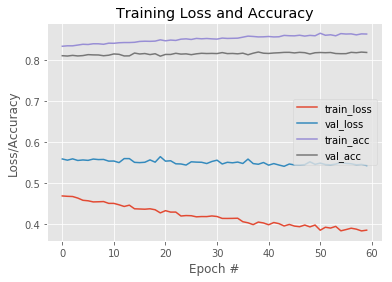

In [7]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(
    testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=labelNames
))

print("TestX shape: {}".format(testX.shape))
print("Predictions shape: {}".format(predictions.shape))
print("TestY shape: {}".format(testY.shape))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N_EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N_EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N_EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N_EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [13]:
import os
# Save the network to disk
print("[INFO] serializing network...")
#model_path = r'/home/share/models/cifar-10/shallownet.hdf5'
model_path = r'/home/share/models/cifar-10/minivggnet.hdf5'
directory, model_file = os.path.split(model_path)
if not os.path.exists(directory):
    os.makedirs(directory)
model.save(model_path)

[INFO] serializing network...
